In [3]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math
%matplotlib inline

In [4]:
def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    you should call plt.imshow(gray, cmap='gray')"""
    #plt.imshow(img, cmap='gray')
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [5]:
#reading in an image
def read_print_image(location):
    image = mpimg.imread(location)

    #printing out some stats and plotting
    print('This image is:', type(image), 'with dimesions:', image.shape)
    plt.imshow(image)
    return (image)

In [6]:
def write_print_image(image,location):
    mpimg.imsave(location,image,format=png)
    print('This image is saved in:', location)
    plt.imshow(image)
    return

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)


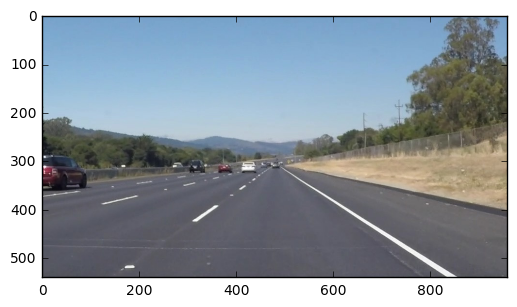

In [7]:
location = 'test_images/solidWhiteRight.jpg'
image = read_print_image(location)

In [8]:
def show_base_color(image):
    red_threshold = 200
    green_threshold = 200
    blue_threshold = 200

    rgb_threshold = [red_threshold, green_threshold, blue_threshold]

    color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                    (image[:,:,1] < rgb_threshold[1]) | \
                    (image[:,:,2] < rgb_threshold[2])

    plt.imshow(color_thresholds, cmap='gray')
    return

#show_base_color(image)


In [9]:
def draw_red_line_using_color_thresholds(image):
    ysize = image.shape[0]
    xsize = image.shape[1]
    color_select = np.copy(image)
    line_image = np.copy(image)

    # Define the vertices of a triangular mask.
    # Keep in mind the origin (x=0, y=0) is in the upper left
    # MODIFY THESE VALUES TO ISOLATE THE REGION 
    # WHERE THE LANE LINES ARE IN THE IMAGE
    left_bottom = [140, 539]
    right_bottom = [860, 539]
    apex = [490, 290]

    # Perform a linear fit (y=Ax+B) to each of the three sides of the triangle
    # np.polyfit returns the coefficients [A, B] of the fit
    fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
    fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
    fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)


    # Find the region inside the lines
    XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
    region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))
                    
    # Mask color and region selection
    color_select[color_thresholds | ~region_thresholds] = [0, 0, 0]
    # Color pixels red where both color and region selections met
    line_image[~color_thresholds & region_thresholds] = [255, 0, 0]

    # Display the image and show region and color selections
    plt.imshow(image)
    x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
    y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
    #plt.plot(x, y, 'b--', lw=4)
    #plt.imshow(color_select)
    plt.imshow(line_image)
    return(line_image)

In [10]:
def draw_lines_temp(img, lines, color=[255, 0, 0], thickness=11):
    y_min = 539
    y_max = 0
    x_min = 900
    x_max = 0

    ysize = image.shape[0]
    xsize = image.shape[1]
    #print ('ysize,xsize',ysize,xsize)
    
    new_image = np.copy(img)
    refined_image = np.copy(img)

    for line in lines:
        for x1,y1,x2,y2 in line:
            #slope = (y2-y1)/(x2-x1)  
            if(slope >0):
                if(y2<y1):
                    if(y2<y_min):
                        y_min = y2
                elif(y1<y2):
                    if(y1<y_min):
                        y_min = y1         
                if(x2<x1):
                    if(x2<x_min):
                        x_min = x2
                elif(x1<x2):
                    if(x1<x_min):
                        x_min = x1         
                if(y2>y1):
                    if(y2>y_max):
                        y_max = y2
                elif(y1>y2):
                    if(y1>y_max):
                        y_max = y1         
                if(x2>x1):
                    if(x2>x_max):
                        x_max = x2
                elif(x1>x2):
                    if(x1>x_max):
                        x_max = x1         
                  
                  
                    
    cv2.line(new_image, (x_min, y_min), (x_max, y_max), color=[255, 0, 0], thickness=11)

    x_max = x_min
    x_min = 900

    for line in lines:
        for x1,y1,x2,y2 in line:
            slope = (y2-y1)/(x2-x1)  
            if(slope <=0):                          
                if(x2<x1):
                    if(x2<x_min):
                        x_min = x2
                elif(x1<x2):
                    if(x1<x_min):
                        x_min = x1         
                   
                  
                  
    cv2.line(refined_image, (x_min, 539), (x_max, y_min), color=[255, 0, 0], thickness=11)

    final_image = weighted_img(new_image, refined_image)

    return(final_image)

In [11]:
import math

def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

def draw_lines(img, lines, color=[255, 0, 0], thickness=11):
    """
    NOTE: this is the function you might want to use as a starting point once you want to 
    average/extrapolate the line segments you detect to map out the full
    extent of the lane (going from the result shown in raw-lines-example.mp4
    to that shown in P1_example.mp4).  
    
    Think about things like separating line segments by their 
    slope ((y2-y1)/(x2-x1)) to decide which segments are part of the left
    line vs. the right line.  Then, you can average the position of each of 
    the lines and extrapolate to the top and bottom of the lane.
    
    This function draws `lines` with `color` and `thickness`.    
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() function below
    """
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)

def draw_lines_temp2(img, lines, color=[255, 0, 0], thickness=11):
    
    y_min = 900
    y_max = 0
    x_min = 540
    x_max = 0
    x_ref = 0
    
    ysize = img.shape[0]
    xsize = img.shape[1]
    #print ('ysize,xsize',ysize,xsize)
    
    new_image = np.copy(img)
    refined_image = np.copy(img)

      
    for line in lines:
        #print(lines)
        for x1,y1,x2,y2 in line:
            print(line)
            if(x1>x2):
                if(x1>x_max):
                    x_max = x1
                    y_max_ref = y1
            elif(x2>x_max):
                x_max = x2
                y_max_ref = y2  
            #print('xmax,x1,x2',x_max,x1,x2)
        for x1,y1,x2,y2 in line:
            if(x1<x2):
                if(x1<x_min):
                    x_min = x1
                    y_min_ref = y1
            elif(x2<x_max):
                x_min = x2
                y_min_ref = y2
            #print('xmin,x1,x2',x_min,x1,x2)   
        for x1,y1,x2,y2 in line:
            if(y1<y2):
                if(y1<y_min):
                    y_min = y1
                    x_ref = x1
            elif(y2<y_min):
                y_min = y2
                x_ref = x2                            
            #print('x_ref,y_min,x2,y2,x1,y1', x_ref,y_min,x2,y2,x1,y1)
                    
    #print('x_min,x_ref,y_min',x_min,x_ref,y_min)
    
    if(y_min_ref<ysize):
        m = (y_min_ref-y_min)/(x_min-x_ref)
        c = y_min - m*x_ref
        x_min = int((ysize -c)/m)
    
    if(y_max_ref<ysize):
        m = (y_max_ref-y_min)/(x_max-x_ref)
        c = y_min - m*x_ref
        x_max = int((ysize -c)/m)
    
    
    
    cv2.line(new_image, (x_min, 539), (x_ref, y_min), color=[255, 0, 0], thickness=11)
                   
    #print('x_ref,x_max,y_min',x_ref,x_max,y_min)
            
    cv2.line(refined_image, (x_ref, y_min), (x_max, 539), color=[255, 0, 0], thickness=11)

    final_image = weighted_img(new_image, refined_image)

    return(final_image)
            
def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((*img.shape, 3), dtype=np.uint8)
    #draw_lines(line_img, lines)
    line_img = draw_lines_temp2(line_img, lines)
    return line_img
    

# Python 3 has support for cool math symbols.

def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + λ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, λ)

In [12]:
def draw_lane_guide(image):
    gray = grayscale(image)
    blur_gray = gaussian_blur(gray,3)
    edge = canny(gray,150,255)
    #plt.imshow(edge, cmap='gray')

    left_bottom = [140, 539]
    right_bottom = [860, 539]
    apex = [490, 290]

    vertices = np.array( [[[apex[0],apex[1]],[right_bottom[0],right_bottom[1]],[left_bottom[0],left_bottom[1]]]], dtype=np.int32 )

    blocked_image = region_of_interest(edge,vertices)
    #plt.imshow(blocked_image, cmap='gray')

    hough_applied_image = hough_lines(blocked_image, 2, np.pi/180, 25, 2, 2)
    #plt.imshow(hough_applied_image)

    final_image = weighted_img(image, hough_applied_image)
    plt.imshow(final_image)
    return(final_image)

[[509 326 646 405]]
[[512 325 654 404]]
[[689 430 749 464]]
[[293 462 353 411]]
[[280 461 345 410]]
[[623 386 678 417]]
[[405 363 418 355]]
[[449 335 452 333]]
[[480 316 489 310]]
[[456 329 461 325]]
[[409 366 420 358]]
[[625 392 660 413]]
[[525 335 563 356]]
[[484 304 487 302]]
[[506 305 510 303]]
[[652 407 684 427]]
[[449 333 458 326]]
[[435 342 439 339]]
[[481 311 485 308]]
[[481 313 486 309]]
[[487 314 493 313]]
[[416 360 420 357]]
[[449 334 452 332]]
[[439 344 442 342]]
[[280 460 284 457]]
[[676 421 706 439]]
[[458 329 463 325]]
[[490 305 493 303]]
[[479 315 484 312]]
[[505 309 516 315]]
[[531 335 562 352]]
[[483 303 486 301]]
[[288 454 297 447]]
[[280 462 287 456]]
[[664 408 685 421]]
[[407 363 414 358]]
[[326 424 343 411]]
[[295 461 310 448]]


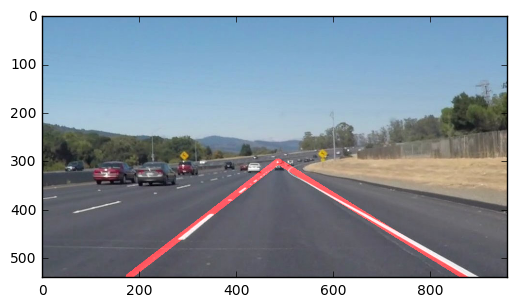

In [13]:
import os
#os.listdir("test_images/")

test_image_list = [mpimg.imread('test_images/'+i) for i in os.listdir('test_images/')]

returned_image = draw_lane_guide(test_image_list[0])
   

[[513 326 854 539]]
[[639 412 834 539]]
[[534 342 626 402]]
[[320 425 362 393]]
[[310 424 352 395]]
[[487 311 580 373]]
[[310 422 357 392]]
[[318 425 347 404]]
[[170 519 175 516]]
[[594 382 644 414]]
[[478 305 480 303]]
[[473 314 479 310]]
[[355 400 363 394]]
[[445 330 452 324]]
[[389 372 392 370]]
[[474 313 478 310]]
[[489 307 495 303]]
[[406 357 416 351]]
[[493 313 521 330]]
[[445 331 448 329]]
[[166 524 170 521]]
[[409 359 419 352]]
[[186 521 190 518]]
[[435 341 439 338]]
[[487 307 491 305]]
[[624 402 656 422]]
[[552 350 854 538]]
[[387 372 391 369]]
[[433 338 437 336]]
[[164 526 172 521]]
[[390 372 393 370]]
[[704 454 728 469]]
[[447 331 449 330]]
[[470 312 476 307]]
[[476 310 482 306]]
[[489 305 494 302]]
[[392 372 394 370]]


array([[[180, 196, 209],
        [142, 161, 176],
        [134, 156, 179],
        ..., 
        [136, 154, 178],
        [146, 159, 176],
        [186, 195, 210]],

       [[142, 161, 176],
        [143, 166, 184],
        [134, 160, 183],
        ..., 
        [137, 159, 183],
        [142, 159, 179],
        [148, 161, 178]],

       [[131, 158, 179],
        [133, 161, 183],
        [128, 159, 187],
        ..., 
        [129, 156, 185],
        [136, 158, 182],
        [134, 152, 176]],

       ..., 
       [[120, 121, 125],
        [ 91,  92,  97],
        [ 83,  84,  89],
        ..., 
        [ 88,  89,  93],
        [ 94,  95,  99],
        [120, 121, 125]],

       [[138, 139, 143],
        [105, 106, 110],
        [ 89,  90,  95],
        ..., 
        [ 97,  98, 102],
        [109, 110, 114],
        [139, 140, 144]],

       [[180, 181, 185],
        [140, 141, 145],
        [117, 118, 123],
        ..., 
        [122, 123, 125],
        [140, 141, 143],
        [179, 180,

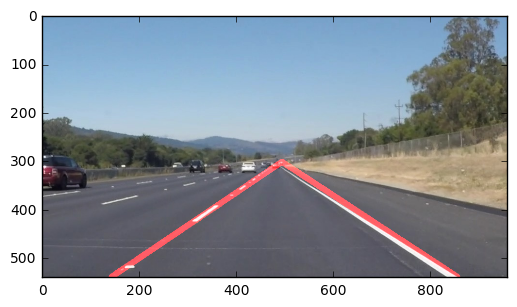

In [14]:
draw_lane_guide(test_image_list[1])


[[388 379 444 336]]
[[273 465 306 440]]
[[155 537 279 450]]
[[301 445 325 426]]
[[268 459 331 414]]
[[369 389 438 337]]
[[174 539 222 502]]
[[525 339 532 343]]
[[333 414 350 401]]
[[577 372 581 374]]
[[550 353 563 361]]
[[605 392 649 419]]
[[643 409 656 416]]
[[334 419 369 394]]
[[548 356 558 362]]
[[580 371 583 373]]
[[493 323 515 335]]
[[237 492 261 473]]
[[525 341 531 344]]
[[492 313 496 316]]
[[768 492 774 495]]
[[164 531 212 498]]
[[497 310 499 311]]
[[612 391 636 405]]
[[379 387 388 380]]
[[537 347 541 349]]
[[346 405 364 391]]
[[466 308 472 304]]
[[427 345 451 326]]
[[506 311 518 311]]
[[369 393 380 386]]
[[389 379 418 357]]
[[488 316 490 317]]
[[634 403 658 417]]
[[319 424 338 409]]
[[328 424 369 395]]
[[642 414 651 419]]
[[445 335 456 324]]
[[524 341 529 344]]
[[202 518 234 494]]
[[467 315 476 315]]
[[275 463 279 460]]
[[467 313 469 312]]
[[549 356 560 362]]
[[366 391 385 376]]
[[250 471 298 437]]
[[154 538 174 525]]
[[256 478 269 468]]
[[516 322 518 322]]
[[516 319 520 320]]


array([[[102, 156, 202],
        [102, 156, 202],
        [102, 156, 202],
        ..., 
        [ 96, 153, 196],
        [ 94, 151, 194],
        [ 88, 145, 188]],

       [[102, 156, 200],
        [102, 156, 200],
        [102, 156, 200],
        ..., 
        [ 96, 153, 196],
        [ 94, 151, 194],
        [ 88, 145, 188]],

       [[102, 157, 198],
        [102, 157, 198],
        [102, 157, 198],
        ..., 
        [ 98, 152, 196],
        [ 96, 150, 194],
        [ 90, 144, 188]],

       ..., 
       [[ 95, 100, 106],
        [ 95, 100, 106],
        [ 95, 100, 106],
        ..., 
        [ 73,  79,  93],
        [ 73,  79,  93],
        [ 73,  79,  93]],

       [[ 95, 100, 106],
        [ 95, 100, 106],
        [ 95, 100, 106],
        ..., 
        [ 71,  77,  91],
        [ 71,  77,  91],
        [ 71,  77,  91]],

       [[ 94,  99, 105],
        [ 94,  99, 105],
        [ 94,  99, 105],
        ..., 
        [ 73,  77,  89],
        [ 73,  77,  89],
        [ 73,  77,

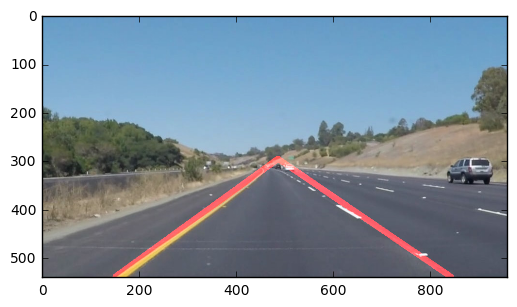

In [15]:
draw_lane_guide(test_image_list[2])


[[159 539 388 373]]
[[213 512 342 414]]
[[784 497 834 527]]
[[368 393 458 327]]
[[718 457 762 485]]
[[159 538 304 433]]
[[499 322 513 330]]
[[500 321 508 325]]
[[712 445 735 458]]
[[522 332 526 334]]
[[584 370 591 374]]
[[507 324 518 330]]
[[246 486 258 477]]
[[350 401 372 385]]
[[178 539 204 520]]
[[786 499 835 528]]
[[355 403 387 380]]
[[572 363 591 373]]
[[729 455 779 484]]
[[568 363 587 376]]
[[374 384 408 359]]
[[480 310 487 305]]
[[216 510 235 496]]
[[431 342 456 325]]
[[700 446 729 465]]
[[297 447 354 405]]
[[553 353 556 355]]
[[440 339 452 331]]
[[539 342 545 346]]
[[196 525 218 509]]
[[759 473 783 487]]
[[627 397 631 399]]
[[479 309 481 310]]
[[837 531 846 536]]
[[410 358 425 348]]
[[741 471 790 501]]
[[420 350 434 341]]
[[625 397 629 399]]
[[536 344 543 348]]
[[817 518 836 529]]
[[536 343 540 346]]
[[569 365 578 371]]
[[494 321 500 324]]
[[537 342 545 347]]
[[511 328 517 332]]


array([[[104, 158, 202],
        [104, 158, 202],
        [104, 158, 202],
        ..., 
        [ 97, 156, 200],
        [ 95, 154, 198],
        [ 93, 152, 196]],

       [[104, 158, 202],
        [104, 158, 202],
        [104, 158, 202],
        ..., 
        [ 96, 155, 199],
        [ 94, 153, 197],
        [ 90, 151, 195]],

       [[103, 157, 201],
        [104, 158, 202],
        [102, 159, 202],
        ..., 
        [ 94, 155, 199],
        [ 92, 153, 197],
        [ 90, 151, 195]],

       ..., 
       [[102, 102, 110],
        [102, 102, 110],
        [102, 102, 110],
        ..., 
        [ 78,  82,  93],
        [ 78,  82,  93],
        [ 78,  82,  93]],

       [[102, 101, 109],
        [102, 101, 109],
        [102, 101, 109],
        ..., 
        [ 78,  82,  91],
        [ 77,  81,  90],
        [ 77,  81,  90]],

       [[ 99,  98, 106],
        [ 99,  98, 106],
        [ 99,  98, 106],
        ..., 
        [ 77,  81,  90],
        [ 77,  81,  90],
        [ 77,  81,

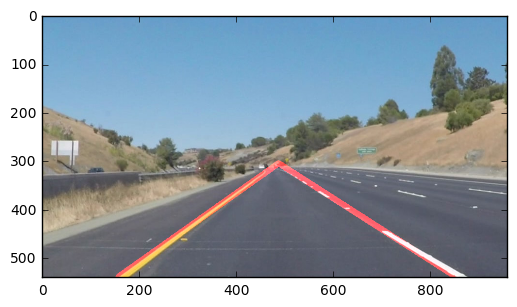

In [16]:
draw_lane_guide(test_image_list[3])


[[483 299 489 295]]
[[208 503 435 338]]
[[244 468 359 388]]
[[165 521 218 484]]
[[329 410 450 322]]
[[672 424 748 470]]
[[220 494 238 481]]
[[691 443 739 475]]
[[157 539 207 503]]
[[667 428 715 460]]
[[480 298 486 302]]
[[520 327 522 329]]
[[559 357 574 368]]
[[545 346 549 348]]
[[560 355 579 367]]
[[758 486 769 493]]
[[730 460 764 480]]
[[490 305 499 312]]
[[735 471 767 493]]
[[561 355 579 366]]
[[530 337 534 341]]
[[491 303 502 312]]
[[560 358 573 368]]
[[449 326 459 318]]
[[719 461 733 470]]
[[428 342 456 321]]
[[232 476 258 457]]
[[770 483 784 492]]
[[661 426 663 427]]
[[452 319 466 307]]
[[532 336 538 340]]
[[505 316 515 323]]
[[442 333 448 328]]
[[514 326 520 330]]
[[545 347 547 348]]
[[484 297 487 295]]
[[440 329 452 320]]
[[331 415 351 400]]
[[379 380 398 366]]
[[509 322 511 321]]
[[510 323 515 326]]
[[766 480 771 483]]
[[195 501 236 472]]
[[396 366 445 330]]
[[530 338 536 341]]
[[686 433 692 437]]


array([[[184, 196, 210],
        [144, 159, 178],
        [132, 154, 177],
        ..., 
        [127, 153, 176],
        [140, 161, 178],
        [183, 199, 214]],

       [[143, 158, 177],
        [144, 162, 184],
        [132, 156, 182],
        ..., 
        [124, 154, 180],
        [137, 159, 180],
        [141, 160, 177]],

       [[131, 153, 176],
        [132, 156, 182],
        [125, 154, 184],
        ..., 
        [117, 150, 181],
        [123, 150, 177],
        [125, 151, 174]],

       ..., 
       [[129, 128, 134],
        [115, 114, 120],
        [110, 109, 115],
        ..., 
        [ 82,  82,  92],
        [ 87,  87,  97],
        [119, 119, 129]],

       [[141, 140, 145],
        [125, 124, 129],
        [115, 114, 119],
        ..., 
        [ 88,  88,  98],
        [106, 106, 114],
        [136, 136, 144]],

       [[176, 175, 180],
        [139, 138, 143],
        [128, 127, 132],
        ..., 
        [119, 119, 127],
        [137, 137, 145],
        [183, 183,

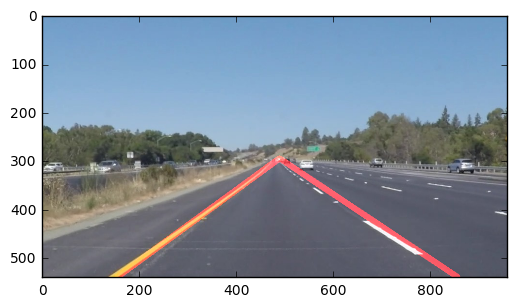

In [17]:
draw_lane_guide(test_image_list[4])


[[272 466 355 405]]
[[288 465 426 357]]
[[175 539 250 484]]
[[332 421 411 365]]
[[582 371 601 382]]
[[486 313 489 315]]
[[585 368 607 381]]
[[743 467 844 528]]
[[492 313 506 322]]
[[194 539 250 496]]
[[423 356 459 328]]
[[545 346 554 351]]
[[545 348 552 352]]
[[499 318 510 325]]
[[265 483 288 466]]
[[497 320 503 323]]
[[794 497 831 519]]
[[653 407 657 409]]
[[440 348 470 322]]
[[507 327 520 334]]
[[528 338 532 340]]
[[429 355 437 350]]
[[547 346 554 350]]
[[210 512 307 441]]
[[507 324 515 328]]
[[517 331 520 333]]
[[477 316 487 316]]
[[416 361 437 345]]
[[421 362 438 348]]
[[513 328 521 332]]
[[504 324 506 323]]
[[251 494 268 482]]
[[563 358 566 360]]
[[268 488 282 488]]
[[488 312 490 311]]
[[457 334 459 332]]
[[451 334 469 320]]
[[582 370 603 382]]
[[460 330 462 328]]
[[352 414 384 389]]
[[488 313 491 311]]
[[357 402 402 371]]


array([[[110, 159, 202],
        [110, 159, 202],
        [110, 159, 202],
        ..., 
        [101, 155, 201],
        [100, 154, 200],
        [ 94, 148, 194]],

       [[110, 159, 202],
        [110, 159, 202],
        [110, 159, 202],
        ..., 
        [101, 155, 201],
        [100, 154, 200],
        [ 94, 148, 194]],

       [[110, 159, 202],
        [110, 159, 202],
        [110, 159, 202],
        ..., 
        [101, 155, 201],
        [100, 154, 200],
        [ 94, 148, 194]],

       ..., 
       [[ 95, 100, 106],
        [ 94,  99, 105],
        [ 94,  99, 105],
        ..., 
        [ 84,  87, 102],
        [ 82,  85, 100],
        [ 79,  82,  97]],

       [[ 94,  99, 105],
        [ 94,  99, 105],
        [ 93,  98, 104],
        ..., 
        [ 84,  88, 100],
        [ 82,  86,  98],
        [ 78,  82,  94]],

       [[ 90,  97, 103],
        [ 89,  96, 102],
        [ 89,  96, 102],
        ..., 
        [ 83,  87,  99],
        [ 81,  85,  97],
        [ 78,  82,

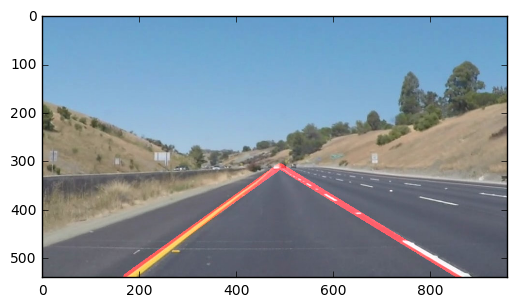

In [18]:
draw_lane_guide(test_image_list[5])


In [19]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [20]:
def process_image(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image with lines are drawn on lanes)
    result = draw_lane_guide(image)
 
    return result

[[584 370 779 496]]
[[505 319 625 391]]
[[203 514 302 439]]
[[205 499 284 443]]
[[661 412 787 490]]
[[528 335 614 390]]
[[617 385 651 407]]
[[474 308 476 306]]
[[450 325 457 320]]
[[426 343 433 339]]
[[425 341 430 337]]
[[470 307 473 305]]
[[426 341 432 337]]
[[766 487 808 513]]
[[452 326 464 317]]
[[187 513 215 493]]
[[497 316 529 337]]
[[569 357 624 390]]
[[444 332 446 331]]
[[264 467 311 432]]
[[806 513 850 539]]
[[473 311 477 308]]
[[416 349 419 347]]
[[263 457 301 430]]
[[388 368 394 364]]
[[388 367 399 360]]
[[394 369 406 359]]
[[450 324 455 320]]
[[490 309 504 318]]
[[486 305 488 304]]
[[363 391 366 389]]
[[456 322 463 317]]
[[392 369 402 362]]
[[479 310 482 308]]
[[837 532 848 539]]
[[745 463 773 481]]
[[527 332 543 341]]
[[526 334 537 342]]
[[642 400 659 412]]
[[783 497 800 509]]
[[486 304 488 303]]
[[248 468 302 430]]
[[543 345 562 358]]
[[512 323 518 326]]
[[467 312 470 310]]
[[484 309 491 312]]
[[392 364 403 357]]
[[441 331 443 329]]
[[475 314 477 313]]
[MoviePy] >>>> Build

  0%|                                                  | 0/222 [00:00<?, ?it/s]

[[584 370 779 496]]
[[505 319 625 391]]
[[203 514 302 439]]
[[205 499 284 443]]
[[661 412 787 490]]
[[528 335 614 390]]
[[617 385 651 407]]
[[474 308 476 306]]
[[450 325 457 320]]
[[426 343 433 339]]
[[425 341 430 337]]
[[470 307 473 305]]
[[426 341 432 337]]
[[766 487 808 513]]
[[452 326 464 317]]
[[187 513 215 493]]
[[497 316 529 337]]
[[569 357 624 390]]
[[444 332 446 331]]
[[264 467 311 432]]
[[806 513 850 539]]
[[473 311 477 308]]
[[416 349 419 347]]
[[263 457 301 430]]
[[388 368 394 364]]
[[388 367 399 360]]
[[394 369 406 359]]
[[450 324 455 320]]
[[490 309 504 318]]
[[486 305 488 304]]
[[363 391 366 389]]
[[456 322 463 317]]
[[392 369 402 362]]
[[479 310 482 308]]
[[837 532 848 539]]
[[745 463 773 481]]
[[527 332 543 341]]
[[526 334 537 342]]
[[642 400 659 412]]
[[783 497 800 509]]
[[486 304 488 303]]
[[248 468 302 430]]
[[543 345 562 358]]
[[512 323 518 326]]
[[467 312 470 310]]
[[484 309 491 312]]
[[392 364 403 357]]
[[441 331 443 329]]
[[475 314 477 313]]


  0%|▏                                         | 1/222 [00:00<00:39,  5.65it/s]

[[495 313 638 399]]
[[642 408 740 470]]
[[442 333 445 331]]
[[150 539 277 447]]
[[535 341 565 359]]
[[451 327 460 320]]
[[589 375 633 401]]
[[231 493 289 448]]
[[735 468 848 539]]
[[661 412 798 497]]
[[383 372 400 360]]
[[623 389 670 419]]
[[415 351 418 349]]
[[353 398 356 396]]
[[211 508 240 485]]
[[389 373 403 361]]
[[622 395 642 407]]
[[391 365 398 360]]
[[424 342 429 339]]
[[568 361 595 378]]
[[168 539 207 511]]
[[487 310 522 333]]
[[441 332 445 329]]
[[450 324 455 320]]
[[354 398 357 396]]
[[450 325 457 320]]
[[457 322 461 319]]
[[348 397 351 395]]
[[426 344 428 343]]
[[348 396 350 395]]
[[792 505 831 529]]
[[493 311 557 350]]
[[481 310 483 309]]
[[475 308 477 307]]
[[471 304 480 309]]
[[470 308 474 305]]
[[616 392 653 414]]
[[500 318 541 344]]
[[386 374 394 368]]
[[650 405 685 428]]
[[428 344 433 341]]
[[712 453 749 476]]
[[431 341 433 339]]
[[201 515 224 497]]
[[165 527 196 505]]
[[239 475 280 446]]


  1%|▍                                         | 2/222 [00:00<00:35,  6.15it/s]

[[482 307 673 427]]
[[494 312 779 484]]
[[190 509 249 467]]
[[169 539 262 469]]
[[739 470 837 532]]
[[473 312 478 308]]
[[456 323 461 319]]
[[696 443 733 465]]
[[376 377 396 363]]
[[381 378 399 365]]
[[343 406 346 404]]
[[155 534 203 501]]
[[339 407 343 404]]
[[805 513 848 539]]
[[449 325 464 314]]
[[659 419 706 448]]
[[149 539 188 512]]
[[486 305 489 303]]
[[425 346 431 342]]
[[450 327 452 326]]
[[611 382 679 423]]
[[421 344 429 340]]
[[440 332 443 330]]
[[441 334 444 332]]
[[464 315 471 310]]
[[481 310 483 309]]
[[411 353 414 351]]
[[383 371 393 364]]
[[423 346 430 341]]
[[741 471 778 494]]
[[566 361 591 376]]
[[203 500 231 481]]
[[743 472 758 481]]


  1%|▌                                         | 3/222 [00:00<00:33,  6.44it/s]

[[495 316 723 459]]
[[478 305 508 323]]
[[705 440 783 487]]
[[169 539 225 497]]
[[774 491 849 539]]
[[524 330 612 384]]
[[369 381 389 367]]
[[736 467 761 484]]
[[148 538 211 494]]
[[621 388 662 414]]
[[753 468 779 484]]
[[382 377 394 368]]
[[369 382 391 366]]
[[148 539 178 518]]
[[661 412 676 422]]
[[781 496 800 509]]
[[375 383 394 369]]
[[685 426 700 437]]
[[718 457 745 474]]
[[421 348 424 346]]
[[329 416 332 414]]
[[167 539 178 531]]
[[758 481 772 491]]
[[568 361 579 368]]
[[502 316 520 329]]
[[471 304 482 310]]
[[207 509 225 495]]
[[547 348 565 359]]
[[671 418 683 426]]
[[451 325 456 321]]
[[652 407 668 417]]
[[771 490 789 502]]
[[449 327 452 325]]
[[473 313 478 309]]
[[324 417 330 413]]
[[702 446 735 467]]
[[421 345 426 341]]
[[534 337 564 355]]
[[217 494 219 493]]
[[374 383 381 378]]
[[473 310 478 307]]
[[423 347 427 344]]
[[675 420 687 428]]
[[408 355 411 353]]
[[439 333 442 331]]
[[517 329 551 350]]
[[490 310 505 319]]
[[590 370 619 388]]
[[474 315 477 313]]
[[715 445 727 453]]


  2%|▊                                         | 4/222 [00:00<00:36,  5.92it/s]

[[482 307 710 450]]
[[490 310 776 482]]
[[728 463 790 501]]
[[367 389 390 372]]
[[360 389 386 370]]
[[785 499 851 539]]
[[405 358 408 356]]
[[147 538 156 532]]
[[406 358 409 356]]
[[360 388 381 373]]
[[476 306 479 304]]
[[313 429 316 427]]
[[366 389 389 372]]
[[438 334 442 331]]
[[701 445 724 459]]
[[473 310 477 307]]
[[419 349 427 344]]
[[449 327 457 322]]
[[305 427 307 426]]
[[453 322 464 314]]
[[362 386 385 370]]
[[417 348 423 343]]
[[147 539 157 532]]
[[737 459 779 484]]
[[753 479 787 500]]
[[448 326 465 314]]
[[566 356 591 372]]
[[654 416 705 447]]
[[435 337 438 335]]
[[722 459 752 477]]
[[439 335 442 333]]
[[473 312 478 308]]


  2%|▉                                         | 5/222 [00:00<00:32,  6.66it/s]

[[567 361 793 503]]
[[543 342 592 371]]
[[646 404 747 463]]
[[766 487 813 516]]
[[624 391 655 408]]
[[507 323 569 361]]
[[357 395 384 375]]
[[454 324 457 322]]
[[600 377 628 392]]
[[400 359 402 358]]
[[351 394 380 374]]
[[501 319 515 327]]
[[808 514 850 539]]
[[418 350 425 345]]
[[414 350 423 343]]
[[515 325 527 331]]
[[730 454 758 470]]
[[495 315 506 321]]
[[437 334 440 332]]
[[518 327 566 355]]
[[473 312 478 308]]
[[360 394 383 376]]
[[449 325 454 321]]
[[283 441 285 440]]
[[439 335 442 333]]
[[440 335 442 334]]
[[351 393 378 374]]
[[448 326 450 325]]
[[470 310 480 303]]
[[495 312 512 322]]
[[588 370 616 385]]
[[758 471 779 484]]
[[609 387 661 419]]
[[449 328 451 327]]
[[448 327 453 323]]
[[486 303 489 301]]
[[468 310 474 305]]
[[487 304 489 303]]
[[414 349 422 343]]
[[518 329 549 348]]


  3%|█▏                                        | 6/222 [00:00<00:30,  7.06it/s]

[[575 366 841 533]]
[[553 348 602 377]]
[[638 398 718 446]]
[[496 316 565 358]]
[[346 403 377 380]]
[[339 402 373 378]]
[[718 447 764 474]]
[[518 327 547 343]]
[[593 372 636 398]]
[[449 328 456 323]]
[[447 328 450 326]]
[[415 352 424 345]]
[[435 334 438 332]]
[[541 344 571 362]]
[[447 326 454 321]]
[[396 361 398 360]]
[[486 303 489 301]]
[[470 310 479 304]]
[[614 384 665 415]]
[[577 367 594 377]]
[[486 301 488 300]]
[[491 310 511 321]]
[[469 310 471 309]]
[[483 309 496 315]]
[[817 519 850 539]]
[[396 362 399 360]]
[[411 351 419 345]]
[[416 352 424 347]]
[[500 318 506 321]]
[[438 336 441 334]]
[[698 435 758 470]]
[[545 343 563 353]]
[[349 402 376 381]]
[[473 311 478 307]]
[[593 377 647 410]]
[[413 350 420 345]]
[[474 311 478 308]]
[[473 304 478 306]]
[[253 465 257 462]]
[[511 322 515 324]]
[[437 336 441 333]]
[[417 351 423 347]]
[[399 363 401 362]]


  3%|█▎                                        | 7/222 [00:01<00:30,  6.97it/s]

[[566 360 852 539]]
[[490 310 492 312]]
[[597 375 712 442]]
[[661 413 683 426]]
[[335 412 370 386]]
[[482 306 580 368]]
[[467 312 484 300]]
[[486 301 488 300]]
[[217 489 219 488]]
[[466 307 472 303]]
[[434 336 438 333]]
[[493 310 512 322]]
[[326 411 364 384]]
[[333 413 355 396]]
[[717 445 766 476]]
[[436 337 440 334]]
[[515 325 581 364]]
[[447 329 450 327]]
[[391 365 394 363]]
[[393 366 396 364]]
[[408 353 417 346]]
[[218 490 221 488]]
[[472 312 478 307]]
[[690 430 732 455]]
[[453 323 455 322]]
[[454 324 456 323]]
[[446 328 449 326]]
[[395 366 397 365]]
[[453 322 455 321]]
[[569 358 602 377]]
[[506 319 539 338]]
[[359 393 370 385]]
[[413 354 421 348]]
[[467 311 475 305]]
[[326 410 352 392]]
[[408 354 419 346]]
[[473 312 479 308]]
[[412 354 416 351]]


  4%|█▌                                        | 8/222 [00:01<00:29,  7.33it/s]

[[585 368 675 422]]
[[564 359 782 496]]
[[433 336 436 334]]
[[472 312 478 308]]
[[445 328 452 322]]
[[780 496 851 539]]
[[342 406 361 392]]
[[731 454 779 484]]
[[389 370 392 368]]
[[504 321 541 343]]
[[410 357 417 352]]
[[405 355 416 348]]
[[408 357 419 350]]
[[498 314 595 373]]
[[406 354 410 351]]
[[309 423 353 391]]
[[704 438 742 462]]
[[316 425 354 398]]
[[628 393 690 431]]
[[529 337 549 348]]
[[542 345 558 354]]
[[742 472 799 507]]
[[473 312 477 309]]
[[657 410 699 435]]
[[447 330 449 329]]
[[469 311 476 306]]
[[324 413 350 394]]
[[483 308 512 325]]
[[164 527 169 523]]
[[453 324 455 323]]
[[188 523 190 523]]
[[592 372 600 376]]
[[446 329 449 327]]
[[688 429 700 437]]
[[436 338 439 336]]
[[390 370 392 369]]
[[446 328 448 326]]
[[317 425 329 417]]
[[415 352 418 350]]
[[486 302 488 301]]
[[163 524 188 524]]
[[172 519 187 519]]
[[816 519 850 539]]
[[553 352 563 357]]


  4%|█▋                                        | 9/222 [00:01<00:29,  7.16it/s]

[[686 438 815 521]]
[[482 309 489 314]]
[[665 419 780 486]]
[[587 376 636 408]]
[[535 338 596 377]]
[[300 440 351 402]]
[[581 371 658 422]]
[[470 308 472 309]]
[[503 318 531 337]]
[[289 439 336 406]]
[[625 395 669 420]]
[[496 318 555 354]]
[[662 423 687 440]]
[[326 412 343 400]]
[[604 382 629 396]]
[[449 326 475 307]]
[[786 491 816 509]]
[[745 475 844 539]]
[[333 414 351 401]]
[[404 361 416 353]]
[[401 359 412 352]]
[[558 356 576 369]]
[[652 417 671 430]]
[[433 341 438 337]]
[[310 423 346 399]]
[[402 360 414 352]]
[[589 377 600 384]]
[[406 361 416 354]]
[[736 461 793 494]]
[[585 369 603 381]]
[[384 376 387 374]]
[[702 440 735 459]]
[[528 334 536 340]]
[[299 440 312 430]]
[[566 361 586 375]]
[[486 304 489 302]]
[[493 312 501 318]]
[[431 340 436 337]]
[[454 324 476 308]]
[[445 332 448 330]]
[[445 330 447 329]]
[[506 321 510 323]]
[[475 310 477 311]]


  5%|█▊                                       | 10/222 [00:01<00:33,  6.28it/s]

[[581 370 856 536]]
[[747 481 840 539]]
[[490 315 723 466]]
[[272 461 340 412]]
[[397 365 410 356]]
[[473 316 478 313]]
[[311 424 332 410]]
[[310 425 333 410]]
[[498 318 565 359]]
[[403 366 413 358]]
[[444 332 446 331]]
[[429 343 433 340]]
[[263 459 326 415]]
[[422 350 425 348]]
[[470 314 480 307]]
[[431 345 437 340]]
[[449 329 472 311]]
[[661 419 665 422]]
[[547 349 575 365]]
[[444 335 447 333]]
[[708 456 736 473]]
[[722 465 784 503]]
[[401 366 413 357]]
[[588 374 607 385]]
[[548 352 565 363]]
[[451 330 459 324]]
[[475 312 486 313]]
[[514 332 543 350]]
[[276 449 315 422]]
[[524 316 532 318]]
[[433 344 436 342]]
[[308 436 317 429]]
[[376 382 379 380]]
[[459 322 463 319]]
[[406 359 409 357]]
[[284 454 306 437]]
[[472 307 477 307]]
[[379 382 381 381]]


  5%|██                                       | 11/222 [00:01<00:30,  6.85it/s]

[[529 341 618 399]]
[[493 315 735 466]]
[[738 478 836 539]]
[[787 496 857 539]]
[[230 482 317 421]]
[[631 409 737 476]]
[[443 333 462 319]]
[[263 468 316 430]]
[[492 317 535 346]]
[[468 316 480 308]]
[[369 388 372 386]]
[[295 437 309 427]]
[[443 336 447 333]]
[[430 346 435 342]]
[[249 478 288 451]]
[[754 476 803 507]]
[[366 387 369 385]]
[[229 483 291 440]]
[[469 310 471 311]]
[[396 370 409 361]]
[[466 307 476 313]]
[[393 368 406 359]]
[[739 467 773 489]]
[[604 391 636 411]]
[[290 448 325 423]]
[[713 462 745 481]]
[[452 330 458 325]]
[[401 363 407 359]]
[[473 316 478 312]]
[[248 479 273 462]]
[[427 344 431 341]]
[[486 308 489 306]]
[[444 336 447 334]]
[[451 328 470 314]]
[[480 313 482 312]]
[[397 370 409 362]]
[[668 433 712 461]]
[[511 327 555 355]]
[[431 346 435 343]]
[[717 454 758 480]]
[[500 311 503 311]]
[[778 492 783 495]]
[[484 314 487 312]]
[[419 352 422 350]]
[[498 322 501 324]]
[[563 364 613 396]]
[[310 425 314 422]]
[[243 484 247 481]]
[[821 518 841 530]]


  5%|██▏                                      | 12/222 [00:01<00:30,  6.89it/s]

[[757 489 835 539]]
[[509 325 741 470]]
[[426 344 430 341]]
[[428 346 433 343]]
[[183 514 300 432]]
[[540 347 697 452]]
[[203 511 307 435]]
[[743 470 850 536]]
[[490 314 533 344]]
[[442 334 445 332]]
[[447 329 453 325]]
[[486 308 489 306]]
[[285 441 297 433]]
[[725 470 758 490]]
[[199 515 233 490]]
[[473 315 481 310]]
[[426 345 432 341]]
[[699 453 741 479]]
[[387 371 402 360]]
[[730 462 777 492]]
[[503 320 519 331]]
[[391 372 403 365]]
[[451 329 453 328]]
[[541 348 564 364]]
[[362 393 365 391]]
[[474 311 476 310]]
[[819 516 855 539]]
[[797 516 833 539]]
[[417 351 419 350]]
[[451 326 464 317]]
[[429 346 432 344]]
[[486 305 488 304]]
[[744 482 772 500]]
[[443 335 446 333]]
[[394 371 406 362]]
[[527 336 574 365]]
[[262 467 294 444]]
[[473 313 475 312]]
[[487 314 493 317]]
[[417 353 419 352]]
[[455 323 459 320]]
[[264 456 296 434]]
[[450 328 452 327]]
[[469 313 475 308]]
[[626 404 706 457]]
[[497 317 501 319]]
[[389 370 403 360]]
[[474 314 478 311]]
[[465 313 470 313]]


  6%|██▍                                      | 13/222 [00:01<00:30,  6.94it/s]

[[662 420 754 476]]
[[643 415 834 539]]
[[491 314 632 406]]
[[144 539 277 446]]
[[495 314 699 442]]
[[208 506 285 448]]
[[274 456 285 447]]
[[615 396 636 409]]
[[162 539 192 517]]
[[814 514 857 539]]
[[381 372 399 361]]
[[387 374 403 363]]
[[625 403 645 415]]
[[449 325 462 316]]
[[651 420 666 429]]
[[757 478 809 511]]
[[424 343 429 340]]
[[424 344 430 340]]
[[473 311 477 308]]
[[486 303 488 302]]
[[428 345 432 342]]
[[451 327 464 318]]
[[168 536 216 499]]
[[441 332 443 331]]
[[473 313 481 308]]
[[473 308 475 307]]
[[453 323 470 311]]
[[442 334 445 332]]
[[347 397 350 395]]
[[426 345 431 342]]
[[490 311 494 312]]
[[519 330 551 350]]
[[266 452 273 447]]
[[564 358 684 433]]
[[414 352 417 350]]
[[470 308 475 309]]
[[805 508 838 527]]
[[752 476 775 490]]
[[347 396 349 395]]
[[441 333 444 331]]
[[189 506 220 485]]
[[234 475 257 459]]
[[486 307 491 304]]
[[386 374 402 363]]
[[383 372 389 368]]


  6%|██▌                                      | 14/222 [00:02<00:29,  7.01it/s]

[[547 348 747 482]]
[[776 488 858 539]]
[[195 501 232 475]]
[[499 315 857 539]]
[[161 539 258 466]]
[[490 311 557 356]]
[[231 475 246 465]]
[[456 322 463 317]]
[[749 483 815 525]]
[[145 537 163 524]]
[[375 375 386 367]]
[[380 377 398 364]]
[[448 326 454 322]]
[[159 539 165 535]]
[[249 465 251 464]]
[[440 333 444 331]]
[[448 325 463 314]]
[[162 538 251 471]]
[[455 322 464 316]]
[[412 353 414 352]]
[[141 538 245 466]]
[[473 311 481 306]]
[[468 311 474 307]]
[[448 324 469 309]]
[[424 345 430 341]]
[[338 405 342 402]]
[[542 345 586 375]]
[[801 517 829 534]]
[[442 333 444 332]]
[[474 308 477 306]]
[[496 313 525 331]]
[[384 375 399 364]]
[[449 326 451 325]]
[[480 309 482 308]]
[[423 343 429 339]]
[[481 309 483 308]]
[[375 376 394 362]]
[[473 305 475 305]]
[[505 305 510 305]]
[[385 369 395 362]]
[[422 343 426 340]]
[[726 467 751 484]]


  7%|██▊                                      | 15/222 [00:02<00:31,  6.63it/s]

[[518 326 555 349]]
[[576 362 859 539]]
[[669 429 838 539]]
[[493 312 658 420]]
[[156 539 221 492]]
[[381 370 390 364]]
[[454 319 475 303]]
[[455 321 457 319]]
[[659 422 701 449]]
[[525 330 592 371]]
[[409 353 412 351]]
[[373 380 394 365]]
[[368 378 389 364]]
[[532 337 586 372]]
[[422 345 428 341]]
[[370 376 388 364]]
[[514 323 526 330]]
[[419 344 425 339]]
[[491 310 493 311]]
[[644 412 685 438]]
[[502 315 510 319]]
[[439 332 443 329]]
[[440 332 443 330]]
[[486 300 490 298]]
[[610 383 657 412]]
[[389 370 394 366]]
[[448 324 454 320]]
[[488 303 491 301]]
[[472 307 476 304]]
[[155 539 158 537]]
[[328 412 331 410]]
[[438 330 441 328]]
[[471 307 474 305]]
[[368 379 378 372]]
[[376 379 391 368]]
[[192 512 221 491]]
[[479 307 482 305]]
[[321 411 324 409]]
[[473 309 477 306]]
[[487 306 507 317]]
[[408 353 411 351]]


  7%|██▉                                      | 16/222 [00:02<00:32,  6.41it/s]

[[549 347 719 461]]
[[577 362 860 539]]
[[493 308 521 326]]
[[504 318 597 380]]
[[743 477 793 509]]
[[516 324 585 366]]
[[478 302 480 301]]
[[419 346 427 341]]
[[439 332 442 330]]
[[360 383 383 367]]
[[407 355 409 354]]
[[404 355 407 353]]
[[788 507 825 530]]
[[154 539 170 527]]
[[417 344 423 340]]
[[364 385 390 368]]
[[361 383 385 367]]
[[489 308 534 339]]
[[473 310 481 304]]
[[588 368 606 380]]
[[384 373 390 369]]
[[553 347 595 373]]
[[468 307 475 302]]
[[691 441 728 467]]
[[366 385 379 376]]
[[421 346 426 342]]
[[601 376 755 473]]
[[155 539 169 529]]
[[466 307 470 304]]
[[453 319 455 318]]
[[437 330 441 328]]
[[473 307 475 306]]
[[808 520 823 529]]
[[470 307 479 301]]
[[305 423 308 421]]
[[418 344 424 340]]
[[730 468 745 477]]
[[473 309 477 306]]
[[817 526 833 535]]
[[367 385 385 372]]
[[423 345 427 342]]


  8%|███▏                                     | 17/222 [00:02<00:30,  6.76it/s]

[[520 327 858 539]]
[[493 312 672 429]]
[[697 447 838 539]]
[[454 322 456 320]]
[[350 390 380 371]]
[[401 358 404 356]]
[[448 326 450 325]]
[[617 394 667 426]]
[[358 392 384 373]]
[[283 438 286 436]]
[[437 332 440 330]]
[[452 320 454 318]]
[[497 312 529 332]]
[[437 334 442 331]]
[[416 349 418 348]]
[[705 452 732 469]]
[[355 393 371 382]]
[[284 439 290 435]]
[[480 307 482 306]]
[[492 308 514 322]]
[[415 347 422 342]]
[[418 349 425 343]]
[[470 308 474 305]]
[[436 332 439 330]]
[[415 346 422 341]]
[[832 523 840 528]]
[[487 299 490 301]]
[[543 344 595 378]]
[[646 413 665 425]]
[[592 371 607 381]]
[[522 328 581 364]]
[[678 433 691 443]]
[[798 514 837 539]]
[[403 358 406 356]]
[[475 306 477 305]]
[[447 325 455 319]]
[[470 306 475 302]]
[[487 303 492 300]]


  8%|███▎                                     | 18/222 [00:02<00:28,  7.20it/s]

[[497 313 856 538]]
[[513 327 712 457]]
[[596 376 856 539]]
[[346 402 378 379]]
[[339 400 372 378]]
[[793 512 836 539]]
[[470 309 474 311]]
[[724 466 774 498]]
[[414 352 423 346]]
[[447 327 449 326]]
[[784 506 801 516]]
[[350 400 378 380]]
[[475 307 477 306]]
[[470 310 472 309]]
[[435 334 438 332]]
[[487 304 493 300]]
[[412 350 419 345]]
[[476 308 478 307]]
[[475 308 478 306]]
[[486 302 489 300]]
[[416 352 422 348]]
[[397 362 400 360]]
[[340 400 359 387]]
[[448 328 450 327]]
[[494 314 635 406]]
[[365 383 368 381]]
[[706 454 738 474]]
[[412 351 421 345]]
[[255 458 259 455]]
[[477 309 481 306]]
[[438 336 441 334]]
[[417 351 423 347]]
[[479 309 482 307]]
[[397 361 399 360]]
[[478 309 482 306]]
[[436 334 440 332]]
[[808 521 827 533]]
[[453 321 455 322]]


  9%|███▌                                     | 19/222 [00:02<00:27,  7.36it/s]

[[482 308 699 449]]
[[493 312 855 538]]
[[701 452 835 539]]
[[474 311 476 310]]
[[394 367 397 365]]
[[434 336 438 334]]
[[326 410 360 388]]
[[335 412 371 386]]
[[396 367 398 366]]
[[413 356 422 350]]
[[447 330 449 329]]
[[483 305 489 301]]
[[436 339 440 336]]
[[344 405 366 389]]
[[688 443 722 464]]
[[500 317 503 319]]
[[516 327 558 354]]
[[434 337 439 334]]
[[332 406 366 384]]
[[446 328 454 322]]
[[412 356 421 350]]
[[453 324 455 323]]
[[392 366 394 365]]
[[487 306 491 304]]
[[625 402 675 434]]
[[409 355 419 348]]
[[469 305 473 302]]
[[393 367 396 365]]
[[214 487 224 481]]
[[480 310 482 309]]
[[409 354 418 348]]
[[332 413 345 404]]
[[365 385 367 384]]


  9%|███▋                                     | 20/222 [00:02<00:25,  7.82it/s]

[[499 317 854 539]]
[[642 414 834 539]]
[[486 311 638 410]]
[[391 372 394 370]]
[[310 423 356 392]]
[[320 425 362 393]]
[[624 402 682 439]]
[[163 523 165 522]]
[[487 306 489 305]]
[[318 425 347 404]]
[[406 359 417 351]]
[[170 519 174 516]]
[[476 310 478 309]]
[[165 526 168 524]]
[[389 372 392 370]]
[[445 330 453 324]]
[[473 314 477 311]]
[[406 358 415 351]]
[[390 372 393 370]]
[[475 310 480 306]]
[[474 314 478 311]]
[[409 359 419 352]]
[[491 304 494 302]]
[[433 338 436 336]]
[[637 404 688 436]]
[[468 313 478 305]]
[[436 340 439 338]]
[[493 313 518 328]]
[[388 372 391 370]]
[[435 341 438 339]]
[[493 305 495 304]]
[[713 460 749 483]]
[[468 314 472 311]]
[[487 307 490 305]]
[[664 428 696 448]]
[[349 404 358 397]]
[[447 331 449 330]]
[[488 307 492 305]]
[[167 522 170 520]]
[[163 524 166 522]]


  9%|███▉                                     | 21/222 [00:03<00:26,  7.48it/s]

[[492 315 674 434]]
[[513 326 841 531]]
[[615 396 835 539]]
[[312 431 352 401]]
[[432 340 437 337]]
[[301 429 347 399]]
[[445 332 448 330]]
[[464 316 476 307]]
[[402 361 413 353]]
[[473 314 479 310]]
[[297 433 309 425]]
[[407 362 416 355]]
[[299 439 327 419]]
[[333 416 349 404]]
[[487 304 489 303]]
[[433 342 438 339]]
[[290 438 292 436]]
[[327 411 344 400]]
[[346 400 348 399]]
[[405 362 407 361]]
[[452 326 464 317]]
[[289 437 322 416]]
[[456 322 466 315]]
[[406 362 414 356]]
[[680 430 855 539]]
[[496 315 510 323]]
[[782 506 832 538]]
[[475 306 479 303]]
[[444 331 453 324]]
[[476 309 480 306]]
[[500 318 519 329]]
[[408 357 414 353]]
[[384 376 387 374]]
[[458 323 463 320]]
[[460 323 463 321]]
[[383 376 386 374]]
[[486 311 497 318]]
[[487 307 495 302]]
[[474 314 478 311]]
[[476 310 478 309]]


 10%|████                                     | 22/222 [00:03<00:30,  6.58it/s]

[[732 462 780 492]]
[[494 316 679 437]]
[[567 359 679 429]]
[[608 391 835 539]]
[[422 348 425 346]]
[[264 454 333 408]]
[[494 313 568 361]]
[[312 431 341 409]]
[[450 326 474 309]]
[[398 364 410 355]]
[[264 455 288 439]]
[[274 457 288 447]]
[[334 408 336 407]]
[[432 343 437 340]]
[[682 431 751 475]]
[[823 518 855 539]]
[[629 398 696 441]]
[[277 456 306 434]]
[[456 321 462 317]]
[[478 311 480 310]]
[[402 365 414 355]]
[[762 481 814 514]]
[[481 311 489 306]]
[[399 362 409 356]]
[[581 368 631 400]]
[[487 305 491 302]]
[[805 507 843 532]]
[[446 332 448 331]]
[[283 452 334 414]]
[[482 306 488 302]]
[[477 308 484 303]]
[[807 522 834 539]]
[[483 306 489 302]]
[[471 312 475 309]]
[[430 342 434 338]]
[[492 314 518 331]]
[[409 360 414 356]]
[[489 304 492 302]]
[[781 505 825 533]]
[[473 314 478 310]]
[[487 306 493 302]]
[[452 326 454 325]]


 10%|████▏                                    | 23/222 [00:03<00:30,  6.50it/s]

[[495 313 718 453]]
[[473 303 475 304]]
[[498 318 689 443]]
[[657 423 835 539]]
[[299 431 311 423]]
[[245 479 293 443]]
[[430 343 435 340]]
[[232 476 319 417]]
[[726 458 798 504]]
[[310 432 327 419]]
[[451 325 474 308]]
[[429 341 433 338]]
[[787 496 827 522]]
[[397 367 411 358]]
[[394 366 408 356]]
[[826 520 855 539]]
[[289 447 314 428]]
[[475 311 478 309]]
[[394 365 407 356]]
[[309 423 316 418]]
[[487 306 495 301]]
[[557 356 623 399]]
[[444 332 446 331]]
[[399 367 403 364]]
[[506 323 519 331]]
[[483 305 489 301]]
[[428 343 434 338]]
[[367 383 369 382]]
[[519 329 559 355]]
[[711 449 751 475]]
[[487 305 492 301]]
[[368 384 371 382]]
[[473 310 480 305]]
[[494 304 497 302]]
[[473 313 477 310]]
[[243 479 272 458]]
[[432 343 435 341]]
[[368 383 370 382]]
[[372 385 375 383]]
[[532 337 587 372]]
[[240 471 261 457]]
[[451 326 454 324]]


 11%|████▍                                    | 24/222 [00:03<00:29,  6.75it/s]

[[557 352 773 487]]
[[632 406 768 495]]
[[485 308 594 381]]
[[224 494 286 448]]
[[202 497 298 430]]
[[777 502 836 539]]
[[201 510 232 487]]
[[578 370 607 388]]
[[389 370 404 358]]
[[789 497 824 520]]
[[563 356 607 384]]
[[285 450 310 431]]
[[511 322 553 351]]
[[799 503 850 536]]
[[472 310 484 301]]
[[394 370 407 360]]
[[717 453 747 471]]
[[754 487 782 504]]
[[477 303 479 301]]
[[426 342 432 338]]
[[749 473 779 491]]
[[476 309 478 308]]
[[535 338 558 354]]
[[187 507 219 485]]
[[478 310 482 307]]
[[456 321 474 308]]
[[636 408 663 425]]
[[487 306 489 305]]
[[475 309 478 307]]
[[362 391 366 388]]
[[473 313 478 309]]
[[450 326 453 324]]
[[429 344 434 341]]
[[389 368 401 359]]
[[443 333 446 331]]
[[523 334 534 342]]
[[620 398 645 413]]
[[472 307 480 301]]
[[467 310 471 307]]
[[430 343 434 339]]
[[482 305 484 304]]
[[768 496 798 515]]
[[473 312 476 310]]
[[493 303 496 301]]
[[359 389 361 388]]
[[593 380 622 398]]
[[451 326 453 325]]
[[418 350 420 349]]
[[274 448 292 435]]
[[256 471 288 447]]


 11%|████▌                                    | 25/222 [00:03<00:29,  6.58it/s]

[[759 479 855 539]]
[[494 311 566 359]]
[[496 316 681 437]]
[[215 501 267 462]]
[[690 443 744 480]]
[[196 501 277 445]]
[[575 363 636 402]]
[[161 539 191 517]]
[[482 306 490 301]]
[[779 502 810 524]]
[[384 373 402 360]]
[[762 491 792 512]]
[[387 374 404 363]]
[[474 310 478 307]]
[[390 367 399 361]]
[[450 325 472 309]]
[[140 539 187 508]]
[[616 388 660 417]]
[[688 433 735 464]]
[[540 341 581 368]]
[[234 487 289 447]]
[[457 323 466 317]]
[[676 435 704 453]]
[[728 468 743 479]]
[[164 538 194 515]]
[[664 418 692 437]]
[[451 326 453 325]]
[[443 333 445 332]]
[[664 427 676 434]]
[[441 331 443 329]]
[[744 468 756 477]]
[[809 522 824 533]]
[[450 326 456 322]]
[[426 342 428 340]]
[[182 525 213 501]]
[[487 305 490 303]]
[[243 469 269 451]]
[[494 302 497 300]]
[[740 476 754 487]]
[[823 531 835 539]]
[[428 345 433 342]]
[[458 322 465 317]]
[[468 310 477 303]]
[[716 460 726 467]]
[[273 459 280 454]]
[[150 532 203 496]]
[[737 465 761 479]]
[[280 445 282 444]]
[[670 431 694 446]]
[[477 306 479 304]]


 12%|████▊                                    | 26/222 [00:03<00:31,  6.13it/s]

[[655 421 826 533]]
[[501 317 856 539]]
[[218 500 262 467]]
[[182 511 250 465]]
[[473 312 478 308]]
[[478 302 482 305]]
[[583 374 649 416]]
[[604 381 812 511]]
[[377 377 396 364]]
[[498 318 536 342]]
[[345 406 347 404]]
[[456 321 481 302]]
[[388 374 399 366]]
[[164 539 210 505]]
[[141 539 191 506]]
[[488 306 497 300]]
[[381 379 400 366]]
[[457 323 465 318]]
[[495 312 519 328]]
[[521 333 578 371]]
[[663 426 713 458]]
[[750 484 835 539]]
[[450 327 452 326]]
[[377 376 395 364]]
[[449 327 452 325]]
[[440 332 443 330]]
[[237 473 249 465]]
[[485 304 489 302]]
[[472 305 476 302]]
[[423 345 428 341]]
[[477 310 479 309]]
[[163 539 252 474]]
[[413 355 416 353]]
[[441 334 444 332]]
[[476 304 480 301]]
[[569 364 588 377]]
[[442 334 444 333]]
[[530 336 572 363]]
[[487 302 489 301]]
[[163 524 193 504]]
[[425 347 431 343]]
[[412 354 414 352]]
[[483 309 498 317]]
[[626 402 681 437]]


 12%|████▉                                    | 27/222 [00:04<00:32,  5.96it/s]

[[520 329 856 539]]
[[500 319 725 466]]
[[178 529 226 493]]
[[147 536 210 492]]
[[762 492 822 530]]
[[633 399 856 538]]
[[378 383 395 369]]
[[705 454 760 489]]
[[370 383 391 367]]
[[490 312 542 346]]
[[457 323 461 320]]
[[473 312 476 310]]
[[329 413 331 412]]
[[471 311 481 304]]
[[478 310 480 309]]
[[374 384 389 373]]
[[164 539 183 524]]
[[490 311 496 315]]
[[328 416 330 415]]
[[449 326 474 308]]
[[487 304 490 302]]
[[421 346 428 342]]
[[441 334 443 333]]
[[424 348 430 344]]
[[726 468 785 506]]
[[808 522 836 539]]
[[474 312 482 307]]
[[491 302 494 300]]
[[409 355 411 354]]
[[371 381 378 376]]
[[514 325 534 337]]
[[439 332 441 331]]
[[382 373 386 370]]
[[499 315 519 327]]
[[196 501 201 497]]
[[423 348 429 344]]
[[449 327 459 321]]
[[676 435 723 465]]
[[473 306 477 303]]
[[458 323 462 320]]
[[204 497 213 491]]
[[450 328 452 327]]
[[478 304 485 304]]
[[183 525 217 499]]
[[489 306 498 300]]


 13%|█████▏                                   | 28/222 [00:04<00:30,  6.29it/s]

[[501 317 856 539]]
[[479 305 564 361]]
[[639 411 705 453]]
[[697 449 755 486]]
[[538 345 609 390]]
[[750 484 808 521]]
[[369 382 372 380]]
[[494 312 538 340]]
[[362 389 368 384]]
[[448 326 476 306]]
[[366 390 390 373]]
[[362 388 386 371]]
[[422 350 428 346]]
[[141 539 145 536]]
[[455 324 466 317]]
[[455 322 466 314]]
[[143 538 159 528]]
[[700 441 856 538]]
[[456 324 465 318]]
[[616 396 658 422]]
[[787 508 836 539]]
[[437 334 441 331]]
[[163 539 175 531]]
[[419 347 425 343]]
[[489 306 492 304]]
[[481 310 483 309]]
[[471 311 481 304]]
[[408 359 410 358]]
[[474 311 478 308]]
[[418 348 426 343]]
[[375 378 385 371]]
[[407 359 410 357]]
[[439 336 442 334]]
[[405 358 407 357]]
[[369 389 388 375]]
[[420 350 422 349]]
[[576 370 638 409]]
[[421 350 428 345]]
[[735 474 784 505]]
[[533 338 586 372]]
[[449 328 451 327]]


 13%|█████▎                                   | 29/222 [00:04<00:28,  6.70it/s]

[[516 329 704 452]]
[[521 329 857 539]]
[[352 394 381 374]]
[[360 395 385 376]]
[[742 478 800 515]]
[[448 328 451 326]]
[[780 503 837 539]]
[[687 442 724 465]]
[[449 328 451 327]]
[[473 312 478 308]]
[[733 461 858 539]]
[[477 306 480 304]]
[[438 333 440 331]]
[[415 349 424 344]]
[[419 351 425 346]]
[[502 317 523 329]]
[[717 462 747 480]]
[[403 361 406 359]]
[[461 317 472 309]]
[[487 302 489 301]]
[[464 314 477 303]]
[[455 324 460 320]]
[[487 303 490 301]]
[[490 311 544 347]]
[[420 351 425 347]]
[[457 323 461 320]]
[[289 442 291 441]]
[[497 302 499 302]]
[[402 361 405 359]]
[[415 351 417 349]]
[[488 305 492 304]]
[[438 336 441 334]]
[[520 328 542 342]]
[[473 310 475 309]]
[[368 388 379 380]]
[[448 327 450 326]]
[[448 326 470 310]]
[[501 316 507 319]]
[[437 336 442 332]]
[[473 303 476 301]]
[[404 361 407 359]]
[[380 375 382 374]]


 14%|█████▌                                   | 30/222 [00:04<00:27,  6.95it/s]

[[651 418 837 539]]
[[525 331 858 539]]
[[473 304 481 309]]
[[490 310 628 403]]
[[447 326 475 307]]
[[483 309 485 308]]
[[418 352 423 348]]
[[347 403 379 380]]
[[489 305 499 299]]
[[474 311 478 308]]
[[341 400 374 378]]
[[503 317 537 338]]
[[482 304 488 300]]
[[341 401 359 389]]
[[642 412 679 435]]
[[447 328 450 326]]
[[435 334 438 332]]
[[413 351 421 345]]
[[454 324 457 322]]
[[448 328 450 327]]
[[621 397 644 413]]
[[499 314 522 328]]
[[259 457 263 455]]
[[398 363 401 361]]
[[824 517 859 539]]
[[451 323 457 318]]
[[698 448 732 470]]
[[351 393 370 380]]
[[420 349 424 346]]
[[473 303 477 300]]
[[397 363 400 361]]
[[353 400 366 390]]
[[471 310 475 308]]
[[437 336 441 333]]
[[259 458 264 455]]
[[551 349 617 390]]
[[480 303 484 300]]
[[468 309 471 307]]


 14%|█████▋                                   | 31/222 [00:04<00:26,  7.25it/s]

[[642 404 859 539]]
[[503 316 583 369]]
[[543 347 838 539]]
[[527 336 750 481]]
[[445 327 474 307]]
[[328 409 367 383]]
[[335 412 371 386]]
[[558 352 734 462]]
[[411 351 419 346]]
[[473 312 478 308]]
[[453 324 456 322]]
[[487 308 509 324]]
[[487 303 489 305]]
[[496 311 509 321]]
[[360 393 371 385]]
[[487 301 489 300]]
[[232 484 234 483]]
[[335 404 365 384]]
[[468 309 480 300]]
[[492 301 497 298]]
[[481 309 493 302]]
[[328 410 340 402]]
[[475 308 478 306]]
[[453 321 457 318]]
[[412 355 421 349]]
[[337 410 344 405]]
[[446 328 449 326]]
[[410 353 420 346]]
[[436 337 439 335]]
[[475 307 480 303]]
[[417 351 421 348]]
[[427 341 429 340]]
[[476 308 478 307]]
[[435 337 439 334]]
[[433 335 436 332]]
[[427 342 430 340]]
[[484 309 487 307]]
[[790 509 837 539]]
[[217 484 221 484]]
[[538 340 544 344]]
[[487 302 490 300]]
[[415 354 419 351]]
[[393 366 395 364]]
[[511 324 523 333]]
[[426 340 428 339]]
[[411 352 415 349]]


 14%|█████▉                                   | 32/222 [00:04<00:27,  6.81it/s]

[[676 425 859 539]]
[[545 348 838 539]]
[[549 347 677 427]]
[[475 301 550 350]]
[[311 422 358 389]]
[[319 423 353 398]]
[[344 406 363 391]]
[[449 325 472 308]]
[[501 315 533 335]]
[[660 415 727 458]]
[[311 420 355 390]]
[[390 370 393 368]]
[[532 339 721 462]]
[[407 354 417 347]]
[[487 301 489 300]]
[[467 307 474 301]]
[[325 420 363 390]]
[[637 401 687 433]]
[[435 337 438 335]]
[[498 300 501 298]]
[[446 328 449 326]]
[[488 305 491 303]]
[[490 310 498 315]]
[[453 324 456 322]]
[[513 325 521 330]]
[[445 327 453 321]]
[[498 299 500 298]]
[[540 341 587 370]]
[[447 328 449 327]]
[[481 309 483 308]]
[[411 356 420 350]]
[[475 308 478 306]]
[[407 355 416 348]]
[[169 521 172 519]]
[[475 307 480 303]]
[[471 306 473 304]]
[[476 308 478 307]]
[[803 517 837 539]]
[[409 357 420 349]]
[[456 319 464 313]]
[[468 309 478 301]]


 15%|██████                                   | 33/222 [00:04<00:29,  6.40it/s]

[[553 354 838 539]]
[[615 388 845 531]]
[[493 310 637 403]]
[[301 437 353 400]]
[[292 435 347 397]]
[[474 301 551 351]]
[[451 322 459 317]]
[[403 358 414 350]]
[[453 322 465 313]]
[[526 335 552 352]]
[[404 360 416 352]]
[[384 374 387 372]]
[[308 423 344 398]]
[[383 374 386 372]]
[[408 359 415 354]]
[[432 339 437 335]]
[[476 308 478 307]]
[[481 309 483 308]]
[[478 309 482 307]]
[[474 307 476 306]]
[[445 329 448 327]]
[[811 509 857 538]]
[[403 357 413 350]]
[[497 299 501 298]]
[[473 305 494 301]]
[[302 436 344 405]]
[[444 329 454 321]]
[[759 477 806 506]]
[[500 318 523 333]]
[[596 376 671 424]]
[[471 306 473 304]]
[[433 339 437 336]]
[[473 303 476 300]]
[[468 309 471 307]]
[[424 344 426 342]]
[[487 304 494 302]]
[[430 337 436 334]]
[[474 311 478 308]]


 15%|██████▎                                  | 34/222 [00:05<00:27,  6.84it/s]

[[546 346 762 481]]
[[546 350 836 539]]
[[267 453 335 406]]
[[606 390 835 539]]
[[473 312 478 308]]
[[278 455 329 417]]
[[500 319 544 347]]
[[777 489 841 530]]
[[504 319 546 345]]
[[402 363 405 361]]
[[462 317 467 313]]
[[431 341 436 338]]
[[279 455 342 408]]
[[428 339 432 336]]
[[444 331 447 329]]
[[453 325 459 321]]
[[479 301 487 306]]
[[422 346 424 345]]
[[399 362 412 353]]
[[281 444 294 435]]
[[730 460 778 490]]
[[493 311 531 335]]
[[399 361 410 353]]
[[471 306 477 301]]
[[404 362 414 355]]
[[447 328 461 317]]
[[499 299 502 301]]
[[824 518 856 539]]
[[473 310 477 307]]
[[445 331 447 330]]
[[403 363 415 355]]
[[468 310 474 306]]
[[760 479 804 507]]
[[298 432 324 414]]
[[451 324 465 314]]
[[443 330 451 323]]
[[530 339 561 359]]
[[538 341 561 355]]
[[429 340 434 336]]
[[376 378 378 377]]
[[493 305 498 302]]
[[430 341 436 337]]
[[379 380 382 378]]
[[495 315 499 317]]
[[498 300 500 299]]
[[478 310 482 308]]


 16%|██████▍                                  | 35/222 [00:05<00:26,  7.01it/s]

[[761 480 856 539]]
[[588 379 834 539]]
[[494 312 642 408]]
[[554 356 835 539]]
[[247 478 328 419]]
[[235 475 321 417]]
[[646 409 713 452]]
[[452 326 458 322]]
[[458 320 472 310]]
[[420 349 423 347]]
[[473 313 478 310]]
[[738 466 778 492]]
[[700 443 757 479]]
[[430 343 434 340]]
[[395 365 408 356]]
[[508 324 553 355]]
[[442 332 460 318]]
[[488 306 494 302]]
[[500 302 503 300]]
[[398 367 412 357]]
[[619 392 663 421]]
[[487 310 506 324]]
[[235 476 289 439]]
[[372 385 375 383]]
[[370 386 374 383]]
[[394 365 407 356]]
[[397 367 402 364]]
[[492 306 495 304]]
[[290 437 318 418]]
[[406 361 410 358]]
[[427 341 431 338]]
[[428 340 430 338]]
[[419 347 421 346]]
[[248 478 279 456]]
[[791 499 835 527]]
[[373 385 376 383]]
[[445 332 447 331]]
[[487 304 490 302]]
[[451 326 454 324]]


 16%|██████▋                                  | 36/222 [00:05<00:25,  7.30it/s]

[[542 344 822 519]]
[[606 391 833 539]]
[[428 344 433 340]]
[[451 325 453 324]]
[[390 368 405 358]]
[[209 508 306 435]]
[[522 334 590 379]]
[[192 506 267 455]]
[[582 375 640 412]]
[[252 464 288 440]]
[[506 321 535 338]]
[[806 508 855 539]]
[[279 445 302 430]]
[[425 344 431 339]]
[[533 338 550 348]]
[[193 506 230 481]]
[[365 392 367 391]]
[[206 509 245 480]]
[[284 452 312 430]]
[[489 307 495 304]]
[[429 344 432 342]]
[[487 307 494 302]]
[[469 311 471 309]]
[[455 322 467 314]]
[[475 308 481 311]]
[[566 360 750 475]]
[[401 365 406 361]]
[[430 343 433 341]]
[[393 371 408 361]]
[[442 332 445 330]]
[[473 314 478 310]]
[[484 311 486 310]]
[[490 312 517 331]]
[[449 326 456 321]]
[[524 334 547 350]]
[[271 462 280 455]]
[[498 314 507 321]]
[[390 370 404 359]]
[[452 327 459 322]]
[[418 351 421 349]]
[[444 333 446 332]]
[[611 394 661 426]]
[[232 478 268 454]]
[[516 329 527 337]]
[[475 310 478 308]]


 17%|██████▊                                  | 37/222 [00:05<00:25,  7.27it/s]

[[653 422 833 539]]
[[491 312 500 318]]
[[707 447 855 539]]
[[493 311 644 409]]
[[500 300 502 299]]
[[415 352 418 350]]
[[166 539 291 445]]
[[146 539 280 445]]
[[549 352 651 419]]
[[414 351 416 350]]
[[448 327 457 320]]
[[426 345 432 341]]
[[567 360 590 375]]
[[623 395 823 520]]
[[222 498 291 446]]
[[440 333 444 330]]
[[424 344 430 339]]
[[623 402 655 422]]
[[474 313 482 307]]
[[480 310 483 308]]
[[479 304 482 306]]
[[388 374 405 362]]
[[470 311 472 310]]
[[491 313 513 328]]
[[390 369 400 361]]
[[697 450 741 478]]
[[274 450 281 445]]
[[384 373 399 361]]
[[442 333 446 330]]
[[424 343 428 340]]
[[507 321 513 325]]
[[529 337 559 358]]
[[520 331 543 348]]
[[488 306 490 305]]
[[390 374 405 363]]
[[494 305 504 300]]
[[355 398 358 396]]
[[476 308 479 310]]
[[145 539 225 483]]
[[584 376 626 403]]
[[466 310 471 306]]
[[444 333 446 332]]
[[452 327 457 323]]
[[165 539 186 523]]
[[657 424 684 441]]


 17%|███████                                  | 38/222 [00:05<00:25,  7.32it/s]

[[536 339 698 441]]
[[591 380 835 539]]
[[450 325 472 309]]
[[572 367 599 384]]
[[245 479 253 473]]
[[221 485 252 464]]
[[513 323 527 333]]
[[774 488 835 527]]
[[210 505 247 478]]
[[495 315 542 345]]
[[146 538 186 511]]
[[716 452 753 476]]
[[199 500 249 467]]
[[425 346 430 342]]
[[164 539 208 508]]
[[378 376 397 363]]
[[495 312 515 325]]
[[442 333 445 330]]
[[808 509 853 538]]
[[384 378 401 365]]
[[467 309 469 310]]
[[525 335 552 352]]
[[696 441 726 459]]
[[255 473 264 467]]
[[518 326 530 335]]
[[610 387 672 425]]
[[755 476 780 493]]
[[183 525 235 488]]
[[382 378 396 368]]
[[451 326 453 325]]
[[550 351 563 361]]
[[379 376 392 367]]
[[487 305 494 301]]
[[472 310 477 307]]
[[450 326 453 324]]
[[178 515 198 502]]
[[501 300 503 299]]
[[527 332 544 343]]
[[155 531 181 514]]
[[582 374 608 390]]
[[422 344 429 340]]
[[337 405 340 403]]
[[424 346 428 343]]
[[487 302 489 301]]
[[422 343 427 340]]
[[489 306 492 304]]
[[473 313 482 307]]
[[508 321 519 328]]
[[256 472 264 466]]
[[740 467 753 475]]


 18%|███████▏                                 | 39/222 [00:05<00:28,  6.39it/s]

[[586 371 855 539]]
[[634 408 835 539]]
[[371 380 393 365]]
[[172 533 229 490]]
[[142 539 216 489]]
[[487 302 490 304]]
[[535 336 554 350]]
[[483 307 487 310]]
[[494 310 520 328]]
[[491 311 559 356]]
[[573 367 607 389]]
[[163 539 215 500]]
[[421 347 428 342]]
[[573 361 588 372]]
[[377 382 396 368]]
[[408 355 411 353]]
[[449 324 456 320]]
[[472 312 478 308]]
[[451 326 458 321]]
[[676 435 710 457]]
[[372 380 385 371]]
[[441 333 444 331]]
[[645 414 668 430]]
[[789 497 844 532]]
[[569 363 588 376]]
[[409 355 412 353]]
[[516 324 528 333]]
[[468 312 476 306]]
[[630 404 648 417]]
[[526 331 533 336]]
[[492 301 494 300]]
[[186 508 214 489]]
[[612 392 636 409]]
[[538 343 554 353]]
[[596 377 613 387]]
[[605 388 619 398]]
[[323 414 326 412]]
[[617 390 640 404]]
[[218 489 220 488]]
[[386 370 392 366]]
[[600 385 608 391]]
[[325 414 328 412]]
[[422 347 428 343]]
[[332 415 335 413]]
[[574 363 588 371]]
[[376 382 380 379]]
[[481 309 483 308]]
[[384 376 396 367]]
[[420 344 427 340]]
[[502 300 504 301]]


 18%|███████▍                                 | 40/222 [00:05<00:29,  6.25it/s]

[[679 436 812 525]]
[[564 356 856 539]]
[[611 391 665 428]]
[[548 349 607 388]]
[[145 537 158 528]]
[[515 323 577 364]]
[[438 331 441 329]]
[[174 523 176 522]]
[[420 348 427 343]]
[[363 386 388 368]]
[[417 346 424 341]]
[[369 387 391 371]]
[[495 310 513 323]]
[[404 355 406 354]]
[[523 331 565 360]]
[[446 326 454 320]]
[[491 310 513 326]]
[[363 385 383 371]]
[[162 539 180 526]]
[[141 539 162 524]]
[[440 333 443 331]]
[[316 426 319 424]]
[[169 523 171 522]]
[[805 519 834 539]]
[[449 326 451 324]]
[[471 312 478 307]]
[[455 322 457 320]]
[[451 323 455 320]]
[[375 382 391 370]]
[[487 304 494 300]]
[[574 361 593 374]]
[[466 308 471 304]]
[[568 363 645 415]]
[[167 536 179 527]]
[[473 309 486 300]]
[[619 390 647 409]]
[[417 347 426 341]]
[[422 347 426 344]]
[[502 300 505 300]]
[[487 303 489 305]]
[[478 308 490 308]]
[[474 311 477 309]]
[[518 328 530 337]]
[[476 309 479 307]]
[[687 442 721 465]]
[[775 500 809 522]]
[[664 427 674 433]]
[[484 303 488 300]]
[[406 357 409 355]]
[[450 326 452 325]]


 18%|███████▌                                 | 41/222 [00:06<00:27,  6.51it/s]

[[487 308 501 317]]
[[504 320 559 355]]
[[476 305 481 308]]
[[493 309 653 413]]
[[596 382 747 481]]
[[683 440 835 539]]
[[712 450 794 500]]
[[360 393 385 374]]
[[401 359 404 357]]
[[439 334 442 332]]
[[354 391 381 372]]
[[452 322 466 312]]
[[682 431 764 481]]
[[429 338 437 334]]
[[580 371 595 380]]
[[619 390 672 425]]
[[475 305 480 308]]
[[797 502 855 539]]
[[414 348 423 342]]
[[372 385 386 374]]
[[560 357 588 375]]
[[418 344 421 342]]
[[436 332 440 330]]
[[285 442 288 440]]
[[403 359 406 357]]
[[438 334 441 332]]
[[431 339 433 338]]
[[404 359 406 358]]
[[284 441 291 436]]
[[449 326 451 325]]
[[286 442 289 440]]
[[592 379 608 389]]
[[487 303 489 302]]
[[374 376 377 374]]
[[649 409 665 420]]
[[402 359 405 357]]
[[471 312 476 308]]
[[354 392 382 372]]
[[473 311 477 308]]
[[468 308 471 306]]
[[493 300 495 299]]
[[613 393 623 399]]
[[298 440 300 438]]
[[494 303 498 301]]
[[668 422 692 436]]
[[493 302 497 300]]
[[400 359 403 357]]
[[463 311 467 308]]
[[417 349 424 344]]
[[500 317 529 335]]


 19%|███████▊                                 | 42/222 [00:06<00:27,  6.63it/s]

[[731 462 787 497]]
[[490 309 767 496]]
[[493 309 683 432]]
[[570 364 714 461]]
[[798 515 820 531]]
[[435 332 439 330]]
[[350 400 379 378]]
[[472 311 478 307]]
[[704 444 728 460]]
[[347 395 376 376]]
[[768 484 854 539]]
[[687 433 702 444]]
[[343 399 364 384]]
[[769 496 787 509]]
[[267 458 273 454]]
[[411 349 422 343]]
[[415 351 422 345]]
[[396 361 399 359]]
[[786 507 807 522]]
[[447 325 455 319]]
[[397 361 401 359]]
[[619 390 654 413]]
[[493 300 495 299]]
[[486 307 489 305]]
[[257 459 264 454]]
[[416 351 422 346]]
[[493 301 496 299]]
[[819 529 834 539]]
[[677 427 693 438]]
[[476 307 478 306]]
[[826 520 855 539]]
[[427 338 429 337]]
[[398 362 401 360]]
[[470 309 480 302]]
[[482 304 489 299]]
[[437 334 441 332]]
[[827 535 832 539]]
[[714 450 754 476]]
[[746 481 756 488]]
[[481 308 483 307]]
[[359 393 372 383]]
[[478 308 482 305]]
[[660 416 676 427]]
[[429 339 431 338]]
[[435 333 440 330]]
[[487 301 489 300]]
[[487 302 489 301]]
[[447 326 450 324]]
[[454 323 456 322]]


 19%|███████▉                                 | 43/222 [00:06<00:27,  6.46it/s]

[[512 324 799 517]]
[[493 309 655 414]]
[[716 451 803 507]]
[[446 325 453 320]]
[[329 407 367 381]]
[[338 409 371 383]]
[[803 518 827 535]]
[[621 391 671 424]]
[[789 497 827 522]]
[[411 353 420 347]]
[[807 508 855 539]]
[[223 484 227 481]]
[[681 429 712 450]]
[[408 350 418 344]]
[[393 364 396 362]]
[[222 484 225 482]]
[[391 363 393 362]]
[[410 353 420 346]]
[[480 308 483 306]]
[[659 415 679 429]]
[[240 481 243 479]]
[[446 326 455 321]]
[[487 309 489 311]]
[[361 384 364 382]]
[[329 409 331 407]]
[[482 305 523 332]]
[[345 404 368 386]]
[[332 406 360 386]]
[[481 308 483 307]]
[[467 308 470 308]]
[[391 364 394 362]]
[[221 483 230 477]]
[[487 302 489 301]]
[[700 441 714 451]]
[[484 302 489 299]]
[[470 312 478 307]]
[[670 422 696 440]]
[[482 308 485 306]]
[[436 335 440 333]]
[[475 306 480 302]]
[[775 500 786 508]]
[[451 321 454 319]]
[[448 326 450 325]]


 20%|████████▏                                | 44/222 [00:06<00:27,  6.46it/s]

[[574 362 696 439]]
[[737 475 833 539]]
[[617 395 682 440]]
[[545 347 604 386]]
[[644 413 715 462]]
[[752 474 850 537]]
[[411 354 418 349]]
[[330 414 364 390]]
[[315 417 356 388]]
[[501 318 526 333]]
[[471 305 477 308]]
[[552 348 576 362]]
[[314 419 328 409]]
[[497 311 513 323]]
[[699 441 740 468]]
[[445 328 455 322]]
[[445 327 448 325]]
[[326 410 358 387]]
[[404 355 415 346]]
[[543 342 565 355]]
[[432 335 436 332]]
[[407 355 409 354]]
[[510 320 529 333]]
[[619 390 634 401]]
[[806 508 854 539]]
[[173 517 185 509]]
[[451 322 454 320]]
[[522 332 543 344]]
[[486 301 489 303]]
[[602 385 636 409]]
[[612 387 620 392]]
[[717 462 733 474]]
[[739 466 767 485]]
[[445 325 452 320]]
[[416 349 418 347]]
[[528 332 554 348]]
[[488 313 491 311]]
[[494 300 496 299]]
[[469 308 476 312]]
[[388 368 391 366]]
[[323 420 349 401]]
[[473 309 478 306]]
[[494 301 497 299]]
[[595 381 604 387]]
[[649 410 656 415]]
[[738 477 772 499]]
[[566 357 585 368]]
[[533 339 581 370]]
[[176 518 178 517]]
[[404 354 413 347]]


 20%|████████▎                                | 45/222 [00:06<00:29,  6.04it/s]

[[494 310 663 419]]
[[634 406 828 536]]
[[581 371 603 385]]
[[764 481 848 535]]
[[404 358 414 350]]
[[303 434 354 396]]
[[295 432 349 394]]
[[548 349 590 376]]
[[620 398 638 409]]
[[667 420 692 437]]
[[678 427 731 462]]
[[735 463 779 492]]
[[407 351 412 348]]
[[452 323 454 322]]
[[502 319 546 346]]
[[327 408 346 395]]
[[486 301 488 300]]
[[651 410 685 433]]
[[400 356 413 348]]
[[444 327 452 321]]
[[486 303 489 301]]
[[626 394 654 413]]
[[401 356 410 350]]
[[304 434 353 397]]
[[611 392 631 404]]
[[470 312 481 305]]
[[430 336 435 333]]
[[592 379 618 395]]
[[830 523 855 538]]
[[380 372 384 369]]
[[733 463 746 471]]
[[662 426 696 448]]
[[479 308 482 306]]
[[384 372 387 370]]
[[781 504 834 539]]
[[656 421 667 429]]
[[434 337 437 335]]
[[475 307 477 308]]
[[529 333 535 337]]
[[433 337 436 335]]
[[474 307 477 305]]
[[519 330 584 372]]
[[493 312 498 315]]
[[751 473 816 515]]
[[383 372 386 370]]


 21%|████████▍                                | 46/222 [00:06<00:29,  6.04it/s]

[[492 311 751 485]]
[[493 309 665 420]]
[[715 450 816 515]]
[[277 443 334 403]]
[[401 360 411 353]]
[[377 376 380 374]]
[[793 499 855 539]]
[[784 507 835 539]]
[[284 449 314 425]]
[[765 493 783 506]]
[[324 419 343 404]]
[[683 430 724 457]]
[[396 358 409 350]]
[[631 397 690 436]]
[[470 308 474 305]]
[[443 326 451 321]]
[[304 434 318 422]]
[[486 302 488 301]]
[[270 448 314 418]]
[[431 338 435 335]]
[[400 360 411 352]]
[[474 307 477 305]]
[[396 360 406 352]]
[[445 328 447 327]]
[[326 417 338 407]]
[[480 308 482 307]]
[[717 462 744 479]]
[[747 481 769 497]]
[[523 331 558 354]]
[[477 308 479 307]]
[[486 304 489 302]]
[[428 337 434 333]]
[[832 538 834 539]]
[[432 338 435 336]]
[[786 507 830 537]]
[[500 317 524 333]]
[[594 373 610 384]]
[[296 440 301 436]]
[[282 450 293 441]]
[[472 311 481 305]]


 21%|████████▋                                | 47/222 [00:07<00:27,  6.34it/s]

[[514 326 797 516]]
[[240 469 320 413]]
[[494 310 644 407]]
[[252 472 329 414]]
[[714 450 809 511]]
[[648 408 710 449]]
[[418 346 421 344]]
[[450 323 452 322]]
[[443 329 446 327]]
[[451 324 453 323]]
[[632 398 666 421]]
[[808 509 852 538]]
[[489 309 542 345]]
[[469 309 471 308]]
[[370 382 373 380]]
[[471 312 477 308]]
[[428 340 434 337]]
[[472 309 477 306]]
[[704 444 718 454]]
[[800 518 834 539]]
[[465 308 467 306]]
[[427 338 432 335]]
[[391 362 406 353]]
[[395 364 409 354]]
[[778 503 817 528]]
[[455 319 463 313]]
[[240 470 253 461]]
[[486 308 523 333]]
[[733 472 775 501]]
[[456 319 466 312]]
[[250 472 253 470]]
[[254 470 285 446]]
[[584 367 646 408]]
[[712 449 726 459]]
[[394 361 400 357]]
[[399 362 409 355]]
[[366 381 369 379]]
[[366 380 368 379]]
[[790 498 803 507]]
[[485 308 487 307]]


 22%|████████▊                                | 48/222 [00:07<00:25,  6.74it/s]

[[518 329 804 521]]
[[544 342 722 457]]
[[257 468 313 426]]
[[198 499 271 448]]
[[262 453 303 425]]
[[785 495 852 538]]
[[492 310 545 344]]
[[387 366 400 356]]
[[682 430 738 467]]
[[213 501 233 485]]
[[415 348 418 346]]
[[414 348 417 346]]
[[441 329 450 322]]
[[390 368 404 359]]
[[443 330 445 329]]
[[734 463 765 484]]
[[472 310 477 307]]
[[748 472 786 497]]
[[292 432 302 425]]
[[416 348 419 346]]
[[528 332 576 364]]
[[450 323 464 313]]
[[471 309 480 303]]
[[395 364 405 357]]
[[803 519 819 531]]
[[486 308 549 350]]
[[481 305 488 301]]
[[232 487 280 450]]
[[424 339 430 336]]
[[427 341 430 339]]
[[762 492 806 522]]
[[459 317 466 312]]
[[235 472 291 434]]
[[424 340 431 336]]
[[305 425 307 424]]
[[818 529 831 539]]
[[825 520 854 538]]
[[483 303 488 300]]
[[428 341 432 339]]


 22%|█████████                                | 49/222 [00:07<00:24,  7.09it/s]

[[526 334 831 539]]
[[604 380 782 495]]
[[169 518 282 439]]
[[160 539 267 459]]
[[623 400 745 482]]
[[799 504 854 539]]
[[494 311 545 344]]
[[423 341 430 337]]
[[528 332 584 369]]
[[384 372 401 360]]
[[563 354 616 389]]
[[449 323 466 312]]
[[773 488 813 514]]
[[381 369 398 358]]
[[159 525 182 510]]
[[472 310 477 307]]
[[412 348 414 347]]
[[494 313 521 332]]
[[261 465 292 440]]
[[351 395 355 392]]
[[795 514 830 538]]
[[412 350 415 348]]
[[486 305 488 304]]
[[471 312 477 308]]
[[177 513 200 497]]
[[413 350 415 349]]
[[596 375 653 413]]
[[391 362 397 358]]
[[387 371 399 362]]
[[450 325 452 324]]
[[427 342 431 339]]
[[412 349 415 347]]
[[140 539 159 526]]
[[449 325 452 323]]
[[471 309 480 303]]
[[461 315 464 313]]
[[815 515 824 521]]
[[496 300 499 299]]
[[791 499 848 536]]
[[458 317 463 313]]
[[160 538 185 520]]
[[485 309 487 308]]
[[381 370 390 364]]
[[425 343 431 338]]
[[480 309 482 308]]


 23%|█████████▏                               | 50/222 [00:07<00:23,  7.26it/s]

[[646 408 853 538]]
[[529 336 831 539]]
[[463 311 466 309]]
[[152 530 255 458]]
[[183 522 266 460]]
[[494 311 586 369]]
[[513 326 735 475]]
[[378 376 396 363]]
[[166 534 229 487]]
[[567 358 634 399]]
[[374 374 394 361]]
[[379 376 397 363]]
[[453 321 480 303]]
[[449 325 451 324]]
[[486 308 519 331]]
[[376 372 393 361]]
[[421 342 428 338]]
[[497 301 499 299]]
[[409 351 412 349]]
[[632 398 651 411]]
[[424 344 429 341]]
[[450 326 452 325]]
[[159 539 181 522]]
[[422 344 429 340]]
[[809 523 833 539]]
[[811 512 853 539]]
[[340 403 344 400]]
[[486 302 488 301]]


 23%|█████████▍                               | 51/222 [00:07<00:22,  7.66it/s]

[[534 339 831 539]]
[[552 347 696 440]]
[[722 455 848 536]]
[[157 539 232 484]]
[[448 324 465 312]]
[[377 376 392 366]]
[[479 303 615 394]]
[[493 310 611 386]]
[[421 345 427 341]]
[[673 424 723 457]]
[[405 352 407 351]]
[[367 379 387 364]]
[[424 340 426 339]]
[[406 353 409 351]]
[[328 411 331 409]]
[[405 353 408 351]]
[[424 344 427 342]]
[[370 381 391 367]]
[[441 332 443 331]]
[[453 321 478 304]]
[[462 311 465 309]]
[[477 309 481 307]]
[[828 522 854 539]]
[[483 303 488 300]]
[[323 409 325 408]]
[[497 301 501 299]]
[[418 344 425 339]]
[[470 312 477 308]]
[[471 310 477 306]]
[[731 461 756 478]]
[[440 332 442 331]]
[[439 332 443 329]]
[[449 326 451 325]]
[[644 405 704 445]]
[[481 306 484 308]]
[[487 313 494 311]]
[[437 331 440 329]]
[[484 307 486 308]]
[[407 353 410 351]]


 23%|█████████▌                               | 52/222 [00:07<00:22,  7.40it/s]

[[532 338 831 539]]
[[489 311 533 339]]
[[626 394 778 492]]
[[364 386 386 370]]
[[371 376 382 368]]
[[494 311 612 387]]
[[471 310 474 308]]
[[171 528 185 518]]
[[358 384 377 371]]
[[798 503 845 534]]
[[766 483 816 516]]
[[602 379 646 408]]
[[304 424 310 420]]
[[436 332 439 330]]
[[470 309 477 304]]
[[475 306 479 303]]
[[486 304 488 303]]
[[417 347 425 342]]
[[493 313 545 348]]
[[480 304 486 300]]
[[415 345 421 341]]
[[416 345 423 341]]
[[155 539 185 517]]
[[485 303 488 301]]
[[710 457 744 480]]
[[470 312 475 309]]
[[555 349 617 390]]
[[438 333 441 331]]
[[638 402 659 416]]
[[804 520 830 538]]
[[420 346 424 343]]
[[842 531 854 539]]
[[419 347 425 343]]
[[402 355 405 353]]
[[448 326 450 325]]
[[358 385 368 378]]
[[452 321 459 316]]
[[380 375 387 370]]
[[480 309 484 308]]
[[447 326 450 324]]


 24%|█████████▊                               | 53/222 [00:07<00:23,  7.16it/s]

[[628 402 832 539]]
[[695 439 854 539]]
[[494 312 543 342]]
[[490 312 526 336]]
[[356 392 380 375]]
[[564 355 629 398]]
[[676 427 706 445]]
[[550 350 614 394]]
[[471 310 476 307]]
[[348 391 377 372]]
[[447 325 464 313]]
[[353 393 380 374]]
[[412 347 420 342]]
[[471 312 477 308]]
[[526 332 560 354]]
[[498 317 515 328]]
[[523 333 537 343]]
[[470 305 477 309]]
[[619 396 641 412]]
[[649 410 686 432]]
[[400 358 403 356]]
[[398 358 401 356]]
[[571 360 581 367]]
[[463 313 468 310]]
[[545 348 571 365]]
[[416 349 424 344]]
[[474 306 479 303]]
[[631 399 651 410]]
[[436 334 440 332]]
[[397 358 400 356]]
[[453 320 459 316]]
[[562 354 573 362]]
[[348 392 367 379]]
[[533 339 544 347]]
[[413 348 421 342]]
[[415 349 421 345]]
[[447 327 449 326]]
[[648 416 692 446]]
[[706 455 736 476]]
[[605 387 620 398]]


 24%|█████████▉                               | 54/222 [00:07<00:22,  7.39it/s]

[[499 314 550 348]]
[[575 362 616 390]]
[[656 422 750 484]]
[[626 396 708 446]]
[[506 323 580 370]]
[[590 378 617 395]]
[[606 389 633 406]]
[[706 445 824 521]]
[[729 471 771 498]]
[[343 401 374 379]]
[[412 351 421 346]]
[[787 510 833 539]]
[[338 398 369 377]]
[[619 398 673 432]]
[[445 326 458 317]]
[[828 522 854 539]]
[[611 386 668 421]]
[[494 315 509 324]]
[[530 334 566 358]]
[[410 349 419 344]]
[[409 349 417 344]]
[[337 399 365 380]]
[[485 302 488 300]]
[[414 351 420 347]]
[[446 327 454 321]]
[[397 361 399 360]]
[[468 310 473 313]]
[[353 393 370 381]]
[[751 486 785 507]]
[[815 514 853 539]]
[[394 361 398 359]]
[[485 303 488 301]]
[[589 376 600 385]]
[[447 328 449 327]]
[[565 356 596 377]]
[[434 333 438 331]]
[[471 313 481 306]]
[[539 343 548 349]]
[[436 335 439 333]]
[[499 300 502 303]]
[[494 311 523 331]]
[[678 436 700 450]]
[[578 369 584 374]]
[[791 512 801 518]]
[[485 304 488 302]]
[[470 310 484 307]]
[[393 360 395 359]]


 25%|██████████▏                              | 55/222 [00:08<00:23,  7.24it/s]

[[745 471 853 539]]
[[631 400 718 453]]
[[494 312 542 344]]
[[506 321 521 331]]
[[605 389 756 488]]
[[546 350 579 370]]
[[444 328 453 322]]
[[468 312 479 304]]
[[329 411 366 385]]
[[589 373 614 388]]
[[510 327 526 336]]
[[407 352 417 346]]
[[727 470 777 502]]
[[332 402 361 383]]
[[434 337 438 334]]
[[679 430 761 480]]
[[769 498 811 525]]
[[392 366 394 365]]
[[325 407 356 387]]
[[558 354 580 366]]
[[435 337 438 335]]
[[612 388 630 398]]
[[409 354 419 348]]
[[563 361 604 387]]
[[793 514 831 539]]
[[527 338 551 352]]
[[471 313 477 309]]
[[480 310 483 308]]
[[221 482 224 480]]
[[389 365 392 363]]
[[452 324 463 318]]
[[388 365 391 363]]
[[220 482 223 480]]
[[579 366 595 376]]
[[599 384 624 401]]
[[544 345 565 357]]
[[406 352 415 346]]
[[532 337 546 345]]
[[485 305 488 303]]
[[359 391 366 386]]
[[411 354 418 349]]
[[352 396 360 390]]
[[638 404 652 412]]
[[480 306 487 301]]
[[334 402 337 400]]
[[338 406 353 395]]
[[444 329 448 328]]
[[499 319 503 321]]


 25%|██████████▎                              | 56/222 [00:08<00:23,  7.12it/s]

[[614 390 852 539]]
[[505 324 656 423]]
[[502 319 852 538]]
[[307 420 353 390]]
[[452 325 454 324]]
[[184 513 186 512]]
[[432 339 437 336]]
[[747 484 797 516]]
[[408 357 417 351]]
[[314 423 357 392]]
[[623 402 665 429]]
[[468 312 478 305]]
[[485 307 488 305]]
[[322 418 358 392]]
[[485 305 488 303]]
[[403 355 413 349]]
[[771 500 832 539]]
[[680 440 717 463]]
[[727 471 746 482]]
[[423 344 426 342]]
[[482 305 487 302]]
[[385 370 388 368]]
[[671 434 702 453]]
[[451 324 464 315]]
[[403 356 409 352]]
[[489 313 616 396]]
[[470 314 476 311]]
[[453 325 459 321]]
[[406 357 417 350]]
[[449 325 452 323]]
[[430 338 436 334]]
[[736 477 773 500]]
[[471 309 473 308]]
[[480 307 488 302]]
[[639 413 676 436]]
[[474 311 476 310]]
[[473 310 480 305]]
[[433 335 435 334]]
[[423 343 425 342]]
[[493 313 501 317]]
[[383 369 387 367]]
[[424 344 427 342]]
[[323 410 334 403]]
[[712 461 735 475]]


 26%|██████████▌                              | 57/222 [00:08<00:24,  6.85it/s]

[[619 394 851 539]]
[[579 372 795 517]]
[[525 337 710 461]]
[[557 355 624 396]]
[[473 305 504 323]]
[[421 344 423 343]]
[[287 434 337 401]]
[[473 311 476 309]]
[[296 437 347 400]]
[[509 325 601 381]]
[[377 373 379 372]]
[[399 358 407 353]]
[[450 325 474 309]]
[[399 360 411 351]]
[[808 524 830 539]]
[[492 313 498 317]]
[[485 306 487 308]]
[[471 313 476 310]]
[[794 515 818 532]]
[[523 336 529 341]]
[[293 438 330 412]]
[[452 327 461 321]]
[[785 497 837 530]]
[[285 436 323 411]]
[[502 322 526 339]]
[[402 360 410 355]]
[[624 397 654 415]]
[[431 341 436 338]]
[[529 340 540 348]]
[[429 338 432 336]]
[[468 312 471 310]]
[[465 313 467 312]]
[[403 360 413 354]]
[[802 520 829 539]]
[[508 324 533 339]]
[[451 324 461 317]]
[[453 326 462 320]]
[[321 411 342 398]]
[[467 306 480 306]]
[[715 463 739 479]]
[[443 332 446 330]]
[[652 414 664 422]]
[[429 339 434 336]]


 26%|██████████▋                              | 58/222 [00:08<00:24,  6.79it/s]

[[613 390 850 538]]
[[666 432 830 539]]
[[677 431 850 539]]
[[504 324 649 419]]
[[507 323 559 355]]
[[294 429 328 406]]
[[297 436 335 409]]
[[451 327 458 322]]
[[271 454 335 408]]
[[468 313 474 309]]
[[272 445 310 419]]
[[602 383 654 415]]
[[395 361 408 353]]
[[525 337 577 371]]
[[485 306 488 304]]
[[450 325 462 316]]
[[614 397 656 424]]
[[397 363 410 355]]
[[515 329 537 342]]
[[315 416 322 411]]
[[471 313 476 310]]
[[471 312 476 309]]
[[468 312 471 310]]
[[442 332 445 330]]
[[494 317 508 326]]
[[452 324 463 316]]
[[419 347 423 345]]
[[557 355 588 373]]
[[809 527 828 539]]
[[485 304 488 302]]
[[485 305 488 303]]
[[485 308 487 306]]
[[399 363 411 355]]
[[638 413 665 430]]
[[396 361 402 357]]
[[441 330 443 329]]
[[479 311 481 310]]
[[485 302 487 301]]
[[493 313 500 317]]
[[432 341 435 339]]
[[500 303 503 301]]
[[492 313 506 321]]
[[571 364 624 396]]
[[473 313 476 311]]
[[767 499 809 526]]
[[453 326 458 323]]
[[370 378 373 376]]
[[427 339 430 337]]
[[484 311 486 310]]
[[429 339 432 337]]


 27%|██████████▉                              | 59/222 [00:08<00:24,  6.70it/s]

[[513 327 691 439]]
[[522 335 808 527]]
[[240 476 321 417]]
[[449 325 456 320]]
[[507 326 541 348]]
[[559 359 827 539]]
[[696 442 761 485]]
[[805 511 849 539]]
[[452 325 462 319]]
[[294 429 313 416]]
[[735 467 763 486]]
[[367 384 370 382]]
[[492 313 640 406]]
[[418 349 420 348]]
[[794 504 819 521]]
[[468 313 473 310]]
[[427 342 433 339]]
[[472 307 475 305]]
[[391 363 403 355]]
[[368 384 370 383]]
[[390 364 405 355]]
[[394 366 407 357]]
[[440 331 444 329]]
[[451 327 460 321]]
[[471 312 476 309]]
[[776 493 790 503]]
[[425 340 428 338]]
[[450 325 453 323]]
[[425 341 427 339]]
[[440 330 442 329]]
[[392 366 405 358]]
[[238 476 252 466]]
[[480 311 485 311]]
[[765 486 785 500]]
[[473 309 478 305]]
[[480 306 488 301]]
[[493 316 512 329]]
[[464 312 468 309]]
[[471 313 476 310]]
[[441 332 444 330]]
[[798 519 810 527]]
[[472 306 475 304]]
[[681 433 700 446]]
[[296 428 305 422]]
[[697 443 716 456]]
[[417 348 420 346]]


 27%|███████████                              | 60/222 [00:08<00:23,  6.81it/s]

[[526 338 825 539]]
[[628 400 718 457]]
[[195 507 249 468]]
[[485 307 487 308]]
[[532 340 609 387]]
[[657 419 746 475]]
[[385 369 399 358]]
[[426 344 431 341]]
[[787 501 831 530]]
[[197 507 303 430]]
[[521 335 536 346]]
[[512 327 531 338]]
[[502 302 505 304]]
[[466 314 476 307]]
[[768 489 802 512]]
[[449 327 451 326]]
[[449 325 462 316]]
[[358 390 361 388]]
[[485 302 487 301]]
[[488 312 527 340]]
[[485 306 490 303]]
[[487 306 490 304]]
[[391 369 404 360]]
[[473 310 475 309]]
[[414 350 417 348]]
[[439 333 443 330]]
[[560 360 563 362]]
[[473 311 475 312]]
[[594 379 636 404]]
[[387 370 404 359]]
[[733 467 749 478]]
[[485 303 488 301]]
[[442 333 444 332]]
[[385 367 396 360]]
[[398 360 401 358]]
[[498 316 513 327]]
[[423 342 428 339]]
[[469 315 476 310]]
[[474 308 478 305]]
[[440 333 443 331]]
[[524 335 566 360]]
[[817 520 846 539]]
[[449 326 463 316]]
[[441 333 444 331]]
[[415 350 417 349]]
[[502 310 510 307]]
[[744 474 758 484]]
[[533 343 553 357]]
[[276 442 287 434]]


 27%|███████████▎                             | 61/222 [00:08<00:24,  6.53it/s]

[[521 335 824 539]]
[[620 394 841 537]]
[[550 350 685 437]]
[[440 334 443 332]]
[[149 539 281 446]]
[[492 313 554 354]]
[[485 307 490 304]]
[[448 327 452 324]]
[[384 373 400 362]]
[[252 467 275 451]]
[[495 317 533 344]]
[[411 351 413 350]]
[[150 539 248 470]]
[[379 371 397 360]]
[[344 396 349 393]]
[[485 303 488 301]]
[[471 313 476 310]]
[[412 352 415 350]]
[[424 345 430 341]]
[[820 522 846 539]]
[[438 332 440 331]]
[[349 396 352 394]]
[[473 309 478 305]]
[[466 314 473 310]]
[[449 328 456 324]]
[[345 397 350 394]]
[[421 343 427 340]]
[[448 326 454 322]]
[[413 352 416 350]]
[[505 309 508 309]]
[[469 315 476 311]]
[[588 379 607 392]]
[[449 327 451 326]]
[[425 345 430 342]]
[[485 302 487 301]]
[[807 514 831 530]]
[[538 343 554 353]]
[[485 306 490 303]]


 28%|███████████▍                             | 62/222 [00:09<00:22,  7.06it/s]

[[530 341 824 539]]
[[484 305 487 307]]
[[667 424 845 539]]
[[572 364 739 472]]
[[338 405 340 404]]
[[213 495 252 467]]
[[492 313 550 352]]
[[331 403 333 402]]
[[376 378 396 364]]
[[150 539 206 499]]
[[372 376 390 364]]
[[540 348 584 378]]
[[485 307 490 304]]
[[505 325 554 358]]
[[467 313 469 312]]
[[469 315 476 311]]
[[154 535 158 532]]
[[484 304 489 301]]
[[437 334 440 331]]
[[410 355 412 354]]
[[409 355 411 354]]
[[234 479 252 466]]
[[471 313 479 308]]
[[468 313 479 306]]
[[373 376 393 364]]
[[530 338 557 355]]
[[449 326 455 322]]
[[419 345 426 341]]
[[478 312 483 310]]
[[510 328 516 332]]
[[332 404 335 402]]
[[420 347 428 342]]
[[573 366 605 386]]
[[470 313 473 311]]
[[184 516 201 503]]
[[408 353 410 352]]
[[438 335 440 334]]
[[502 311 512 308]]
[[472 310 477 306]]
[[449 328 451 327]]
[[650 413 721 460]]
[[447 327 454 322]]
[[545 348 576 367]]
[[209 497 220 489]]
[[765 500 819 536]]
[[423 346 428 343]]


 28%|███████████▋                             | 63/222 [00:09<00:22,  7.05it/s]

[[488 313 823 539]]
[[563 359 661 422]]
[[150 539 215 492]]
[[654 416 844 539]]
[[491 313 548 351]]
[[378 372 385 367]]
[[447 329 450 327]]
[[369 383 391 369]]
[[485 306 491 302]]
[[365 381 387 367]]
[[417 347 424 342]]
[[470 312 475 309]]
[[436 334 439 332]]
[[446 328 449 326]]
[[437 336 440 334]]
[[620 395 790 505]]
[[454 325 456 324]]
[[366 381 371 378]]
[[446 327 454 322]]
[[471 313 479 308]]
[[420 348 426 345]]
[[446 329 449 327]]
[[405 355 407 354]]
[[644 417 708 461]]
[[417 349 419 348]]
[[477 312 480 310]]
[[162 531 207 499]]
[[496 315 508 323]]
[[484 304 490 300]]
[[609 394 628 407]]
[[506 309 508 309]]
[[501 310 505 310]]
[[405 356 408 354]]
[[527 336 569 364]]
[[467 313 477 306]]
[[470 313 473 311]]
[[469 315 475 311]]


 29%|███████████▊                             | 64/222 [00:09<00:22,  7.17it/s]

[[580 371 734 468]]
[[526 339 823 539]]
[[489 314 668 435]]
[[514 329 662 422]]
[[804 513 843 539]]
[[454 325 463 319]]
[[479 307 488 301]]
[[467 313 478 306]]
[[787 502 821 525]]
[[363 388 386 372]]
[[356 386 382 370]]
[[737 470 760 486]]
[[417 350 424 345]]
[[414 349 421 344]]
[[750 491 821 538]]
[[446 329 449 327]]
[[470 313 473 311]]
[[147 539 163 528]]
[[471 313 479 308]]
[[479 312 481 311]]
[[785 501 799 511]]
[[477 312 480 310]]
[[361 388 385 372]]
[[470 312 475 309]]
[[509 325 531 339]]
[[401 359 404 357]]
[[400 359 403 357]]
[[762 486 777 497]]
[[438 336 440 335]]
[[369 379 378 373]]
[[435 335 439 333]]
[[487 305 491 303]]
[[489 303 491 302]]
[[453 325 455 324]]
[[505 322 516 329]]
[[436 337 440 334]]
[[435 334 437 333]]
[[483 303 485 302]]
[[161 525 164 523]]
[[360 385 370 378]]
[[697 445 735 470]]


 29%|████████████                             | 65/222 [00:09<00:22,  7.06it/s]

[[488 313 823 539]]
[[492 313 669 428]]
[[694 442 844 539]]
[[347 392 374 374]]
[[445 328 453 322]]
[[476 311 480 309]]
[[673 429 714 456]]
[[416 347 420 344]]
[[470 312 475 309]]
[[436 337 439 335]]
[[353 394 374 380]]
[[469 312 473 309]]
[[482 305 490 300]]
[[411 350 418 345]]
[[398 361 401 359]]
[[654 417 695 444]]
[[358 390 375 378]]
[[399 361 402 359]]
[[347 393 375 374]]
[[434 337 439 334]]
[[445 329 448 327]]
[[397 361 400 359]]
[[474 308 483 302]]
[[397 360 399 359]]
[[414 351 422 346]]
[[512 327 575 368]]
[[483 311 486 313]]
[[489 301 491 300]]
[[755 494 776 508]]
[[475 311 480 308]]
[[465 314 468 312]]
[[288 439 290 438]]
[[485 307 492 303]]
[[523 338 549 355]]
[[470 314 474 311]]
[[677 440 694 451]]
[[478 311 480 310]]
[[740 472 796 509]]
[[487 304 492 301]]


 30%|████████████▏                            | 66/222 [00:09<00:21,  7.10it/s]

[[521 334 643 416]]
[[711 452 846 539]]
[[510 324 644 411]]
[[645 419 755 491]]
[[480 306 492 298]]
[[726 473 805 525]]
[[343 400 373 379]]
[[346 392 369 377]]
[[450 323 461 315]]
[[662 421 712 454]]
[[609 387 680 434]]
[[528 339 558 360]]
[[409 349 416 345]]
[[494 315 525 338]]
[[453 323 465 316]]
[[432 335 436 332]]
[[803 525 825 539]]
[[411 352 420 346]]
[[445 328 448 326]]
[[409 351 419 344]]
[[479 305 485 301]]
[[468 310 485 309]]
[[487 304 492 301]]
[[494 312 506 321]]
[[610 395 644 417]]
[[444 327 446 326]]
[[432 334 435 332]]
[[782 497 845 538]]
[[490 301 493 299]]
[[472 308 478 304]]
[[589 374 597 380]]
[[393 361 395 360]]
[[706 449 725 462]]
[[647 419 656 426]]
[[500 316 523 332]]
[[794 519 821 536]]
[[470 311 473 309]]
[[341 400 349 395]]
[[580 374 615 398]]
[[472 307 475 305]]


 30%|████████████▎                            | 67/222 [00:09<00:20,  7.41it/s]

[[506 324 825 539]]
[[521 332 651 414]]
[[470 310 475 307]]
[[328 409 366 383]]
[[711 452 812 517]]
[[754 479 847 539]]
[[390 366 392 365]]
[[470 311 475 308]]
[[509 323 534 340]]
[[405 352 415 346]]
[[472 307 477 304]]
[[433 337 437 335]]
[[678 431 737 470]]
[[332 408 365 384]]
[[479 310 481 309]]
[[352 388 362 382]]
[[444 327 446 326]]
[[410 348 413 346]]
[[644 410 663 423]]
[[451 323 453 322]]
[[445 329 447 328]]
[[806 525 827 539]]
[[444 329 447 327]]
[[408 354 418 348]]
[[670 426 688 439]]
[[430 336 435 333]]
[[479 305 485 301]]
[[492 311 509 322]]
[[434 336 436 335]]
[[785 511 815 532]]
[[475 310 480 307]]
[[449 323 452 321]]
[[467 311 473 307]]
[[656 417 674 430]]
[[490 313 507 324]]
[[471 311 492 298]]
[[412 351 415 349]]
[[478 304 482 301]]
[[388 364 390 363]]
[[431 337 436 334]]
[[484 304 493 299]]
[[389 365 392 363]]
[[444 328 447 326]]
[[494 313 519 329]]
[[617 393 632 403]]


 31%|████████████▌                            | 68/222 [00:09<00:21,  7.06it/s]

[[490 313 825 539]]
[[514 327 602 384]]
[[715 455 819 522]]
[[314 420 357 390]]
[[609 387 686 438]]
[[478 310 480 309]]
[[330 408 355 391]]
[[668 425 736 470]]
[[429 337 434 334]]
[[477 310 480 308]]
[[484 303 492 298]]
[[823 523 847 539]]
[[382 369 385 367]]
[[487 305 494 301]]
[[450 324 453 322]]
[[470 313 479 307]]
[[443 328 452 322]]
[[402 354 411 348]]
[[793 517 824 538]]
[[443 329 446 327]]
[[383 369 387 367]]
[[451 324 453 323]]
[[513 326 560 356]]
[[406 356 415 350]]
[[481 304 486 301]]
[[423 343 426 341]]
[[495 314 517 328]]
[[465 313 475 307]]
[[402 355 412 348]]
[[431 338 435 336]]
[[485 305 487 304]]
[[810 515 843 537]]
[[813 530 826 539]]
[[730 465 755 482]]
[[404 356 414 350]]
[[493 312 509 322]]
[[730 476 753 492]]
[[508 307 511 307]]
[[444 330 446 329]]
[[593 377 604 385]]
[[339 397 353 388]]


 31%|████████████▋                            | 69/222 [00:10<00:22,  6.91it/s]

[[508 326 824 539]]
[[533 339 757 484]]
[[296 433 347 397]]
[[481 302 487 306]]
[[750 478 845 539]]
[[492 312 574 367]]
[[659 429 809 530]]
[[479 306 487 301]]
[[377 373 380 371]]
[[402 359 413 352]]
[[427 338 432 335]]
[[420 345 424 343]]
[[708 451 768 491]]
[[397 359 411 350]]
[[400 359 412 352]]
[[485 306 494 301]]
[[338 398 341 396]]
[[404 353 409 350]]
[[490 313 508 325]]
[[399 357 405 353]]
[[467 312 473 308]]
[[450 325 452 324]]
[[428 340 434 336]]
[[487 302 493 299]]
[[473 307 478 304]]
[[504 308 508 308]]
[[447 325 451 322]]
[[488 301 491 299]]
[[470 313 479 307]]
[[480 310 484 310]]
[[419 344 421 343]]
[[320 417 327 412]]
[[428 338 433 335]]


 32%|████████████▉                            | 70/222 [00:10<00:20,  7.35it/s]

[[491 314 824 539]]
[[510 324 630 402]]
[[272 449 335 405]]
[[618 393 833 532]]
[[396 362 410 352]]
[[426 341 433 337]]
[[466 312 478 304]]
[[478 309 480 308]]
[[394 359 406 352]]
[[829 528 846 539]]
[[683 445 821 538]]
[[371 376 373 375]]
[[475 310 480 307]]
[[418 346 422 344]]
[[426 339 432 335]]
[[394 360 402 355]]
[[441 329 443 328]]
[[400 360 409 354]]
[[478 310 490 303]]
[[493 312 508 321]]
[[489 301 494 298]]
[[808 515 832 531]]
[[417 346 420 344]]
[[470 311 475 308]]
[[319 417 334 406]]
[[417 345 419 344]]
[[549 349 745 476]]
[[447 324 450 322]]
[[490 313 500 319]]
[[441 330 444 328]]


 32%|█████████████                            | 71/222 [00:10<00:20,  7.41it/s]

[[682 444 823 539]]
[[511 324 660 421]]
[[637 405 844 539]]
[[494 315 602 390]]
[[243 469 321 415]]
[[473 307 477 310]]
[[240 470 322 413]]
[[605 392 684 444]]
[[389 362 404 354]]
[[394 364 407 354]]
[[509 326 552 356]]
[[466 312 474 307]]
[[362 382 365 380]]
[[364 382 367 380]]
[[489 301 494 298]]
[[485 308 488 310]]
[[491 311 512 324]]
[[470 313 480 307]]
[[478 309 480 308]]
[[449 325 451 324]]
[[390 361 402 354]]
[[485 305 495 299]]
[[449 323 451 322]]
[[365 382 368 380]]
[[564 363 598 386]]
[[472 309 475 307]]
[[442 331 444 330]]
[[427 341 431 339]]
[[415 346 417 345]]
[[616 392 784 501]]
[[424 339 430 336]]
[[368 382 370 381]]
[[428 341 430 340]]
[[549 350 564 360]]
[[807 514 845 539]]
[[449 324 451 323]]
[[363 382 366 380]]
[[470 311 473 309]]
[[440 330 443 328]]


 32%|█████████████▎                           | 72/222 [00:10<00:20,  7.17it/s]

[[476 305 480 308]]
[[491 314 748 488]]
[[477 304 479 305]]
[[515 328 635 406]]
[[658 419 843 539]]
[[211 492 245 468]]
[[634 404 654 418]]
[[199 499 304 426]]
[[677 441 822 539]]
[[356 389 361 386]]
[[456 322 463 317]]
[[470 313 476 309]]
[[383 366 398 357]]
[[448 325 451 323]]
[[250 465 289 437]]
[[438 332 442 329]]
[[509 323 527 335]]
[[485 306 490 303]]
[[388 368 403 358]]
[[466 312 474 307]]
[[412 349 415 347]]
[[393 364 401 359]]
[[423 343 430 339]]
[[645 411 669 427]]
[[383 367 401 356]]
[[453 320 455 319]]
[[353 388 356 386]]
[[441 332 443 331]]
[[492 312 513 325]]
[[455 322 461 318]]
[[440 332 443 330]]
[[490 302 495 299]]
[[198 499 207 493]]
[[481 304 486 301]]
[[281 443 304 427]]
[[514 327 643 411]]
[[422 342 427 338]]
[[489 301 494 298]]


 33%|█████████████▍                           | 73/222 [00:10<00:20,  7.19it/s]

[[691 451 821 539]]
[[652 416 842 539]]
[[144 538 274 447]]
[[494 313 542 347]]
[[513 330 822 539]]
[[410 350 412 349]]
[[706 450 843 539]]
[[490 302 496 298]]
[[379 369 396 359]]
[[552 352 626 401]]
[[384 372 399 361]]
[[276 447 283 442]]
[[465 312 478 304]]
[[485 306 496 299]]
[[470 311 475 308]]
[[616 393 648 415]]
[[257 460 283 441]]
[[347 396 351 394]]
[[420 344 427 339]]
[[484 302 486 301]]
[[479 308 509 326]]
[[467 312 477 305]]
[[378 371 397 359]]
[[470 312 475 309]]
[[469 314 479 307]]
[[519 330 541 346]]
[[422 345 428 341]]
[[502 310 514 306]]
[[556 355 570 365]]
[[587 381 597 388]]
[[420 342 426 339]]
[[536 342 550 352]]
[[410 352 413 350]]
[[155 531 197 502]]
[[382 372 399 362]]
[[440 333 443 331]]
[[487 307 491 304]]


 33%|█████████████▋                           | 74/222 [00:10<00:19,  7.64it/s]

[[553 358 821 539]]
[[511 325 748 479]]
[[376 376 394 364]]
[[140 539 256 461]]
[[520 332 671 430]]
[[490 314 523 336]]
[[521 336 583 377]]
[[724 462 804 515]]
[[371 375 392 362]]
[[820 524 842 538]]
[[198 499 256 460]]
[[484 306 496 299]]
[[437 332 440 330]]
[[479 306 486 301]]
[[775 495 809 518]]
[[406 353 409 351]]
[[419 346 426 342]]
[[418 343 423 340]]
[[418 344 425 340]]
[[331 403 336 400]]
[[479 310 483 309]]
[[492 312 514 326]]
[[465 312 478 304]]
[[814 520 832 533]]
[[470 311 475 308]]
[[380 373 383 371]]
[[448 327 457 321]]
[[512 329 545 351]]
[[470 312 475 309]]
[[489 305 491 304]]
[[378 376 394 365]]
[[478 310 480 309]]
[[467 312 474 307]]
[[803 513 821 526]]
[[438 334 441 332]]


 34%|█████████████▊                           | 75/222 [00:10<00:18,  7.95it/s]

[[517 329 754 483]]
[[616 401 820 539]]
[[154 529 221 482]]
[[514 330 605 392]]
[[753 481 819 525]]
[[369 376 385 365]]
[[403 354 406 352]]
[[420 346 424 343]]
[[367 381 390 366]]
[[769 491 841 539]]
[[607 395 668 435]]
[[491 311 513 325]]
[[380 372 386 368]]
[[503 322 531 341]]
[[491 301 497 297]]
[[415 345 422 341]]
[[509 323 520 330]]
[[591 378 680 436]]
[[416 347 424 342]]
[[417 347 423 343]]
[[483 309 490 305]]
[[590 383 646 420]]
[[436 332 439 330]]
[[417 344 419 343]]
[[497 318 509 325]]
[[490 300 495 297]]
[[470 311 478 306]]
[[487 306 492 303]]
[[404 355 407 353]]
[[480 309 483 307]]
[[484 302 489 299]]
[[435 332 438 330]]
[[734 469 753 482]]
[[446 326 449 324]]
[[467 311 474 306]]
[[439 333 441 332]]
[[655 427 729 476]]


 34%|██████████████                           | 76/222 [00:10<00:18,  8.04it/s]

[[600 390 821 539]]
[[511 324 536 341]]
[[527 336 807 518]]
[[490 313 527 338]]
[[548 354 602 390]]
[[758 485 826 530]]
[[412 347 421 341]]
[[361 385 384 369]]
[[399 356 403 354]]
[[469 312 478 306]]
[[668 437 819 539]]
[[362 385 384 370]]
[[414 348 422 344]]
[[547 352 577 374]]
[[538 346 553 357]]
[[520 331 632 404]]
[[487 306 492 303]]
[[416 343 419 341]]
[[496 314 512 324]]
[[811 519 841 539]]
[[485 305 497 298]]
[[434 332 438 330]]
[[484 302 489 299]]
[[467 311 478 303]]
[[525 337 545 352]]
[[445 326 448 324]]
[[638 415 666 434]]
[[436 334 439 332]]
[[412 346 420 341]]
[[377 370 382 367]]


 35%|██████████████▏                          | 77/222 [00:11<00:17,  8.39it/s]

[[622 399 767 493]]
[[611 398 820 539]]
[[520 331 840 539]]
[[542 349 594 386]]
[[412 350 420 345]]
[[351 392 378 373]]
[[503 321 549 355]]
[[679 445 818 539]]
[[444 326 447 324]]
[[417 346 420 344]]
[[410 347 417 343]]
[[432 334 437 331]]
[[435 335 438 333]]
[[491 311 519 329]]
[[582 377 610 396]]
[[476 310 479 308]]
[[484 305 491 301]]
[[359 387 377 374]]
[[494 315 522 336]]
[[484 302 487 300]]
[[468 313 478 306]]
[[409 348 416 344]]
[[445 327 447 326]]
[[480 309 482 308]]
[[480 301 482 300]]
[[600 390 626 407]]
[[475 309 479 307]]
[[466 311 473 306]]
[[434 335 438 332]]
[[482 309 492 303]]
[[374 377 378 374]]
[[349 392 360 385]]
[[394 359 398 357]]


 35%|██████████████▍                          | 78/222 [00:11<00:16,  8.77it/s]

[[597 383 837 539]]
[[515 331 678 445]]
[[492 314 519 333]]
[[684 448 808 534]]
[[493 312 574 368]]
[[475 303 478 301]]
[[431 334 435 332]]
[[443 328 446 326]]
[[341 399 371 378]]
[[358 388 371 379]]
[[468 313 477 308]]
[[484 309 489 306]]
[[477 309 479 308]]
[[480 304 486 300]]
[[577 370 643 412]]
[[406 350 416 345]]
[[434 336 437 334]]
[[338 400 350 392]]
[[452 323 454 322]]
[[409 352 418 346]]
[[671 439 734 484]]
[[652 426 674 442]]
[[393 363 396 361]]
[[431 335 436 332]]
[[470 308 476 304]]
[[424 341 427 339]]
[[443 326 453 321]]
[[390 362 394 360]]
[[423 339 425 338]]
[[568 363 582 373]]
[[799 527 814 538]]
[[579 375 627 409]]
[[478 310 485 306]]
[[798 513 836 538]]
[[444 328 446 327]]
[[489 303 498 298]]
[[342 399 348 395]]
[[474 310 479 307]]
[[484 303 489 300]]
[[618 402 644 421]]
[[469 311 474 307]]
[[486 306 493 302]]


 36%|██████████████▌                          | 79/222 [00:11<00:17,  8.37it/s]

[[523 334 688 442]]
[[484 309 760 502]]
[[705 453 813 525]]
[[326 409 364 382]]
[[613 399 814 539]]
[[488 309 521 331]]
[[798 514 821 530]]
[[403 352 413 346]]
[[388 366 391 364]]
[[442 327 445 325]]
[[448 323 450 321]]
[[409 353 415 349]]
[[450 322 452 321]]
[[443 328 445 327]]
[[483 304 489 300]]
[[336 403 364 383]]
[[691 444 709 457]]
[[480 304 484 301]]
[[405 354 415 348]]
[[451 324 453 323]]
[[482 301 484 300]]
[[487 306 493 303]]
[[386 365 389 363]]
[[474 309 481 304]]
[[808 534 815 539]]
[[469 311 474 308]]
[[815 525 836 539]]
[[686 441 700 451]]
[[505 323 511 327]]
[[493 301 499 298]]
[[404 352 407 350]]
[[389 366 391 365]]
[[795 525 813 538]]
[[668 430 688 443]]
[[432 337 436 334]]
[[450 323 452 322]]
[[466 311 468 310]]
[[476 309 479 307]]
[[489 303 492 301]]
[[484 305 487 303]]
[[422 340 424 339]]
[[766 493 794 511]]
[[433 337 436 335]]


 36%|██████████████▊                          | 80/222 [00:11<00:19,  7.43it/s]

[[521 332 649 416]]
[[519 334 639 418]]
[[643 421 740 487]]
[[313 418 355 389]]
[[595 381 704 454]]
[[708 455 813 525]]
[[742 490 798 527]]
[[514 330 559 361]]
[[490 313 501 320]]
[[442 329 445 327]]
[[477 300 484 305]]
[[501 318 524 333]]
[[472 307 476 304]]
[[441 327 444 325]]
[[691 444 709 457]]
[[403 356 413 350]]
[[420 341 422 340]]
[[487 306 493 302]]
[[706 465 762 502]]
[[410 351 413 349]]
[[427 336 431 334]]
[[497 314 513 325]]
[[477 309 479 308]]
[[429 336 433 333]]
[[399 355 407 350]]
[[384 369 386 368]]
[[794 512 836 539]]
[[469 311 475 307]]
[[484 303 490 299]]
[[310 419 344 396]]
[[498 319 513 328]]
[[420 343 423 341]]
[[715 460 741 478]]
[[492 311 503 319]]
[[790 523 816 539]]
[[527 335 534 340]]
[[700 450 724 467]]
[[429 338 434 335]]
[[380 368 383 366]]
[[579 375 601 391]]
[[469 312 479 307]]
[[401 353 410 348]]
[[619 403 660 432]]
[[431 338 434 336]]
[[442 328 445 326]]
[[450 323 452 322]]
[[596 387 608 396]]
[[497 299 500 297]]
[[510 306 513 306]]
[[516 327 526 335]]


 36%|██████████████▉                          | 81/222 [00:11<00:21,  6.46it/s]

[[523 337 776 514]]
[[525 335 601 385]]
[[691 444 817 528]]
[[440 328 443 326]]
[[293 432 345 396]]
[[766 506 792 525]]
[[644 413 674 434]]
[[626 401 648 417]]
[[480 301 482 300]]
[[604 387 627 403]]
[[472 310 478 306]]
[[442 329 444 328]]
[[692 445 743 480]]
[[518 333 550 355]]
[[539 345 561 360]]
[[670 430 692 446]]
[[428 339 433 336]]
[[483 309 494 303]]
[[799 515 826 534]]
[[440 329 445 326]]
[[430 339 433 337]]
[[396 357 407 350]]
[[291 432 325 409]]
[[401 353 408 349]]
[[498 299 501 297]]
[[473 310 475 309]]
[[491 311 515 326]]
[[778 514 813 539]]
[[419 344 422 342]]
[[398 359 410 351]]
[[501 321 513 328]]
[[489 302 493 300]]
[[669 439 720 474]]
[[494 300 500 297]]
[[730 481 752 497]]
[[491 314 497 317]]
[[472 307 476 304]]
[[553 354 578 371]]
[[486 305 494 301]]
[[517 329 527 335]]
[[418 344 421 342]]
[[498 319 506 323]]
[[471 309 474 307]]
[[487 301 490 299]]
[[682 438 707 456]]
[[464 310 467 308]]
[[478 301 480 300]]
[[483 303 486 301]]
[[426 337 430 334]]
[[479 304 485 300]]


 37%|███████████████▏                         | 82/222 [00:11<00:24,  5.80it/s]

[[490 313 812 539]]
[[685 440 833 539]]
[[269 448 325 409]]
[[492 314 516 330]]
[[606 388 660 425]]
[[494 312 593 381]]
[[674 433 728 470]]
[[396 361 407 354]]
[[477 309 479 308]]
[[425 338 430 335]]
[[391 360 404 352]]
[[484 304 491 300]]
[[470 308 476 304]]
[[426 340 428 339]]
[[771 497 834 539]]
[[290 434 333 404]]
[[440 329 443 327]]
[[401 357 407 353]]
[[491 311 506 321]]
[[642 419 649 424]]
[[439 328 442 326]]
[[441 330 444 328]]
[[398 355 405 351]]
[[683 448 699 459]]
[[524 334 567 364]]
[[481 310 483 309]]
[[428 340 432 337]]
[[424 338 427 336]]
[[418 346 420 345]]
[[416 346 420 343]]
[[597 382 633 407]]
[[416 344 418 343]]
[[704 453 742 479]]
[[653 419 666 429]]
[[371 377 374 375]]
[[465 311 475 308]]
[[464 310 467 308]]
[[448 322 450 322]]
[[440 330 442 329]]
[[479 309 482 308]]
[[474 310 479 307]]
[[498 299 501 297]]
[[475 301 486 301]]


 37%|███████████████▎                         | 83/222 [00:12<00:24,  5.71it/s]

[[516 331 813 539]]
[[531 339 613 394]]
[[635 407 808 523]]
[[448 324 466 311]]
[[470 311 475 308]]
[[393 359 402 353]]
[[240 468 319 414]]
[[273 444 319 413]]
[[589 377 633 407]]
[[522 332 536 341]]
[[484 302 486 301]]
[[771 497 825 534]]
[[489 301 492 299]]
[[426 341 431 338]]
[[424 339 428 336]]
[[391 364 404 356]]
[[490 313 518 331]]
[[511 324 525 333]]
[[477 301 480 303]]
[[492 311 520 329]]
[[413 347 417 345]]
[[423 339 427 336]]
[[439 330 443 328]]
[[618 396 648 417]]
[[487 306 495 303]]
[[464 310 467 308]]
[[492 314 508 324]]
[[515 330 524 336]]
[[491 302 494 300]]
[[439 329 442 327]]
[[488 301 491 299]]
[[474 310 479 307]]
[[470 308 476 304]]
[[816 527 833 539]]
[[476 310 479 308]]
[[425 341 431 337]]
[[364 382 367 380]]
[[415 347 418 345]]
[[448 323 454 318]]
[[560 358 594 381]]
[[491 311 518 328]]


 38%|███████████████▌                         | 84/222 [00:12<00:22,  6.19it/s]

[[544 352 811 539]]
[[490 313 520 333]]
[[607 389 758 490]]
[[567 363 611 393]]
[[469 313 475 309]]
[[228 476 302 426]]
[[742 478 790 511]]
[[816 527 833 539]]
[[768 495 802 519]]
[[491 311 525 333]]
[[423 343 429 340]]
[[501 318 563 360]]
[[386 368 399 359]]
[[770 509 812 539]]
[[468 311 474 307]]
[[490 301 493 299]]
[[384 365 397 356]]
[[521 335 532 342]]
[[449 325 451 324]]
[[526 339 539 347]]
[[488 301 492 299]]
[[249 461 281 439]]
[[421 341 425 338]]
[[528 337 574 368]]
[[786 507 820 531]]
[[737 486 763 505]]
[[411 349 414 347]]
[[423 340 428 337]]
[[492 303 496 301]]
[[446 325 449 323]]
[[579 372 585 376]]
[[439 331 443 328]]
[[540 349 591 384]]
[[714 470 736 486]]
[[470 308 472 307]]
[[602 386 628 404]]
[[441 331 443 330]]
[[438 330 441 328]]
[[480 310 482 309]]
[[470 311 475 308]]
[[484 306 489 303]]
[[438 329 440 328]]
[[385 368 394 362]]
[[440 331 443 329]]
[[536 346 546 352]]
[[481 310 483 309]]


 38%|███████████████▋                         | 85/222 [00:12<00:23,  5.92it/s]

[[520 334 813 539]]
[[538 344 617 396]]
[[666 428 805 521]]
[[420 343 427 338]]
[[235 471 281 440]]
[[628 403 682 440]]
[[482 308 485 310]]
[[473 302 480 306]]
[[211 488 281 441]]
[[492 311 557 356]]
[[778 502 823 533]]
[[384 365 395 359]]
[[379 372 397 361]]
[[440 332 442 331]]
[[468 311 480 308]]
[[489 302 494 299]]
[[376 371 385 365]]
[[580 377 632 414]]
[[480 310 482 309]]
[[494 315 531 341]]
[[438 332 442 330]]
[[481 304 487 300]]
[[387 367 396 361]]
[[487 305 495 300]]
[[753 499 810 538]]
[[618 397 629 405]]
[[437 331 441 329]]
[[422 344 428 340]]
[[597 384 615 395]]
[[660 433 712 470]]
[[646 423 662 435]]
[[489 306 501 300]]
[[410 351 413 349]]
[[819 529 833 539]]
[[437 330 440 328]]
[[473 309 475 308]]


 39%|███████████████▉                         | 86/222 [00:12<00:20,  6.48it/s]

[[523 336 812 539]]
[[493 312 548 349]]
[[521 331 562 359]]
[[557 357 705 454]]
[[406 352 408 351]]
[[211 488 254 459]]
[[591 380 790 510]]
[[377 370 389 362]]
[[439 333 441 332]]
[[448 326 450 325]]
[[418 343 424 339]]
[[408 353 410 352]]
[[418 344 424 340]]
[[373 376 392 364]]
[[779 504 829 536]]
[[450 324 455 320]]
[[379 374 393 364]]
[[496 316 526 337]]
[[406 353 409 351]]
[[486 306 493 302]]
[[482 304 484 303]]
[[472 308 478 304]]
[[370 375 376 371]]
[[453 322 456 321]]
[[470 313 480 306]]
[[421 345 427 342]]
[[606 396 623 407]]
[[420 345 427 340]]
[[643 422 660 433]]
[[436 331 439 329]]
[[437 331 440 329]]
[[750 485 808 522]]
[[197 498 222 481]]
[[543 347 560 358]]
[[485 306 488 304]]
[[492 314 517 331]]
[[763 506 811 539]]
[[484 310 486 309]]
[[419 343 425 339]]
[[445 326 448 324]]
[[469 311 475 307]]
[[407 353 410 351]]
[[494 304 498 301]]
[[446 325 466 311]]
[[809 524 833 539]]
[[481 304 487 300]]


 39%|████████████████                         | 87/222 [00:12<00:20,  6.49it/s]

[[613 395 824 533]]
[[559 363 810 539]]
[[551 353 645 415]]
[[492 315 522 334]]
[[323 412 325 411]]
[[437 334 440 332]]
[[473 311 476 309]]
[[492 312 532 338]]
[[404 356 407 354]]
[[365 382 389 367]]
[[320 413 324 410]]
[[362 381 377 371]]
[[403 354 405 353]]
[[462 316 472 309]]
[[183 508 219 483]]
[[530 337 538 344]]
[[621 400 673 433]]
[[416 346 424 341]]
[[533 344 572 371]]
[[416 348 418 347]]
[[525 338 535 344]]
[[419 347 425 343]]
[[367 382 377 375]]
[[485 305 494 300]]
[[488 304 496 299]]
[[472 310 475 308]]
[[438 334 441 332]]
[[435 332 440 330]]
[[516 331 528 339]]
[[795 515 831 538]]
[[540 345 563 360]]
[[445 326 447 325]]
[[416 345 423 341]]
[[485 303 488 301]]
[[478 310 494 303]]
[[373 373 385 366]]
[[564 366 812 539]]
[[479 311 483 309]]
[[371 380 388 368]]
[[495 304 498 303]]
[[403 356 406 354]]
[[571 367 598 385]]
[[491 314 504 322]]
[[554 359 558 362]]
[[461 316 467 312]]


 40%|████████████████▎                        | 88/222 [00:12<00:20,  6.56it/s]

[[554 359 811 539]]
[[480 308 483 310]]
[[676 437 831 538]]
[[494 312 610 393]]
[[621 407 809 539]]
[[360 387 383 371]]
[[487 301 489 302]]
[[477 310 481 308]]
[[615 395 650 420]]
[[453 322 468 312]]
[[360 382 381 369]]
[[413 347 421 343]]
[[475 303 486 310]]
[[526 338 552 356]]
[[416 349 424 344]]
[[399 358 402 356]]
[[417 346 422 343]]
[[549 355 571 370]]
[[486 306 496 300]]
[[497 317 530 340]]
[[436 335 440 332]]
[[686 443 728 470]]
[[452 322 473 308]]
[[485 303 488 301]]
[[435 332 438 331]]
[[661 426 685 442]]
[[566 367 578 375]]
[[480 305 485 302]]
[[494 305 499 303]]
[[738 478 831 539]]
[[489 303 495 299]]
[[482 311 490 306]]
[[400 358 403 356]]
[[612 394 627 404]]
[[370 381 380 374]]
[[454 324 456 322]]
[[413 348 418 345]]
[[492 314 511 327]]


 40%|████████████████▍                        | 89/222 [00:12<00:18,  7.04it/s]

[[628 405 766 495]]
[[564 366 811 539]]
[[498 314 629 405]]
[[651 428 809 539]]
[[452 322 480 304]]
[[453 323 457 321]]
[[513 327 556 360]]
[[360 382 374 373]]
[[454 324 461 319]]
[[490 304 492 303]]
[[471 312 476 309]]
[[767 496 815 529]]
[[362 385 377 375]]
[[455 324 459 321]]
[[796 515 826 536]]
[[436 335 439 333]]
[[427 340 430 338]]
[[615 395 651 419]]
[[413 351 422 346]]
[[411 350 420 344]]
[[534 344 542 350]]
[[350 393 378 375]]
[[415 346 418 344]]
[[492 314 523 335]]
[[285 437 288 435]]
[[488 306 490 305]]
[[490 303 497 299]]
[[411 349 414 347]]
[[494 312 619 399]]
[[434 333 437 331]]
[[352 393 367 383]]
[[444 327 447 325]]
[[484 309 493 304]]
[[353 387 362 381]]
[[446 328 449 326]]
[[592 385 602 392]]
[[483 304 486 302]]
[[492 301 496 299]]
[[493 306 500 302]]
[[470 314 472 313]]
[[790 511 794 514]]
[[702 454 736 476]]
[[435 333 438 331]]


 41%|████████████████▌                        | 90/222 [00:13<00:19,  6.81it/s]

[[537 343 749 486]]
[[494 315 652 429]]
[[748 484 830 539]]
[[484 305 491 301]]
[[569 370 608 398]]
[[409 352 418 346]]
[[641 420 744 494]]
[[341 401 372 381]]
[[414 353 420 349]]
[[338 402 372 380]]
[[531 338 565 361]]
[[470 312 480 305]]
[[339 397 350 390]]
[[452 323 468 312]]
[[495 313 520 329]]
[[445 328 449 326]]
[[486 307 488 306]]
[[768 511 810 539]]
[[493 303 498 300]]
[[454 325 460 321]]
[[498 304 501 302]]
[[346 392 369 378]]
[[433 335 437 333]]
[[491 306 493 307]]
[[716 463 760 493]]
[[476 311 481 308]]
[[700 462 723 478]]
[[453 323 469 312]]
[[395 364 397 363]]
[[608 392 622 402]]
[[410 354 420 348]]
[[435 337 439 334]]
[[473 316 475 315]]
[[675 437 681 441]]
[[721 477 743 493]]
[[640 412 646 416]]
[[524 333 535 340]]
[[409 351 417 346]]
[[491 307 497 304]]
[[657 432 681 450]]
[[515 327 530 336]]
[[391 364 395 361]]
[[494 304 496 303]]
[[743 492 767 510]]
[[486 306 495 301]]
[[488 304 493 301]]
[[447 329 449 328]]


 41%|████████████████▊                        | 91/222 [00:13<00:20,  6.53it/s]

[[553 354 761 494]]
[[502 320 693 458]]
[[741 491 800 533]]
[[725 469 830 539]]
[[335 400 360 384]]
[[453 325 460 321]]
[[329 410 365 386]]
[[664 436 772 514]]
[[526 334 551 351]]
[[391 367 393 366]]
[[480 311 482 310]]
[[452 323 457 320]]
[[444 328 446 327]]
[[230 478 232 477]]
[[406 354 416 348]]
[[409 356 418 349]]
[[388 367 391 365]]
[[477 311 481 309]]
[[327 410 365 385]]
[[486 303 492 307]]
[[494 313 519 328]]
[[494 304 496 303]]
[[488 307 496 302]]
[[568 363 591 379]]
[[514 326 529 335]]
[[323 411 325 410]]
[[410 356 418 350]]
[[406 353 413 349]]
[[446 330 449 328]]
[[486 304 491 301]]
[[224 479 226 478]]
[[467 314 476 308]]
[[546 349 569 364]]
[[472 313 477 310]]
[[431 338 433 336]]
[[491 304 498 300]]
[[497 305 502 303]]
[[694 448 748 485]]
[[434 338 438 336]]
[[514 307 516 307]]
[[493 315 515 330]]
[[485 310 491 307]]
[[812 526 829 538]]
[[558 361 608 398]]
[[390 367 393 365]]


 41%|████████████████▉                        | 92/222 [00:13<00:20,  6.44it/s]

[[548 350 812 528]]
[[573 372 732 484]]
[[599 391 810 539]]
[[688 444 830 539]]
[[433 339 438 336]]
[[403 356 414 349]]
[[314 420 356 392]]
[[523 335 582 377]]
[[537 342 557 355]]
[[467 314 470 312]]
[[423 344 426 342]]
[[446 330 448 329]]
[[516 327 524 331]]
[[382 369 384 368]]
[[486 305 494 301]]
[[452 324 462 317]]
[[384 371 388 369]]
[[311 421 354 393]]
[[480 310 482 309]]
[[487 307 499 300]]
[[444 328 446 327]]
[[489 303 494 300]]
[[498 318 510 325]]
[[403 355 411 350]]
[[532 338 546 347]]
[[382 370 386 368]]
[[430 337 435 334]]
[[447 330 449 329]]
[[508 325 518 330]]
[[496 305 502 301]]
[[434 338 438 335]]
[[519 331 532 341]]
[[346 392 351 389]]
[[521 330 532 337]]
[[495 313 507 320]]
[[738 490 789 525]]
[[445 330 449 327]]
[[408 356 416 351]]
[[507 321 515 325]]
[[457 320 469 312]]
[[471 314 481 308]]
[[338 398 353 389]]
[[431 337 436 334]]
[[453 325 458 322]]
[[487 306 497 300]]
[[489 308 497 303]]
[[506 320 508 321]]
[[513 325 519 328]]
[[406 358 416 352]]


 42%|█████████████████▏                       | 93/222 [00:13<00:19,  6.68it/s]

[[546 348 829 539]]
[[660 433 749 497]]
[[294 433 347 398]]
[[494 312 558 355]]
[[541 348 654 430]]
[[502 319 543 348]]
[[377 373 379 372]]
[[430 340 436 336]]
[[451 324 470 312]]
[[763 507 810 539]]
[[487 304 489 303]]
[[404 360 412 355]]
[[538 342 600 384]]
[[477 311 482 308]]
[[472 314 476 311]]
[[402 360 414 353]]
[[399 358 411 351]]
[[497 305 503 301]]
[[452 325 460 321]]
[[489 307 502 299]]
[[495 315 566 365]]
[[445 330 448 328]]
[[737 487 762 506]]
[[471 312 477 308]]
[[558 360 607 395]]
[[489 308 499 302]]
[[487 307 499 300]]
[[444 329 450 325]]
[[497 313 540 342]]
[[751 497 778 517]]
[[473 312 478 309]]
[[481 311 485 309]]
[[484 311 486 310]]
[[446 330 448 329]]
[[495 307 497 306]]
[[421 345 424 343]]
[[661 434 668 440]]
[[379 375 383 372]]
[[732 473 771 499]]
[[693 456 735 486]]


 42%|█████████████████▎                       | 94/222 [00:13<00:18,  7.09it/s]

[[706 455 831 539]]
[[539 345 685 451]]
[[502 315 681 440]]
[[475 308 481 304]]
[[273 448 335 404]]
[[697 458 800 532]]
[[399 362 412 354]]
[[771 510 795 528]]
[[495 314 558 358]]
[[685 441 713 461]]
[[428 338 432 335]]
[[370 377 373 375]]
[[395 360 409 352]]
[[477 310 483 306]]
[[487 304 490 302]]
[[799 530 811 539]]
[[404 354 407 352]]
[[320 416 336 405]]
[[374 378 376 377]]
[[452 324 463 316]]
[[487 305 496 299]]
[[484 304 489 301]]
[[429 338 434 335]]
[[487 303 490 301]]
[[455 321 469 311]]
[[484 310 486 309]]
[[453 325 460 320]]
[[621 404 651 426]]
[[443 330 453 322]]
[[654 420 676 436]]
[[269 449 292 434]]
[[698 459 714 471]]
[[490 305 502 298]]
[[430 340 435 337]]
[[785 520 810 539]]
[[489 306 494 305]]
[[690 453 704 464]]
[[487 309 489 309]]
[[668 438 698 460]]


 43%|█████████████████▌                       | 95/222 [00:13<00:17,  7.44it/s]

[[502 317 533 338]]
[[591 377 821 532]]
[[676 444 739 488]]
[[514 322 584 372]]
[[607 394 709 466]]
[[240 469 322 414]]
[[391 363 407 353]]
[[539 344 562 360]]
[[552 354 597 385]]
[[749 495 813 539]]
[[453 324 455 323]]
[[397 364 409 355]]
[[445 330 447 329]]
[[596 380 638 408]]
[[393 361 406 353]]
[[249 464 287 438]]
[[778 502 832 539]]
[[443 328 446 326]]
[[394 365 404 358]]
[[363 381 367 379]]
[[368 382 370 381]]
[[474 311 483 307]]
[[592 382 642 418]]
[[444 330 447 328]]
[[430 340 435 336]]
[[695 457 764 504]]
[[659 424 742 480]]
[[452 323 471 310]]
[[532 334 542 341]]
[[525 333 531 338]]
[[509 320 528 331]]
[[427 339 433 335]]
[[496 314 524 333]]
[[481 309 483 308]]
[[808 522 832 538]]
[[468 311 470 310]]
[[577 372 592 383]]
[[364 380 366 379]]
[[503 301 506 301]]
[[496 311 515 323]]
[[499 303 502 301]]
[[429 340 431 339]]
[[533 339 543 346]]


 43%|█████████████████▋                       | 96/222 [00:13<00:16,  7.67it/s]

[[496 313 543 345]]
[[716 462 833 538]]
[[386 366 399 357]]
[[622 404 711 467]]
[[200 496 306 425]]
[[521 326 588 374]]
[[784 518 811 538]]
[[625 398 653 419]]
[[584 370 610 389]]
[[659 431 794 526]]
[[548 350 567 363]]
[[247 464 259 456]]
[[579 373 624 404]]
[[495 304 497 305]]
[[665 426 706 455]]
[[416 348 420 346]]
[[453 324 459 320]]
[[428 341 433 338]]
[[355 387 358 385]]
[[568 365 584 375]]
[[478 309 483 306]]
[[390 364 402 356]]
[[485 303 490 300]]
[[442 328 444 327]]
[[389 368 406 356]]
[[451 323 464 315]]
[[392 367 406 358]]
[[483 309 485 308]]
[[488 305 490 304]]
[[486 308 490 311]]
[[442 329 446 327]]
[[495 313 522 331]]
[[488 304 498 298]]
[[597 386 609 394]]
[[643 411 658 421]]
[[497 311 509 318]]
[[418 348 420 347]]
[[557 357 577 370]]
[[452 322 463 315]]
[[615 399 632 410]]
[[358 388 362 385]]
[[472 312 483 305]]
[[609 388 626 399]]
[[491 304 502 298]]
[[442 330 447 328]]
[[487 313 489 314]]
[[663 426 684 440]]
[[507 318 522 327]]
[[570 362 573 364]]
[[388 368 390 367]]


 44%|█████████████████▉                       | 97/222 [00:14<00:18,  6.85it/s]

[[503 317 734 484]]
[[611 388 755 488]]
[[525 328 596 379]]
[[176 513 251 461]]
[[505 315 575 365]]
[[465 313 469 310]]
[[738 487 798 528]]
[[496 299 500 302]]
[[381 369 398 358]]
[[754 486 795 515]]
[[385 371 403 358]]
[[788 509 819 531]]
[[413 349 416 347]]
[[495 301 501 298]]
[[458 319 464 315]]
[[442 329 445 327]]
[[473 310 476 308]]
[[482 309 491 304]]
[[257 458 285 438]]
[[605 384 627 400]]
[[427 342 432 338]]
[[415 349 418 347]]
[[780 517 802 531]]
[[474 311 479 307]]
[[753 498 760 503]]
[[763 505 767 508]]
[[483 304 489 300]]
[[390 364 399 358]]
[[698 457 740 488]]
[[688 441 758 489]]
[[251 462 270 448]]
[[452 324 463 315]]
[[495 303 497 304]]
[[424 340 430 336]]
[[489 307 518 328]]
[[800 517 832 539]]
[[391 368 402 360]]
[[442 331 446 328]]
[[480 309 483 307]]
[[444 330 446 329]]
[[652 424 656 427]]
[[414 349 417 347]]
[[521 329 553 352]]
[[592 375 603 384]]
[[450 324 461 316]]
[[799 530 812 538]]
[[490 290 492 292]]
[[733 482 749 494]]


 44%|██████████████████                       | 98/222 [00:14<00:20,  6.06it/s]

[[576 365 832 538]]
[[504 317 710 466]]
[[504 314 528 331]]
[[584 369 602 382]]
[[385 367 395 360]]
[[706 462 752 496]]
[[413 351 415 350]]
[[211 488 259 455]]
[[375 373 394 360]]
[[451 324 454 322]]
[[379 375 398 362]]
[[451 323 482 302]]
[[751 494 809 537]]
[[696 447 832 539]]
[[496 313 534 337]]
[[521 325 581 368]]
[[383 373 398 363]]
[[412 351 415 349]]
[[496 299 498 298]]
[[410 351 413 349]]
[[452 325 454 324]]
[[421 341 429 337]]
[[691 451 709 465]]
[[250 462 259 456]]
[[498 300 500 299]]
[[213 487 238 470]]
[[424 343 431 339]]
[[609 392 689 450]]
[[422 342 424 340]]
[[484 307 490 307]]
[[483 303 489 299]]
[[609 386 627 399]]
[[442 331 445 329]]
[[482 300 484 300]]
[[378 375 384 371]]
[[486 306 491 303]]
[[441 329 445 327]]
[[500 300 505 300]]
[[477 308 487 308]]
[[410 350 412 349]]
[[772 509 813 539]]
[[339 401 342 399]]
[[536 335 558 351]]
[[643 409 661 422]]


 45%|██████████████████▎                      | 99/222 [00:14<00:18,  6.48it/s]

[[498 310 518 324]]
[[501 315 551 349]]
[[657 418 781 504]]
[[568 363 667 433]]
[[669 436 781 515]]
[[372 379 381 373]]
[[521 325 573 362]]
[[375 378 394 364]]
[[613 388 655 418]]
[[765 492 806 521]]
[[369 376 391 363]]
[[463 315 471 309]]
[[553 352 564 359]]
[[799 515 833 539]]
[[575 363 592 374]]
[[496 300 501 297]]
[[422 344 429 340]]
[[480 302 485 298]]
[[779 514 809 536]]
[[407 352 410 350]]
[[327 409 329 408]]
[[541 343 555 352]]
[[695 445 725 466]]
[[606 385 619 393]]
[[440 330 443 328]]
[[647 420 689 449]]
[[780 515 797 528]]
[[473 312 480 307]]
[[477 308 479 307]]
[[484 308 486 307]]
[[420 342 426 338]]
[[638 405 658 420]]
[[474 309 479 306]]
[[661 421 683 437]]
[[450 323 462 315]]
[[503 313 518 323]]
[[592 375 605 383]]
[[496 301 501 298]]
[[458 321 460 320]]
[[483 308 486 306]]
[[495 304 497 303]]
[[761 502 778 514]]
[[442 331 445 329]]
[[368 378 380 370]]
[[565 356 582 367]]
[[476 306 478 305]]
[[421 344 429 339]]
[[539 337 562 353]]
[[216 485 224 479]]
[[420 341 425 338]]


 45%|██████████████████                      | 100/222 [00:14<00:18,  6.64it/s]

[[565 357 766 493]]
[[644 417 813 539]]
[[517 326 777 514]]
[[451 325 453 324]]
[[450 324 471 310]]
[[534 335 570 359]]
[[419 346 427 342]]
[[514 322 552 346]]
[[369 383 390 367]]
[[499 298 502 300]]
[[484 305 532 337]]
[[767 495 832 538]]
[[497 300 500 298]]
[[473 312 480 308]]
[[360 383 385 367]]
[[497 302 502 299]]
[[441 333 444 331]]
[[496 310 517 323]]
[[483 309 487 306]]
[[477 305 487 299]]
[[376 372 384 367]]
[[482 308 484 307]]
[[474 310 479 307]]
[[417 344 424 339]]
[[473 310 479 306]]
[[418 344 426 339]]
[[450 325 453 323]]
[[421 346 426 343]]
[[381 375 390 369]]
[[497 299 500 297]]
[[582 374 598 385]]
[[364 385 379 375]]
[[417 346 419 344]]
[[736 474 792 511]]
[[439 330 443 329]]
[[466 307 470 307]]
[[477 309 479 308]]


 45%|██████████████████▏                     | 101/222 [00:14<00:19,  6.32it/s]

[[561 355 832 538]]
[[523 331 710 466]]
[[791 523 814 539]]
[[537 338 563 355]]
[[350 391 377 373]]
[[699 458 747 491]]
[[457 321 472 311]]
[[523 329 555 349]]
[[357 392 383 374]]
[[764 505 812 539]]
[[417 349 426 342]]
[[742 489 773 510]]
[[493 310 514 322]]
[[558 357 620 402]]
[[476 307 485 300]]
[[514 323 528 331]]
[[439 335 443 332]]
[[483 310 491 305]]
[[438 333 440 331]]
[[505 319 521 331]]
[[402 359 405 357]]
[[415 347 422 342]]
[[419 349 425 344]]
[[511 308 513 308]]
[[291 435 294 433]]
[[557 352 583 369]]
[[489 303 491 302]]
[[415 348 419 345]]
[[483 304 485 303]]
[[361 384 373 376]]
[[455 322 461 317]]
[[359 391 373 382]]
[[350 392 358 386]]
[[403 359 406 357]]
[[422 343 424 342]]
[[465 308 470 308]]
[[449 327 452 325]]
[[462 317 470 311]]
[[489 302 491 301]]
[[473 313 479 309]]
[[681 444 711 466]]
[[502 303 507 301]]
[[496 314 507 321]]
[[401 359 404 357]]


 46%|██████████████████▍                     | 102/222 [00:14<00:18,  6.66it/s]

[[500 314 833 539]]
[[681 446 814 539]]
[[590 381 644 418]]
[[619 402 679 443]]
[[514 326 574 368]]
[[339 399 374 377]]
[[476 309 487 301]]
[[449 327 456 322]]
[[438 337 442 334]]
[[347 400 376 381]]
[[345 401 377 378]]
[[496 312 505 318]]
[[570 362 832 539]]
[[396 363 399 361]]
[[437 334 441 332]]
[[456 324 458 323]]
[[484 305 490 301]]
[[556 356 592 381]]
[[412 351 421 344]]
[[460 311 464 311]]
[[261 454 263 453]]
[[489 304 491 303]]
[[267 453 270 451]]
[[414 352 423 346]]
[[496 315 511 324]]
[[472 312 480 309]]
[[474 314 484 307]]
[[467 306 471 309]]
[[667 436 730 479]]
[[477 307 486 301]]
[[415 352 424 346]]
[[465 316 467 315]]
[[460 319 464 317]]
[[476 310 490 310]]
[[499 306 507 302]]
[[481 311 491 305]]
[[362 390 373 382]]
[[416 352 419 350]]


 46%|██████████████████▌                     | 103/222 [00:15<00:18,  6.41it/s]

[[627 408 814 539]]
[[494 311 833 539]]
[[326 409 363 384]]
[[588 380 639 415]]
[[554 355 586 377]]
[[413 355 420 350]]
[[448 329 484 303]]
[[394 367 397 365]]
[[338 408 354 396]]
[[339 401 364 384]]
[[462 322 467 319]]
[[409 354 418 347]]
[[513 324 522 330]]
[[497 316 571 366]]
[[344 404 369 386]]
[[456 325 466 319]]
[[753 484 833 538]]
[[498 304 500 302]]
[[457 323 460 321]]
[[606 393 676 441]]
[[474 313 479 310]]
[[483 312 487 310]]
[[417 351 421 348]]
[[487 295 490 293]]
[[485 305 490 302]]
[[477 309 479 309]]
[[409 353 415 348]]
[[489 305 491 304]]
[[498 303 503 300]]
[[333 410 336 408]]
[[526 331 569 360]]
[[412 355 421 349]]
[[580 374 598 386]]
[[482 303 485 301]]
[[500 307 503 306]]
[[530 337 563 360]]
[[489 304 491 303]]
[[503 304 507 303]]
[[660 422 699 448]]
[[435 337 440 334]]
[[464 311 471 310]]
[[449 330 451 329]]


 47%|██████████████████▋                     | 104/222 [00:15<00:18,  6.35it/s]

[[643 410 835 539]]
[[585 377 815 538]]
[[536 337 650 416]]
[[523 332 583 374]]
[[311 418 356 389]]
[[448 328 471 312]]
[[325 417 363 391]]
[[410 356 419 350]]
[[448 330 451 328]]
[[516 324 610 389]]
[[406 355 415 348]]
[[427 343 430 341]]
[[456 325 468 317]]
[[500 314 507 319]]
[[503 319 526 335]]
[[193 505 197 502]]
[[406 354 413 349]]
[[434 336 437 334]]
[[449 330 451 329]]
[[387 369 390 367]]
[[438 338 441 336]]
[[480 305 485 301]]
[[456 323 467 315]]
[[320 420 342 404]]
[[475 313 480 309]]
[[625 398 659 422]]
[[474 312 477 310]]
[[187 506 189 505]]
[[569 365 640 415]]
[[659 421 713 458]]
[[390 370 393 368]]
[[194 505 197 503]]
[[434 337 439 334]]
[[409 356 418 350]]
[[466 308 469 308]]
[[349 399 362 390]]
[[509 320 517 325]]
[[555 355 590 379]]
[[484 309 487 309]]
[[437 338 440 336]]
[[476 308 486 301]]
[[319 420 326 415]]
[[514 326 532 339]]
[[484 311 486 310]]
[[389 370 392 368]]
[[340 400 351 393]]
[[462 322 465 320]]


 47%|██████████████████▉                     | 105/222 [00:15<00:19,  6.09it/s]

[[567 358 806 519]]
[[581 373 816 538]]
[[743 488 816 539]]
[[324 417 353 396]]
[[498 315 579 370]]
[[455 324 457 323]]
[[513 322 565 355]]
[[301 432 350 398]]
[[293 430 346 395]]
[[628 407 815 538]]
[[402 356 414 349]]
[[453 324 478 307]]
[[803 516 837 539]]
[[435 339 440 336]]
[[433 337 436 334]]
[[407 358 417 351]]
[[402 357 411 351]]
[[526 333 564 359]]
[[510 320 525 329]]
[[573 367 615 396]]
[[384 373 387 371]]
[[474 311 477 309]]
[[409 356 417 350]]
[[425 342 427 341]]
[[467 309 470 309]]
[[447 328 449 327]]
[[551 347 573 361]]
[[814 524 827 533]]
[[485 304 490 301]]
[[318 414 327 408]]
[[381 372 384 370]]
[[433 338 438 334]]
[[473 314 475 313]]
[[493 310 513 321]]
[[459 319 471 311]]
[[770 494 818 527]]
[[466 308 472 308]]
[[434 339 437 337]]
[[475 312 480 309]]
[[499 303 505 300]]
[[481 311 485 309]]
[[481 304 486 300]]
[[448 330 450 329]]


 48%|███████████████████                     | 106/222 [00:15<00:17,  6.49it/s]

[[625 404 818 539]]
[[582 368 729 467]]
[[773 495 838 538]]
[[494 309 590 372]]
[[283 437 293 430]]
[[454 323 471 311]]
[[567 362 602 386]]
[[446 330 450 327]]
[[743 475 774 497]]
[[500 316 580 370]]
[[477 310 480 308]]
[[277 448 320 420]]
[[447 330 450 328]]
[[294 429 336 402]]
[[315 423 341 405]]
[[398 358 413 350]]
[[403 360 414 352]]
[[669 426 713 456]]
[[481 310 484 308]]
[[452 324 455 322]]
[[604 389 655 424]]
[[431 338 437 334]]
[[434 339 438 337]]
[[519 328 558 354]]
[[761 487 815 524]]
[[728 465 762 489]]
[[454 324 457 322]]
[[483 301 485 300]]
[[423 345 426 343]]
[[446 328 448 327]]
[[466 308 472 308]]
[[476 308 485 301]]
[[307 428 341 404]]
[[483 310 492 304]]
[[719 459 741 475]]
[[503 301 505 300]]
[[433 339 438 336]]
[[587 371 643 408]]
[[318 414 321 412]]
[[792 509 795 511]]
[[398 359 411 350]]
[[776 498 788 506]]
[[592 380 603 387]]


 48%|███████████████████▎                    | 107/222 [00:15<00:17,  6.65it/s]

[[606 390 818 539]]
[[640 407 734 469]]
[[495 309 527 331]]
[[498 315 547 346]]
[[249 468 288 441]]
[[489 302 491 301]]
[[471 311 478 306]]
[[478 310 480 309]]
[[287 434 321 412]]
[[483 301 485 300]]
[[528 335 557 353]]
[[564 354 616 391]]
[[287 443 328 413]]
[[728 466 783 501]]
[[589 376 605 389]]
[[487 301 489 300]]
[[429 339 436 335]]
[[641 414 653 422]]
[[568 362 585 373]]
[[757 485 808 519]]
[[304 422 319 412]]
[[619 393 642 407]]
[[454 324 456 323]]
[[420 344 422 343]]
[[807 517 839 539]]
[[372 382 375 380]]
[[431 340 437 337]]
[[394 362 403 356]]
[[420 346 423 344]]
[[368 380 370 379]]
[[548 343 556 350]]
[[454 323 466 315]]
[[500 301 504 299]]
[[399 363 405 359]]
[[487 308 492 311]]
[[579 364 585 368]]
[[612 394 646 417]]
[[549 349 561 356]]
[[580 371 588 376]]
[[527 330 549 345]]
[[398 363 411 354]]
[[628 399 670 426]]
[[403 359 410 354]]
[[486 310 489 308]]
[[559 356 569 362]]
[[433 340 437 338]]
[[310 427 314 424]]
[[429 338 432 336]]
[[474 313 485 306]]
[[452 324 468 313]]


 49%|███████████████████▍                    | 108/222 [00:15<00:18,  6.05it/s]

[[647 419 817 538]]
[[642 407 839 539]]
[[564 354 658 419]]
[[210 496 240 475]]
[[528 334 561 356]]
[[228 484 312 425]]
[[538 337 556 350]]
[[613 395 673 436]]
[[389 365 404 355]]
[[444 329 446 328]]
[[364 388 367 386]]
[[498 315 596 381]]
[[391 367 408 356]]
[[476 308 482 304]]
[[273 444 303 424]]
[[644 409 770 494]]
[[498 313 536 336]]
[[395 366 398 364]]
[[429 342 435 338]]
[[476 307 486 300]]
[[419 348 422 346]]
[[263 451 269 447]]
[[304 424 306 423]]
[[360 386 362 385]]
[[288 443 310 427]]
[[772 495 808 519]]
[[588 376 598 384]]
[[454 325 456 324]]
[[555 348 568 358]]
[[428 340 433 337]]
[[452 324 454 323]]
[[565 355 571 360]]
[[473 311 479 307]]
[[601 386 645 416]]
[[478 310 484 306]]
[[275 443 290 433]]
[[663 430 714 465]]
[[221 489 290 441]]
[[431 342 435 339]]
[[363 388 367 385]]
[[418 348 421 346]]
[[795 509 829 532]]
[[500 303 504 301]]
[[444 330 447 328]]
[[483 310 487 308]]
[[393 367 408 357]]
[[445 331 448 329]]
[[761 498 806 530]]


 49%|███████████████████▋                    | 109/222 [00:16<00:23,  4.85it/s]

[[515 326 718 468]]
[[534 335 803 516]]
[[171 524 292 439]]
[[713 466 798 524]]
[[457 321 471 311]]
[[452 325 454 324]]
[[417 350 419 349]]
[[383 369 401 358]]
[[388 371 404 360]]
[[272 445 283 438]]
[[541 343 611 392]]
[[497 313 514 322]]
[[805 517 828 531]]
[[766 503 808 531]]
[[489 306 492 304]]
[[156 534 179 518]]
[[350 394 355 391]]
[[426 341 432 338]]
[[502 319 511 323]]
[[415 350 418 348]]
[[445 332 447 331]]
[[703 459 745 487]]
[[482 310 484 309]]
[[474 312 479 309]]
[[414 350 417 348]]
[[280 449 292 440]]
[[521 328 538 338]]
[[397 364 404 359]]
[[383 370 389 366]]
[[488 310 493 313]]
[[812 522 839 538]]
[[472 311 483 304]]
[[416 350 419 348]]
[[473 314 480 309]]
[[638 413 689 448]]
[[387 371 394 366]]
[[518 326 529 332]]
[[809 533 819 539]]
[[431 341 434 339]]
[[477 307 485 301]]
[[799 526 815 536]]
[[504 319 528 336]]
[[277 442 279 441]]
[[443 331 446 329]]
[[734 469 768 492]]
[[484 305 490 301]]
[[514 308 517 308]]
[[256 456 270 447]]
[[501 303 504 301]]
[[444 332 447 330]]


 50%|███████████████████▊                    | 110/222 [00:16<00:23,  4.84it/s]

[[596 383 819 539]]
[[223 489 267 458]]
[[496 315 580 370]]
[[549 345 836 538]]
[[175 523 232 482]]
[[476 309 481 305]]
[[383 375 400 363]]
[[150 539 173 523]]
[[423 344 429 340]]
[[377 374 388 367]]
[[475 313 484 307]]
[[507 318 542 342]]
[[248 462 257 456]]
[[412 352 416 350]]
[[450 327 466 315]]
[[336 402 340 400]]
[[377 373 392 364]]
[[414 353 416 352]]
[[489 306 492 304]]
[[525 330 599 379]]
[[460 320 467 315]]
[[581 372 599 384]]
[[483 311 487 309]]
[[425 345 432 341]]
[[380 371 397 361]]
[[393 367 399 362]]
[[342 403 347 400]]
[[174 523 199 505]]
[[678 433 701 448]]
[[811 520 838 539]]
[[498 313 507 319]]
[[236 479 265 459]]
[[466 309 469 307]]
[[340 403 345 399]]
[[341 403 343 402]]
[[589 378 636 410]]
[[427 345 432 342]]


 50%|████████████████████                    | 111/222 [00:16<00:20,  5.49it/s]

[[606 390 819 539]]
[[733 469 839 538]]
[[602 381 716 458]]
[[490 309 578 364]]
[[443 334 445 333]]
[[170 526 234 482]]
[[599 385 656 424]]
[[457 322 471 312]]
[[373 381 395 366]]
[[422 345 429 341]]
[[564 356 601 379]]
[[592 380 628 404]]
[[517 329 554 352]]
[[376 375 392 364]]
[[449 327 453 325]]
[[582 373 604 387]]
[[569 364 581 371]]
[[805 517 839 539]]
[[467 309 472 309]]
[[370 379 373 377]]
[[691 440 735 470]]
[[486 309 523 332]]
[[409 354 412 352]]
[[442 334 445 332]]
[[458 323 467 318]]
[[465 319 468 317]]
[[374 375 389 365]]
[[632 401 654 415]]
[[153 539 177 521]]
[[552 352 567 361]]
[[422 347 431 342]]
[[426 346 431 343]]
[[376 380 385 374]]
[[492 308 495 308]]
[[156 537 164 531]]
[[322 411 325 409]]
[[582 368 616 389]]
[[474 312 479 309]]
[[440 334 444 331]]
[[476 310 478 311]]
[[440 332 442 331]]
[[421 345 427 341]]
[[489 304 491 303]]
[[468 306 475 310]]
[[197 508 217 494]]
[[616 390 627 397]]
[[452 328 454 327]]
[[561 358 568 363]]


 50%|████████████████████▏                   | 112/222 [00:16<00:20,  5.41it/s]

[[531 337 820 539]]
[[719 458 840 539]]
[[692 440 747 478]]
[[522 329 612 386]]
[[151 539 177 521]]
[[369 385 390 370]]
[[693 441 723 462]]
[[422 348 429 344]]
[[472 312 482 305]]
[[643 407 684 436]]
[[419 346 427 342]]
[[362 383 388 367]]
[[510 323 526 335]]
[[473 312 479 308]]
[[473 315 475 313]]
[[450 327 471 312]]
[[513 323 565 355]]
[[365 386 390 369]]
[[442 335 445 333]]
[[484 308 487 310]]
[[459 323 468 317]]
[[575 363 630 398]]
[[813 520 840 538]]
[[176 523 190 513]]
[[306 422 310 420]]
[[800 524 814 534]]
[[479 311 481 310]]
[[519 329 534 340]]
[[813 533 821 539]]
[[153 539 169 527]]
[[482 310 484 309]]
[[497 313 505 317]]
[[467 307 471 307]]
[[421 348 429 343]]
[[631 400 648 411]]
[[362 384 374 376]]
[[674 428 696 444]]
[[490 309 493 311]]
[[479 310 483 311]]
[[508 320 524 329]]
[[405 356 408 354]]
[[406 357 409 355]]
[[502 305 506 303]]
[[508 322 520 331]]
[[489 307 496 307]]
[[405 355 407 354]]
[[497 316 500 315]]
[[485 305 490 302]]


 51%|████████████████████▎                   | 113/222 [00:16<00:22,  4.93it/s]

[[539 342 821 539]]
[[494 311 575 363]]
[[597 376 806 516]]
[[746 475 842 539]]
[[485 305 490 302]]
[[286 438 289 436]]
[[357 392 384 373]]
[[534 339 576 368]]
[[417 347 424 343]]
[[482 310 484 309]]
[[353 390 364 383]]
[[366 380 381 371]]
[[422 349 427 345]]
[[471 312 485 302]]
[[508 322 543 346]]
[[562 353 601 380]]
[[440 336 443 334]]
[[419 350 426 345]]
[[438 334 441 332]]
[[489 304 491 303]]
[[353 389 382 371]]
[[360 391 383 375]]
[[401 358 403 357]]
[[451 328 453 327]]
[[457 324 463 321]]
[[463 318 468 314]]
[[519 329 558 356]]
[[467 309 472 309]]
[[484 311 487 310]]
[[502 301 504 301]]
[[401 359 404 357]]
[[456 323 470 312]]
[[497 316 501 318]]
[[416 349 425 343]]
[[420 350 425 346]]
[[489 305 491 304]]
[[533 335 548 345]]
[[473 315 483 308]]
[[677 439 753 492]]
[[403 359 406 357]]


 51%|████████████████████▌                   | 114/222 [00:17<00:19,  5.59it/s]

[[534 338 608 389]]
[[624 392 831 531]]
[[657 422 742 483]]
[[413 350 422 344]]
[[498 313 594 373]]
[[450 328 452 327]]
[[347 398 379 376]]
[[616 387 634 400]]
[[437 334 441 331]]
[[456 322 467 314]]
[[762 497 816 533]]
[[342 398 366 379]]
[[523 332 549 349]]
[[618 396 628 402]]
[[479 310 484 307]]
[[668 423 680 430]]
[[647 415 661 426]]
[[349 398 377 378]]
[[583 367 617 388]]
[[417 351 425 346]]
[[484 305 490 301]]
[[398 361 401 359]]
[[489 303 491 302]]
[[349 391 371 377]]
[[734 476 764 498]]
[[264 451 268 448]]
[[418 347 423 344]]
[[610 389 645 415]]
[[473 314 478 310]]
[[561 356 581 369]]
[[798 508 842 538]]
[[805 526 823 539]]
[[458 323 467 317]]
[[400 361 403 359]]
[[449 327 452 325]]
[[510 322 536 340]]
[[467 308 472 308]]
[[511 311 523 312]]
[[397 360 399 359]]
[[487 308 489 309]]
[[681 431 719 457]]
[[261 454 265 452]]
[[498 316 504 320]]
[[628 395 662 419]]
[[482 309 484 308]]
[[342 396 348 392]]
[[460 318 471 311]]
[[438 336 443 333]]
[[506 320 525 333]]
[[557 350 569 358]]


 52%|████████████████████▋                   | 115/222 [00:17<00:19,  5.58it/s]

[[681 431 845 538]]
[[505 316 537 338]]
[[500 316 555 353]]
[[644 414 741 480]]
[[804 524 825 539]]
[[751 487 789 515]]
[[594 374 676 426]]
[[603 384 633 406]]
[[668 422 695 439]]
[[436 335 440 332]]
[[521 326 536 337]]
[[473 311 479 307]]
[[536 336 547 344]]
[[330 404 350 391]]
[[414 353 423 347]]
[[338 406 371 381]]
[[583 370 601 384]]
[[393 363 395 362]]
[[596 375 643 404]]
[[334 401 362 383]]
[[546 342 558 351]]
[[574 360 580 365]]
[[743 483 765 498]]
[[448 326 450 325]]
[[510 322 591 377]]
[[411 352 420 345]]
[[393 364 396 362]]
[[560 351 569 358]]
[[639 409 655 421]]
[[480 309 489 309]]
[[488 307 491 305]]
[[413 353 422 347]]
[[600 382 611 391]]
[[354 387 365 380]]
[[485 304 490 301]]
[[653 419 665 427]]
[[619 395 643 413]]
[[794 517 812 531]]
[[469 305 471 306]]
[[771 501 784 510]]
[[437 337 441 334]]
[[448 327 458 320]]
[[511 311 517 311]]
[[396 364 399 362]]
[[565 354 577 363]]
[[359 391 366 386]]
[[410 351 419 345]]
[[722 468 739 479]]
[[394 364 397 362]]
[[367 385 371 382]]


 52%|████████████████████▉                   | 116/222 [00:17<00:18,  5.63it/s]

[[489 303 498 309]]
[[707 448 846 539]]
[[691 445 826 539]]
[[560 355 711 460]]
[[498 313 619 389]]
[[322 416 363 387]]
[[447 328 450 326]]
[[315 415 356 386]]
[[497 315 552 350]]
[[641 403 685 433]]
[[407 353 417 347]]
[[417 352 421 349]]
[[533 339 558 354]]
[[455 323 457 321]]
[[455 324 458 322]]
[[328 406 334 402]]
[[407 354 418 347]]
[[474 312 479 309]]
[[477 307 485 301]]
[[323 416 363 388]]
[[689 434 723 458]]
[[553 352 568 361]]
[[355 387 358 385]]
[[627 394 642 405]]
[[588 370 600 378]]
[[412 355 420 349]]
[[665 427 717 464]]
[[427 342 430 340]]
[[427 343 430 341]]
[[435 335 440 333]]
[[489 302 491 301]]
[[487 310 495 310]]
[[664 418 675 425]]
[[635 399 638 401]]
[[726 460 753 477]]
[[474 311 479 308]]
[[482 309 484 308]]
[[391 368 394 366]]
[[436 338 440 336]]
[[612 385 622 392]]
[[319 417 321 416]]
[[318 413 324 409]]
[[503 315 531 333]]
[[341 397 359 385]]
[[475 312 483 307]]


 53%|█████████████████████                   | 117/222 [00:17<00:17,  6.01it/s]

[[737 467 847 539]]
[[558 354 616 393]]
[[659 424 787 511]]
[[609 384 709 447]]
[[583 367 625 393]]
[[387 371 389 370]]
[[478 307 486 301]]
[[434 336 437 334]]
[[305 428 354 393]]
[[509 322 690 444]]
[[721 455 733 464]]
[[308 419 326 407]]
[[808 527 827 539]]
[[404 356 415 349]]
[[499 313 541 341]]
[[453 324 455 322]]
[[449 330 451 329]]
[[324 408 336 400]]
[[455 323 466 315]]
[[759 493 813 529]]
[[489 306 492 304]]
[[434 339 439 336]]
[[534 336 556 349]]
[[301 424 310 418]]
[[486 304 489 302]]
[[332 402 350 391]]
[[425 344 428 342]]
[[426 344 429 342]]
[[483 311 487 309]]
[[560 353 582 365]]
[[480 310 484 308]]
[[448 330 451 328]]
[[339 397 347 392]]
[[464 317 483 304]]
[[457 324 459 323]]
[[406 358 419 351]]
[[408 354 416 349]]
[[486 311 493 307]]
[[499 316 514 326]]
[[382 370 384 369]]
[[320 418 343 402]]
[[704 444 728 461]]
[[474 312 477 310]]
[[554 349 564 354]]
[[414 353 419 350]]
[[575 362 599 376]]
[[349 392 351 391]]
[[385 371 388 369]]
[[384 371 387 369]]
[[475 313 480 309]]


 53%|█████████████████████▎                  | 118/222 [00:17<00:17,  5.79it/s]

[[548 344 848 539]]
[[594 378 758 492]]
[[283 444 343 401]]
[[526 333 571 364]]
[[664 418 784 496]]
[[544 345 570 363]]
[[509 319 568 358]]
[[377 375 380 373]]
[[400 359 413 351]]
[[751 487 810 526]]
[[325 407 338 399]]
[[564 358 658 423]]
[[407 359 416 352]]
[[812 529 828 539]]
[[446 329 470 312]]
[[509 322 537 342]]
[[481 311 485 309]]
[[474 314 484 307]]
[[405 360 412 355]]
[[424 345 427 343]]
[[484 305 490 301]]
[[456 325 462 321]]
[[790 514 817 531]]
[[510 310 512 310]]
[[457 322 464 317]]
[[434 337 437 335]]
[[378 375 382 373]]
[[512 309 515 309]]
[[476 316 478 315]]
[[493 311 500 307]]
[[447 331 450 329]]
[[469 309 473 306]]
[[432 338 436 335]]
[[434 340 438 338]]
[[728 470 758 491]]
[[483 311 487 309]]
[[402 357 411 351]]
[[310 424 324 414]]
[[499 316 509 323]]
[[404 360 414 353]]
[[474 312 477 310]]
[[432 337 435 335]]


 54%|█████████████████████▍                  | 119/222 [00:17<00:16,  6.20it/s]

[[602 384 726 470]]
[[523 330 661 417]]
[[290 439 329 412]]
[[553 353 590 376]]
[[712 449 795 504]]
[[729 472 783 508]]
[[757 478 838 532]]
[[454 326 457 324]]
[[456 326 466 319]]
[[454 324 471 312]]
[[580 371 603 385]]
[[790 513 813 530]]
[[252 465 289 441]]
[[529 336 547 349]]
[[369 381 373 378]]
[[372 381 375 379]]
[[446 332 450 329]]
[[513 325 524 334]]
[[400 364 413 356]]
[[421 346 423 345]]
[[597 382 613 392]]
[[821 534 828 539]]
[[650 411 707 446]]
[[431 340 436 337]]
[[486 302 492 307]]
[[422 346 424 345]]
[[399 364 413 355]]
[[301 424 324 409]]
[[499 314 522 328]]
[[484 306 490 302]]
[[713 450 724 458]]
[[504 321 512 325]]
[[506 305 510 303]]
[[396 362 409 354]]
[[468 309 473 309]]
[[538 339 561 353]]
[[312 423 330 411]]
[[472 312 477 312]]
[[507 320 523 329]]
[[802 521 822 536]]
[[825 522 848 538]]
[[480 311 484 308]]
[[757 490 763 494]]
[[775 503 800 521]]
[[431 342 437 338]]
[[397 362 411 354]]
[[483 312 485 310]]
[[501 318 507 322]]
[[521 331 539 344]]
[[458 322 468 315]]


 54%|█████████████████████▌                  | 120/222 [00:18<00:16,  6.00it/s]

[[498 315 653 412]]
[[526 335 829 539]]
[[225 487 314 423]]
[[738 466 850 538]]
[[280 439 308 421]]
[[717 453 850 539]]
[[476 309 481 306]]
[[458 322 467 316]]
[[428 342 432 339]]
[[391 366 406 357]]
[[459 324 468 318]]
[[420 350 423 348]]
[[397 368 409 359]]
[[656 414 713 452]]
[[361 387 364 385]]
[[476 310 482 306]]
[[430 344 436 340]]
[[453 326 458 323]]
[[473 313 479 309]]
[[497 317 509 325]]
[[474 313 477 311]]
[[283 446 314 424]]
[[473 316 484 308]]
[[429 342 433 339]]
[[715 452 739 468]]
[[482 312 484 311]]
[[219 491 249 469]]
[[513 326 532 340]]
[[421 350 423 349]]
[[477 312 480 310]]
[[684 432 701 443]]
[[391 367 407 357]]
[[454 327 457 326]]
[[507 306 511 306]]
[[624 394 643 407]]
[[475 318 479 316]]
[[654 413 677 429]]
[[418 349 420 348]]
[[446 333 448 332]]
[[491 309 498 305]]
[[366 388 368 387]]
[[444 332 447 330]]
[[796 518 822 535]]
[[406 362 410 359]]
[[476 317 478 316]]
[[568 359 626 396]]
[[704 445 723 458]]
[[394 368 404 362]]
[[497 315 499 316]]


 55%|█████████████████████▊                  | 121/222 [00:18<00:16,  5.98it/s]

[[649 418 828 539]]
[[498 315 659 416]]
[[479 306 493 314]]
[[732 464 788 499]]
[[227 485 295 437]]
[[609 391 683 440]]
[[585 375 617 395]]
[[615 389 657 415]]
[[769 486 851 539]]
[[386 371 401 360]]
[[499 311 501 310]]
[[802 520 829 539]]
[[184 515 227 487]]
[[671 425 723 457]]
[[388 370 403 360]]
[[484 307 490 303]]
[[417 352 420 350]]
[[491 308 494 306]]
[[477 313 484 308]]
[[357 394 360 392]]
[[499 318 602 385]]
[[453 326 467 316]]
[[393 370 406 361]]
[[574 368 597 382]]
[[392 372 406 362]]
[[446 334 448 333]]
[[489 307 492 305]]
[[614 394 626 401]]
[[166 528 206 501]]
[[737 467 767 485]]
[[273 444 287 435]]
[[472 314 476 311]]
[[427 344 433 340]]
[[711 450 736 466]]
[[482 311 486 313]]
[[553 354 580 371]]
[[676 427 710 450]]
[[506 304 509 306]]
[[418 352 421 350]]
[[443 332 445 331]]
[[352 393 354 392]]
[[665 421 673 425]]
[[270 454 295 436]]
[[431 345 434 343]]
[[678 437 803 521]]
[[443 333 446 331]]
[[455 325 471 314]]
[[492 308 497 305]]
[[473 316 475 315]]
[[819 517 852 539]]


 55%|█████████████████████▉                  | 122/222 [00:18<00:16,  6.09it/s]

[[529 335 725 458]]
[[180 518 270 454]]
[[497 317 556 356]]
[[499 315 525 332]]
[[657 423 739 477]]
[[600 385 631 404]]
[[795 516 830 539]]
[[452 327 483 306]]
[[798 504 853 539]]
[[383 372 399 362]]
[[484 307 490 303]]
[[726 460 763 482]]
[[426 347 433 343]]
[[713 461 757 489]]
[[534 340 564 361]]
[[380 375 395 365]]
[[385 376 402 364]]
[[149 539 187 514]]
[[506 319 644 406]]
[[650 418 686 441]]
[[790 499 815 516]]
[[700 443 749 473]]
[[442 333 446 331]]
[[803 521 831 539]]
[[509 324 542 346]]
[[734 475 758 490]]
[[495 309 500 308]]
[[477 313 480 311]]
[[425 345 432 341]]
[[773 501 795 515]]
[[770 488 788 498]]
[[567 363 619 396]]
[[461 324 465 321]]
[[416 354 418 353]]
[[485 312 487 311]]
[[835 527 851 537]]
[[720 456 725 459]]
[[747 473 777 491]]
[[341 401 344 399]]
[[487 310 496 305]]
[[444 335 447 333]]
[[759 492 775 501]]
[[687 442 699 450]]
[[783 496 801 507]]
[[632 406 671 431]]
[[492 315 494 313]]
[[459 324 464 321]]


 55%|██████████████████████▏                 | 123/222 [00:18<00:15,  6.24it/s]

[[704 445 852 538]]
[[584 373 831 539]]
[[614 388 676 426]]
[[150 539 239 477]]
[[425 348 431 344]]
[[564 357 613 386]]
[[644 407 706 445]]
[[765 484 853 539]]
[[549 350 593 380]]
[[542 343 582 367]]
[[328 410 331 408]]
[[452 328 458 324]]
[[470 314 472 313]]
[[149 539 175 521]]
[[373 380 385 372]]
[[484 307 490 303]]
[[454 328 461 323]]
[[534 340 556 356]]
[[211 495 239 476]]
[[452 327 463 319]]
[[470 308 479 312]]
[[522 330 541 341]]
[[423 346 428 342]]
[[378 381 398 366]]
[[513 326 529 338]]
[[616 389 634 399]]
[[478 308 490 313]]
[[373 379 396 365]]
[[497 315 524 330]]
[[693 438 725 457]]
[[391 372 398 367]]
[[471 314 477 317]]
[[503 321 518 329]]
[[474 314 480 310]]
[[377 381 383 377]]
[[476 310 481 306]]
[[424 346 431 342]]
[[558 357 564 361]]
[[374 379 380 375]]
[[444 335 446 334]]
[[585 374 608 390]]
[[483 312 487 311]]
[[179 518 225 486]]
[[382 379 392 372]]


 56%|██████████████████████▎                 | 124/222 [00:18<00:15,  6.52it/s]

[[566 360 832 539]]
[[516 324 578 365]]
[[660 416 822 518]]
[[514 326 559 357]]
[[366 383 389 368]]
[[465 317 478 308]]
[[498 314 550 346]]
[[149 539 196 506]]
[[586 370 668 420]]
[[422 349 430 344]]
[[423 349 430 345]]
[[441 334 443 332]]
[[458 324 465 320]]
[[372 385 393 369]]
[[460 324 464 321]]
[[489 304 491 303]]
[[625 399 834 539]]
[[311 420 314 418]]
[[366 384 390 368]]
[[380 380 393 371]]
[[825 520 844 533]]
[[148 539 176 519]]
[[545 347 553 352]]
[[562 359 580 370]]
[[423 346 428 342]]
[[571 360 599 377]]
[[408 357 411 355]]
[[481 305 484 307]]
[[671 422 726 457]]
[[498 317 507 323]]
[[442 336 446 334]]
[[482 311 485 310]]
[[371 385 377 381]]
[[451 328 454 326]]
[[451 327 453 326]]
[[457 323 462 319]]
[[470 307 473 307]]
[[475 313 480 310]]
[[839 529 854 539]]
[[598 377 614 386]]


 56%|██████████████████████▌                 | 125/222 [00:18<00:15,  6.44it/s]

[[498 314 816 513]]
[[658 422 791 509]]
[[499 317 657 420]]
[[290 434 295 431]]
[[356 390 385 372]]
[[481 306 493 313]]
[[789 509 831 536]]
[[362 392 375 383]]
[[803 506 855 538]]
[[420 351 428 346]]
[[423 350 427 347]]
[[665 426 681 436]]
[[356 392 382 373]]
[[439 335 443 332]]
[[481 311 484 309]]
[[418 349 426 344]]
[[472 313 477 310]]
[[443 336 445 335]]
[[405 360 408 358]]
[[654 419 674 431]]
[[460 324 468 318]]
[[670 422 835 525]]
[[365 391 388 374]]
[[585 374 629 402]]
[[484 306 486 305]]
[[453 328 462 322]]
[[456 323 467 315]]
[[470 309 480 309]]
[[774 499 800 515]]
[[293 436 296 434]]
[[475 313 480 310]]
[[406 360 409 358]]
[[451 328 454 326]]
[[682 437 705 452]]
[[451 327 453 326]]
[[634 406 665 425]]
[[457 323 465 317]]
[[458 324 469 317]]


 57%|██████████████████████▋                 | 126/222 [00:18<00:13,  6.88it/s]

[[571 359 835 524]]
[[501 315 539 340]]
[[524 333 740 474]]
[[712 457 838 539]]
[[346 399 379 376]]
[[457 323 470 313]]
[[353 399 383 378]]
[[481 306 493 314]]
[[498 317 557 354]]
[[513 322 620 391]]
[[352 399 381 379]]
[[451 328 453 327]]
[[418 353 426 348]]
[[458 325 460 324]]
[[416 351 425 345]]
[[266 451 272 447]]
[[489 304 491 303]]
[[490 305 492 304]]
[[822 517 851 534]]
[[378 377 380 376]]
[[464 318 483 305]]
[[440 337 444 334]]
[[269 453 272 451]]
[[691 443 733 470]]
[[268 453 271 451]]
[[475 313 480 309]]
[[480 311 482 310]]
[[766 481 824 518]]
[[400 362 403 360]]
[[474 313 477 311]]
[[646 406 677 426]]
[[490 307 492 306]]
[[416 350 422 346]]
[[441 337 444 335]]
[[494 312 501 309]]
[[487 305 490 303]]


 57%|██████████████████████▉                 | 127/222 [00:19<00:12,  7.42it/s]

[[500 315 859 539]]
[[552 352 824 529]]
[[347 397 370 382]]
[[439 338 443 336]]
[[340 408 376 383]]
[[234 474 241 469]]
[[414 353 423 347]]
[[499 317 536 340]]
[[456 324 472 313]]
[[475 313 478 311]]
[[343 400 367 385]]
[[484 307 490 303]]
[[343 407 374 385]]
[[741 476 838 539]]
[[490 305 492 304]]
[[482 311 485 309]]
[[334 406 355 393]]
[[397 366 400 364]]
[[525 334 569 362]]
[[474 313 479 309]]
[[431 343 434 341]]
[[450 329 453 327]]
[[236 475 240 473]]
[[416 355 424 350]]
[[399 366 401 365]]
[[450 330 453 328]]
[[482 306 484 305]]
[[489 304 491 303]]
[[414 352 419 348]]
[[490 307 492 306]]
[[415 355 424 349]]
[[398 366 401 364]]
[[430 343 433 341]]
[[565 360 612 390]]
[[366 385 371 382]]
[[450 328 452 327]]
[[500 318 550 349]]
[[437 337 441 334]]


 58%|███████████████████████                 | 128/222 [00:19<00:12,  7.39it/s]

[[582 366 859 539]]
[[528 336 812 521]]
[[485 309 494 315]]
[[329 418 369 389]]
[[734 471 838 539]]
[[391 368 393 367]]
[[320 416 362 388]]
[[564 356 588 371]]
[[516 324 617 389]]
[[356 399 367 391]]
[[438 339 443 335]]
[[320 417 342 402]]
[[455 325 467 316]]
[[480 304 485 307]]
[[474 315 480 311]]
[[500 318 560 356]]
[[451 330 453 329]]
[[526 331 569 359]]
[[210 502 214 499]]
[[436 338 440 335]]
[[430 345 432 344]]
[[414 357 423 349]]
[[475 313 480 310]]
[[436 339 441 335]]
[[457 325 459 324]]
[[410 355 418 349]]
[[450 330 453 328]]
[[474 313 480 309]]
[[327 418 329 417]]
[[428 343 430 342]]
[[449 329 451 328]]
[[354 399 357 397]]
[[393 370 396 368]]
[[192 506 198 502]]
[[412 354 419 349]]
[[439 339 442 337]]
[[509 321 525 330]]
[[472 307 477 309]]
[[449 330 452 328]]
[[332 415 346 405]]
[[479 308 483 305]]
[[490 304 492 303]]
[[487 305 491 302]]
[[416 356 420 353]]
[[412 357 414 356]]
[[489 311 492 309]]
[[460 320 462 319]]
[[485 312 487 311]]
[[650 409 670 422]]
[[391 369 394 367]]


 58%|███████████████████████▏                | 129/222 [00:19<00:13,  6.99it/s]

[[665 418 859 539]]
[[503 320 643 411]]
[[562 359 839 539]]
[[596 375 674 425]]
[[459 326 466 321]]
[[302 430 339 404]]
[[311 431 360 396]]
[[503 317 587 371]]
[[410 360 420 352]]
[[455 325 469 315]]
[[449 331 452 329]]
[[305 428 354 395]]
[[388 374 391 372]]
[[435 339 440 336]]
[[457 326 469 318]]
[[406 359 419 351]]
[[336 414 358 398]]
[[679 427 734 462]]
[[529 337 810 520]]
[[476 311 479 309]]
[[581 366 637 402]]
[[487 305 492 306]]
[[483 312 490 307]]
[[490 306 492 305]]
[[482 312 485 310]]
[[477 311 480 309]]
[[411 360 420 354]]
[[449 330 451 328]]
[[387 374 390 372]]
[[456 325 470 315]]
[[494 313 504 309]]
[[437 341 441 339]]
[[498 315 510 322]]
[[428 346 430 345]]
[[478 312 480 311]]


 59%|███████████████████████▍                | 130/222 [00:19<00:12,  7.36it/s]

[[605 381 827 519]]
[[527 336 839 539]]
[[280 445 343 403]]
[[290 447 348 405]]
[[529 334 713 449]]
[[455 326 468 316]]
[[777 487 821 515]]
[[329 420 349 405]]
[[520 328 528 332]]
[[424 348 427 346]]
[[433 341 437 338]]
[[403 361 415 353]]
[[384 379 386 378]]
[[436 342 440 339]]
[[531 335 543 342]]
[[477 310 483 312]]
[[826 517 855 536]]
[[406 363 417 355]]
[[473 313 478 309]]
[[516 328 526 335]]
[[508 321 518 326]]
[[586 374 628 401]]
[[448 331 451 329]]
[[513 324 525 330]]
[[480 305 485 309]]
[[505 321 511 326]]
[[450 332 452 331]]
[[508 323 510 325]]
[[475 314 480 310]]
[[311 425 336 408]]
[[435 342 440 338]]
[[571 360 582 367]]
[[379 378 382 376]]
[[490 305 492 304]]
[[549 350 575 367]]
[[512 312 518 311]]
[[455 327 458 325]]
[[426 348 429 346]]
[[437 342 440 340]]
[[472 309 479 309]]
[[499 311 504 308]]
[[403 362 413 355]]
[[525 334 538 342]]
[[296 435 308 427]]
[[511 325 521 332]]


 59%|███████████████████████▌                | 131/222 [00:19<00:14,  6.36it/s]

[[502 320 519 331]]
[[570 365 838 539]]
[[662 418 770 483]]
[[252 465 331 412]]
[[504 318 607 384]]
[[264 467 306 436]]
[[516 328 548 349]]
[[488 317 490 318]]
[[627 396 664 418]]
[[252 466 280 447]]
[[778 488 850 534]]
[[402 367 414 358]]
[[302 440 336 415]]
[[512 326 685 439]]
[[455 326 467 317]]
[[424 350 427 348]]
[[433 344 439 340]]
[[399 364 413 356]]
[[456 328 468 320]]
[[823 516 859 539]]
[[455 328 468 319]]
[[595 376 637 401]]
[[490 308 493 308]]
[[432 342 436 339]]
[[498 311 501 311]]
[[432 341 437 338]]
[[376 384 379 382]]
[[513 314 519 314]]
[[516 311 518 311]]
[[484 313 490 311]]
[[482 307 485 307]]
[[455 325 468 316]]
[[475 314 478 312]]
[[377 384 380 382]]
[[771 485 787 495]]
[[284 453 324 423]]
[[518 310 520 310]]
[[472 307 474 307]]
[[665 419 694 437]]
[[423 348 425 347]]
[[295 437 302 432]]


 59%|███████████████████████▊                | 132/222 [00:19<00:14,  6.35it/s]

[[542 346 576 367]]
[[613 386 820 515]]
[[649 416 838 539]]
[[543 343 764 481]]
[[215 491 299 433]]
[[240 485 306 436]]
[[475 307 483 312]]
[[587 376 669 428]]
[[394 368 408 358]]
[[828 519 860 539]]
[[561 354 608 383]]
[[479 304 494 313]]
[[298 443 317 428]]
[[511 326 525 333]]
[[481 306 494 314]]
[[422 351 425 349]]
[[528 333 551 347]]
[[448 333 450 332]]
[[296 436 312 424]]
[[528 335 541 345]]
[[446 332 448 330]]
[[405 364 409 361]]
[[431 345 437 341]]
[[495 313 530 333]]
[[459 322 465 317]]
[[564 360 640 409]]
[[455 327 457 326]]
[[228 493 274 459]]
[[423 351 425 350]]
[[368 390 372 387]]
[[453 327 468 316]]
[[400 363 407 358]]
[[475 314 480 311]]
[[456 328 458 327]]
[[397 370 410 361]]
[[273 452 295 436]]
[[429 343 436 339]]
[[548 346 564 355]]
[[276 459 301 440]]
[[514 325 524 330]]
[[559 357 616 394]]
[[490 306 493 304]]
[[420 351 423 349]]
[[474 313 478 310]]
[[472 310 476 307]]
[[245 471 274 451]]
[[476 318 481 317]]
[[394 369 399 365]]
[[756 485 840 539]]


 60%|███████████████████████▉                | 133/222 [00:20<00:13,  6.41it/s]

[[499 314 595 374]]
[[499 317 713 456]]
[[427 343 433 339]]
[[165 524 295 436]]
[[360 395 363 393]]
[[181 527 303 438]]
[[691 433 775 487]]
[[699 448 757 485]]
[[631 396 692 435]]
[[164 525 253 465]]
[[744 478 836 536]]
[[499 305 502 307]]
[[831 520 859 538]]
[[475 313 480 310]]
[[393 372 408 361]]
[[388 372 396 366]]
[[454 325 465 317]]
[[771 483 809 508]]
[[418 352 421 350]]
[[447 333 450 331]]
[[388 371 405 360]]
[[485 311 492 306]]
[[430 345 436 341]]
[[455 327 466 320]]
[[803 503 834 523]]
[[605 380 640 403]]
[[664 425 722 462]]
[[495 311 497 311]]
[[419 352 422 350]]
[[428 343 434 339]]
[[725 464 733 469]]
[[565 356 593 373]]
[[262 467 301 439]]
[[388 370 404 360]]
[[621 390 666 419]]
[[459 321 467 315]]
[[459 324 469 317]]
[[514 312 526 314]]
[[522 330 579 368]]
[[817 525 841 539]]
[[473 308 480 308]]
[[714 449 735 462]]
[[392 372 394 371]]
[[171 528 173 527]]
[[397 370 408 362]]
[[356 394 359 392]]
[[445 331 447 330]]
[[445 332 448 330]]
[[794 510 800 514]]


 60%|████████████████████████▏               | 134/222 [00:20<00:13,  6.55it/s]

[[646 404 838 524]]
[[526 328 588 369]]
[[570 362 806 516]]
[[173 518 268 452]]
[[166 536 280 454]]
[[160 539 223 494]]
[[502 317 593 376]]
[[388 369 401 361]]
[[610 382 642 403]]
[[389 374 404 362]]
[[428 345 435 341]]
[[477 308 482 304]]
[[426 343 432 339]]
[[181 512 211 491]]
[[142 538 166 523]]
[[728 456 859 538]]
[[792 508 831 532]]
[[384 373 398 363]]
[[349 401 353 398]]
[[506 316 564 354]]
[[478 310 480 309]]
[[446 332 449 330]]
[[478 309 480 308]]
[[732 468 757 485]]
[[568 355 624 392]]
[[633 396 671 421]]
[[455 326 469 316]]
[[482 305 484 304]]
[[543 344 729 465]]
[[387 375 392 371]]
[[452 325 467 314]]
[[477 307 480 307]]
[[162 539 280 453]]
[[502 306 506 305]]
[[815 523 838 537]]
[[454 325 456 324]]
[[417 352 420 350]]
[[460 322 468 316]]
[[157 528 189 506]]
[[383 373 390 368]]
[[483 309 488 309]]
[[700 438 725 454]]


 61%|████████████████████████▎               | 135/222 [00:20<00:14,  5.82it/s]

[[541 338 832 520]]
[[576 365 844 539]]
[[160 539 249 474]]
[[185 509 239 472]]
[[140 539 208 492]]
[[495 312 574 362]]
[[443 330 447 328]]
[[752 480 842 539]]
[[506 315 512 319]]
[[478 309 480 308]]
[[499 312 555 346]]
[[490 304 494 302]]
[[380 378 400 364]]
[[477 308 480 306]]
[[483 309 485 308]]
[[444 332 448 329]]
[[424 343 430 339]]
[[412 352 414 351]]
[[379 374 396 363]]
[[453 324 455 323]]
[[413 353 416 351]]
[[586 371 620 393]]
[[743 463 815 509]]
[[335 409 337 408]]
[[453 323 467 313]]
[[454 325 461 320]]
[[483 308 485 307]]
[[382 378 400 365]]
[[701 437 735 459]]
[[494 311 500 307]]
[[476 308 482 303]]
[[212 489 236 473]]
[[376 377 393 365]]
[[426 345 433 340]]
[[454 323 466 314]]
[[334 406 336 405]]
[[791 493 831 519]]
[[566 358 596 377]]
[[427 345 433 341]]
[[412 353 415 351]]


 61%|████████████████████████▌               | 136/222 [00:20<00:15,  5.48it/s]

[[542 342 840 536]]
[[546 341 738 461]]
[[374 383 395 368]]
[[369 381 390 366]]
[[445 332 447 331]]
[[444 332 447 330]]
[[151 531 190 505]]
[[502 313 563 351]]
[[719 448 785 490]]
[[502 316 550 346]]
[[183 523 188 519]]
[[162 538 209 503]]
[[442 331 445 329]]
[[377 382 393 370]]
[[474 309 484 302]]
[[422 344 429 340]]
[[369 382 382 373]]
[[766 477 822 513]]
[[453 325 458 321]]
[[477 306 483 302]]
[[141 538 167 521]]
[[475 311 480 307]]
[[410 355 413 353]]
[[409 355 412 353]]
[[426 346 431 342]]
[[452 324 467 313]]
[[318 419 324 415]]
[[800 511 845 539]]
[[477 308 489 308]]
[[538 339 580 366]]
[[703 438 737 460]]
[[454 325 456 324]]
[[494 310 503 306]]
[[168 519 193 502]]


 62%|████████████████████████▋               | 137/222 [00:20<00:15,  5.58it/s]

[[485 306 490 309]]
[[577 365 844 539]]
[[499 312 766 478]]
[[477 309 480 307]]
[[366 389 390 372]]
[[704 439 816 509]]
[[360 388 386 370]]
[[533 336 583 368]]
[[451 325 467 313]]
[[474 310 479 306]]
[[419 347 428 341]]
[[458 322 461 320]]
[[300 433 307 428]]
[[360 387 378 375]]
[[421 349 429 343]]
[[484 304 490 300]]
[[304 429 306 428]]
[[522 329 532 334]]
[[298 431 301 429]]
[[376 376 385 370]]
[[480 309 482 308]]
[[483 309 485 309]]
[[489 314 491 314]]
[[441 332 445 330]]
[[501 316 520 328]]
[[369 388 380 380]]
[[801 510 845 539]]
[[378 380 390 371]]
[[474 309 478 306]]
[[493 312 504 306]]
[[482 309 485 307]]
[[408 358 410 357]]
[[531 334 551 347]]
[[419 346 427 341]]
[[563 352 604 378]]


 62%|████████████████████████▊               | 138/222 [00:20<00:13,  6.36it/s]

[[502 315 777 486]]
[[505 319 628 399]]
[[656 419 770 491]]
[[754 482 845 539]]
[[362 394 384 378]]
[[359 389 380 375]]
[[474 311 484 304]]
[[725 453 763 477]]
[[350 396 379 376]]
[[278 450 280 449]]
[[635 405 658 419]]
[[459 323 469 316]]
[[357 397 384 377]]
[[401 361 404 359]]
[[771 481 805 503]]
[[443 335 445 334]]
[[416 350 424 344]]
[[418 352 427 346]]
[[613 390 646 411]]
[[451 326 453 325]]
[[452 328 454 327]]
[[352 398 354 397]]
[[789 492 828 517]]
[[617 387 721 452]]
[[458 324 468 317]]
[[693 443 720 460]]
[[418 348 422 345]]
[[421 351 426 347]]
[[735 470 760 485]]
[[354 394 357 392]]
[[457 321 467 314]]
[[440 333 444 331]]
[[405 362 407 361]]
[[510 323 520 329]]
[[516 309 518 309]]
[[451 327 459 321]]
[[485 309 488 309]]
[[404 362 407 360]]
[[494 311 505 307]]
[[490 305 493 303]]
[[421 347 426 344]]
[[277 450 279 449]]


 63%|█████████████████████████               | 139/222 [00:20<00:12,  6.78it/s]

[[551 350 842 539]]
[[544 342 766 481]]
[[782 489 835 522]]
[[499 317 566 359]]
[[440 338 444 336]]
[[450 327 467 315]]
[[344 407 377 383]]
[[432 342 435 340]]
[[338 406 368 385]]
[[500 315 563 353]]
[[482 306 484 305]]
[[414 353 420 349]]
[[248 472 250 471]]
[[438 337 444 333]]
[[459 324 467 318]]
[[474 313 477 311]]
[[441 337 444 335]]
[[561 352 649 407]]
[[366 385 370 382]]
[[397 365 401 363]]
[[715 448 773 485]]
[[418 354 425 349]]
[[348 405 377 384]]
[[414 352 423 346]]
[[751 470 806 505]]
[[416 355 420 352]]
[[491 307 493 306]]
[[359 390 373 381]]
[[475 314 482 310]]
[[400 366 403 364]]
[[591 375 645 411]]
[[431 342 434 340]]
[[463 322 468 318]]
[[482 311 485 309]]
[[241 475 246 472]]
[[450 329 453 327]]
[[514 313 518 313]]
[[339 404 369 384]]
[[251 468 253 467]]
[[707 453 757 485]]
[[372 382 374 381]]
[[650 416 671 429]]
[[490 307 495 304]]
[[443 323 447 322]]
[[483 311 488 311]]
[[490 317 494 314]]
[[457 324 459 323]]
[[490 305 494 302]]
[[419 349 424 347]]
[[814 510 833 521]]


 63%|█████████████████████████▏              | 140/222 [00:21<00:12,  6.77it/s]

[[523 332 620 395]]
[[704 442 838 525]]
[[325 415 365 388]]
[[609 388 735 472]]
[[557 351 634 398]]
[[395 370 398 368]]
[[332 417 370 389]]
[[762 488 797 512]]
[[658 413 687 433]]
[[200 505 206 501]]
[[510 322 562 353]]
[[450 329 468 316]]
[[485 307 492 303]]
[[691 434 710 447]]
[[738 474 774 497]]
[[439 339 444 335]]
[[802 502 850 532]]
[[324 417 358 393]]
[[691 442 763 489]]
[[583 372 598 381]]
[[437 338 442 335]]
[[474 313 477 311]]
[[204 499 209 496]]
[[802 515 837 536]]
[[474 314 479 310]]
[[505 321 533 339]]
[[474 316 485 308]]
[[410 356 422 349]]
[[441 339 444 337]]
[[503 317 517 326]]
[[563 359 578 368]]
[[627 394 700 441]]
[[475 314 480 311]]
[[804 515 811 520]]
[[458 324 469 318]]
[[791 507 801 514]]
[[412 358 423 351]]
[[601 383 692 444]]
[[411 355 420 349]]
[[333 417 358 399]]
[[414 358 419 355]]
[[612 385 665 419]]
[[827 531 841 539]]
[[482 307 485 309]]
[[503 320 521 332]]
[[705 443 736 463]]
[[450 331 464 322]]
[[429 344 432 342]]
[[496 312 498 312]]
[[513 323 537 337]]


 64%|█████████████████████████▍              | 141/222 [00:21<00:12,  6.67it/s]

[[502 317 823 517]]
[[542 345 695 445]]
[[619 396 839 539]]
[[410 361 421 353]]
[[407 359 417 352]]
[[316 430 361 396]]
[[337 407 355 395]]
[[449 330 468 316]]
[[812 509 859 539]]
[[307 428 356 395]]
[[475 314 477 313]]
[[451 332 453 331]]
[[437 341 442 338]]
[[703 443 746 470]]
[[485 311 511 325]]
[[390 375 394 372]]
[[480 313 485 310]]
[[307 429 335 410]]
[[413 360 421 354]]
[[438 341 441 339]]
[[474 316 480 312]]
[[514 327 524 334]]
[[326 423 361 397]]
[[672 431 838 539]]
[[429 346 432 344]]
[[564 355 574 361]]
[[502 308 506 307]]
[[477 311 484 306]]
[[522 332 538 341]]
[[436 338 439 336]]
[[483 313 496 305]]
[[490 305 493 303]]
[[488 312 490 312]]
[[487 317 491 316]]
[[524 330 560 352]]
[[625 393 648 407]]
[[449 332 452 330]]
[[357 395 359 394]]
[[498 308 501 306]]
[[455 325 467 316]]
[[428 346 431 344]]


 64%|█████████████████████████▌              | 142/222 [00:21<00:11,  6.96it/s]

[[496 313 836 525]]
[[555 354 839 539]]
[[286 445 346 403]]
[[327 422 351 404]]
[[404 361 415 354]]
[[450 333 452 332]]
[[295 446 350 406]]
[[732 461 775 488]]
[[484 313 487 311]]
[[500 319 575 366]]
[[307 429 326 416]]
[[825 517 860 539]]
[[556 351 559 353]]
[[529 336 550 349]]
[[325 416 344 403]]
[[481 313 485 311]]
[[381 379 386 376]]
[[481 308 484 306]]
[[473 317 487 307]]
[[426 348 429 346]]
[[564 356 615 388]]
[[411 362 419 356]]
[[474 314 477 312]]
[[475 314 477 313]]
[[485 313 487 312]]
[[448 332 451 330]]
[[436 342 441 339]]
[[491 308 494 306]]
[[456 327 458 326]]
[[701 450 769 495]]
[[407 364 413 359]]
[[384 379 387 377]]
[[449 332 452 330]]
[[438 342 441 340]]
[[455 326 457 324]]
[[427 348 430 346]]
[[815 511 846 531]]
[[476 312 478 310]]
[[434 340 437 338]]


 64%|█████████████████████████▊              | 143/222 [00:21<00:12,  6.23it/s]

[[521 328 860 539]]
[[643 411 840 539]]
[[483 307 485 306]]
[[259 464 334 411]]
[[271 465 339 414]]
[[568 362 634 404]]
[[505 318 521 329]]
[[400 365 413 356]]
[[503 320 573 364]]
[[448 332 451 330]]
[[598 382 680 434]]
[[380 384 382 383]]
[[405 366 416 358]]
[[475 315 480 311]]
[[484 313 496 305]]
[[490 304 492 303]]
[[403 366 416 357]]
[[433 342 440 338]]
[[477 312 483 312]]
[[304 431 329 414]]
[[405 360 412 356]]
[[435 343 440 339]]
[[456 327 458 326]]
[[457 327 462 323]]
[[761 489 838 539]]
[[457 313 466 313]]
[[426 349 428 348]]
[[481 307 483 306]]
[[323 425 339 413]]
[[274 454 281 449]]
[[270 465 298 444]]
[[375 383 378 381]]
[[455 327 458 325]]
[[449 333 452 331]]
[[425 349 428 347]]
[[436 343 440 340]]
[[458 327 462 324]]
[[562 358 568 361]]


 65%|█████████████████████████▉              | 144/222 [00:21<00:11,  6.71it/s]

[[528 332 589 370]]
[[505 321 811 520]]
[[717 449 795 499]]
[[224 489 319 422]]
[[237 490 325 424]]
[[621 390 679 427]]
[[494 316 499 319]]
[[783 490 859 539]]
[[404 366 413 359]]
[[791 508 840 539]]
[[491 307 494 305]]
[[448 334 451 332]]
[[496 314 579 364]]
[[227 487 257 466]]
[[486 306 489 304]]
[[396 367 409 358]]
[[368 389 373 386]]
[[474 314 479 310]]
[[710 445 750 471]]
[[371 390 375 387]]
[[228 491 230 490]]
[[422 350 425 348]]
[[644 404 662 415]]
[[399 370 413 360]]
[[455 328 462 324]]
[[484 313 498 305]]
[[433 344 435 343]]
[[431 342 436 339]]
[[286 444 315 424]]
[[606 382 625 393]]
[[480 308 486 304]]
[[683 428 708 445]]
[[435 341 438 339]]
[[560 356 570 362]]
[[565 356 587 369]]
[[447 332 456 325]]
[[395 368 410 358]]
[[434 344 439 340]]
[[435 344 439 341]]
[[540 343 555 352]]
[[455 327 457 326]]
[[477 313 483 313]]
[[500 319 505 322]]
[[587 370 605 380]]
[[667 418 692 435]]
[[485 309 494 302]]
[[485 311 496 305]]
[[456 328 458 327]]


 65%|██████████████████████████▏             | 145/222 [00:21<00:11,  6.74it/s]

[[507 318 780 488]]
[[483 305 486 303]]
[[481 305 490 311]]
[[230 483 297 436]]
[[193 523 307 437]]
[[526 333 844 539]]
[[558 354 842 539]]
[[175 522 235 481]]
[[492 303 495 301]]
[[421 351 424 349]]
[[420 350 422 349]]
[[390 371 407 359]]
[[365 395 367 394]]
[[474 315 478 312]]
[[432 344 438 340]]
[[716 447 774 484]]
[[244 484 276 460]]
[[398 371 409 362]]
[[503 319 521 331]]
[[483 306 485 305]]
[[434 344 438 341]]
[[805 502 835 522]]
[[474 313 480 309]]
[[403 366 409 361]]
[[191 524 222 500]]
[[483 312 494 306]]
[[175 523 200 506]]
[[430 343 437 339]]
[[246 473 299 435]]
[[521 330 528 335]]
[[649 407 652 409]]
[[487 305 493 301]]
[[792 494 817 511]]
[[390 370 399 364]]
[[564 354 644 404]]
[[198 507 217 494]]
[[301 441 307 436]]
[[758 473 793 496]]
[[358 395 362 392]]
[[447 333 451 330]]
[[448 333 451 331]]
[[224 499 238 488]]
[[545 341 557 348]]
[[512 324 524 333]]
[[446 331 448 330]]
[[363 395 366 393]]
[[485 309 487 307]]
[[393 373 402 367]]
[[486 305 489 303]]
[[235 480 247 472]]


 66%|██████████████████████████▎             | 146/222 [00:22<00:11,  6.74it/s]

[[526 332 845 539]]
[[530 331 800 499]]
[[171 524 275 451]]
[[170 539 285 452]]
[[512 320 550 344]]
[[674 420 810 505]]
[[385 374 403 361]]
[[420 352 422 351]]
[[431 345 437 341]]
[[454 326 457 324]]
[[505 319 519 329]]
[[157 534 211 497]]
[[391 375 406 364]]
[[497 311 505 317]]
[[388 376 406 363]]
[[512 323 524 332]]
[[428 343 435 339]]
[[499 310 501 312]]
[[492 302 495 300]]
[[510 319 515 323]]
[[388 371 401 362]]
[[484 306 490 302]]
[[429 343 436 339]]
[[417 352 421 350]]
[[151 539 177 521]]
[[517 324 533 334]]
[[430 345 437 340]]
[[605 379 635 397]]
[[278 457 283 453]]
[[501 308 508 308]]
[[352 402 356 399]]
[[491 302 494 300]]
[[477 311 486 310]]
[[477 309 479 307]]
[[552 348 586 370]]
[[494 303 499 303]]


 66%|██████████████████████████▍             | 147/222 [00:22<00:10,  7.25it/s]

[[501 317 523 331]]
[[532 335 847 539]]
[[532 332 698 435]]
[[169 539 239 486]]
[[151 539 246 472]]
[[697 433 779 484]]
[[175 521 188 512]]
[[195 507 243 473]]
[[474 312 477 310]]
[[418 354 420 352]]
[[379 377 398 364]]
[[444 332 447 330]]
[[170 539 255 475]]
[[378 379 399 364]]
[[384 380 402 366]]
[[451 327 466 316]]
[[426 344 432 340]]
[[382 380 388 376]]
[[491 303 497 299]]
[[719 447 771 480]]
[[667 415 692 431]]
[[430 346 436 342]]
[[505 316 520 326]]
[[416 354 419 352]]
[[458 321 465 316]]
[[480 311 485 308]]
[[446 333 449 331]]
[[527 332 542 342]]
[[427 344 433 340]]
[[474 314 480 310]]
[[478 307 480 308]]
[[415 354 418 352]]
[[509 318 522 326]]
[[342 410 345 408]]
[[506 319 515 325]]
[[414 354 417 352]]
[[378 378 393 368]]
[[682 424 708 441]]
[[336 410 340 407]]
[[483 305 486 303]]
[[484 311 490 307]]
[[487 304 491 301]]
[[486 310 489 308]]
[[498 310 506 307]]


 67%|██████████████████████████▋             | 148/222 [00:22<00:10,  6.89it/s]

[[671 424 849 539]]
[[606 378 758 470]]
[[579 364 678 430]]
[[413 356 416 354]]
[[453 326 460 320]]
[[519 325 589 366]]
[[546 344 570 358]]
[[169 539 217 503]]
[[151 538 176 521]]
[[495 313 561 352]]
[[478 311 481 309]]
[[474 314 476 313]]
[[428 347 434 343]]
[[371 384 394 367]]
[[169 525 206 501]]
[[482 304 492 309]]
[[376 385 398 369]]
[[571 359 619 392]]
[[479 307 483 310]]
[[497 312 524 327]]
[[426 345 433 341]]
[[585 365 616 383]]
[[379 384 398 370]]
[[427 344 432 341]]
[[779 493 851 539]]
[[538 335 551 343]]
[[425 345 431 341]]
[[411 356 414 354]]
[[486 304 491 301]]
[[484 311 488 309]]
[[326 418 328 417]]
[[488 304 496 299]]
[[663 419 710 450]]
[[445 334 448 332]]
[[492 303 498 299]]
[[454 326 456 325]]
[[565 356 569 358]]
[[502 309 504 308]]
[[475 312 480 309]]
[[329 421 332 419]]
[[496 315 502 318]]


 67%|██████████████████████████▊             | 149/222 [00:22<00:11,  6.41it/s]

[[548 344 617 389]]
[[696 432 761 472]]
[[495 314 504 319]]
[[607 377 679 423]]
[[627 397 807 510]]
[[677 429 853 539]]
[[522 327 599 372]]
[[409 359 412 357]]
[[460 323 467 318]]
[[363 390 375 382]]
[[368 392 393 373]]
[[363 389 391 371]]
[[534 336 574 362]]
[[424 350 433 344]]
[[494 310 524 327]]
[[577 364 606 382]]
[[480 311 487 306]]
[[422 347 429 343]]
[[678 421 719 447]]
[[427 349 433 345]]
[[505 319 517 327]]
[[443 333 445 331]]
[[379 385 393 374]]
[[516 325 532 336]]
[[597 377 629 397]]
[[499 302 501 301]]
[[411 359 414 357]]
[[475 313 481 309]]
[[492 307 495 305]]
[[367 392 370 390]]
[[475 312 478 310]]
[[377 379 388 372]]
[[514 322 567 352]]
[[491 304 496 300]]
[[493 307 497 306]]
[[555 349 563 354]]
[[484 311 489 308]]
[[307 435 309 434]]
[[490 303 492 302]]
[[422 348 431 342]]
[[506 305 510 303]]
[[496 315 499 317]]
[[476 316 480 315]]
[[503 308 505 308]]
[[587 366 611 380]]
[[410 359 413 357]]
[[486 304 490 301]]
[[485 310 488 308]]
[[642 406 660 417]]


 68%|███████████████████████████             | 150/222 [00:22<00:10,  6.62it/s]

[[542 341 785 498]]
[[556 346 743 462]]
[[533 336 734 466]]
[[508 318 554 346]]
[[353 397 384 376]]
[[360 399 387 378]]
[[422 352 431 346]]
[[460 324 470 317]]
[[442 335 446 332]]
[[762 482 850 539]]
[[727 451 773 480]]
[[537 335 703 438]]
[[359 399 376 386]]
[[443 336 447 334]]
[[510 322 538 340]]
[[475 312 486 304]]
[[478 311 489 311]]
[[442 334 445 332]]
[[420 350 429 344]]
[[405 362 408 360]]
[[487 304 490 302]]
[[453 328 466 319]]
[[445 336 447 335]]
[[498 311 505 309]]
[[474 315 482 310]]
[[492 306 497 303]]
[[423 352 431 347]]
[[487 316 501 315]]
[[454 326 465 317]]
[[488 309 490 310]]
[[407 362 410 360]]
[[461 323 465 320]]
[[489 302 495 308]]
[[506 320 521 330]]


 68%|███████████████████████████▏            | 151/222 [00:22<00:10,  7.07it/s]

[[544 343 813 517]]
[[544 340 723 451]]
[[421 354 429 348]]
[[565 352 782 487]]
[[349 408 381 383]]
[[452 328 454 327]]
[[477 309 483 305]]
[[452 330 455 328]]
[[417 353 427 346]]
[[486 307 492 303]]
[[247 474 254 469]]
[[528 334 542 343]]
[[341 407 376 382]]
[[401 365 404 363]]
[[459 325 467 319]]
[[497 317 511 323]]
[[511 320 525 330]]
[[442 338 446 335]]
[[809 514 850 539]]
[[533 335 542 339]]
[[477 311 485 305]]
[[421 351 428 346]]
[[475 314 481 310]]
[[343 406 353 399]]
[[480 312 497 301]]
[[520 329 531 337]]
[[486 310 488 310]]
[[530 332 533 334]]
[[490 317 492 316]]
[[748 465 789 491]]
[[766 486 775 492]]
[[479 312 486 312]]
[[778 494 831 527]]
[[585 370 762 485]]
[[497 313 505 309]]
[[537 339 550 348]]
[[457 324 466 317]]
[[254 474 256 473]]
[[361 392 375 382]]
[[505 317 507 319]]
[[460 325 468 319]]
[[492 308 501 301]]
[[441 336 445 333]]
[[452 329 458 325]]
[[512 324 517 328]]
[[257 469 259 468]]
[[516 326 523 332]]
[[377 387 381 384]]
[[518 312 522 314]]
[[475 313 478 311]]


 68%|███████████████████████████▍            | 152/222 [00:22<00:10,  6.99it/s]

[[497 312 651 405]]
[[496 315 592 373]]
[[700 445 814 517]]
[[396 367 398 366]]
[[350 399 367 387]]
[[451 329 462 320]]
[[334 418 374 388]]
[[596 377 621 392]]
[[654 407 723 451]]
[[734 458 769 478]]
[[328 416 341 407]]
[[680 432 717 455]]
[[216 496 218 495]]
[[737 469 849 539]]
[[613 388 650 411]]
[[419 356 426 351]]
[[478 311 480 310]]
[[417 356 427 349]]
[[414 355 423 348]]
[[651 413 668 423]]
[[329 414 369 387]]
[[488 305 490 304]]
[[479 312 493 303]]
[[337 417 365 396]]
[[548 342 593 369]]
[[486 305 490 302]]
[[669 425 685 434]]
[[660 419 677 429]]
[[498 312 509 308]]
[[738 459 751 467]]
[[477 311 485 305]]
[[714 445 730 454]]
[[414 356 424 348]]
[[496 305 503 301]]
[[453 330 455 329]]
[[485 309 492 314]]
[[489 316 491 317]]
[[439 337 444 334]]
[[587 371 601 379]]
[[206 503 217 495]]
[[452 330 454 328]]
[[752 469 780 485]]
[[812 517 848 539]]
[[221 496 223 495]]
[[458 325 460 324]]
[[492 304 494 303]]
[[363 397 371 391]]
[[443 338 445 337]]
[[327 416 352 399]]
[[477 310 483 305]]


 69%|███████████████████████████▌            | 153/222 [00:23<00:10,  6.80it/s]

[[728 452 776 482]]
[[803 509 850 539]]
[[650 410 746 474]]
[[594 370 638 396]]
[[514 321 540 338]]
[[581 366 607 382]]
[[518 311 521 313]]
[[765 485 793 504]]
[[605 381 634 401]]
[[664 412 734 457]]
[[310 428 326 417]]
[[317 422 348 401]]
[[501 317 519 327]]
[[489 308 492 310]]
[[539 337 609 378]]
[[505 316 530 332]]
[[319 429 365 394]]
[[411 356 421 349]]
[[748 474 771 490]]
[[488 315 490 316]]
[[479 311 483 309]]
[[644 401 668 415]]
[[515 325 590 371]]
[[440 339 444 336]]
[[488 304 490 303]]
[[415 357 425 350]]
[[478 311 484 307]]
[[504 319 550 347]]
[[329 413 359 393]]
[[438 336 441 334]]
[[560 348 568 353]]
[[633 400 654 413]]
[[799 508 848 539]]
[[717 445 752 468]]
[[450 328 453 326]]
[[391 371 394 369]]
[[457 323 468 314]]
[[352 405 365 395]]
[[477 310 485 304]]
[[651 412 666 421]]
[[442 337 444 335]]
[[162 534 165 532]]
[[497 311 510 307]]
[[641 398 655 407]]
[[345 409 353 403]]
[[438 337 443 334]]
[[346 401 358 393]]
[[476 310 478 308]]
[[156 538 164 532]]
[[487 304 490 302]]


 69%|███████████████████████████▋            | 154/222 [00:23<00:11,  6.15it/s]

[[537 338 578 364]]
[[553 344 695 432]]
[[554 348 842 535]]
[[289 442 349 400]]
[[412 360 422 353]]
[[505 316 549 343]]
[[477 309 483 304]]
[[408 358 418 351]]
[[451 330 453 328]]
[[297 445 355 402]]
[[707 438 774 481]]
[[458 325 471 316]]
[[509 321 550 347]]
[[486 306 490 303]]
[[457 324 459 322]]
[[335 418 355 403]]
[[429 345 432 343]]
[[389 375 392 373]]
[[439 339 443 336]]
[[559 348 578 360]]
[[827 524 849 539]]
[[665 412 732 455]]
[[492 303 494 302]]
[[407 358 413 354]]
[[385 374 387 373]]
[[475 312 480 309]]
[[500 317 505 320]]
[[437 338 441 335]]
[[289 443 301 435]]
[[437 337 440 335]]
[[387 375 390 373]]
[[318 421 344 403]]
[[783 496 827 525]]
[[485 311 489 308]]
[[460 323 467 318]]
[[440 339 443 337]]
[[390 375 392 374]]
[[430 345 432 344]]
[[305 440 333 419]]
[[516 322 543 339]]
[[476 313 480 310]]
[[449 329 452 327]]
[[513 324 519 328]]
[[501 302 504 300]]
[[412 356 421 350]]
[[486 311 488 310]]
[[493 307 496 305]]
[[501 313 505 317]]
[[411 360 422 352]]
[[577 362 593 373]]


 70%|███████████████████████████▉            | 155/222 [00:23<00:11,  5.62it/s]

[[543 341 607 382]]
[[511 319 671 415]]
[[729 461 811 513]]
[[336 409 338 408]]
[[274 463 343 411]]
[[262 462 291 441]]
[[684 432 731 461]]
[[292 439 320 420]]
[[676 418 734 455]]
[[655 413 692 436]]
[[455 324 465 316]]
[[502 317 551 347]]
[[484 310 488 308]]
[[812 515 847 536]]
[[306 429 337 408]]
[[488 314 490 315]]
[[478 310 481 308]]
[[736 456 752 466]]
[[491 303 494 301]]
[[449 328 464 316]]
[[403 361 417 352]]
[[578 362 652 411]]
[[437 340 442 337]]
[[379 379 383 377]]
[[263 460 308 429]]
[[409 362 420 354]]
[[633 393 680 421]]
[[524 327 562 350]]
[[462 310 467 310]]
[[485 304 490 301]]
[[383 379 386 377]]
[[775 491 823 521]]
[[664 412 708 439]]
[[273 463 343 410]]
[[449 330 452 328]]
[[450 330 452 329]]
[[512 322 540 340]]
[[488 310 496 306]]
[[707 437 738 457]]
[[317 421 334 409]]
[[493 303 495 302]]
[[408 362 419 354]]
[[497 311 509 306]]
[[483 310 485 309]]
[[635 399 645 406]]
[[451 330 453 329]]
[[643 404 662 417]]


 70%|████████████████████████████            | 156/222 [00:23<00:11,  5.93it/s]

[[578 362 851 539]]
[[548 341 691 427]]
[[401 363 414 354]]
[[804 509 807 511]]
[[553 347 717 453]]
[[239 489 329 421]]
[[227 487 321 419]]
[[404 365 417 356]]
[[504 318 542 342]]
[[457 325 468 317]]
[[434 339 438 336]]
[[528 332 549 346]]
[[517 322 534 334]]
[[669 414 707 438]]
[[501 301 504 299]]
[[696 430 720 446]]
[[456 322 469 313]]
[[485 310 488 308]]
[[475 312 490 301]]
[[293 438 316 422]]
[[493 306 497 303]]
[[399 363 413 354]]
[[488 304 492 301]]
[[437 341 441 338]]
[[376 385 379 383]]
[[427 347 429 346]]
[[505 308 511 306]]
[[706 436 743 460]]
[[448 329 451 327]]
[[482 310 485 308]]
[[405 364 414 359]]
[[314 423 317 421]]
[[557 350 563 354]]
[[458 325 470 316]]
[[501 315 515 321]]
[[496 311 506 306]]
[[541 337 546 341]]
[[482 306 485 304]]
[[228 486 298 435]]
[[634 393 656 407]]
[[399 364 405 360]]
[[456 323 459 321]]
[[424 347 427 345]]
[[519 313 524 313]]
[[525 327 539 337]]
[[434 340 439 336]]
[[477 308 479 306]]
[[477 310 490 310]]


 71%|████████████████████████████▎           | 157/222 [00:23<00:10,  6.19it/s]

[[591 370 809 511]]
[[553 344 721 445]]
[[178 523 302 433]]
[[193 525 304 441]]
[[191 526 196 522]]
[[563 353 687 433]]
[[456 325 458 323]]
[[200 519 225 500]]
[[489 302 496 307]]
[[395 369 411 357]]
[[506 320 520 327]]
[[449 331 451 330]]
[[400 369 414 358]]
[[825 521 844 532]]
[[457 325 467 318]]
[[422 349 425 347]]
[[454 325 470 313]]
[[513 320 537 336]]
[[502 309 505 311]]
[[496 310 513 321]]
[[425 349 427 347]]
[[228 498 312 435]]
[[528 329 542 339]]
[[502 317 509 321]]
[[433 341 439 337]]
[[794 500 826 521]]
[[515 325 547 345]]
[[363 390 365 389]]
[[422 348 424 347]]
[[396 366 410 357]]
[[493 304 496 302]]
[[541 337 546 341]]
[[467 319 484 307]]
[[436 342 439 340]]
[[490 316 492 316]]
[[519 313 524 313]]
[[477 310 480 308]]
[[549 345 563 354]]
[[404 367 414 359]]
[[510 307 514 306]]
[[435 342 439 339]]
[[366 392 370 389]]
[[480 311 485 308]]
[[395 367 400 364]]
[[821 517 835 526]]
[[462 310 466 310]]
[[636 394 652 404]]
[[466 319 469 317]]
[[548 341 555 346]]


 71%|████████████████████████████▍           | 158/222 [00:23<00:10,  6.31it/s]

[[600 375 784 494]]
[[700 439 833 525]]
[[408 364 411 362]]
[[525 328 659 406]]
[[177 538 187 530]]
[[502 317 536 337]]
[[447 331 450 329]]
[[216 508 289 451]]
[[458 325 471 316]]
[[156 538 186 517]]
[[201 505 281 449]]
[[519 311 522 313]]
[[627 388 655 404]]
[[446 331 457 323]]
[[698 430 719 444]]
[[665 410 696 430]]
[[508 317 529 330]]
[[390 371 407 359]]
[[175 539 233 494]]
[[543 341 578 363]]
[[172 526 203 505]]
[[802 504 826 520]]
[[826 519 846 533]]
[[490 303 493 301]]
[[397 372 410 362]]
[[582 364 623 391]]
[[431 342 437 338]]
[[447 332 451 330]]
[[252 468 278 450]]
[[354 398 357 396]]
[[455 325 458 323]]
[[356 399 358 398]]
[[502 315 506 317]]
[[456 323 464 317]]
[[433 344 438 341]]
[[491 303 494 301]]
[[187 515 224 490]]
[[357 399 359 398]]
[[506 308 508 307]]
[[560 351 572 358]]
[[422 351 424 350]]
[[517 322 530 330]]
[[394 373 411 361]]
[[477 309 490 310]]
[[525 331 539 340]]
[[837 526 857 539]]
[[467 319 470 317]]
[[498 311 505 308]]
[[553 344 599 370]]
[[434 343 438 340]]


 72%|████████████████████████████▋           | 159/222 [00:24<00:10,  6.23it/s]

[[546 343 860 539]]
[[209 514 261 474]]
[[626 387 694 427]]
[[476 313 485 307]]
[[159 537 231 486]]
[[574 357 645 397]]
[[397 373 408 365]]
[[429 345 431 343]]
[[549 343 585 362]]
[[388 378 391 376]]
[[176 539 214 511]]
[[384 376 403 363]]
[[234 496 249 484]]
[[495 313 547 344]]
[[455 326 462 320]]
[[446 331 448 329]]
[[570 357 690 432]]
[[475 312 478 310]]
[[457 326 465 320]]
[[477 309 480 306]]
[[528 330 562 349]]
[[389 378 404 367]]
[[236 481 248 473]]
[[445 333 449 330]]
[[431 346 437 342]]
[[252 473 254 472]]
[[507 318 525 327]]
[[454 325 463 318]]
[[804 505 856 537]]
[[447 333 450 331]]
[[419 353 422 351]]
[[503 312 505 312]]
[[498 312 510 307]]
[[228 487 249 473]]
[[538 339 554 349]]
[[497 313 503 313]]
[[468 316 470 314]]
[[418 353 421 351]]
[[341 407 344 405]]
[[477 310 482 306]]
[[420 353 422 352]]
[[394 370 404 363]]
[[199 508 212 499]]
[[460 311 467 311]]
[[395 373 408 364]]
[[487 311 489 310]]
[[158 539 184 520]]
[[207 502 245 476]]
[[448 333 450 332]]
[[460 321 470 313]]


 72%|████████████████████████████▊           | 160/222 [00:24<00:10,  5.91it/s]

[[568 356 856 536]]
[[495 310 544 339]]
[[531 332 611 377]]
[[208 504 210 503]]
[[385 383 404 369]]
[[431 347 436 344]]
[[159 538 207 504]]
[[633 391 664 408]]
[[686 430 860 539]]
[[415 356 418 354]]
[[490 316 492 317]]
[[186 534 222 505]]
[[475 311 491 311]]
[[456 327 464 321]]
[[529 334 569 357]]
[[383 379 399 367]]
[[462 323 466 320]]
[[445 332 448 330]]
[[612 379 644 396]]
[[200 522 210 514]]
[[427 346 434 341]]
[[324 420 330 416]]
[[377 383 398 367]]
[[475 312 477 310]]
[[382 384 404 367]]
[[540 341 545 344]]
[[545 341 549 343]]
[[652 402 687 423]]
[[521 329 539 339]]
[[429 348 436 343]]
[[494 308 496 308]]
[[476 314 492 302]]
[[605 375 623 384]]
[[395 375 404 368]]
[[459 321 462 321]]
[[504 312 506 312]]
[[416 356 419 354]]
[[159 539 188 518]]
[[520 314 526 314]]
[[454 326 470 313]]
[[533 333 535 334]]
[[667 410 700 431]]
[[502 310 509 307]]
[[482 307 486 310]]
[[325 420 327 419]]
[[569 358 577 362]]
[[586 364 618 381]]
[[510 322 522 329]]
[[335 419 338 417]]
[[417 356 420 354]]


 73%|█████████████████████████████           | 161/222 [00:24<00:10,  5.85it/s]

[[507 318 553 346]]
[[799 499 850 532]]
[[498 316 508 322]]
[[569 354 587 365]]
[[510 323 543 342]]
[[757 473 795 498]]
[[603 373 694 427]]
[[684 427 779 488]]
[[561 354 645 403]]
[[413 359 416 357]]
[[455 329 457 328]]
[[477 311 482 307]]
[[444 334 446 332]]
[[445 336 449 333]]
[[480 312 485 308]]
[[468 317 471 315]]
[[307 435 315 430]]
[[370 389 393 372]]
[[377 390 399 372]]
[[655 409 680 426]]
[[515 322 578 360]]
[[375 386 382 381]]
[[483 312 491 312]]
[[428 350 434 346]]
[[549 347 589 369]]
[[477 309 480 307]]
[[596 369 615 381]]
[[425 349 432 344]]
[[462 324 466 321]]
[[491 305 495 303]]
[[475 313 483 307]]
[[494 305 497 303]]
[[454 327 467 317]]
[[476 314 480 311]]
[[459 312 468 312]]
[[513 324 516 326]]
[[674 421 715 448]]
[[307 433 310 431]]
[[633 397 653 408]]
[[476 317 479 317]]
[[309 435 312 433]]
[[475 314 478 312]]
[[483 317 492 317]]
[[425 348 430 344]]
[[375 391 390 379]]
[[580 360 606 376]]
[[454 328 457 326]]
[[412 359 415 357]]
[[653 402 669 411]]
[[528 334 531 336]]


 73%|█████████████████████████████▏          | 162/222 [00:24<00:10,  5.84it/s]

[[504 319 725 452]]
[[556 346 685 421]]
[[368 397 394 377]]
[[493 310 499 313]]
[[752 470 819 511]]
[[362 395 388 376]]
[[572 359 672 419]]
[[715 447 762 475]]
[[453 327 463 319]]
[[454 329 466 321]]
[[454 328 457 326]]
[[474 316 487 306]]
[[468 317 472 314]]
[[524 328 544 339]]
[[494 304 496 303]]
[[498 314 517 323]]
[[425 352 433 346]]
[[423 351 430 345]]
[[411 362 413 360]]
[[459 323 471 314]]
[[408 360 410 359]]
[[476 318 480 316]]
[[367 397 389 380]]
[[475 313 482 307]]
[[475 314 480 310]]
[[366 393 387 377]]
[[512 323 514 324]]
[[444 337 448 334]]
[[697 436 738 460]]
[[635 391 675 414]]
[[517 324 528 329]]
[[423 350 429 345]]
[[288 448 291 446]]
[[298 449 301 447]]
[[517 326 526 331]]


 73%|█████████████████████████████▎          | 163/222 [00:24<00:09,  6.54it/s]

[[691 432 798 497]]
[[535 335 601 373]]
[[561 354 662 413]]
[[533 337 575 361]]
[[350 404 384 381]]
[[601 372 659 406]]
[[357 406 388 382]]
[[660 413 714 445]]
[[453 329 461 323]]
[[351 403 382 381]]
[[420 353 428 347]]
[[647 398 688 423]]
[[509 319 520 326]]
[[475 314 482 308]]
[[793 495 825 515]]
[[423 354 431 348]]
[[495 310 502 315]]
[[499 317 515 325]]
[[530 332 537 335]]
[[442 336 445 334]]
[[256 473 260 470]]
[[483 311 485 310]]
[[460 325 466 321]]
[[515 322 522 327]]
[[497 312 505 318]]
[[478 309 481 307]]
[[457 325 472 314]]
[[444 338 447 336]]
[[425 354 431 349]]
[[524 328 529 330]]
[[406 365 409 363]]
[[511 324 527 332]]
[[576 358 629 389]]
[[650 407 677 422]]
[[371 396 382 387]]
[[495 307 498 305]]
[[477 318 479 317]]
[[487 313 498 307]]
[[495 305 497 304]]
[[405 364 408 362]]
[[469 317 471 315]]
[[493 309 495 308]]
[[751 469 807 503]]
[[503 310 512 308]]
[[482 313 488 311]]
[[453 328 462 320]]
[[420 352 429 346]]
[[258 473 261 471]]
[[516 326 537 339]]
[[477 311 482 307]]


 74%|█████████████████████████████▌          | 164/222 [00:24<00:09,  6.27it/s]

[[499 317 795 495]]
[[505 318 691 425]]
[[459 326 464 322]]
[[481 307 484 309]]
[[403 369 406 367]]
[[460 326 468 320]]
[[756 472 813 507]]
[[457 325 472 314]]
[[371 389 374 387]]
[[346 416 381 389]]
[[217 502 221 499]]
[[336 414 375 387]]
[[512 324 536 338]]
[[422 356 429 351]]
[[440 337 444 335]]
[[536 336 600 373]]
[[442 339 446 337]]
[[221 497 223 496]]
[[349 413 381 387]]
[[341 412 348 407]]
[[488 317 492 317]]
[[459 312 467 312]]
[[478 310 480 308]]
[[417 355 426 349]]
[[493 305 496 303]]
[[453 330 455 329]]
[[469 317 472 315]]
[[477 311 488 311]]
[[426 352 429 350]]
[[521 315 527 315]]
[[499 316 501 316]]
[[490 312 498 307]]
[[476 318 487 317]]
[[352 404 359 399]]
[[420 357 428 351]]
[[637 393 675 415]]
[[475 314 480 310]]
[[474 317 476 316]]
[[517 324 535 334]]


 74%|█████████████████████████████▋          | 165/222 [00:25<00:09,  6.12it/s]

[[695 434 819 511]]
[[538 338 629 389]]
[[328 429 372 395]]
[[498 315 505 319]]
[[485 312 492 316]]
[[414 358 423 351]]
[[533 338 617 387]]
[[623 392 693 433]]
[[326 424 337 416]]
[[341 413 350 406]]
[[331 428 360 405]]
[[475 315 487 306]]
[[346 408 366 394]]
[[507 320 537 336]]
[[556 349 685 421]]
[[589 372 635 398]]
[[459 326 468 320]]
[[489 307 492 305]]
[[416 360 426 354]]
[[439 339 443 336]]
[[348 407 362 397]]
[[507 323 527 333]]
[[477 310 480 308]]
[[499 318 515 326]]
[[476 312 481 308]]
[[483 312 485 311]]
[[442 340 445 338]]
[[469 317 472 315]]
[[489 306 491 305]]
[[470 320 476 316]]
[[451 330 458 324]]
[[465 323 471 319]]
[[476 319 478 318]]
[[529 334 541 342]]
[[325 424 330 420]]
[[451 331 454 329]]
[[327 423 329 421]]
[[566 358 582 368]]
[[477 319 479 318]]
[[493 305 495 304]]
[[489 313 498 307]]
[[681 427 728 455]]
[[331 420 345 409]]
[[399 373 401 372]]
[[415 360 426 353]]
[[484 314 488 312]]


 75%|█████████████████████████████▉          | 166/222 [00:25<00:08,  6.36it/s]

[[503 321 816 509]]
[[595 371 706 435]]
[[466 320 472 315]]
[[458 327 466 322]]
[[484 314 497 305]]
[[490 313 498 307]]
[[300 443 357 402]]
[[350 414 363 404]]
[[565 354 613 382]]
[[311 444 363 403]]
[[460 327 470 320]]
[[531 334 586 367]]
[[432 348 434 346]]
[[308 445 319 437]]
[[509 322 539 338]]
[[411 361 421 353]]
[[468 316 471 313]]
[[482 313 485 311]]
[[491 306 494 304]]
[[475 316 491 304]]
[[414 363 423 356]]
[[444 323 447 323]]
[[483 314 485 314]]
[[465 320 469 317]]
[[459 313 469 313]]
[[326 425 337 417]]
[[438 340 442 337]]
[[431 347 433 345]]
[[450 331 452 329]]
[[332 427 337 423]]
[[413 363 418 359]]
[[487 318 492 317]]
[[496 315 505 320]]
[[521 316 530 317]]
[[488 307 490 306]]
[[346 416 363 402]]
[[492 312 497 309]]
[[813 508 831 519]]
[[393 378 396 376]]
[[598 377 741 463]]
[[505 319 533 334]]
[[389 377 392 375]]
[[456 326 460 323]]
[[440 342 443 340]]
[[308 438 319 430]]


 75%|██████████████████████████████          | 167/222 [00:25<00:08,  6.66it/s]

[[532 338 822 513]]
[[534 336 715 441]]
[[321 437 351 413]]
[[288 463 341 420]]
[[439 343 442 341]]
[[300 443 336 417]]
[[436 342 441 338]]
[[411 365 421 356]]
[[407 364 418 355]]
[[496 315 536 336]]
[[275 461 281 457]]
[[503 321 550 348]]
[[455 327 466 319]]
[[388 382 390 380]]
[[477 314 488 306]]
[[313 442 319 437]]
[[494 307 497 305]]
[[469 318 472 316]]
[[414 363 421 358]]
[[457 327 471 319]]
[[506 310 517 308]]
[[282 457 302 442]]
[[428 349 432 347]]
[[449 331 452 330]]
[[487 318 490 316]]
[[320 428 333 419]]
[[490 314 497 310]]
[[438 343 442 340]]
[[458 328 463 324]]
[[481 312 488 311]]
[[385 383 389 380]]
[[486 314 488 313]]
[[436 340 440 338]]
[[344 418 351 412]]
[[489 313 497 309]]
[[307 439 319 430]]
[[476 312 479 309]]
[[483 314 489 311]]
[[407 363 415 357]]
[[528 317 530 317]]
[[486 318 489 318]]
[[485 314 487 313]]
[[383 382 386 380]]
[[451 333 453 331]]
[[476 313 481 309]]


 76%|██████████████████████████████▎         | 168/222 [00:25<00:08,  6.25it/s]

[[554 352 831 519]]
[[540 340 718 443]]
[[261 484 337 423]]
[[243 485 249 480]]
[[456 326 461 322]]
[[253 479 278 460]]
[[478 314 493 303]]
[[376 386 378 385]]
[[308 438 328 422]]
[[476 313 484 307]]
[[318 439 338 423]]
[[457 328 467 321]]
[[435 344 441 340]]
[[498 318 553 350]]
[[250 480 272 464]]
[[402 366 416 357]]
[[476 312 480 309]]
[[491 309 497 305]]
[[404 369 418 359]]
[[292 449 303 441]]
[[496 315 515 325]]
[[576 365 644 405]]
[[458 328 469 320]]
[[301 442 316 431]]
[[476 311 479 309]]
[[483 314 485 313]]
[[277 460 300 444]]
[[436 344 439 342]]
[[499 315 501 316]]
[[505 319 539 338]]
[[427 350 429 349]]
[[255 488 277 470]]
[[504 310 507 310]]
[[467 322 474 317]]
[[663 410 712 439]]
[[381 388 383 386]]
[[408 367 418 360]]
[[503 307 512 307]]
[[661 416 692 434]]
[[549 349 567 359]]
[[402 367 412 360]]
[[469 317 471 315]]
[[434 342 439 339]]
[[450 333 452 332]]
[[437 344 439 343]]
[[492 310 494 309]]
[[622 387 651 403]]


 76%|██████████████████████████████▍         | 169/222 [00:25<00:08,  6.12it/s]

[[649 408 764 479]]
[[529 333 715 441]]
[[269 477 321 436]]
[[208 512 247 483]]
[[211 523 240 501]]
[[519 329 645 407]]
[[463 321 471 315]]
[[397 371 412 360]]
[[284 456 310 436]]
[[448 334 451 332]]
[[426 352 428 350]]
[[434 345 440 340]]
[[227 510 279 470]]
[[614 383 638 397]]
[[402 372 409 367]]
[[753 471 835 522]]
[[471 319 474 317]]
[[466 322 474 316]]
[[522 329 533 334]]
[[456 328 463 323]]
[[253 479 267 468]]
[[517 328 575 365]]
[[211 511 242 488]]
[[455 326 460 322]]
[[401 372 415 362]]
[[498 316 519 326]]
[[423 352 425 350]]
[[634 399 662 417]]
[[447 333 449 331]]
[[462 324 471 318]]
[[491 307 498 307]]
[[254 479 278 460]]
[[486 314 497 308]]
[[461 322 466 318]]
[[517 326 524 329]]
[[478 314 483 310]]
[[498 315 502 313]]
[[302 441 306 438]]
[[397 370 410 360]]
[[444 323 447 322]]
[[492 305 495 306]]
[[523 329 528 331]]
[[509 324 522 332]]
[[314 435 316 434]]
[[437 344 440 342]]
[[276 461 292 449]]
[[476 311 483 314]]
[[433 343 437 340]]
[[522 316 530 317]]
[[710 445 802 502]]


 77%|██████████████████████████████▋         | 170/222 [00:25<00:08,  5.99it/s]

[[505 322 610 385]]
[[594 371 632 394]]
[[692 434 802 502]]
[[201 532 278 470]]
[[253 480 279 460]]
[[496 315 503 319]]
[[505 319 562 352]]
[[210 512 245 486]]
[[200 519 204 515]]
[[275 474 300 453]]
[[634 394 692 428]]
[[175 538 188 528]]
[[585 366 609 381]]
[[363 401 366 399]]
[[392 374 409 362]]
[[603 382 687 431]]
[[486 307 491 303]]
[[393 373 406 363]]
[[806 503 835 522]]
[[447 334 451 331]]
[[397 376 412 365]]
[[430 346 436 341]]
[[421 354 424 352]]
[[257 476 290 452]]
[[400 373 412 364]]
[[474 319 480 318]]
[[430 344 435 341]]
[[455 326 466 318]]
[[539 339 592 371]]
[[446 333 449 331]]
[[461 324 473 318]]
[[490 309 498 305]]
[[781 488 815 510]]
[[475 312 477 310]]
[[179 536 196 522]]
[[553 351 568 360]]
[[682 421 721 445]]
[[483 314 492 312]]
[[358 400 360 398]]
[[236 505 263 483]]
[[468 318 472 315]]
[[192 539 204 529]]
[[514 308 516 308]]
[[625 389 634 395]]
[[407 368 411 365]]
[[474 315 485 307]]
[[463 321 468 317]]
[[479 309 484 310]]
[[664 418 688 433]]
[[436 345 438 343]]


 77%|██████████████████████████████▊         | 171/222 [00:26<00:09,  5.62it/s]

[[548 348 828 517]]
[[537 341 563 356]]
[[511 322 544 341]]
[[212 511 250 482]]
[[192 539 226 512]]
[[476 311 480 308]]
[[573 360 664 411]]
[[476 312 478 310]]
[[393 380 408 368]]
[[228 512 250 493]]
[[721 453 838 524]]
[[498 318 536 339]]
[[345 409 348 407]]
[[429 346 434 342]]
[[479 314 484 310]]
[[351 410 355 407]]
[[647 402 695 430]]
[[268 480 273 476]]
[[455 329 468 320]]
[[399 374 408 367]]
[[387 379 402 366]]
[[253 491 266 481]]
[[176 539 189 528]]
[[202 517 210 511]]
[[249 495 263 484]]
[[463 321 471 315]]
[[250 481 253 479]]
[[205 514 209 511]]
[[486 307 491 303]]
[[247 484 261 474]]
[[499 316 572 358]]
[[469 317 472 315]]
[[431 348 437 344]]
[[510 309 515 309]]
[[461 322 463 320]]
[[496 315 499 315]]
[[206 529 223 515]]
[[483 314 497 304]]
[[495 308 498 306]]
[[667 413 718 443]]
[[447 335 450 333]]
[[463 324 472 318]]
[[390 381 395 377]]
[[445 334 448 332]]
[[560 352 568 356]]
[[189 529 205 516]]
[[527 335 547 346]]
[[522 315 528 316]]
[[354 409 356 407]]
[[387 378 393 373]]


 77%|██████████████████████████████▉         | 172/222 [00:26<00:08,  5.64it/s]

[[546 346 796 497]]
[[532 334 581 363]]
[[175 539 206 515]]
[[485 311 491 315]]
[[193 539 237 503]]
[[632 394 712 439]]
[[386 385 404 371]]
[[379 384 400 368]]
[[485 307 490 303]]
[[453 327 459 322]]
[[587 368 631 392]]
[[786 492 819 511]]
[[428 349 436 343]]
[[379 383 398 369]]
[[566 355 586 366]]
[[384 385 401 372]]
[[507 322 575 363]]
[[416 357 418 355]]
[[460 322 470 315]]
[[490 308 498 303]]
[[473 314 481 308]]
[[502 317 544 340]]
[[402 371 404 369]]
[[476 311 480 308]]
[[444 334 447 332]]
[[698 439 754 472]]
[[454 328 459 324]]
[[488 307 490 306]]
[[215 508 225 502]]
[[447 335 449 334]]
[[474 315 480 311]]
[[431 348 435 345]]
[[216 521 223 515]]
[[455 328 462 324]]
[[479 313 484 310]]
[[464 320 472 314]]
[[499 318 506 313]]
[[427 347 433 342]]
[[489 310 498 304]]
[[668 421 709 445]]
[[815 509 835 522]]
[[621 387 627 391]]
[[498 312 502 313]]
[[763 478 794 496]]
[[203 516 211 510]]


 78%|███████████████████████████████▏        | 173/222 [00:26<00:08,  6.12it/s]

[[581 368 831 519]]
[[544 341 664 411]]
[[583 365 634 394]]
[[378 391 399 374]]
[[462 324 483 309]]
[[444 334 447 332]]
[[545 345 580 366]]
[[425 349 432 343]]
[[603 381 621 391]]
[[373 388 392 373]]
[[636 396 671 415]]
[[499 318 521 329]]
[[473 314 481 308]]
[[372 389 386 379]]
[[499 315 567 354]]
[[325 431 328 429]]
[[489 306 504 315]]
[[575 364 593 374]]
[[678 419 713 440]]
[[461 324 465 321]]
[[392 379 400 372]]
[[427 350 434 345]]
[[453 328 461 322]]
[[518 328 566 357]]
[[477 309 480 307]]
[[492 306 495 304]]
[[413 360 416 358]]
[[482 308 489 303]]
[[453 326 458 322]]
[[482 312 485 310]]
[[414 360 417 358]]
[[424 348 428 345]]
[[446 336 449 333]]
[[667 414 679 420]]
[[486 306 490 303]]
[[315 431 318 429]]
[[495 306 499 303]]
[[387 378 395 372]]
[[428 350 433 346]]


 78%|███████████████████████████████▎        | 174/222 [00:26<00:07,  6.65it/s]

[[585 370 825 515]]
[[572 358 718 443]]
[[454 329 464 322]]
[[481 308 490 314]]
[[542 343 574 362]]
[[372 389 390 376]]
[[500 319 538 339]]
[[529 332 564 352]]
[[478 313 493 302]]
[[453 327 459 322]]
[[295 448 300 444]]
[[444 337 448 334]]
[[535 335 548 342]]
[[369 398 394 378]]
[[363 397 391 376]]
[[560 351 574 358]]
[[498 314 503 317]]
[[430 348 432 346]]
[[476 311 480 307]]
[[459 323 464 319]]
[[499 315 533 333]]
[[489 306 491 305]]
[[409 362 412 360]]
[[445 337 448 335]]
[[527 334 541 341]]
[[422 350 430 345]]
[[466 319 468 317]]
[[492 309 496 309]]
[[453 328 455 326]]
[[467 306 469 306]]
[[559 354 596 376]]
[[460 323 467 317]]
[[412 363 414 361]]
[[462 324 469 319]]
[[483 313 488 310]]
[[307 447 309 445]]
[[427 352 432 348]]
[[371 397 389 383]]
[[461 311 468 311]]
[[555 348 567 354]]
[[411 362 414 360]]


 79%|███████████████████████████████▌        | 175/222 [00:26<00:06,  6.94it/s]

[[588 372 828 517]]
[[500 314 504 316]]
[[513 322 662 411]]
[[593 371 627 391]]
[[636 395 724 447]]
[[353 405 384 381]]
[[460 325 463 323]]
[[360 406 388 384]]
[[505 321 593 374]]
[[461 325 468 320]]
[[442 337 445 334]]
[[269 471 272 469]]
[[425 354 431 349]]
[[704 443 749 470]]
[[465 320 467 318]]
[[420 353 429 347]]
[[423 354 431 348]]
[[458 324 465 319]]
[[496 306 500 306]]
[[476 312 480 312]]
[[444 338 448 335]]
[[478 313 490 313]]
[[476 310 483 309]]
[[453 329 458 325]]
[[517 325 520 327]]
[[409 366 411 365]]
[[420 352 427 347]]
[[406 365 408 363]]
[[556 352 585 370]]
[[464 308 467 308]]
[[751 471 831 519]]
[[489 303 496 309]]
[[408 366 411 364]]
[[498 303 500 303]]
[[267 469 272 465]]


 79%|███████████████████████████████▋        | 176/222 [00:26<00:06,  7.47it/s]

[[506 322 596 376]]
[[520 326 608 379]]
[[638 402 756 475]]
[[792 495 830 519]]
[[341 414 375 388]]
[[668 415 710 438]]
[[601 375 633 395]]
[[349 416 382 390]]
[[452 328 462 321]]
[[341 415 377 387]]
[[642 400 662 410]]
[[687 426 715 441]]
[[656 408 686 424]]
[[461 326 469 320]]
[[473 315 482 308]]
[[420 357 429 350]]
[[722 453 763 479]]
[[417 355 422 352]]
[[594 375 641 405]]
[[787 492 802 502]]
[[474 315 483 309]]
[[460 326 462 324]]
[[405 370 407 368]]
[[441 337 445 335]]
[[444 339 447 337]]
[[505 320 517 325]]
[[442 339 447 336]]
[[363 404 382 389]]
[[494 306 499 303]]
[[718 443 725 448]]
[[579 366 616 390]]
[[487 314 491 312]]
[[495 307 500 304]]
[[231 497 238 492]]
[[467 322 475 316]]
[[552 346 576 360]]
[[460 324 478 310]]
[[453 331 455 330]]
[[490 304 505 315]]
[[402 369 405 367]]
[[493 302 500 307]]
[[440 339 442 337]]
[[537 339 548 346]]
[[630 392 645 401]]
[[712 440 720 445]]
[[644 406 669 422]]
[[235 493 237 492]]
[[248 496 252 493]]
[[418 354 427 349]]
[[484 314 488 311]]


 80%|███████████████████████████████▉        | 177/222 [00:27<00:07,  5.67it/s]

[[509 320 524 329]]
[[602 380 789 493]]
[[505 321 545 343]]
[[609 380 675 417]]
[[467 319 472 315]]
[[325 427 370 393]]
[[584 365 613 381]]
[[521 326 531 333]]
[[550 346 576 364]]
[[355 412 374 396]]
[[441 340 444 338]]
[[443 340 446 337]]
[[526 329 585 365]]
[[440 338 445 335]]
[[655 407 701 432]]
[[334 428 369 399]]
[[419 359 425 354]]
[[764 479 822 513]]
[[460 326 467 321]]
[[572 361 602 379]]
[[180 538 185 534]]
[[465 323 480 312]]
[[401 373 403 371]]
[[414 357 422 351]]
[[417 359 427 352]]
[[451 330 454 328]]
[[183 538 187 535]]
[[415 358 425 350]]
[[335 428 353 413]]
[[508 323 558 352]]
[[451 329 459 323]]
[[708 445 763 478]]
[[486 313 495 307]]
[[460 323 467 318]]
[[496 310 500 308]]
[[678 419 682 421]]
[[604 381 614 387]]
[[490 305 494 302]]
[[685 424 716 442]]
[[398 371 400 370]]
[[483 312 492 312]]
[[457 325 462 321]]
[[342 413 366 395]]
[[480 306 483 304]]
[[474 315 482 309]]
[[477 319 479 318]]
[[477 312 482 308]]


 80%|████████████████████████████████        | 178/222 [00:27<00:07,  6.05it/s]

[[606 382 816 509]]
[[510 323 557 350]]
[[521 326 684 423]]
[[306 441 361 400]]
[[500 318 576 362]]
[[319 441 366 402]]
[[459 324 478 310]]
[[466 322 471 318]]
[[411 360 422 352]]
[[471 319 475 316]]
[[414 361 425 354]]
[[582 367 605 380]]
[[475 315 483 309]]
[[438 340 442 336]]
[[493 308 502 303]]
[[451 330 463 320]]
[[431 345 433 343]]
[[431 346 434 344]]
[[564 352 649 403]]
[[475 314 483 308]]
[[495 306 501 302]]
[[395 377 398 375]]
[[347 409 358 401]]
[[452 331 454 330]]
[[485 313 488 311]]
[[480 313 485 310]]
[[441 340 445 337]]
[[317 442 336 426]]
[[651 403 686 424]]
[[477 318 479 317]]
[[411 359 421 352]]
[[510 321 519 325]]
[[677 418 700 431]]
[[492 307 500 302]]
[[340 423 342 421]]
[[443 340 445 338]]
[[595 375 611 384]]
[[433 346 436 344]]
[[495 309 497 308]]


 81%|████████████████████████████████▎       | 179/222 [00:27<00:06,  6.58it/s]

[[629 395 804 501]]
[[521 325 677 418]]
[[282 459 340 415]]
[[302 455 305 452]]
[[293 461 355 411]]
[[511 320 521 326]]
[[594 373 631 395]]
[[441 340 444 338]]
[[407 363 420 353]]
[[407 361 418 353]]
[[491 305 493 303]]
[[527 331 567 355]]
[[411 363 422 355]]
[[464 322 484 308]]
[[463 320 473 313]]
[[497 308 506 313]]
[[474 313 482 307]]
[[451 330 453 328]]
[[560 351 598 375]]
[[586 363 700 431]]
[[482 313 486 311]]
[[486 312 489 310]]
[[495 305 501 301]]
[[437 340 440 337]]
[[523 329 542 341]]
[[420 356 423 353]]
[[501 314 508 319]]
[[332 420 347 409]]
[[490 303 492 301]]
[[386 380 389 378]]
[[457 325 465 318]]
[[294 461 300 456]]
[[450 330 457 323]]
[[506 320 518 327]]
[[430 346 433 344]]
[[468 320 475 315]]
[[477 310 479 308]]
[[486 303 489 301]]
[[459 325 463 322]]
[[618 388 650 407]]
[[498 305 504 302]]


 81%|████████████████████████████████▍       | 180/222 [00:27<00:06,  6.86it/s]

[[559 351 641 401]]
[[568 353 662 408]]
[[250 485 333 420]]
[[267 484 342 421]]
[[501 315 575 356]]
[[669 420 765 476]]
[[635 393 703 433]]
[[479 308 486 312]]
[[645 405 720 449]]
[[428 348 431 346]]
[[404 364 416 355]]
[[438 342 443 338]]
[[449 330 451 328]]
[[491 306 494 304]]
[[457 324 462 320]]
[[408 366 420 357]]
[[458 326 471 318]]
[[537 338 551 345]]
[[758 473 789 491]]
[[318 442 342 422]]
[[474 310 482 313]]
[[480 311 484 312]]
[[404 365 407 362]]
[[502 318 541 339]]
[[457 325 463 320]]
[[277 475 288 465]]
[[404 366 415 356]]
[[502 304 505 302]]
[[570 354 578 358]]
[[602 378 619 388]]
[[429 348 432 346]]
[[451 331 453 330]]
[[490 303 493 301]]
[[642 403 660 413]]
[[542 341 564 353]]
[[384 386 386 384]]
[[379 385 382 383]]
[[450 331 453 329]]
[[621 390 647 405]]
[[477 310 481 307]]
[[409 366 419 358]]
[[502 313 507 313]]
[[496 308 502 305]]
[[436 340 441 336]]


 82%|████████████████████████████████▌       | 181/222 [00:27<00:05,  7.12it/s]

[[534 335 716 448]]
[[576 358 691 425]]
[[399 368 412 358]]
[[233 511 252 495]]
[[251 484 318 433]]
[[294 462 326 435]]
[[295 460 324 436]]
[[501 314 572 354]]
[[212 514 251 485]]
[[463 323 470 318]]
[[254 495 281 471]]
[[403 370 417 360]]
[[458 326 465 321]]
[[284 458 317 433]]
[[715 447 783 487]]
[[458 324 469 316]]
[[481 307 492 313]]
[[512 324 540 339]]
[[237 509 252 496]]
[[434 342 439 338]]
[[425 350 428 348]]
[[437 343 442 340]]
[[436 343 442 338]]
[[373 392 375 390]]
[[372 392 374 390]]
[[427 350 429 348]]
[[448 331 460 321]]
[[398 370 411 359]]
[[505 321 517 326]]
[[477 309 483 312]]
[[374 393 377 390]]
[[573 356 595 368]]
[[496 308 504 302]]
[[223 520 236 509]]
[[501 316 507 319]]
[[482 313 486 310]]
[[254 482 274 467]]
[[568 353 580 359]]
[[253 495 260 489]]
[[490 303 493 305]]
[[207 519 211 516]]
[[284 469 299 457]]
[[581 365 596 374]]
[[428 350 430 348]]
[[600 371 653 402]]
[[276 476 288 467]]


 82%|████████████████████████████████▊       | 182/222 [00:27<00:05,  6.91it/s]

[[536 336 731 457]]
[[180 539 294 450]]
[[212 529 299 456]]
[[679 418 697 429]]
[[745 464 795 495]]
[[720 449 761 475]]
[[557 348 562 351]]
[[529 329 657 405]]
[[204 535 250 496]]
[[579 363 603 378]]
[[409 361 411 360]]
[[423 350 425 349]]
[[394 371 408 361]]
[[475 310 481 306]]
[[529 332 538 338]]
[[434 344 440 339]]
[[397 374 413 362]]
[[479 312 485 308]]
[[456 326 468 316]]
[[504 320 528 332]]
[[448 330 450 328]]
[[463 323 471 318]]
[[502 318 504 319]]
[[611 377 685 421]]
[[423 351 426 349]]
[[394 373 396 371]]
[[431 342 438 338]]
[[516 323 527 328]]
[[493 306 502 300]]
[[367 399 370 397]]
[[395 371 405 364]]
[[400 373 411 364]]
[[478 309 486 312]]
[[435 344 440 340]]
[[501 316 514 321]]
[[496 308 504 302]]
[[448 332 455 327]]
[[491 305 494 303]]
[[285 469 306 450]]
[[362 399 365 397]]
[[491 303 495 300]]
[[465 321 468 319]]
[[449 332 461 323]]
[[529 330 537 334]]
[[190 532 209 517]]


 82%|████████████████████████████████▉       | 183/222 [00:27<00:06,  6.16it/s]

[[501 314 521 326]]
[[634 397 789 491]]
[[387 378 406 363]]
[[258 479 264 474]]
[[196 526 252 483]]
[[203 535 229 514]]
[[256 493 280 473]]
[[595 369 637 392]]
[[507 321 592 370]]
[[502 319 510 323]]
[[626 392 682 425]]
[[627 387 688 423]]
[[448 333 450 331]]
[[433 346 439 341]]
[[394 378 409 366]]
[[596 374 636 397]]
[[233 510 243 502]]
[[447 332 450 329]]
[[223 520 280 472]]
[[515 322 581 359]]
[[456 327 461 323]]
[[700 438 804 501]]
[[457 325 468 316]]
[[502 313 505 311]]
[[494 307 499 303]]
[[462 323 465 321]]
[[180 538 195 527]]
[[246 487 267 471]]
[[478 312 484 308]]
[[432 343 435 340]]
[[483 312 488 310]]
[[493 301 495 300]]
[[480 312 485 309]]
[[545 342 565 353]]
[[496 308 505 301]]
[[199 539 212 528]]
[[393 378 409 364]]
[[593 372 615 384]]
[[497 308 505 302]]
[[435 341 437 340]]
[[420 352 422 351]]
[[348 407 352 405]]
[[491 306 499 300]]
[[394 371 404 364]]
[[421 354 424 352]]
[[455 325 461 321]]
[[463 323 471 318]]
[[477 310 481 307]]
[[574 356 611 377]]
[[184 536 205 520]]


 83%|█████████████████████████████████▏      | 184/222 [00:28<00:06,  5.84it/s]

[[620 387 799 498]]
[[508 321 567 354]]
[[417 355 419 353]]
[[198 539 245 500]]
[[538 334 671 413]]
[[179 539 210 515]]
[[565 353 623 390]]
[[386 383 398 373]]
[[462 323 470 317]]
[[387 383 405 368]]
[[381 381 401 366]]
[[519 325 533 331]]
[[210 514 215 510]]
[[448 333 457 326]]
[[430 344 435 340]]
[[478 312 481 310]]
[[632 389 686 422]]
[[466 321 471 317]]
[[431 347 437 343]]
[[476 310 481 306]]
[[478 308 486 311]]
[[232 499 234 498]]
[[385 379 402 366]]
[[418 355 421 353]]
[[497 307 505 302]]
[[491 305 499 300]]
[[213 512 227 502]]
[[692 431 732 456]]
[[501 316 510 319]]
[[447 333 462 321]]
[[454 325 459 321]]
[[527 329 536 334]]
[[556 348 568 356]]
[[454 326 460 321]]
[[493 306 495 307]]
[[470 304 472 304]]
[[771 480 796 496]]
[[563 352 603 378]]
[[470 309 473 309]]
[[430 347 437 342]]
[[586 363 621 384]]
[[506 318 518 324]]
[[237 508 244 502]]
[[179 538 203 520]]


 83%|█████████████████████████████████▎      | 185/222 [00:28<00:06,  5.94it/s]

[[649 406 776 483]]
[[489 309 491 310]]
[[596 369 685 421]]
[[521 328 651 406]]
[[379 382 395 370]]
[[501 315 598 369]]
[[373 388 396 370]]
[[379 389 398 374]]
[[462 323 470 317]]
[[427 349 436 342]]
[[417 358 419 356]]
[[600 376 644 402]]
[[426 347 432 342]]
[[491 305 500 300]]
[[455 327 460 323]]
[[782 488 816 509]]
[[498 302 504 299]]
[[476 310 480 307]]
[[453 326 468 316]]
[[502 318 529 333]]
[[503 311 506 311]]
[[463 323 470 318]]
[[392 378 400 371]]
[[629 394 664 414]]
[[600 371 608 375]]
[[477 311 482 307]]
[[414 358 417 355]]
[[502 303 507 301]]
[[320 432 322 430]]
[[480 312 484 309]]
[[430 348 435 344]]
[[495 306 503 302]]
[[761 475 804 501]]
[[444 333 448 330]]
[[468 309 472 306]]
[[378 389 395 376]]
[[468 319 471 317]]
[[461 323 464 321]]


 84%|█████████████████████████████████▌      | 186/222 [00:28<00:05,  6.35it/s]

[[518 327 703 438]]
[[514 322 685 421]]
[[477 309 483 312]]
[[460 324 470 317]]
[[720 450 783 487]]
[[371 396 394 377]]
[[363 394 389 375]]
[[423 349 429 344]]
[[476 311 481 307]]
[[412 361 415 359]]
[[615 386 659 412]]
[[411 361 414 359]]
[[363 396 390 375]]
[[410 361 413 359]]
[[380 388 382 386]]
[[425 351 433 345]]
[[707 442 744 463]]
[[442 333 445 331]]
[[493 306 505 300]]
[[488 310 491 312]]
[[491 304 494 302]]
[[445 335 447 333]]
[[457 323 467 317]]
[[547 340 604 373]]
[[443 333 446 331]]
[[390 381 395 377]]
[[480 307 492 314]]
[[506 321 522 330]]
[[660 413 684 427]]
[[492 306 500 300]]
[[425 348 431 343]]
[[502 303 507 301]]
[[453 327 461 321]]
[[484 312 488 309]]
[[300 445 303 443]]
[[386 383 388 381]]
[[538 338 608 380]]


 84%|█████████████████████████████████▋      | 187/222 [00:28<00:05,  6.57it/s]

[[582 364 767 476]]
[[627 387 676 415]]
[[546 343 581 362]]
[[459 324 463 321]]
[[515 322 589 363]]
[[363 402 387 382]]
[[353 401 382 379]]
[[502 319 552 345]]
[[367 398 388 380]]
[[441 333 443 331]]
[[458 322 462 319]]
[[420 350 427 344]]
[[458 323 466 316]]
[[580 359 613 377]]
[[614 379 626 385]]
[[465 321 470 317]]
[[685 427 779 484]]
[[406 362 408 360]]
[[476 310 481 306]]
[[423 352 431 346]]
[[490 316 492 317]]
[[584 365 602 375]]
[[475 310 480 306]]
[[477 311 479 309]]
[[365 393 383 379]]
[[501 315 549 341]]
[[479 311 491 312]]
[[360 403 366 398]]
[[452 327 454 325]]
[[461 323 469 317]]
[[421 350 429 344]]
[[269 468 277 462]]
[[631 389 655 402]]
[[443 335 446 333]]
[[272 468 275 466]]
[[370 395 372 393]]
[[491 305 499 299]]
[[492 305 505 302]]
[[622 384 631 388]]


 85%|█████████████████████████████████▊      | 188/222 [00:28<00:04,  6.87it/s]

[[540 337 727 449]]
[[457 322 466 315]]
[[500 313 562 346]]
[[523 328 571 356]]
[[492 303 495 305]]
[[341 409 375 383]]
[[592 363 646 396]]
[[349 412 366 398]]
[[362 394 377 383]]
[[459 323 467 317]]
[[549 340 587 360]]
[[482 309 484 307]]
[[347 412 382 385]]
[[344 408 359 396]]
[[233 495 242 488]]
[[419 350 425 345]]
[[441 335 445 332]]
[[366 397 382 384]]
[[442 335 445 333]]
[[509 321 527 331]]
[[450 326 453 324]]
[[475 309 480 305]]
[[638 390 654 400]]
[[491 302 498 297]]
[[420 353 429 346]]
[[638 396 653 406]]
[[655 407 713 441]]
[[502 301 504 300]]
[[417 351 424 345]]
[[496 303 502 300]]
[[440 334 443 331]]
[[466 307 472 307]]
[[458 323 461 321]]
[[538 334 552 341]]
[[477 310 483 306]]
[[498 305 501 304]]
[[235 496 240 492]]
[[503 315 533 331]]
[[457 321 461 318]]
[[233 494 235 492]]
[[478 311 483 307]]


 85%|██████████████████████████████████      | 189/222 [00:28<00:05,  6.12it/s]

[[553 342 688 423]]
[[416 353 426 346]]
[[190 526 195 522]]
[[414 351 423 344]]
[[553 340 614 373]]
[[531 330 579 358]]
[[333 422 373 389]]
[[342 406 368 387]]
[[514 319 552 338]]
[[496 301 499 299]]
[[325 420 336 412]]
[[440 334 444 331]]
[[432 339 435 337]]
[[627 387 671 413]]
[[476 306 479 303]]
[[333 413 359 394]]
[[184 533 191 528]]
[[502 315 522 325]]
[[441 333 444 330]]
[[492 298 497 295]]
[[457 319 465 313]]
[[458 321 468 314]]
[[182 531 184 529]]
[[500 312 541 332]]
[[191 524 193 522]]
[[325 419 346 404]]
[[602 367 624 380]]
[[419 352 426 347]]
[[366 396 374 389]]
[[459 321 469 314]]
[[561 344 577 352]]
[[332 422 336 419]]
[[548 337 561 343]]
[[477 309 488 305]]
[[417 348 421 345]]
[[433 339 436 337]]
[[438 332 441 329]]
[[451 325 453 323]]
[[397 366 399 364]]
[[476 307 481 303]]
[[440 331 442 329]]
[[209 527 211 527]]
[[400 367 403 365]]
[[504 307 506 307]]


 86%|██████████████████████████████████▏     | 190/222 [00:29<00:05,  5.44it/s]

[[512 318 533 330]]
[[525 328 655 403]]
[[439 336 443 333]]
[[474 313 484 306]]
[[566 347 630 384]]
[[312 432 357 397]]
[[410 357 422 347]]
[[432 342 434 340]]
[[322 434 365 398]]
[[656 405 691 425]]
[[315 438 358 403]]
[[414 357 424 349]]
[[477 308 482 305]]
[[542 335 561 344]]
[[347 404 356 397]]
[[493 303 502 298]]
[[496 304 503 301]]
[[505 319 523 327]]
[[544 335 549 338]]
[[437 335 439 333]]
[[458 323 469 315]]
[[501 305 506 308]]
[[305 436 342 408]]
[[481 310 485 307]]
[[557 343 564 347]]
[[430 341 432 339]]
[[391 372 394 369]]
[[638 394 660 406]]
[[505 316 518 322]]
[[496 303 503 299]]
[[415 357 424 350]]
[[581 359 596 368]]
[[476 315 478 314]]
[[411 355 416 351]]
[[674 416 703 433]]
[[505 311 507 311]]
[[551 342 567 351]]
[[534 330 542 334]]
[[492 303 500 297]]
[[512 321 516 323]]


 86%|██████████████████████████████████▍     | 191/222 [00:29<00:05,  5.36it/s]

[[552 344 721 445]]
[[307 448 354 409]]
[[548 340 600 367]]
[[281 457 347 407]]
[[585 360 633 386]]
[[482 306 490 310]]
[[439 339 443 336]]
[[449 329 452 327]]
[[510 319 524 327]]
[[407 359 419 351]]
[[522 328 550 344]]
[[458 325 469 317]]
[[410 362 422 354]]
[[456 324 466 316]]
[[526 328 552 341]]
[[318 428 346 407]]
[[495 305 504 300]]
[[317 439 338 421]]
[[493 305 501 299]]
[[501 314 524 330]]
[[295 458 316 439]]
[[428 344 430 342]]
[[436 337 441 334]]
[[560 349 578 360]]
[[524 326 529 329]]
[[526 331 530 333]]
[[543 339 549 343]]
[[501 300 503 299]]
[[617 382 650 401]]
[[476 310 478 308]]
[[340 411 345 407]]
[[557 344 571 351]]
[[484 302 487 300]]
[[388 379 392 376]]
[[493 301 498 298]]
[[485 311 493 308]]
[[387 378 390 376]]
[[386 378 388 376]]
[[652 403 670 413]]
[[534 331 537 333]]
[[493 304 502 298]]
[[415 358 422 352]]
[[430 345 433 343]]


 86%|██████████████████████████████████▌     | 192/222 [00:29<00:05,  5.91it/s]

[[250 483 334 420]]
[[594 371 749 464]]
[[435 342 440 338]]
[[607 375 657 402]]
[[262 486 341 422]]
[[532 333 596 369]]
[[502 317 514 324]]
[[456 327 467 318]]
[[511 325 567 355]]
[[457 328 461 325]]
[[459 328 469 320]]
[[464 321 466 319]]
[[383 386 386 384]]
[[494 307 503 301]]
[[263 486 332 430]]
[[410 360 415 356]]
[[439 342 442 340]]
[[494 305 505 305]]
[[475 315 480 312]]
[[553 344 638 391]]
[[503 321 510 325]]
[[490 313 493 311]]
[[403 366 417 356]]
[[515 324 532 334]]
[[437 343 442 339]]
[[407 367 420 358]]
[[568 357 597 373]]
[[494 304 497 304]]
[[428 349 431 347]]
[[496 303 499 301]]
[[456 326 461 322]]
[[385 386 387 384]]
[[494 302 501 301]]
[[382 386 384 384]]
[[470 304 473 306]]
[[505 304 507 303]]
[[435 341 439 338]]
[[527 330 538 337]]
[[408 367 419 359]]
[[380 386 383 384]]
[[448 332 451 330]]
[[483 312 487 314]]
[[252 482 275 465]]
[[545 344 577 361]]
[[718 446 755 468]]
[[427 349 430 347]]
[[480 305 483 303]]


 87%|██████████████████████████████████▊     | 193/222 [00:29<00:04,  5.92it/s]

[[563 354 773 480]]
[[515 325 672 412]]
[[205 518 318 433]]
[[271 480 325 435]]
[[476 317 496 303]]
[[523 332 550 348]]
[[411 365 417 360]]
[[410 362 414 359]]
[[286 467 288 465]]
[[399 370 412 359]]
[[226 517 257 490]]
[[436 345 440 342]]
[[642 396 682 419]]
[[372 393 376 390]]
[[476 313 480 310]]
[[292 451 315 434]]
[[433 343 436 341]]
[[377 393 379 391]]
[[480 308 484 305]]
[[402 372 410 366]]
[[483 314 486 312]]
[[478 312 480 312]]
[[502 307 509 304]]
[[486 314 489 312]]
[[425 351 428 349]]
[[220 521 232 511]]
[[544 344 581 365]]
[[517 329 530 337]]
[[496 307 505 302]]
[[412 365 417 361]]
[[750 467 780 485]]
[[426 352 429 350]]
[[455 328 458 326]]
[[438 343 440 341]]
[[313 446 325 436]]
[[498 308 505 303]]
[[457 329 459 327]]
[[403 372 410 367]]
[[494 306 500 302]]
[[478 320 481 319]]
[[253 495 282 470]]
[[502 319 536 337]]
[[486 313 493 313]]
[[434 342 438 339]]
[[500 309 505 307]]
[[494 310 496 310]]
[[495 307 504 302]]
[[480 306 482 304]]
[[375 393 378 391]]


 87%|██████████████████████████████████▉     | 194/222 [00:29<00:05,  5.38it/s]

[[550 347 783 487]]
[[243 488 260 475]]
[[512 324 675 414]]
[[398 371 409 362]]
[[196 539 304 452]]
[[177 538 294 450]]
[[278 474 285 468]]
[[177 539 251 483]]
[[369 400 371 398]]
[[535 339 562 355]]
[[400 375 414 364]]
[[519 330 537 341]]
[[433 346 437 343]]
[[487 305 489 303]]
[[447 335 450 333]]
[[232 511 264 485]]
[[475 318 490 307]]
[[424 353 426 351]]
[[501 304 504 302]]
[[488 314 495 311]]
[[435 346 439 343]]
[[486 314 491 311]]
[[448 335 450 334]]
[[502 321 517 330]]
[[398 375 411 365]]
[[434 346 439 342]]
[[432 344 437 340]]
[[393 374 403 366]]
[[496 310 509 304]]
[[591 368 611 379]]
[[474 306 477 306]]
[[510 323 513 325]]
[[454 328 457 326]]
[[502 318 510 324]]
[[446 334 448 332]]
[[483 305 486 305]]
[[446 333 449 331]]
[[455 329 458 327]]
[[480 315 485 312]]
[[431 344 438 340]]
[[503 321 505 321]]
[[485 319 493 319]]
[[361 399 364 397]]


 88%|███████████████████████████████████▏    | 195/222 [00:29<00:04,  5.52it/s]

[[514 329 665 416]]
[[520 329 598 372]]
[[198 539 277 473]]
[[387 380 405 366]]
[[456 330 462 326]]
[[224 503 266 472]]
[[671 421 741 462]]
[[178 539 193 528]]
[[487 305 490 307]]
[[742 463 770 481]]
[[610 379 653 404]]
[[484 315 486 314]]
[[393 381 410 366]]
[[183 534 222 506]]
[[502 305 505 307]]
[[502 319 533 337]]
[[769 479 813 507]]
[[234 510 277 474]]
[[655 404 700 431]]
[[444 336 448 333]]
[[461 327 469 322]]
[[420 356 423 354]]
[[454 330 465 321]]
[[477 312 483 315]]
[[619 390 647 406]]
[[585 366 618 384]]
[[432 348 437 345]]
[[448 336 450 335]]
[[523 331 546 344]]
[[666 418 695 434]]
[[639 395 677 418]]
[[391 381 400 374]]
[[387 379 402 367]]
[[200 521 251 484]]
[[446 336 450 334]]
[[473 304 476 306]]
[[470 308 473 305]]
[[542 344 594 374]]
[[455 330 457 329]]
[[445 326 448 325]]
[[502 322 517 331]]
[[474 320 480 315]]
[[251 482 264 473]]
[[347 410 352 407]]
[[429 346 436 342]]
[[444 325 448 324]]
[[444 334 447 333]]
[[205 533 221 519]]
[[499 308 502 306]]
[[483 305 487 306]]


 88%|███████████████████████████████████▎    | 196/222 [00:30<00:04,  5.65it/s]

[[629 394 729 454]]
[[501 319 516 327]]
[[502 322 563 355]]
[[504 320 682 419]]
[[196 539 241 503]]
[[717 448 780 485]]
[[428 349 435 344]]
[[456 329 468 320]]
[[612 384 666 417]]
[[486 305 488 303]]
[[187 531 229 500]]
[[453 328 464 320]]
[[516 326 610 378]]
[[415 357 418 355]]
[[333 420 338 416]]
[[334 421 337 419]]
[[426 348 433 342]]
[[380 384 400 368]]
[[583 368 607 381]]
[[384 385 405 370]]
[[477 311 483 314]]
[[618 384 651 402]]
[[474 315 477 313]]
[[396 376 405 369]]
[[471 305 478 305]]
[[485 305 487 303]]
[[178 539 186 533]]
[[418 357 420 355]]
[[445 336 448 334]]
[[652 403 685 421]]
[[380 383 395 371]]
[[709 443 751 467]]
[[475 316 485 311]]
[[512 327 533 338]]
[[453 329 465 320]]
[[397 371 399 369]]
[[495 307 505 307]]
[[498 308 502 308]]
[[181 536 208 516]]
[[426 347 430 343]]
[[443 323 447 322]]
[[497 305 502 301]]
[[230 511 241 502]]
[[657 411 682 426]]
[[446 336 448 335]]
[[485 314 489 311]]


 89%|███████████████████████████████████▍    | 197/222 [00:30<00:04,  5.92it/s]

[[548 346 783 487]]
[[603 375 685 421]]
[[505 320 568 354]]
[[372 388 395 371]]
[[452 329 463 320]]
[[378 390 400 373]]
[[456 329 468 320]]
[[473 302 480 306]]
[[519 331 561 354]]
[[444 336 447 334]]
[[501 320 504 322]]
[[429 349 434 345]]
[[557 349 595 369]]
[[426 350 433 345]]
[[442 334 445 332]]
[[618 383 657 404]]
[[424 347 431 343]]
[[476 312 481 308]]
[[413 359 416 357]]
[[475 315 480 312]]
[[454 329 467 320]]
[[388 377 396 371]]
[[474 317 484 310]]
[[483 304 487 304]]
[[503 322 546 345]]
[[530 318 532 318]]
[[507 311 511 311]]
[[320 430 323 428]]
[[474 315 479 311]]
[[596 371 616 381]]
[[484 313 488 311]]
[[481 314 485 311]]


 89%|███████████████████████████████████▋    | 198/222 [00:30<00:03,  6.60it/s]

[[571 359 779 484]]
[[551 344 685 421]]
[[669 417 764 474]]
[[478 313 484 309]]
[[484 304 487 302]]
[[554 349 576 363]]
[[455 325 462 320]]
[[453 329 466 320]]
[[515 325 547 343]]
[[485 313 489 310]]
[[373 395 395 377]]
[[476 319 478 318]]
[[362 395 387 376]]
[[422 349 429 344]]
[[363 395 389 375]]
[[505 320 513 325]]
[[473 302 475 303]]
[[502 321 514 328]]
[[455 329 464 322]]
[[411 361 414 359]]
[[425 351 432 346]]
[[514 327 539 342]]
[[547 345 552 349]]
[[424 351 431 346]]
[[495 305 499 307]]
[[369 397 381 387]]
[[574 361 583 367]]
[[408 361 411 359]]
[[441 334 444 332]]
[[495 300 510 313]]
[[505 311 509 314]]
[[481 314 485 311]]
[[582 366 606 381]]
[[421 349 428 344]]
[[479 313 482 311]]
[[451 328 457 323]]
[[476 310 479 308]]
[[473 314 481 308]]
[[504 319 514 325]]
[[295 448 303 443]]
[[410 361 412 359]]
[[563 352 575 358]]
[[495 311 497 312]]
[[483 303 487 303]]
[[648 399 675 414]]
[[541 342 550 348]]


 90%|███████████████████████████████████▊    | 199/222 [00:30<00:03,  6.61it/s]

[[568 358 783 487]]
[[502 319 673 414]]
[[440 336 442 334]]
[[518 330 556 352]]
[[419 352 427 346]]
[[475 316 480 312]]
[[476 312 481 308]]
[[352 404 384 381]]
[[422 354 429 348]]
[[516 326 610 378]]
[[382 389 388 384]]
[[442 338 445 336]]
[[455 330 469 319]]
[[286 468 288 466]]
[[359 406 370 397]]
[[571 361 591 372]]
[[377 393 389 382]]
[[406 365 409 363]]
[[364 395 383 381]]
[[510 326 529 337]]
[[477 312 485 307]]
[[672 414 694 427]]
[[456 325 464 319]]
[[472 303 475 303]]
[[360 406 373 396]]
[[484 305 487 303]]
[[277 465 279 464]]
[[442 335 444 334]]
[[478 314 484 311]]
[[408 365 410 363]]
[[682 419 685 421]]
[[440 338 445 335]]
[[503 322 512 328]]
[[451 329 464 320]]
[[269 470 276 465]]
[[482 313 490 313]]
[[590 372 646 405]]
[[561 355 576 363]]
[[654 404 676 417]]
[[271 472 275 469]]
[[529 317 532 318]]
[[483 304 489 304]]
[[501 308 506 305]]
[[352 405 355 403]]


 90%|████████████████████████████████████    | 200/222 [00:30<00:03,  5.98it/s]

[[554 349 750 466]]
[[588 365 685 421]]
[[694 432 767 476]]
[[339 413 375 386]]
[[369 399 382 388]]
[[541 340 564 351]]
[[480 306 492 313]]
[[450 329 457 323]]
[[420 355 428 349]]
[[522 331 552 349]]
[[458 326 468 319]]
[[348 415 358 406]]
[[507 321 533 334]]
[[367 393 372 389]]
[[486 304 489 302]]
[[450 330 465 318]]
[[354 411 363 402]]
[[512 327 523 332]]
[[557 351 576 363]]
[[459 325 467 319]]
[[474 305 476 303]]
[[438 336 440 334]]
[[629 389 655 404]]
[[527 332 540 338]]
[[232 499 235 496]]
[[422 349 424 347]]
[[360 406 383 386]]
[[439 336 442 334]]
[[416 353 423 347]]
[[423 352 427 349]]
[[339 414 360 398]]
[[248 495 257 494]]
[[565 352 608 377]]
[[285 489 294 489]]
[[496 303 507 303]]
[[451 330 453 328]]
[[459 322 464 318]]
[[290 487 294 487]]
[[486 306 489 304]]
[[443 323 447 322]]
[[457 326 459 324]]
[[239 492 241 492]]
[[477 310 481 307]]
[[280 488 282 488]]
[[400 367 403 365]]
[[497 308 507 302]]
[[441 338 444 336]]
[[503 321 511 326]]
[[475 315 480 311]]
[[274 491 280 491]]


 91%|████████████████████████████████████▏   | 201/222 [00:30<00:03,  5.88it/s]

[[532 334 554 346]]
[[525 333 573 359]]
[[502 316 506 318]]
[[618 382 675 414]]
[[572 355 602 373]]
[[705 439 761 472]]
[[324 425 369 391]]
[[545 340 575 358]]
[[582 366 637 397]]
[[335 426 364 401]]
[[416 357 425 350]]
[[509 322 529 331]]
[[491 317 493 318]]
[[490 317 493 319]]
[[643 402 687 427]]
[[451 330 453 329]]
[[707 440 749 464]]
[[413 355 423 348]]
[[450 329 465 318]]
[[459 325 467 319]]
[[502 319 514 327]]
[[604 374 622 383]]
[[398 371 401 368]]
[[475 315 484 308]]
[[181 537 187 535]]
[[356 409 375 394]]
[[440 338 444 336]]
[[208 532 212 531]]
[[475 304 477 302]]
[[245 521 250 521]]
[[190 532 196 527]]
[[424 350 426 348]]
[[556 346 570 354]]
[[194 527 209 527]]
[[693 432 719 446]]
[[480 303 482 301]]
[[450 328 455 324]]
[[474 304 476 302]]
[[334 426 349 413]]
[[477 310 482 307]]
[[201 532 205 532]]
[[477 311 491 311]]
[[690 430 692 430]]
[[439 338 444 334]]
[[579 364 593 371]]
[[249 524 252 524]]
[[414 354 418 350]]
[[479 313 485 308]]
[[364 402 374 394]]
[[192 533 200 532]]


 91%|████████████████████████████████████▍   | 202/222 [00:31<00:03,  5.49it/s]

[[505 322 568 356]]
[[503 318 669 410]]
[[613 384 657 409]]
[[309 436 360 399]]
[[317 441 367 399]]
[[663 414 752 466]]
[[577 363 612 382]]
[[458 326 469 318]]
[[417 358 419 356]]
[[451 331 453 330]]
[[457 326 459 324]]
[[450 329 464 318]]
[[315 442 329 430]]
[[410 357 421 350]]
[[305 440 341 413]]
[[498 301 500 300]]
[[475 313 479 309]]
[[460 322 465 318]]
[[660 406 672 412]]
[[481 313 486 310]]
[[415 359 424 352]]
[[491 318 493 319]]
[[476 315 485 309]]
[[487 312 489 311]]
[[498 304 508 305]]
[[413 359 415 358]]
[[459 326 470 318]]
[[535 339 573 359]]
[[485 312 490 309]]
[[498 303 504 303]]
[[418 356 423 352]]
[[599 376 617 385]]
[[648 405 675 420]]
[[476 304 478 302]]
[[499 307 502 306]]
[[436 338 440 335]]
[[736 457 764 474]]
[[331 429 340 421]]
[[453 329 456 327]]
[[391 375 394 372]]


 91%|████████████████████████████████████▌   | 203/222 [00:31<00:03,  5.89it/s]

[[522 327 555 346]]
[[519 328 649 403]]
[[306 449 328 431]]
[[667 415 737 456]]
[[280 459 349 407]]
[[389 379 391 377]]
[[298 457 355 409]]
[[614 378 657 403]]
[[457 327 470 317]]
[[412 361 421 354]]
[[482 306 493 312]]
[[559 347 612 378]]
[[407 360 419 351]]
[[599 375 697 432]]
[[507 319 514 324]]
[[504 320 517 328]]
[[629 386 666 408]]
[[477 310 481 307]]
[[451 330 465 320]]
[[453 326 460 320]]
[[295 447 346 408]]
[[387 377 389 376]]
[[293 460 310 446]]
[[499 299 505 304]]
[[481 312 486 309]]
[[414 359 421 352]]
[[518 328 551 347]]
[[449 329 451 327]]
[[454 326 462 320]]
[[498 301 503 305]]
[[336 426 338 424]]
[[547 341 572 355]]
[[733 454 746 462]]
[[478 311 490 311]]
[[593 366 625 385]]


 92%|████████████████████████████████████▊   | 204/222 [00:31<00:03,  5.98it/s]

[[522 329 659 408]]
[[504 317 654 400]]
[[254 479 332 418]]
[[264 484 324 434]]
[[650 404 727 449]]
[[450 331 452 329]]
[[339 423 343 419]]
[[434 339 440 335]]
[[408 364 419 355]]
[[408 359 414 353]]
[[326 434 343 418]]
[[436 340 440 337]]
[[448 330 452 328]]
[[506 321 516 327]]
[[454 325 465 317]]
[[485 311 491 308]]
[[478 309 483 305]]
[[279 471 294 458]]
[[602 376 648 402]]
[[457 326 468 318]]
[[481 311 486 307]]
[[250 481 298 444]]
[[477 313 485 307]]
[[518 327 556 349]]
[[499 301 502 299]]
[[413 355 416 353]]
[[456 325 464 318]]
[[476 312 484 306]]
[[638 397 671 415]]
[[459 325 467 319]]
[[514 325 524 331]]
[[403 362 411 355]]
[[503 304 506 304]]
[[312 445 321 437]]


 92%|████████████████████████████████████▉   | 205/222 [00:31<00:02,  6.30it/s]

[[516 326 715 441]]
[[220 519 327 433]]
[[522 326 651 398]]
[[287 454 317 431]]
[[204 516 253 480]]
[[398 366 413 355]]
[[457 326 466 319]]
[[434 342 439 338]]
[[455 325 465 317]]
[[229 497 294 448]]
[[479 308 483 305]]
[[402 368 409 362]]
[[426 348 428 346]]
[[480 302 483 299]]
[[696 431 727 449]]
[[283 456 308 437]]
[[476 300 495 314]]
[[433 340 436 337]]
[[412 360 415 357]]
[[478 310 481 308]]
[[404 367 415 358]]
[[626 385 654 400]]
[[499 307 509 303]]
[[504 317 526 329]]
[[486 311 491 308]]
[[432 340 435 337]]
[[286 465 322 436]]
[[493 317 495 317]]
[[504 319 512 325]]
[[448 331 451 329]]
[[423 348 425 346]]
[[454 325 464 317]]
[[437 341 440 339]]
[[477 302 479 300]]
[[480 311 483 309]]
[[447 330 450 328]]
[[533 335 581 362]]


 93%|█████████████████████████████████████   | 206/222 [00:31<00:02,  6.42it/s]

[[575 358 713 440]]
[[175 539 259 475]]
[[196 539 256 489]]
[[483 304 487 307]]
[[187 529 296 447]]
[[508 318 651 398]]
[[269 480 307 447]]
[[543 340 641 398]]
[[406 364 412 359]]
[[480 311 484 309]]
[[430 341 435 337]]
[[448 331 451 329]]
[[366 396 369 394]]
[[446 331 449 328]]
[[455 327 467 319]]
[[397 371 410 361]]
[[396 366 410 357]]
[[525 330 555 348]]
[[253 493 271 477]]
[[510 322 517 327]]
[[421 349 424 347]]
[[433 342 438 339]]
[[361 395 364 393]]
[[487 301 490 299]]
[[490 309 495 313]]
[[455 324 461 319]]
[[195 539 219 519]]
[[393 369 400 364]]
[[430 342 432 340]]
[[477 300 480 302]]
[[484 308 489 311]]
[[578 356 635 388]]
[[255 477 294 447]]
[[401 362 409 357]]
[[491 309 494 311]]
[[504 314 514 307]]
[[363 396 366 393]]
[[504 317 506 319]]
[[404 367 407 364]]
[[539 335 549 340]]


 93%|█████████████████████████████████████▎  | 207/222 [00:31<00:02,  6.58it/s]

[[579 360 712 439]]
[[209 529 276 473]]
[[175 538 268 468]]
[[521 325 642 392]]
[[547 342 650 403]]
[[446 330 460 319]]
[[479 307 482 305]]
[[538 337 559 350]]
[[479 308 484 304]]
[[480 311 487 306]]
[[456 326 469 317]]
[[387 374 402 361]]
[[196 539 222 517]]
[[393 375 408 363]]
[[454 325 461 319]]
[[529 332 545 342]]
[[396 372 404 365]]
[[482 311 485 309]]
[[273 477 280 471]]
[[428 342 433 338]]
[[524 329 536 337]]
[[431 344 437 340]]
[[515 325 522 329]]
[[400 363 404 360]]
[[430 344 436 340]]
[[428 343 430 341]]
[[419 351 422 349]]
[[418 351 421 349]]
[[521 328 529 333]]
[[491 309 494 311]]
[[351 404 353 402]]
[[501 300 504 300]]
[[448 321 450 319]]
[[241 488 250 481]]
[[387 375 405 360]]
[[506 320 517 327]]
[[180 535 194 525]]


 94%|█████████████████████████████████████▍  | 208/222 [00:31<00:02,  6.97it/s]

[[571 356 674 417]]
[[522 326 648 396]]
[[337 415 340 413]]
[[177 539 229 498]]
[[453 329 457 326]]
[[199 539 245 500]]
[[459 324 466 319]]
[[203 535 226 515]]
[[380 379 393 370]]
[[546 342 599 373]]
[[454 325 460 320]]
[[428 346 435 342]]
[[541 339 565 354]]
[[479 302 482 300]]
[[479 308 483 305]]
[[343 416 347 413]]
[[532 334 551 346]]
[[387 381 404 365]]
[[502 301 507 304]]
[[516 326 542 341]]
[[381 379 385 376]]
[[426 345 433 339]]
[[479 301 481 302]]
[[601 373 608 377]]
[[654 404 676 418]]
[[530 331 566 351]]
[[504 316 517 310]]
[[386 374 400 364]]
[[396 366 399 364]]
[[687 423 712 439]]
[[481 311 487 308]]
[[444 332 448 329]]
[[401 369 404 366]]
[[235 497 239 494]]
[[479 309 484 305]]
[[678 418 700 432]]
[[417 354 420 352]]
[[479 299 482 301]]
[[505 319 519 328]]
[[385 381 389 378]]
[[446 333 449 331]]
[[395 367 398 365]]
[[461 323 466 320]]


 94%|█████████████████████████████████████▋  | 209/222 [00:32<00:01,  7.02it/s]

[[617 384 715 441]]
[[609 375 645 394]]
[[506 321 626 388]]
[[531 332 637 389]]
[[479 308 482 306]]
[[427 348 433 344]]
[[479 310 485 306]]
[[424 346 429 342]]
[[454 328 466 320]]
[[453 326 462 319]]
[[373 385 397 368]]
[[380 387 385 383]]
[[453 327 464 318]]
[[505 318 551 342]]
[[386 382 400 370]]
[[424 347 428 344]]
[[480 302 482 300]]
[[378 388 398 371]]
[[443 333 446 331]]
[[446 334 449 332]]
[[384 376 394 369]]
[[523 330 563 352]]
[[479 309 484 305]]
[[483 302 486 300]]
[[412 355 414 354]]
[[514 308 516 308]]
[[414 357 417 355]]
[[483 312 488 308]]


 95%|█████████████████████████████████████▊  | 210/222 [00:32<00:01,  7.50it/s]

[[526 332 715 441]]
[[484 306 493 311]]
[[537 336 645 394]]
[[364 393 388 374]]
[[424 351 432 345]]
[[512 323 552 343]]
[[411 360 414 358]]
[[370 395 394 376]]
[[505 319 507 321]]
[[408 360 411 358]]
[[480 308 487 312]]
[[522 330 542 342]]
[[443 334 446 332]]
[[480 301 483 299]]
[[453 328 459 323]]
[[453 329 462 324]]
[[519 329 526 333]]
[[380 381 385 377]]
[[488 309 495 313]]
[[443 335 445 333]]
[[298 448 300 446]]
[[408 359 410 358]]
[[510 321 537 335]]
[[508 312 517 308]]
[[410 360 412 358]]
[[296 446 300 443]]
[[427 350 432 346]]
[[479 310 483 307]]
[[571 355 648 396]]
[[383 384 394 375]]
[[453 327 458 323]]
[[363 395 371 388]]
[[422 348 427 344]]
[[506 321 517 328]]


 95%|██████████████████████████████████████  | 211/222 [00:32<00:01,  7.61it/s]

[[528 334 727 449]]
[[526 330 663 406]]
[[354 401 378 383]]
[[386 382 389 379]]
[[361 404 389 381]]
[[443 338 447 335]]
[[422 353 430 348]]
[[405 364 408 362]]
[[506 321 510 324]]
[[406 364 409 362]]
[[441 336 445 333]]
[[419 351 427 346]]
[[516 325 520 328]]
[[409 364 411 362]]
[[506 322 522 332]]
[[479 311 484 307]]
[[520 330 530 336]]
[[370 388 383 379]]
[[480 312 489 312]]
[[360 404 384 384]]
[[526 333 539 341]]
[[453 330 460 324]]
[[279 464 281 463]]
[[482 303 484 301]]
[[506 315 516 308]]
[[271 470 275 468]]
[[353 403 358 399]]
[[558 348 601 372]]
[[269 468 274 464]]
[[405 362 407 361]]
[[426 350 430 347]]
[[459 326 461 325]]
[[507 315 512 315]]
[[505 317 513 323]]


 95%|██████████████████████████████████████▏ | 212/222 [00:32<00:01,  7.48it/s]

[[524 330 669 410]]
[[519 330 610 382]]
[[480 311 484 308]]
[[349 414 382 387]]
[[416 354 424 348]]
[[349 405 377 385]]
[[672 418 727 449]]
[[615 385 661 410]]
[[458 325 463 321]]
[[420 356 428 350]]
[[340 412 362 396]]
[[451 330 462 321]]
[[403 368 406 366]]
[[440 338 444 335]]
[[451 331 454 329]]
[[554 347 567 354]]
[[237 493 240 491]]
[[459 327 461 326]]
[[655 408 671 416]]
[[622 383 663 406]]
[[529 335 570 358]]
[[363 394 376 385]]
[[233 497 241 491]]
[[369 389 375 385]]
[[488 303 491 301]]
[[421 351 425 348]]
[[486 308 495 313]]
[[483 304 485 302]]
[[401 368 404 365]]
[[424 352 428 349]]
[[511 322 512 327]]
[[376 391 381 386]]
[[574 361 607 379]]
[[400 367 403 365]]
[[506 322 517 330]]
[[443 339 446 337]]
[[440 337 442 335]]
[[481 312 483 311]]
[[485 308 496 315]]
[[641 400 654 407]]


 96%|██████████████████████████████████████▍ | 213/222 [00:32<00:01,  6.65it/s]

[[523 333 743 460]]
[[525 331 675 414]]
[[395 372 398 370]]
[[458 328 465 323]]
[[334 427 371 396]]
[[412 357 419 352]]
[[480 311 483 309]]
[[333 418 368 392]]
[[732 454 749 464]]
[[417 359 425 353]]
[[450 331 462 322]]
[[325 426 351 405]]
[[506 323 519 332]]
[[185 537 188 535]]
[[416 359 425 352]]
[[413 357 422 350]]
[[480 312 495 312]]
[[398 372 401 370]]
[[399 372 402 370]]
[[486 311 488 310]]
[[644 396 669 410]]
[[356 408 373 394]]
[[442 341 445 338]]
[[504 308 511 305]]
[[439 339 443 336]]
[[181 538 195 528]]
[[480 316 483 314]]
[[519 331 533 339]]
[[415 356 425 350]]
[[506 317 509 315]]
[[514 311 517 311]]
[[514 326 525 332]]
[[188 532 193 528]]
[[506 320 535 337]]


 96%|██████████████████████████████████████▌ | 214/222 [00:32<00:01,  7.13it/s]

[[521 332 746 462]]
[[524 331 676 415]]
[[314 433 338 415]]
[[440 342 443 339]]
[[336 425 365 401]]
[[413 362 423 355]]
[[325 424 358 400]]
[[410 359 421 352]]
[[450 332 458 325]]
[[314 442 329 432]]
[[305 440 327 424]]
[[481 310 484 308]]
[[510 326 517 331]]
[[440 339 443 337]]
[[352 403 356 400]]
[[330 431 356 409]]
[[490 304 493 302]]
[[455 327 457 325]]
[[509 314 519 310]]
[[505 308 512 306]]
[[395 376 397 374]]
[[651 400 672 412]]
[[507 323 521 333]]
[[480 312 485 308]]
[[437 340 440 338]]
[[484 301 488 304]]
[[391 376 394 374]]
[[479 317 489 311]]
[[339 413 357 400]]
[[487 313 495 312]]
[[524 334 527 336]]
[[362 403 365 400]]
[[328 432 335 426]]
[[482 314 489 310]]


 97%|██████████████████████████████████████▋ | 215/222 [00:32<00:00,  7.60it/s]

[[523 334 758 470]]
[[511 324 685 421]]
[[302 454 353 412]]
[[280 461 316 433]]
[[481 311 485 308]]
[[533 339 746 462]]
[[408 366 420 357]]
[[317 431 334 419]]
[[449 333 462 323]]
[[439 344 443 341]]
[[438 344 442 341]]
[[405 364 418 355]]
[[297 458 308 450]]
[[507 324 521 334]]
[[436 342 440 339]]
[[449 334 452 332]]
[[518 311 520 310]]
[[384 382 387 380]]
[[326 424 346 410]]
[[478 318 489 311]]
[[486 315 494 311]]
[[383 381 385 380]]
[[449 332 453 329]]
[[405 363 416 356]]
[[452 334 464 324]]
[[507 317 518 310]]
[[483 303 486 301]]
[[301 444 320 430]]
[[411 365 420 358]]
[[344 419 353 411]]
[[386 382 389 380]]
[[505 310 512 305]]


 97%|██████████████████████████████████████▉ | 216/222 [00:33<00:00,  7.98it/s]

[[512 325 685 421]]
[[508 325 758 470]]
[[404 369 417 359]]
[[248 485 281 460]]
[[264 486 323 435]]
[[292 450 330 421]]
[[449 335 452 333]]
[[249 484 301 444]]
[[458 329 462 326]]
[[482 310 485 308]]
[[448 334 451 332]]
[[378 388 382 385]]
[[531 338 746 462]]
[[461 326 464 324]]
[[323 436 339 423]]
[[449 332 461 323]]
[[401 366 415 357]]
[[435 345 441 341]]
[[406 369 411 365]]
[[434 343 438 340]]
[[487 312 489 311]]
[[288 453 314 434]]
[[293 462 296 459]]
[[260 488 275 476]]
[[516 311 518 311]]
[[527 333 566 354]]
[[448 333 450 332]]
[[479 315 494 311]]
[[405 363 414 357]]
[[458 327 462 323]]
[[509 315 512 317]]
[[309 448 314 444]]
[[485 301 490 304]]


 98%|███████████████████████████████████████ | 217/222 [00:33<00:00,  8.24it/s]

[[566 359 764 474]]
[[448 335 451 333]]
[[223 518 301 454]]
[[512 325 688 423]]
[[248 484 304 441]]
[[402 372 415 362]]
[[370 394 374 391]]
[[396 370 412 360]]
[[509 326 587 370]]
[[456 330 463 325]]
[[296 457 323 436]]
[[204 518 247 486]]
[[436 346 440 343]]
[[447 334 456 327]]
[[219 522 259 489]]
[[400 372 403 370]]
[[268 468 313 434]]
[[488 313 490 312]]
[[203 520 225 503]]
[[424 352 427 350]]
[[479 315 489 309]]
[[373 393 376 391]]
[[507 308 513 305]]
[[401 372 414 362]]
[[432 344 436 341]]
[[634 398 689 429]]
[[480 312 486 308]]
[[489 313 495 310]]
[[304 440 312 434]]
[[436 342 438 341]]
[[235 494 248 485]]
[[449 335 451 334]]
[[396 371 400 368]]
[[487 312 490 310]]
[[514 312 520 310]]
[[516 314 519 313]]


 98%|███████████████████████████████████████▎| 218/222 [00:33<00:00,  7.91it/s]

[[515 330 526 336]]
[[397 375 411 364]]
[[509 325 752 466]]
[[198 539 302 452]]
[[573 359 688 423]]
[[177 539 291 450]]
[[514 326 558 349]]
[[433 347 439 343]]
[[430 345 436 341]]
[[392 372 407 362]]
[[490 303 492 302]]
[[358 399 362 397]]
[[359 400 363 397]]
[[432 347 438 343]]
[[543 342 595 370]]
[[277 472 279 470]]
[[432 343 435 341]]
[[295 457 297 455]]
[[480 314 489 309]]
[[446 334 448 332]]
[[204 517 218 506]]
[[281 457 290 450]]
[[363 400 366 398]]
[[745 463 764 474]]
[[484 314 490 310]]
[[482 310 485 307]]
[[391 374 399 368]]
[[283 467 285 465]]
[[202 535 212 526]]
[[395 376 410 364]]
[[486 310 489 308]]
[[454 328 463 324]]
[[703 438 751 466]]
[[596 371 639 395]]
[[447 324 451 323]]
[[507 321 517 327]]
[[454 327 459 323]]
[[518 312 520 312]]


 99%|███████████████████████████████████████▍| 219/222 [00:33<00:00,  7.58it/s]

[[537 340 688 430]]
[[572 358 688 423]]
[[179 535 263 471]]
[[199 535 276 473]]
[[532 335 564 352]]
[[527 335 615 387]]
[[419 355 422 353]]
[[175 538 235 493]]
[[459 323 461 322]]
[[385 378 404 364]]
[[397 375 407 367]]
[[518 328 560 350]]
[[719 448 752 466]]
[[418 355 421 353]]
[[432 347 437 344]]
[[698 436 718 446]]
[[389 380 407 366]]
[[452 329 461 323]]
[[511 326 523 334]]
[[447 336 450 334]]
[[461 325 463 324]]
[[428 346 433 342]]
[[661 413 701 437]]
[[245 484 261 472]]
[[517 326 519 328]]
[[482 311 496 311]]
[[507 322 511 325]]
[[682 425 707 440]]
[[446 335 449 333]]
[[507 317 517 327]]
[[478 316 481 314]]
[[485 310 490 307]]
[[385 377 403 364]]
[[565 354 585 364]]
[[497 318 499 317]]
[[447 333 449 332]]
[[265 481 276 471]]
[[738 459 750 466]]
[[512 326 525 335]]
[[210 527 219 520]]
[[255 476 262 471]]
[[485 307 487 306]]
[[432 344 434 342]]
[[507 319 521 311]]
[[252 493 254 491]]


 99%|███████████████████████████████████████▋| 220/222 [00:33<00:00,  6.60it/s]

[[484 308 490 311]]
[[583 368 755 468]]
[[588 367 688 423]]
[[510 325 634 397]]
[[383 385 402 369]]
[[194 539 231 508]]
[[542 341 594 369]]
[[176 537 225 500]]
[[482 309 486 306]]
[[225 514 239 503]]
[[414 356 416 355]]
[[488 311 491 309]]
[[428 349 435 345]]
[[378 382 397 368]]
[[174 539 203 517]]
[[523 331 561 350]]
[[714 445 758 470]]
[[490 302 493 300]]
[[444 334 447 332]]
[[496 317 499 318]]
[[426 347 432 343]]
[[195 539 219 519]]
[[454 330 456 328]]
[[483 312 485 312]]
[[574 359 617 382]]
[[396 375 402 370]]
[[494 311 498 314]]
[[514 325 520 328]]
[[491 302 493 301]]
[[379 382 390 374]]
[[445 336 447 335]]
[[416 357 419 355]]
[[385 384 395 376]]
[[431 348 434 346]]
[[507 320 517 326]]
[[333 418 336 416]]
[[430 345 433 343]]


100%|███████████████████████████████████████▊| 221/222 [00:33<00:00,  6.58it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: white.mp4 

Wall time: 35.6 s


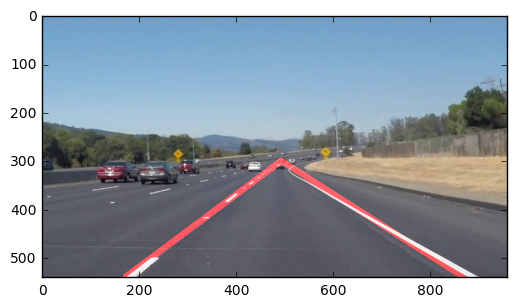

In [21]:
white_output = 'white.mp4'
clip1 = VideoFileClip("solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

In [22]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

[[397 362 453 324]]
[[766 490 775 496]]
[[658 427 758 497]]
[[696 445 759 486]]
[[294 430 445 335]]
[[346 392 392 365]]
[[563 359 575 368]]
[[566 357 581 367]]
[[697 445 719 459]]
[[659 428 666 433]]
[[514 319 518 323]]
[[674 430 696 443]]
[[452 329 474 303]]
[[276 442 293 432]]
[[522 330 525 332]]
[[458 319 468 306]]
[[551 348 554 350]]
[[312 419 349 396]]
[[536 339 541 343]]
[[443 335 451 330]]
[[505 310 509 313]]
[[536 340 542 344]]
[[323 416 326 414]]
[[434 341 446 334]]
[[514 323 517 325]]
[[538 338 543 342]]
[[565 357 568 359]]
[[370 377 388 367]]
[[539 338 543 341]]
[[667 425 673 429]]
[[508 316 510 315]]
[[263 451 280 440]]
[[523 328 527 331]]
[[550 349 552 350]]
[[505 314 512 319]]
[[568 362 578 369]]
[[322 417 324 417]]
[[296 429 321 414]]
[[524 328 527 330]]
[[761 486 764 488]]
[[508 313 512 316]]
[[609 386 611 387]]
[MoviePy] >>>> Building video yellow.mp4
[MoviePy] Writing video yellow.mp4


  0%|                                                  | 0/682 [00:00<?, ?it/s]

[[397 362 453 324]]
[[766 490 775 496]]
[[658 427 758 497]]
[[696 445 759 486]]
[[294 430 445 335]]
[[346 392 392 365]]
[[563 359 575 368]]
[[566 357 581 367]]
[[697 445 719 459]]
[[659 428 666 433]]
[[514 319 518 323]]
[[674 430 696 443]]
[[452 329 474 303]]
[[276 442 293 432]]
[[522 330 525 332]]
[[458 319 468 306]]
[[551 348 554 350]]
[[312 419 349 396]]
[[536 339 541 343]]
[[443 335 451 330]]
[[505 310 509 313]]
[[536 340 542 344]]
[[323 416 326 414]]
[[434 341 446 334]]
[[514 323 517 325]]
[[538 338 543 342]]
[[565 357 568 359]]
[[370 377 388 367]]
[[539 338 543 341]]
[[667 425 673 429]]
[[508 316 510 315]]
[[263 451 280 440]]
[[523 328 527 331]]
[[550 349 552 350]]
[[505 314 512 319]]
[[568 362 578 369]]
[[322 417 324 417]]
[[296 429 321 414]]
[[524 328 527 330]]
[[761 486 764 488]]
[[508 313 512 316]]
[[609 386 611 387]]


  0%|                                          | 1/682 [00:00<01:46,  6.37it/s]

[[752 492 814 535]]
[[258 455 393 368]]
[[689 440 778 498]]
[[679 442 708 463]]
[[400 360 428 343]]
[[443 332 450 327]]
[[507 316 512 320]]
[[453 323 458 319]]
[[378 373 411 354]]
[[570 360 587 371]]
[[497 302 499 304]]
[[368 385 436 340]]
[[689 448 723 473]]
[[820 526 832 533]]
[[525 329 529 332]]
[[572 365 582 373]]
[[265 450 290 433]]
[[722 471 743 487]]
[[340 397 366 380]]
[[725 464 750 481]]
[[779 500 820 525]]
[[501 309 519 323]]
[[417 354 454 328]]
[[528 333 534 337]]
[[509 319 518 325]]
[[448 328 455 322]]
[[523 331 526 333]]
[[414 356 423 349]]
[[677 439 679 440]]
[[429 342 435 337]]
[[457 324 475 301]]
[[816 521 819 523]]
[[539 339 546 345]]
[[538 342 542 345]]
[[555 350 557 352]]
[[523 330 527 333]]
[[368 379 395 364]]
[[553 350 556 352]]
[[611 393 615 396]]
[[574 363 586 371]]
[[463 312 469 306]]
[[784 515 806 531]]
[[512 319 517 323]]
[[515 324 517 325]]
[[498 304 506 310]]
[[417 349 427 343]]
[[732 478 750 492]]
[[403 363 408 359]]
[[821 527 827 531]]
[[566 362 583 373]]


  0%|                                          | 2/682 [00:00<01:48,  6.27it/s]

[[716 458 840 538]]
[[742 485 795 522]]
[[379 374 426 343]]
[[396 368 449 332]]
[[252 459 355 392]]
[[622 401 625 403]]
[[704 460 709 463]]
[[399 362 452 325]]
[[711 463 768 504]]
[[706 460 746 489]]
[[524 330 535 338]]
[[574 363 594 377]]
[[510 315 514 319]]
[[422 347 449 328]]
[[391 371 427 346]]
[[497 301 499 303]]
[[571 364 584 375]]
[[788 518 821 539]]
[[454 322 459 318]]
[[467 307 469 305]]
[[503 311 506 313]]
[[354 389 385 369]]
[[530 334 536 338]]
[[527 330 530 332]]
[[450 331 470 309]]
[[575 367 589 377]]
[[276 444 288 436]]
[[823 528 840 539]]
[[542 341 547 345]]
[[346 399 387 372]]
[[332 402 365 381]]
[[764 490 784 503]]
[[725 464 755 484]]
[[526 330 530 333]]
[[539 342 547 347]]
[[510 319 519 325]]
[[327 411 337 404]]
[[506 314 510 317]]
[[286 444 292 444]]
[[541 341 544 343]]
[[577 364 594 375]]
[[460 317 466 310]]
[[515 320 520 324]]
[[369 380 375 376]]
[[506 311 509 314]]
[[501 308 504 311]]
[[516 324 519 326]]
[[294 432 328 410]]


  0%|▏                                         | 3/682 [00:00<01:42,  6.63it/s]

[[227 477 392 370]]
[[318 412 441 335]]
[[581 367 601 381]]
[[738 482 817 537]]
[[818 524 841 539]]
[[507 313 514 319]]
[[765 490 810 518]]
[[406 362 433 343]]
[[775 507 785 514]]
[[576 369 593 380]]
[[743 485 821 539]]
[[442 334 449 327]]
[[508 317 513 321]]
[[445 335 449 331]]
[[451 327 456 322]]
[[534 338 536 339]]
[[576 367 578 369]]
[[528 331 531 333]]
[[446 331 464 313]]
[[454 328 474 303]]
[[501 309 505 313]]
[[833 533 841 538]]
[[518 323 520 325]]
[[525 332 530 335]]
[[543 342 550 348]]
[[752 481 799 511]]
[[438 340 448 333]]
[[541 344 549 349]]
[[369 386 397 367]]
[[371 380 420 349]]
[[526 331 531 334]]
[[585 369 601 380]]
[[467 307 470 304]]
[[261 464 272 464]]
[[504 309 508 313]]
[[415 355 419 352]]
[[497 301 503 306]]
[[473 303 475 301]]
[[511 317 514 320]]
[[399 367 409 359]]
[[421 352 442 338]]
[[544 342 551 347]]
[[755 482 763 487]]


  1%|▏                                         | 4/682 [00:00<01:32,  7.32it/s]

[[233 475 329 411]]
[[308 419 434 340]]
[[447 333 455 327]]
[[311 424 376 381]]
[[800 523 824 539]]
[[586 370 609 385]]
[[445 332 456 322]]
[[581 371 603 387]]
[[370 386 446 335]]
[[816 521 843 539]]
[[784 512 822 539]]
[[508 313 512 317]]
[[581 372 588 377]]
[[455 326 459 323]]
[[587 375 597 382]]
[[532 336 537 340]]
[[546 344 553 349]]
[[457 319 465 312]]
[[506 314 514 321]]
[[226 479 236 472]]
[[796 510 807 515]]
[[526 333 531 336]]
[[380 379 392 371]]
[[499 305 501 307]]
[[547 344 553 348]]
[[435 339 438 336]]
[[537 338 539 340]]
[[197 498 229 476]]
[[513 318 515 320]]
[[528 331 532 334]]
[[354 391 410 356]]
[[543 345 551 350]]
[[437 338 443 332]]
[[467 312 471 308]]
[[585 370 591 374]]
[[467 307 470 304]]
[[594 376 609 386]]
[[395 369 452 330]]
[[461 320 468 312]]
[[784 513 816 535]]
[[511 320 513 321]]


  1%|▎                                         | 5/682 [00:00<01:26,  7.83it/s]

[[227 480 418 355]]
[[293 430 417 352]]
[[604 387 612 393]]
[[505 313 511 318]]
[[457 319 469 306]]
[[670 432 676 436]]
[[432 342 457 321]]
[[586 374 611 393]]
[[169 518 205 495]]
[[547 345 556 351]]
[[528 335 531 337]]
[[320 418 443 338]]
[[527 333 533 337]]
[[591 374 612 387]]
[[403 360 434 340]]
[[444 337 467 314]]
[[545 345 553 352]]
[[600 380 618 392]]
[[199 498 222 484]]
[[546 347 552 352]]
[[529 332 534 336]]
[[506 311 509 314]]
[[512 318 515 320]]
[[457 320 465 312]]
[[512 321 514 323]]
[[499 305 501 307]]
[[206 493 257 461]]
[[513 319 516 321]]
[[497 302 500 305]]
[[677 433 681 433]]
[[548 346 551 348]]
[[462 318 474 303]]
[[550 346 553 348]]
[[528 332 531 334]]


  1%|▎                                         | 6/682 [00:00<01:25,  7.88it/s]

[[155 528 268 454]]
[[343 405 448 334]]
[[434 343 449 333]]
[[339 402 439 337]]
[[531 333 535 336]]
[[539 341 542 343]]
[[287 434 340 400]]
[[233 476 299 434]]
[[594 380 606 389]]
[[572 362 576 364]]
[[708 448 710 449]]
[[598 378 630 399]]
[[466 314 468 312]]
[[511 320 515 323]]
[[381 376 393 368]]
[[515 319 517 321]]
[[506 311 523 328]]
[[599 383 623 400]]
[[443 334 459 318]]
[[454 328 464 316]]
[[503 310 505 309]]
[[308 427 337 409]]
[[548 349 555 354]]
[[521 325 523 327]]
[[601 379 630 398]]
[[277 447 297 435]]
[[507 316 512 320]]
[[518 327 520 328]]
[[549 346 560 353]]
[[316 416 350 394]]
[[337 408 363 391]]
[[444 336 446 334]]
[[400 362 434 340]]
[[457 319 460 316]]
[[465 310 469 305]]
[[539 342 541 343]]
[[548 348 557 354]]
[[571 362 574 364]]
[[463 319 466 315]]
[[505 314 512 319]]
[[300 432 310 427]]
[[461 316 469 306]]
[[447 334 452 329]]


  1%|▍                                         | 7/682 [00:00<01:25,  7.88it/s]

[[247 468 366 388]]
[[141 538 243 469]]
[[325 409 397 365]]
[[532 332 536 335]]
[[469 308 473 304]]
[[607 382 643 405]]
[[422 348 436 337]]
[[553 347 563 355]]
[[383 378 449 332]]
[[550 349 559 355]]
[[532 333 536 336]]
[[558 350 563 354]]
[[422 352 424 350]]
[[575 364 578 366]]
[[600 382 622 399]]
[[464 310 469 305]]
[[460 315 464 311]]
[[401 362 420 348]]
[[223 484 271 451]]
[[542 340 545 342]]
[[520 324 523 326]]
[[290 432 327 408]]
[[511 319 523 327]]
[[356 396 376 382]]
[[443 333 459 316]]
[[611 390 632 406]]
[[520 326 523 328]]
[[530 335 533 337]]
[[452 329 469 310]]
[[550 348 557 353]]
[[552 347 556 350]]
[[317 422 360 393]]
[[501 307 503 309]]
[[606 382 613 387]]
[[577 364 580 366]]
[[508 312 511 314]]
[[507 314 509 316]]
[[375 378 398 364]]
[[449 330 454 327]]
[[576 364 579 366]]
[[432 341 434 339]]
[[505 308 510 313]]
[[519 326 522 328]]
[[234 476 254 462]]
[[438 337 448 327]]
[[722 466 728 470]]
[[637 407 639 408]]
[[578 364 581 366]]
[[159 526 227 481]]
[[513 318 518 321]]


  1%|▍                                         | 8/682 [00:01<01:25,  7.90it/s]

[[161 525 324 416]]
[[454 325 458 322]]
[[305 430 328 414]]
[[140 539 238 473]]
[[330 414 354 396]]
[[287 434 389 370]]
[[618 389 659 415]]
[[461 318 465 314]]
[[427 344 454 322]]
[[765 496 770 499]]
[[581 367 584 369]]
[[554 348 562 353]]
[[405 359 421 347]]
[[358 395 448 332]]
[[532 333 538 337]]
[[609 389 649 416]]
[[511 318 516 322]]
[[462 312 466 308]]
[[762 491 771 497]]
[[388 370 400 361]]
[[533 333 538 336]]
[[615 387 646 406]]
[[505 308 521 324]]
[[452 323 458 318]]
[[580 367 583 369]]
[[514 321 523 328]]
[[503 309 512 316]]
[[382 374 391 367]]
[[609 388 627 400]]
[[260 460 314 423]]
[[655 416 657 417]]
[[553 350 564 357]]
[[433 340 436 338]]
[[449 331 460 319]]
[[562 352 565 354]]
[[353 398 368 387]]
[[556 348 566 355]]
[[610 389 638 408]]
[[634 405 643 411]]
[[531 335 533 337]]
[[393 367 406 357]]
[[644 405 657 413]]
[[506 313 513 318]]


  1%|▌                                         | 9/682 [00:01<01:33,  7.19it/s]

[[194 504 380 379]]
[[286 435 384 373]]
[[369 387 441 338]]
[[505 311 508 313]]
[[642 404 678 427]]
[[586 370 589 372]]
[[643 412 646 414]]
[[559 350 570 358]]
[[545 342 548 344]]
[[623 397 668 428]]
[[444 334 449 330]]
[[426 347 443 336]]
[[366 384 443 332]]
[[814 526 826 534]]
[[619 395 636 407]]
[[555 350 566 359]]
[[564 353 570 357]]
[[322 419 343 405]]
[[811 527 818 532]]
[[151 532 178 513]]
[[441 333 462 313]]
[[506 309 516 319]]
[[533 334 539 338]]
[[462 317 470 307]]
[[370 387 392 372]]
[[625 393 644 404]]
[[509 316 517 323]]
[[522 324 525 326]]
[[532 335 538 339]]
[[507 309 512 314]]
[[177 515 192 504]]
[[450 329 465 313]]
[[628 395 649 408]]
[[558 350 565 355]]
[[504 306 506 308]]
[[816 530 819 532]]
[[589 370 592 372]]
[[842 530 844 532]]
[[502 303 505 306]]
[[827 534 844 534]]
[[585 371 587 372]]
[[824 535 826 537]]
[[505 312 513 318]]
[[468 308 473 303]]
[[839 528 844 531]]
[[546 342 548 343]]


  1%|▌                                        | 10/682 [00:01<01:29,  7.52it/s]

[[144 538 335 410]]
[[273 444 355 392]]
[[636 400 701 440]]
[[329 415 359 393]]
[[640 408 670 429]]
[[462 315 467 311]]
[[286 435 434 339]]
[[412 358 432 343]]
[[517 320 525 326]]
[[665 425 689 442]]
[[359 394 382 378]]
[[630 401 647 414]]
[[382 379 407 360]]
[[434 343 442 335]]
[[431 345 436 340]]
[[548 343 550 344]]
[[445 330 457 318]]
[[560 352 574 361]]
[[444 335 463 315]]
[[504 311 517 321]]
[[439 335 467 306]]
[[590 374 593 376]]
[[558 354 570 361]]
[[343 399 369 383]]
[[637 400 663 416]]
[[503 305 508 310]]
[[502 308 508 313]]
[[537 335 541 338]]
[[535 335 540 338]]
[[507 310 519 321]]
[[562 352 574 359]]
[[678 435 685 440]]
[[534 337 539 340]]
[[439 339 441 337]]
[[380 375 390 369]]
[[363 392 380 380]]
[[547 343 550 345]]
[[400 362 440 333]]
[[212 493 230 481]]
[[282 446 316 423]]


  2%|▋                                        | 11/682 [00:01<01:22,  8.12it/s]

[[143 539 314 424]]
[[652 409 709 445]]
[[504 310 508 313]]
[[269 447 317 415]]
[[653 416 715 459]]
[[337 410 343 405]]
[[453 320 462 312]]
[[376 378 413 352]]
[[347 402 448 331]]
[[536 335 543 339]]
[[509 312 511 314]]
[[643 410 654 418]]
[[289 442 323 418]]
[[561 355 573 364]]
[[291 433 339 401]]
[[357 396 441 337]]
[[565 354 579 363]]
[[354 393 377 376]]
[[413 353 442 332]]
[[463 310 466 312]]
[[710 447 730 459]]
[[452 327 470 306]]
[[653 417 666 426]]
[[274 452 289 441]]
[[513 316 517 319]]
[[523 325 526 327]]
[[549 345 552 347]]
[[521 326 524 329]]
[[550 345 553 347]]
[[347 397 352 393]]
[[548 345 551 347]]
[[561 356 564 358]]
[[403 360 452 323]]
[[535 336 541 341]]
[[154 532 273 452]]
[[687 439 704 451]]
[[509 316 516 321]]
[[349 400 355 396]]
[[320 421 322 419]]
[[574 359 579 362]]
[[563 356 576 364]]
[[504 311 509 315]]
[[366 385 379 375]]
[[696 437 721 453]]
[[356 391 358 389]]
[[504 306 507 309]]
[[343 400 348 395]]


  2%|▋                                        | 12/682 [00:01<01:27,  7.62it/s]

[[187 511 331 414]]
[[723 454 767 482]]
[[435 340 445 333]]
[[606 384 609 386]]
[[659 421 728 467]]
[[182 513 185 511]]
[[292 433 440 333]]
[[302 432 311 426]]
[[564 357 575 364]]
[[311 421 437 336]]
[[564 358 580 367]]
[[363 391 393 371]]
[[667 419 686 430]]
[[728 466 737 472]]
[[381 378 415 356]]
[[713 456 751 483]]
[[146 538 161 527]]
[[341 406 361 394]]
[[166 525 184 512]]
[[538 336 544 340]]
[[569 356 583 365]]
[[675 424 707 443]]
[[444 330 463 310]]
[[536 337 540 341]]
[[503 305 512 314]]
[[705 443 726 455]]
[[262 452 288 434]]
[[509 313 518 320]]
[[522 325 527 328]]
[[416 356 427 346]]
[[567 356 583 366]]
[[448 329 462 315]]
[[502 308 516 322]]
[[462 314 470 306]]
[[296 430 315 417]]
[[537 336 543 340]]
[[154 533 167 524]]
[[282 446 330 414]]
[[213 493 227 483]]
[[694 443 705 451]]
[[467 308 472 303]]
[[279 441 293 431]]
[[443 334 447 330]]
[[429 345 442 336]]
[[505 308 510 313]]


  2%|▊                                        | 13/682 [00:01<01:34,  7.11it/s]

[[361 393 431 345]]
[[249 461 407 358]]
[[724 455 751 472]]
[[684 437 704 450]]
[[186 512 260 463]]
[[695 437 718 451]]
[[729 457 819 515]]
[[314 425 360 395]]
[[747 479 780 501]]
[[381 374 423 347]]
[[146 539 199 504]]
[[788 507 802 516]]
[[709 454 745 479]]
[[267 457 320 424]]
[[568 360 581 370]]
[[441 337 460 317]]
[[537 339 541 343]]
[[539 338 546 343]]
[[431 341 461 313]]
[[571 359 589 371]]
[[504 307 518 321]]
[[686 432 690 434]]
[[694 436 724 454]]
[[679 435 717 460]]
[[553 349 556 351]]
[[235 479 269 457]]
[[415 355 438 339]]
[[574 364 585 371]]
[[745 478 764 491]]
[[524 326 527 329]]
[[523 327 526 330]]
[[408 356 430 341]]
[[248 470 275 453]]
[[573 359 589 370]]
[[500 306 505 311]]
[[456 322 471 304]]
[[507 314 509 316]]
[[763 490 791 510]]
[[492 291 494 294]]
[[507 311 511 315]]
[[615 390 620 393]]
[[721 461 736 472]]


  2%|▊                                        | 14/682 [00:01<01:36,  6.90it/s]

[[749 479 780 500]]
[[235 471 362 388]]
[[150 538 295 440]]
[[410 361 413 359]]
[[358 395 408 361]]
[[807 506 860 539]]
[[717 449 859 538]]
[[393 367 415 351]]
[[793 508 840 539]]
[[709 453 773 496]]
[[310 430 331 414]]
[[342 400 366 385]]
[[411 358 434 342]]
[[559 350 561 351]]
[[410 356 440 333]]
[[383 374 394 365]]
[[449 324 455 319]]
[[627 397 631 400]]
[[285 446 313 427]]
[[541 339 548 344]]
[[515 320 518 322]]
[[329 417 354 398]]
[[626 397 629 399]]
[[505 310 513 316]]
[[525 327 529 330]]
[[557 350 559 352]]
[[443 335 465 312]]
[[573 363 590 375]]
[[503 310 505 312]]
[[516 320 518 321]]
[[503 305 505 307]]
[[573 361 595 373]]
[[462 314 468 308]]
[[416 355 425 349]]
[[369 383 384 372]]
[[235 480 280 450]]
[[523 328 527 331]]
[[572 363 587 374]]
[[495 298 509 317]]
[[779 500 791 508]]
[[371 387 375 384]]
[[416 351 452 322]]
[[320 423 337 410]]
[[438 339 453 324]]
[[539 340 546 345]]
[[709 447 711 448]]
[[468 306 472 303]]
[[577 362 584 366]]
[[455 317 462 311]]
[[713 448 717 450]]


  2%|▉                                        | 15/682 [00:02<01:46,  6.25it/s]

[[278 452 404 364]]
[[266 452 429 342]]
[[785 503 841 539]]
[[807 506 856 536]]
[[179 520 267 459]]
[[226 478 270 448]]
[[749 469 841 526]]
[[637 405 641 408]]
[[581 365 601 377]]
[[428 347 462 316]]
[[427 343 431 339]]
[[542 340 549 345]]
[[433 339 464 308]]
[[746 477 767 492]]
[[515 321 518 323]]
[[407 361 433 342]]
[[156 534 186 515]]
[[503 306 512 315]]
[[562 352 564 353]]
[[752 471 798 500]]
[[578 367 593 378]]
[[540 340 548 347]]
[[505 309 517 321]]
[[559 353 562 355]]
[[504 311 509 315]]
[[756 483 778 499]]
[[534 335 536 337]]
[[736 473 738 474]]
[[500 302 504 306]]
[[778 500 783 503]]
[[416 356 419 353]]
[[583 370 596 379]]
[[347 403 398 367]]
[[495 298 501 308]]
[[465 310 471 304]]
[[734 470 736 471]]
[[152 538 176 522]]
[[236 481 264 462]]
[[239 470 291 434]]
[[517 320 519 322]]
[[526 328 529 330]]
[[561 352 564 354]]
[[501 307 503 309]]
[[524 329 528 332]]
[[646 404 649 406]]
[[226 488 232 484]]


  2%|▉                                        | 16/682 [00:02<01:39,  6.66it/s]

[[197 509 400 367]]
[[435 340 443 334]]
[[242 468 429 342]]
[[525 328 531 332]]
[[211 488 278 443]]
[[581 369 604 384]]
[[516 321 519 323]]
[[783 502 808 518]]
[[608 381 610 382]]
[[801 512 840 538]]
[[586 368 610 383]]
[[788 494 798 500]]
[[413 358 418 353]]
[[791 495 850 532]]
[[330 415 398 367]]
[[433 339 464 308]]
[[154 536 189 514]]
[[785 502 839 538]]
[[420 353 434 341]]
[[583 371 586 373]]
[[517 321 519 322]]
[[517 320 520 322]]
[[467 307 470 304]]
[[452 325 466 310]]
[[525 330 529 333]]
[[457 319 465 311]]
[[842 538 844 539]]
[[542 342 549 348]]
[[563 355 566 357]]
[[526 328 531 331]]
[[505 308 508 311]]
[[494 296 506 314]]
[[543 341 552 347]]
[[775 494 787 494]]
[[191 511 205 503]]
[[420 352 426 347]]
[[492 292 494 295]]
[[444 333 456 320]]
[[499 305 501 306]]
[[221 491 272 456]]
[[421 347 423 345]]
[[545 341 552 346]]
[[564 354 566 355]]
[[498 298 505 307]]


  2%|█                                        | 17/682 [00:02<01:30,  7.37it/s]

[[398 367 435 341]]
[[418 349 442 331]]
[[231 485 316 427]]
[[190 503 430 341]]
[[208 501 250 473]]
[[444 332 452 325]]
[[154 539 177 524]]
[[591 372 619 389]]
[[350 401 395 370]]
[[526 329 532 333]]
[[516 323 519 325]]
[[202 505 230 487]]
[[589 374 612 390]]
[[510 315 520 323]]
[[500 306 502 305]]
[[336 411 372 387]]
[[318 418 341 402]]
[[366 386 381 375]]
[[547 343 554 348]]
[[289 445 308 431]]
[[178 522 198 510]]
[[436 340 443 333]]
[[544 344 552 350]]
[[505 312 507 314]]
[[433 342 438 337]]
[[394 367 412 354]]
[[305 434 321 422]]
[[537 337 539 339]]
[[453 324 470 305]]
[[568 357 571 359]]
[[587 373 596 380]]
[[498 299 500 301]]
[[320 424 332 414]]
[[528 329 532 332]]
[[450 323 464 308]]
[[593 372 609 382]]
[[498 304 501 307]]
[[552 346 555 348]]
[[546 343 550 346]]
[[275 447 326 412]]
[[526 332 529 334]]
[[670 426 672 427]]
[[328 418 335 412]]
[[503 306 505 308]]
[[449 323 451 321]]
[[457 319 463 314]]
[[496 301 500 305]]
[[842 530 847 530]]
[[536 337 538 339]]
[[526 331 530 334]]


  3%|█                                        | 18/682 [00:02<01:32,  7.19it/s]

[[177 523 270 458]]
[[495 297 497 296]]
[[190 503 428 342]]
[[226 490 323 420]]
[[353 400 394 369]]
[[463 311 470 304]]
[[509 317 520 324]]
[[509 313 512 316]]
[[571 359 575 361]]
[[433 338 460 311]]
[[595 378 612 390]]
[[600 376 629 395]]
[[597 375 613 385]]
[[418 354 437 337]]
[[430 339 438 332]]
[[503 310 505 312]]
[[448 327 456 320]]
[[502 309 504 310]]
[[549 344 554 348]]
[[159 535 203 506]]
[[499 305 505 310]]
[[441 331 443 329]]
[[301 437 351 400]]
[[528 329 533 332]]
[[546 345 556 351]]
[[501 303 505 307]]
[[573 359 575 360]]
[[539 337 541 338]]
[[495 299 499 303]]
[[604 384 622 396]]
[[556 348 558 349]]
[[441 334 450 326]]
[[492 293 494 295]]
[[550 344 558 350]]
[[600 381 625 397]]
[[459 316 463 312]]
[[527 331 530 334]]
[[375 383 379 380]]
[[387 371 419 349]]
[[411 359 416 355]]
[[497 302 501 306]]
[[452 323 461 315]]
[[503 306 513 316]]
[[396 369 424 348]]
[[381 380 390 373]]
[[368 384 376 378]]


  3%|█▏                                       | 19/682 [00:02<01:26,  7.65it/s]

[[153 539 385 377]]
[[190 503 418 349]]
[[387 374 432 342]]
[[600 381 635 404]]
[[606 380 628 393]]
[[415 350 432 338]]
[[607 381 643 403]]
[[223 480 358 389]]
[[437 338 464 311]]
[[548 346 557 353]]
[[550 345 559 351]]
[[504 307 512 316]]
[[439 331 459 312]]
[[551 345 561 351]]
[[529 330 534 334]]
[[506 313 520 325]]
[[519 321 521 323]]
[[301 435 382 378]]
[[540 338 542 340]]
[[527 331 531 335]]
[[530 330 534 333]]
[[494 297 497 300]]
[[605 385 632 403]]
[[423 348 440 334]]
[[430 339 438 332]]
[[163 533 223 492]]
[[508 312 513 316]]
[[618 388 624 392]]
[[527 330 533 335]]
[[498 298 500 300]]
[[510 315 512 317]]
[[496 300 502 309]]
[[208 500 418 352]]
[[224 479 419 347]]
[[154 539 235 482]]
[[614 384 656 410]]
[[622 394 648 412]]
[[505 311 513 317]]
[[554 346 564 353]]
[[518 321 522 324]]
[[530 333 533 335]]
[[520 321 522 323]]
[[557 351 560 354]]
[[616 390 632 402]]
[[450 323 464 310]]
[[529 332 534 335]]
[[503 305 510 314]]
[[428 340 439 329]]
[[433 336 453 316]]
[[412 356 426 344]]


  3%|█▎                                       | 21/682 [00:02<01:19,  8.28it/s]

[[152 539 370 386]]
[[242 466 422 344]]
[[555 347 568 356]]
[[542 339 545 341]]
[[518 323 522 325]]
[[617 390 656 416]]
[[448 324 460 314]]
[[423 343 446 323]]
[[554 350 564 356]]
[[625 390 675 421]]
[[411 357 416 353]]
[[799 508 812 516]]
[[373 386 376 384]]
[[395 368 432 340]]
[[495 298 499 302]]
[[798 510 804 514]]
[[617 392 657 417]]
[[507 309 516 317]]
[[440 332 452 322]]
[[531 330 537 334]]
[[174 524 180 520]]
[[385 374 408 358]]
[[805 513 808 515]]
[[507 313 513 317]]
[[553 348 560 353]]
[[556 347 568 354]]
[[153 539 170 527]]
[[402 359 407 355]]
[[530 331 534 335]]
[[512 314 518 321]]
[[445 327 450 323]]
[[373 382 393 369]]
[[417 351 438 335]]
[[405 357 409 354]]
[[324 417 369 386]]
[[210 499 217 494]]
[[326 410 370 380]]
[[586 369 588 370]]
[[501 302 506 308]]
[[424 341 432 335]]
[[650 413 658 419]]
[[302 426 314 418]]
[[446 322 451 318]]
[[800 508 808 513]]
[[543 339 546 341]]
[[588 367 590 368]]
[[506 311 511 315]]
[[559 349 568 355]]
[[245 473 264 459]]


  3%|█▎                                       | 22/682 [00:02<01:30,  7.28it/s]

[[151 539 361 392]]
[[249 461 422 344]]
[[654 409 667 417]]
[[629 399 686 436]]
[[556 349 571 358]]
[[635 397 695 434]]
[[373 384 392 369]]
[[387 374 402 362]]
[[414 355 435 336]]
[[411 351 431 337]]
[[401 364 409 357]]
[[437 336 464 308]]
[[564 356 568 359]]
[[594 371 597 373]]
[[532 331 538 335]]
[[407 360 412 355]]
[[634 397 649 406]]
[[559 349 571 357]]
[[429 338 450 318]]
[[531 332 536 337]]
[[556 350 567 359]]
[[498 298 503 303]]
[[368 382 413 351]]
[[506 308 510 312]]
[[545 341 547 343]]
[[511 313 514 316]]
[[520 322 523 324]]
[[493 294 496 298]]
[[497 301 502 306]]
[[364 389 375 382]]
[[506 312 514 317]]
[[544 341 546 343]]
[[151 539 413 355]]
[[406 355 426 341]]
[[257 456 311 419]]
[[563 352 576 360]]
[[648 405 694 433]]
[[560 351 576 361]]
[[317 415 405 357]]
[[647 410 656 416]]
[[597 377 599 378]]
[[642 408 698 443]]
[[535 332 540 336]]
[[534 332 540 337]]
[[431 337 449 319]]
[[438 335 457 316]]
[[520 324 523 326]]
[[559 353 568 360]]
[[294 431 367 383]]
[[695 435 725 451]]


  4%|█▍                                       | 24/682 [00:03<01:21,  8.09it/s]

[[153 539 266 460]]
[[211 488 410 354]]
[[657 417 700 445]]
[[753 470 759 474]]
[[256 468 337 410]]
[[752 469 759 473]]
[[666 416 713 445]]
[[337 411 342 407]]
[[610 381 613 383]]
[[565 354 580 364]]
[[374 385 409 358]]
[[563 355 576 365]]
[[735 468 745 474]]
[[405 357 420 345]]
[[533 335 539 340]]
[[408 360 416 352]]
[[443 330 451 323]]
[[346 404 362 392]]
[[507 311 515 317]]
[[447 326 453 320]]
[[441 329 457 313]]
[[562 356 570 362]]
[[719 457 729 464]]
[[507 314 512 318]]
[[551 344 553 346]]
[[693 434 710 444]]
[[523 324 525 326]]
[[751 468 758 472]]
[[372 386 383 377]]
[[411 353 428 340]]
[[418 352 442 331]]
[[504 307 506 308]]
[[704 448 733 468]]
[[712 444 742 464]]
[[521 324 524 327]]
[[374 384 376 382]]
[[499 305 509 315]]
[[180 521 225 489]]
[[423 343 440 329]]
[[537 334 542 338]]
[[535 334 542 339]]
[[399 361 408 354]]
[[575 364 578 366]]
[[446 323 448 321]]
[[213 498 255 468]]
[[221 481 254 458]]
[[372 381 383 373]]
[[452 322 464 308]]
[[549 345 552 347]]
[[536 334 539 336]]


  4%|█▌                                       | 25/682 [00:03<01:20,  8.12it/s]

[[211 490 405 359]]
[[331 415 412 358]]
[[538 336 544 340]]
[[156 539 367 391]]
[[701 438 788 492]]
[[706 449 757 483]]
[[735 468 776 495]]
[[426 347 464 311]]
[[570 358 587 368]]
[[705 449 733 468]]
[[683 428 685 429]]
[[687 429 743 465]]
[[436 333 445 326]]
[[507 314 510 317]]
[[509 313 516 320]]
[[535 336 541 342]]
[[684 435 707 451]]
[[413 353 435 334]]
[[194 501 248 464]]
[[566 358 582 370]]
[[413 357 419 351]]
[[502 305 511 314]]
[[690 432 710 445]]
[[552 347 555 349]]
[[568 358 583 367]]
[[427 342 438 332]]
[[494 298 496 300]]
[[676 431 693 442]]
[[446 325 457 313]]
[[566 360 569 362]]
[[777 495 789 503]]
[[501 308 505 312]]
[[512 319 515 321]]
[[497 303 502 308]]
[[406 357 413 352]]
[[612 389 615 391]]
[[579 364 587 369]]
[[421 351 430 342]]
[[184 508 207 491]]
[[459 315 467 307]]
[[535 338 538 340]]
[[159 525 400 362]]
[[198 511 201 509]]
[[164 535 263 464]]
[[353 401 387 375]]
[[776 492 824 523]]
[[408 359 413 355]]
[[711 442 783 487]]
[[441 332 450 324]]
[[573 359 593 372]]


  4%|█▌                                       | 27/682 [00:03<01:17,  8.41it/s]

[[296 441 406 361]]
[[169 518 395 365]]
[[523 326 527 329]]
[[777 491 823 521]]
[[158 539 265 464]]
[[728 460 796 504]]
[[738 458 764 474]]
[[430 338 447 321]]
[[580 362 600 375]]
[[507 309 513 314]]
[[276 455 291 445]]
[[439 330 453 316]]
[[448 326 451 323]]
[[400 360 420 346]]
[[424 347 462 311]]
[[576 363 589 373]]
[[833 526 853 539]]
[[308 433 324 422]]
[[504 309 506 311]]
[[152 530 158 526]]
[[499 299 504 304]]
[[498 302 502 306]]
[[396 368 426 344]]
[[525 325 529 328]]
[[557 349 560 351]]
[[218 496 275 457]]
[[588 371 595 376]]
[[561 349 563 350]]
[[507 312 510 314]]
[[637 401 640 403]]
[[575 363 583 369]]
[[540 338 545 343]]
[[266 462 276 456]]
[[452 318 457 313]]
[[560 349 563 351]]
[[559 349 562 351]]
[[586 365 600 374]]
[[226 480 280 444]]
[[503 304 506 307]]
[[514 319 516 320]]
[[541 336 549 342]]
[[399 362 405 357]]
[[159 525 178 513]]
[[336 413 395 370]]
[[542 336 548 341]]
[[496 299 501 304]]
[[422 343 430 337]]
[[789 499 818 518]]
[[205 494 217 487]]


  4%|█▋                                       | 28/682 [00:03<01:21,  8.02it/s]

[[141 538 292 436]]
[[190 518 248 475]]
[[410 353 429 338]]
[[272 459 318 425]]
[[307 434 358 396]]
[[777 490 822 518]]
[[345 400 366 384]]
[[364 393 386 375]]
[[379 382 400 364]]
[[402 364 413 354]]
[[432 334 444 324]]
[[419 345 437 331]]
[[422 348 462 311]]
[[586 364 608 378]]
[[250 475 273 457]]
[[580 364 602 379]]
[[357 398 365 391]]
[[355 393 407 355]]
[[839 528 856 539]]
[[225 480 284 441]]
[[541 337 549 344]]
[[582 363 587 366]]
[[160 539 178 525]]
[[544 337 551 342]]
[[498 301 505 307]]
[[323 415 337 404]]
[[585 368 599 378]]
[[499 298 504 303]]
[[284 440 318 418]]
[[525 324 530 328]]
[[815 514 830 524]]
[[527 324 530 326]]
[[228 491 265 462]]
[[581 366 590 372]]
[[585 364 605 377]]
[[649 408 655 412]]
[[180 525 194 514]]
[[541 339 548 344]]
[[526 324 530 327]]
[[832 524 847 534]]
[[563 350 566 352]]
[[822 519 828 523]]
[[506 307 513 313]]
[[330 410 356 391]]
[[652 411 654 412]]
[[508 312 511 315]]
[[851 535 857 539]]
[[765 481 768 483]]
[[498 296 500 298]]
[[514 318 517 320]]


  4%|█▋                                       | 29/682 [00:03<01:28,  7.35it/s]

[[141 538 364 387]]
[[160 539 232 487]]
[[394 370 444 328]]
[[379 376 434 333]]
[[276 456 382 379]]
[[828 520 857 539]]
[[516 316 519 318]]
[[247 477 269 460]]
[[586 367 609 384]]
[[527 325 532 328]]
[[589 366 617 382]]
[[254 472 279 453]]
[[331 409 353 393]]
[[510 310 513 313]]
[[666 418 673 423]]
[[509 313 519 320]]
[[565 353 568 355]]
[[441 326 453 316]]
[[506 306 509 309]]
[[499 297 504 302]]
[[544 337 554 344]]
[[383 378 405 360]]
[[527 327 530 329]]
[[449 322 456 317]]
[[343 401 362 387]]
[[362 388 380 374]]
[[496 297 499 300]]
[[501 300 509 308]]
[[502 305 504 307]]
[[505 309 510 313]]
[[529 325 532 327]]
[[547 338 555 343]]
[[332 415 386 375]]
[[602 374 617 383]]
[[421 343 443 325]]
[[545 341 551 345]]
[[429 342 432 339]]
[[406 356 425 341]]
[[590 367 611 380]]
[[140 539 204 496]]
[[526 327 529 329]]
[[385 371 404 356]]
[[603 379 612 385]]
[[454 318 464 308]]


  4%|█▊                                       | 30/682 [00:03<01:21,  7.98it/s]

[[438 332 453 320]]
[[152 530 372 381]]
[[305 436 419 350]]
[[458 314 462 310]]
[[248 477 298 440]]
[[592 370 619 390]]
[[596 370 620 385]]
[[163 538 225 492]]
[[445 326 458 315]]
[[502 305 512 313]]
[[385 370 411 352]]
[[140 539 300 431]]
[[413 349 427 339]]
[[269 462 324 421]]
[[549 339 557 344]]
[[599 371 627 389]]
[[436 330 453 316]]
[[546 340 553 346]]
[[570 356 572 357]]
[[552 344 554 346]]
[[548 339 557 345]]
[[405 360 426 344]]
[[503 302 512 311]]
[[370 381 402 359]]
[[400 359 416 348]]
[[224 493 254 472]]
[[592 372 596 375]]
[[528 325 533 328]]
[[501 302 503 301]]
[[687 431 692 434]]
[[160 539 185 521]]
[[517 316 520 319]]
[[516 318 519 320]]
[[610 383 622 390]]
[[213 502 239 483]]
[[427 342 434 337]]
[[493 292 495 294]]
[[380 381 386 376]]


  5%|█▊                                       | 31/682 [00:04<01:50,  5.92it/s]

[[162 539 385 377]]
[[141 539 336 407]]
[[258 459 367 385]]
[[604 375 640 396]]
[[399 366 462 311]]
[[600 377 610 384]]
[[395 369 405 360]]
[[599 375 634 398]]
[[539 334 541 336]]
[[548 341 556 348]]
[[496 297 499 300]]
[[390 373 397 366]]
[[506 305 515 314]]
[[530 326 534 328]]
[[394 365 453 316]]
[[549 340 559 346]]
[[529 326 534 329]]
[[362 387 390 368]]
[[508 311 512 314]]
[[616 387 630 397]]
[[519 317 521 319]]
[[440 328 443 325]]
[[715 447 720 450]]
[[608 376 619 383]]
[[387 374 393 369]]
[[528 327 531 330]]
[[551 340 560 346]]
[[518 317 521 320]]
[[387 369 398 361]]
[[178 527 207 506]]
[[610 383 621 391]]
[[406 356 420 344]]
[[499 297 505 304]]
[[575 357 578 359]]
[[574 357 577 359]]
[[252 475 286 450]]
[[498 300 508 310]]
[[368 389 373 385]]
[[417 352 431 339]]
[[555 344 558 346]]


  5%|█▉                                       | 32/682 [00:04<01:44,  6.25it/s]

[[229 480 392 366]]
[[162 539 371 387]]
[[168 522 210 492]]
[[417 350 456 317]]
[[539 334 542 336]]
[[614 380 653 404]]
[[607 381 644 405]]
[[406 360 413 353]]
[[413 350 429 335]]
[[358 396 397 367]]
[[632 396 646 405]]
[[550 343 562 350]]
[[516 317 518 318]]
[[506 309 513 314]]
[[552 341 564 348]]
[[419 345 424 340]]
[[505 304 514 313]]
[[209 494 261 457]]
[[153 532 192 504]]
[[517 318 522 321]]
[[579 360 583 362]]
[[394 369 399 364]]
[[606 379 616 386]]
[[154 531 176 515]]
[[611 379 626 388]]
[[364 385 400 360]]
[[398 366 404 360]]
[[500 302 504 306]]
[[434 332 443 323]]
[[517 319 520 321]]
[[542 334 544 336]]
[[519 317 521 319]]
[[390 366 404 357]]
[[554 346 558 349]]
[[456 315 464 308]]
[[500 298 505 303]]
[[745 466 747 467]]
[[277 457 323 423]]
[[279 446 285 442]]
[[636 394 641 397]]
[[410 357 422 346]]
[[207 495 230 478]]
[[744 467 746 469]]
[[533 327 536 329]]
[[540 334 543 336]]
[[408 354 417 345]]
[[529 326 536 330]]


  5%|█▉                                       | 33/682 [00:04<01:43,  6.26it/s]

[[246 479 358 397]]
[[301 430 400 360]]
[[237 474 337 406]]
[[512 311 517 315]]
[[635 398 660 415]]
[[178 516 224 483]]
[[163 539 231 491]]
[[622 385 661 409]]
[[392 371 451 321]]
[[370 388 382 377]]
[[616 386 636 400]]
[[420 344 436 329]]
[[144 539 170 520]]
[[557 347 564 352]]
[[646 405 661 415]]
[[541 335 545 338]]
[[499 297 510 308]]
[[506 309 513 315]]
[[544 335 546 336]]
[[518 320 521 322]]
[[228 492 297 443]]
[[530 327 537 331]]
[[384 377 390 371]]
[[648 400 670 413]]
[[215 490 249 467]]
[[787 494 797 500]]
[[401 359 424 339]]
[[352 401 368 388]]
[[426 339 450 318]]
[[627 393 644 405]]
[[503 306 511 312]]
[[508 307 514 312]]
[[556 343 566 349]]
[[554 343 567 351]]
[[166 524 179 514]]
[[520 318 522 320]]
[[252 465 306 428]]
[[790 493 799 498]]
[[449 322 458 314]]
[[553 344 555 346]]
[[788 492 791 494]]
[[560 346 565 349]]
[[786 494 795 500]]
[[553 345 559 349]]
[[586 363 589 365]]
[[530 328 536 332]]
[[409 353 417 346]]


  5%|██                                       | 34/682 [00:04<01:50,  5.88it/s]

[[146 538 268 453]]
[[164 539 331 418]]
[[267 455 413 349]]
[[634 392 682 421]]
[[432 338 435 335]]
[[503 306 506 308]]
[[626 393 644 405]]
[[376 383 411 354]]
[[511 314 518 319]]
[[657 412 680 427]]
[[407 359 456 316]]
[[545 336 548 339]]
[[560 349 566 354]]
[[643 403 666 419]]
[[363 393 386 374]]
[[651 403 661 409]]
[[403 356 415 346]]
[[331 416 358 397]]
[[533 328 538 331]]
[[238 475 294 435]]
[[492 291 496 295]]
[[558 345 571 353]]
[[531 328 536 333]]
[[502 301 519 318]]
[[397 362 402 358]]
[[416 346 426 337]]
[[531 329 533 331]]
[[434 332 443 323]]
[[317 427 345 407]]
[[518 320 521 322]]
[[520 318 523 320]]
[[411 355 418 348]]
[[428 337 439 326]]
[[625 391 649 408]]
[[845 530 852 535]]
[[544 337 547 339]]
[[259 471 270 463]]
[[564 349 570 353]]
[[557 345 559 346]]
[[632 391 645 399]]
[[237 487 240 485]]
[[532 331 535 333]]
[[507 310 512 314]]
[[167 538 181 528]]
[[445 325 461 311]]
[[190 508 250 466]]
[[515 313 517 315]]


  5%|██                                       | 35/682 [00:04<01:52,  5.75it/s]

[[314 429 406 359]]
[[175 519 238 474]]
[[277 458 306 435]]
[[166 539 196 516]]
[[355 392 420 343]]
[[652 402 712 439]]
[[657 412 702 441]]
[[561 346 575 356]]
[[237 476 267 454]]
[[558 349 564 353]]
[[247 479 280 455]]
[[307 427 327 411]]
[[534 329 539 332]]
[[269 454 316 419]]
[[548 338 550 339]]
[[519 321 523 323]]
[[427 336 441 325]]
[[445 326 459 313]]
[[638 400 655 412]]
[[208 507 247 480]]
[[532 330 535 333]]
[[428 341 443 326]]
[[520 318 524 321]]
[[438 327 446 321]]
[[507 306 511 310]]
[[561 350 570 357]]
[[503 306 511 312]]
[[176 518 192 506]]
[[394 367 418 349]]
[[318 419 345 398]]
[[144 539 151 534]]
[[294 445 313 431]]
[[500 302 504 306]]
[[558 347 572 357]]
[[370 395 373 393]]
[[147 538 173 519]]
[[534 331 539 334]]
[[198 515 232 491]]
[[665 411 681 421]]
[[645 399 658 407]]
[[638 399 660 415]]
[[344 400 359 388]]
[[258 461 295 434]]
[[367 395 371 393]]
[[521 318 523 320]]
[[420 342 426 338]]
[[546 338 549 340]]
[[219 488 234 478]]
[[317 427 346 406]]
[[498 296 506 304]]


  5%|██▏                                      | 36/682 [00:04<01:46,  6.05it/s]

[[323 423 328 419]]
[[270 462 291 446]]
[[290 448 427 341]]
[[436 332 453 319]]
[[652 409 686 431]]
[[245 469 377 376]]
[[699 438 733 460]]
[[166 539 232 491]]
[[146 539 193 505]]
[[659 407 680 420]]
[[378 375 408 351]]
[[204 510 270 463]]
[[562 348 579 358]]
[[166 525 317 419]]
[[606 374 610 376]]
[[496 297 498 299]]
[[535 329 542 334]]
[[652 408 730 459]]
[[562 351 573 359]]
[[664 409 712 439]]
[[508 311 514 315]]
[[443 326 452 319]]
[[508 307 515 314]]
[[388 368 441 325]]
[[536 329 542 333]]
[[273 460 287 450]]
[[506 309 512 313]]
[[500 299 507 306]]
[[503 306 508 310]]
[[519 320 523 323]]
[[534 331 540 335]]
[[397 366 405 359]]
[[521 319 525 322]]
[[502 305 505 303]]
[[662 408 703 434]]
[[410 354 442 328]]
[[165 539 193 519]]
[[262 468 278 457]]
[[499 301 503 305]]
[[563 351 578 360]]
[[454 316 457 314]]
[[214 492 361 386]]
[[222 499 293 444]]
[[357 390 443 323]]
[[668 419 772 484]]
[[291 447 424 343]]
[[678 418 703 433]]
[[167 525 201 500]]
[[696 436 717 449]]
[[566 353 581 363]]


  6%|██▎                                      | 38/682 [00:05<01:34,  6.84it/s]

[[230 480 416 345]]
[[166 539 393 368]]
[[523 320 526 322]]
[[760 475 802 501]]
[[689 432 724 454]]
[[405 352 429 334]]
[[423 338 439 326]]
[[432 336 457 313]]
[[728 455 769 482]]
[[568 354 585 366]]
[[570 352 591 365]]
[[169 523 204 497]]
[[536 333 541 337]]
[[506 305 510 309]]
[[499 297 503 301]]
[[536 332 543 337]]
[[224 483 300 429]]
[[210 507 319 425]]
[[503 306 515 315]]
[[400 361 421 345]]
[[499 302 507 308]]
[[501 300 506 304]]
[[774 485 799 500]]
[[707 442 729 457]]
[[537 331 545 336]]
[[372 383 394 367]]
[[625 385 628 387]]
[[538 331 545 335]]
[[146 539 173 519]]
[[697 430 706 435]]
[[422 343 432 335]]
[[813 509 824 515]]
[[202 500 217 488]]
[[341 401 379 373]]
[[571 352 591 364]]
[[507 310 515 316]]
[[724 453 745 467]]
[[433 334 442 326]]
[[385 373 405 358]]
[[568 355 574 359]]


  6%|██▎                                      | 39/682 [00:05<01:27,  7.32it/s]

[[165 539 384 374]]
[[144 538 355 390]]
[[759 474 806 504]]
[[714 446 767 480]]
[[243 468 381 371]]
[[409 354 455 315]]
[[539 331 547 336]]
[[805 503 827 517]]
[[501 300 516 314]]
[[572 356 590 369]]
[[411 348 418 341]]
[[385 373 396 363]]
[[398 363 407 354]]
[[513 315 515 316]]
[[576 355 591 365]]
[[522 320 530 326]]
[[382 370 411 347]]
[[808 504 831 519]]
[[538 334 542 337]]
[[425 340 435 331]]
[[499 301 516 316]]
[[577 355 596 367]]
[[521 322 524 324]]
[[194 517 219 498]]
[[388 371 402 358]]
[[580 361 592 369]]
[[446 322 452 317]]
[[144 539 156 531]]
[[521 321 523 323]]
[[372 377 413 345]]
[[165 539 390 369]]
[[154 531 366 382]]
[[582 364 598 374]]
[[541 333 549 338]]
[[376 379 420 345]]
[[580 358 604 373]]
[[756 472 797 498]]
[[405 351 431 332]]
[[369 378 395 360]]
[[429 336 443 326]]
[[811 506 832 520]]
[[396 358 412 347]]
[[496 298 515 317]]
[[539 335 541 337]]
[[490 290 493 293]]
[[539 334 549 340]]
[[441 327 452 318]]
[[558 346 561 348]]
[[364 382 386 367]]
[[503 302 505 304]]


  6%|██▍                                      | 41/682 [00:05<01:19,  8.04it/s]

[[165 539 395 365]]
[[392 361 432 331]]
[[412 350 431 336]]
[[144 539 289 437]]
[[307 423 386 367]]
[[790 493 794 496]]
[[524 322 529 325]]
[[791 495 799 500]]
[[545 335 551 340]]
[[582 364 606 379]]
[[589 363 611 377]]
[[585 361 610 377]]
[[496 298 498 300]]
[[391 367 421 344]]
[[525 322 528 324]]
[[809 505 844 528]]
[[513 316 515 317]]
[[193 503 250 464]]
[[344 398 366 382]]
[[504 308 517 317]]
[[543 335 549 339]]
[[500 300 517 316]]
[[280 442 316 418]]
[[422 342 429 336]]
[[432 335 456 314]]
[[523 324 527 326]]
[[163 539 194 516]]
[[542 338 549 342]]
[[316 426 326 418]]
[[563 348 566 350]]
[[804 503 810 507]]
[[541 336 550 342]]
[[660 412 663 414]]
[[494 296 503 307]]
[[143 539 182 511]]
[[402 355 410 348]]
[[506 305 510 309]]
[[260 456 305 426]]
[[800 500 826 517]]
[[197 514 230 489]]
[[561 349 563 350]]


  6%|██▌                                      | 42/682 [00:05<01:20,  7.91it/s]

[[251 462 380 371]]
[[165 538 393 366]]
[[403 357 422 343]]
[[145 537 208 492]]
[[588 368 601 377]]
[[525 323 529 325]]
[[381 369 414 345]]
[[593 366 621 383]]
[[513 316 516 318]]
[[547 337 553 341]]
[[565 351 569 353]]
[[523 324 528 328]]
[[388 369 410 353]]
[[204 495 249 465]]
[[543 337 550 343]]
[[423 341 451 319]]
[[603 377 615 385]]
[[591 365 614 380]]
[[502 303 517 316]]
[[507 311 512 315]]
[[411 346 428 334]]
[[237 472 256 460]]
[[679 424 682 426]]
[[543 339 547 342]]
[[567 351 570 353]]
[[490 291 496 298]]
[[365 388 373 382]]
[[496 300 508 310]]
[[589 368 612 384]]
[[344 404 354 397]]
[[225 480 239 471]]
[[252 462 353 391]]
[[678 424 681 426]]
[[342 406 361 391]]
[[416 347 426 339]]
[[268 461 325 419]]
[[544 336 552 341]]
[[433 334 439 329]]
[[213 501 215 501]]


  6%|██▌                                      | 43/682 [00:05<01:28,  7.20it/s]

[[291 445 447 323]]
[[338 401 421 340]]
[[162 539 284 450]]
[[594 372 620 390]]
[[143 539 356 389]]
[[598 370 623 386]]
[[544 340 552 346]]
[[545 338 557 346]]
[[508 310 517 317]]
[[571 354 574 356]]
[[570 354 573 356]]
[[572 354 574 355]]
[[494 298 496 300]]
[[547 338 557 345]]
[[525 324 531 328]]
[[449 320 453 317]]
[[514 316 517 318]]
[[497 302 509 313]]
[[501 303 504 305]]
[[524 326 529 329]]
[[282 451 303 435]]
[[545 340 554 346]]
[[263 465 289 445]]
[[408 349 422 339]]
[[427 338 450 320]]
[[600 372 611 379]]
[[611 383 626 393]]
[[621 384 632 391]]
[[414 344 431 332]]
[[491 293 494 296]]
[[346 403 382 375]]
[[492 291 499 299]]
[[163 539 186 523]]
[[504 306 511 311]]
[[201 512 226 493]]


  6%|██▋                                      | 44/682 [00:05<01:22,  7.70it/s]

[[194 518 377 380]]
[[249 466 312 422]]
[[184 512 262 456]]
[[357 389 391 363]]
[[622 391 637 401]]
[[506 313 518 320]]
[[548 341 560 348]]
[[374 382 397 363]]
[[600 378 635 401]]
[[419 347 442 327]]
[[605 376 636 395]]
[[446 324 452 319]]
[[170 536 199 513]]
[[404 359 414 349]]
[[498 300 504 306]]
[[145 539 180 513]]
[[393 362 425 338]]
[[314 419 342 400]]
[[502 305 511 313]]
[[514 320 517 322]]
[[497 304 503 309]]
[[525 329 529 331]]
[[419 341 439 327]]
[[379 377 384 373]]
[[495 301 499 305]]
[[265 454 320 416]]
[[547 343 556 349]]
[[507 314 512 317]]
[[259 470 263 467]]
[[726 455 733 459]]
[[641 398 644 400]]
[[180 529 234 487]]
[[550 341 560 347]]
[[399 363 407 355]]
[[575 358 578 360]]
[[572 358 575 360]]
[[393 367 397 364]]
[[168 523 189 507]]
[[423 343 428 338]]
[[507 310 511 314]]
[[328 409 354 391]]
[[276 457 284 451]]
[[529 327 532 330]]
[[536 334 539 336]]
[[432 331 446 321]]
[[312 430 316 427]]
[[537 334 540 336]]
[[435 334 445 326]]
[[622 386 644 399]]
[[343 398 359 387]]


  7%|██▋                                      | 45/682 [00:06<01:20,  7.91it/s]

[[166 538 250 475]]
[[144 539 350 394]]
[[289 447 369 385]]
[[608 384 649 410]]
[[388 365 420 342]]
[[506 313 515 319]]
[[622 386 660 409]]
[[348 394 382 371]]
[[608 382 651 411]]
[[383 375 412 351]]
[[405 352 438 328]]
[[502 306 512 314]]
[[540 336 542 337]]
[[615 382 648 403]]
[[516 319 519 321]]
[[371 378 384 368]]
[[759 479 761 480]]
[[551 343 562 350]]
[[408 355 444 327]]
[[528 328 533 332]]
[[538 336 542 338]]
[[246 479 258 469]]
[[550 343 558 348]]
[[385 368 390 364]]
[[266 464 283 450]]
[[394 367 411 353]]
[[549 345 558 352]]
[[427 335 441 325]]
[[504 311 508 314]]
[[447 323 461 311]]
[[761 477 770 482]]
[[497 300 506 309]]
[[531 329 533 331]]
[[339 409 360 393]]
[[439 330 449 322]]
[[612 381 633 394]]
[[493 299 502 308]]
[[371 384 377 380]]
[[374 381 380 377]]
[[578 362 581 364]]
[[383 370 400 357]]
[[204 510 241 483]]
[[499 306 506 312]]
[[353 398 372 384]]


  7%|██▊                                      | 46/682 [00:06<01:15,  8.40it/s]

[[144 539 346 397]]
[[165 539 405 358]]
[[618 390 666 421]]
[[624 388 678 420]]
[[308 423 397 360]]
[[508 316 515 321]]
[[553 345 566 354]]
[[811 508 813 509]]
[[423 344 455 317]]
[[495 303 503 310]]
[[619 390 628 396]]
[[552 348 556 351]]
[[646 407 669 422]]
[[410 350 434 330]]
[[436 330 443 323]]
[[398 363 439 330]]
[[818 513 821 515]]
[[540 338 543 340]]
[[277 456 342 407]]
[[530 329 534 333]]
[[631 398 650 410]]
[[622 388 647 403]]
[[553 348 565 355]]
[[498 302 504 308]]
[[515 322 518 324]]
[[423 340 435 330]]
[[557 347 566 353]]
[[527 330 531 334]]
[[505 310 513 316]]
[[508 311 511 314]]
[[516 320 519 322]]
[[375 375 420 341]]
[[490 292 497 299]]
[[555 350 560 353]]
[[505 313 512 318]]


  7%|██▊                                      | 47/682 [00:06<01:13,  8.62it/s]

[[208 494 367 382]]
[[165 539 249 476]]
[[267 464 357 394]]
[[638 397 694 430]]
[[371 385 438 331]]
[[627 395 680 430]]
[[364 390 387 371]]
[[588 370 591 372]]
[[333 405 402 356]]
[[446 324 454 318]]
[[529 330 535 334]]
[[148 537 207 495]]
[[530 330 536 334]]
[[418 344 446 321]]
[[503 308 512 315]]
[[341 408 355 396]]
[[626 395 656 415]]
[[555 347 566 354]]
[[506 314 509 317]]
[[203 498 260 459]]
[[193 519 223 496]]
[[498 302 502 306]]
[[436 334 448 323]]
[[516 323 519 325]]
[[403 355 416 345]]
[[500 309 507 314]]
[[255 473 290 445]]
[[399 357 422 340]]
[[555 350 566 357]]
[[671 417 686 426]]
[[652 411 667 421]]
[[494 301 497 304]]
[[177 517 189 509]]
[[542 339 546 341]]
[[499 304 502 307]]
[[517 321 520 323]]
[[556 347 570 356]]
[[663 418 686 434]]
[[528 332 534 336]]
[[145 538 167 523]]
[[276 447 286 440]]


  7%|██▉                                      | 48/682 [00:06<01:12,  8.75it/s]

[[324 419 420 346]]
[[148 537 229 479]]
[[295 433 408 351]]
[[639 403 703 444]]
[[231 489 307 433]]
[[652 405 720 445]]
[[659 415 715 451]]
[[218 488 264 454]]
[[557 351 569 359]]
[[178 528 230 491]]
[[406 351 429 335]]
[[277 446 307 423]]
[[303 435 332 414]]
[[394 365 446 325]]
[[530 332 537 336]]
[[532 331 538 335]]
[[256 461 275 446]]
[[559 349 574 358]]
[[489 295 493 298]]
[[216 500 241 483]]
[[423 338 440 326]]
[[504 312 511 317]]
[[556 349 568 358]]
[[164 539 188 522]]
[[504 307 512 315]]
[[690 428 709 439]]
[[496 304 501 308]]
[[503 307 508 312]]
[[517 323 521 325]]
[[499 307 508 314]]
[[160 528 179 514]]
[[443 327 462 310]]
[[648 402 670 415]]
[[495 298 500 303]]
[[363 383 402 355]]
[[418 342 437 329]]


  7%|██▉                                      | 49/682 [00:06<01:15,  8.34it/s]

[[403 353 442 324]]
[[358 386 410 349]]
[[410 352 439 331]]
[[178 529 340 407]]
[[564 351 579 361]]
[[144 538 213 491]]
[[665 411 710 439]]
[[253 461 311 421]]
[[308 430 372 383]]
[[658 413 738 465]]
[[394 364 414 350]]
[[291 434 325 411]]
[[546 341 549 343]]
[[313 418 339 401]]
[[560 352 573 361]]
[[369 384 379 378]]
[[726 456 749 471]]
[[392 366 404 358]]
[[658 414 693 437]]
[[532 331 539 335]]
[[663 411 704 436]]
[[490 292 497 299]]
[[499 306 501 305]]
[[490 296 494 300]]
[[344 396 357 388]]
[[163 539 197 514]]
[[330 406 346 396]]
[[440 330 457 313]]
[[239 471 286 439]]
[[511 315 514 317]]
[[501 309 504 307]]
[[201 498 224 483]]
[[518 321 522 324]]
[[222 483 244 469]]
[[491 296 494 299]]
[[496 299 520 322]]
[[531 332 537 337]]
[[497 305 511 317]]
[[345 402 373 382]]
[[715 441 729 451]]
[[399 361 408 355]]
[[382 374 390 369]]
[[357 387 375 375]]


  7%|███                                      | 50/682 [00:06<01:22,  7.69it/s]

[[323 420 408 354]]
[[188 508 302 426]]
[[672 423 794 499]]
[[360 386 398 357]]
[[217 500 278 453]]
[[193 518 218 498]]
[[682 422 728 450]]
[[304 426 323 411]]
[[497 305 502 309]]
[[282 450 301 437]]
[[509 316 512 318]]
[[164 525 206 494]]
[[451 319 462 310]]
[[492 298 496 302]]
[[566 353 569 355]]
[[504 312 513 318]]
[[163 539 212 502]]
[[441 328 450 320]]
[[503 307 509 312]]
[[567 353 584 364]]
[[413 350 430 338]]
[[564 356 578 365]]
[[532 334 539 338]]
[[383 369 429 335]]
[[311 421 333 404]]
[[345 397 351 391]]
[[144 539 165 523]]
[[519 322 523 325]]
[[674 434 676 435]]
[[673 425 756 476]]
[[425 341 451 320]]
[[349 394 361 384]]
[[569 358 579 365]]
[[257 470 276 455]]
[[335 404 340 399]]
[[394 366 402 359]]
[[535 332 541 336]]
[[325 418 336 409]]
[[490 292 497 299]]
[[276 445 284 440]]
[[299 438 324 418]]
[[689 427 706 437]]
[[427 336 436 328]]
[[549 344 551 345]]
[[338 402 343 397]]
[[549 343 552 345]]
[[439 327 443 323]]
[[533 332 541 337]]
[[362 391 397 363]]
[[293 443 296 440]]


  7%|███                                      | 51/682 [00:06<01:24,  7.50it/s]

[[164 539 408 355]]
[[386 371 416 349]]
[[368 379 443 324]]
[[827 519 845 530]]
[[703 442 775 488]]
[[343 397 412 348]]
[[144 538 277 445]]
[[777 488 835 525]]
[[715 450 747 471]]
[[573 361 585 369]]
[[275 445 341 400]]
[[570 356 590 368]]
[[410 353 439 331]]
[[707 437 727 449]]
[[507 315 513 319]]
[[536 334 540 337]]
[[534 335 540 340]]
[[494 301 498 305]]
[[568 358 576 364]]
[[519 324 522 327]]
[[400 360 447 324]]
[[534 334 537 337]]
[[572 356 578 360]]
[[492 294 507 312]]
[[751 472 818 515]]
[[537 334 543 338]]
[[699 440 715 451]]
[[507 311 514 317]]
[[312 419 338 401]]
[[697 452 700 454]]
[[511 316 513 317]]
[[367 387 374 382]]
[[581 362 590 367]]
[[840 528 852 535]]
[[254 460 268 451]]
[[551 345 554 347]]
[[336 403 385 368]]
[[621 390 624 392]]
[[500 308 504 311]]
[[711 440 731 452]]
[[505 313 508 315]]
[[271 458 291 443]]
[[552 345 556 347]]
[[434 330 445 322]]


  8%|███▏                                     | 52/682 [00:06<01:25,  7.39it/s]

[[142 539 384 369]]
[[489 294 492 292]]
[[165 538 441 330]]
[[502 311 514 319]]
[[536 338 542 342]]
[[789 496 847 533]]
[[726 458 769 485]]
[[495 303 499 307]]
[[575 359 597 373]]
[[556 348 559 350]]
[[420 341 442 325]]
[[554 348 557 350]]
[[572 362 581 368]]
[[502 307 511 315]]
[[490 297 493 295]]
[[537 336 545 341]]
[[420 345 434 335]]
[[405 352 426 338]]
[[731 473 733 474]]
[[731 460 796 501]]
[[507 315 514 320]]
[[492 295 495 293]]
[[525 328 531 332]]
[[354 389 399 358]]
[[521 324 525 327]]
[[436 333 452 320]]
[[633 399 635 400]]
[[555 348 558 350]]
[[539 336 544 340]]
[[497 302 502 306]]
[[519 325 524 328]]
[[488 292 495 298]]
[[779 491 816 514]]
[[743 460 746 462]]
[[163 539 236 484]]
[[724 455 728 457]]
[[491 299 495 302]]
[[828 520 843 530]]
[[530 330 532 331]]
[[498 307 504 312]]
[[576 364 588 371]]
[[460 312 464 308]]
[[836 525 858 539]]
[[536 337 544 342]]
[[298 442 301 440]]
[[147 536 227 480]]


  8%|███▏                                     | 53/682 [00:07<01:25,  7.38it/s]

[[332 405 424 340]]
[[222 495 313 427]]
[[166 521 266 453]]
[[313 428 393 366]]
[[760 480 843 531]]
[[307 423 358 388]]
[[488 293 491 291]]
[[511 319 514 321]]
[[405 358 441 330]]
[[171 532 214 501]]
[[824 518 858 539]]
[[577 365 588 373]]
[[580 363 604 378]]
[[491 300 497 305]]
[[407 351 433 333]]
[[501 311 509 317]]
[[410 354 422 344]]
[[495 300 509 314]]
[[539 337 548 344]]
[[434 332 453 316]]
[[145 536 211 491]]
[[494 303 498 300]]
[[238 471 286 439]]
[[264 463 268 460]]
[[582 368 599 379]]
[[300 428 319 416]]
[[256 469 260 466]]
[[211 502 219 497]]
[[520 327 525 330]]
[[513 318 515 320]]
[[447 324 459 314]]
[[395 366 404 358]]
[[586 371 593 376]]
[[522 325 526 328]]
[[538 340 545 344]]
[[198 512 252 472]]
[[349 401 354 397]]
[[521 327 526 330]]
[[790 497 813 512]]
[[646 407 649 409]]
[[505 311 515 319]]
[[392 368 403 358]]
[[499 309 503 312]]
[[161 539 183 524]]
[[559 350 562 352]]
[[557 350 561 352]]
[[335 410 337 409]]
[[762 479 768 479]]
[[290 435 309 423]]
[[274 462 278 459]]


  8%|███▏                                     | 54/682 [00:07<01:23,  7.49it/s]

[[387 366 433 333]]
[[228 491 440 331]]
[[191 505 250 463]]
[[404 358 447 325]]
[[824 518 857 539]]
[[317 417 350 392]]
[[285 440 303 426]]
[[176 529 267 461]]
[[813 512 848 534]]
[[539 340 548 346]]
[[542 339 550 344]]
[[540 339 544 341]]
[[496 306 501 310]]
[[586 367 607 380]]
[[434 331 450 319]]
[[259 458 270 449]]
[[142 539 169 519]]
[[488 293 500 305]]
[[164 538 177 527]]
[[407 351 411 348]]
[[582 369 605 384]]
[[417 344 444 324]]
[[489 298 495 303]]
[[331 407 390 365]]
[[265 454 294 432]]
[[240 471 249 464]]
[[506 312 516 320]]
[[561 353 564 355]]
[[543 340 550 345]]
[[503 313 521 326]]
[[165 523 185 508]]
[[521 328 525 330]]
[[596 377 606 384]]
[[172 532 192 516]]
[[522 326 527 329]]
[[246 467 248 465]]
[[807 507 814 511]]
[[817 515 820 517]]
[[502 312 515 321]]
[[453 320 465 308]]
[[447 324 453 319]]
[[179 513 221 483]]
[[562 353 565 355]]
[[600 375 612 383]]
[[309 423 315 417]]
[[853 536 858 539]]
[[314 419 332 405]]
[[249 465 260 456]]


  8%|███▎                                     | 55/682 [00:07<01:28,  7.05it/s]

[[181 511 394 362]]
[[212 502 448 324]]
[[564 356 567 358]]
[[587 372 614 390]]
[[245 478 435 335]]
[[389 365 446 322]]
[[503 313 516 322]]
[[682 429 685 431]]
[[533 334 535 336]]
[[523 327 528 330]]
[[161 538 194 515]]
[[600 380 615 390]]
[[593 371 622 388]]
[[508 313 516 320]]
[[146 536 185 507]]
[[522 329 525 331]]
[[603 378 606 380]]
[[541 341 548 347]]
[[544 340 553 346]]
[[543 340 552 346]]
[[199 510 218 497]]
[[595 373 598 375]]
[[436 329 447 321]]
[[497 303 505 311]]
[[592 371 622 389]]
[[449 323 464 308]]
[[339 400 355 388]]
[[496 301 500 305]]
[[492 300 502 312]]
[[531 334 534 336]]
[[359 386 375 374]]
[[195 501 229 477]]
[[565 355 568 357]]
[[513 321 515 322]]
[[207 514 211 514]]


  8%|███▎                                     | 56/682 [00:07<01:28,  7.05it/s]

[[141 539 393 362]]
[[212 502 448 324]]
[[423 339 440 327]]
[[523 329 527 332]]
[[505 315 516 322]]
[[502 309 516 320]]
[[618 386 633 395]]
[[502 312 509 317]]
[[593 375 625 397]]
[[159 539 196 514]]
[[544 341 555 348]]
[[598 375 627 392]]
[[545 341 554 347]]
[[390 363 417 345]]
[[488 293 491 291]]
[[543 342 551 349]]
[[533 335 536 337]]
[[401 355 422 341]]
[[510 316 517 321]]
[[449 322 456 317]]
[[432 332 442 325]]
[[354 396 358 393]]
[[513 322 515 323]]
[[524 327 529 330]]
[[293 442 317 424]]
[[507 317 514 322]]
[[191 516 217 498]]
[[390 369 431 338]]
[[324 410 365 381]]
[[497 307 502 311]]
[[438 327 449 319]]
[[700 443 706 447]]
[[778 499 781 501]]
[[212 501 228 489]]


  8%|███▍                                     | 57/682 [00:07<01:21,  7.72it/s]

[[143 538 390 365]]
[[196 514 364 388]]
[[501 312 511 320]]
[[461 312 465 308]]
[[607 380 647 404]]
[[312 428 439 332]]
[[601 382 637 405]]
[[433 336 444 328]]
[[545 345 554 352]]
[[546 344 559 352]]
[[527 329 531 332]]
[[444 327 452 321]]
[[626 397 640 406]]
[[394 362 443 325]]
[[632 396 640 401]]
[[491 301 495 305]]
[[514 321 518 323]]
[[178 526 201 510]]
[[548 344 558 350]]
[[606 380 627 393]]
[[523 329 528 334]]
[[494 301 500 307]]
[[525 329 530 332]]
[[487 294 492 291]]
[[549 344 559 350]]
[[496 307 503 313]]
[[166 535 180 526]]
[[551 349 556 352]]
[[545 346 549 349]]
[[505 312 515 324]]
[[141 539 188 506]]
[[420 342 439 328]]
[[439 331 449 324]]
[[732 462 740 467]]
[[526 329 529 331]]
[[730 462 739 468]]
[[377 373 403 355]]
[[179 526 186 521]]
[[443 324 449 320]]


  9%|███▍                                     | 58/682 [00:07<01:16,  8.14it/s]

[[168 534 320 420]]
[[140 539 429 336]]
[[456 316 464 309]]
[[354 396 406 356]]
[[659 411 662 413]]
[[616 385 654 409]]
[[526 329 532 333]]
[[612 388 637 405]]
[[420 347 431 338]]
[[508 318 525 329]]
[[628 398 654 415]]
[[618 387 638 400]]
[[505 311 508 314]]
[[431 333 447 321]]
[[405 358 457 316]]
[[550 345 561 352]]
[[547 346 554 352]]
[[347 400 361 390]]
[[527 329 530 331]]
[[556 352 559 354]]
[[549 345 555 349]]
[[271 458 306 431]]
[[550 348 556 353]]
[[580 364 583 366]]
[[551 345 562 352]]
[[196 500 229 478]]
[[494 298 497 301]]
[[537 337 539 339]]
[[516 321 521 325]]
[[493 303 497 300]]
[[441 325 446 321]]
[[504 311 509 316]]
[[142 538 193 503]]
[[325 416 345 403]]
[[524 331 530 334]]
[[161 539 177 526]]
[[393 367 405 357]]
[[609 387 624 397]]
[[501 312 509 318]]
[[367 381 416 346]]
[[404 353 410 349]]
[[485 294 497 302]]
[[495 305 497 307]]
[[414 346 436 330]]
[[498 304 500 306]]
[[773 489 780 493]]
[[216 486 236 473]]
[[226 479 253 461]]
[[265 452 275 445]]
[[774 487 781 491]]


  9%|███▌                                     | 59/682 [00:07<01:16,  8.10it/s]

[[319 414 402 356]]
[[232 485 363 389]]
[[145 535 205 494]]
[[251 460 292 433]]
[[658 411 673 420]]
[[582 368 585 370]]
[[550 348 557 353]]
[[513 321 515 322]]
[[584 368 588 370]]
[[645 409 671 426]]
[[627 392 654 409]]
[[353 395 401 361]]
[[159 539 252 471]]
[[515 324 517 325]]
[[424 344 458 315]]
[[553 347 565 354]]
[[299 428 355 388]]
[[619 393 660 420]]
[[528 330 533 334]]
[[340 405 356 394]]
[[416 350 432 336]]
[[414 346 440 327]]
[[221 483 267 450]]
[[490 300 494 304]]
[[643 403 651 408]]
[[523 328 532 336]]
[[502 310 519 324]]
[[550 349 561 356]]
[[487 294 492 291]]
[[677 426 679 427]]
[[551 347 565 355]]
[[443 323 453 316]]
[[206 493 222 481]]
[[674 420 681 425]]
[[396 364 414 350]]
[[402 355 417 345]]
[[626 392 637 399]]
[[538 339 540 341]]
[[435 330 446 322]]
[[491 302 501 311]]
[[485 294 497 302]]
[[506 317 519 325]]
[[458 314 464 309]]
[[821 519 841 526]]
[[499 310 505 315]]
[[343 397 412 349]]
[[497 304 503 310]]
[[619 394 625 398]]
[[496 302 500 306]]
[[372 383 381 376]]


  9%|███▌                                     | 60/682 [00:07<01:18,  7.88it/s]

[[226 479 424 340]]
[[355 394 433 337]]
[[527 334 533 337]]
[[302 433 368 386]]
[[642 403 704 439]]
[[631 401 695 441]]
[[530 332 535 336]]
[[234 483 293 441]]
[[183 508 276 443]]
[[176 526 222 493]]
[[491 302 497 307]]
[[416 349 444 328]]
[[484 294 488 297]]
[[488 295 506 314]]
[[555 349 569 358]]
[[430 334 444 324]]
[[176 513 196 500]]
[[498 310 519 326]]
[[280 449 301 435]]
[[413 347 428 337]]
[[559 356 564 359]]
[[589 373 593 375]]
[[223 491 259 466]]
[[447 324 456 318]]
[[517 323 520 325]]
[[553 351 561 356]]
[[311 427 330 414]]
[[165 534 190 517]]
[[531 332 533 334]]
[[459 313 462 311]]
[[553 352 566 359]]
[[637 399 650 407]]
[[487 295 491 292]]
[[214 498 233 485]]
[[145 535 167 520]]
[[508 319 518 326]]
[[439 327 450 319]]
[[554 349 557 351]]
[[304 432 322 420]]
[[421 341 432 334]]
[[506 313 514 320]]
[[445 327 453 319]]


  9%|███▋                                     | 61/682 [00:08<01:19,  7.84it/s]

[[156 539 345 402]]
[[445 325 457 316]]
[[670 425 718 457]]
[[263 451 360 385]]
[[555 352 560 355]]
[[528 334 535 338]]
[[242 466 339 400]]
[[517 322 524 327]]
[[331 404 376 374]]
[[675 422 723 450]]
[[402 356 420 341]]
[[369 383 441 330]]
[[560 351 573 359]]
[[357 392 413 352]]
[[644 410 674 428]]
[[342 403 364 388]]
[[691 438 721 458]]
[[530 332 536 336]]
[[503 314 519 326]]
[[542 342 545 344]]
[[504 311 514 319]]
[[441 329 450 323]]
[[458 314 462 311]]
[[652 408 669 419]]
[[533 333 537 336]]
[[238 479 272 454]]
[[556 353 563 358]]
[[377 373 402 355]]
[[425 337 442 325]]
[[653 408 698 435]]
[[513 321 516 323]]
[[420 342 431 334]]
[[492 302 506 316]]
[[529 332 531 333]]
[[359 391 375 380]]
[[558 351 561 353]]
[[516 325 518 326]]
[[565 358 569 361]]
[[378 371 400 356]]
[[559 351 573 360]]
[[438 327 452 317]]
[[563 357 568 361]]
[[486 294 500 306]]
[[498 305 506 312]]
[[675 429 687 437]]


  9%|███▋                                     | 62/682 [00:08<01:21,  7.56it/s]

[[295 438 389 368]]
[[155 539 198 507]]
[[208 501 274 452]]
[[316 414 407 352]]
[[660 419 714 454]]
[[608 381 611 383]]
[[695 434 719 448]]
[[358 392 396 363]]
[[713 452 757 480]]
[[407 356 434 334]]
[[544 343 547 345]]
[[287 434 337 401]]
[[519 323 521 325]]
[[516 324 524 330]]
[[669 418 698 435]]
[[427 337 446 321]]
[[502 309 512 317]]
[[380 370 394 360]]
[[565 358 573 364]]
[[511 317 515 320]]
[[692 439 716 455]]
[[725 452 756 470]]
[[494 304 498 308]]
[[418 348 423 344]]
[[563 353 578 362]]
[[183 519 193 511]]
[[242 466 315 416]]
[[446 324 457 316]]
[[296 437 321 418]]
[[530 334 537 339]]
[[558 353 566 360]]
[[500 311 512 320]]
[[437 332 448 324]]
[[531 333 538 337]]
[[396 364 400 360]]
[[562 353 578 363]]
[[443 327 448 323]]
[[419 343 425 337]]
[[535 334 537 336]]
[[702 445 725 461]]
[[398 357 411 349]]
[[270 456 285 444]]
[[490 297 498 303]]
[[507 315 512 319]]
[[400 361 416 348]]
[[441 326 446 322]]
[[415 353 417 351]]
[[168 530 185 517]]
[[425 338 430 334]]
[[736 459 753 469]]


  9%|███▊                                     | 63/682 [00:08<01:33,  6.61it/s]

[[354 395 447 325]]
[[389 365 424 338]]
[[679 432 805 510]]
[[202 504 304 432]]
[[304 424 374 374]]
[[564 355 583 366]]
[[491 302 499 309]]
[[563 357 578 368]]
[[504 315 513 321]]
[[235 471 269 447]]
[[496 307 500 310]]
[[154 539 226 488]]
[[323 418 358 391]]
[[686 429 688 430]]
[[691 430 717 447]]
[[509 319 518 324]]
[[519 324 526 331]]
[[285 437 315 415]]
[[520 324 522 326]]
[[486 295 500 306]]
[[617 386 620 388]]
[[364 382 400 356]]
[[729 455 753 468]]
[[566 355 584 366]]
[[366 380 387 365]]
[[428 335 441 326]]
[[502 309 513 319]]
[[407 352 430 334]]
[[517 326 519 327]]
[[695 434 713 445]]
[[282 438 286 436]]
[[443 323 453 316]]
[[754 468 779 484]]
[[279 440 283 438]]
[[568 360 580 368]]
[[306 429 310 427]]
[[526 329 537 340]]
[[454 318 460 313]]
[[168 530 179 522]]
[[533 334 540 339]]
[[288 442 307 429]]
[[310 426 318 421]]
[[760 473 778 484]]
[[726 453 740 460]]
[[260 454 266 450]]
[[436 329 442 324]]
[[442 328 457 316]]
[[355 394 374 379]]
[[492 298 497 303]]
[[507 313 509 315]]


  9%|███▊                                     | 64/682 [00:08<01:33,  6.60it/s]

[[155 539 425 343]]
[[703 447 851 539]]
[[252 460 425 339]]
[[721 450 749 467]]
[[224 479 356 387]]
[[757 471 792 493]]
[[154 539 200 506]]
[[550 347 553 349]]
[[489 301 497 307]]
[[570 358 590 371]]
[[567 360 584 372]]
[[429 340 445 326]]
[[501 309 514 321]]
[[427 336 443 325]]
[[499 311 513 321]]
[[499 307 514 320]]
[[447 326 463 310]]
[[752 467 757 470]]
[[533 335 542 340]]
[[533 338 540 342]]
[[439 327 450 319]]
[[229 485 238 478]]
[[398 362 433 336]]
[[714 445 721 449]]
[[577 362 590 370]]
[[518 326 522 329]]
[[722 450 744 463]]
[[426 338 437 330]]
[[520 325 523 327]]


 10%|███▉                                     | 65/682 [00:08<01:25,  7.19it/s]

[[155 539 213 497]]
[[733 465 809 514]]
[[345 396 415 347]]
[[284 447 367 385]]
[[365 387 387 372]]
[[228 476 319 414]]
[[641 401 644 403]]
[[406 358 460 314]]
[[755 471 789 491]]
[[326 409 339 399]]
[[379 372 456 314]]
[[735 467 772 491]]
[[800 507 841 534]]
[[538 337 544 341]]
[[501 313 513 322]]
[[208 502 239 478]]
[[582 370 590 376]]
[[573 361 596 375]]
[[259 465 282 447]]
[[420 343 448 321]]
[[489 301 496 307]]
[[487 296 501 308]]
[[824 522 851 539]]
[[314 417 324 409]]
[[504 316 511 321]]
[[733 466 756 481]]
[[497 309 503 314]]
[[223 491 253 468]]
[[522 326 524 328]]
[[554 349 557 351]]
[[534 339 541 343]]
[[382 375 411 353]]
[[573 364 588 375]]
[[241 478 251 470]]
[[509 320 512 322]]
[[483 295 487 298]]
[[571 364 577 368]]
[[536 337 544 342]]
[[274 454 292 440]]
[[257 465 261 463]]
[[506 314 515 321]]
[[340 406 361 390]]
[[201 507 221 491]]
[[371 382 381 375]]
[[505 313 509 316]]
[[744 464 748 466]]
[[574 361 595 374]]
[[332 405 371 377]]
[[285 454 294 451]]


 10%|███▉                                     | 66/682 [00:08<01:22,  7.43it/s]

[[156 539 260 464]]
[[233 474 433 334]]
[[377 380 438 334]]
[[773 491 837 532]]
[[274 455 353 396]]
[[502 311 510 317]]
[[578 365 605 381]]
[[556 352 559 354]]
[[413 352 439 333]]
[[576 367 597 381]]
[[774 492 803 511]]
[[340 407 370 384]]
[[234 473 275 444]]
[[815 517 849 539]]
[[539 339 547 344]]
[[453 317 459 312]]
[[414 347 437 331]]
[[377 375 416 347]]
[[426 338 452 319]]
[[489 302 498 309]]
[[576 368 579 370]]
[[263 462 268 458]]
[[501 314 514 324]]
[[508 316 515 322]]
[[260 465 289 443]]
[[536 339 543 345]]
[[484 294 488 297]]
[[235 472 253 459]]
[[480 298 487 292]]
[[495 303 504 312]]
[[498 310 500 312]]
[[580 365 605 380]]
[[332 406 396 361]]
[[446 328 460 315]]
[[784 489 790 492]]
[[522 327 525 330]]
[[536 340 542 345]]
[[366 388 389 370]]
[[484 296 489 292]]
[[558 352 561 354]]
[[252 476 256 476]]
[[334 411 338 408]]
[[192 502 207 491]]
[[208 491 234 472]]
[[538 339 546 344]]
[[773 489 783 489]]
[[530 333 532 335]]
[[501 313 511 321]]
[[252 473 256 471]]
[[439 328 449 321]]


 10%|████                                     | 67/682 [00:08<01:22,  7.42it/s]

[[274 454 437 335]]
[[245 466 428 338]]
[[249 472 276 453]]
[[827 525 847 538]]
[[188 516 277 453]]
[[586 369 613 386]]
[[504 313 516 322]]
[[592 377 607 387]]
[[204 494 252 460]]
[[506 318 515 324]]
[[160 536 205 505]]
[[487 297 490 295]]
[[559 355 561 356]]
[[501 313 508 318]]
[[487 294 490 292]]
[[425 339 442 327]]
[[541 340 549 346]]
[[480 298 483 296]]
[[427 341 449 325]]
[[538 341 547 347]]
[[183 508 230 475]]
[[581 371 596 381]]
[[417 349 439 333]]
[[444 324 455 316]]
[[828 525 850 539]]
[[604 381 607 383]]
[[209 502 237 482]]
[[338 402 408 353]]
[[266 451 288 435]]
[[511 322 514 324]]
[[521 329 526 332]]
[[501 310 506 314]]
[[585 369 598 377]]
[[521 330 524 332]]
[[582 372 585 374]]
[[530 334 533 336]]
[[490 303 498 309]]
[[559 354 562 356]]
[[543 341 549 345]]
[[495 303 499 306]]
[[156 539 176 526]]
[[501 314 504 316]]
[[439 328 452 319]]
[[500 309 505 313]]
[[453 322 460 315]]
[[230 501 232 501]]


 10%|████                                     | 68/682 [00:09<01:22,  7.45it/s]

[[157 539 360 392]]
[[195 500 319 414]]
[[487 298 493 294]]
[[362 392 389 370]]
[[336 404 449 322]]
[[523 329 528 332]]
[[540 343 551 350]]
[[386 374 420 347]]
[[599 377 624 392]]
[[494 307 500 312]]
[[543 342 551 348]]
[[480 298 484 295]]
[[242 478 367 387]]
[[496 304 516 324]]
[[358 389 434 334]]
[[427 343 459 316]]
[[588 375 616 394]]
[[565 357 568 359]]
[[156 539 182 520]]
[[590 373 624 393]]
[[436 331 452 319]]
[[491 304 497 309]]
[[522 330 526 333]]
[[500 309 504 313]]
[[318 416 337 402]]
[[525 329 528 331]]
[[513 323 516 325]]
[[401 363 437 334]]
[[522 331 525 333]]
[[562 357 565 359]]
[[542 342 552 348]]
[[453 317 459 312]]
[[499 312 508 319]]


 10%|████▏                                    | 69/682 [00:09<01:22,  7.42it/s]

[[221 481 398 361]]
[[156 539 299 436]]
[[342 406 456 320]]
[[602 384 627 401]]
[[504 313 511 318]]
[[598 377 634 399]]
[[393 364 431 335]]
[[497 309 499 308]]
[[526 330 530 333]]
[[322 419 339 408]]
[[544 343 555 350]]
[[543 345 553 352]]
[[508 320 515 325]]
[[291 442 305 433]]
[[307 430 324 419]]
[[494 307 502 314]]
[[500 309 506 314]]
[[499 312 505 317]]
[[502 315 517 325]]
[[329 414 347 402]]
[[433 335 441 327]]
[[395 367 409 357]]
[[197 498 245 466]]
[[493 301 500 308]]
[[487 298 490 301]]
[[481 297 489 292]]
[[615 392 621 396]]
[[501 310 503 312]]
[[491 304 497 308]]
[[443 327 457 313]]
[[597 377 607 383]]
[[523 331 526 333]]
[[492 301 495 304]]
[[594 379 611 391]]
[[252 471 290 443]]
[[617 388 635 399]]
[[534 337 537 339]]
[[489 297 494 294]]
[[439 330 443 326]]
[[713 454 716 456]]
[[452 319 457 315]]
[[714 454 716 455]]
[[450 324 458 318]]
[[340 406 355 396]]
[[457 318 462 314]]


 10%|████▏                                    | 70/682 [00:09<01:27,  6.98it/s]

[[338 409 455 321]]
[[283 440 430 337]]
[[161 535 270 458]]
[[545 344 558 352]]
[[602 385 622 398]]
[[192 502 244 465]]
[[499 312 504 316]]
[[494 307 497 305]]
[[606 382 649 407]]
[[244 475 292 442]]
[[490 304 498 310]]
[[611 390 630 403]]
[[491 304 497 308]]
[[320 422 346 402]]
[[525 330 528 332]]
[[524 331 527 334]]
[[500 309 518 324]]
[[427 338 443 327]]
[[619 390 627 395]]
[[286 445 309 430]]
[[268 450 290 434]]
[[545 347 555 353]]
[[156 539 210 501]]
[[636 406 642 410]]
[[306 431 316 425]]
[[545 346 551 350]]
[[246 465 266 450]]
[[744 474 746 475]]
[[508 320 517 326]]
[[615 392 639 409]]
[[433 337 457 319]]
[[746 472 748 473]]
[[527 330 531 333]]
[[432 334 459 313]]
[[631 397 649 408]]
[[499 308 504 312]]
[[269 448 279 441]]
[[311 427 332 412]]
[[528 334 530 335]]
[[502 315 517 325]]
[[514 325 516 326]]
[[632 398 640 403]]
[[489 297 493 294]]
[[629 401 637 407]]
[[572 362 576 364]]
[[285 438 301 427]]
[[486 298 499 306]]
[[365 384 403 357]]
[[548 345 558 351]]


 10%|████▎                                    | 71/682 [00:09<01:27,  6.97it/s]

[[156 539 271 456]]
[[190 503 271 447]]
[[329 416 456 320]]
[[482 298 489 293]]
[[342 400 448 323]]
[[616 388 666 419]]
[[506 316 519 325]]
[[610 389 656 420]]
[[438 330 451 320]]
[[526 331 532 335]]
[[258 457 293 432]]
[[273 456 292 441]]
[[547 347 559 356]]
[[483 295 500 308]]
[[336 404 343 398]]
[[615 388 639 403]]
[[501 314 510 320]]
[[576 366 579 368]]
[[494 307 498 305]]
[[326 411 334 404]]
[[313 420 324 411]]
[[430 337 433 335]]
[[309 429 327 417]]
[[483 296 485 298]]
[[497 310 502 314]]
[[525 332 531 336]]
[[787 502 789 503]]
[[380 374 411 351]]
[[283 440 305 424]]
[[500 313 503 315]]
[[320 421 343 405]]
[[548 346 561 354]]
[[343 399 349 394]]
[[789 500 794 503]]
[[610 391 622 398]]
[[264 462 270 457]]
[[547 349 558 356]]
[[488 298 492 294]]
[[453 317 459 312]]
[[792 504 799 508]]
[[551 347 562 354]]
[[510 318 512 319]]
[[656 412 664 417]]
[[537 340 539 342]]
[[509 321 518 327]]
[[374 383 431 340]]
[[307 424 314 418]]
[[323 413 330 407]]
[[284 448 316 425]]
[[487 295 490 293]]


 11%|████▎                                    | 72/682 [00:09<01:25,  7.17it/s]

[[208 502 438 335]]
[[339 401 396 362]]
[[423 341 449 322]]
[[190 503 261 454]]
[[651 416 676 432]]
[[627 395 686 430]]
[[290 436 311 420]]
[[550 350 562 358]]
[[552 348 565 357]]
[[200 508 218 494]]
[[622 398 657 421]]
[[156 539 173 526]]
[[379 373 409 353]]
[[270 458 405 360]]
[[451 319 457 314]]
[[175 526 198 508]]
[[266 452 298 429]]
[[451 323 459 317]]
[[436 335 447 328]]
[[504 317 518 327]]
[[504 314 512 320]]
[[160 537 187 516]]
[[449 325 456 320]]
[[549 350 560 358]]
[[528 332 533 335]]
[[301 428 328 410]]
[[397 360 413 350]]
[[644 406 656 413]]
[[497 310 502 314]]
[[626 395 637 402]]
[[491 301 499 307]]
[[414 348 426 340]]
[[526 333 531 337]]
[[242 468 260 455]]
[[540 340 542 341]]
[[491 305 499 311]]
[[502 315 510 321]]
[[620 397 626 401]]
[[310 421 363 386]]
[[666 426 675 432]]
[[509 318 516 324]]
[[658 421 671 430]]
[[619 397 622 399]]


 11%|████▍                                    | 73/682 [00:09<01:22,  7.37it/s]

[[285 448 311 429]]
[[206 493 272 447]]
[[401 362 451 325]]
[[324 413 350 394]]
[[250 473 292 442]]
[[299 430 315 418]]
[[650 416 698 448]]
[[191 515 234 483]]
[[304 433 383 377]]
[[542 342 544 343]]
[[702 441 711 447]]
[[640 403 671 423]]
[[632 405 648 416]]
[[289 437 309 422]]
[[343 400 445 326]]
[[557 355 565 361]]
[[552 352 564 361]]
[[541 342 544 344]]
[[557 351 569 360]]
[[510 318 520 327]]
[[494 308 510 322]]
[[520 328 524 332]]
[[251 472 265 461]]
[[157 539 178 523]]
[[452 319 458 314]]
[[492 302 512 321]]
[[246 466 287 437]]
[[671 422 696 438]]
[[480 300 488 294]]
[[363 390 399 365]]
[[229 488 248 473]]
[[438 330 454 318]]
[[174 527 196 510]]
[[313 420 338 402]]
[[491 305 497 310]]
[[528 335 534 339]]
[[504 314 506 316]]
[[641 410 656 421]]
[[525 332 528 334]]
[[554 350 567 358]]
[[312 428 327 418]]
[[182 509 193 501]]
[[540 343 542 345]]
[[443 327 450 322]]
[[445 329 461 315]]
[[218 496 224 491]]
[[674 431 699 448]]
[[492 301 501 310]]
[[529 333 535 337]]
[[388 367 406 354]]


 11%|████▍                                    | 74/682 [00:09<01:22,  7.38it/s]

[[246 476 400 364]]
[[455 320 460 316]]
[[260 457 424 342]]
[[422 346 455 322]]
[[701 441 725 456]]
[[208 492 293 433]]
[[690 442 728 467]]
[[561 354 573 362]]
[[340 407 372 384]]
[[651 417 701 450]]
[[500 310 506 315]]
[[507 317 514 322]]
[[170 530 321 421]]
[[555 355 570 364]]
[[718 451 741 465]]
[[599 378 601 379]]
[[495 309 500 313]]
[[485 299 500 309]]
[[516 327 519 329]]
[[593 379 597 381]]
[[656 414 677 426]]
[[436 333 467 306]]
[[558 353 572 362]]
[[676 426 692 435]]
[[501 315 512 322]]
[[543 344 545 346]]
[[504 314 512 320]]
[[720 461 731 468]]
[[532 335 537 338]]
[[169 518 218 484]]
[[422 343 429 337]]
[[402 361 445 330]]
[[557 352 565 357]]
[[518 325 521 327]]
[[655 420 666 428]]
[[644 414 649 417]]
[[565 362 569 364]]
[[159 538 178 523]]
[[663 419 670 423]]
[[490 305 497 310]]
[[494 303 497 306]]
[[645 414 661 425]]
[[517 327 520 329]]
[[403 356 420 344]]
[[520 327 533 340]]
[[678 428 702 441]]
[[417 351 428 343]]
[[670 429 688 441]]
[[400 363 413 354]]


 11%|████▌                                    | 75/682 [00:10<01:21,  7.47it/s]

[[187 518 435 338]]
[[267 452 430 338]]
[[719 461 767 493]]
[[171 517 256 458]]
[[730 459 765 480]]
[[504 318 515 326]]
[[157 539 210 501]]
[[486 300 500 310]]
[[562 355 579 367]]
[[480 297 486 302]]
[[687 441 731 470]]
[[671 424 692 437]]
[[226 480 271 448]]
[[481 297 488 302]]
[[696 438 724 456]]
[[497 304 500 306]]
[[545 346 548 348]]
[[665 427 685 441]]
[[546 346 549 348]]
[[756 485 769 493]]
[[490 305 499 312]]
[[424 341 448 324]]
[[558 357 569 364]]
[[531 336 533 337]]
[[533 336 538 339]]
[[510 319 522 330]]
[[439 335 456 321]]
[[449 323 463 309]]
[[669 429 695 447]]
[[513 325 517 329]]
[[532 336 537 339]]
[[530 338 535 341]]
[[277 454 307 432]]
[[730 460 756 476]]
[[349 402 369 387]]
[[400 363 407 358]]
[[685 432 703 443]]
[[569 365 574 368]]
[[420 344 435 334]]
[[155 539 170 529]]
[[260 457 284 439]]
[[561 355 579 368]]
[[418 350 432 339]]
[[530 336 536 341]]
[[766 480 784 493]]
[[503 314 509 319]]
[[560 359 575 368]]
[[560 355 563 357]]
[[547 346 549 347]]


 11%|████▌                                    | 76/682 [00:10<01:24,  7.16it/s]

[[234 485 395 368]]
[[693 437 796 499]]
[[392 369 418 351]]
[[505 316 516 324]]
[[355 392 405 355]]
[[145 535 233 474]]
[[681 438 756 486]]
[[316 419 350 394]]
[[171 529 203 507]]
[[532 339 538 343]]
[[755 484 801 515]]
[[727 458 758 477]]
[[383 372 452 320]]
[[549 347 551 348]]
[[260 457 308 423]]
[[436 337 457 320]]
[[610 390 613 392]]
[[532 338 539 343]]
[[535 337 539 340]]
[[505 319 512 324]]
[[562 359 581 372]]
[[522 330 528 334]]
[[226 480 252 461]]
[[548 347 551 349]]
[[760 487 795 510]]
[[564 358 582 369]]
[[781 491 815 510]]
[[242 479 256 468]]
[[416 352 440 333]]
[[562 360 576 370]]
[[192 514 214 498]]
[[568 359 584 369]]
[[251 463 264 453]]
[[304 427 321 414]]
[[490 306 498 311]]
[[455 316 467 306]]
[[158 539 173 529]]
[[822 515 838 524]]
[[712 449 720 454]]
[[798 512 821 527]]
[[343 400 363 385]]
[[689 442 730 469]]
[[497 307 507 317]]
[[566 358 584 370]]
[[221 493 240 480]]
[[430 338 448 324]]
[[520 327 523 329]]
[[318 417 334 405]]
[[217 496 232 486]]
[[266 452 279 443]]


 11%|████▋                                    | 77/682 [00:10<01:34,  6.39it/s]

[[212 489 333 405]]
[[486 300 492 296]]
[[159 538 303 434]]
[[354 397 379 378]]
[[745 478 785 504]]
[[720 453 811 507]]
[[259 457 422 343]]
[[336 411 453 323]]
[[706 453 733 471]]
[[519 329 522 331]]
[[748 479 836 536]]
[[527 332 529 333]]
[[500 314 511 321]]
[[519 330 521 331]]
[[574 362 591 374]]
[[565 361 577 370]]
[[448 322 460 312]]
[[304 434 334 411]]
[[506 316 515 323]]
[[835 534 843 539]]
[[498 312 502 315]]
[[491 302 503 312]]
[[617 396 621 399]]
[[520 327 523 329]]
[[504 318 513 324]]
[[503 313 508 317]]
[[497 295 500 297]]
[[818 513 856 536]]
[[725 457 756 475]]
[[203 495 238 470]]
[[577 369 586 375]]
[[570 360 576 364]]
[[423 341 437 332]]
[[526 334 528 335]]
[[527 333 530 335]]
[[187 506 207 491]]
[[485 300 490 303]]
[[569 360 580 367]]
[[816 510 847 530]]
[[808 517 841 539]]
[[621 396 624 398]]
[[740 476 743 478]]
[[549 349 552 351]]
[[578 370 585 375]]
[[618 398 620 399]]
[[489 305 499 312]]
[[485 297 488 299]]
[[438 331 447 323]]
[[578 366 589 373]]
[[727 466 742 477]]


 11%|████▋                                    | 78/682 [00:10<01:29,  6.72it/s]

[[169 518 263 453]]
[[158 538 323 419]]
[[323 413 390 365]]
[[325 419 455 321]]
[[810 507 859 538]]
[[750 481 784 503]]
[[458 313 467 306]]
[[574 363 596 377]]
[[522 328 525 330]]
[[764 491 841 539]]
[[570 364 589 378]]
[[351 399 376 380]]
[[756 475 794 499]]
[[505 319 513 325]]
[[250 463 302 426]]
[[479 301 487 295]]
[[494 309 503 316]]
[[363 385 447 324]]
[[529 333 531 334]]
[[501 311 503 313]]
[[507 317 516 324]]
[[554 351 557 353]]
[[536 339 544 344]]
[[501 315 514 324]]
[[272 457 342 406]]
[[397 366 418 350]]
[[820 525 842 539]]
[[782 491 812 508]]
[[328 409 350 393]]
[[535 340 541 345]]
[[577 364 595 376]]
[[539 339 544 343]]
[[738 475 741 477]]
[[443 326 455 317]]
[[629 405 632 407]]
[[519 330 522 332]]
[[793 508 830 532]]
[[156 539 171 528]]
[[493 307 499 312]]
[[743 477 785 504]]
[[313 420 321 413]]
[[528 335 530 336]]
[[486 300 489 298]]
[[268 464 281 464]]
[[591 378 593 379]]
[[190 503 236 471]]
[[573 366 580 371]]
[[583 373 592 379]]
[[288 437 308 422]]
[[629 404 641 403]]


 12%|████▋                                    | 79/682 [00:10<01:26,  6.98it/s]

[[420 347 452 323]]
[[155 539 266 461]]
[[201 496 302 426]]
[[433 335 447 324]]
[[314 419 377 374]]
[[577 365 597 378]]
[[315 426 354 396]]
[[383 371 413 348]]
[[799 512 841 539]]
[[444 326 455 317]]
[[526 332 532 336]]
[[540 340 546 344]]
[[404 356 427 338]]
[[575 367 599 384]]
[[352 398 391 370]]
[[366 387 418 350]]
[[801 502 859 538]]
[[538 340 546 345]]
[[814 522 840 539]]
[[239 479 281 450]]
[[508 318 515 323]]
[[787 505 811 521]]
[[499 313 514 325]]
[[354 391 365 383]]
[[366 383 384 369]]
[[491 302 499 308]]
[[536 342 543 346]]
[[522 328 526 330]]
[[301 436 323 419]]
[[655 412 658 414]]
[[580 366 606 382]]
[[523 329 526 331]]
[[240 483 245 483]]
[[435 333 443 326]]
[[449 325 460 316]]
[[503 313 512 320]]
[[455 316 465 308]]
[[304 426 309 421]]
[[389 370 427 343]]
[[521 330 524 332]]
[[491 300 496 300]]
[[288 445 292 441]]
[[431 340 448 327]]
[[315 418 318 415]]
[[486 300 488 302]]
[[268 458 285 447]]
[[796 502 800 502]]
[[292 442 296 438]]
[[158 538 176 525]]
[[459 312 467 306]]


 12%|████▊                                    | 80/682 [00:10<01:25,  7.06it/s]

[[156 539 234 483]]
[[221 481 389 367]]
[[331 414 460 317]]
[[224 491 278 451]]
[[583 369 615 389]]
[[492 307 502 315]]
[[448 322 465 308]]
[[580 370 607 390]]
[[486 297 490 300]]
[[501 311 516 324]]
[[364 389 381 376]]
[[398 359 440 330]]
[[502 316 515 325]]
[[296 440 320 421]]
[[540 341 549 348]]
[[196 499 214 487]]
[[336 410 354 396]]
[[512 325 514 326]]
[[374 376 400 359]]
[[532 335 534 337]]
[[399 364 448 327]]
[[538 342 544 348]]
[[264 462 285 446]]
[[497 310 499 309]]
[[318 423 328 416]]
[[290 444 305 432]]
[[582 369 587 372]]
[[211 488 261 455]]
[[523 329 527 332]]
[[559 357 561 358]]
[[672 424 676 426]]
[[479 299 481 300]]
[[419 344 453 319]]
[[543 346 546 348]]
[[284 448 297 438]]
[[597 382 609 390]]
[[497 306 499 308]]
[[508 305 510 307]]
[[483 298 486 300]]
[[586 370 615 388]]
[[662 424 667 427]]
[[581 372 593 381]]
[[505 319 508 321]]
[[208 520 211 517]]
[[665 425 668 427]]
[[559 356 562 358]]
[[277 453 282 449]]
[[356 389 358 387]]
[[271 457 279 451]]


 12%|████▊                                    | 81/682 [00:10<01:26,  6.95it/s]

[[306 430 313 425]]
[[270 448 443 327]]
[[155 539 249 471]]
[[338 408 433 337]]
[[532 336 535 338]]
[[564 357 567 359]]
[[562 358 564 359]]
[[585 373 617 396]]
[[590 373 625 396]]
[[540 343 548 349]]
[[269 458 339 406]]
[[501 315 508 319]]
[[252 460 293 431]]
[[499 309 505 314]]
[[505 315 510 319]]
[[542 342 551 347]]
[[593 374 625 394]]
[[224 479 268 448]]
[[439 334 447 326]]
[[485 300 487 302]]
[[491 306 500 313]]
[[432 339 437 334]]
[[421 342 454 317]]
[[486 300 490 303]]
[[309 429 400 361]]
[[585 375 594 381]]
[[258 466 269 457]]
[[540 344 545 348]]
[[494 309 501 314]]
[[203 505 233 483]]
[[436 336 441 331]]
[[589 373 591 374]]
[[543 342 548 345]]
[[443 331 455 319]]
[[311 419 316 415]]
[[487 295 492 300]]
[[523 329 527 332]]
[[532 337 534 338]]
[[566 357 568 358]]
[[502 312 507 316]]
[[563 357 566 359]]
[[414 352 424 344]]
[[304 424 306 422]]
[[455 315 465 308]]
[[513 323 516 325]]
[[542 345 547 349]]
[[248 473 260 463]]
[[505 318 515 326]]
[[491 303 494 305]]


 12%|████▉                                    | 82/682 [00:11<01:30,  6.63it/s]

[[291 433 444 326]]
[[383 374 445 329]]
[[152 539 299 436]]
[[592 379 602 386]]
[[312 425 354 396]]
[[242 467 305 422]]
[[524 330 529 334]]
[[595 377 599 379]]
[[515 323 517 324]]
[[722 453 726 455]]
[[506 319 516 326]]
[[505 315 511 319]]
[[593 379 629 404]]
[[601 379 637 402]]
[[596 377 604 382]]
[[543 343 554 350]]
[[300 434 332 412]]
[[327 414 355 395]]
[[523 331 527 334]]
[[535 337 537 338]]
[[228 476 272 445]]
[[484 297 487 299]]
[[514 323 517 325]]
[[542 345 550 351]]
[[500 310 506 315]]
[[508 318 511 320]]
[[419 347 451 324]]
[[491 306 499 312]]
[[492 303 502 311]]
[[429 336 456 315]]
[[352 396 368 386]]
[[480 298 486 302]]
[[534 337 537 339]]
[[493 307 496 309]]
[[364 388 374 380]]
[[481 298 487 302]]
[[494 309 505 317]]
[[597 377 626 396]]
[[523 332 526 334]]
[[706 455 713 460]]
[[544 346 551 351]]
[[453 317 465 308]]
[[304 423 329 406]]


 12%|████▉                                    | 83/682 [00:11<01:28,  6.78it/s]

[[175 524 449 325]]
[[318 414 441 328]]
[[244 465 369 378]]
[[605 382 636 402]]
[[501 315 512 323]]
[[598 382 620 398]]
[[741 475 746 478]]
[[491 306 505 317]]
[[544 346 552 352]]
[[503 313 511 319]]
[[601 384 644 413]]
[[574 362 576 363]]
[[535 339 537 340]]
[[548 345 556 350]]
[[618 389 647 409]]
[[491 303 505 314]]
[[487 302 491 300]]
[[738 476 745 481]]
[[499 313 503 316]]
[[604 382 612 387]]
[[442 326 453 318]]
[[170 528 172 526]]
[[153 539 173 524]]
[[526 331 531 334]]
[[507 317 511 320]]
[[547 345 557 352]]
[[449 324 455 320]]
[[629 396 651 411]]
[[215 496 261 463]]
[[173 525 193 510]]
[[484 297 487 295]]
[[410 349 446 324]]
[[503 301 506 301]]
[[480 297 486 302]]
[[550 350 554 353]]


 12%|█████                                    | 84/682 [00:11<01:19,  7.49it/s]

[[154 539 430 339]]
[[273 444 401 357]]
[[607 388 657 423]]
[[620 391 669 422]]
[[613 388 634 401]]
[[578 366 581 368]]
[[528 332 532 334]]
[[527 332 532 335]]
[[546 348 556 355]]
[[491 306 499 312]]
[[294 438 450 325]]
[[502 312 508 317]]
[[423 340 445 325]]
[[550 347 560 353]]
[[403 354 425 340]]
[[580 366 582 367]]
[[502 316 509 321]]
[[579 366 582 368]]
[[606 388 608 390]]
[[515 324 518 326]]
[[609 390 618 397]]
[[491 303 504 313]]
[[393 362 412 349]]
[[782 505 793 512]]
[[576 366 579 368]]
[[782 504 786 507]]
[[549 347 561 355]]
[[792 507 795 509]]
[[478 301 487 295]]
[[525 333 529 336]]
[[451 320 460 311]]
[[494 309 502 315]]
[[650 417 660 424]]
[[448 325 454 321]]
[[485 300 489 303]]
[[537 341 539 342]]
[[619 397 635 408]]
[[425 339 435 333]]


 12%|█████                                    | 85/682 [00:11<01:19,  7.51it/s]

[[165 530 301 432]]
[[280 439 408 352]]
[[270 455 453 322]]
[[638 402 689 435]]
[[617 396 681 437]]
[[502 316 518 328]]
[[492 308 503 316]]
[[486 301 489 303]]
[[549 349 559 357]]
[[406 352 439 330]]
[[490 306 500 313]]
[[624 394 652 412]]
[[553 349 564 357]]
[[498 308 508 317]]
[[507 317 520 327]]
[[490 301 499 301]]
[[426 338 440 329]]
[[554 350 561 355]]
[[557 355 562 358]]
[[478 301 487 295]]
[[445 325 457 313]]
[[539 341 542 343]]
[[540 341 543 343]]
[[503 313 506 316]]
[[306 422 316 415]]
[[526 335 529 337]]
[[436 336 438 334]]
[[549 350 555 355]]
[[451 323 455 320]]
[[582 370 585 372]]
[[394 366 398 363]]
[[152 539 172 524]]


 13%|█████▏                                   | 86/682 [00:11<01:13,  8.12it/s]

[[247 471 398 362]]
[[632 405 704 453]]
[[294 429 425 340]]
[[380 376 449 326]]
[[478 299 481 301]]
[[637 402 716 451]]
[[182 516 236 479]]
[[517 325 520 327]]
[[555 350 568 358]]
[[552 351 564 360]]
[[588 375 590 376]]
[[552 352 561 359]]
[[540 342 543 344]]
[[490 306 501 314]]
[[542 342 545 344]]
[[407 356 413 351]]
[[530 334 534 337]]
[[554 350 566 358]]
[[390 363 432 335]]
[[410 349 436 332]]
[[492 308 518 328]]
[[152 539 178 519]]
[[485 298 495 307]]
[[489 303 493 301]]
[[302 432 312 425]]
[[638 403 651 411]]
[[587 375 589 376]]
[[496 307 502 312]]
[[434 333 463 309]]
[[252 466 281 446]]
[[324 416 405 357]]
[[528 335 531 338]]
[[541 342 544 344]]
[[636 408 646 415]]
[[429 340 459 317]]
[[529 333 535 337]]
[[242 473 259 462]]
[[507 317 513 322]]
[[690 443 705 453]]
[[485 301 490 304]]


 13%|█████▏                                   | 87/682 [00:11<01:11,  8.28it/s]

[[154 535 334 409]]
[[485 301 488 299]]
[[290 432 405 354]]
[[647 414 736 474]]
[[358 392 392 366]]
[[650 411 733 461]]
[[460 312 465 308]]
[[402 360 459 317]]
[[421 343 467 306]]
[[557 352 571 361]]
[[544 344 547 346]]
[[150 539 184 515]]
[[517 325 521 328]]
[[492 308 512 322]]
[[649 416 655 420]]
[[384 373 395 364]]
[[532 335 536 338]]
[[657 422 667 428]]
[[731 461 750 472]]
[[449 324 460 316]]
[[403 359 410 353]]
[[658 415 700 440]]
[[718 453 751 472]]
[[504 314 514 322]]
[[341 404 370 382]]
[[555 355 564 361]]
[[149 539 299 434]]
[[446 324 450 321]]
[[403 354 419 344]]
[[509 319 521 327]]
[[555 354 569 363]]
[[721 463 738 474]]
[[502 316 509 322]]
[[390 363 412 349]]
[[478 299 482 301]]
[[427 338 430 335]]
[[500 310 505 314]]
[[543 345 545 346]]
[[342 410 345 407]]
[[650 414 652 415]]
[[491 307 501 314]]
[[503 313 507 316]]
[[560 358 568 363]]
[[594 378 597 380]]
[[643 411 648 414]]
[[391 368 403 358]]
[[559 352 572 361]]
[[484 301 487 303]]
[[654 414 656 415]]
[[427 342 434 337]]


 13%|█████▎                                   | 88/682 [00:11<01:18,  7.60it/s]

[[308 426 440 333]]
[[308 419 439 330]]
[[676 426 792 498]]
[[660 421 666 425]]
[[563 355 577 364]]
[[667 428 781 502]]
[[190 509 262 460]]
[[558 357 570 365]]
[[260 460 317 421]]
[[532 335 538 340]]
[[480 299 486 303]]
[[146 539 201 503]]
[[480 298 487 303]]
[[500 310 512 321]]
[[669 422 671 423]]
[[492 307 501 314]]
[[668 422 675 426]]
[[371 381 374 379]]
[[732 461 735 463]]
[[388 369 448 327]]
[[509 322 522 330]]
[[502 316 513 324]]
[[488 299 491 301]]
[[564 356 569 360]]
[[517 328 520 330]]
[[536 337 539 339]]
[[600 383 604 385]]
[[457 318 459 316]]
[[677 427 690 435]]
[[558 356 574 366]]
[[426 338 446 324]]
[[237 476 276 450]]
[[483 296 489 301]]
[[667 422 673 426]]
[[545 345 548 347]]
[[546 345 549 347]]
[[195 506 221 489]]
[[658 422 662 425]]
[[478 302 480 301]]
[[294 429 402 356]]
[[685 439 688 441]]
[[530 337 536 341]]
[[698 440 722 455]]
[[741 477 748 482]]
[[518 326 522 328]]
[[444 324 453 318]]
[[602 383 605 385]]
[[567 358 577 365]]
[[498 307 501 310]]
[[453 321 459 317]]


 13%|█████▎                                   | 89/682 [00:11<01:25,  6.96it/s]

[[148 539 371 383]]
[[535 337 540 340]]
[[727 458 811 509]]
[[689 443 837 539]]
[[287 434 433 335]]
[[508 318 533 337]]
[[767 483 859 539]]
[[701 441 714 449]]
[[439 333 450 325]]
[[382 375 409 354]]
[[616 389 619 391]]
[[689 439 692 441]]
[[478 300 480 301]]
[[696 440 748 470]]
[[807 519 836 538]]
[[562 359 578 370]]
[[506 316 515 323]]
[[445 328 460 316]]
[[492 308 521 331]]
[[442 328 462 310]]
[[324 415 379 377]]
[[702 451 741 476]]
[[569 359 581 367]]
[[437 332 445 324]]
[[421 346 447 328]]
[[610 389 614 392]]
[[573 366 579 370]]
[[490 304 508 317]]
[[548 347 551 349]]
[[364 387 383 374]]
[[532 339 536 342]]
[[680 434 691 441]]
[[690 443 704 452]]
[[565 358 578 366]]
[[397 364 410 354]]
[[314 434 316 432]]
[[563 360 574 368]]
[[537 339 540 341]]
[[404 354 435 333]]
[[763 490 782 503]]
[[412 354 423 345]]
[[486 296 488 297]]
[[500 298 506 302]]
[[532 338 538 342]]
[[516 326 518 327]]
[[218 491 234 480]]
[[487 300 490 302]]
[[685 437 688 439]]


 13%|█████▍                                   | 90/682 [00:12<01:27,  6.73it/s]

[[330 413 430 341]]
[[726 459 844 530]]
[[323 411 398 359]]
[[498 314 514 325]]
[[397 361 448 324]]
[[802 517 834 538]]
[[490 308 502 316]]
[[230 482 309 428]]
[[536 339 543 343]]
[[520 328 524 331]]
[[746 480 781 504]]
[[533 341 538 344]]
[[710 457 712 458]]
[[189 511 265 459]]
[[702 454 711 459]]
[[263 451 319 412]]
[[444 331 456 321]]
[[504 319 513 325]]
[[566 363 585 375]]
[[832 524 857 538]]
[[723 465 742 479]]
[[570 361 589 372]]
[[344 397 374 376]]
[[304 431 328 413]]
[[412 355 459 318]]
[[498 310 509 319]]
[[445 325 459 315]]
[[795 513 807 521]]
[[170 524 215 494]]
[[786 508 793 513]]
[[757 487 784 505]]
[[149 539 187 514]]
[[728 468 761 491]]
[[721 457 725 459]]
[[550 350 554 352]]
[[317 422 341 404]]
[[519 330 523 333]]
[[729 460 774 487]]
[[550 351 552 352]]
[[553 350 555 351]]
[[533 340 541 345]]
[[811 522 837 539]]
[[385 369 411 350]]
[[707 454 720 454]]
[[717 462 729 470]]
[[570 366 580 373]]
[[485 300 487 299]]
[[569 361 578 367]]
[[510 324 512 325]]
[[703 452 705 453]]


 13%|█████▍                                   | 91/682 [00:12<01:26,  6.85it/s]

[[151 539 385 375]]
[[235 471 428 341]]
[[812 512 855 539]]
[[575 365 595 378]]
[[782 506 789 511]]
[[485 301 488 299]]
[[408 359 429 343]]
[[765 484 857 539]]
[[792 511 835 539]]
[[570 367 581 375]]
[[753 486 790 511]]
[[753 485 760 490]]
[[432 342 460 319]]
[[504 320 513 327]]
[[494 311 502 317]]
[[633 406 638 409]]
[[521 330 525 333]]
[[800 516 836 539]]
[[379 379 396 366]]
[[395 368 406 359]]
[[486 304 490 307]]
[[529 336 532 338]]
[[379 373 442 330]]
[[570 366 591 380]]
[[498 310 515 325]]
[[446 327 459 315]]
[[498 315 506 321]]
[[553 355 555 356]]
[[242 466 288 434]]
[[535 343 543 348]]
[[539 342 545 346]]
[[491 310 503 318]]
[[577 367 589 375]]
[[734 475 740 479]]
[[456 319 462 313]]
[[791 510 794 512]]
[[737 474 748 481]]
[[478 304 485 304]]
[[555 353 558 355]]
[[334 410 376 381]]
[[406 360 416 352]]
[[487 303 501 314]]
[[738 479 741 479]]
[[347 395 373 377]]
[[754 481 757 483]]
[[749 476 751 477]]
[[536 341 544 346]]
[[761 483 763 484]]
[[174 524 204 503]]
[[768 485 795 501]]


 13%|█████▌                                   | 92/682 [00:12<01:22,  7.11it/s]

[[154 539 334 413]]
[[211 488 331 407]]
[[442 330 465 313]]
[[432 342 454 326]]
[[802 519 823 533]]
[[415 354 438 339]]
[[539 344 546 348]]
[[300 429 384 371]]
[[581 370 603 384]]
[[817 517 855 539]]
[[502 320 514 329]]
[[318 423 369 388]]
[[575 370 597 386]]
[[365 385 445 329]]
[[537 345 544 350]]
[[776 504 792 514]]
[[498 312 502 315]]
[[482 303 485 305]]
[[364 390 407 360]]
[[511 324 518 329]]
[[499 314 505 318]]
[[481 303 484 305]]
[[529 340 531 341]]
[[483 303 486 305]]
[[776 501 792 511]]
[[496 314 500 317]]
[[452 322 467 311]]
[[499 303 504 300]]
[[511 328 513 329]]
[[541 344 547 348]]
[[522 332 526 334]]
[[512 326 515 328]]
[[400 366 417 353]]
[[801 517 833 539]]
[[302 435 317 424]]
[[521 334 524 336]]
[[446 331 460 320]]
[[557 357 560 359]]
[[777 505 783 509]]
[[809 515 811 516]]
[[530 340 532 341]]
[[249 472 308 430]]
[[537 346 543 350]]
[[479 303 482 305]]
[[579 370 598 382]]
[[155 538 211 498]]
[[366 389 394 370]]
[[496 315 506 322]]
[[803 508 805 508]]
[[503 317 510 322]]


 14%|█████▌                                   | 93/682 [00:12<01:23,  7.08it/s]

[[155 539 332 415]]
[[224 480 437 336]]
[[330 415 439 338]]
[[580 375 605 392]]
[[507 321 516 327]]
[[662 428 669 432]]
[[492 312 501 318]]
[[522 333 527 336]]
[[543 346 550 350]]
[[561 361 563 362]]
[[601 383 612 390]]
[[521 335 526 338]]
[[485 302 491 306]]
[[587 374 607 388]]
[[524 336 527 338]]
[[197 498 272 447]]
[[491 312 506 322]]
[[531 341 533 342]]
[[239 479 293 442]]
[[512 328 515 330]]
[[539 346 548 352]]
[[439 333 451 325]]
[[499 313 504 317]]
[[397 369 409 360]]
[[453 322 464 314]]
[[561 360 564 362]]
[[430 344 459 321]]
[[299 437 330 416]]
[[523 333 528 336]]
[[542 346 548 350]]
[[458 321 460 320]]
[[319 423 349 403]]
[[499 314 508 321]]
[[493 306 495 306]]
[[562 359 565 361]]
[[188 515 236 482]]
[[583 373 591 378]]
[[469 305 471 305]]
[[532 340 535 342]]
[[671 432 675 432]]
[[175 537 179 537]]
[[502 320 508 324]]
[[478 305 486 306]]
[[419 348 434 337]]


 14%|█████▋                                   | 94/682 [00:12<01:51,  5.28it/s]

[[224 480 436 337]]
[[155 539 352 401]]
[[545 351 550 354]]
[[513 326 517 329]]
[[586 379 613 398]]
[[477 302 486 308]]
[[541 349 549 354]]
[[523 334 529 337]]
[[361 393 427 348]]
[[426 343 446 329]]
[[592 378 622 397]]
[[379 380 432 344]]
[[353 399 373 386]]
[[492 313 509 325]]
[[683 444 686 446]]
[[591 378 607 388]]
[[534 341 536 342]]
[[588 380 616 399]]
[[543 347 550 352]]
[[460 318 467 311]]
[[479 306 486 301]]
[[439 333 453 323]]
[[499 313 509 323]]
[[317 425 326 419]]
[[507 310 510 312]]
[[211 488 237 471]]
[[491 312 503 320]]
[[484 306 489 309]]
[[457 320 462 315]]
[[454 322 458 318]]
[[415 355 446 333]]
[[506 324 516 330]]
[[544 347 552 352]]
[[485 303 488 303]]
[[533 343 535 344]]
[[322 421 346 405]]
[[523 336 529 339]]


 14%|█████▋                                   | 95/682 [00:13<01:42,  5.70it/s]

[[206 493 414 353]]
[[286 447 425 349]]
[[597 382 607 388]]
[[239 480 303 436]]
[[717 464 719 465]]
[[491 312 507 323]]
[[593 384 609 395]]
[[483 304 490 309]]
[[206 503 251 473]]
[[620 396 630 402]]
[[527 335 531 338]]
[[155 539 211 501]]
[[547 349 556 355]]
[[422 350 451 329]]
[[424 346 468 311]]
[[506 320 510 324]]
[[605 386 623 397]]
[[504 318 510 323]]
[[478 305 480 306]]
[[601 389 626 406]]
[[491 309 495 312]]
[[523 336 529 340]]
[[514 329 517 331]]
[[477 303 485 308]]
[[222 482 256 459]]
[[593 383 621 402]]
[[543 350 551 356]]
[[526 335 530 338]]
[[366 384 422 347]]
[[485 302 487 304]]
[[514 326 518 329]]
[[525 338 528 340]]
[[535 342 538 344]]
[[493 313 502 319]]
[[514 330 516 331]]
[[514 328 517 330]]
[[191 503 207 491]]
[[193 512 224 492]]
[[422 346 433 338]]
[[268 451 322 414]]
[[612 391 617 394]]
[[571 365 574 367]]
[[503 321 509 325]]
[[364 391 441 337]]
[[544 351 553 356]]
[[486 304 488 304]]
[[535 344 537 345]]
[[453 326 458 322]]


 14%|█████▊                                   | 96/682 [00:13<01:41,  5.75it/s]

[[154 539 344 406]]
[[183 508 430 341]]
[[197 498 436 336]]
[[554 352 559 355]]
[[575 367 578 369]]
[[321 421 440 337]]
[[608 387 642 409]]
[[485 303 487 304]]
[[493 312 510 324]]
[[546 352 556 358]]
[[600 387 629 408]]
[[744 481 749 484]]
[[482 303 485 305]]
[[606 387 616 393]]
[[527 335 532 338]]
[[573 367 576 369]]
[[515 328 518 330]]
[[547 349 555 354]]
[[499 313 507 319]]
[[451 323 465 313]]
[[537 343 540 345]]
[[481 305 487 301]]
[[574 367 577 369]]
[[538 342 540 344]]
[[490 308 495 311]]
[[492 312 496 315]]
[[525 337 530 340]]
[[621 396 627 400]]
[[485 306 489 308]]
[[577 367 579 369]]
[[438 333 454 322]]
[[625 404 638 414]]
[[573 368 575 370]]
[[431 343 462 318]]
[[478 304 480 305]]
[[526 335 531 338]]
[[753 487 756 489]]
[[525 336 531 340]]
[[243 478 277 454]]
[[483 303 486 305]]
[[504 321 508 324]]
[[509 322 518 328]]
[[550 350 559 356]]
[[498 315 501 317]]


 14%|█████▊                                   | 97/682 [00:13<01:37,  6.01it/s]

[[190 503 429 341]]
[[486 307 489 305]]
[[346 404 444 333]]
[[156 539 261 465]]
[[616 392 664 422]]
[[538 343 541 345]]
[[528 335 533 338]]
[[500 302 503 300]]
[[510 322 519 329]]
[[609 393 643 415]]
[[273 455 324 420]]
[[552 351 562 358]]
[[408 355 465 312]]
[[527 337 531 340]]
[[478 304 480 305]]
[[539 343 541 344]]
[[507 323 509 324]]
[[801 516 806 519]]
[[610 394 655 424]]
[[492 308 510 321]]
[[492 311 505 320]]
[[805 518 807 519]]
[[259 465 281 451]]
[[504 320 508 323]]
[[322 421 347 402]]
[[478 305 497 305]]
[[550 354 558 359]]
[[548 352 559 359]]
[[579 370 582 372]]
[[527 335 533 339]]
[[442 334 450 327]]
[[550 350 554 353]]
[[646 411 657 418]]
[[797 516 804 521]]
[[633 403 641 408]]
[[183 508 200 497]]
[[578 371 580 372]]
[[238 480 271 458]]
[[364 390 375 393]]
[[790 510 796 514]]
[[580 370 583 372]]
[[789 512 795 516]]
[[553 351 562 357]]
[[434 340 436 338]]
[[316 425 329 415]]
[[453 321 460 315]]


 14%|█████▉                                   | 98/682 [00:13<01:28,  6.60it/s]

[[204 493 430 340]]
[[278 453 451 327]]
[[496 313 512 324]]
[[158 538 279 451]]
[[478 303 481 305]]
[[632 402 640 407]]
[[620 399 675 436]]
[[627 398 684 433]]
[[517 327 520 329]]
[[320 415 415 351]]
[[551 352 563 361]]
[[541 344 544 346]]
[[492 311 511 324]]
[[619 400 625 404]]
[[498 311 514 324]]
[[554 352 566 359]]
[[459 317 471 307]]
[[417 348 435 336]]
[[502 300 504 299]]
[[436 334 448 326]]
[[401 365 440 336]]
[[551 354 562 361]]
[[484 301 500 313]]
[[555 352 557 353]]
[[529 335 535 339]]
[[528 338 533 341]]
[[435 335 441 331]]
[[341 406 364 390]]
[[636 411 646 418]]
[[469 305 471 305]]
[[450 323 464 312]]
[[558 355 566 360]]
[[249 473 291 443]]
[[298 437 310 429]]
[[482 305 486 305]]
[[486 307 492 305]]
[[645 410 658 418]]
[[518 327 520 328]]
[[510 309 512 310]]
[[445 327 449 325]]
[[441 334 460 319]]


 15%|█████▉                                   | 99/682 [00:13<01:22,  7.04it/s]

[[200 508 347 402]]
[[203 494 419 348]]
[[391 372 452 326]]
[[632 408 697 451]]
[[508 319 513 323]]
[[640 406 703 445]]
[[493 311 505 319]]
[[352 400 381 378]]
[[159 536 193 513]]
[[555 353 569 361]]
[[465 311 471 305]]
[[420 347 447 325]]
[[511 322 521 329]]
[[554 355 565 363]]
[[645 410 653 415]]
[[558 354 570 361]]
[[681 432 700 444]]
[[369 388 403 362]]
[[505 320 511 324]]
[[530 336 536 340]]
[[542 345 545 347]]
[[337 410 367 388]]
[[542 346 544 347]]
[[707 448 709 449]]
[[452 321 464 313]]
[[516 329 519 331]]
[[288 436 303 425]]
[[177 523 215 497]]
[[481 302 489 307]]
[[593 377 597 379]]
[[493 308 510 320]]
[[336 403 383 372]]
[[451 326 461 318]]
[[646 410 657 417]]
[[632 407 698 451]]
[[590 378 593 380]]
[[529 337 535 342]]
[[440 332 451 322]]
[[432 338 436 335]]
[[480 304 482 305]]
[[407 355 418 348]]
[[543 345 546 347]]
[[421 345 427 341]]


 15%|█████▊                                  | 100/682 [00:13<01:18,  7.40it/s]

[[366 390 373 385]]
[[204 493 427 342]]
[[645 415 726 470]]
[[242 478 352 399]]
[[680 431 697 442]]
[[492 311 507 321]]
[[428 344 464 316]]
[[699 442 732 463]]
[[531 337 534 339]]
[[557 357 569 366]]
[[557 356 571 366]]
[[200 508 317 423]]
[[360 393 408 360]]
[[561 356 573 364]]
[[490 307 514 323]]
[[655 415 666 422]]
[[478 304 480 305]]
[[660 419 674 428]]
[[154 539 190 515]]
[[506 321 512 325]]
[[440 332 456 318]]
[[320 415 415 351]]
[[662 420 697 441]]
[[416 354 456 323]]
[[681 439 728 470]]
[[354 399 371 386]]
[[533 337 538 341]]
[[431 339 446 326]]
[[510 321 512 323]]
[[560 356 563 358]]
[[477 302 485 307]]
[[493 308 505 316]]
[[685 434 701 444]]
[[174 525 208 502]]
[[517 330 520 332]]
[[597 383 600 385]]
[[518 330 521 332]]
[[409 359 420 350]]
[[518 328 522 331]]
[[649 419 668 432]]
[[599 382 603 384]]
[[458 317 471 307]]
[[705 447 730 463]]
[[531 340 536 343]]
[[339 418 343 415]]
[[505 305 508 305]]


 15%|█████▉                                  | 101/682 [00:13<01:17,  7.54it/s]

[[211 488 424 344]]
[[342 407 438 337]]
[[704 445 729 461]]
[[155 539 233 483]]
[[533 338 538 341]]
[[662 427 764 494]]
[[561 359 575 369]]
[[481 302 489 307]]
[[676 427 679 429]]
[[492 308 513 322]]
[[735 465 771 487]]
[[238 479 285 447]]
[[348 402 378 380]]
[[680 431 696 441]]
[[306 431 332 414]]
[[491 310 514 325]]
[[564 358 580 368]]
[[681 431 709 448]]
[[532 339 539 344]]
[[317 417 412 353]]
[[606 387 609 389]]
[[421 345 437 334]]
[[547 348 550 350]]
[[478 303 481 305]]
[[704 446 723 458]]
[[547 349 549 350]]
[[282 448 299 437]]
[[510 324 514 327]]
[[446 331 454 323]]
[[443 328 459 317]]
[[505 320 519 329]]
[[549 348 551 349]]
[[565 358 579 367]]
[[414 350 425 343]]
[[518 330 522 332]]
[[430 338 441 331]]
[[225 489 257 467]]
[[671 425 675 427]]
[[292 441 309 430]]
[[463 314 471 307]]
[[265 452 268 450]]
[[439 336 444 332]]
[[670 425 673 427]]
[[774 487 778 489]]
[[428 344 447 329]]
[[242 466 253 459]]
[[736 466 770 487]]


 15%|█████▉                                  | 102/682 [00:13<01:17,  7.51it/s]

[[235 471 345 397]]
[[683 440 811 524]]
[[255 468 340 407]]
[[567 360 585 371]]
[[775 490 825 520]]
[[338 403 364 384]]
[[435 334 468 310]]
[[481 305 483 303]]
[[410 358 447 330]]
[[190 513 251 471]]
[[614 395 616 396]]
[[495 312 514 325]]
[[683 441 745 482]]
[[693 439 697 441]]
[[350 395 437 334]]
[[734 464 765 484]]
[[565 362 582 373]]
[[342 407 420 350]]
[[698 441 721 457]]
[[512 322 514 324]]
[[426 345 452 326]]
[[432 337 463 314]]
[[497 310 514 323]]
[[155 539 186 516]]
[[483 305 486 307]]
[[505 320 512 325]]
[[729 460 735 464]]
[[182 520 220 493]]
[[533 340 541 345]]
[[794 514 816 528]]
[[536 339 543 344]]
[[358 394 373 384]]
[[736 465 768 485]]
[[492 311 501 317]]
[[521 329 524 331]]
[[263 462 277 451]]
[[448 328 462 318]]
[[480 304 482 305]]
[[535 339 541 343]]
[[321 422 360 393]]
[[394 368 406 360]]
[[533 341 539 345]]
[[551 350 554 352]]
[[308 423 326 410]]
[[549 350 552 352]]
[[757 489 776 502]]
[[519 331 523 333]]
[[440 334 453 325]]
[[371 385 378 380]]
[[508 319 511 321]]


 15%|██████                                  | 103/682 [00:14<01:26,  6.73it/s]

[[228 476 425 343]]
[[708 456 788 510]]
[[733 464 766 484]]
[[195 509 417 353]]
[[154 539 208 501]]
[[478 303 485 307]]
[[773 489 819 517]]
[[508 319 515 324]]
[[493 311 515 327]]
[[568 363 585 376]]
[[802 518 833 539]]
[[152 539 364 391]]
[[445 328 456 318]]
[[483 305 487 302]]
[[571 363 592 375]]
[[431 337 444 328]]
[[438 337 461 318]]
[[821 517 855 539]]
[[528 336 530 337]]
[[708 458 743 481]]
[[493 308 504 316]]
[[421 350 432 340]]
[[506 321 516 328]]
[[552 352 555 354]]
[[505 304 507 305]]
[[499 311 513 322]]
[[781 504 800 518]]
[[790 498 818 516]]
[[498 314 508 321]]
[[433 340 436 337]]
[[734 465 737 467]]
[[568 364 583 375]]
[[769 484 773 486]]
[[750 475 758 480]]
[[455 320 464 312]]
[[537 340 544 345]]
[[411 356 422 348]]
[[477 301 480 303]]
[[719 456 725 459]]
[[520 332 522 333]]
[[535 342 541 346]]
[[521 329 525 332]]
[[423 343 441 331]]
[[793 512 819 530]]
[[321 414 413 352]]
[[520 331 524 333]]
[[477 305 486 299]]
[[426 342 431 338]]
[[573 363 586 371]]
[[758 489 778 503]]


 15%|██████                                  | 104/682 [00:14<01:26,  6.67it/s]

[[152 539 373 384]]
[[235 471 423 344]]
[[771 487 815 514]]
[[742 478 801 518]]
[[774 499 834 539]]
[[412 356 461 318]]
[[573 368 591 380]]
[[493 311 507 320]]
[[421 345 437 332]]
[[826 519 857 539]]
[[537 343 542 347]]
[[524 330 526 332]]
[[380 379 399 364]]
[[575 365 599 380]]
[[486 300 488 302]]
[[480 304 485 307]]
[[511 325 513 326]]
[[493 308 516 324]]
[[407 360 420 349]]
[[479 304 485 300]]
[[520 331 525 334]]
[[826 520 849 535]]
[[444 328 467 310]]
[[639 410 641 411]]
[[512 322 519 327]]
[[398 366 404 361]]
[[780 492 810 510]]
[[539 344 545 348]]
[[578 366 599 379]]
[[575 368 594 381]]
[[498 315 515 326]]
[[556 355 558 356]]
[[390 372 397 366]]
[[536 343 544 348]]
[[505 303 508 303]]
[[450 323 454 319]]
[[507 308 511 310]]
[[480 305 485 305]]
[[439 332 450 322]]
[[530 335 532 337]]
[[750 476 760 479]]
[[556 353 559 355]]
[[557 353 560 355]]
[[806 519 833 538]]
[[541 343 546 346]]
[[489 307 493 305]]


 15%|██████▏                                 | 105/682 [00:14<01:20,  7.14it/s]

[[450 326 461 318]]
[[152 539 390 372]]
[[259 455 415 350]]
[[523 330 527 332]]
[[785 507 832 538]]
[[582 369 607 384]]
[[493 311 514 326]]
[[538 344 545 349]]
[[452 322 467 309]]
[[413 356 449 327]]
[[577 370 599 384]]
[[823 519 856 538]]
[[439 332 454 319]]
[[540 342 549 348]]
[[653 418 658 421]]
[[363 390 385 375]]
[[652 419 656 422]]
[[407 360 411 356]]
[[654 418 659 421]]
[[334 412 350 401]]
[[585 376 597 384]]
[[522 333 524 334]]
[[543 343 549 347]]
[[252 470 316 425]]
[[499 311 516 324]]
[[500 303 508 303]]
[[512 325 518 329]]
[[413 351 421 344]]
[[522 332 525 334]]
[[423 344 445 326]]
[[489 307 491 308]]
[[263 452 286 436]]
[[489 305 500 305]]
[[493 308 503 315]]
[[531 337 534 339]]
[[793 504 795 505]]
[[479 304 481 305]]
[[539 344 547 349]]
[[395 368 409 357]]
[[806 509 823 516]]
[[235 471 272 445]]
[[559 356 563 358]]
[[592 380 601 386]]
[[403 357 412 351]]
[[509 309 511 310]]


 16%|██████▏                                 | 106/682 [00:14<01:18,  7.36it/s]

[[263 461 419 351]]
[[185 517 250 470]]
[[433 339 450 327]]
[[309 422 374 377]]
[[151 539 177 521]]
[[523 331 528 334]]
[[588 373 616 390]]
[[583 373 611 392]]
[[292 433 334 404]]
[[357 390 409 353]]
[[492 311 516 327]]
[[492 308 517 325]]
[[429 338 452 322]]
[[425 341 443 329]]
[[261 454 295 430]]
[[216 495 351 400]]
[[540 345 550 351]]
[[542 344 552 350]]
[[455 322 458 320]]
[[563 358 567 360]]
[[170 527 182 517]]
[[419 350 428 344]]
[[453 324 460 319]]
[[562 358 565 360]]
[[249 462 259 454]]
[[441 329 467 310]]
[[540 346 548 351]]
[[424 346 432 341]]
[[532 338 535 340]]
[[500 305 508 305]]
[[583 374 594 382]]
[[417 347 427 341]]
[[477 303 480 305]]
[[514 324 517 326]]
[[481 302 490 308]]
[[522 333 525 335]]
[[396 363 408 355]]
[[675 433 677 434]]
[[591 375 594 377]]
[[525 331 528 333]]
[[435 338 441 334]]


 16%|██████▎                                 | 107/682 [00:14<01:15,  7.58it/s]

[[383 373 445 328]]
[[302 435 409 358]]
[[245 464 358 390]]
[[590 379 620 399]]
[[152 539 219 494]]
[[483 303 485 304]]
[[491 311 510 323]]
[[272 456 306 431]]
[[592 377 601 382]]
[[596 378 627 398]]
[[493 309 500 314]]
[[425 347 440 334]]
[[211 498 269 458]]
[[444 333 456 322]]
[[533 340 536 342]]
[[524 332 530 336]]
[[165 530 191 512]]
[[525 332 530 335]]
[[399 361 466 311]]
[[406 361 431 341]]
[[497 311 518 327]]
[[545 346 555 352]]
[[360 387 374 379]]
[[617 392 622 395]]
[[513 327 515 328]]
[[235 471 266 451]]
[[589 379 619 399]]
[[542 347 550 353]]
[[202 504 227 488]]
[[324 411 368 383]]
[[503 319 512 325]]
[[263 461 282 448]]
[[534 339 537 341]]
[[568 361 572 363]]
[[433 341 442 333]]
[[544 346 554 352]]
[[606 385 611 388]]
[[523 334 528 337]]
[[478 303 487 303]]
[[375 377 392 366]]
[[485 308 492 309]]
[[454 321 468 310]]
[[469 305 471 305]]
[[694 446 701 451]]


 16%|██████▎                                 | 108/682 [00:14<01:18,  7.34it/s]

[[153 539 400 366]]
[[321 414 397 364]]
[[492 312 513 326]]
[[338 409 427 346]]
[[484 303 490 307]]
[[573 365 577 367]]
[[223 480 277 443]]
[[574 364 576 366]]
[[601 382 631 400]]
[[437 337 453 326]]
[[494 310 518 327]]
[[597 385 632 407]]
[[597 384 617 397]]
[[276 445 306 424]]
[[524 335 529 338]]
[[425 346 436 339]]
[[376 377 447 327]]
[[607 386 640 405]]
[[441 330 467 312]]
[[491 309 496 312]]
[[496 306 502 311]]
[[547 348 558 354]]
[[514 328 517 330]]
[[524 336 527 338]]
[[478 305 481 307]]
[[545 350 554 356]]
[[224 490 275 455]]
[[314 420 378 377]]
[[505 307 508 307]]
[[527 334 531 337]]
[[484 306 490 306]]
[[156 538 201 507]]
[[443 329 445 328]]
[[499 303 503 301]]
[[741 466 743 466]]
[[420 350 428 345]]
[[724 465 732 470]]
[[297 431 320 415]]
[[508 319 513 323]]
[[258 457 288 436]]
[[484 304 486 305]]
[[440 331 442 330]]
[[486 309 490 309]]
[[437 338 460 320]]
[[499 312 505 317]]


 16%|██████▍                                 | 109/682 [00:14<01:23,  6.83it/s]

[[154 539 367 390]]
[[216 485 421 347]]
[[612 389 648 412]]
[[605 390 646 417]]
[[419 351 461 321]]
[[509 320 514 324]]
[[493 313 517 330]]
[[538 343 541 345]]
[[549 350 561 358]]
[[478 306 480 307]]
[[489 309 491 310]]
[[766 493 769 495]]
[[491 307 494 310]]
[[406 362 425 347]]
[[384 378 396 368]]
[[547 351 556 358]]
[[625 396 654 414]]
[[211 488 290 435]]
[[502 316 519 328]]
[[424 343 442 331]]
[[501 318 519 330]]
[[761 489 769 494]]
[[551 350 561 357]]
[[326 418 348 402]]
[[365 386 406 358]]
[[526 337 531 340]]
[[361 393 386 376]]
[[435 335 449 326]]
[[442 330 467 313]]
[[500 314 507 319]]
[[479 307 490 307]]
[[575 369 578 371]]
[[505 305 508 305]]
[[761 492 768 491]]
[[553 355 559 359]]
[[412 352 430 340]]
[[484 304 486 305]]
[[497 315 506 321]]
[[537 343 540 345]]
[[778 489 780 489]]
[[526 336 532 340]]


 16%|██████▍                                 | 110/682 [00:15<01:33,  6.10it/s]

[[154 539 404 364]]
[[441 335 461 321]]
[[258 458 322 414]]
[[614 396 662 428]]
[[330 410 443 331]]
[[539 344 543 346]]
[[655 416 672 427]]
[[552 352 565 360]]
[[527 337 533 341]]
[[492 313 516 328]]
[[664 421 672 426]]
[[226 479 280 442]]
[[484 303 514 324]]
[[619 394 658 417]]
[[394 370 417 354]]
[[408 355 466 314]]
[[583 372 586 374]]
[[212 500 246 476]]
[[581 373 584 375]]
[[517 328 520 330]]
[[492 308 494 308]]
[[530 336 533 338]]
[[418 352 434 341]]
[[635 409 663 428]]
[[496 312 515 325]]
[[818 527 824 531]]
[[478 307 488 307]]
[[812 522 823 529]]
[[221 482 239 469]]
[[528 336 534 340]]
[[527 338 531 341]]
[[156 539 188 517]]
[[550 353 561 361]]
[[487 309 489 310]]
[[437 334 467 313]]
[[324 413 358 390]]
[[825 529 829 532]]
[[513 324 520 329]]
[[815 523 819 525]]
[[556 357 562 361]]
[[528 320 531 322]]
[[812 525 815 527]]
[[467 307 470 307]]
[[585 372 588 374]]
[[541 344 543 345]]
[[276 455 308 432]]
[[406 361 428 346]]


 16%|██████▌                                 | 111/682 [00:15<01:28,  6.47it/s]

[[480 307 482 306]]
[[248 465 402 361]]
[[242 479 345 405]]
[[354 400 437 338]]
[[480 305 488 310]]
[[215 487 270 449]]
[[643 414 682 441]]
[[478 306 481 308]]
[[155 539 223 493]]
[[634 402 667 423]]
[[543 345 545 346]]
[[506 322 519 331]]
[[352 404 354 402]]
[[433 337 466 314]]
[[377 384 464 318]]
[[533 341 535 342]]
[[530 337 536 341]]
[[496 312 521 329]]
[[632 407 658 425]]
[[494 314 514 327]]
[[553 356 567 364]]
[[320 424 333 414]]
[[397 364 426 342]]
[[652 413 694 440]]
[[214 498 239 481]]
[[562 358 569 362]]
[[625 403 647 418]]
[[631 401 648 412]]
[[515 329 520 332]]
[[481 304 488 304]]
[[541 345 544 347]]
[[198 498 240 469]]
[[467 307 470 307]]
[[286 448 305 435]]
[[529 339 534 342]]
[[472 303 474 303]]
[[555 353 565 359]]
[[231 486 247 475]]
[[406 358 424 344]]
[[493 308 496 310]]
[[630 401 632 402]]
[[326 412 360 389]]
[[529 318 531 318]]
[[435 336 439 334]]
[[175 525 185 518]]
[[592 376 595 378]]
[[501 304 507 302]]
[[506 307 508 306]]
[[511 313 513 312]]
[[491 308 501 309]]


 16%|██████▌                                 | 112/682 [00:15<01:24,  6.71it/s]

[[258 458 399 363]]
[[379 381 411 358]]
[[193 514 297 439]]
[[647 410 722 456]]
[[638 411 698 451]]
[[493 310 523 330]]
[[597 380 601 382]]
[[411 357 460 322]]
[[512 326 522 332]]
[[375 379 471 310]]
[[190 503 224 481]]
[[492 310 505 302]]
[[530 339 537 343]]
[[155 539 159 536]]
[[355 398 377 384]]
[[339 409 360 396]]
[[221 482 239 471]]
[[311 429 327 419]]
[[493 313 518 329]]
[[696 441 714 452]]
[[668 430 710 458]]
[[505 307 509 307]]
[[173 528 207 503]]
[[672 426 688 436]]
[[324 420 337 412]]
[[533 337 537 341]]
[[243 467 255 460]]
[[468 307 471 307]]
[[638 410 672 433]]
[[557 358 570 366]]
[[559 355 574 364]]
[[158 538 174 526]]
[[558 355 574 365]]
[[292 443 319 425]]
[[486 307 494 308]]
[[230 476 242 468]]
[[444 333 457 323]]
[[494 310 502 305]]
[[240 470 270 449]]
[[280 443 295 432]]
[[244 478 261 466]]
[[338 404 348 397]]
[[531 340 536 343]]
[[179 511 191 503]]
[[481 307 485 309]]
[[351 395 355 392]]
[[384 378 396 370]]
[[561 361 569 366]]
[[277 454 302 437]]
[[323 414 337 404]]


 17%|██████▋                                 | 113/682 [00:15<01:21,  6.95it/s]

[[399 366 465 318]]
[[155 539 378 383]]
[[391 367 467 313]]
[[533 338 540 342]]
[[204 493 314 421]]
[[493 313 514 326]]
[[348 398 418 349]]
[[662 427 738 475]]
[[697 440 747 472]]
[[468 308 471 310]]
[[355 398 383 379]]
[[671 425 701 443]]
[[485 302 506 318]]
[[316 418 355 393]]
[[532 340 539 344]]
[[379 381 398 368]]
[[532 341 535 343]]
[[507 318 523 330]]
[[478 305 483 308]]
[[562 357 579 368]]
[[601 385 606 388]]
[[661 419 691 436]]
[[560 359 575 369]]
[[653 421 712 458]]
[[190 503 257 459]]
[[165 533 219 496]]
[[298 430 344 401]]
[[422 350 464 319]]
[[710 458 739 476]]
[[513 326 522 332]]
[[479 307 501 307]]
[[479 305 487 305]]
[[565 358 579 367]]
[[391 372 399 367]]
[[693 439 713 451]]
[[746 479 752 479]]
[[468 307 471 307]]
[[325 419 339 410]]
[[500 303 502 304]]


 17%|██████▋                                 | 114/682 [00:15<01:15,  7.54it/s]

[[242 469 387 371]]
[[193 514 289 445]]
[[351 402 434 340]]
[[683 431 749 472]]
[[672 432 784 505]]
[[340 410 366 390]]
[[437 334 466 314]]
[[762 481 792 499]]
[[499 317 502 315]]
[[515 324 524 331]]
[[176 513 240 469]]
[[497 315 507 322]]
[[370 389 466 317]]
[[391 368 433 337]]
[[534 341 539 345]]
[[536 339 542 343]]
[[564 361 577 371]]
[[551 349 553 350]]
[[156 539 194 513]]
[[480 305 486 309]]
[[509 322 513 326]]
[[485 302 517 325]]
[[497 310 502 307]]
[[300 437 336 413]]
[[549 350 552 352]]
[[690 444 734 473]]
[[567 360 585 371]]
[[691 437 714 451]]
[[485 303 501 315]]
[[512 324 520 330]]
[[259 467 285 449]]
[[754 475 805 506]]
[[253 461 283 440]]
[[372 381 383 373]]
[[481 305 487 309]]
[[425 344 451 325]]
[[610 393 614 393]]
[[535 339 541 343]]
[[382 374 402 359]]
[[515 327 524 333]]
[[481 307 485 309]]
[[736 474 788 508]]
[[177 524 187 517]]
[[618 390 620 392]]
[[239 480 253 470]]
[[506 305 509 305]]
[[511 323 516 326]]
[[485 307 489 307]]
[[277 454 319 425]]
[[549 351 551 352]]


 17%|██████▋                                 | 115/682 [00:15<01:33,  6.05it/s]

[[183 508 418 349]]
[[744 478 839 539]]
[[479 306 485 302]]
[[269 460 368 389]]
[[704 445 804 505]]
[[398 368 423 348]]
[[694 445 765 493]]
[[802 505 855 537]]
[[157 539 189 517]]
[[337 412 396 369]]
[[526 333 532 337]]
[[205 504 250 474]]
[[480 307 485 304]]
[[568 363 586 376]]
[[572 362 591 375]]
[[449 329 464 319]]
[[416 349 464 316]]
[[521 331 524 333]]
[[524 330 526 331]]
[[481 304 490 310]]
[[504 316 520 327]]
[[170 529 230 488]]
[[624 397 627 399]]
[[480 305 486 309]]
[[317 418 348 398]]
[[430 343 440 337]]
[[551 351 554 353]]
[[506 320 514 326]]
[[225 490 248 475]]
[[537 340 544 345]]
[[779 501 835 538]]
[[281 451 296 440]]
[[694 446 711 458]]
[[552 351 555 353]]
[[535 341 542 346]]
[[486 307 491 310]]
[[495 310 511 321]]
[[251 473 263 463]]
[[426 346 429 344]]
[[493 313 502 319]]
[[272 449 316 419]]
[[385 376 407 360]]
[[446 331 459 323]]
[[442 334 448 331]]
[[758 478 792 498]]
[[625 397 628 399]]
[[259 456 263 455]]
[[498 315 511 323]]
[[349 397 363 387]]
[[619 398 626 397]]


 17%|██████▊                                 | 116/682 [00:16<01:38,  5.72it/s]

[[260 465 378 382]]
[[451 325 465 315]]
[[213 488 388 370]]
[[540 341 547 345]]
[[537 343 543 347]]
[[724 465 838 539]]
[[768 483 854 536]]
[[538 341 547 346]]
[[172 527 229 488]]
[[498 315 514 325]]
[[397 367 462 321]]
[[424 343 466 314]]
[[522 332 526 334]]
[[497 315 522 330]]
[[397 362 436 336]]
[[532 336 534 337]]
[[752 474 769 485]]
[[493 308 520 327]]
[[579 367 594 376]]
[[222 492 242 479]]
[[575 368 592 380]]
[[737 464 784 494]]
[[226 479 268 450]]
[[555 353 559 355]]
[[243 477 285 449]]
[[576 365 598 378]]
[[156 539 181 522]]
[[723 465 771 497]]
[[527 334 533 338]]
[[487 304 489 303]]
[[523 333 525 334]]
[[479 307 502 307]]
[[446 331 465 318]]
[[636 405 639 407]]
[[488 309 490 310]]
[[632 404 637 407]]
[[502 304 507 301]]
[[499 309 501 308]]
[[412 353 423 344]]
[[408 360 415 355]]
[[338 403 349 396]]
[[538 343 544 347]]
[[289 446 308 432]]
[[530 338 534 336]]
[[386 370 408 356]]
[[376 383 406 361]]
[[506 307 510 307]]
[[468 307 471 307]]
[[266 470 277 468]]
[[162 534 210 502]]


 17%|██████▊                                 | 117/682 [00:16<01:35,  5.91it/s]

[[247 476 337 411]]
[[442 334 465 318]]
[[223 480 327 412]]
[[372 381 471 309]]
[[337 412 420 350]]
[[761 489 838 539]]
[[201 508 236 482]]
[[493 310 519 326]]
[[578 371 601 385]]
[[773 487 788 496]]
[[498 315 518 327]]
[[581 368 606 383]]
[[523 333 526 335]]
[[365 385 384 372]]
[[559 355 562 357]]
[[796 500 859 538]]
[[362 394 371 388]]
[[156 539 182 521]]
[[220 495 245 476]]
[[480 305 486 309]]
[[646 413 652 417]]
[[316 418 358 391]]
[[204 493 251 463]]
[[539 343 543 346]]
[[479 306 485 309]]
[[838 538 840 539]]
[[427 345 437 339]]
[[192 513 206 504]]
[[540 342 549 347]]
[[481 305 487 309]]
[[497 315 534 339]]
[[541 346 546 349]]
[[480 307 486 302]]
[[378 382 397 368]]
[[485 307 502 307]]
[[175 525 192 514]]
[[419 352 441 335]]
[[776 488 803 504]]
[[578 370 582 373]]
[[539 344 547 349]]
[[222 493 229 492]]
[[532 337 535 339]]
[[793 497 796 499]]
[[388 369 406 356]]
[[500 313 509 319]]
[[542 342 548 346]]
[[229 495 236 494]]
[[598 379 601 381]]
[[439 337 462 321]]
[[276 454 285 449]]


 17%|██████▉                                 | 118/682 [00:16<01:28,  6.40it/s]

[[176 513 373 380]]
[[255 470 336 412]]
[[159 538 226 490]]
[[364 385 440 333]]
[[336 413 431 342]]
[[583 374 609 391]]
[[544 343 552 348]]
[[813 523 828 533]]
[[401 365 464 318]]
[[587 371 615 388]]
[[563 359 565 360]]
[[434 336 465 315]]
[[826 519 848 532]]
[[485 304 503 316]]
[[498 315 524 332]]
[[543 343 552 349]]
[[541 344 549 350]]
[[383 373 397 363]]
[[506 317 513 322]]
[[501 303 507 307]]
[[497 315 508 322]]
[[834 535 841 539]]
[[583 373 606 388]]
[[202 508 236 483]]
[[524 333 528 335]]
[[829 520 851 533]]
[[486 302 488 303]]
[[474 303 484 309]]
[[485 303 487 304]]
[[483 305 491 310]]
[[467 306 471 308]]
[[838 538 840 539]]
[[511 320 519 326]]
[[190 530 194 530]]
[[676 424 678 425]]
[[811 520 832 535]]
[[236 484 248 474]]
[[510 322 513 324]]
[[562 359 564 360]]
[[496 307 502 312]]
[[588 372 592 375]]
[[542 346 548 350]]
[[448 326 455 321]]
[[486 309 488 309]]
[[323 422 352 400]]
[[596 377 615 389]]
[[245 477 258 467]]
[[500 313 507 318]]


 17%|██████▉                                 | 119/682 [00:16<01:27,  6.44it/s]

[[284 441 355 393]]
[[270 460 465 318]]
[[382 374 456 321]]
[[208 492 282 441]]
[[369 383 399 361]]
[[547 345 555 350]]
[[484 308 488 310]]
[[195 512 246 477]]
[[545 345 555 351]]
[[600 384 620 397]]
[[594 376 625 395]]
[[594 380 619 397]]
[[497 315 518 328]]
[[165 534 185 519]]
[[220 494 268 461]]
[[544 347 551 352]]
[[183 509 218 484]]
[[535 339 538 341]]
[[467 307 471 307]]
[[496 311 520 327]]
[[238 472 303 427]]
[[468 308 471 308]]
[[472 303 476 303]]
[[511 311 513 311]]
[[685 437 693 442]]
[[476 304 483 305]]
[[356 392 380 374]]
[[489 310 491 310]]
[[590 378 607 390]]
[[507 307 510 307]]
[[478 307 480 307]]
[[183 521 218 497]]
[[498 316 509 323]]
[[568 360 571 362]]
[[490 308 502 308]]
[[165 521 179 511]]
[[684 437 692 442]]
[[468 313 471 311]]
[[328 419 359 396]]
[[526 332 531 335]]
[[505 319 519 328]]
[[458 321 471 310]]
[[477 306 481 308]]
[[614 389 619 392]]
[[683 439 686 441]]
[[347 398 367 383]]


 18%|███████                                 | 120/682 [00:16<01:22,  6.84it/s]

[[159 525 373 380]]
[[260 467 463 320]]
[[385 372 459 319]]
[[604 382 638 403]]
[[597 383 631 405]]
[[198 510 255 471]]
[[497 315 519 329]]
[[501 314 521 327]]
[[546 348 555 354]]
[[538 340 540 341]]
[[710 453 720 459]]
[[468 309 471 307]]
[[547 346 558 353]]
[[478 307 484 310]]
[[379 376 406 356]]
[[174 528 200 509]]
[[483 305 492 311]]
[[570 364 572 365]]
[[537 340 540 342]]
[[570 363 574 365]]
[[527 333 532 336]]
[[170 530 183 521]]
[[232 486 264 464]]
[[467 313 471 312]]
[[601 380 606 383]]
[[526 334 531 337]]
[[526 335 529 337]]
[[494 311 499 314]]
[[495 311 506 318]]
[[479 308 484 308]]
[[550 347 558 352]]
[[433 338 463 317]]
[[472 303 474 303]]
[[608 384 626 395]]
[[322 416 336 406]]
[[499 309 501 309]]
[[380 379 383 377]]
[[507 305 509 305]]
[[600 384 632 405]]
[[158 539 169 532]]
[[451 325 466 314]]


 18%|███████                                 | 121/682 [00:16<01:20,  6.96it/s]

[[141 538 346 399]]
[[332 415 463 320]]
[[496 311 514 324]]
[[199 510 332 416]]
[[495 314 521 330]]
[[609 390 644 414]]
[[549 348 561 355]]
[[367 383 461 319]]
[[608 385 639 403]]
[[605 388 624 401]]
[[158 539 187 520]]
[[313 429 371 387]]
[[479 305 487 310]]
[[509 319 521 328]]
[[649 410 652 412]]
[[636 402 644 407]]
[[344 399 398 363]]
[[489 310 491 311]]
[[742 474 753 481]]
[[746 476 754 481]]
[[474 304 481 308]]
[[406 362 440 337]]
[[173 528 221 495]]
[[440 332 463 317]]
[[549 351 557 356]]
[[527 335 533 338]]
[[516 326 521 329]]
[[467 307 470 307]]
[[496 308 501 312]]
[[507 307 509 307]]
[[578 365 580 366]]
[[740 476 746 480]]
[[529 334 534 337]]
[[548 349 559 356]]
[[503 304 506 302]]
[[509 311 514 312]]
[[468 308 470 308]]
[[507 308 509 308]]
[[323 414 337 405]]
[[577 365 580 367]]
[[623 394 629 398]]
[[479 306 490 308]]
[[620 391 622 392]]
[[635 401 652 411]]
[[341 401 359 390]]
[[227 491 268 462]]
[[527 336 531 338]]


 18%|███████▏                                | 122/682 [00:16<01:24,  6.62it/s]

[[271 450 383 374]]
[[186 521 466 318]]
[[494 314 512 325]]
[[613 394 660 424]]
[[786 502 799 510]]
[[481 308 483 309]]
[[431 339 467 314]]
[[619 391 652 411]]
[[164 523 232 476]]
[[496 312 515 324]]
[[415 350 460 320]]
[[553 350 564 357]]
[[530 335 535 338]]
[[201 498 231 477]]
[[529 336 534 339]]
[[209 504 232 487]]
[[613 392 662 425]]
[[255 462 265 454]]
[[665 420 670 423]]
[[187 520 216 498]]
[[177 527 183 522]]
[[495 309 501 313]]
[[551 352 563 359]]
[[478 307 480 306]]
[[453 328 462 322]]
[[260 459 303 429]]
[[532 335 535 337]]
[[478 308 491 308]]
[[295 435 313 422]]
[[222 484 227 480]]
[[162 538 177 526]]
[[443 334 451 328]]
[[583 369 586 371]]
[[630 398 644 407]]
[[359 389 406 358]]
[[556 351 564 356]]
[[501 314 508 319]]
[[498 307 501 310]]
[[140 539 174 515]]
[[509 322 511 321]]
[[246 468 258 459]]
[[392 366 433 339]]
[[540 343 543 345]]
[[657 414 668 421]]
[[247 467 253 462]]
[[783 504 794 510]]
[[801 510 803 511]]
[[550 352 560 358]]
[[648 409 661 417]]
[[322 414 341 402]]


 18%|███████▏                                | 123/682 [00:17<01:24,  6.58it/s]

[[355 399 454 327]]
[[360 390 467 315]]
[[216 489 370 382]]
[[630 399 660 417]]
[[160 539 296 443]]
[[554 354 567 362]]
[[627 402 681 438]]
[[140 539 174 517]]
[[554 352 568 360]]
[[632 399 648 409]]
[[338 411 356 399]]
[[307 434 319 426]]
[[503 305 505 304]]
[[498 309 508 303]]
[[586 374 589 376]]
[[497 316 523 331]]
[[211 492 242 470]]
[[509 320 523 329]]
[[292 445 306 436]]
[[466 307 470 307]]
[[658 415 680 430]]
[[157 527 199 500]]
[[507 307 510 307]]
[[479 309 496 309]]
[[312 430 332 417]]
[[456 327 466 319]]
[[513 326 522 332]]
[[532 336 537 340]]
[[623 400 665 428]]
[[335 413 353 402]]
[[544 344 546 346]]
[[185 508 212 491]]
[[381 381 419 353]]
[[502 320 511 325]]
[[450 331 464 320]]
[[533 336 537 339]]
[[206 507 238 485]]
[[163 538 182 524]]
[[530 338 536 341]]
[[495 313 497 313]]
[[263 456 274 450]]
[[556 352 568 359]]
[[507 309 510 309]]
[[353 395 376 378]]
[[478 308 480 307]]
[[486 311 490 311]]
[[297 441 311 432]]


 18%|███████▎                                | 124/682 [00:17<01:25,  6.50it/s]

[[262 467 456 326]]
[[298 431 435 338]]
[[637 409 681 438]]
[[161 539 266 465]]
[[643 406 681 429]]
[[147 534 252 465]]
[[516 326 520 329]]
[[557 355 569 364]]
[[559 354 573 363]]
[[479 307 487 311]]
[[499 317 523 332]]
[[675 425 685 431]]
[[253 464 309 424]]
[[433 338 471 312]]
[[501 315 519 326]]
[[479 309 502 309]]
[[557 357 568 364]]
[[686 432 702 443]]
[[532 338 538 342]]
[[140 539 161 526]]
[[514 310 516 312]]
[[545 346 548 348]]
[[406 357 439 335]]
[[498 314 508 320]]
[[685 439 704 453]]
[[241 472 267 453]]
[[592 378 596 380]]
[[654 419 674 433]]
[[534 337 539 342]]
[[544 346 547 348]]
[[710 447 717 451]]
[[245 479 278 456]]
[[394 370 397 368]]
[[457 326 459 325]]
[[471 305 475 305]]
[[514 312 518 312]]
[[462 322 464 321]]
[[308 425 344 401]]
[[507 307 510 307]]
[[510 323 516 327]]
[[531 339 536 342]]
[[707 444 710 446]]
[[288 447 295 442]]
[[712 449 717 452]]
[[694 445 706 453]]
[[178 515 194 504]]
[[372 386 379 381]]
[[346 405 350 402]]
[[597 377 599 378]]


 18%|███████▎                                | 125/682 [00:17<01:24,  6.63it/s]

[[163 539 262 467]]
[[415 355 463 322]]
[[240 471 426 345]]
[[649 418 707 455]]
[[335 413 365 393]]
[[313 429 333 416]]
[[487 309 492 312]]
[[474 305 484 311]]
[[175 516 202 499]]
[[200 499 224 484]]
[[741 467 751 473]]
[[660 416 704 443]]
[[274 457 297 442]]
[[497 313 519 327]]
[[709 447 734 463]]
[[560 358 573 367]]
[[142 538 171 520]]
[[655 420 736 474]]
[[222 484 261 458]]
[[533 340 538 343]]
[[524 330 526 331]]
[[380 382 404 363]]
[[245 479 286 450]]
[[395 365 434 339]]
[[511 321 520 327]]
[[562 356 578 366]]
[[507 307 510 307]]
[[652 416 654 417]]
[[506 321 525 333]]
[[210 492 232 478]]
[[717 460 735 473]]
[[391 374 414 356]]
[[663 419 678 428]]
[[507 308 510 308]]
[[466 308 470 308]]
[[432 339 460 321]]
[[479 309 498 309]]
[[288 447 319 426]]
[[502 319 524 333]]
[[536 338 541 343]]
[[300 438 325 422]]
[[684 432 701 442]]
[[349 403 369 390]]
[[733 461 737 463]]
[[496 316 504 321]]
[[705 443 709 445]]
[[417 355 433 343]]
[[162 539 182 524]]
[[706 453 720 463]]
[[600 383 603 385]]


 18%|███████▍                                | 126/682 [00:17<01:24,  6.58it/s]

[[209 492 429 343]]
[[162 539 350 403]]
[[669 430 779 501]]
[[679 428 710 447]]
[[142 539 217 488]]
[[549 350 552 352]]
[[398 369 449 331]]
[[782 492 795 500]]
[[507 322 525 334]]
[[472 305 484 312]]
[[707 446 732 461]]
[[501 316 518 327]]
[[410 355 461 321]]
[[740 466 765 482]]
[[567 359 583 369]]
[[535 342 540 345]]
[[733 461 740 465]]
[[498 310 501 312]]
[[354 400 407 362]]
[[608 389 611 391]]
[[499 318 509 324]]
[[538 340 543 344]]
[[563 361 579 371]]
[[418 355 454 328]]
[[479 307 482 307]]
[[776 487 781 490]]
[[455 324 467 316]]
[[484 309 490 309]]
[[342 409 354 401]]
[[486 312 492 310]]
[[182 511 268 453]]
[[732 470 776 499]]
[[539 340 543 343]]
[[442 332 450 328]]
[[683 431 734 462]]
[[566 359 578 367]]
[[464 321 466 320]]
[[550 350 553 352]]
[[437 336 439 335]]
[[565 359 567 360]]
[[488 312 497 314]]
[[515 309 517 309]]
[[466 308 470 308]]
[[784 493 794 499]]
[[667 428 680 428]]
[[507 308 512 306]]
[[496 310 501 314]]


 19%|███████▍                                | 127/682 [00:17<01:25,  6.51it/s]

[[164 539 453 329]]
[[688 442 814 524]]
[[226 482 320 417]]
[[706 446 731 461]]
[[701 442 771 485]]
[[837 525 856 537]]
[[567 364 582 374]]
[[143 538 163 524]]
[[338 406 471 313]]
[[197 502 238 473]]
[[569 362 571 363]]
[[570 362 584 371]]
[[779 489 819 515]]
[[617 396 620 398]]
[[499 319 526 335]]
[[817 524 830 533]]
[[181 513 207 494]]
[[771 495 836 538]]
[[538 341 545 345]]
[[823 516 830 520]]
[[322 417 367 385]]
[[481 311 489 306]]
[[512 306 517 309]]
[[800 502 826 519]]
[[411 360 466 320]]
[[568 364 584 375]]
[[573 363 589 373]]
[[536 342 542 347]]
[[143 539 172 518]]
[[509 322 519 327]]
[[385 374 438 337]]
[[511 315 513 315]]
[[314 422 332 409]]
[[467 311 470 311]]
[[623 395 626 397]]
[[506 310 510 310]]
[[481 308 483 308]]
[[478 308 480 308]]
[[488 310 494 314]]
[[504 321 519 330]]
[[468 313 470 313]]
[[477 310 480 310]]
[[496 310 498 310]]
[[464 308 469 308]]
[[490 310 501 312]]
[[155 531 185 509]]
[[514 309 516 309]]
[[185 523 201 511]]
[[496 314 506 320]]
[[749 481 802 516]]


 19%|███████▌                                | 128/682 [00:17<01:29,  6.19it/s]

[[173 517 417 352]]
[[208 507 465 321]]
[[722 463 780 502]]
[[774 486 825 517]]
[[761 488 840 539]]
[[736 464 767 483]]
[[575 365 591 375]]
[[555 355 557 356]]
[[571 366 590 379]]
[[476 311 480 308]]
[[526 332 529 334]]
[[426 344 465 318]]
[[163 539 178 529]]
[[834 523 856 536]]
[[496 317 528 336]]
[[629 404 631 405]]
[[556 353 559 355]]
[[525 332 529 335]]
[[715 460 749 482]]
[[576 365 595 377]]
[[163 538 186 523]]
[[142 538 165 524]]
[[471 306 475 306]]
[[511 315 514 315]]
[[190 520 252 474]]
[[731 460 770 484]]
[[489 311 501 311]]
[[320 417 431 342]]
[[490 313 494 314]]
[[196 502 241 472]]
[[483 310 489 313]]
[[496 314 505 320]]
[[577 365 596 377]]
[[538 344 544 348]]
[[629 403 632 405]]
[[467 310 470 310]]
[[795 500 824 517]]
[[499 313 503 315]]
[[506 309 509 309]]
[[502 308 510 308]]
[[512 323 519 327]]
[[282 459 292 459]]
[[509 305 511 305]]
[[157 528 179 514]]
[[419 349 442 334]]
[[539 342 547 347]]
[[184 524 191 518]]
[[482 309 490 310]]
[[178 514 200 500]]


 19%|███████▌                                | 129/682 [00:18<01:22,  6.68it/s]

[[142 538 411 356]]
[[212 504 466 320]]
[[539 344 548 349]]
[[775 486 847 530]]
[[500 319 525 334]]
[[813 522 840 539]]
[[402 361 465 318]]
[[525 332 530 335]]
[[581 368 602 382]]
[[576 370 597 383]]
[[778 500 835 535]]
[[163 538 191 519]]
[[831 521 856 536]]
[[642 412 644 413]]
[[478 308 482 308]]
[[466 310 470 310]]
[[542 343 549 348]]
[[758 486 782 502]]
[[499 313 501 313]]
[[512 323 521 329]]
[[477 310 482 310]]
[[485 312 489 312]]
[[178 527 208 507]]
[[434 342 444 335]]
[[465 308 469 308]]
[[320 417 425 346]]
[[150 533 176 516]]
[[541 343 544 345]]
[[506 308 509 308]]
[[578 367 588 373]]
[[482 311 489 306]]
[[756 485 775 498]]
[[506 310 509 310]]
[[500 316 511 323]]
[[750 481 765 482]]
[[260 481 262 481]]
[[509 314 513 314]]
[[228 492 270 461]]
[[495 317 499 319]]
[[530 319 533 319]]
[[147 535 153 532]]
[[468 314 471 314]]
[[539 345 546 349]]
[[506 309 509 309]]
[[516 329 528 336]]
[[485 310 489 310]]
[[798 513 806 518]]


 19%|███████▌                                | 130/682 [00:18<01:19,  6.93it/s]

[[167 537 452 330]]
[[297 434 402 361]]
[[169 521 263 456]]
[[500 316 521 329]]
[[818 513 820 514]]
[[541 346 549 351]]
[[442 334 470 314]]
[[480 308 484 310]]
[[496 314 512 324]]
[[495 317 500 320]]
[[834 522 859 538]]
[[499 319 518 330]]
[[806 517 839 539]]
[[581 373 602 386]]
[[381 382 421 353]]
[[528 333 531 335]]
[[796 512 804 517]]
[[143 539 179 513]]
[[278 447 298 432]]
[[585 371 611 387]]
[[228 481 269 452]]
[[821 514 860 539]]
[[391 370 450 328]]
[[448 334 463 323]]
[[476 310 482 311]]
[[482 310 489 310]]
[[287 441 314 421]]
[[487 313 493 313]]
[[591 380 604 388]]
[[506 308 509 308]]
[[269 453 285 441]]
[[545 345 552 349]]
[[440 339 466 320]]
[[665 420 668 422]]
[[804 516 828 532]]
[[525 334 530 337]]
[[526 333 531 336]]
[[830 532 841 539]]
[[497 310 501 313]]
[[375 381 390 370]]
[[546 346 552 351]]
[[475 308 482 308]]
[[585 376 600 385]]


 19%|███████▋                                | 131/682 [00:18<01:18,  7.05it/s]

[[234 488 465 321]]
[[351 397 470 314]]
[[142 539 207 494]]
[[587 376 614 394]]
[[592 375 620 393]]
[[310 425 351 396]]
[[225 483 270 451]]
[[543 347 548 350]]
[[567 360 570 362]]
[[208 506 230 491]]
[[504 319 512 324]]
[[502 320 538 342]]
[[166 537 188 520]]
[[259 460 286 440]]
[[497 311 500 313]]
[[291 438 311 423]]
[[213 491 244 469]]
[[529 334 532 336]]
[[507 320 513 324]]
[[527 334 532 337]]
[[674 432 680 436]]
[[565 360 568 362]]
[[495 317 505 323]]
[[501 308 509 308]]
[[482 310 489 310]]
[[191 518 218 500]]
[[543 348 552 353]]
[[489 306 491 307]]
[[464 308 468 308]]
[[517 328 521 331]]
[[588 377 611 393]]
[[446 335 464 322]]
[[485 312 492 313]]
[[279 446 299 431]]
[[536 339 538 340]]
[[545 345 554 351]]
[[465 310 469 310]]
[[475 312 477 312]]
[[176 516 206 495]]
[[566 360 569 362]]
[[219 499 240 483]]
[[341 404 367 385]]
[[180 527 187 522]]
[[595 376 620 392]]
[[515 307 518 309]]


 19%|███████▋                                | 132/682 [00:18<01:12,  7.59it/s]

[[317 428 430 346]]
[[265 454 460 322]]
[[142 539 270 452]]
[[480 308 489 313]]
[[168 534 284 452]]
[[569 362 573 364]]
[[497 318 520 331]]
[[598 379 613 388]]
[[424 346 443 332]]
[[599 379 631 399]]
[[625 400 627 401]]
[[593 379 624 400]]
[[294 443 318 427]]
[[372 387 465 321]]
[[593 380 619 398]]
[[488 310 507 321]]
[[569 363 572 365]]
[[416 355 432 344]]
[[246 467 274 449]]
[[507 320 514 325]]
[[242 481 313 431]]
[[171 532 192 518]]
[[545 348 551 353]]
[[528 334 533 338]]
[[501 308 509 308]]
[[527 336 532 339]]
[[142 538 253 463]]
[[485 310 493 311]]
[[476 308 481 308]]
[[304 428 317 420]]
[[514 324 522 329]]
[[423 346 425 345]]
[[478 311 485 312]]
[[382 376 396 366]]
[[529 334 533 336]]
[[465 310 469 310]]
[[441 334 461 321]]
[[699 447 701 448]]
[[328 412 338 406]]
[[322 423 344 408]]
[[571 362 574 364]]
[[464 308 468 308]]
[[276 447 292 437]]
[[600 379 620 391]]
[[161 539 181 526]]
[[549 347 557 352]]
[[547 349 555 354]]


 20%|███████▊                                | 133/682 [00:18<01:12,  7.57it/s]

[[141 539 406 360]]
[[164 538 348 405]]
[[348 406 410 360]]
[[549 348 560 355]]
[[419 349 466 317]]
[[601 385 638 409]]
[[573 366 577 368]]
[[500 317 513 325]]
[[548 351 558 356]]
[[550 348 560 354]]
[[606 384 644 406]]
[[385 373 424 347]]
[[395 372 445 335]]
[[481 309 490 314]]
[[472 307 483 313]]
[[505 322 524 334]]
[[496 318 519 331]]
[[481 313 489 313]]
[[451 331 457 328]]
[[408 357 464 319]]
[[608 391 635 408]]
[[495 311 502 316]]
[[539 342 542 344]]
[[466 314 469 314]]
[[316 420 370 384]]
[[539 343 541 344]]
[[527 316 529 316]]
[[506 308 508 308]]
[[439 340 465 321]]
[[506 311 508 311]]
[[477 311 483 311]]
[[469 307 471 307]]
[[464 310 469 310]]
[[494 314 504 320]]
[[549 352 556 356]]
[[575 365 578 367]]
[[530 335 534 338]]
[[296 444 311 432]]
[[466 308 468 309]]
[[509 305 517 311]]
[[531 319 533 319]]
[[161 539 199 512]]
[[529 338 533 340]]
[[307 436 366 392]]


 20%|███████▊                                | 134/682 [00:18<01:14,  7.37it/s]

[[141 539 403 362]]
[[163 539 441 338]]
[[609 391 651 418]]
[[398 364 464 319]]
[[616 389 660 416]]
[[507 321 523 331]]
[[496 318 511 327]]
[[444 337 463 323]]
[[615 389 637 403]]
[[540 343 543 345]]
[[515 328 522 332]]
[[554 350 563 356]]
[[477 311 500 311]]
[[330 419 424 351]]
[[465 311 468 311]]
[[502 321 520 332]]
[[481 313 500 314]]
[[541 343 544 345]]
[[530 336 532 337]]
[[297 433 434 340]]
[[495 315 502 319]]
[[763 491 767 493]]
[[511 307 516 307]]
[[639 404 660 417]]
[[581 368 584 370]]
[[635 407 644 413]]
[[508 314 510 316]]
[[550 351 557 356]]
[[469 307 474 308]]
[[766 490 772 494]]
[[506 311 511 316]]
[[579 369 582 371]]
[[530 338 533 340]]
[[465 309 468 309]]
[[550 352 560 358]]
[[477 309 481 309]]
[[769 491 776 496]]
[[206 507 251 475]]
[[525 319 529 320]]
[[553 350 563 357]]
[[772 496 775 498]]


 20%|███████▉                                | 135/682 [00:18<01:20,  6.81it/s]

[[142 539 376 381]]
[[163 539 224 495]]
[[257 471 274 459]]
[[443 338 465 322]]
[[353 403 436 341]]
[[553 354 564 361]]
[[555 352 567 359]]
[[392 370 435 338]]
[[503 322 521 333]]
[[618 397 659 423]]
[[655 413 678 428]]
[[389 372 414 353]]
[[637 402 662 419]]
[[290 447 332 418]]
[[445 333 465 317]]
[[479 309 488 314]]
[[506 311 511 308]]
[[584 373 587 375]]
[[494 311 500 315]]
[[338 414 351 403]]
[[279 455 304 438]]
[[544 345 547 347]]
[[823 528 827 531]]
[[642 413 670 430]]
[[505 311 511 307]]
[[620 398 641 411]]
[[475 311 478 309]]
[[228 492 255 474]]
[[333 409 359 392]]
[[625 396 638 404]]
[[320 426 334 415]]
[[493 312 496 314]]
[[450 330 469 315]]
[[818 524 828 530]]
[[260 469 289 449]]
[[515 326 517 327]]
[[516 329 523 333]]
[[586 372 589 374]]
[[490 312 500 312]]
[[655 414 671 424]]
[[394 373 440 339]]
[[552 354 563 361]]
[[342 411 359 397]]
[[253 474 271 462]]
[[521 330 524 332]]
[[626 396 649 411]]
[[489 314 491 314]]
[[556 352 558 353]]
[[531 339 536 342]]
[[377 380 400 363]]


 20%|███████▉                                | 136/682 [00:19<01:19,  6.91it/s]

[[144 538 401 364]]
[[170 535 446 335]]
[[636 403 701 442]]
[[532 340 537 343]]
[[559 355 571 363]]
[[630 405 691 444]]
[[403 361 456 326]]
[[499 318 512 326]]
[[484 311 490 315]]
[[493 318 500 322]]
[[472 308 481 313]]
[[555 356 567 364]]
[[514 326 524 333]]
[[466 315 469 315]]
[[517 330 524 334]]
[[464 311 467 311]]
[[535 339 539 341]]
[[513 311 518 310]]
[[481 312 489 312]]
[[508 323 513 326]]
[[559 358 568 364]]
[[500 321 522 334]]
[[190 508 202 500]]
[[389 371 411 357]]
[[638 414 640 415]]
[[487 314 489 314]]
[[534 339 537 341]]
[[448 335 465 322]]
[[630 406 689 444]]
[[492 312 496 312]]
[[476 312 479 310]]
[[143 539 284 444]]
[[453 327 466 318]]
[[505 309 507 309]]
[[593 376 596 378]]
[[465 312 467 312]]
[[477 316 481 316]]
[[558 355 563 358]]
[[474 315 476 315]]
[[526 317 529 317]]
[[433 340 437 338]]


 20%|████████                                | 137/682 [00:19<01:14,  7.36it/s]

[[165 538 441 338]]
[[277 448 371 383]]
[[684 439 717 461]]
[[649 411 730 459]]
[[179 515 281 444]]
[[304 438 414 358]]
[[503 322 525 334]]
[[414 354 448 330]]
[[560 356 576 365]]
[[502 307 508 311]]
[[327 414 437 337]]
[[655 420 685 441]]
[[478 309 487 314]]
[[457 325 468 314]]
[[145 538 187 508]]
[[518 331 523 334]]
[[536 339 541 343]]
[[558 357 566 362]]
[[499 317 513 326]]
[[558 358 572 366]]
[[505 311 508 310]]
[[647 415 667 429]]
[[497 319 522 334]]
[[500 309 508 309]]
[[464 311 467 311]]
[[481 311 488 311]]
[[474 314 480 309]]
[[599 381 602 383]]
[[450 332 456 329]]
[[548 348 551 350]]
[[572 363 576 366]]
[[538 340 541 342]]
[[474 315 481 315]]
[[278 447 296 434]]
[[651 411 673 424]]
[[463 320 466 317]]
[[643 413 651 419]]
[[523 331 525 333]]
[[454 327 460 321]]
[[497 314 499 314]]
[[458 313 460 313]]
[[457 327 461 325]]
[[488 314 492 314]]
[[530 319 532 320]]
[[440 340 447 334]]
[[564 362 570 366]]
[[472 307 476 309]]
[[525 316 529 317]]
[[506 321 516 327]]


 20%|████████                                | 138/682 [00:19<01:12,  7.52it/s]

[[205 508 276 457]]
[[534 342 539 345]]
[[142 538 388 372]]
[[659 424 751 483]]
[[666 421 766 481]]
[[418 351 444 332]]
[[358 399 433 343]]
[[288 449 313 430]]
[[609 385 611 386]]
[[142 539 151 533]]
[[336 415 356 399]]
[[282 443 419 350]]
[[497 319 525 335]]
[[513 310 515 309]]
[[166 535 198 514]]
[[444 337 464 322]]
[[562 360 575 369]]
[[448 331 468 314]]
[[516 327 526 333]]
[[709 455 750 482]]
[[721 453 723 454]]
[[536 340 543 345]]
[[422 352 442 337]]
[[498 317 503 320]]
[[565 358 580 367]]
[[474 311 487 311]]
[[143 538 175 517]]
[[504 320 515 327]]
[[499 315 504 315]]
[[725 457 754 474]]
[[296 444 341 410]]
[[505 314 507 314]]
[[569 361 572 363]]
[[464 311 467 311]]
[[504 311 508 311]]
[[549 349 552 351]]
[[509 316 513 316]]
[[512 309 515 308]]
[[443 333 452 327]]
[[351 404 367 391]]
[[162 539 184 524]]
[[403 360 423 347]]
[[604 387 606 388]]
[[182 524 206 508]]
[[674 436 677 438]]
[[564 358 567 360]]
[[605 386 608 388]]
[[492 314 495 316]]
[[551 349 553 350]]
[[496 319 501 322]]


 20%|████████▏                               | 139/682 [00:19<01:16,  7.06it/s]

[[162 539 324 422]]
[[441 335 456 325]]
[[551 352 553 353]]
[[616 391 620 393]]
[[706 454 799 514]]
[[292 437 431 340]]
[[688 434 763 479]]
[[230 479 314 421]]
[[362 394 390 375]]
[[756 475 786 493]]
[[708 454 733 470]]
[[694 438 715 451]]
[[565 361 581 372]]
[[350 403 378 384]]
[[497 319 526 335]]
[[388 376 422 350]]
[[326 421 336 414]]
[[487 311 510 324]]
[[141 539 209 492]]
[[569 360 586 372]]
[[160 539 176 528]]
[[429 345 460 325]]
[[202 498 237 473]]
[[552 350 555 352]]
[[414 353 437 336]]
[[515 326 518 328]]
[[758 477 816 511]]
[[539 341 544 345]]
[[316 429 347 405]]
[[442 334 464 318]]
[[733 472 737 475]]
[[677 435 684 440]]
[[474 310 485 311]]
[[613 392 616 394]]
[[504 309 507 309]]
[[504 320 506 321]]
[[496 313 499 313]]
[[380 376 397 365]]
[[694 445 704 453]]
[[215 500 231 488]]
[[509 307 514 307]]
[[508 315 512 315]]
[[417 355 421 351]]
[[536 343 543 346]]
[[473 314 479 309]]
[[427 348 431 344]]
[[697 452 700 454]]
[[505 320 517 328]]
[[475 309 478 309]]
[[525 332 527 333]]


 21%|████████▏                               | 140/682 [00:19<01:28,  6.12it/s]

[[204 509 446 334]]
[[332 410 465 317]]
[[701 451 730 469]]
[[721 454 752 473]]
[[195 503 279 445]]
[[795 511 835 535]]
[[739 474 764 491]]
[[753 473 798 500]]
[[515 327 517 328]]
[[164 538 185 522]]
[[713 448 721 453]]
[[573 363 592 374]]
[[728 472 731 474]]
[[569 365 586 376]]
[[799 500 844 529]]
[[276 448 317 419]]
[[522 334 525 336]]
[[763 490 777 499]]
[[151 533 185 509]]
[[185 523 210 504]]
[[503 314 510 315]]
[[784 503 809 519]]
[[503 309 514 308]]
[[537 344 543 347]]
[[497 317 504 321]]
[[474 311 487 311]]
[[516 327 518 328]]
[[449 333 462 323]]
[[727 466 733 470]]
[[555 352 558 354]]
[[483 313 487 314]]
[[539 342 546 346]]
[[306 428 336 406]]
[[749 480 774 496]]
[[711 456 726 466]]
[[506 325 519 331]]
[[624 398 628 400]]
[[710 448 762 478]]
[[493 309 501 315]]
[[843 528 859 538]]
[[495 315 510 324]]
[[188 507 206 494]]
[[142 539 155 529]]
[[554 354 556 355]]
[[489 312 493 311]]
[[495 319 504 323]]
[[488 314 491 314]]
[[440 336 454 326]]
[[336 407 358 391]]
[[523 315 527 317]]


 21%|████████▎                               | 141/682 [00:19<01:27,  6.16it/s]

[[142 539 359 392]]
[[235 488 397 370]]
[[744 468 847 530]]
[[430 343 455 326]]
[[736 473 774 497]]
[[169 535 211 504]]
[[367 391 460 325]]
[[504 321 510 325]]
[[789 506 838 539]]
[[574 369 593 381]]
[[559 355 561 356]]
[[297 433 412 355]]
[[576 366 598 378]]
[[557 355 560 357]]
[[496 320 517 331]]
[[493 315 501 316]]
[[803 504 840 526]]
[[511 311 514 311]]
[[527 334 529 335]]
[[540 343 548 348]]
[[407 357 460 322]]
[[573 368 591 379]]
[[472 310 486 312]]
[[539 345 546 349]]
[[491 315 493 316]]
[[487 315 490 315]]
[[556 355 559 357]]
[[332 410 335 408]]
[[523 335 527 337]]
[[208 507 233 488]]
[[503 311 513 309]]
[[771 499 774 501]]
[[732 472 734 473]]
[[485 314 487 314]]
[[525 317 527 317]]
[[845 530 859 538]]
[[539 346 545 349]]
[[495 312 499 311]]
[[474 312 479 312]]
[[633 406 638 409]]
[[778 501 803 516]]
[[411 359 441 338]]
[[508 316 511 316]]
[[173 531 186 522]]
[[737 474 749 482]]
[[478 310 482 312]]
[[516 328 518 329]]
[[163 539 166 537]]
[[522 315 527 315]]
[[579 368 596 378]]


 21%|████████▎                               | 142/682 [00:19<01:22,  6.51it/s]

[[207 508 397 370]]
[[142 538 380 377]]
[[798 500 850 532]]
[[468 308 475 312]]
[[771 495 813 521]]
[[421 351 455 329]]
[[391 368 455 326]]
[[542 344 550 349]]
[[578 370 601 385]]
[[497 321 500 319]]
[[162 539 180 527]]
[[560 357 564 359]]
[[482 311 484 312]]
[[582 369 606 383]]
[[586 372 606 384]]
[[381 375 397 365]]
[[579 372 599 385]]
[[818 524 830 532]]
[[396 369 426 348]]
[[476 310 482 312]]
[[472 313 474 312]]
[[408 356 457 324]]
[[182 524 196 515]]
[[524 336 528 338]]
[[515 328 519 330]]
[[801 514 831 533]]
[[511 311 514 311]]
[[232 493 247 493]]
[[654 415 658 417]]
[[400 367 439 340]]
[[502 320 510 325]]
[[499 322 518 331]]
[[178 514 252 465]]
[[826 536 829 538]]
[[337 414 344 409]]
[[475 316 479 316]]
[[495 311 498 313]]
[[505 324 510 327]]
[[503 309 505 309]]
[[527 334 530 336]]
[[194 516 205 508]]
[[510 308 512 307]]
[[526 334 529 336]]
[[236 498 244 498]]
[[784 504 814 523]]
[[499 319 502 321]]
[[141 539 175 517]]
[[388 375 396 370]]
[[326 422 333 417]]
[[541 346 549 351]]


 21%|████████▍                               | 143/682 [00:20<01:23,  6.42it/s]

[[305 437 354 401]]
[[166 523 227 482]]
[[265 456 427 343]]
[[162 539 320 425]]
[[366 391 462 323]]
[[497 318 502 321]]
[[482 311 489 315]]
[[826 530 835 536]]
[[494 315 510 325]]
[[503 323 517 331]]
[[204 497 288 439]]
[[583 374 605 389]]
[[834 526 836 527]]
[[587 372 615 389]]
[[426 345 467 316]]
[[471 308 483 314]]
[[598 379 601 381]]
[[182 511 218 487]]
[[542 347 551 352]]
[[332 416 358 398]]
[[534 341 536 342]]
[[493 312 497 315]]
[[496 320 514 330]]
[[544 345 553 351]]
[[590 378 609 391]]
[[142 539 179 513]]
[[497 316 501 316]]
[[491 312 497 312]]
[[510 311 513 311]]
[[466 308 470 308]]
[[474 316 479 316]]
[[471 313 482 312]]
[[292 446 334 415]]
[[838 536 841 538]]
[[186 528 203 528]]
[[841 527 850 532]]
[[563 359 566 361]]
[[356 398 372 388]]
[[837 536 841 539]]
[[495 314 497 313]]
[[462 310 465 310]]
[[399 367 408 360]]
[[523 316 525 316]]
[[464 316 466 315]]
[[528 335 531 337]]
[[489 313 492 315]]
[[348 399 389 370]]
[[506 322 512 326]]
[[586 372 593 376]]
[[185 533 204 533]]


 21%|████████▍                               | 144/682 [00:20<01:29,  6.03it/s]

[[472 314 477 310]]
[[196 516 349 405]]
[[237 474 389 371]]
[[342 409 384 379]]
[[544 349 553 354]]
[[396 369 459 326]]
[[175 518 224 483]]
[[349 397 400 363]]
[[605 384 610 387]]
[[545 349 554 354]]
[[504 324 518 332]]
[[459 325 462 323]]
[[589 378 617 397]]
[[413 353 455 326]]
[[595 377 625 395]]
[[545 347 556 353]]
[[479 312 486 312]]
[[163 539 188 522]]
[[142 539 161 526]]
[[497 316 501 316]]
[[537 343 539 344]]
[[523 317 525 317]]
[[163 526 193 504]]
[[227 481 261 459]]
[[497 318 512 327]]
[[523 315 526 315]]
[[381 380 408 362]]
[[462 312 465 312]]
[[497 321 509 328]]
[[517 329 520 331]]
[[494 313 498 311]]
[[386 372 397 364]]
[[484 315 490 315]]
[[421 349 434 340]]
[[614 389 625 396]]
[[605 388 619 397]]
[[212 492 229 481]]
[[197 515 237 485]]
[[526 335 531 338]]
[[491 309 497 313]]
[[498 319 503 322]]
[[495 314 500 317]]
[[432 342 467 316]]
[[401 361 413 354]]
[[388 378 391 376]]
[[308 434 371 389]]
[[507 315 510 317]]
[[291 438 325 415]]
[[508 308 512 308]]
[[537 342 540 344]]


 21%|████████▌                               | 145/682 [00:20<01:34,  5.67it/s]

[[396 370 437 341]]
[[213 490 384 374]]
[[166 522 240 473]]
[[237 486 334 416]]
[[414 352 456 325]]
[[491 313 497 317]]
[[504 324 511 328]]
[[208 507 258 470]]
[[491 315 493 316]]
[[547 351 554 355]]
[[402 360 441 336]]
[[492 312 500 317]]
[[527 336 531 338]]
[[328 419 354 401]]
[[551 349 559 354]]
[[623 394 637 403]]
[[379 381 426 348]]
[[162 539 189 521]]
[[596 382 631 405]]
[[498 319 505 323]]
[[433 344 453 331]]
[[299 440 314 430]]
[[142 539 159 528]]
[[714 457 716 458]]
[[604 383 619 392]]
[[503 312 505 312]]
[[484 315 490 315]]
[[372 381 400 363]]
[[147 535 211 493]]
[[502 321 512 327]]
[[479 312 497 312]]
[[516 331 520 333]]
[[255 462 281 445]]
[[284 443 295 435]]
[[472 316 478 316]]
[[602 381 627 396]]
[[527 338 531 340]]
[[538 343 541 345]]
[[571 364 574 366]]
[[340 410 359 397]]
[[180 526 205 509]]
[[505 306 514 312]]
[[507 323 512 326]]
[[499 323 508 327]]
[[550 349 558 354]]
[[502 315 510 315]]
[[608 391 623 401]]
[[510 306 512 307]]
[[573 364 576 366]]
[[345 406 379 382]]


 21%|████████▌                               | 146/682 [00:20<01:33,  5.76it/s]

[[164 538 432 344]]
[[341 402 463 319]]
[[604 387 644 413]]
[[456 327 462 323]]
[[239 473 343 401]]
[[488 312 490 313]]
[[503 321 512 326]]
[[167 522 208 493]]
[[528 339 532 341]]
[[491 313 497 317]]
[[609 386 631 399]]
[[493 316 504 322]]
[[551 350 562 356]]
[[549 351 559 358]]
[[188 508 221 484]]
[[745 478 755 485]]
[[431 346 461 324]]
[[578 367 581 369]]
[[746 478 755 484]]
[[494 313 497 313]]
[[141 539 184 509]]
[[644 406 652 411]]
[[161 539 210 504]]
[[473 312 485 312]]
[[636 402 652 412]]
[[522 315 526 315]]
[[472 316 479 316]]
[[518 330 521 332]]
[[475 310 477 311]]
[[496 321 502 324]]
[[486 315 491 315]]
[[577 367 580 369]]
[[201 499 239 472]]
[[506 323 511 326]]
[[540 344 543 346]]
[[530 337 535 340]]
[[368 389 408 360]]
[[604 388 619 398]]
[[462 312 465 312]]
[[498 321 511 328]]
[[491 312 498 311]]
[[522 316 528 320]]
[[447 335 455 329]]
[[502 315 510 315]]
[[505 306 513 311]]
[[618 397 643 413]]
[[329 411 365 387]]
[[531 337 534 339]]


 22%|████████▌                               | 147/682 [00:20<01:24,  6.31it/s]

[[163 539 344 408]]
[[456 327 462 323]]
[[142 539 257 461]]
[[307 425 463 319]]
[[431 346 455 329]]
[[650 410 669 421]]
[[505 322 513 327]]
[[530 339 535 342]]
[[259 458 321 417]]
[[354 399 461 324]]
[[613 394 658 423]]
[[614 394 661 423]]
[[617 391 619 392]]
[[541 345 544 347]]
[[517 332 519 333]]
[[555 352 566 358]]
[[541 346 543 347]]
[[623 394 649 409]]
[[509 326 512 328]]
[[531 337 537 341]]
[[261 457 283 443]]
[[493 312 499 316]]
[[552 354 563 360]]
[[473 312 497 312]]
[[320 424 356 399]]
[[522 315 525 315]]
[[530 337 535 340]]
[[530 340 534 342]]
[[164 538 210 504]]
[[484 315 496 315]]
[[504 315 510 315]]
[[142 538 180 512]]
[[508 309 514 309]]
[[419 350 450 329]]
[[637 403 644 407]]
[[585 370 587 371]]
[[502 311 505 311]]
[[344 406 361 395]]
[[334 407 350 397]]
[[507 316 510 316]]
[[582 370 585 372]]
[[795 510 798 512]]
[[510 311 513 311]]
[[466 308 470 308]]
[[518 330 520 331]]
[[791 506 799 511]]
[[788 507 791 509]]
[[471 311 477 310]]
[[475 316 478 314]]
[[264 465 310 432]]


 22%|████████▋                               | 148/682 [00:20<01:22,  6.48it/s]

[[162 539 416 355]]
[[196 501 459 323]]
[[624 399 681 436]]
[[684 430 689 433]]
[[636 402 644 407]]
[[632 399 652 411]]
[[141 539 274 449]]
[[667 421 689 434]]
[[624 401 644 414]]
[[544 346 547 348]]
[[497 321 515 331]]
[[489 313 493 315]]
[[422 351 438 342]]
[[519 331 523 333]]
[[666 419 675 425]]
[[503 321 513 327]]
[[559 355 570 361]]
[[510 311 518 311]]
[[484 315 490 315]]
[[476 311 497 314]]
[[554 354 567 362]]
[[519 317 524 317]]
[[475 317 478 317]]
[[468 308 472 310]]
[[557 353 562 356]]
[[641 411 679 436]]
[[437 342 462 323]]
[[496 318 501 321]]
[[431 343 444 334]]
[[649 410 660 417]]
[[471 313 473 312]]
[[494 315 497 315]]
[[462 314 464 314]]
[[461 312 464 312]]
[[453 326 464 318]]
[[389 369 393 367]]
[[373 380 389 370]]
[[470 310 475 310]]
[[530 320 535 320]]
[[497 318 505 323]]
[[563 356 569 360]]
[[588 374 591 376]]
[[533 339 538 342]]
[[392 367 402 361]]
[[507 316 510 316]]
[[630 404 640 411]]
[[492 312 497 312]]
[[507 317 510 317]]
[[461 311 464 311]]
[[589 374 593 376]]


 22%|████████▋                               | 149/682 [00:21<01:21,  6.57it/s]

[[166 521 453 327]]
[[162 539 345 406]]
[[340 409 382 380]]
[[440 339 460 325]]
[[140 539 278 446]]
[[560 355 574 363]]
[[558 357 572 365]]
[[686 431 716 449]]
[[536 340 540 342]]
[[533 339 540 343]]
[[355 398 399 368]]
[[645 406 660 416]]
[[501 323 513 330]]
[[594 378 597 380]]
[[636 408 703 451]]
[[367 384 378 377]]
[[505 322 514 328]]
[[416 355 438 342]]
[[429 344 441 336]]
[[636 407 705 451]]
[[197 513 208 505]]
[[546 347 550 349]]
[[651 411 685 430]]
[[446 331 462 320]]
[[383 373 393 367]]
[[496 317 499 317]]
[[523 321 525 321]]
[[527 320 535 320]]
[[510 311 513 311]]
[[472 312 485 312]]
[[473 316 478 316]]
[[492 316 499 316]]
[[384 377 406 363]]
[[667 421 679 428]]
[[519 315 525 315]]
[[686 432 706 444]]
[[390 368 402 361]]
[[373 385 383 378]]
[[399 362 411 355]]
[[501 315 507 315]]
[[561 355 575 363]]
[[470 310 476 310]]
[[397 368 417 356]]
[[452 330 462 323]]
[[502 321 506 323]]
[[418 350 427 344]]
[[493 311 500 316]]
[[495 320 502 324]]
[[244 479 306 434]]
[[491 313 497 313]]


 22%|████████▊                               | 150/682 [00:21<01:18,  6.75it/s]

[[298 441 404 364]]
[[324 414 419 350]]
[[141 539 332 410]]
[[161 539 256 472]]
[[496 318 506 324]]
[[685 432 705 443]]
[[651 418 737 472]]
[[415 359 462 324]]
[[562 360 576 368]]
[[412 356 462 321]]
[[497 314 500 316]]
[[536 341 542 344]]
[[261 467 297 443]]
[[520 334 524 336]]
[[602 384 605 386]]
[[660 416 687 432]]
[[481 312 488 316]]
[[711 447 731 460]]
[[666 420 680 429]]
[[497 322 508 327]]
[[496 316 522 316]]
[[538 341 543 344]]
[[461 312 465 312]]
[[565 358 576 364]]
[[534 343 539 346]]
[[290 437 346 400]]
[[720 452 737 463]]
[[475 317 481 313]]
[[504 322 509 325]]
[[221 496 237 485]]
[[282 452 313 431]]
[[383 380 410 360]]
[[566 363 574 368]]
[[476 313 484 313]]
[[508 309 513 309]]
[[162 539 194 517]]
[[505 323 508 325]]
[[502 311 505 311]]
[[466 309 470 309]]
[[549 351 551 352]]
[[512 328 515 330]]
[[673 424 681 429]]
[[561 360 564 362]]
[[728 467 736 472]]
[[655 415 657 416]]
[[236 485 280 455]]
[[504 307 512 307]]
[[651 417 712 456]]
[[607 383 609 384]]
[[713 449 716 451]]


 22%|████████▊                               | 151/682 [00:21<01:30,  5.88it/s]

[[164 539 408 362]]
[[141 539 456 326]]
[[709 446 737 462]]
[[289 438 420 350]]
[[698 448 778 498]]
[[502 324 525 337]]
[[681 428 685 430]]
[[420 355 462 325]]
[[537 342 545 347]]
[[501 321 516 330]]
[[474 313 478 315]]
[[668 429 700 448]]
[[742 466 768 481]]
[[677 427 679 428]]
[[494 314 499 317]]
[[571 361 585 370]]
[[503 313 505 313]]
[[685 431 703 443]]
[[471 313 485 313]]
[[509 311 519 311]]
[[569 364 582 372]]
[[507 317 510 317]]
[[457 324 460 323]]
[[500 316 507 316]]
[[746 469 777 487]]
[[484 316 486 316]]
[[492 316 496 316]]
[[485 310 488 310]]
[[503 310 508 309]]
[[462 315 466 315]]
[[685 432 693 437]]
[[536 344 543 347]]
[[462 313 465 313]]
[[461 321 464 320]]
[[779 487 791 495]]
[[671 431 725 464]]
[[552 353 554 354]]
[[570 361 583 369]]
[[510 329 513 331]]
[[567 363 580 372]]
[[400 368 424 351]]
[[539 342 544 345]]
[[494 318 498 318]]
[[452 328 454 327]]
[[611 389 615 391]]
[[500 307 511 307]]
[[519 316 526 318]]
[[348 404 364 393]]


 22%|████████▉                               | 152/682 [00:21<01:55,  4.57it/s]

[[163 539 405 364]]
[[142 539 312 424]]
[[721 461 816 522]]
[[783 490 831 519]]
[[336 406 450 331]]
[[496 318 517 330]]
[[522 335 525 337]]
[[690 442 722 463]]
[[250 477 279 456]]
[[742 466 775 485]]
[[422 354 462 325]]
[[524 336 526 337]]
[[540 343 547 347]]
[[538 344 545 348]]
[[710 446 741 464]]
[[478 313 484 316]]
[[700 440 716 449]]
[[573 363 586 371]]
[[569 365 586 375]]
[[407 364 420 354]]
[[471 313 497 313]]
[[507 317 510 317]]
[[628 395 630 396]]
[[623 395 626 397]]
[[569 364 588 375]]
[[696 445 730 468]]
[[492 317 510 316]]
[[313 423 335 407]]
[[576 364 592 373]]
[[798 510 833 533]]
[[338 406 353 395]]
[[442 336 461 321]]
[[511 312 519 310]]
[[289 438 310 425]]
[[461 311 465 312]]
[[395 372 415 357]]
[[526 321 531 321]]
[[420 355 423 352]]
[[500 307 512 307]]
[[310 424 319 418]]
[[539 343 543 345]]
[[504 322 511 326]]
[[510 311 514 310]]
[[499 310 505 310]]
[[503 324 515 331]]
[[722 454 735 461]]
[[162 539 180 526]]
[[494 315 497 315]]
[[487 316 496 316]]
[[502 312 505 313]]


 22%|████████▉                               | 153/682 [00:21<01:53,  4.65it/s]

[[201 499 461 323]]
[[275 458 361 397]]
[[718 459 800 512]]
[[780 487 822 513]]
[[249 478 252 476]]
[[212 504 275 459]]
[[359 397 450 335]]
[[500 323 528 338]]
[[796 508 843 539]]
[[163 539 196 517]]
[[474 318 477 316]]
[[441 340 461 326]]
[[541 344 549 349]]
[[474 312 477 314]]
[[471 312 474 314]]
[[510 326 519 331]]
[[474 311 479 314]]
[[488 316 502 307]]
[[745 466 773 484]]
[[557 355 561 357]]
[[578 366 593 374]]
[[143 539 199 502]]
[[484 316 497 316]]
[[577 370 594 379]]
[[503 325 519 334]]
[[784 491 828 517]]
[[206 496 240 474]]
[[504 316 512 317]]
[[479 313 494 313]]
[[736 460 756 474]]
[[211 505 223 497]]
[[597 376 599 378]]
[[815 520 844 539]]
[[451 329 464 320]]
[[561 355 563 356]]
[[474 302 486 293]]
[[164 539 179 529]]
[[185 510 200 501]]
[[525 334 529 337]]
[[558 356 560 357]]
[[221 498 245 481]]
[[198 514 212 505]]
[[198 502 219 488]]
[[541 347 548 350]]
[[492 317 501 317]]
[[777 496 805 515]]
[[639 402 643 404]]
[[524 318 526 318]]
[[475 314 478 314]]
[[385 374 392 369]]


 23%|█████████                               | 154/682 [00:22<01:48,  4.89it/s]

[[228 494 231 492]]
[[250 478 405 366]]
[[144 539 307 429]]
[[264 457 417 354]]
[[781 489 826 516]]
[[411 359 464 321]]
[[564 357 566 358]]
[[753 482 845 539]]
[[498 320 517 331]]
[[579 372 600 384]]
[[525 337 530 340]]
[[491 317 494 315]]
[[166 539 204 512]]
[[422 356 462 326]]
[[767 480 775 484]]
[[475 312 479 314]]
[[542 347 545 349]]
[[582 369 606 382]]
[[481 313 487 317]]
[[561 358 564 360]]
[[764 479 772 483]]
[[505 326 518 333]]
[[526 336 530 338]]
[[583 373 602 384]]
[[208 509 242 483]]
[[510 326 519 332]]
[[653 411 657 413]]
[[501 317 519 317]]
[[498 323 516 333]]
[[541 348 548 352]]
[[414 361 430 349]]
[[453 316 457 316]]
[[462 313 464 313]]
[[496 319 499 321]]
[[486 310 488 311]]
[[507 318 510 318]]
[[298 442 357 400]]
[[787 492 813 507]]
[[544 346 552 351]]
[[249 481 254 478]]
[[504 308 512 311]]
[[494 317 497 317]]
[[462 316 464 314]]
[[467 310 474 314]]
[[525 338 529 340]]
[[431 346 433 344]]
[[485 310 494 316]]
[[411 363 415 359]]
[[477 312 480 314]]
[[197 516 209 508]]


 23%|█████████                               | 155/682 [00:22<01:46,  4.95it/s]

[[413 359 464 322]]
[[301 434 385 376]]
[[229 493 311 435]]
[[330 420 378 387]]
[[152 536 271 453]]
[[509 329 518 334]]
[[585 375 608 390]]
[[497 323 517 334]]
[[315 432 318 430]]
[[416 361 456 332]]
[[536 343 539 345]]
[[471 316 473 315]]
[[822 525 844 539]]
[[180 530 200 514]]
[[382 379 408 361]]
[[589 374 611 387]]
[[801 512 841 538]]
[[545 348 554 353]]
[[253 466 279 449]]
[[462 312 464 312]]
[[385 382 397 372]]
[[202 513 235 490]]
[[270 463 312 434]]
[[485 311 491 315]]
[[462 313 464 313]]
[[450 336 463 326]]
[[354 403 369 392]]
[[544 349 553 355]]
[[524 322 532 323]]
[[501 318 507 318]]
[[376 388 386 380]]
[[502 323 519 332]]
[[489 312 497 316]]
[[476 303 481 299]]
[[407 367 429 351]]
[[274 452 293 438]]
[[591 374 614 388]]
[[322 419 336 409]]
[[502 309 504 309]]
[[395 375 399 371]]
[[462 315 464 315]]
[[497 317 500 319]]
[[340 414 350 407]]
[[146 539 162 528]]
[[565 361 568 363]]
[[379 381 391 372]]
[[494 316 499 319]]
[[510 315 515 312]]
[[166 525 181 515]]
[[477 302 487 293]]


 23%|█████████▏                              | 156/682 [00:22<01:40,  5.23it/s]

[[309 436 458 331]]
[[148 538 451 333]]
[[231 492 343 413]]
[[393 373 442 340]]
[[607 385 610 387]]
[[518 332 520 333]]
[[546 351 551 354]]
[[591 379 604 387]]
[[548 353 556 357]]
[[183 527 222 500]]
[[570 364 574 366]]
[[595 378 625 394]]
[[526 323 531 323]]
[[486 311 488 312]]
[[485 312 487 313]]
[[481 315 489 319]]
[[571 363 573 364]]
[[147 539 257 465]]
[[529 339 533 341]]
[[502 314 505 314]]
[[524 318 531 318]]
[[469 312 478 316]]
[[497 319 524 319]]
[[484 318 486 317]]
[[516 332 520 334]]
[[546 352 552 356]]
[[175 533 207 511]]
[[497 321 508 327]]
[[471 314 478 318]]
[[591 380 620 397]]
[[548 350 558 355]]
[[226 497 246 482]]
[[510 315 513 315]]
[[550 350 557 354]]
[[500 325 518 335]]
[[411 365 428 354]]
[[489 316 494 314]]
[[258 474 273 463]]
[[461 328 463 327]]
[[332 413 350 400]]
[[509 312 514 312]]
[[505 310 507 310]]
[[452 331 456 329]]
[[462 316 464 316]]
[[481 298 488 293]]
[[525 315 527 315]]
[[492 316 494 315]]
[[251 479 260 472]]
[[486 312 489 312]]
[[461 311 475 303]]


 23%|█████████▏                              | 157/682 [00:22<01:39,  5.26it/s]

[[169 539 370 393]]
[[149 539 235 481]]
[[428 353 450 338]]
[[255 466 423 353]]
[[471 318 477 314]]
[[390 380 402 371]]
[[604 383 637 402]]
[[598 384 630 404]]
[[399 370 452 333]]
[[549 354 558 359]]
[[600 382 602 383]]
[[471 316 498 315]]
[[603 383 620 393]]
[[404 370 437 348]]
[[517 320 525 320]]
[[214 494 253 469]]
[[500 325 521 336]]
[[576 366 579 368]]
[[503 316 505 315]]
[[510 314 519 314]]
[[400 369 404 366]]
[[502 324 513 330]]
[[487 319 497 319]]
[[486 312 488 313]]
[[551 352 562 359]]
[[453 331 457 329]]
[[462 316 466 312]]
[[486 318 489 317]]
[[251 469 272 456]]
[[365 398 372 392]]
[[511 319 519 318]]
[[476 304 491 291]]
[[553 352 561 357]]
[[525 318 532 318]]
[[495 321 499 321]]
[[449 334 453 332]]
[[529 342 533 344]]
[[382 386 390 379]]
[[503 324 505 325]]
[[496 324 509 331]]
[[531 340 535 342]]
[[482 297 484 296]]
[[512 329 514 330]]
[[350 408 362 400]]
[[520 315 525 315]]
[[610 391 632 404]]
[[467 312 469 312]]
[[499 311 502 310]]
[[532 323 541 324]]
[[150 538 170 524]]


 23%|█████████▎                              | 158/682 [00:22<01:40,  5.22it/s]

[[196 507 450 335]]
[[263 471 349 410]]
[[332 421 377 390]]
[[485 316 490 313]]
[[191 523 280 460]]
[[637 403 645 408]]
[[408 369 453 336]]
[[741 473 746 476]]
[[505 328 512 332]]
[[606 389 640 410]]
[[488 315 497 320]]
[[611 388 651 411]]
[[152 537 216 495]]
[[292 441 371 388]]
[[170 539 183 530]]
[[418 358 438 344]]
[[462 315 465 315]]
[[533 341 537 343]]
[[520 334 522 335]]
[[517 335 520 337]]
[[526 316 529 316]]
[[471 316 484 316]]
[[503 319 505 319]]
[[491 319 493 320]]
[[496 324 510 332]]
[[530 342 535 345]]
[[190 511 254 469]]
[[390 381 397 375]]
[[360 401 394 377]]
[[503 325 514 331]]
[[555 354 565 360]]
[[534 324 541 324]]
[[484 319 490 319]]
[[467 312 473 313]]
[[498 312 502 310]]
[[553 357 560 361]]
[[530 343 534 345]]
[[527 318 532 318]]
[[429 353 443 343]]
[[552 356 561 361]]
[[505 310 513 315]]
[[530 324 532 324]]
[[581 369 584 371]]
[[506 320 512 320]]
[[151 539 188 514]]
[[170 538 190 525]]
[[491 316 497 316]]
[[468 308 481 301]]
[[608 391 632 406]]
[[541 327 546 328]]


 23%|█████████▎                              | 159/682 [00:23<01:50,  4.75it/s]

[[189 513 307 433]]
[[172 539 401 373]]
[[319 423 426 353]]
[[789 500 791 501]]
[[498 325 514 334]]
[[622 394 667 421]]
[[624 400 659 422]]
[[777 497 781 499]]
[[511 315 514 315]]
[[615 395 656 421]]
[[502 315 505 315]]
[[152 539 223 491]]
[[487 314 489 314]]
[[403 373 413 365]]
[[534 342 539 345]]
[[554 357 566 364]]
[[430 354 466 325]]
[[534 324 541 324]]
[[509 313 515 313]]
[[555 355 568 363]]
[[471 316 474 316]]
[[419 362 435 349]]
[[453 316 457 316]]
[[476 319 478 319]]
[[494 319 502 320]]
[[438 347 443 343]]
[[415 365 420 360]]
[[171 539 368 396]]
[[558 356 567 361]]
[[478 316 488 316]]
[[493 315 497 318]]
[[277 452 342 409]]
[[427 352 431 348]]
[[544 350 547 351]]
[[531 343 536 346]]
[[462 313 477 303]]
[[525 319 528 319]]
[[520 316 522 316]]
[[418 358 420 356]]
[[448 337 453 331]]
[[461 316 464 316]]
[[494 321 499 321]]
[[488 317 497 317]]
[[638 404 643 407]]
[[484 319 493 320]]
[[455 331 464 324]]
[[377 395 379 393]]
[[511 332 519 336]]
[[430 350 435 345]]
[[394 379 397 376]]


 23%|█████████▍                              | 160/682 [00:23<01:53,  4.61it/s]

[[452 336 465 326]]
[[154 539 320 423]]
[[325 421 393 374]]
[[397 373 431 348]]
[[288 455 409 368]]
[[832 530 839 534]]
[[625 401 673 430]]
[[666 420 687 431]]
[[484 312 488 314]]
[[173 539 184 531]]
[[194 524 288 454]]
[[500 326 512 333]]
[[533 344 539 347]]
[[492 316 499 320]]
[[494 316 501 320]]
[[560 357 572 364]]
[[453 316 456 316]]
[[546 350 549 352]]
[[414 366 425 356]]
[[182 532 203 516]]
[[557 359 569 366]]
[[511 315 515 315]]
[[511 331 523 338]]
[[833 528 850 539]]
[[445 339 453 331]]
[[488 317 492 317]]
[[433 348 446 337]]
[[650 410 659 416]]
[[637 409 661 423]]
[[283 450 309 431]]
[[437 349 443 343]]
[[471 317 480 316]]
[[383 387 414 365]]
[[634 400 645 407]]
[[503 319 506 319]]
[[462 317 464 317]]
[[493 320 499 321]]
[[215 508 236 492]]
[[273 466 298 447]]
[[629 399 631 400]]
[[457 329 460 326]]
[[491 319 497 322]]
[[667 421 677 427]]
[[561 357 572 363]]
[[442 345 462 329]]
[[671 429 678 433]]
[[509 313 515 313]]
[[504 311 507 311]]
[[522 335 524 336]]
[[427 356 435 349]]


 24%|█████████▍                              | 161/682 [00:23<01:56,  4.46it/s]

[[312 438 458 332]]
[[245 475 437 345]]
[[490 312 497 316]]
[[562 358 577 367]]
[[637 407 702 447]]
[[643 406 645 407]]
[[154 538 266 462]]
[[647 407 711 445]]
[[173 539 207 515]]
[[502 326 516 334]]
[[253 480 295 451]]
[[486 312 488 313]]
[[472 320 480 320]]
[[637 408 659 422]]
[[290 453 307 442]]
[[510 319 515 319]]
[[517 334 523 338]]
[[494 315 498 315]]
[[201 518 237 493]]
[[461 314 464 314]]
[[564 363 573 368]]
[[298 447 320 432]]
[[283 458 296 450]]
[[434 346 449 336]]
[[471 316 485 316]]
[[599 380 603 382]]
[[537 343 541 345]]
[[504 325 516 331]]
[[235 493 266 472]]
[[486 313 490 313]]
[[155 538 194 512]]
[[523 324 526 324]]
[[495 321 499 321]]
[[499 325 506 329]]
[[527 323 531 323]]
[[502 313 505 313]]
[[497 320 500 320]]
[[666 419 673 424]]
[[484 318 487 318]]
[[227 499 251 483]]
[[449 335 461 325]]
[[401 375 447 341]]
[[476 304 481 301]]
[[488 319 497 317]]
[[520 319 526 321]]
[[600 380 604 382]]
[[548 351 552 353]]
[[453 318 456 316]]
[[463 313 472 305]]
[[561 361 574 368]]


 24%|█████████▌                              | 162/682 [00:23<01:45,  4.94it/s]

[[173 539 277 464]]
[[484 315 490 311]]
[[417 358 449 335]]
[[205 504 329 418]]
[[651 416 729 464]]
[[684 428 704 440]]
[[494 314 501 310]]
[[343 415 439 347]]
[[180 520 202 506]]
[[552 351 555 353]]
[[708 443 742 462]]
[[297 448 342 417]]
[[440 345 453 336]]
[[523 335 526 337]]
[[709 444 729 456]]
[[481 314 490 319]]
[[154 538 176 524]]
[[537 343 544 347]]
[[174 538 196 522]]
[[444 338 462 325]]
[[498 324 517 334]]
[[564 361 578 370]]
[[539 343 544 346]]
[[334 414 415 361]]
[[661 415 679 426]]
[[690 439 731 464]]
[[277 462 295 451]]
[[504 324 516 331]]
[[520 315 527 315]]
[[521 337 523 338]]
[[471 316 478 316]]
[[553 351 555 352]]
[[316 434 367 399]]
[[568 360 582 369]]
[[471 313 476 313]]
[[491 319 493 319]]
[[226 489 267 460]]
[[411 363 413 361]]
[[351 404 358 399]]
[[508 312 515 312]]
[[520 318 526 320]]
[[270 468 288 456]]
[[368 398 372 395]]
[[402 369 404 367]]
[[482 298 484 296]]
[[502 318 511 319]]
[[497 319 499 320]]
[[685 430 703 440]]
[[484 312 490 312]]
[[477 303 488 293]]


 24%|█████████▌                              | 163/682 [00:23<01:43,  5.04it/s]

[[173 539 329 426]]
[[163 532 284 450]]
[[339 411 439 343]]
[[681 425 683 426]]
[[413 365 438 346]]
[[503 323 510 327]]
[[668 425 767 486]]
[[618 388 620 389]]
[[707 441 731 455]]
[[346 413 394 380]]
[[683 428 701 438]]
[[396 377 416 364]]
[[497 323 515 332]]
[[154 539 181 521]]
[[416 363 432 352]]
[[570 362 587 371]]
[[329 425 345 415]]
[[499 311 504 315]]
[[737 459 758 472]]
[[538 346 544 349]]
[[301 437 369 392]]
[[613 389 617 391]]
[[447 339 463 327]]
[[538 345 543 348]]
[[248 473 316 428]]
[[506 318 509 320]]
[[499 310 505 314]]
[[525 317 530 317]]
[[522 324 525 327]]
[[493 318 507 326]]
[[732 455 767 477]]
[[507 310 512 314]]
[[526 323 532 323]]
[[568 363 584 373]]
[[425 352 465 321]]
[[538 343 544 346]]
[[468 308 474 303]]
[[495 316 497 316]]
[[474 315 498 314]]
[[522 319 524 319]]
[[509 312 515 312]]
[[444 339 448 335]]
[[485 311 487 312]]
[[462 315 466 311]]
[[440 346 446 340]]
[[488 318 503 318]]
[[515 330 517 331]]
[[572 362 576 364]]
[[339 427 341 425]]
[[382 383 424 354]]


 24%|█████████▌                              | 164/682 [00:24<01:41,  5.10it/s]

[[266 463 384 381]]
[[319 434 432 352]]
[[507 325 512 328]]
[[267 472 330 425]]
[[386 381 465 322]]
[[688 437 785 497]]
[[728 461 817 516]]
[[556 354 560 356]]
[[524 335 528 337]]
[[199 509 252 471]]
[[572 366 586 374]]
[[702 437 706 439]]
[[736 458 764 474]]
[[207 515 224 503]]
[[497 323 516 333]]
[[180 534 209 514]]
[[625 394 629 396]]
[[504 326 515 332]]
[[576 364 593 374]]
[[506 318 516 312]]
[[155 539 226 489]]
[[453 334 465 325]]
[[248 475 296 441]]
[[240 490 265 473]]
[[488 314 490 315]]
[[226 500 249 485]]
[[529 322 537 322]]
[[492 318 505 318]]
[[503 315 508 315]]
[[700 437 729 454]]
[[706 441 726 453]]
[[539 346 546 350]]
[[540 344 548 348]]
[[399 372 424 354]]
[[377 387 383 382]]
[[497 320 510 327]]
[[461 312 464 312]]
[[462 315 464 315]]
[[359 404 404 372]]
[[510 313 512 313]]
[[437 348 462 328]]
[[737 459 764 475]]
[[461 313 464 313]]
[[484 311 490 311]]
[[488 315 497 315]]
[[572 365 588 376]]
[[498 312 502 309]]
[[510 318 514 318]]
[[175 539 192 527]]
[[476 303 478 301]]


 24%|█████████▋                              | 165/682 [00:24<01:45,  4.89it/s]

[[173 539 444 342]]
[[412 361 448 335]]
[[770 486 856 539]]
[[178 523 332 416]]
[[509 319 511 320]]
[[714 452 783 495]]
[[502 322 513 328]]
[[497 322 520 334]]
[[726 451 755 468]]
[[392 375 425 353]]
[[298 441 351 403]]
[[581 366 600 377]]
[[471 312 477 312]]
[[368 393 414 361]]
[[576 366 583 371]]
[[479 301 482 299]]
[[457 313 464 313]]
[[634 402 636 403]]
[[735 457 761 472]]
[[515 330 519 333]]
[[487 317 497 317]]
[[471 314 485 314]]
[[547 346 551 349]]
[[156 538 182 519]]
[[502 312 505 312]]
[[349 405 362 397]]
[[364 394 376 387]]
[[497 318 509 317]]
[[577 368 596 379]]
[[389 378 394 374]]
[[512 313 523 313]]
[[295 454 299 451]]
[[544 345 549 348]]
[[352 410 382 388]]
[[473 304 483 297]]
[[435 348 462 327]]
[[541 346 550 351]]
[[502 313 505 313]]
[[502 314 508 314]]
[[516 329 518 330]]
[[484 310 487 311]]
[[510 318 512 318]]
[[527 316 529 316]]
[[202 506 220 493]]
[[484 311 488 312]]
[[394 380 404 372]]
[[454 329 458 327]]
[[789 498 811 512]]
[[511 312 516 309]]
[[459 316 465 311]]


 24%|█████████▋                              | 166/682 [00:24<01:38,  5.24it/s]

[[174 539 427 355]]
[[255 469 404 368]]
[[746 471 859 539]]
[[158 537 199 508]]
[[498 322 518 333]]
[[583 368 607 381]]
[[526 335 531 338]]
[[544 348 550 351]]
[[376 386 412 362]]
[[201 508 235 483]]
[[545 345 554 351]]
[[582 371 601 383]]
[[494 317 512 327]]
[[428 353 439 346]]
[[437 342 451 332]]
[[767 484 829 522]]
[[485 316 498 312]]
[[589 375 604 383]]
[[418 356 437 343]]
[[231 487 257 468]]
[[502 313 505 313]]
[[458 327 465 320]]
[[508 311 515 311]]
[[756 469 758 470]]
[[417 357 428 350]]
[[470 314 484 314]]
[[585 368 596 374]]
[[498 310 502 308]]
[[837 526 857 539]]
[[511 312 515 312]]
[[516 330 519 332]]
[[477 302 484 294]]
[[512 313 515 313]]
[[406 365 423 354]]
[[563 357 567 359]]
[[452 331 456 327]]
[[645 407 650 410]]
[[449 338 458 329]]
[[457 313 464 314]]
[[465 308 470 304]]
[[496 319 504 323]]
[[525 316 529 316]]
[[444 342 449 337]]
[[191 514 210 501]]
[[471 312 473 313]]
[[244 489 248 486]]
[[425 356 427 354]]
[[581 370 592 376]]
[[440 345 446 339]]
[[483 296 486 293]]


 24%|█████████▊                              | 167/682 [00:24<01:30,  5.70it/s]

[[177 525 342 410]]
[[366 395 408 364]]
[[175 539 427 355]]
[[176 539 235 496]]
[[593 372 616 386]]
[[546 349 551 352]]
[[156 539 252 472]]
[[588 374 611 388]]
[[789 497 859 539]]
[[480 300 489 291]]
[[506 323 520 331]]
[[451 335 461 327]]
[[432 346 464 322]]
[[411 362 422 355]]
[[457 313 464 313]]
[[481 313 489 317]]
[[516 332 522 335]]
[[519 330 521 331]]
[[243 490 316 437]]
[[547 347 557 351]]
[[502 312 504 312]]
[[503 322 511 327]]
[[589 371 596 375]]
[[546 348 554 353]]
[[423 357 449 338]]
[[499 323 516 331]]
[[324 423 338 413]]
[[484 316 486 316]]
[[487 312 490 314]]
[[661 417 664 419]]
[[470 314 482 314]]
[[663 417 667 419]]
[[416 358 427 351]]
[[496 318 499 318]]
[[500 317 509 317]]
[[510 312 515 312]]
[[349 405 372 390]]
[[461 311 465 311]]
[[528 336 532 338]]
[[431 347 435 345]]
[[466 307 468 307]]
[[493 313 497 313]]
[[438 342 442 340]]
[[428 350 431 348]]
[[461 314 464 314]]
[[440 344 461 328]]
[[567 360 569 361]]
[[487 317 496 317]]
[[541 325 544 326]]
[[504 308 509 311]]


 25%|█████████▊                              | 168/682 [00:24<01:26,  5.97it/s]

[[198 511 372 390]]
[[198 523 253 483]]
[[318 436 460 329]]
[[399 372 465 321]]
[[527 339 531 341]]
[[503 322 514 328]]
[[168 531 194 514]]
[[548 349 558 355]]
[[298 451 322 432]]
[[503 325 518 333]]
[[486 311 497 317]]
[[571 361 574 363]]
[[596 375 625 391]]
[[262 477 282 461]]
[[593 377 619 393]]
[[212 513 258 480]]
[[549 348 559 354]]
[[355 403 361 398]]
[[291 456 303 446]]
[[477 314 481 314]]
[[846 530 860 539]]
[[519 318 524 318]]
[[457 313 464 314]]
[[594 377 615 390]]
[[491 318 493 318]]
[[482 314 485 314]]
[[487 317 490 317]]
[[502 314 508 314]]
[[411 367 420 361]]
[[466 308 472 303]]
[[177 539 186 533]]
[[202 508 220 495]]
[[502 312 516 312]]
[[423 358 433 351]]
[[474 312 477 312]]
[[572 361 576 363]]
[[384 383 393 375]]
[[365 396 375 388]]
[[514 330 520 333]]
[[490 311 497 315]]
[[167 533 202 507]]
[[507 319 510 319]]
[[494 317 507 325]]
[[847 532 859 539]]
[[468 307 473 303]]
[[462 316 464 316]]
[[530 337 534 339]]
[[347 415 376 394]]
[[327 429 333 424]]
[[482 298 488 293]]


 25%|█████████▉                              | 169/682 [00:24<01:27,  5.84it/s]

[[158 539 330 419]]
[[257 480 413 366]]
[[342 412 444 338]]
[[200 522 246 489]]
[[702 443 706 445]]
[[554 350 562 354]]
[[505 325 524 336]]
[[599 381 632 400]]
[[449 338 457 330]]
[[486 310 488 311]]
[[434 350 447 338]]
[[575 365 577 366]]
[[605 379 629 393]]
[[230 500 243 490]]
[[470 315 472 313]]
[[320 427 340 412]]
[[520 331 522 332]]
[[506 318 509 316]]
[[368 394 422 355]]
[[176 539 207 518]]
[[530 337 535 340]]
[[715 441 718 443]]
[[508 312 516 312]]
[[529 339 533 341]]
[[497 317 499 318]]
[[444 342 450 336]]
[[519 331 521 332]]
[[497 322 506 327]]
[[401 374 430 353]]
[[506 323 514 328]]
[[479 313 485 313]]
[[241 492 264 476]]
[[465 308 474 302]]
[[481 300 483 298]]
[[496 318 500 321]]
[[444 337 463 323]]
[[550 350 560 356]]
[[501 317 509 317]]
[[525 316 529 316]]
[[502 311 504 311]]
[[552 349 562 355]]
[[498 322 520 334]]
[[461 314 464 314]]
[[626 392 631 395]]
[[424 357 428 353]]
[[314 431 323 424]]
[[464 308 477 315]]
[[472 304 475 302]]
[[601 381 616 390]]
[[507 318 510 319]]


 25%|█████████▉                              | 170/682 [00:25<01:33,  5.49it/s]

[[159 539 423 354]]
[[402 373 461 328]]
[[259 479 401 375]]
[[496 318 512 327]]
[[177 539 236 497]]
[[554 350 563 355]]
[[504 325 524 336]]
[[608 385 644 407]]
[[579 366 583 368]]
[[532 338 536 340]]
[[637 398 644 402]]
[[624 390 642 400]]
[[457 313 464 313]]
[[417 357 440 341]]
[[552 352 560 357]]
[[236 496 258 481]]
[[451 332 457 326]]
[[478 313 482 313]]
[[504 322 515 328]]
[[373 395 414 365]]
[[613 383 625 390]]
[[502 317 506 317]]
[[328 429 364 403]]
[[438 341 447 335]]
[[174 528 197 511]]
[[273 469 296 453]]
[[521 317 525 318]]
[[632 394 636 396]]
[[730 459 736 463]]
[[508 312 515 312]]
[[555 353 563 358]]
[[411 362 425 352]]
[[203 520 247 489]]
[[465 310 469 310]]
[[730 457 739 462]]
[[481 299 487 292]]
[[415 364 417 362]]
[[334 425 347 416]]
[[306 445 331 428]]
[[486 310 490 311]]
[[421 360 429 353]]
[[457 327 465 320]]
[[470 313 478 314]]
[[497 315 500 317]]
[[581 366 585 368]]
[[368 394 390 378]]
[[496 321 511 329]]
[[507 310 516 311]]
[[307 436 335 417]]
[[450 335 461 327]]


 25%|██████████                              | 171/682 [00:25<01:25,  5.95it/s]

[[195 528 313 440]]
[[159 539 295 444]]
[[311 434 442 339]]
[[339 422 461 327]]
[[620 388 656 408]]
[[555 353 568 360]]
[[531 340 536 343]]
[[617 391 658 415]]
[[544 347 546 348]]
[[180 539 203 521]]
[[557 352 570 358]]
[[163 537 326 423]]
[[393 376 406 366]]
[[616 390 640 404]]
[[294 455 324 432]]
[[496 321 517 331]]
[[334 426 349 413]]
[[501 313 508 313]]
[[486 309 500 317]]
[[487 312 496 317]]
[[485 315 490 317]]
[[443 337 464 322]]
[[201 523 250 486]]
[[771 482 774 484]]
[[487 293 489 291]]
[[588 368 590 369]]
[[661 410 665 413]]
[[496 318 515 328]]
[[502 317 508 318]]
[[532 338 538 340]]
[[470 313 473 313]]
[[326 432 342 418]]
[[508 312 516 312]]
[[511 329 521 334]]
[[524 316 529 316]]
[[768 481 776 486]]
[[487 313 493 312]]
[[385 390 387 388]]
[[585 369 589 371]]
[[501 311 513 310]]
[[487 310 490 312]]
[[505 326 509 328]]
[[463 314 467 310]]
[[559 352 563 354]]
[[385 391 388 388]]
[[520 333 522 334]]
[[765 480 769 482]]
[[493 318 495 318]]
[[623 388 638 397]]
[[475 314 482 313]]


 25%|██████████                              | 172/682 [00:25<01:29,  5.71it/s]

[[161 539 407 366]]
[[392 381 448 338]]
[[179 539 346 417]]
[[534 339 539 342]]
[[636 401 675 426]]
[[391 376 440 341]]
[[682 423 684 424]]
[[497 321 524 335]]
[[522 332 524 333]]
[[662 411 674 418]]
[[594 372 597 374]]
[[375 394 396 379]]
[[560 353 574 361]]
[[334 425 354 411]]
[[648 403 664 412]]
[[451 335 454 332]]
[[442 338 464 322]]
[[529 321 535 321]]
[[560 357 567 361]]
[[631 398 650 411]]
[[547 348 549 349]]
[[493 316 496 316]]
[[590 373 592 374]]
[[180 539 212 516]]
[[532 340 538 344]]
[[375 388 423 354]]
[[488 317 492 317]]
[[512 310 514 311]]
[[487 312 493 312]]
[[650 405 657 409]]
[[632 394 644 401]]
[[521 317 523 318]]
[[479 313 482 313]]
[[343 418 362 405]]
[[364 402 379 392]]
[[459 329 461 327]]
[[483 316 487 316]]
[[626 396 636 402]]
[[532 341 534 342]]
[[524 316 529 316]]
[[487 313 497 313]]
[[470 312 474 314]]
[[482 297 489 291]]
[[825 515 828 517]]
[[593 372 596 374]]
[[470 315 473 315]]
[[633 394 649 403]]
[[460 313 463 313]]
[[354 410 372 398]]
[[501 317 508 318]]


 25%|██████████▏                             | 173/682 [00:25<01:25,  5.92it/s]

[[207 520 425 356]]
[[171 532 344 411]]
[[659 415 697 438]]
[[442 341 461 327]]
[[423 352 464 321]]
[[494 315 496 316]]
[[644 400 683 422]]
[[418 360 435 348]]
[[480 312 487 316]]
[[345 410 371 390]]
[[602 375 604 376]]
[[509 324 516 328]]
[[534 341 537 343]]
[[493 315 515 328]]
[[502 323 522 334]]
[[486 309 490 311]]
[[161 539 194 515]]
[[563 354 577 362]]
[[354 404 393 374]]
[[196 528 215 513]]
[[562 357 572 363]]
[[683 423 698 431]]
[[397 371 413 361]]
[[508 311 516 311]]
[[535 339 537 340]]
[[550 347 552 348]]
[[414 359 423 353]]
[[637 402 666 418]]
[[212 516 232 500]]
[[536 339 541 342]]
[[279 467 385 387]]
[[470 313 482 313]]
[[510 328 513 330]]
[[299 442 311 433]]
[[562 356 567 359]]
[[511 309 515 309]]
[[520 316 525 318]]
[[451 335 455 332]]
[[548 347 552 349]]
[[497 309 501 307]]
[[180 539 205 520]]
[[441 342 447 338]]
[[654 405 656 406]]
[[342 411 352 404]]
[[566 359 575 364]]
[[496 320 507 326]]
[[514 308 517 308]]
[[571 358 578 362]]
[[410 362 418 357]]
[[638 402 647 407]]


 26%|██████████▏                             | 174/682 [00:25<01:23,  6.10it/s]

[[391 381 447 338]]
[[235 489 441 339]]
[[181 539 284 464]]
[[652 410 724 453]]
[[429 347 463 322]]
[[347 415 390 383]]
[[322 434 338 423]]
[[281 465 293 457]]
[[703 434 718 443]]
[[176 530 214 502]]
[[653 410 675 423]]
[[487 308 499 316]]
[[552 348 555 350]]
[[506 322 517 328]]
[[702 433 709 437]]
[[566 356 583 365]]
[[605 379 609 381]]
[[535 341 543 345]]
[[302 449 314 441]]
[[567 360 578 366]]
[[465 309 477 314]]
[[500 322 525 335]]
[[191 518 201 511]]
[[678 418 697 430]]
[[339 421 358 408]]
[[308 444 326 432]]
[[494 315 496 316]]
[[163 539 184 523]]
[[495 317 512 326]]
[[204 523 233 502]]
[[478 300 483 296]]
[[213 504 233 489]]
[[551 348 554 350]]
[[252 476 272 461]]
[[565 358 570 361]]
[[661 408 693 428]]
[[659 408 670 415]]
[[428 352 461 327]]
[[607 379 611 381]]
[[287 460 306 447]]
[[394 379 408 369]]
[[526 320 533 320]]
[[505 317 508 317]]
[[460 312 463 312]]
[[551 349 553 350]]
[[485 314 490 316]]
[[511 309 513 309]]
[[536 342 542 345]]
[[538 340 544 343]]
[[488 313 490 313]]


 26%|██████████▎                             | 175/682 [00:26<01:30,  5.60it/s]

[[165 539 259 471]]
[[185 539 352 413]]
[[265 478 398 377]]
[[490 312 498 317]]
[[472 313 475 311]]
[[376 388 437 342]]
[[289 451 335 417]]
[[667 419 757 473]]
[[668 419 748 467]]
[[500 322 516 330]]
[[540 341 546 344]]
[[701 432 709 437]]
[[425 356 461 326]]
[[496 318 504 322]]
[[569 360 586 369]]
[[350 407 389 377]]
[[617 383 620 385]]
[[681 421 696 429]]
[[415 364 432 349]]
[[522 334 527 336]]
[[570 358 588 367]]
[[266 466 302 441]]
[[511 312 513 312]]
[[474 313 482 313]]
[[443 336 463 322]]
[[489 310 496 314]]
[[395 378 411 367]]
[[524 332 527 334]]
[[524 315 527 315]]
[[486 316 493 317]]
[[614 384 618 386]]
[[331 421 348 407]]
[[503 321 517 329]]
[[215 504 236 488]]
[[569 361 583 369]]
[[483 312 487 312]]
[[199 528 212 518]]
[[501 312 507 311]]
[[255 475 274 461]]
[[430 347 433 344]]
[[486 315 492 311]]
[[420 359 423 356]]
[[674 417 697 429]]
[[512 329 514 330]]
[[496 310 502 307]]
[[527 320 535 320]]
[[441 339 452 330]]
[[395 379 397 377]]
[[434 344 439 339]]
[[553 350 556 352]]


 26%|██████████▎                             | 176/682 [00:26<01:23,  6.03it/s]

[[167 539 316 431]]
[[382 384 435 344]]
[[186 539 341 422]]
[[687 430 792 493]]
[[372 398 460 327]]
[[688 431 802 500]]
[[356 403 390 377]]
[[511 312 513 312]]
[[538 343 545 347]]
[[540 342 548 346]]
[[501 313 507 313]]
[[462 313 467 309]]
[[572 363 589 372]]
[[318 430 326 425]]
[[544 346 548 347]]
[[526 333 529 335]]
[[576 361 592 370]]
[[520 316 524 316]]
[[501 311 507 311]]
[[469 314 472 312]]
[[436 342 464 320]]
[[300 444 317 431]]
[[318 439 343 419]]
[[479 312 487 316]]
[[495 318 497 319]]
[[479 300 488 292]]
[[474 311 479 313]]
[[333 420 372 390]]
[[626 389 630 391]]
[[623 391 625 392]]
[[336 431 339 428]]
[[490 316 494 318]]
[[363 405 375 394]]
[[508 324 517 329]]
[[508 327 517 331]]
[[483 312 487 309]]
[[496 317 508 317]]
[[339 423 361 405]]
[[469 311 479 311]]
[[462 326 464 324]]
[[189 538 195 533]]
[[491 313 496 316]]
[[541 342 547 345]]
[[487 313 496 313]]
[[457 314 460 311]]
[[504 324 508 326]]
[[475 318 477 317]]
[[395 374 398 371]]
[[417 361 422 357]]
[[407 365 410 362]]


 26%|██████████▍                             | 177/682 [00:26<01:23,  6.07it/s]

[[195 534 239 500]]
[[260 474 347 409]]
[[227 510 232 506]]
[[387 381 411 362]]
[[422 358 433 349]]
[[339 423 407 371]]
[[711 444 765 476]]
[[711 445 798 497]]
[[225 499 288 452]]
[[577 365 598 377]]
[[274 473 328 433]]
[[502 324 518 332]]
[[168 539 231 493]]
[[408 365 465 320]]
[[639 395 642 397]]
[[525 334 529 336]]
[[342 414 358 401]]
[[580 364 600 374]]
[[436 347 464 325]]
[[500 317 507 318]]
[[477 301 488 292]]
[[472 311 474 311]]
[[477 313 496 313]]
[[305 449 337 426]]
[[404 372 413 366]]
[[632 396 636 398]]
[[505 319 508 319]]
[[594 372 600 375]]
[[240 500 257 486]]
[[541 343 550 348]]
[[503 322 515 329]]
[[425 356 436 348]]
[[385 381 391 377]]
[[493 316 496 316]]
[[524 336 528 338]]
[[529 321 536 321]]
[[512 313 515 311]]
[[187 539 212 520]]
[[415 363 427 355]]
[[265 480 277 472]]
[[457 313 463 313]]
[[482 316 488 316]]
[[370 392 384 383]]
[[361 399 378 388]]
[[487 314 496 314]]
[[540 345 547 349]]
[[508 324 518 330]]
[[358 409 369 401]]
[[305 441 340 415]]
[[500 311 507 311]]


 26%|██████████▍                             | 178/682 [00:26<01:20,  6.29it/s]

[[177 534 360 401]]
[[189 539 255 488]]
[[341 423 418 361]]
[[277 473 348 416]]
[[331 421 393 377]]
[[562 356 566 358]]
[[487 310 496 315]]
[[525 336 530 339]]
[[169 538 192 522]]
[[416 364 457 330]]
[[585 367 608 379]]
[[210 524 244 497]]
[[432 346 463 323]]
[[508 325 519 332]]
[[759 472 789 491]]
[[581 368 593 376]]
[[406 366 436 344]]
[[497 322 508 328]]
[[502 317 505 319]]
[[457 313 462 313]]
[[542 346 551 351]]
[[585 370 603 381]]
[[584 367 593 372]]
[[486 317 491 317]]
[[741 462 765 477]]
[[384 383 391 377]]
[[469 314 481 314]]
[[460 314 462 312]]
[[171 538 184 528]]
[[527 335 531 337]]
[[344 420 357 409]]
[[493 316 496 316]]
[[544 345 552 349]]
[[540 325 542 325]]
[[253 490 265 482]]
[[502 324 516 332]]
[[475 316 485 316]]
[[258 486 289 463]]
[[469 313 472 313]]
[[529 321 531 321]]
[[467 307 472 303]]
[[489 312 492 312]]
[[401 376 406 371]]
[[396 373 410 364]]
[[495 319 497 319]]
[[526 321 528 321]]
[[301 463 305 460]]
[[182 530 202 515]]
[[499 320 504 323]]
[[308 449 339 424]]


 26%|██████████▍                             | 179/682 [00:26<01:23,  6.05it/s]

[[171 539 318 432]]
[[216 520 437 347]]
[[336 419 375 389]]
[[590 370 616 384]]
[[587 372 611 386]]
[[431 347 463 323]]
[[508 328 519 333]]
[[192 538 214 520]]
[[383 383 425 353]]
[[536 342 539 343]]
[[537 341 539 342]]
[[495 317 507 319]]
[[478 314 486 317]]
[[587 373 608 385]]
[[322 429 338 416]]
[[526 338 531 340]]
[[419 356 430 349]]
[[459 314 463 314]]
[[475 318 483 312]]
[[600 376 611 382]]
[[545 346 555 351]]
[[496 322 504 326]]
[[457 313 462 313]]
[[500 309 502 309]]
[[510 326 520 332]]
[[359 402 385 383]]
[[496 312 514 311]]
[[435 348 463 326]]
[[487 310 496 315]]
[[521 322 529 322]]
[[190 539 202 529]]
[[566 360 568 361]]
[[569 358 571 359]]
[[466 308 473 303]]
[[524 316 529 316]]
[[780 485 786 489]]
[[539 325 543 326]]
[[376 389 388 380]]
[[217 518 245 497]]
[[482 316 498 319]]
[[188 526 204 514]]
[[487 309 492 312]]
[[534 322 536 322]]
[[657 412 662 415]]
[[305 441 322 428]]
[[544 347 553 352]]
[[465 308 472 303]]
[[419 361 422 358]]
[[566 358 570 360]]
[[415 364 417 362]]


 26%|██████████▌                             | 180/682 [00:26<01:23,  6.01it/s]

[[171 539 288 454]]
[[475 316 480 312]]
[[427 354 464 325]]
[[422 355 434 345]]
[[406 367 440 339]]
[[233 506 313 445]]
[[309 447 377 395]]
[[294 448 356 404]]
[[378 394 406 370]]
[[518 330 520 331]]
[[569 360 573 362]]
[[492 317 505 324]]
[[504 325 513 330]]
[[408 370 419 360]]
[[488 311 495 315]]
[[548 347 555 351]]
[[497 322 510 329]]
[[364 398 407 365]]
[[528 336 532 338]]
[[605 377 626 389]]
[[598 379 619 390]]
[[190 538 232 508]]
[[450 333 464 320]]
[[525 321 530 321]]
[[546 348 555 353]]
[[527 337 532 340]]
[[472 312 482 312]]
[[596 373 608 380]]
[[442 339 448 333]]
[[380 391 387 387]]
[[286 454 300 445]]
[[370 399 381 391]]
[[170 539 186 527]]
[[592 375 620 390]]
[[347 409 366 396]]
[[500 312 506 312]]
[[477 313 482 314]]
[[538 324 542 325]]
[[531 321 536 321]]
[[550 347 556 351]]
[[342 413 354 405]]
[[351 414 362 406]]
[[392 377 399 372]]
[[220 516 241 501]]
[[416 364 423 357]]
[[597 373 610 381]]
[[519 317 524 317]]
[[241 487 264 471]]
[[468 313 471 313]]
[[301 453 318 441]]


 27%|██████████▌                             | 181/682 [00:27<01:29,  5.62it/s]

[[200 532 398 377]]
[[171 538 306 440]]
[[315 432 427 350]]
[[402 374 447 337]]
[[548 349 559 355]]
[[550 348 554 350]]
[[600 379 630 396]]
[[478 311 489 317]]
[[423 352 452 331]]
[[492 316 513 327]]
[[496 311 506 311]]
[[529 336 534 339]]
[[498 322 520 333]]
[[613 381 616 383]]
[[551 348 560 353]]
[[435 349 438 347]]
[[414 365 419 361]]
[[603 376 636 395]]
[[273 463 325 426]]
[[510 312 513 312]]
[[447 338 452 333]]
[[481 299 487 292]]
[[492 314 498 317]]
[[300 443 332 421]]
[[450 331 461 323]]
[[490 313 495 313]]
[[468 313 480 313]]
[[397 377 412 365]]
[[510 311 516 309]]
[[696 435 698 436]]
[[451 335 464 323]]
[[193 538 198 533]]
[[524 321 531 321]]
[[697 433 700 435]]
[[519 330 521 331]]
[[499 317 504 317]]
[[554 349 561 353]]
[[491 317 493 318]]
[[278 472 283 468]]
[[438 345 446 338]]
[[216 519 226 511]]
[[472 317 475 318]]
[[393 376 409 364]]
[[373 391 390 378]]
[[328 423 340 415]]
[[482 312 486 312]]
[[539 342 542 344]]
[[574 362 578 364]]
[[604 377 613 382]]
[[465 310 468 310]]


 27%|██████████▋                             | 182/682 [00:27<01:29,  5.61it/s]

[[421 358 464 324]]
[[287 454 461 323]]
[[229 509 257 487]]
[[219 504 318 430]]
[[610 381 649 401]]
[[606 383 641 403]]
[[270 478 335 426]]
[[358 408 392 382]]
[[502 314 507 310]]
[[481 297 487 292]]
[[195 535 238 503]]
[[170 539 193 523]]
[[494 318 505 324]]
[[555 351 563 355]]
[[500 324 521 334]]
[[392 380 429 353]]
[[481 316 490 317]]
[[551 352 558 356]]
[[510 312 514 312]]
[[190 539 216 520]]
[[345 418 362 406]]
[[552 349 558 352]]
[[522 316 529 316]]
[[171 538 220 503]]
[[499 313 501 313]]
[[550 350 562 357]]
[[491 316 494 316]]
[[553 349 563 354]]
[[495 312 502 312]]
[[541 343 545 345]]
[[468 313 476 314]]
[[534 338 536 339]]
[[527 321 533 321]]
[[334 428 347 417]]
[[417 358 433 345]]
[[537 324 542 325]]
[[496 311 502 311]]
[[540 344 542 345]]
[[529 337 534 341]]
[[644 398 646 399]]
[[530 337 536 340]]
[[471 312 474 312]]
[[504 308 507 306]]
[[298 455 304 450]]
[[487 310 495 315]]
[[434 343 446 334]]
[[511 310 513 311]]
[[465 310 467 310]]
[[354 411 371 399]]
[[277 472 290 461]]


 27%|██████████▋                             | 183/682 [00:27<01:24,  5.89it/s]

[[218 504 411 363]]
[[352 413 463 326]]
[[388 388 392 385]]
[[205 528 277 473]]
[[409 363 452 331]]
[[619 386 663 410]]
[[181 531 217 506]]
[[620 392 656 412]]
[[269 478 301 454]]
[[342 421 366 403]]
[[311 445 330 432]]
[[614 388 657 412]]
[[530 340 534 342]]
[[552 353 564 359]]
[[495 322 514 331]]
[[466 311 477 313]]
[[499 313 504 309]]
[[491 314 497 318]]
[[472 318 482 311]]
[[427 349 461 324]]
[[532 338 536 340]]
[[247 483 266 470]]
[[512 311 517 308]]
[[518 332 521 334]]
[[201 532 226 513]]
[[332 429 355 412]]
[[491 317 494 319]]
[[481 313 485 313]]
[[481 297 488 291]]
[[486 315 494 315]]
[[288 463 308 449]]
[[322 437 332 430]]
[[554 351 563 355]]
[[467 314 481 314]]
[[495 312 505 312]]
[[171 539 180 532]]
[[481 316 484 316]]
[[524 321 528 322]]
[[754 469 763 474]]
[[494 318 515 329]]
[[510 313 512 313]]
[[482 312 484 312]]
[[197 519 247 484]]
[[227 512 240 502]]
[[559 354 567 358]]
[[473 303 476 301]]
[[362 398 426 351]]
[[631 392 633 393]]
[[499 314 505 315]]
[[585 368 589 370]]


 27%|██████████▊                             | 184/682 [00:27<01:20,  6.20it/s]

[[333 420 419 357]]
[[199 534 360 408]]
[[274 475 316 442]]
[[389 384 412 367]]
[[261 473 300 446]]
[[280 459 339 417]]
[[181 532 230 497]]
[[531 341 537 344]]
[[624 394 670 421]]
[[629 392 681 420]]
[[334 428 398 378]]
[[510 327 514 329]]
[[592 371 594 372]]
[[423 354 432 345]]
[[588 372 592 374]]
[[556 353 570 360]]
[[445 337 457 326]]
[[475 314 481 314]]
[[504 311 511 311]]
[[409 369 436 346]]
[[556 355 568 362]]
[[440 343 448 338]]
[[491 317 494 317]]
[[231 496 250 481]]
[[639 402 674 422]]
[[482 316 488 318]]
[[493 318 507 326]]
[[432 346 443 338]]
[[509 313 521 313]]
[[458 326 463 320]]
[[481 297 487 292]]
[[558 353 569 359]]
[[488 313 490 313]]
[[459 326 461 324]]
[[533 340 538 342]]
[[471 315 478 315]]
[[173 539 213 510]]
[[456 314 463 314]]
[[517 314 525 314]]
[[451 336 458 329]]
[[426 356 442 342]]
[[494 313 501 314]]
[[530 322 532 322]]
[[520 333 522 334]]
[[457 331 463 326]]
[[628 392 639 398]]
[[467 312 472 312]]
[[517 318 523 320]]
[[467 316 470 314]]
[[245 486 263 472]]


 27%|██████████▊                             | 185/682 [00:27<01:19,  6.22it/s]

[[178 534 356 404]]
[[350 416 453 333]]
[[255 491 321 438]]
[[642 399 701 432]]
[[360 401 403 368]]
[[633 399 694 434]]
[[547 348 550 350]]
[[481 313 484 315]]
[[489 315 505 325]]
[[192 539 202 531]]
[[480 315 486 318]]
[[202 532 220 517]]
[[436 342 452 331]]
[[559 355 574 363]]
[[310 448 341 422]]
[[640 399 653 406]]
[[532 342 538 345]]
[[414 361 429 347]]
[[209 527 234 506]]
[[470 313 475 315]]
[[533 340 540 343]]
[[471 312 477 315]]
[[505 327 513 332]]
[[457 314 460 314]]
[[478 301 484 294]]
[[173 538 297 448]]
[[558 357 571 364]]
[[420 356 426 351]]
[[508 313 511 313]]
[[487 318 493 319]]
[[467 317 472 313]]
[[509 312 512 312]]
[[502 324 505 326]]
[[394 380 400 375]]
[[392 377 411 363]]
[[487 311 489 311]]
[[561 355 574 362]]
[[452 330 456 328]]
[[481 311 491 317]]
[[227 513 239 502]]
[[517 318 522 320]]
[[468 318 472 315]]
[[458 329 462 326]]
[[515 307 517 309]]
[[241 502 261 485]]
[[520 335 522 336]]
[[520 333 523 335]]
[[335 428 378 392]]
[[405 367 413 361]]
[[502 319 506 319]]


 27%|██████████▉                             | 186/682 [00:27<01:28,  5.60it/s]

[[302 444 457 327]]
[[204 531 270 479]]
[[647 408 717 448]]
[[479 315 481 313]]
[[245 498 414 365]]
[[533 343 539 346]]
[[174 538 241 488]]
[[603 379 607 381]]
[[656 408 669 415]]
[[252 481 291 451]]
[[564 357 578 365]]
[[385 387 423 358]]
[[533 341 541 345]]
[[469 314 471 315]]
[[561 359 576 367]]
[[496 323 513 332]]
[[375 390 379 387]]
[[669 414 707 436]]
[[432 349 463 325]]
[[172 539 198 519]]
[[481 312 507 327]]
[[502 320 506 320]]
[[466 315 470 315]]
[[501 319 505 319]]
[[240 490 264 471]]
[[282 459 311 436]]
[[488 314 493 317]]
[[490 316 493 315]]
[[477 317 490 318]]
[[502 310 512 313]]
[[417 357 429 347]]
[[691 426 704 434]]
[[656 407 663 411]]
[[522 334 524 335]]
[[498 312 500 312]]
[[509 311 517 309]]
[[472 304 486 294]]
[[563 357 578 366]]
[[193 538 200 532]]
[[481 314 483 314]]
[[423 356 452 335]]
[[211 525 224 514]]
[[522 315 526 315]]
[[530 322 534 322]]
[[521 317 530 317]]
[[193 539 206 528]]
[[472 315 480 315]]
[[495 310 502 309]]
[[456 314 460 314]]
[[457 313 459 313]]


 27%|██████████▉                             | 187/682 [00:28<01:23,  5.94it/s]

[[252 481 455 328]]
[[386 386 462 326]]
[[353 415 356 413]]
[[192 539 349 416]]
[[662 417 734 458]]
[[185 529 248 484]]
[[666 414 690 426]]
[[480 312 492 318]]
[[707 442 750 466]]
[[563 360 578 369]]
[[473 312 486 318]]
[[567 359 583 367]]
[[344 419 372 398]]
[[508 313 520 313]]
[[492 319 494 320]]
[[695 429 709 437]]
[[521 334 523 335]]
[[609 384 612 386]]
[[492 322 500 326]]
[[494 310 502 309]]
[[420 358 447 337]]
[[498 322 505 326]]
[[476 317 482 317]]
[[308 438 315 433]]
[[495 323 505 328]]
[[535 342 539 344]]
[[197 536 241 502]]
[[488 315 493 315]]
[[173 539 204 516]]
[[503 311 510 311]]
[[362 405 386 387]]
[[498 324 514 332]]
[[500 318 505 319]]
[[520 312 523 312]]
[[572 365 579 369]]
[[490 316 495 319]]
[[514 308 517 310]]
[[421 353 459 325]]
[[537 342 543 345]]
[[533 322 537 322]]
[[466 315 477 315]]
[[517 318 521 319]]
[[689 425 703 433]]
[[245 486 269 467]]
[[175 537 187 528]]
[[520 335 524 337]]
[[502 320 506 320]]
[[463 311 465 311]]
[[534 343 540 347]]
[[457 315 459 315]]


 28%|███████████                             | 188/682 [00:28<01:22,  6.00it/s]

[[176 537 327 424]]
[[242 500 337 425]]
[[678 426 772 480]]
[[387 380 461 322]]
[[311 437 368 393]]
[[192 539 247 497]]
[[362 406 368 401]]
[[536 345 542 348]]
[[347 418 389 383]]
[[496 323 514 332]]
[[537 343 543 346]]
[[350 408 385 380]]
[[417 360 461 326]]
[[693 428 709 437]]
[[694 434 702 439]]
[[486 315 507 326]]
[[378 393 398 377]]
[[497 313 511 312]]
[[566 363 584 372]]
[[492 322 501 326]]
[[518 322 522 322]]
[[476 317 488 318]]
[[522 334 526 336]]
[[746 464 770 478]]
[[514 311 520 311]]
[[516 318 521 319]]
[[390 383 417 362]]
[[521 316 529 316]]
[[526 322 530 322]]
[[473 314 482 313]]
[[688 425 706 435]]
[[305 451 314 444]]
[[507 313 510 313]]
[[523 322 525 322]]
[[496 309 501 309]]
[[511 328 515 331]]
[[469 312 471 312]]
[[398 371 400 369]]
[[554 351 556 352]]
[[277 473 287 465]]
[[569 361 588 370]]
[[469 313 472 313]]
[[512 309 516 308]]
[[331 431 333 429]]
[[469 315 477 315]]
[[173 538 181 532]]
[[393 375 395 373]]
[[508 311 513 310]]
[[531 322 539 323]]
[[356 410 364 403]]


 28%|███████████                             | 189/682 [00:28<01:18,  6.28it/s]

[[267 468 379 386]]
[[459 327 462 324]]
[[312 445 445 338]]
[[390 378 440 338]]
[[702 440 781 486]]
[[203 517 247 483]]
[[193 539 269 479]]
[[378 393 389 384]]
[[573 363 594 374]]
[[485 317 489 319]]
[[520 314 523 312]]
[[484 317 486 318]]
[[436 346 461 326]]
[[231 508 283 468]]
[[537 346 543 349]]
[[173 538 194 524]]
[[524 335 526 336]]
[[275 473 307 449]]
[[465 315 477 315]]
[[478 314 483 317]]
[[555 355 557 356]]
[[570 365 589 375]]
[[479 312 481 312]]
[[495 323 498 324]]
[[486 315 507 326]]
[[313 444 331 429]]
[[494 323 515 333]]
[[465 312 472 312]]
[[340 414 393 375]]
[[507 313 519 313]]
[[522 322 538 322]]
[[229 498 263 471]]
[[479 316 492 313]]
[[181 532 199 520]]
[[519 312 522 312]]
[[266 469 288 454]]
[[442 338 449 331]]
[[507 312 515 312]]
[[541 344 547 347]]
[[451 331 456 326]]
[[473 314 475 314]]
[[369 400 374 396]]
[[539 344 547 348]]
[[478 317 482 317]]
[[408 369 412 365]]
[[439 340 444 335]]
[[492 312 499 312]]
[[571 366 578 370]]
[[324 439 328 436]]
[[516 318 519 318]]


 28%|███████████▏                            | 190/682 [00:28<01:16,  6.45it/s]

[[388 378 458 325]]
[[248 496 341 421]]
[[196 521 315 434]]
[[379 391 404 372]]
[[333 419 382 384]]
[[737 460 765 476]]
[[346 417 372 398]]
[[475 312 478 314]]
[[524 336 527 338]]
[[578 366 600 377]]
[[173 539 230 497]]
[[538 347 546 351]]
[[558 355 562 356]]
[[577 369 595 379]]
[[410 366 461 326]]
[[499 326 506 329]]
[[192 539 234 507]]
[[727 455 786 489]]
[[361 405 371 398]]
[[476 317 491 319]]
[[372 396 383 389]]
[[262 472 298 446]]
[[485 312 491 316]]
[[486 315 507 328]]
[[383 382 391 377]]
[[558 356 561 358]]
[[329 422 355 404]]
[[496 314 498 314]]
[[575 368 593 379]]
[[492 312 498 312]]
[[498 318 504 319]]
[[496 315 498 315]]
[[540 345 548 348]]
[[482 315 491 315]]
[[304 455 307 452]]
[[231 508 245 498]]
[[500 318 503 316]]
[[538 346 547 351]]
[[496 313 502 313]]
[[506 313 512 309]]
[[469 315 477 314]]
[[475 302 484 294]]
[[474 313 482 317]]
[[219 518 233 507]]
[[515 317 518 318]]
[[517 322 538 322]]
[[412 368 415 366]]
[[319 431 328 423]]
[[636 401 642 404]]
[[340 423 349 415]]


 28%|███████████▏                            | 191/682 [00:28<01:20,  6.11it/s]

[[306 450 446 337]]
[[176 537 456 326]]
[[583 369 607 381]]
[[493 323 506 330]]
[[560 359 562 360]]
[[764 476 786 489]]
[[191 539 206 528]]
[[216 520 264 483]]
[[493 311 498 314]]
[[539 347 548 352]]
[[533 341 535 342]]
[[265 482 289 462]]
[[579 370 596 381]]
[[478 313 482 315]]
[[488 317 507 327]]
[[485 312 491 316]]
[[586 374 603 384]]
[[275 475 300 453]]
[[497 318 502 318]]
[[319 439 334 426]]
[[444 340 456 330]]
[[506 313 514 313]]
[[650 409 656 412]]
[[471 315 473 315]]
[[512 331 517 333]]
[[473 314 483 318]]
[[515 318 520 320]]
[[539 348 545 351]]
[[541 346 551 350]]
[[507 310 512 310]]
[[384 382 395 373]]
[[199 534 252 493]]
[[408 362 437 340]]
[[478 312 483 315]]
[[517 322 520 322]]
[[514 333 516 334]]
[[506 312 514 312]]
[[181 532 189 527]]
[[533 325 539 326]]
[[464 315 470 315]]
[[499 319 503 319]]
[[364 404 406 370]]
[[521 322 530 322]]
[[484 315 491 315]]
[[257 477 265 471]]
[[510 331 513 333]]
[[507 314 509 314]]
[[264 482 273 476]]
[[188 527 226 499]]
[[493 310 501 310]]


 28%|███████████▎                            | 192/682 [00:28<01:21,  6.00it/s]

[[173 539 454 327]]
[[262 484 359 406]]
[[402 371 454 331]]
[[565 359 569 361]]
[[476 314 482 317]]
[[598 377 601 379]]
[[280 459 304 441]]
[[478 312 501 324]]
[[603 379 608 382]]
[[192 538 218 519]]
[[527 337 529 338]]
[[584 372 610 388]]
[[563 359 566 361]]
[[503 325 508 328]]
[[308 438 402 367]]
[[494 323 506 329]]
[[564 359 568 361]]
[[513 331 516 333]]
[[672 418 676 420]]
[[607 382 610 384]]
[[493 323 502 317]]
[[518 311 521 311]]
[[427 351 431 348]]
[[228 510 253 491]]
[[415 356 417 354]]
[[584 373 600 383]]
[[495 312 513 312]]
[[459 325 462 322]]
[[352 412 388 384]]
[[666 418 672 421]]
[[487 314 490 316]]
[[543 346 553 351]]
[[515 331 518 333]]
[[523 339 526 340]]
[[525 321 537 322]]
[[590 372 604 380]]
[[492 311 497 314]]
[[542 348 550 353]]
[[447 332 459 322]]
[[368 399 402 372]]
[[548 349 553 352]]
[[246 500 250 498]]
[[172 539 206 513]]
[[477 316 479 316]]
[[215 520 227 512]]
[[482 315 490 315]]
[[589 372 594 375]]
[[506 313 517 313]]
[[511 310 518 310]]
[[467 312 469 312]]


 28%|███████████▎                            | 193/682 [00:29<01:19,  6.16it/s]

[[212 509 456 325]]
[[376 393 398 375]]
[[191 539 280 469]]
[[313 443 438 342]]
[[606 381 611 384]]
[[473 311 477 313]]
[[594 375 602 379]]
[[684 428 689 431]]
[[544 349 553 354]]
[[472 314 480 317]]
[[495 323 507 329]]
[[567 361 571 363]]
[[281 467 297 456]]
[[590 376 618 393]]
[[476 300 479 298]]
[[525 321 533 321]]
[[497 321 508 327]]
[[179 534 213 507]]
[[514 331 516 332]]
[[596 375 625 391]]
[[548 348 556 352]]
[[520 321 524 321]]
[[518 311 521 311]]
[[487 313 490 313]]
[[461 314 476 314]]
[[501 311 509 311]]
[[478 311 480 312]]
[[590 377 592 378]]
[[489 317 496 321]]
[[177 534 191 524]]
[[569 360 572 362]]
[[447 335 460 325]]
[[498 322 508 328]]
[[442 339 446 337]]
[[514 313 519 313]]
[[458 322 462 322]]
[[491 310 493 310]]
[[290 460 312 443]]
[[518 316 529 316]]
[[492 318 502 318]]
[[688 429 692 431]]
[[488 319 490 317]]
[[594 378 620 393]]
[[487 315 490 314]]
[[479 316 481 317]]
[[257 486 289 462]]
[[416 355 434 341]]
[[477 312 483 315]]
[[534 342 538 344]]
[[495 309 500 309]]


 28%|███████████▍                            | 194/682 [00:29<01:16,  6.39it/s]

[[207 512 455 325]]
[[238 502 341 419]]
[[364 402 434 344]]
[[707 443 713 446]]
[[597 380 627 398]]
[[603 378 606 380]]
[[625 391 632 395]]
[[190 525 243 484]]
[[598 380 626 396]]
[[487 314 493 317]]
[[546 348 559 355]]
[[602 378 615 385]]
[[391 373 436 339]]
[[477 312 480 312]]
[[189 539 206 527]]
[[424 353 451 331]]
[[456 314 477 313]]
[[515 330 517 331]]
[[494 312 497 312]]
[[572 363 575 365]]
[[222 513 246 495]]
[[501 311 508 310]]
[[481 314 486 317]]
[[525 338 530 341]]
[[489 318 491 319]]
[[484 314 492 318]]
[[606 381 609 383]]
[[528 337 531 339]]
[[546 350 554 355]]
[[376 391 393 377]]
[[198 518 211 508]]
[[515 313 522 313]]
[[513 316 518 316]]
[[343 418 367 399]]
[[521 321 523 320]]
[[538 342 540 343]]
[[536 343 539 345]]
[[487 313 490 313]]
[[176 534 188 526]]
[[710 444 714 446]]
[[487 316 490 316]]
[[311 444 335 425]]
[[506 329 508 328]]
[[215 519 226 511]]
[[608 382 610 383]]
[[512 309 518 309]]
[[491 309 495 311]]
[[518 315 527 315]]
[[505 312 510 312]]
[[627 393 629 394]]


 29%|███████████▍                            | 195/682 [00:29<01:17,  6.27it/s]

[[171 539 349 405]]
[[198 533 290 459]]
[[288 462 318 437]]
[[457 321 459 319]]
[[463 317 467 314]]
[[428 346 456 324]]
[[412 358 426 346]]
[[344 410 384 378]]
[[336 424 352 410]]
[[646 402 649 404]]
[[420 352 429 344]]
[[506 328 518 334]]
[[613 389 642 406]]
[[437 342 454 330]]
[[351 412 412 361]]
[[577 365 581 367]]
[[610 383 627 392]]
[[528 338 532 340]]
[[429 348 445 337]]
[[624 391 644 402]]
[[539 343 541 344]]
[[605 385 640 406]]
[[420 355 435 345]]
[[551 350 561 356]]
[[386 378 410 358]]
[[517 316 522 316]]
[[489 317 498 317]]
[[484 313 489 313]]
[[505 312 512 312]]
[[324 434 337 422]]
[[477 312 480 314]]
[[548 352 557 357]]
[[501 311 511 308]]
[[315 441 334 424]]
[[524 320 535 320]]
[[505 328 507 329]]
[[504 311 509 311]]
[[392 372 396 369]]
[[414 360 428 351]]
[[247 481 255 475]]
[[486 316 489 316]]
[[538 344 541 345]]
[[477 315 484 314]]
[[171 538 239 487]]
[[466 312 468 312]]
[[526 340 528 341]]
[[513 313 521 313]]
[[498 318 502 318]]
[[532 324 536 324]]
[[613 385 618 388]]


 29%|███████████▍                            | 196/682 [00:29<01:25,  5.71it/s]

[[350 404 454 325]]
[[275 472 430 347]]
[[256 474 353 403]]
[[485 317 489 319]]
[[192 523 240 486]]
[[634 396 650 405]]
[[209 523 261 483]]
[[612 390 640 406]]
[[612 388 658 415]]
[[623 391 628 394]]
[[539 346 543 347]]
[[466 311 474 314]]
[[551 351 559 355]]
[[486 316 502 318]]
[[342 419 380 388]]
[[429 349 452 330]]
[[507 327 509 328]]
[[561 356 565 358]]
[[462 313 466 313]]
[[506 329 518 333]]
[[474 316 478 316]]
[[620 388 630 394]]
[[229 495 255 476]]
[[581 369 585 371]]
[[486 313 490 313]]
[[651 406 659 410]]
[[190 539 220 515]]
[[170 538 188 526]]
[[650 406 655 409]]
[[486 312 489 312]]
[[515 330 518 332]]
[[782 487 784 488]]
[[531 339 534 341]]
[[644 401 648 403]]
[[512 313 521 313]]
[[466 314 471 314]]
[[551 353 562 359]]
[[517 310 519 310]]
[[513 332 516 334]]
[[504 311 515 308]]
[[504 312 512 311]]
[[500 310 515 307]]
[[247 493 283 465]]
[[513 316 516 317]]
[[334 416 363 395]]
[[514 321 522 321]]
[[512 332 517 335]]
[[619 388 624 391]]
[[262 470 274 462]]
[[517 316 522 316]]


 29%|███████████▌                            | 197/682 [00:29<01:23,  5.82it/s]

[[372 388 433 342]]
[[370 396 418 357]]
[[277 459 356 401]]
[[207 526 235 504]]
[[393 378 438 342]]
[[235 503 291 460]]
[[623 397 675 427]]
[[344 417 367 400]]
[[553 356 565 362]]
[[211 508 233 493]]
[[529 340 535 343]]
[[484 315 492 319]]
[[647 405 658 411]]
[[512 316 519 312]]
[[318 437 338 423]]
[[197 518 219 503]]
[[235 490 252 479]]
[[634 398 641 402]]
[[302 450 324 434]]
[[515 334 519 336]]
[[190 539 227 509]]
[[678 421 683 424]]
[[518 316 529 316]]
[[359 405 370 397]]
[[643 402 651 407]]
[[500 312 508 312]]
[[506 328 509 330]]
[[555 354 568 361]]
[[287 452 296 446]]
[[436 345 444 337]]
[[335 424 349 414]]
[[450 333 456 329]]
[[385 379 420 352]]
[[432 348 436 344]]
[[485 313 489 313]]
[[499 311 507 311]]
[[284 464 297 456]]
[[624 397 654 414]]
[[220 501 231 493]]
[[479 315 489 314]]
[[660 411 673 420]]
[[446 332 454 326]]
[[365 400 376 392]]
[[528 342 533 344]]
[[510 309 515 308]]
[[523 321 530 321]]
[[494 314 496 313]]
[[586 373 590 375]]
[[170 539 202 515]]
[[312 442 315 440]]


 29%|███████████▌                            | 198/682 [00:29<01:23,  5.78it/s]

[[358 405 458 326]]
[[232 493 455 325]]
[[633 402 698 439]]
[[513 333 519 337]]
[[262 481 326 432]]
[[322 425 423 349]]
[[561 356 573 363]]
[[640 401 670 417]]
[[204 514 256 474]]
[[188 539 260 484]]
[[313 441 357 407]]
[[531 341 537 344]]
[[543 348 547 350]]
[[510 309 521 316]]
[[633 403 671 425]]
[[530 342 535 345]]
[[475 314 483 314]]
[[460 311 469 316]]
[[496 324 509 331]]
[[169 538 211 508]]
[[681 423 695 432]]
[[233 504 257 486]]
[[698 432 707 438]]
[[527 316 529 316]]
[[496 322 509 329]]
[[483 315 491 319]]
[[525 321 534 321]]
[[264 468 277 459]]
[[504 313 507 313]]
[[520 312 522 312]]
[[257 485 280 468]]
[[516 316 526 316]]
[[457 316 462 316]]
[[506 328 509 330]]
[[376 390 431 347]]
[[481 315 486 314]]
[[556 358 567 364]]
[[486 316 489 316]]
[[500 314 508 309]]
[[466 315 470 315]]
[[333 425 369 397]]
[[475 317 485 318]]
[[556 357 569 364]]
[[513 321 518 321]]
[[517 333 520 335]]
[[647 405 656 410]]
[[666 416 675 420]]
[[512 315 519 321]]
[[642 401 646 403]]
[[543 349 545 350]]


 29%|███████████▋                            | 199/682 [00:30<01:19,  6.05it/s]

[[340 419 458 326]]
[[188 525 401 365]]
[[188 539 218 515]]
[[381 381 454 326]]
[[679 423 697 433]]
[[647 412 724 456]]
[[187 539 192 535]]
[[237 500 313 442]]
[[297 453 329 429]]
[[660 412 685 426]]
[[513 333 520 337]]
[[474 317 479 317]]
[[532 342 538 345]]
[[558 360 572 367]]
[[698 433 720 447]]
[[512 317 517 317]]
[[483 318 493 318]]
[[465 315 470 315]]
[[170 538 209 508]]
[[563 358 577 365]]
[[257 474 395 370]]
[[224 510 249 492]]
[[518 334 521 336]]
[[503 312 508 312]]
[[562 358 573 364]]
[[493 314 499 313]]
[[716 444 723 448]]
[[496 325 501 328]]
[[316 438 345 416]]
[[600 381 603 383]]
[[493 312 495 312]]
[[686 428 688 429]]
[[489 312 492 309]]
[[495 324 503 328]]
[[660 413 672 420]]
[[497 319 501 319]]
[[534 342 538 344]]
[[200 530 235 503]]
[[485 315 489 317]]
[[499 312 512 310]]
[[514 322 520 322]]
[[372 393 415 359]]
[[486 316 503 326]]
[[516 336 518 337]]
[[658 410 660 411]]
[[512 307 523 316]]
[[462 313 471 313]]
[[605 380 607 382]]
[[533 321 535 321]]
[[676 420 679 422]]


 29%|███████████▋                            | 200/682 [00:30<01:22,  5.84it/s]

[[223 498 411 357]]
[[186 539 346 414]]
[[346 413 425 351]]
[[678 423 695 432]]
[[733 461 759 476]]
[[662 421 756 475]]
[[564 360 582 369]]
[[185 526 224 496]]
[[607 387 609 388]]
[[547 351 551 353]]
[[420 352 449 330]]
[[671 419 673 420]]
[[518 321 528 321]]
[[495 324 510 331]]
[[427 351 458 325]]
[[548 352 550 353]]
[[457 316 461 316]]
[[563 362 579 370]]
[[549 351 552 353]]
[[730 452 737 456]]
[[516 316 529 316]]
[[611 385 615 387]]
[[534 321 540 325]]
[[477 313 483 317]]
[[675 420 678 422]]
[[469 316 472 314]]
[[697 432 717 445]]
[[493 321 504 327]]
[[373 386 454 325]]
[[477 317 491 319]]
[[330 426 362 401]]
[[471 313 476 314]]
[[170 537 194 518]]
[[499 323 504 326]]
[[506 330 509 331]]
[[515 312 523 312]]
[[518 336 521 338]]
[[469 314 471 314]]
[[571 362 582 368]]
[[503 312 506 311]]
[[495 318 497 319]]
[[536 346 538 347]]
[[407 366 419 356]]
[[535 343 539 345]]
[[532 344 536 347]]
[[562 362 567 365]]
[[499 312 505 311]]
[[503 313 506 313]]
[[716 444 721 447]]
[[530 324 535 325]]


 29%|███████████▊                            | 201/682 [00:30<01:42,  4.67it/s]

[[236 488 416 353]]
[[243 495 376 388]]
[[712 449 805 504]]
[[169 537 272 460]]
[[699 435 718 446]]
[[422 350 444 332]]
[[401 370 431 346]]
[[485 315 488 317]]
[[681 430 734 463]]
[[188 538 229 505]]
[[483 317 489 320]]
[[700 435 722 447]]
[[518 336 522 338]]
[[378 388 399 370]]
[[491 320 503 326]]
[[518 337 520 338]]
[[620 390 624 392]]
[[495 324 509 331]]
[[617 391 621 393]]
[[515 311 521 311]]
[[535 343 542 347]]
[[418 353 431 342]]
[[433 346 441 338]]
[[502 311 507 311]]
[[569 362 576 365]]
[[567 364 583 373]]
[[515 316 521 316]]
[[222 512 244 493]]
[[469 314 475 314]]
[[360 402 375 389]]
[[442 338 445 335]]
[[568 362 586 370]]
[[468 316 481 317]]
[[446 332 457 321]]
[[533 344 539 348]]
[[774 485 804 503]]
[[727 450 746 462]]
[[461 312 467 312]]
[[565 364 579 372]]
[[443 338 459 323]]
[[530 321 535 322]]
[[495 321 504 326]]
[[515 313 518 313]]
[[681 432 703 445]]
[[511 316 513 317]]
[[520 335 523 337]]
[[530 324 533 325]]
[[399 366 423 348]]
[[403 367 410 362]]
[[464 314 468 314]]


 30%|███████████▊                            | 202/682 [00:30<01:37,  4.94it/s]

[[297 451 444 336]]
[[364 392 456 323]]
[[731 462 844 528]]
[[259 469 331 416]]
[[186 539 269 474]]
[[536 344 542 347]]
[[572 364 593 375]]
[[512 313 515 311]]
[[166 538 184 526]]
[[236 499 296 453]]
[[508 329 510 330]]
[[570 367 589 377]]
[[726 451 749 464]]
[[468 316 477 316]]
[[192 519 241 484]]
[[357 397 383 377]]
[[522 315 527 315]]
[[527 341 529 342]]
[[706 447 735 463]]
[[470 312 474 314]]
[[535 346 542 350]]
[[541 346 543 347]]
[[265 476 301 449]]
[[526 321 533 321]]
[[372 391 384 382]]
[[476 312 481 315]]
[[176 531 194 518]]
[[536 347 539 349]]
[[324 421 348 402]]
[[239 484 268 464]]
[[492 312 498 312]]
[[573 364 579 367]]
[[468 315 470 313]]
[[443 338 456 327]]
[[456 326 458 324]]
[[461 314 471 314]]
[[521 321 525 321]]
[[736 457 738 458]]
[[415 355 452 327]]
[[553 354 557 356]]
[[555 354 557 354]]
[[482 317 490 320]]
[[492 323 504 328]]
[[515 316 521 316]]
[[461 312 467 312]]
[[632 396 636 398]]
[[503 313 517 310]]
[[719 455 776 487]]
[[484 314 487 316]]
[[359 401 374 390]]


 30%|███████████▉                            | 203/682 [00:30<01:32,  5.20it/s]

[[322 432 383 383]]
[[234 489 381 379]]
[[797 502 859 538]]
[[166 539 235 487]]
[[257 484 293 454]]
[[383 379 407 360]]
[[509 330 512 332]]
[[457 320 460 317]]
[[395 375 429 348]]
[[538 346 545 350]]
[[735 464 790 498]]
[[372 393 381 385]]
[[186 539 256 484]]
[[638 405 643 408]]
[[470 313 479 318]]
[[285 462 315 436]]
[[749 464 752 466]]
[[495 325 503 329]]
[[470 314 477 318]]
[[537 348 544 352]]
[[757 477 848 531]]
[[495 322 504 327]]
[[409 360 417 353]]
[[415 360 417 358]]
[[485 316 487 316]]
[[422 355 427 350]]
[[419 353 433 341]]
[[558 356 560 358]]
[[482 315 489 319]]
[[581 370 600 379]]
[[517 316 529 316]]
[[468 319 470 317]]
[[453 329 458 324]]
[[491 310 501 317]]
[[388 379 401 369]]
[[448 331 457 322]]
[[275 458 319 424]]
[[575 370 595 381]]
[[437 343 457 326]]
[[312 440 330 424]]
[[495 319 499 319]]
[[499 325 504 328]]
[[478 315 480 315]]
[[502 312 505 313]]
[[520 338 524 340]]
[[381 386 391 377]]
[[466 315 470 315]]
[[510 313 514 313]]
[[487 320 489 320]]
[[513 322 519 322]]


 30%|███████████▉                            | 204/682 [00:31<01:29,  5.32it/s]

[[274 469 411 362]]
[[243 481 446 333]]
[[774 489 858 539]]
[[193 534 235 501]]
[[481 315 489 319]]
[[166 538 257 472]]
[[582 371 608 385]]
[[476 314 482 318]]
[[416 360 454 330]]
[[287 448 418 353]]
[[253 486 274 470]]
[[538 350 544 353]]
[[520 339 526 341]]
[[492 324 510 334]]
[[522 338 526 340]]
[[514 317 530 317]]
[[185 539 245 493]]
[[578 373 602 386]]
[[654 415 658 417]]
[[393 377 399 372]]
[[540 348 548 352]]
[[483 312 488 312]]
[[506 313 523 312]]
[[444 334 455 324]]
[[468 315 472 315]]
[[349 411 373 392]]
[[512 322 524 322]]
[[560 361 562 362]]
[[418 358 422 354]]
[[511 331 513 332]]
[[290 457 309 442]]
[[476 318 487 317]]
[[509 331 513 333]]
[[235 500 257 484]]
[[436 340 439 337]]
[[224 495 270 462]]
[[561 359 564 361]]
[[466 319 468 319]]
[[493 325 502 330]]
[[491 313 501 311]]
[[538 349 547 354]]
[[486 318 500 326]]
[[502 314 505 314]]
[[511 311 514 311]]
[[405 368 418 357]]
[[806 507 844 530]]
[[403 369 405 367]]
[[465 316 468 316]]


 30%|████████████                            | 205/682 [00:31<01:21,  5.83it/s]

[[346 406 441 337]]
[[257 482 358 403]]
[[404 369 455 329]]
[[166 539 303 436]]
[[314 429 365 391]]
[[521 340 525 342]]
[[562 362 566 364]]
[[829 522 856 538]]
[[584 377 610 392]]
[[400 372 421 355]]
[[525 339 527 340]]
[[238 497 294 454]]
[[191 534 255 485]]
[[480 316 486 319]]
[[589 375 617 390]]
[[540 349 550 354]]
[[365 399 398 372]]
[[464 316 473 316]]
[[477 318 479 319]]
[[244 481 282 452]]
[[846 531 860 539]]
[[509 334 511 335]]
[[515 317 530 317]]
[[511 309 514 308]]
[[283 452 302 437]]
[[599 381 602 383]]
[[484 315 487 315]]
[[471 318 475 318]]
[[470 313 474 315]]
[[438 338 454 326]]
[[512 314 522 313]]
[[372 393 385 382]]
[[484 317 487 316]]
[[562 363 564 364]]
[[480 319 483 318]]
[[486 320 488 321]]
[[680 424 683 426]]
[[323 422 333 414]]
[[504 328 507 330]]
[[566 362 568 363]]
[[541 351 548 355]]
[[511 310 513 309]]
[[426 347 449 331]]
[[521 341 523 342]]
[[565 362 568 364]]
[[826 519 858 539]]
[[216 516 218 514]]
[[542 349 548 352]]
[[540 351 549 356]]
[[510 332 513 334]]


 30%|████████████                            | 206/682 [00:31<01:40,  4.74it/s]

[[358 403 372 392]]
[[189 535 354 406]]
[[164 538 259 469]]
[[359 395 438 339]]
[[495 326 504 331]]
[[481 316 490 310]]
[[312 429 357 398]]
[[371 394 410 363]]
[[400 372 439 341]]
[[542 352 551 357]]
[[474 313 490 322]]
[[511 332 513 333]]
[[543 350 554 356]]
[[595 379 616 390]]
[[590 380 620 398]]
[[257 469 339 411]]
[[566 365 568 366]]
[[455 327 458 324]]
[[496 326 505 331]]
[[446 333 456 321]]
[[515 317 530 317]]
[[438 343 457 326]]
[[481 313 483 314]]
[[534 345 536 346]]
[[544 350 553 355]]
[[607 386 611 388]]
[[483 316 489 320]]
[[487 321 489 322]]
[[616 391 622 394]]
[[466 316 473 316]]
[[478 319 486 319]]
[[409 361 414 357]]
[[691 439 695 441]]
[[624 394 627 396]]
[[498 325 514 335]]
[[502 313 506 313]]
[[244 479 266 464]]
[[353 408 371 393]]
[[690 437 697 441]]
[[426 347 454 325]]
[[491 313 493 313]]
[[467 318 477 318]]
[[690 439 692 440]]
[[382 384 388 380]]
[[512 321 521 322]]
[[522 341 526 343]]
[[364 392 384 379]]
[[468 315 476 315]]
[[391 381 396 379]]
[[594 383 615 396]]


 30%|████████████▏                           | 207/682 [00:31<01:37,  4.86it/s]

[[308 442 402 369]]
[[326 420 439 338]]
[[162 539 405 362]]
[[480 316 491 322]]
[[597 384 633 405]]
[[183 539 214 515]]
[[602 383 639 402]]
[[237 496 273 469]]
[[465 316 467 316]]
[[385 385 388 383]]
[[521 316 526 316]]
[[405 367 444 338]]
[[202 523 234 500]]
[[511 332 514 334]]
[[258 479 294 453]]
[[459 313 465 313]]
[[511 318 516 315]]
[[498 325 505 329]]
[[616 391 622 394]]
[[495 326 505 331]]
[[544 353 553 358]]
[[499 325 501 326]]
[[517 322 523 322]]
[[505 311 511 310]]
[[444 333 448 331]]
[[598 385 629 404]]
[[481 316 485 318]]
[[716 454 720 456]]
[[483 316 486 318]]
[[475 318 478 316]]
[[232 500 246 490]]
[[524 339 530 342]]
[[498 317 500 317]]
[[435 340 443 335]]
[[163 539 173 532]]
[[467 312 470 312]]
[[483 315 486 315]]
[[445 337 455 328]]
[[479 318 481 319]]
[[523 341 529 344]]
[[502 313 513 313]]
[[460 315 477 315]]
[[571 367 575 369]]
[[546 351 555 356]]
[[275 466 306 443]]
[[483 314 488 312]]
[[719 453 721 454]]
[[446 333 456 321]]
[[509 333 512 335]]
[[385 384 390 379]]


 30%|████████████▏                           | 208/682 [00:31<01:25,  5.51it/s]

[[194 529 272 468]]
[[163 537 306 433]]
[[451 331 457 326]]
[[252 473 448 331]]
[[356 405 450 332]]
[[494 325 504 330]]
[[625 395 634 400]]
[[537 346 539 347]]
[[605 388 638 409]]
[[550 353 560 359]]
[[276 465 309 441]]
[[526 340 531 343]]
[[575 370 577 371]]
[[623 393 626 395]]
[[610 387 616 391]]
[[170 532 193 516]]
[[491 314 497 312]]
[[460 315 486 315]]
[[428 350 450 333]]
[[408 361 420 352]]
[[477 318 479 318]]
[[510 334 512 335]]
[[546 354 556 360]]
[[637 407 643 412]]
[[183 538 200 525]]
[[324 428 342 416]]
[[498 324 507 329]]
[[524 341 529 344]]
[[635 400 648 408]]
[[480 318 487 316]]
[[217 498 231 488]]
[[514 316 523 316]]
[[575 369 578 371]]
[[298 448 321 432]]
[[614 389 621 393]]
[[495 320 499 320]]
[[755 476 760 479]]
[[449 328 451 328]]
[[512 312 523 312]]
[[495 319 499 319]]
[[480 316 491 322]]
[[509 317 517 322]]
[[316 435 329 425]]
[[180 539 193 530]]
[[378 387 390 378]]
[[524 342 526 343]]
[[197 527 208 519]]
[[638 403 647 408]]
[[512 332 515 334]]
[[339 417 363 399]]


 31%|████████████▎                           | 209/682 [00:31<01:23,  5.65it/s]

[[213 514 222 507]]
[[282 450 414 357]]
[[222 506 368 396]]
[[179 524 301 438]]
[[614 395 662 422]]
[[366 396 453 330]]
[[624 395 633 400]]
[[473 315 479 318]]
[[652 411 661 416]]
[[552 354 564 360]]
[[418 352 447 331]]
[[550 354 564 362]]
[[620 393 652 410]]
[[639 404 646 408]]
[[506 328 509 330]]
[[180 539 191 531]]
[[653 411 663 417]]
[[193 528 209 517]]
[[482 315 486 317]]
[[494 325 515 336]]
[[416 354 440 337]]
[[527 340 532 343]]
[[369 394 398 373]]
[[298 449 306 443]]
[[526 342 531 345]]
[[205 519 237 496]]
[[512 312 523 312]]
[[514 316 529 316]]
[[161 537 192 516]]
[[497 317 499 319]]
[[493 318 496 320]]
[[429 349 446 336]]
[[502 312 505 312]]
[[500 325 516 334]]
[[401 370 409 365]]
[[448 329 456 326]]
[[808 504 810 505]]
[[463 315 476 314]]
[[550 356 558 362]]
[[804 506 806 507]]
[[795 498 808 506]]
[[511 314 518 314]]
[[481 312 487 312]]
[[488 310 496 310]]
[[382 378 395 370]]
[[483 314 486 316]]
[[514 321 531 321]]
[[261 465 282 451]]
[[477 315 481 315]]
[[582 372 585 374]]


 31%|████████████▎                           | 210/682 [00:32<01:18,  6.05it/s]

[[434 340 451 327]]
[[226 490 328 418]]
[[179 539 303 445]]
[[476 317 482 313]]
[[323 420 371 387]]
[[299 447 316 434]]
[[483 315 486 317]]
[[418 356 447 335]]
[[624 401 679 434]]
[[652 411 663 417]]
[[180 523 228 490]]
[[540 350 542 351]]
[[625 401 682 434]]
[[391 373 406 361]]
[[554 356 567 363]]
[[668 420 690 431]]
[[420 357 423 355]]
[[449 328 456 322]]
[[402 365 414 355]]
[[346 411 407 366]]
[[158 539 196 513]]
[[219 495 246 477]]
[[373 384 388 375]]
[[513 332 517 334]]
[[511 334 514 336]]
[[331 422 359 402]]
[[286 457 329 425]]
[[685 428 689 430]]
[[415 355 432 343]]
[[495 323 498 325]]
[[669 421 682 428]]
[[513 316 529 316]]
[[662 416 668 419]]
[[501 313 515 311]]
[[450 331 454 328]]
[[551 358 563 364]]
[[523 321 530 321]]
[[496 323 508 330]]
[[552 357 557 360]]
[[589 375 593 377]]
[[298 438 346 405]]
[[456 314 466 315]]
[[397 372 405 367]]
[[526 343 532 346]]
[[503 330 506 331]]
[[856 537 860 539]]
[[520 321 522 321]]
[[556 356 567 362]]
[[355 397 372 386]]
[[513 335 515 336]]


 31%|████████████▍                           | 211/682 [00:32<01:20,  5.87it/s]

[[209 503 378 381]]
[[254 481 271 468]]
[[287 457 376 388]]
[[636 409 685 438]]
[[528 344 534 347]]
[[645 407 682 428]]
[[181 536 253 483]]
[[421 351 438 337]]
[[450 331 458 324]]
[[158 539 181 522]]
[[392 371 412 358]]
[[388 379 445 337]]
[[490 315 497 315]]
[[596 380 600 382]]
[[210 502 230 487]]
[[638 409 705 449]]
[[515 334 518 336]]
[[184 520 195 513]]
[[481 318 485 320]]
[[459 315 486 315]]
[[529 342 536 346]]
[[556 358 568 364]]
[[447 330 456 322]]
[[688 432 706 442]]
[[593 381 595 382]]
[[397 369 410 358]]
[[555 359 568 367]]
[[431 344 452 326]]
[[475 318 486 318]]
[[511 312 523 312]]
[[413 357 426 346]]
[[265 473 284 459]]
[[520 316 524 316]]
[[530 342 536 345]]
[[542 352 544 353]]
[[380 385 416 359]]
[[498 325 509 331]]
[[235 495 258 479]]
[[490 314 493 314]]
[[458 313 466 313]]
[[543 351 545 352]]
[[554 360 566 367]]
[[558 358 572 365]]
[[359 395 394 371]]
[[178 539 188 532]]
[[594 380 598 382]]
[[518 321 530 321]]
[[191 515 203 506]]
[[688 431 698 437]]
[[527 344 532 347]]


 31%|████████████▍                           | 212/682 [00:32<01:24,  5.53it/s]

[[167 533 354 398]]
[[178 539 287 457]]
[[467 317 470 315]]
[[448 333 456 326]]
[[603 385 607 387]]
[[687 432 706 443]]
[[283 459 449 333]]
[[562 361 572 367]]
[[651 418 735 468]]
[[350 402 384 377]]
[[479 316 487 321]]
[[664 419 681 428]]
[[529 345 534 348]]
[[511 312 523 312]]
[[428 346 445 333]]
[[558 362 572 370]]
[[528 317 530 317]]
[[514 334 518 336]]
[[378 388 388 380]]
[[695 436 700 439]]
[[493 325 507 332]]
[[516 322 519 322]]
[[385 383 392 377]]
[[367 390 390 373]]
[[394 370 430 344]]
[[458 313 465 313]]
[[266 472 324 429]]
[[567 363 576 369]]
[[708 443 735 460]]
[[518 316 527 316]]
[[157 539 209 502]]
[[499 325 509 331]]
[[512 322 515 322]]
[[490 314 493 314]]
[[512 311 520 310]]
[[445 332 455 322]]
[[501 313 511 313]]
[[652 419 734 468]]
[[523 340 537 346]]
[[459 315 476 315]]
[[745 465 747 466]]
[[474 318 478 318]]
[[686 431 693 435]]
[[328 418 346 404]]
[[490 313 496 312]]
[[520 321 524 322]]
[[659 416 676 425]]
[[560 364 565 367]]
[[512 309 517 308]]
[[431 343 434 340]]


 31%|████████████▍                           | 213/682 [00:32<01:25,  5.51it/s]

[[158 539 302 435]]
[[177 539 446 336]]
[[684 431 703 442]]
[[668 429 774 493]]
[[277 454 323 420]]
[[329 417 367 389]]
[[743 464 762 475]]
[[563 363 580 372]]
[[410 358 439 338]]
[[711 447 736 461]]
[[470 316 472 316]]
[[482 315 488 319]]
[[507 330 510 332]]
[[485 319 487 320]]
[[508 317 530 317]]
[[561 364 578 374]]
[[745 466 777 484]]
[[668 428 772 491]]
[[370 387 415 356]]
[[515 335 519 337]]
[[513 336 516 338]]
[[458 313 465 313]]
[[481 314 485 314]]
[[475 315 477 316]]
[[565 363 581 372]]
[[530 346 538 350]]
[[530 344 539 348]]
[[459 316 466 316]]
[[396 375 398 373]]
[[512 321 531 323]]
[[475 318 480 315]]
[[431 343 433 341]]
[[546 354 550 356]]
[[490 313 492 313]]
[[710 446 727 455]]
[[437 339 455 323]]
[[489 315 492 315]]
[[311 430 340 408]]
[[515 337 517 338]]
[[501 312 503 312]]
[[494 324 498 326]]
[[353 400 391 373]]
[[449 332 453 329]]
[[609 391 612 393]]
[[517 335 519 336]]
[[493 319 497 318]]
[[478 316 485 315]]
[[561 365 577 374]]
[[513 315 517 315]]
[[510 313 518 312]]


 31%|████████████▌                           | 214/682 [00:32<01:21,  5.74it/s]

[[496 327 509 334]]
[[176 539 450 332]]
[[157 539 276 453]]
[[689 442 829 526]]
[[238 481 345 404]]
[[783 488 801 499]]
[[698 440 735 460]]
[[370 388 451 327]]
[[177 539 306 442]]
[[499 326 510 332]]
[[567 365 587 375]]
[[565 367 579 376]]
[[532 348 538 351]]
[[533 345 540 349]]
[[516 335 520 337]]
[[463 316 465 316]]
[[458 315 476 315]]
[[482 318 491 323]]
[[751 469 773 483]]
[[481 314 485 314]]
[[457 313 465 313]]
[[485 319 492 323]]
[[566 367 583 377]]
[[475 318 479 318]]
[[501 313 505 313]]
[[476 316 485 315]]
[[515 335 517 336]]
[[354 398 366 391]]
[[480 315 485 318]]
[[768 479 776 484]]
[[513 315 530 317]]
[[749 468 764 478]]
[[451 326 453 325]]
[[509 313 511 313]]
[[507 330 509 331]]
[[508 317 510 318]]
[[810 514 823 522]]
[[156 539 183 519]]
[[536 346 541 349]]
[[511 312 523 312]]
[[689 441 727 464]]
[[472 318 474 318]]
[[424 349 435 340]]
[[299 438 329 416]]
[[501 312 507 311]]
[[501 329 506 332]]
[[347 404 355 398]]
[[489 310 491 310]]
[[521 322 525 322]]
[[780 496 808 513]]


 32%|████████████▌                           | 215/682 [00:32<01:15,  6.22it/s]

[[175 539 448 333]]
[[359 395 439 337]]
[[185 518 274 454]]
[[715 457 811 515]]
[[738 462 772 482]]
[[291 443 337 409]]
[[793 505 851 539]]
[[533 348 540 352]]
[[580 372 593 380]]
[[627 403 632 406]]
[[571 370 589 380]]
[[490 315 496 315]]
[[526 341 530 343]]
[[508 316 529 316]]
[[474 313 477 315]]
[[280 451 320 421]]
[[158 537 197 508]]
[[498 327 507 332]]
[[441 334 449 328]]
[[726 456 732 459]]
[[520 321 529 321]]
[[418 351 446 331]]
[[552 357 556 359]]
[[572 367 593 379]]
[[537 346 542 349]]
[[533 347 542 352]]
[[448 328 450 327]]
[[776 482 779 484]]
[[458 314 468 315]]
[[781 486 792 493]]
[[497 324 507 330]]
[[509 312 517 312]]
[[500 312 506 310]]
[[473 312 478 315]]
[[511 320 519 321]]
[[552 358 554 359]]
[[518 312 523 312]]
[[328 416 400 365]]
[[728 456 773 482]]
[[516 335 521 338]]
[[467 317 482 318]]
[[480 315 495 324]]
[[259 466 278 451]]
[[526 342 534 346]]
[[535 346 542 351]]
[[570 370 587 380]]
[[481 314 485 314]]
[[509 314 518 314]]
[[365 397 404 367]]
[[490 313 495 312]]


 32%|████████████▋                           | 216/682 [00:33<01:13,  6.37it/s]

[[174 539 447 333]]
[[153 539 399 366]]
[[475 314 483 319]]
[[762 486 850 539]]
[[780 487 804 501]]
[[641 411 646 414]]
[[535 348 544 353]]
[[501 313 503 313]]
[[423 347 442 334]]
[[578 370 600 382]]
[[500 325 511 332]]
[[461 312 468 312]]
[[582 376 596 385]]
[[459 314 468 314]]
[[368 387 410 358]]
[[473 312 489 321]]
[[575 372 588 381]]
[[537 347 545 351]]
[[763 477 770 481]]
[[397 366 425 347]]
[[490 312 495 312]]
[[500 312 506 310]]
[[765 477 782 487]]
[[494 319 497 318]]
[[515 337 519 339]]
[[516 335 522 338]]
[[192 525 209 512]]
[[525 316 529 316]]
[[494 325 499 327]]
[[445 330 449 331]]
[[508 317 526 314]]
[[577 370 596 381]]
[[482 316 485 315]]
[[302 442 319 429]]
[[489 314 492 313]]
[[514 311 518 311]]
[[769 490 801 509]]
[[756 483 772 491]]
[[502 327 509 331]]
[[307 430 348 401]]
[[485 311 491 309]]
[[517 335 522 337]]
[[510 321 520 321]]
[[493 325 509 332]]
[[355 404 366 395]]
[[445 334 455 326]]
[[521 321 528 321]]
[[370 393 378 386]]
[[511 308 516 307]]
[[417 352 422 348]]


 32%|████████████▋                           | 217/682 [00:33<01:15,  6.13it/s]

[[152 539 389 373]]
[[174 539 447 333]]
[[797 507 850 539]]
[[472 313 483 319]]
[[500 325 512 332]]
[[582 373 609 388]]
[[558 361 561 363]]
[[491 317 494 319]]
[[494 325 503 329]]
[[582 376 602 389]]
[[432 340 446 330]]
[[444 335 449 331]]
[[500 313 503 313]]
[[508 316 516 316]]
[[447 332 452 328]]
[[537 350 544 354]]
[[408 359 420 349]]
[[540 348 548 353]]
[[517 315 525 315]]
[[500 312 504 312]]
[[510 311 521 311]]
[[529 343 532 345]]
[[482 316 485 315]]
[[511 308 516 307]]
[[537 349 546 354]]
[[594 380 596 381]]
[[503 308 505 308]]
[[384 376 413 354]]
[[469 316 473 316]]
[[509 318 511 318]]
[[559 361 563 363]]
[[495 318 497 319]]
[[477 315 481 313]]
[[445 330 454 322]]
[[262 472 279 459]]
[[500 311 503 311]]
[[504 330 508 332]]
[[541 348 548 352]]
[[458 314 471 314]]
[[484 318 486 319]]
[[511 309 518 309]]
[[395 372 424 350]]
[[518 320 529 322]]
[[561 360 563 361]]
[[597 385 600 387]]
[[579 375 593 384]]
[[366 395 392 376]]
[[213 509 221 507]]
[[417 352 434 340]]
[[346 410 360 400]]


 32%|████████████▊                           | 218/682 [00:33<01:16,  6.06it/s]

[[295 448 446 334]]
[[152 539 393 370]]
[[449 330 456 324]]
[[173 539 310 436]]
[[600 383 618 393]]
[[584 377 611 395]]
[[474 313 485 319]]
[[518 336 520 337]]
[[565 363 568 365]]
[[539 351 548 356]]
[[542 349 551 354]]
[[444 335 448 332]]
[[406 359 426 346]]
[[464 314 472 314]]
[[509 321 515 321]]
[[562 364 564 365]]
[[589 377 606 386]]
[[500 312 503 311]]
[[475 317 480 317]]
[[676 433 681 436]]
[[500 311 502 311]]
[[438 337 455 320]]
[[600 387 613 395]]
[[355 396 387 374]]
[[500 313 503 313]]
[[562 363 566 365]]
[[479 314 485 313]]
[[517 315 525 315]]
[[518 338 522 340]]
[[507 330 511 332]]
[[503 310 507 310]]
[[491 317 497 318]]
[[424 347 440 334]]
[[399 364 418 352]]
[[495 325 510 333]]
[[500 325 505 328]]
[[490 312 495 312]]
[[408 362 443 336]]
[[522 321 529 322]]
[[472 311 474 311]]
[[466 316 473 316]]
[[507 316 516 316]]
[[539 350 542 352]]
[[510 311 521 311]]


 32%|████████████▊                           | 219/682 [00:33<01:11,  6.44it/s]

[[390 371 443 333]]
[[257 475 287 453]]
[[287 454 446 334]]
[[257 466 317 423]]
[[366 390 399 365]]
[[152 539 219 491]]
[[173 539 281 458]]
[[501 326 505 328]]
[[596 381 629 399]]
[[592 382 622 402]]
[[323 420 358 394]]
[[475 314 479 317]]
[[473 312 486 320]]
[[608 388 623 397]]
[[543 350 554 356]]
[[499 327 511 334]]
[[566 366 569 368]]
[[541 352 552 358]]
[[479 315 485 315]]
[[458 314 471 314]]
[[603 389 625 402]]
[[259 464 285 445]]
[[225 488 246 472]]
[[507 311 521 311]]
[[482 314 485 316]]
[[500 313 504 312]]
[[517 315 529 316]]
[[500 312 506 310]]
[[343 406 383 376]]
[[218 493 223 489]]
[[569 365 572 367]]
[[513 321 523 321]]
[[701 447 708 451]]
[[211 498 233 481]]
[[509 331 513 333]]
[[534 344 536 345]]
[[449 330 454 327]]
[[518 338 523 341]]
[[481 313 485 313]]
[[511 308 515 307]]
[[403 363 409 358]]
[[235 481 272 454]]
[[260 474 278 461]]
[[463 315 465 315]]
[[376 388 382 384]]
[[522 337 524 339]]
[[447 328 451 326]]
[[407 363 435 342]]


 32%|████████████▉                           | 220/682 [00:33<01:08,  6.75it/s]

[[195 508 408 359]]
[[219 503 368 394]]
[[573 368 577 370]]
[[575 368 577 369]]
[[495 325 512 334]]
[[498 326 509 332]]
[[473 311 489 320]]
[[510 331 512 332]]
[[414 357 446 334]]
[[159 533 215 493]]
[[355 403 371 390]]
[[599 387 635 409]]
[[605 385 643 408]]
[[396 366 438 337]]
[[169 539 223 501]]
[[374 388 420 354]]
[[504 312 521 311]]
[[546 351 558 358]]
[[414 353 445 331]]
[[512 315 529 316]]
[[468 312 477 317]]
[[456 315 475 313]]
[[510 310 518 309]]
[[502 326 506 328]]
[[481 317 485 316]]
[[543 353 554 359]]
[[481 313 486 312]]
[[446 329 448 328]]
[[522 337 527 340]]
[[398 369 440 339]]
[[487 310 496 316]]
[[454 325 456 324]]
[[470 316 474 316]]
[[730 467 732 468]]
[[572 368 576 370]]
[[612 394 637 409]]
[[503 326 505 327]]
[[511 308 515 307]]
[[521 337 525 339]]
[[511 320 528 320]]
[[150 539 182 516]]
[[490 313 496 311]]
[[485 319 487 320]]
[[196 507 241 475]]
[[544 354 553 359]]
[[536 345 538 346]]
[[604 385 612 390]]


 32%|████████████▉                           | 221/682 [00:33<01:04,  7.11it/s]

[[359 393 438 337]]
[[227 498 318 430]]
[[186 513 301 435]]
[[329 423 413 358]]
[[608 392 651 418]]
[[613 390 658 415]]
[[194 522 217 504]]
[[427 349 454 326]]
[[550 353 561 360]]
[[342 405 373 384]]
[[465 314 468 311]]
[[264 459 318 423]]
[[630 400 653 413]]
[[445 331 450 326]]
[[467 313 475 313]]
[[512 315 527 315]]
[[500 311 504 308]]
[[547 355 558 361]]
[[160 531 214 495]]
[[474 316 485 317]]
[[284 456 345 410]]
[[439 336 455 320]]
[[324 419 339 407]]
[[490 312 496 312]]
[[772 489 781 494]]
[[578 371 582 373]]
[[769 490 774 493]]
[[481 312 485 315]]
[[169 539 196 520]]
[[518 320 530 321]]
[[523 337 529 340]]
[[507 310 518 309]]
[[415 358 429 346]]
[[576 371 579 373]]
[[556 356 561 359]]
[[521 339 526 342]]
[[501 312 505 312]]
[[339 408 354 398]]
[[524 338 529 341]]
[[537 346 541 348]]
[[511 308 516 307]]
[[538 346 540 347]]
[[513 311 521 311]]
[[507 331 516 336]]
[[276 462 280 459]]
[[503 326 507 328]]
[[619 394 624 397]]
[[510 331 514 332]]
[[154 535 160 532]]
[[500 327 503 329]]


 33%|█████████████                           | 222/682 [00:33<01:06,  6.93it/s]

[[151 539 419 351]]
[[171 539 219 504]]
[[237 491 448 332]]
[[550 356 562 363]]
[[624 396 672 424]]
[[624 401 668 429]]
[[512 331 515 333]]
[[553 354 566 361]]
[[450 329 455 325]]
[[471 316 485 316]]
[[551 354 558 358]]
[[509 331 514 334]]
[[421 348 441 334]]
[[459 313 467 313]]
[[523 340 529 343]]
[[559 358 565 362]]
[[480 313 483 314]]
[[511 320 531 320]]
[[650 417 661 424]]
[[509 316 519 315]]
[[494 317 497 315]]
[[485 317 496 323]]
[[208 511 250 481]]
[[525 338 530 341]]
[[509 317 511 318]]
[[398 365 423 348]]
[[476 314 482 313]]
[[462 311 464 311]]
[[586 374 589 376]]
[[549 356 560 363]]
[[825 522 835 529]]
[[471 313 476 313]]
[[826 522 839 530]]
[[503 326 506 328]]
[[511 308 515 307]]
[[317 424 339 408]]
[[835 530 838 532]]
[[510 311 521 311]]
[[328 424 347 409]]
[[585 374 588 376]]
[[418 351 426 345]]
[[823 523 830 527]]
[[618 398 648 417]]
[[630 400 637 404]]
[[439 335 455 321]]
[[509 312 518 314]]
[[823 524 828 527]]
[[464 314 470 313]]


 33%|█████████████                           | 223/682 [00:34<01:07,  6.85it/s]

[[151 539 426 346]]
[[192 524 323 426]]
[[305 441 390 375]]
[[512 332 515 334]]
[[553 358 566 365]]
[[635 403 700 440]]
[[650 417 689 442]]
[[222 490 352 399]]
[[392 375 420 353]]
[[556 356 569 363]]
[[362 402 366 399]]
[[420 354 435 342]]
[[409 357 439 336]]
[[504 329 514 334]]
[[542 348 545 350]]
[[483 313 486 315]]
[[407 364 418 355]]
[[508 315 527 315]]
[[459 313 467 313]]
[[630 404 653 420]]
[[542 349 545 351]]
[[244 486 317 431]]
[[453 327 455 326]]
[[470 313 472 313]]
[[673 431 691 442]]
[[431 346 450 329]]
[[504 326 508 328]]
[[481 317 483 316]]
[[513 331 516 333]]
[[458 315 460 315]]
[[474 316 480 314]]
[[182 530 205 514]]
[[527 339 532 341]]
[[414 354 418 351]]
[[171 539 189 526]]
[[439 335 456 320]]
[[512 320 531 320]]
[[514 311 521 311]]
[[497 325 503 328]]
[[526 339 532 342]]
[[511 333 513 334]]
[[464 314 466 314]]
[[591 378 595 380]]
[[511 308 515 307]]
[[372 390 401 367]]
[[674 424 677 426]]
[[473 313 476 313]]
[[428 343 440 335]]
[[481 314 486 313]]
[[555 356 567 363]]


 33%|█████████████▏                          | 224/682 [00:34<01:09,  6.58it/s]

[[207 514 446 334]]
[[152 539 359 394]]
[[350 406 387 378]]
[[644 414 718 460]]
[[651 412 729 457]]
[[403 363 444 332]]
[[171 539 179 533]]
[[557 360 571 368]]
[[468 315 471 313]]
[[439 339 453 328]]
[[365 390 394 368]]
[[545 350 549 352]]
[[526 341 534 345]]
[[173 539 246 484]]
[[597 383 601 385]]
[[501 324 508 328]]
[[474 311 479 314]]
[[515 332 517 333]]
[[454 326 456 325]]
[[497 325 508 331]]
[[673 431 713 456]]
[[559 358 574 366]]
[[514 311 521 311]]
[[512 320 519 320]]
[[502 311 514 310]]
[[512 315 527 315]]
[[522 320 529 320]]
[[502 310 512 308]]
[[476 316 486 317]]
[[500 324 507 328]]
[[375 383 433 340]]
[[514 332 517 334]]
[[513 313 518 313]]
[[527 339 533 343]]
[[526 342 532 345]]
[[566 362 575 367]]
[[469 313 476 313]]
[[678 428 691 436]]
[[459 313 463 313]]
[[312 428 326 418]]
[[447 328 451 326]]
[[454 322 456 321]]
[[699 440 721 453]]
[[448 331 454 327]]
[[487 310 493 308]]
[[529 319 533 319]]
[[480 314 486 313]]
[[529 340 533 342]]
[[726 459 728 460]]
[[345 403 363 391]]


 33%|█████████████▏                          | 225/682 [00:34<01:05,  6.99it/s]

[[224 502 449 332]]
[[152 539 410 358]]
[[549 353 551 354]]
[[668 422 758 474]]
[[345 410 374 388]]
[[561 363 574 371]]
[[707 452 754 482]]
[[483 314 489 318]]
[[669 422 690 434]]
[[173 539 292 450]]
[[696 445 724 464]]
[[660 424 692 444]]
[[562 360 580 370]]
[[394 368 436 339]]
[[501 312 504 312]]
[[504 328 509 331]]
[[510 311 521 311]]
[[468 313 481 314]]
[[689 441 711 456]]
[[516 320 524 320]]
[[666 427 682 437]]
[[509 315 527 315]]
[[529 340 536 344]]
[[459 315 461 313]]
[[437 338 445 330]]
[[763 477 767 480]]
[[337 409 363 390]]
[[442 337 445 334]]
[[477 316 483 316]]
[[508 310 514 310]]
[[564 360 576 367]]
[[515 332 518 334]]
[[443 333 462 313]]
[[560 362 575 371]]
[[502 310 506 311]]
[[426 345 436 338]]
[[607 388 611 390]]
[[608 388 612 390]]
[[732 460 757 474]]
[[528 342 536 346]]
[[473 316 476 316]]
[[480 311 483 313]]
[[493 317 499 318]]
[[528 340 530 341]]
[[460 313 463 313]]


 33%|█████████████▎                          | 226/682 [00:34<01:01,  7.38it/s]

[[151 539 416 353]]
[[195 522 455 326]]
[[530 340 537 344]]
[[691 434 755 472]]
[[680 435 801 510]]
[[260 474 329 422]]
[[529 342 536 346]]
[[373 382 427 345]]
[[477 313 482 316]]
[[763 477 801 499]]
[[471 312 477 312]]
[[550 352 554 354]]
[[505 327 511 331]]
[[442 332 454 323]]
[[517 332 520 334]]
[[519 319 530 320]]
[[508 309 517 308]]
[[506 326 510 328]]
[[518 332 520 333]]
[[480 311 489 316]]
[[582 371 585 373]]
[[550 353 552 354]]
[[615 393 619 395]]
[[491 312 497 312]]
[[577 367 586 373]]
[[325 416 378 379]]
[[479 311 481 310]]
[[510 312 519 312]]
[[470 314 472 313]]
[[614 393 618 395]]
[[451 328 456 325]]
[[532 340 537 343]]
[[512 318 518 319]]
[[515 333 518 335]]
[[487 310 493 310]]
[[172 539 184 529]]
[[457 317 462 312]]
[[564 363 579 373]]
[[465 313 467 313]]
[[443 335 445 333]]
[[568 362 572 364]]
[[460 312 470 312]]
[[410 356 435 339]]
[[449 330 453 327]]
[[569 362 586 372]]
[[365 395 442 337]]
[[519 314 526 314]]
[[509 311 520 310]]
[[495 317 498 317]]
[[471 315 473 315]]


 33%|█████████████▎                          | 227/682 [00:34<01:05,  6.90it/s]

[[344 410 450 330]]
[[203 503 286 445]]
[[336 416 371 389]]
[[170 539 292 450]]
[[704 449 848 539]]
[[722 452 802 500]]
[[450 329 456 324]]
[[150 539 435 339]]
[[568 366 586 377]]
[[503 326 512 331]]
[[437 336 449 327]]
[[509 327 512 329]]
[[589 377 591 378]]
[[483 313 489 317]]
[[475 310 501 324]]
[[508 309 514 309]]
[[513 319 521 319]]
[[571 364 592 376]]
[[306 429 383 375]]
[[571 367 587 377]]
[[457 317 459 315]]
[[323 426 348 406]]
[[531 343 539 347]]
[[422 347 442 333]]
[[502 310 506 310]]
[[835 530 849 539]]
[[507 329 513 332]]
[[277 460 297 446]]
[[294 447 313 434]]
[[726 455 744 466]]
[[477 315 479 315]]
[[174 523 199 506]]
[[477 313 486 313]]
[[509 314 525 314]]
[[625 400 628 402]]
[[555 353 558 354]]
[[704 450 729 466]]
[[460 312 477 312]]
[[535 342 541 346]]
[[472 315 476 315]]
[[715 449 717 449]]
[[553 354 556 356]]
[[631 399 635 401]]
[[503 309 506 307]]
[[588 377 590 378]]
[[171 539 181 532]]
[[303 440 320 428]]
[[465 313 467 313]]
[[704 448 714 448]]
[[491 322 497 325]]


 33%|█████████████▎                          | 228/682 [00:34<01:04,  7.00it/s]

[[315 431 426 348]]
[[150 539 436 338]]
[[736 469 847 538]]
[[170 539 232 494]]
[[761 475 801 499]]
[[533 343 541 348]]
[[509 327 522 334]]
[[214 506 266 469]]
[[475 309 489 317]]
[[557 355 561 357]]
[[533 341 543 347]]
[[586 372 589 374]]
[[793 504 850 539]]
[[758 472 761 474]]
[[538 343 543 346]]
[[475 314 478 312]]
[[380 383 433 344]]
[[458 313 460 313]]
[[746 467 756 472]]
[[277 449 377 379]]
[[278 458 297 445]]
[[636 407 642 410]]
[[437 336 444 331]]
[[534 341 542 346]]
[[574 369 594 381]]
[[525 337 528 339]]
[[291 448 310 435]]
[[474 311 477 311]]
[[579 367 587 372]]
[[518 313 523 313]]
[[434 343 440 337]]
[[493 322 497 324]]
[[482 315 487 313]]
[[504 326 509 329]]
[[437 337 446 328]]
[[646 406 649 408]]
[[507 307 516 314]]
[[488 310 492 312]]
[[590 374 600 381]]
[[443 336 448 330]]
[[472 314 476 314]]
[[307 436 324 424]]
[[748 467 789 491]]
[[183 516 193 510]]
[[510 315 515 312]]
[[491 310 497 310]]
[[257 474 270 466]]
[[440 338 444 334]]
[[522 336 527 339]]
[[445 330 457 318]]


 34%|█████████████▍                          | 229/682 [00:35<01:15,  6.00it/s]

[[149 539 434 339]]
[[305 438 424 349]]
[[535 344 544 349]]
[[777 494 844 535]]
[[169 539 247 482]]
[[477 312 487 312]]
[[269 464 319 427]]
[[578 371 601 385]]
[[536 342 545 347]]
[[450 326 457 319]]
[[421 347 440 334]]
[[479 314 487 314]]
[[262 469 282 455]]
[[583 369 608 384]]
[[790 492 795 495]]
[[205 512 237 489]]
[[469 314 478 314]]
[[483 311 487 311]]
[[465 312 476 310]]
[[408 362 428 346]]
[[253 476 267 467]]
[[509 319 524 318]]
[[486 316 488 317]]
[[403 366 405 364]]
[[442 331 446 329]]
[[430 346 456 324]]
[[507 327 510 329]]
[[504 307 508 307]]
[[492 309 497 309]]
[[509 329 511 330]]
[[490 320 496 323]]
[[496 320 500 322]]
[[493 319 496 321]]
[[560 357 563 359]]
[[652 416 657 419]]
[[519 332 523 335]]
[[460 311 464 311]]
[[534 344 541 348]]
[[813 517 850 539]]
[[241 485 260 472]]
[[252 466 300 432]]
[[511 309 514 308]]
[[651 416 656 419]]
[[509 327 512 329]]
[[516 313 524 313]]
[[562 356 565 358]]
[[497 323 503 326]]
[[518 334 522 336]]
[[505 311 515 309]]
[[370 390 386 378]]


 34%|█████████████▍                          | 230/682 [00:35<01:20,  5.64it/s]

[[148 539 246 470]]
[[244 481 437 340]]
[[185 526 247 480]]
[[585 375 611 391]]
[[372 383 442 332]]
[[587 372 610 385]]
[[227 482 330 412]]
[[481 312 485 314]]
[[609 385 617 390]]
[[529 338 531 339]]
[[504 323 506 324]]
[[564 360 566 361]]
[[476 310 488 317]]
[[509 308 512 306]]
[[522 333 524 334]]
[[538 343 548 349]]
[[519 335 529 340]]
[[168 539 193 521]]
[[319 418 369 385]]
[[520 333 524 335]]
[[481 310 490 316]]
[[833 529 848 539]]
[[228 493 267 465]]
[[462 311 474 311]]
[[404 359 424 345]]
[[680 427 684 429]]
[[536 345 545 350]]
[[537 345 546 350]]
[[451 323 456 323]]
[[833 528 850 539]]
[[509 319 512 319]]
[[510 327 513 329]]
[[494 319 502 323]]
[[483 315 486 314]]
[[341 403 391 369]]
[[509 328 519 334]]
[[450 328 453 327]]
[[442 331 449 330]]
[[511 309 518 309]]
[[486 310 488 310]]
[[502 309 509 307]]
[[511 318 518 318]]
[[483 310 487 313]]
[[416 355 450 329]]
[[476 314 481 314]]
[[401 366 406 362]]
[[502 310 505 310]]
[[489 307 494 310]]
[[601 381 603 382]]
[[204 511 240 485]]


 34%|█████████████▌                          | 231/682 [00:35<01:13,  6.13it/s]

[[249 468 439 335]]
[[198 515 435 342]]
[[180 516 243 471]]
[[509 329 526 338]]
[[590 378 620 398]]
[[349 399 429 343]]
[[361 397 369 391]]
[[146 539 178 516]]
[[167 539 209 508]]
[[481 311 497 310]]
[[595 377 609 385]]
[[476 310 479 312]]
[[517 319 523 319]]
[[464 312 487 312]]
[[568 362 571 364]]
[[608 385 613 388]]
[[503 311 514 308]]
[[438 339 442 335]]
[[612 387 628 397]]
[[452 324 457 318]]
[[495 316 498 316]]
[[491 312 494 311]]
[[542 345 551 350]]
[[158 532 201 500]]
[[502 309 511 305]]
[[165 539 343 410]]
[[694 441 696 442]]
[[539 347 548 352]]
[[447 327 455 325]]
[[478 315 487 315]]
[[467 314 477 314]]
[[521 334 525 336]]
[[235 478 266 455]]
[[511 310 515 309]]
[[619 392 622 394]]
[[446 332 448 331]]
[[460 311 464 311]]
[[511 328 513 329]]
[[514 312 520 313]]
[[538 345 540 347]]
[[540 345 551 352]]
[[487 317 494 315]]
[[503 324 505 325]]
[[440 334 454 321]]
[[401 366 426 348]]
[[615 388 618 390]]


 34%|█████████████▌                          | 232/682 [00:35<01:08,  6.53it/s]

[[241 474 441 334]]
[[165 539 402 367]]
[[371 389 424 350]]
[[521 336 526 339]]
[[157 532 188 509]]
[[219 489 264 457]]
[[541 348 544 350]]
[[541 346 553 353]]
[[602 387 633 406]]
[[436 342 456 325]]
[[481 311 487 315]]
[[446 330 457 319]]
[[481 312 489 317]]
[[494 307 497 309]]
[[474 311 483 316]]
[[602 382 621 393]]
[[174 520 198 502]]
[[511 329 514 331]]
[[526 320 530 320]]
[[626 395 629 397]]
[[637 402 640 404]]
[[719 460 728 465]]
[[438 339 448 331]]
[[460 312 464 312]]
[[512 329 514 330]]
[[509 330 521 335]]
[[428 347 440 338]]
[[466 310 476 315]]
[[467 315 474 315]]
[[628 397 636 402]]
[[486 316 488 318]]
[[598 383 607 389]]
[[177 530 258 471]]
[[478 313 483 313]]
[[543 350 551 354]]
[[488 310 493 313]]
[[532 341 534 342]]
[[620 393 624 395]]
[[507 308 515 313]]
[[524 335 527 337]]
[[426 346 428 344]]
[[190 509 207 496]]
[[531 341 534 343]]
[[389 382 391 380]]
[[730 459 732 460]]
[[488 309 494 313]]
[[573 366 576 368]]
[[735 459 739 462]]
[[618 392 623 395]]
[[477 315 479 315]]


 34%|█████████████▋                          | 233/682 [00:35<01:09,  6.42it/s]

[[347 407 444 336]]
[[146 539 189 509]]
[[378 379 444 332]]
[[258 472 317 430]]
[[606 390 647 415]]
[[197 516 283 455]]
[[288 441 397 367]]
[[483 313 490 317]]
[[221 487 257 464]]
[[642 407 649 411]]
[[475 311 487 318]]
[[505 326 507 327]]
[[504 312 512 307]]
[[523 336 528 339]]
[[515 333 522 337]]
[[628 397 637 403]]
[[326 422 368 393]]
[[195 505 228 484]]
[[494 317 496 318]]
[[459 312 461 312]]
[[510 317 514 315]]
[[652 411 654 412]]
[[166 539 181 529]]
[[544 348 556 355]]
[[509 313 515 313]]
[[271 453 286 444]]
[[511 316 513 315]]
[[314 431 325 424]]
[[511 331 517 335]]
[[476 316 480 316]]
[[613 388 625 395]]
[[606 389 620 398]]
[[255 464 270 455]]
[[481 313 489 318]]
[[502 311 508 307]]
[[543 351 554 357]]
[[545 348 555 354]]
[[641 405 650 411]]
[[760 486 765 489]]
[[488 311 497 311]]
[[213 505 245 483]]
[[438 340 457 324]]
[[511 311 521 311]]
[[448 329 457 320]]
[[172 534 195 519]]
[[461 313 481 314]]
[[494 308 497 310]]
[[322 425 332 419]]
[[612 388 623 395]]
[[371 390 383 382]]


 34%|█████████████▋                          | 234/682 [00:35<01:17,  5.76it/s]

[[165 539 422 353]]
[[205 499 330 412]]
[[307 429 430 343]]
[[615 396 662 425]]
[[641 406 651 411]]
[[474 313 476 312]]
[[584 374 586 375]]
[[431 345 452 329]]
[[655 414 672 424]]
[[545 351 558 359]]
[[657 421 664 425]]
[[615 395 642 412]]
[[524 337 530 340]]
[[148 538 193 506]]
[[502 311 521 311]]
[[546 350 559 357]]
[[426 350 430 346]]
[[812 517 814 518]]
[[805 511 815 518]]
[[518 315 526 315]]
[[623 394 635 402]]
[[173 521 218 489]]
[[476 316 483 312]]
[[416 352 439 336]]
[[477 316 480 316]]
[[474 311 478 314]]
[[451 329 456 325]]
[[814 520 817 522]]
[[447 330 457 319]]
[[512 308 516 307]]
[[511 319 521 320]]
[[308 435 313 431]]
[[545 352 555 358]]
[[473 313 476 311]]
[[655 415 665 421]]
[[553 353 560 357]]
[[628 398 634 402]]
[[523 339 526 341]]
[[459 312 461 312]]
[[534 344 538 346]]
[[164 539 170 535]]
[[491 312 497 310]]
[[507 329 514 333]]
[[481 316 486 316]]
[[389 376 426 349]]
[[428 349 433 344]]
[[523 338 527 341]]
[[368 386 409 357]]
[[488 311 492 313]]
[[487 319 489 318]]


 34%|█████████████▊                          | 235/682 [00:36<01:21,  5.48it/s]

[[146 537 335 409]]
[[388 372 455 322]]
[[164 539 419 354]]
[[481 312 489 317]]
[[633 406 683 437]]
[[310 434 339 413]]
[[330 411 371 384]]
[[524 339 530 342]]
[[655 413 667 420]]
[[536 344 539 346]]
[[525 337 531 340]]
[[297 443 388 377]]
[[549 350 563 358]]
[[669 420 686 432]]
[[474 311 481 315]]
[[476 315 482 311]]
[[512 331 515 333]]
[[405 363 412 358]]
[[513 330 516 332]]
[[626 400 649 415]]
[[440 338 448 330]]
[[144 539 240 474]]
[[639 403 650 409]]
[[488 308 490 307]]
[[411 356 421 349]]
[[477 313 482 316]]
[[483 312 490 316]]
[[652 409 655 411]]
[[422 351 428 346]]
[[656 413 668 420]]
[[548 353 562 360]]
[[420 354 441 336]]
[[202 512 246 481]]
[[487 312 494 312]]
[[344 401 397 365]]
[[518 314 526 314]]
[[507 315 513 319]]
[[505 325 509 327]]
[[459 313 473 312]]
[[592 375 595 377]]
[[644 412 679 434]]
[[537 344 540 346]]
[[651 409 655 412]]
[[632 399 634 400]]
[[488 306 497 309]]
[[473 315 478 315]]
[[590 376 593 378]]
[[314 422 342 404]]
[[636 407 640 410]]
[[527 337 531 339]]


 35%|█████████████▊                          | 236/682 [00:36<01:14,  5.99it/s]

[[163 539 434 342]]
[[250 466 443 331]]
[[676 432 708 452]]
[[440 332 455 321]]
[[649 407 654 410]]
[[672 421 689 431]]
[[639 408 706 450]]
[[144 539 269 452]]
[[498 321 508 327]]
[[526 338 532 341]]
[[553 351 568 360]]
[[480 314 482 315]]
[[491 318 498 322]]
[[654 411 666 418]]
[[550 353 562 361]]
[[491 321 501 325]]
[[698 437 712 446]]
[[488 309 493 309]]
[[513 313 524 313]]
[[597 379 601 381]]
[[528 337 533 340]]
[[459 312 474 311]]
[[538 345 540 346]]
[[478 314 484 313]]
[[646 406 662 415]]
[[507 325 509 326]]
[[426 347 445 333]]
[[551 353 564 361]]
[[483 312 486 312]]
[[502 309 508 305]]
[[514 309 516 309]]
[[597 380 599 381]]
[[368 385 413 353]]
[[645 412 648 414]]
[[523 318 528 318]]
[[164 539 210 506]]
[[483 314 486 314]]
[[538 344 542 346]]
[[439 333 441 332]]
[[694 435 711 446]]
[[506 314 510 314]]
[[502 311 504 310]]
[[639 407 650 414]]
[[715 446 719 448]]
[[447 330 450 329]]
[[510 318 519 318]]
[[453 325 455 324]]
[[474 314 477 314]]
[[527 337 529 338]]
[[551 351 562 357]]


 35%|█████████████▉                          | 237/682 [00:36<01:13,  6.03it/s]

[[309 433 436 340]]
[[237 475 401 361]]
[[202 511 256 471]]
[[492 319 498 322]]
[[148 536 253 463]]
[[722 451 730 456]]
[[483 312 489 316]]
[[693 434 713 446]]
[[492 321 500 325]]
[[655 418 742 472]]
[[335 408 380 376]]
[[556 353 571 362]]
[[661 415 693 433]]
[[445 328 457 318]]
[[165 538 224 494]]
[[672 422 686 430]]
[[264 465 291 447]]
[[527 339 533 342]]
[[728 463 731 465]]
[[400 363 426 344]]
[[494 315 496 316]]
[[438 337 449 330]]
[[432 338 449 326]]
[[508 325 510 326]]
[[654 416 671 427]]
[[422 346 438 335]]
[[516 318 524 318]]
[[720 451 748 466]]
[[498 321 508 327]]
[[494 307 496 307]]
[[288 448 357 399]]
[[554 353 558 355]]
[[553 355 570 364]]
[[502 308 511 307]]
[[530 338 534 341]]
[[461 311 464 311]]
[[497 310 504 310]]
[[529 337 534 340]]
[[554 355 561 359]]
[[143 539 178 514]]
[[654 417 691 440]]
[[514 331 518 333]]
[[528 340 531 342]]
[[605 384 608 386]]
[[510 309 518 309]]
[[518 313 524 313]]
[[184 523 191 518]]
[[750 466 753 468]]
[[486 315 490 315]]
[[431 343 455 325]]


 35%|█████████████▉                          | 238/682 [00:36<01:10,  6.33it/s]

[[178 528 430 345]]
[[233 478 443 331]]
[[687 438 783 498]]
[[146 537 234 476]]
[[515 332 517 333]]
[[559 355 576 365]]
[[515 331 519 333]]
[[542 348 544 349]]
[[724 453 743 464]]
[[507 325 510 327]]
[[672 428 779 495]]
[[691 432 712 445]]
[[556 357 573 366]]
[[736 459 746 465]]
[[754 470 777 485]]
[[508 311 512 311]]
[[516 330 518 331]]
[[614 389 617 391]]
[[680 426 698 436]]
[[476 312 478 312]]
[[446 331 456 323]]
[[510 309 518 309]]
[[484 314 486 314]]
[[715 445 720 448]]
[[471 314 482 315]]
[[480 309 486 313]]
[[560 355 567 359]]
[[161 539 192 517]]
[[492 319 501 323]]
[[197 502 271 451]]
[[520 318 528 318]]
[[529 338 536 342]]
[[761 474 787 490]]
[[448 327 457 317]]
[[461 311 476 311]]
[[501 309 508 306]]
[[487 317 492 315]]
[[436 339 451 328]]
[[501 310 512 305]]
[[618 388 622 390]]
[[142 539 195 502]]
[[387 372 426 344]]
[[414 360 416 358]]
[[557 358 571 366]]
[[748 465 754 468]]
[[620 388 622 389]]
[[444 330 451 323]]
[[400 366 419 354]]


 35%|██████████████                          | 239/682 [00:36<01:07,  6.55it/s]

[[429 345 446 333]]
[[728 464 841 535]]
[[212 493 381 375]]
[[373 382 395 366]]
[[162 539 201 511]]
[[302 439 360 396]]
[[719 450 745 465]]
[[192 506 284 442]]
[[411 356 457 319]]
[[153 531 182 513]]
[[695 442 736 468]]
[[418 350 430 340]]
[[258 470 283 453]]
[[488 309 493 312]]
[[485 315 488 317]]
[[700 440 702 441]]
[[753 469 756 471]]
[[332 418 415 356]]
[[717 448 747 465]]
[[563 358 582 368]]
[[797 497 804 501]]
[[510 319 513 319]]
[[497 312 508 305]]
[[483 315 486 317]]
[[232 489 263 468]]
[[560 359 577 370]]
[[459 313 474 312]]
[[200 512 228 493]]
[[408 357 410 356]]
[[531 340 538 344]]
[[406 364 420 352]]
[[497 324 507 329]]
[[514 308 517 310]]
[[163 539 182 526]]
[[759 473 784 489]]
[[493 315 497 317]]
[[746 475 774 492]]
[[142 539 151 534]]
[[494 323 500 326]]
[[481 310 486 313]]
[[560 360 571 367]]
[[507 328 509 329]]
[[545 349 549 351]]
[[174 517 190 507]]
[[409 356 413 354]]
[[479 298 481 296]]
[[816 518 842 535]]
[[508 315 526 314]]
[[274 458 298 442]]
[[506 326 510 328]]


 35%|██████████████                          | 240/682 [00:36<01:21,  5.40it/s]

[[165 539 423 351]]
[[258 461 392 368]]
[[723 459 851 539]]
[[498 322 504 325]]
[[144 539 200 500]]
[[517 333 521 335]]
[[750 466 786 489]]
[[564 362 583 373]]
[[196 504 256 461]]
[[413 353 424 346]]
[[642 402 646 404]]
[[567 360 588 372]]
[[497 311 520 310]]
[[425 348 451 329]]
[[408 358 438 334]]
[[547 350 551 352]]
[[501 311 504 311]]
[[533 341 540 345]]
[[507 328 510 330]]
[[793 504 849 539]]
[[146 538 200 501]]
[[494 323 500 326]]
[[509 312 514 315]]
[[440 334 456 320]]
[[635 403 640 406]]
[[405 363 408 361]]
[[477 313 486 314]]
[[751 468 767 478]]
[[384 374 395 367]]
[[566 360 576 366]]
[[526 323 528 323]]
[[475 315 493 316]]
[[467 312 476 312]]
[[346 406 398 369]]
[[423 350 429 346]]
[[517 314 524 314]]
[[440 333 452 323]]
[[531 341 537 346]]
[[259 460 275 448]]
[[496 309 504 309]]
[[737 460 751 466]]
[[509 327 511 328]]
[[518 332 522 334]]
[[216 501 258 470]]
[[335 407 343 401]]
[[549 350 551 351]]
[[481 312 488 308]]
[[435 340 454 326]]
[[501 326 503 327]]
[[241 473 247 468]]


 35%|██████████████▏                         | 241/682 [00:37<01:15,  5.82it/s]

[[143 539 298 434]]
[[163 539 445 334]]
[[760 482 852 539]]
[[372 383 452 325]]
[[481 311 489 316]]
[[568 365 589 377]]
[[534 342 542 347]]
[[533 344 541 348]]
[[241 484 422 352]]
[[570 363 594 376]]
[[459 312 464 312]]
[[312 424 364 387]]
[[808 512 850 539]]
[[773 481 783 487]]
[[509 312 514 315]]
[[761 483 784 498]]
[[482 311 485 311]]
[[491 313 493 313]]
[[464 313 486 313]]
[[490 316 497 316]]
[[509 328 511 329]]
[[573 365 575 366]]
[[470 315 475 315]]
[[510 307 513 306]]
[[508 329 510 330]]
[[512 313 521 315]]
[[770 480 772 481]]
[[442 335 457 324]]
[[496 324 502 327]]
[[569 366 587 377]]
[[328 412 335 407]]
[[771 489 803 510]]
[[526 338 528 338]]
[[534 345 538 347]]
[[792 502 811 515]]
[[265 455 309 426]]
[[582 369 593 375]]
[[491 311 493 311]]
[[498 323 508 328]]
[[510 319 520 320]]
[[349 398 373 382]]
[[491 312 493 312]]
[[510 310 521 311]]
[[658 412 661 414]]
[[518 335 520 336]]
[[518 333 523 335]]
[[476 316 486 316]]
[[659 412 661 412]]
[[501 310 504 311]]
[[174 517 208 494]]


 35%|██████████████▏                         | 242/682 [00:37<01:11,  6.15it/s]

[[178 515 199 501]]
[[163 539 445 334]]
[[224 484 348 398]]
[[357 393 387 372]]
[[666 424 668 425]]
[[666 423 670 425]]
[[810 512 853 539]]
[[670 424 673 426]]
[[209 494 271 451]]
[[573 368 597 382]]
[[591 375 596 378]]
[[528 339 531 341]]
[[483 316 487 318]]
[[508 315 527 315]]
[[577 367 580 369]]
[[481 313 489 317]]
[[481 311 493 311]]
[[574 365 602 380]]
[[372 383 452 325]]
[[143 539 181 512]]
[[553 354 557 356]]
[[475 311 478 313]]
[[347 400 370 383]]
[[472 313 480 316]]
[[509 328 512 330]]
[[334 416 418 355]]
[[495 324 504 328]]
[[501 312 504 312]]
[[520 333 524 335]]
[[537 343 545 347]]
[[165 524 207 494]]
[[501 311 521 311]]
[[500 323 508 328]]
[[518 335 522 337]]
[[476 313 486 313]]
[[810 513 834 529]]
[[464 313 471 313]]
[[519 335 523 337]]
[[433 342 456 325]]
[[555 354 557 355]]
[[335 408 358 391]]
[[538 344 545 348]]
[[584 371 587 373]]
[[492 307 497 310]]
[[574 369 594 381]]
[[496 324 500 326]]
[[495 316 497 317]]
[[575 370 583 375]]
[[493 316 497 318]]
[[511 313 515 313]]


 36%|██████████████▎                         | 243/682 [00:37<01:08,  6.39it/s]

[[227 481 410 357]]
[[163 539 383 380]]
[[497 323 503 326]]
[[382 382 457 324]]
[[577 371 603 387]]
[[529 341 531 342]]
[[529 340 532 342]]
[[480 314 488 318]]
[[580 369 610 386]]
[[491 313 497 313]]
[[391 374 393 372]]
[[156 529 247 469]]
[[411 356 435 337]]
[[207 508 389 376]]
[[501 312 504 312]]
[[501 311 521 311]]
[[509 329 512 331]]
[[474 316 486 316]]
[[519 336 523 338]]
[[404 366 450 330]]
[[537 346 545 351]]
[[521 334 525 336]]
[[432 340 443 332]]
[[458 314 460 314]]
[[510 310 512 310]]
[[539 345 547 349]]
[[537 347 543 351]]
[[501 310 504 310]]
[[482 313 486 314]]
[[524 323 531 324]]
[[496 325 504 328]]
[[529 339 532 341]]
[[322 416 392 369]]
[[477 314 479 314]]
[[523 320 527 320]]
[[143 539 173 518]]
[[508 316 527 315]]
[[459 312 461 312]]
[[520 334 525 337]]
[[491 311 493 311]]
[[462 313 481 311]]
[[510 307 516 307]]
[[173 519 193 505]]
[[687 438 691 438]]
[[514 320 522 320]]
[[506 314 514 313]]
[[689 436 694 439]]
[[538 345 547 350]]
[[439 334 453 324]]


 36%|██████████████▎                         | 244/682 [00:37<01:06,  6.57it/s]

[[144 538 404 362]]
[[392 375 415 358]]
[[416 356 455 327]]
[[479 317 491 309]]
[[194 518 432 345]]
[[542 347 549 351]]
[[586 373 619 392]]
[[335 415 357 399]]
[[429 347 445 335]]
[[520 321 529 322]]
[[495 323 499 325]]
[[164 539 334 416]]
[[585 377 606 390]]
[[402 362 432 341]]
[[606 385 614 390]]
[[479 312 489 318]]
[[496 311 504 311]]
[[470 316 475 316]]
[[497 326 503 329]]
[[497 312 513 312]]
[[539 349 547 353]]
[[501 325 505 327]]
[[608 390 615 394]]
[[475 317 485 317]]
[[443 331 455 323]]
[[514 312 523 312]]
[[459 314 473 314]]
[[541 347 550 353]]
[[512 330 514 331]]
[[516 316 527 316]]
[[539 348 544 351]]
[[144 539 224 485]]
[[508 314 515 314]]
[[437 336 440 335]]
[[713 452 719 456]]
[[598 384 612 393]]
[[560 361 562 362]]
[[517 321 519 321]]
[[530 341 533 343]]
[[583 375 587 378]]
[[480 299 484 295]]
[[498 324 500 325]]
[[376 387 381 383]]
[[521 338 525 340]]
[[503 310 514 310]]
[[428 343 439 336]]
[[559 361 561 362]]
[[583 374 592 381]]
[[492 317 497 318]]


 36%|██████████████▎                         | 245/682 [00:37<01:08,  6.36it/s]

[[347 408 409 363]]
[[225 496 287 450]]
[[145 538 399 366]]
[[289 450 351 404]]
[[589 380 624 401]]
[[473 313 477 315]]
[[592 377 630 399]]
[[422 353 432 344]]
[[450 328 456 322]]
[[165 539 199 515]]
[[410 361 423 351]]
[[510 331 514 333]]
[[441 335 448 328]]
[[458 313 460 313]]
[[498 325 505 329]]
[[409 357 437 338]]
[[500 312 512 312]]
[[499 325 505 328]]
[[164 539 243 482]]
[[746 475 749 477]]
[[434 344 440 338]]
[[523 337 527 339]]
[[480 312 482 313]]
[[532 344 534 345]]
[[517 316 524 316]]
[[521 338 528 341]]
[[544 349 550 353]]
[[492 318 497 318]]
[[439 340 446 333]]
[[397 367 414 354]]
[[260 471 294 445]]
[[507 311 517 310]]
[[478 318 485 318]]
[[478 315 482 315]]
[[480 314 488 319]]
[[749 474 757 478]]
[[490 312 496 311]]
[[500 313 503 313]]
[[484 295 487 292]]
[[566 362 568 363]]
[[507 314 511 314]]
[[448 333 454 327]]
[[493 309 496 312]]
[[473 303 475 301]]
[[500 325 502 326]]
[[502 311 517 308]]
[[618 393 623 396]]
[[472 317 477 317]]
[[296 435 340 405]]
[[473 312 476 314]]


 36%|██████████████▍                         | 246/682 [00:37<01:12,  5.98it/s]

[[177 515 412 356]]
[[189 520 308 436]]
[[310 433 406 365]]
[[482 314 489 318]]
[[596 384 635 408]]
[[425 350 429 346]]
[[598 382 643 407]]
[[445 331 456 321]]
[[150 533 189 508]]
[[494 323 504 328]]
[[545 350 555 356]]
[[167 536 199 514]]
[[416 353 429 342]]
[[500 313 503 313]]
[[543 352 549 356]]
[[473 312 475 312]]
[[410 362 421 352]]
[[503 312 521 312]]
[[598 386 609 393]]
[[533 344 536 346]]
[[427 349 438 339]]
[[459 314 476 314]]
[[474 317 485 317]]
[[567 365 571 367]]
[[413 359 416 356]]
[[305 437 323 425]]
[[432 340 438 337]]
[[543 351 551 357]]
[[402 362 414 354]]
[[481 299 490 290]]
[[460 315 463 312]]
[[194 504 220 487]]
[[491 312 493 313]]
[[534 344 537 346]]
[[278 456 306 437]]
[[431 346 450 330]]
[[431 342 442 332]]
[[569 365 572 367]]
[[485 318 487 320]]
[[487 312 490 314]]
[[513 331 515 332]]
[[570 365 572 366]]
[[795 502 804 507]]
[[546 350 552 353]]
[[476 315 482 315]]
[[513 315 527 317]]
[[600 387 617 398]]
[[509 311 514 308]]
[[523 339 525 340]]
[[397 371 399 369]]


 36%|██████████████▍                         | 247/682 [00:38<01:13,  5.94it/s]

[[143 539 394 369]]
[[246 479 353 404]]
[[355 401 407 364]]
[[607 386 658 415]]
[[607 392 639 411]]
[[164 539 243 482]]
[[634 407 651 417]]
[[623 396 634 402]]
[[465 314 475 314]]
[[497 324 506 329]]
[[437 340 451 330]]
[[419 349 445 331]]
[[409 361 432 345]]
[[525 338 529 340]]
[[407 358 418 351]]
[[463 312 465 312]]
[[535 345 539 347]]
[[493 325 503 330]]
[[510 316 528 316]]
[[458 313 462 313]]
[[487 311 490 309]]
[[334 416 382 383]]
[[414 353 416 352]]
[[388 372 402 363]]
[[604 387 609 390]]
[[494 323 502 327]]
[[430 345 436 342]]
[[545 352 555 359]]
[[481 313 487 312]]
[[490 314 496 313]]
[[468 316 496 319]]
[[608 387 618 393]]
[[550 353 558 358]]
[[446 333 454 328]]
[[411 361 414 358]]
[[509 310 514 308]]
[[479 300 487 292]]
[[499 327 505 330]]
[[480 314 485 317]]
[[419 350 430 342]]
[[604 389 649 417]]
[[500 312 523 312]]
[[524 340 527 342]]
[[294 445 316 429]]
[[547 351 551 353]]
[[472 316 485 313]]
[[537 345 539 346]]
[[235 488 261 470]]
[[421 355 423 353]]
[[443 332 450 326]]


 36%|██████████████▌                         | 248/682 [00:38<01:12,  6.03it/s]

[[380 383 442 337]]
[[379 378 414 354]]
[[162 539 259 471]]
[[431 344 451 330]]
[[141 539 396 367]]
[[548 355 559 361]]
[[484 312 486 314]]
[[528 339 532 341]]
[[671 422 674 424]]
[[617 398 669 428]]
[[621 395 677 426]]
[[246 479 291 448]]
[[415 353 456 321]]
[[276 457 346 409]]
[[352 403 383 382]]
[[493 325 504 330]]
[[499 325 507 329]]
[[473 313 475 313]]
[[458 313 463 313]]
[[525 338 532 342]]
[[477 315 485 315]]
[[525 340 532 343]]
[[490 313 496 312]]
[[552 353 562 361]]
[[143 539 152 533]]
[[164 539 206 509]]
[[194 504 214 491]]
[[503 317 510 317]]
[[654 414 668 422]]
[[509 312 523 312]]
[[487 312 496 311]]
[[618 398 637 409]]
[[265 465 297 443]]
[[510 316 528 316]]
[[550 353 552 354]]
[[142 539 189 508]]
[[493 318 497 318]]
[[463 314 469 314]]
[[369 391 408 363]]
[[500 312 506 310]]
[[502 313 515 310]]
[[674 425 677 427]]
[[475 317 489 318]]
[[311 425 313 424]]
[[580 370 582 371]]
[[480 314 485 317]]
[[443 335 452 329]]
[[334 416 357 401]]
[[480 312 482 313]]
[[578 371 582 373]]


 37%|██████████████▌                         | 249/682 [00:38<01:11,  6.09it/s]

[[141 539 393 369]]
[[163 539 264 466]]
[[322 426 456 325]]
[[242 483 300 440]]
[[500 325 507 329]]
[[623 401 688 441]]
[[669 423 686 433]]
[[491 321 496 324]]
[[490 323 505 331]]
[[645 408 699 440]]
[[373 382 418 351]]
[[492 317 494 318]]
[[625 399 632 403]]
[[627 404 657 423]]
[[634 403 636 404]]
[[648 411 653 414]]
[[553 354 566 362]]
[[384 381 395 372]]
[[308 436 338 413]]
[[469 316 485 317]]
[[514 332 518 334]]
[[409 362 412 359]]
[[433 340 447 328]]
[[529 339 533 342]]
[[555 358 561 363]]
[[673 431 682 437]]
[[636 403 660 418]]
[[295 445 316 429]]
[[485 319 490 317]]
[[420 348 430 342]]
[[507 315 510 316]]
[[480 312 485 312]]
[[541 347 543 349]]
[[524 316 528 316]]
[[480 299 487 292]]
[[507 313 512 314]]
[[500 313 514 307]]
[[164 539 195 517]]
[[514 321 520 321]]
[[663 425 671 430]]
[[419 354 452 329]]
[[505 312 523 312]]
[[527 341 532 344]]
[[488 292 490 290]]
[[509 318 512 321]]
[[556 355 566 361]]
[[622 399 629 403]]
[[509 310 520 310]]
[[482 314 485 316]]
[[583 374 587 376]]


 37%|██████████████▋                         | 250/682 [00:38<01:13,  5.88it/s]

[[148 534 191 505]]
[[232 479 297 434]]
[[162 539 222 496]]
[[414 357 455 326]]
[[417 351 446 328]]
[[558 361 565 365]]
[[689 434 717 450]]
[[387 373 407 357]]
[[249 478 403 366]]
[[514 334 516 335]]
[[641 406 644 408]]
[[144 538 209 493]]
[[641 412 716 458]]
[[556 356 570 364]]
[[309 427 326 414]]
[[482 315 485 315]]
[[261 469 282 453]]
[[516 315 522 315]]
[[214 503 260 469]]
[[493 324 506 331]]
[[507 318 512 321]]
[[315 423 347 400]]
[[541 348 545 350]]
[[669 422 685 432]]
[[476 317 486 318]]
[[591 378 595 380]]
[[707 444 728 456]]
[[361 398 366 394]]
[[507 313 509 313]]
[[389 375 397 370]]
[[471 316 475 316]]
[[400 367 409 361]]
[[164 539 195 516]]
[[452 324 454 322]]
[[637 407 644 411]]
[[195 504 230 479]]
[[346 402 367 386]]
[[515 311 521 311]]
[[293 438 316 421]]
[[501 325 507 328]]
[[500 310 503 310]]
[[405 360 418 349]]
[[553 357 566 365]]
[[649 411 681 430]]
[[467 313 473 313]]
[[371 383 381 377]]
[[459 312 461 312]]
[[691 442 704 450]]
[[490 308 495 309]]
[[494 318 496 318]]


 37%|██████████████▋                         | 251/682 [00:38<01:19,  5.45it/s]

[[292 438 389 372]]
[[224 497 381 383]]
[[657 423 749 480]]
[[144 539 364 390]]
[[665 421 764 478]]
[[164 539 228 493]]
[[394 367 433 340]]
[[387 372 404 361]]
[[492 324 507 332]]
[[650 416 659 421]]
[[421 353 456 325]]
[[389 377 419 353]]
[[500 312 523 312]]
[[556 360 569 368]]
[[597 383 601 385]]
[[531 341 538 345]]
[[499 325 508 330]]
[[512 310 520 310]]
[[559 358 574 367]]
[[485 317 496 317]]
[[417 356 423 350]]
[[721 461 750 480]]
[[510 316 527 316]]
[[507 314 514 314]]
[[465 318 474 312]]
[[459 313 463 313]]
[[487 311 492 314]]
[[560 358 573 366]]
[[375 387 387 377]]
[[655 416 659 418]]
[[544 350 548 352]]
[[422 347 455 322]]
[[529 343 534 346]]
[[478 317 485 316]]
[[595 384 597 385]]
[[481 313 486 312]]
[[500 311 517 308]]
[[557 360 570 368]]
[[515 321 527 322]]
[[530 341 534 343]]
[[657 419 661 421]]
[[664 421 671 425]]
[[485 318 488 320]]
[[530 343 535 346]]
[[423 351 431 344]]
[[507 318 511 321]]
[[461 311 470 316]]
[[475 317 477 317]]
[[534 345 536 346]]
[[536 343 538 344]]


 37%|██████████████▊                         | 252/682 [00:38<01:14,  5.74it/s]

[[144 539 357 395]]
[[349 406 403 366]]
[[675 434 768 492]]
[[609 388 611 389]]
[[533 342 539 345]]
[[501 326 508 330]]
[[748 470 796 498]]
[[165 539 278 459]]
[[276 459 355 403]]
[[699 441 740 466]]
[[564 361 575 367]]
[[306 429 375 382]]
[[560 362 575 372]]
[[468 316 471 314]]
[[563 361 579 371]]
[[386 378 451 330]]
[[383 375 425 346]]
[[547 352 550 353]]
[[506 317 510 317]]
[[779 499 782 501]]
[[494 326 508 332]]
[[770 492 779 498]]
[[499 313 502 313]]
[[684 433 695 440]]
[[511 316 528 316]]
[[478 317 489 318]]
[[499 312 523 312]]
[[409 356 432 341]]
[[490 317 496 318]]
[[733 470 746 478]]
[[304 442 306 441]]
[[723 455 752 472]]
[[366 387 385 375]]
[[247 480 263 469]]
[[742 475 773 495]]
[[442 333 455 321]]
[[689 435 701 443]]
[[508 320 516 321]]
[[427 343 441 333]]
[[510 308 515 307]]
[[515 335 519 337]]
[[743 466 748 469]]
[[518 334 520 335]]
[[515 336 517 337]]
[[531 342 535 344]]
[[675 435 715 460]]
[[676 427 678 428]]
[[560 363 574 372]]
[[304 443 307 441]]
[[448 329 455 322]]


 37%|██████████████▊                         | 253/682 [00:39<01:15,  5.71it/s]

[[146 539 272 454]]
[[277 459 295 446]]
[[166 539 230 493]]
[[239 475 307 430]]
[[739 466 784 492]]
[[700 450 824 527]]
[[326 425 410 360]]
[[294 448 332 419]]
[[436 341 453 329]]
[[266 468 290 450]]
[[343 405 372 383]]
[[699 450 784 503]]
[[179 531 218 502]]
[[708 448 744 468]]
[[239 488 273 462]]
[[412 360 421 352]]
[[361 392 454 324]]
[[567 364 585 374]]
[[811 507 835 522]]
[[480 300 484 297]]
[[506 317 527 317]]
[[813 519 839 536]]
[[691 442 695 444]]
[[495 327 509 333]]
[[532 346 537 349]]
[[229 495 253 476]]
[[506 330 509 332]]
[[564 365 582 376]]
[[519 312 523 312]]
[[515 308 517 309]]
[[395 372 409 362]]
[[482 317 484 317]]
[[293 439 311 426]]
[[468 311 471 311]]
[[787 492 817 512]]
[[532 343 541 348]]
[[511 313 523 313]]
[[514 321 526 323]]
[[470 315 474 312]]
[[464 315 466 315]]
[[218 503 237 488]]
[[427 349 441 338]]
[[308 429 334 410]]
[[502 327 509 331]]
[[466 314 475 314]]
[[499 313 507 313]]
[[469 317 487 319]]
[[506 315 513 315]]
[[532 345 540 349]]
[[798 510 842 538]]


 37%|██████████████▉                         | 254/682 [00:39<01:43,  4.14it/s]

[[406 363 431 346]]
[[204 501 428 344]]
[[167 539 377 386]]
[[740 466 772 484]]
[[834 532 845 539]]
[[730 468 797 511]]
[[353 396 449 328]]
[[773 484 828 518]]
[[168 539 344 411]]
[[454 319 463 312]]
[[534 347 540 350]]
[[623 403 625 404]]
[[151 537 192 508]]
[[571 366 591 377]]
[[484 319 488 321]]
[[791 506 807 517]]
[[504 328 510 331]]
[[499 313 523 312]]
[[801 512 830 531]]
[[624 401 628 403]]
[[499 328 508 333]]
[[489 315 491 315]]
[[457 313 466 314]]
[[569 368 585 379]]
[[147 538 155 533]]
[[538 345 543 348]]
[[378 384 417 356]]
[[579 371 587 376]]
[[176 520 202 501]]
[[506 319 508 319]]
[[729 468 771 495]]
[[475 315 484 314]]
[[467 314 475 314]]
[[579 374 587 379]]
[[446 330 455 321]]
[[518 335 522 337]]
[[441 338 455 326]]
[[500 326 510 332]]
[[147 539 174 520]]
[[552 355 556 357]]
[[534 344 543 349]]
[[811 518 843 539]]
[[436 342 443 335]]
[[534 346 541 350]]
[[516 337 518 338]]
[[472 313 474 313]]
[[505 317 513 317]]
[[508 310 511 309]]
[[521 317 525 317]]
[[519 335 521 336]]


 37%|██████████████▉                         | 255/682 [00:39<01:44,  4.10it/s]

[[469 316 474 312]]
[[230 495 455 326]]
[[749 480 757 484]]
[[175 535 246 482]]
[[768 492 844 539]]
[[148 539 224 486]]
[[339 407 452 325]]
[[474 313 484 319]]
[[554 358 556 359]]
[[575 368 598 381]]
[[490 321 503 328]]
[[293 440 343 403]]
[[573 371 594 383]]
[[781 490 822 513]]
[[214 494 255 465]]
[[519 335 531 342]]
[[484 295 490 290]]
[[467 307 469 305]]
[[270 456 308 428]]
[[537 345 546 350]]
[[458 313 462 313]]
[[489 317 495 317]]
[[499 313 507 313]]
[[535 347 543 351]]
[[493 318 495 318]]
[[462 314 474 314]]
[[267 458 278 449]]
[[510 316 526 316]]
[[479 314 486 318]]
[[507 321 524 321]]
[[750 478 758 483]]
[[503 327 511 331]]
[[499 311 502 311]]
[[518 338 522 339]]
[[519 312 523 312]]
[[422 352 429 347]]
[[538 348 540 349]]
[[398 370 424 350]]
[[508 309 512 308]]
[[766 479 768 480]]
[[572 370 583 376]]
[[593 379 598 382]]
[[177 533 189 523]]
[[775 489 777 490]]
[[748 478 751 478]]
[[495 327 509 333]]
[[245 473 265 458]]
[[225 516 229 516]]
[[539 345 544 348]]
[[762 478 769 482]]


 38%|███████████████                         | 256/682 [00:39<01:33,  4.55it/s]

[[149 539 243 474]]
[[172 538 223 500]]
[[429 342 453 324]]
[[370 384 427 345]]
[[537 348 545 353]]
[[272 455 318 421]]
[[393 374 426 348]]
[[273 463 319 430]]
[[558 359 562 361]]
[[581 375 589 380]]
[[577 374 601 388]]
[[331 413 349 399]]
[[538 346 548 352]]
[[236 480 270 455]]
[[310 428 326 415]]
[[231 494 267 469]]
[[479 314 487 318]]
[[656 418 660 420]]
[[794 508 799 511]]
[[542 347 547 350]]
[[293 448 349 407]]
[[582 372 607 386]]
[[823 526 844 539]]
[[375 386 381 383]]
[[449 332 454 328]]
[[538 348 546 353]]
[[493 318 495 319]]
[[433 344 450 330]]
[[378 384 382 382]]
[[326 423 343 411]]
[[499 313 507 313]]
[[529 342 532 344]]
[[577 373 590 381]]
[[194 522 214 507]]
[[560 359 563 361]]
[[530 341 532 342]]
[[359 392 365 389]]
[[495 327 511 334]]
[[343 410 377 386]]
[[457 313 461 313]]
[[465 314 474 313]]
[[505 328 510 331]]
[[250 480 272 465]]
[[658 418 662 420]]
[[583 372 590 376]]
[[795 506 805 512]]
[[521 317 525 317]]
[[598 382 607 388]]
[[486 311 490 309]]
[[372 384 387 373]]


 38%|███████████████                         | 257/682 [00:40<01:30,  4.71it/s]

[[151 539 369 386]]
[[218 505 454 327]]
[[599 382 616 392]]
[[381 376 450 327]]
[[583 376 610 393]]
[[531 342 534 344]]
[[588 375 616 391]]
[[492 322 512 332]]
[[171 539 196 520]]
[[480 312 484 314]]
[[540 349 550 354]]
[[507 320 517 321]]
[[489 323 502 329]]
[[509 316 526 316]]
[[472 312 474 312]]
[[464 314 466 314]]
[[531 343 533 344]]
[[494 326 512 334]]
[[473 316 475 315]]
[[532 342 534 343]]
[[319 420 379 379]]
[[499 312 522 312]]
[[453 323 455 322]]
[[485 295 490 291]]
[[195 522 234 492]]
[[583 377 591 382]]
[[669 430 674 433]]
[[540 327 542 327]]
[[485 319 503 328]]
[[518 321 526 322]]
[[481 316 484 316]]
[[467 314 474 313]]
[[562 361 565 363]]
[[476 317 481 314]]
[[565 361 567 362]]
[[151 538 158 533]]
[[371 383 397 366]]
[[480 317 483 317]]
[[508 309 513 308]]
[[564 361 567 363]]
[[458 314 462 311]]
[[541 347 550 353]]
[[362 390 376 380]]
[[523 337 526 339]]
[[150 539 181 517]]
[[470 316 475 317]]
[[467 307 469 305]]
[[446 334 454 328]]
[[392 369 400 363]]
[[544 348 551 352]]


 38%|███████████████▏                        | 258/682 [00:40<01:20,  5.24it/s]

[[440 338 453 328]]
[[172 539 446 333]]
[[150 539 414 354]]
[[590 381 619 399]]
[[405 359 451 326]]
[[566 363 570 365]]
[[486 322 512 334]]
[[493 322 506 329]]
[[595 379 627 398]]
[[505 316 526 316]]
[[544 348 554 353]]
[[507 311 510 311]]
[[472 313 475 313]]
[[499 312 522 312]]
[[590 380 617 397]]
[[506 321 514 321]]
[[501 326 513 333]]
[[492 317 495 317]]
[[499 311 518 310]]
[[569 363 571 364]]
[[466 316 487 318]]
[[543 348 554 354]]
[[470 310 474 311]]
[[458 313 467 314]]
[[506 328 513 332]]
[[265 458 434 339]]
[[533 343 536 345]]
[[489 317 493 319]]
[[543 350 552 355]]
[[464 312 468 312]]
[[366 394 375 387]]
[[524 337 528 339]]
[[445 335 449 332]]
[[472 314 475 314]]
[[505 309 513 308]]
[[542 350 550 355]]
[[568 363 571 365]]
[[481 299 489 291]]
[[425 351 429 347]]
[[534 342 536 343]]
[[488 317 495 318]]
[[233 494 253 479]]
[[605 384 626 397]]
[[516 321 518 321]]
[[483 298 485 296]]


 38%|███████████████▏                        | 259/682 [00:40<01:15,  5.59it/s]

[[172 539 420 352]]
[[151 539 404 361]]
[[327 414 449 328]]
[[601 383 639 404]]
[[481 315 487 318]]
[[487 322 511 334]]
[[545 352 553 357]]
[[546 349 557 356]]
[[597 385 633 407]]
[[523 340 525 341]]
[[732 459 736 461]]
[[458 313 463 313]]
[[372 394 376 391]]
[[499 325 510 331]]
[[489 312 491 312]]
[[483 298 485 296]]
[[499 312 522 312]]
[[423 352 443 335]]
[[506 328 514 333]]
[[597 384 630 405]]
[[535 345 537 346]]
[[457 315 459 315]]
[[500 328 512 334]]
[[463 314 468 314]]
[[520 316 526 316]]
[[612 393 615 395]]
[[505 309 514 308]]
[[471 316 473 316]]
[[468 311 475 312]]
[[720 460 722 461]]
[[506 313 511 314]]
[[545 351 555 357]]
[[447 329 455 322]]
[[507 311 518 310]]
[[570 366 574 368]]
[[435 337 441 333]]
[[503 315 512 316]]
[[535 343 538 345]]
[[606 384 617 391]]
[[450 327 453 324]]
[[480 317 484 317]]
[[435 341 449 332]]
[[510 321 516 321]]
[[372 389 393 373]]
[[314 423 345 402]]
[[519 321 526 322]]
[[603 383 610 387]]
[[485 294 489 291]]
[[572 366 576 368]]
[[547 350 550 352]]


 38%|███████████████▏                        | 260/682 [00:40<01:15,  5.56it/s]

[[364 395 454 328]]
[[248 482 305 438]]
[[150 539 425 346]]
[[156 534 189 511]]
[[755 484 765 490]]
[[606 390 627 403]]
[[620 394 655 414]]
[[193 508 434 339]]
[[548 351 561 358]]
[[170 539 233 493]]
[[496 326 510 334]]
[[368 401 370 400]]
[[497 324 515 334]]
[[208 510 244 485]]
[[470 314 476 317]]
[[304 440 352 403]]
[[577 369 581 371]]
[[547 353 557 359]]
[[458 313 463 313]]
[[624 402 648 416]]
[[480 313 485 313]]
[[467 314 484 316]]
[[503 312 522 312]]
[[339 414 364 394]]
[[226 497 246 483]]
[[499 311 502 311]]
[[477 317 487 318]]
[[757 483 759 484]]
[[526 338 530 340]]
[[367 400 369 398]]
[[434 342 437 339]]
[[350 406 361 397]]
[[506 321 512 321]]
[[487 322 499 328]]
[[441 334 455 322]]
[[472 313 480 312]]
[[524 340 528 342]]
[[527 318 530 318]]
[[575 370 577 371]]
[[610 388 637 403]]
[[401 367 411 359]]
[[575 369 579 371]]
[[506 313 512 314]]
[[537 345 540 347]]
[[486 295 490 291]]
[[579 369 582 371]]
[[381 382 392 373]]
[[524 339 529 342]]
[[520 316 526 316]]
[[490 317 494 319]]


 38%|███████████████▎                        | 261/682 [00:40<01:15,  5.56it/s]

[[151 539 415 354]]
[[170 539 200 517]]
[[226 499 443 336]]
[[550 355 562 362]]
[[501 329 514 336]]
[[551 353 565 362]]
[[615 396 642 413]]
[[625 397 665 421]]
[[499 313 522 312]]
[[622 395 673 425]]
[[428 343 451 327]]
[[421 353 429 347]]
[[484 319 496 325]]
[[625 403 664 427]]
[[390 371 406 359]]
[[527 340 533 343]]
[[208 512 260 472]]
[[554 354 565 361]]
[[514 310 517 310]]
[[450 332 456 326]]
[[483 299 486 296]]
[[519 321 524 321]]
[[512 316 527 316]]
[[153 537 201 503]]
[[422 353 450 331]]
[[499 312 510 311]]
[[506 329 516 335]]
[[482 316 484 316]]
[[506 321 508 322]]
[[457 313 472 315]]
[[313 425 321 419]]
[[409 357 428 344]]
[[804 514 817 523]]
[[505 310 513 309]]
[[323 418 335 409]]
[[529 340 533 342]]
[[402 368 413 359]]
[[540 346 542 347]]
[[492 310 495 312]]
[[525 342 529 344]]
[[473 312 478 315]]
[[581 373 585 375]]
[[473 314 475 314]]
[[550 356 561 362]]
[[583 373 587 375]]
[[804 515 807 517]]
[[180 533 228 496]]
[[476 302 481 299]]
[[280 458 299 443]]
[[649 417 661 425]]


 38%|███████████████▎                        | 262/682 [00:40<01:12,  5.82it/s]

[[150 539 435 339]]
[[171 539 291 449]]
[[553 356 566 364]]
[[653 420 662 426]]
[[315 431 361 398]]
[[507 329 517 335]]
[[653 412 695 438]]
[[176 520 223 487]]
[[369 392 398 369]]
[[540 347 544 349]]
[[450 327 456 321]]
[[481 314 487 318]]
[[404 365 439 340]]
[[590 376 594 378]]
[[485 322 515 336]]
[[486 310 491 313]]
[[553 357 565 364]]
[[631 405 681 438]]
[[462 314 472 314]]
[[643 406 661 418]]
[[499 313 507 313]]
[[481 317 501 327]]
[[307 437 333 419]]
[[394 373 423 352]]
[[505 317 510 321]]
[[633 401 648 410]]
[[521 314 525 314]]
[[525 318 530 318]]
[[326 415 379 378]]
[[627 403 650 418]]
[[528 340 534 344]]
[[507 311 524 313]]
[[486 311 489 309]]
[[427 343 444 333]]
[[498 327 502 329]]
[[471 317 474 317]]
[[506 310 513 308]]
[[493 318 495 319]]
[[505 316 519 316]]
[[529 340 534 343]]
[[486 295 490 291]]
[[632 401 639 405]]
[[587 378 589 379]]
[[507 318 511 321]]
[[664 426 680 437]]
[[555 355 569 363]]
[[349 406 370 390]]
[[452 329 454 328]]
[[527 342 533 345]]
[[263 471 282 456]]


 39%|███████████████▍                        | 263/682 [00:41<01:14,  5.60it/s]

[[148 539 452 326]]
[[198 518 301 441]]
[[218 491 425 346]]
[[640 411 711 455]]
[[333 417 385 380]]
[[488 322 511 333]]
[[401 367 455 327]]
[[646 409 723 453]]
[[559 356 574 364]]
[[557 358 571 366]]
[[502 326 519 335]]
[[506 313 508 313]]
[[503 312 522 312]]
[[167 539 199 517]]
[[490 324 499 328]]
[[595 380 599 382]]
[[505 316 526 316]]
[[305 438 347 408]]
[[471 316 474 316]]
[[482 316 484 316]]
[[499 311 503 311]]
[[597 380 601 382]]
[[468 314 473 314]]
[[474 317 480 317]]
[[458 313 463 313]]
[[565 360 573 364]]
[[513 335 518 337]]
[[487 310 495 316]]
[[475 302 480 299]]
[[491 317 495 318]]
[[510 320 524 320]]
[[529 343 533 345]]
[[189 511 215 493]]
[[492 312 495 314]]
[[508 309 515 308]]
[[557 359 569 366]]
[[446 330 456 321]]
[[599 380 602 382]]
[[325 423 338 414]]
[[680 429 714 449]]
[[203 513 232 492]]
[[515 315 520 315]]
[[544 348 547 350]]


 39%|███████████████▍                        | 264/682 [00:41<01:08,  6.12it/s]

[[172 522 449 328]]
[[251 478 362 395]]
[[668 419 759 474]]
[[675 432 691 442]]
[[561 360 574 368]]
[[656 419 713 456]]
[[499 311 521 311]]
[[366 392 411 360]]
[[166 539 227 496]]
[[500 312 508 317]]
[[519 319 525 323]]
[[712 454 736 471]]
[[425 348 455 327]]
[[606 384 610 386]]
[[514 332 520 335]]
[[463 312 471 315]]
[[479 316 481 317]]
[[741 464 746 467]]
[[146 539 170 522]]
[[487 321 499 327]]
[[718 450 747 467]]
[[533 341 537 343]]
[[507 329 510 331]]
[[531 343 535 345]]
[[532 341 536 343]]
[[221 499 245 483]]
[[486 309 492 313]]
[[159 531 218 489]]
[[482 314 503 326]]
[[499 312 502 312]]
[[480 311 485 314]]
[[717 457 732 467]]
[[481 299 483 297]]
[[563 358 574 363]]
[[749 475 759 475]]
[[506 314 513 315]]
[[436 337 438 335]]
[[401 366 450 331]]
[[489 313 491 313]]
[[468 313 473 313]]
[[515 314 522 315]]
[[682 428 720 451]]
[[398 365 402 362]]
[[499 326 519 336]]
[[708 452 721 461]]
[[383 374 393 367]]
[[246 480 249 478]]
[[369 391 378 384]]
[[467 315 473 315]]
[[693 442 704 450]]


 39%|███████████████▌                        | 265/682 [00:41<01:13,  5.69it/s]

[[147 539 385 373]]
[[412 359 456 326]]
[[184 526 377 385]]
[[675 431 733 468]]
[[616 389 620 391]]
[[691 434 787 490]]
[[785 500 792 504]]
[[418 351 435 337]]
[[612 390 616 392]]
[[742 473 790 504]]
[[533 343 538 346]]
[[743 465 745 466]]
[[501 328 512 333]]
[[534 342 540 345]]
[[506 313 513 313]]
[[611 390 614 392]]
[[432 340 456 322]]
[[426 344 428 342]]
[[272 461 279 456]]
[[549 351 552 353]]
[[489 322 496 317]]
[[294 445 409 362]]
[[568 360 586 370]]
[[564 362 582 372]]
[[486 311 496 311]]
[[484 317 494 317]]
[[166 539 195 519]]
[[467 315 473 315]]
[[500 312 519 311]]
[[475 316 479 316]]
[[480 314 485 314]]
[[763 477 795 495]]
[[412 355 425 344]]
[[500 310 509 309]]
[[502 325 512 330]]
[[332 411 374 381]]
[[489 313 496 313]]
[[685 430 703 440]]
[[377 379 397 366]]
[[525 317 527 317]]
[[535 342 540 344]]
[[464 313 473 313]]
[[775 495 781 499]]
[[521 320 524 320]]
[[477 301 481 298]]
[[148 538 183 513]]
[[737 470 766 489]]
[[518 315 524 313]]
[[437 337 445 331]]
[[488 321 503 328]]


 39%|███████████████▌                        | 266/682 [00:41<01:15,  5.48it/s]

[[416 356 448 334]]
[[148 539 337 407]]
[[195 520 288 450]]
[[569 364 584 374]]
[[253 466 453 326]]
[[762 485 771 491]]
[[738 471 790 504]]
[[555 353 557 354]]
[[251 479 336 415]]
[[708 444 791 493]]
[[479 314 482 312]]
[[807 513 842 537]]
[[534 345 543 349]]
[[705 450 730 465]]
[[340 412 388 378]]
[[495 322 512 331]]
[[489 322 496 325]]
[[573 363 587 372]]
[[511 312 522 312]]
[[481 317 485 319]]
[[434 343 455 328]]
[[518 335 523 337]]
[[462 313 471 314]]
[[573 368 587 376]]
[[508 319 516 320]]
[[400 369 412 359]]
[[623 397 626 399]]
[[706 451 739 472]]
[[750 468 765 477]]
[[536 343 543 347]]
[[167 539 189 524]]
[[709 445 711 446]]
[[488 322 517 336]]
[[468 313 477 314]]
[[468 316 475 316]]
[[344 402 358 394]]
[[523 316 527 318]]
[[448 329 456 321]]
[[389 377 400 368]]
[[521 323 523 324]]
[[539 344 543 346]]
[[786 500 810 516]]
[[502 313 512 308]]
[[357 401 362 397]]
[[552 353 555 355]]
[[477 302 488 295]]
[[500 311 504 311]]
[[535 343 537 344]]
[[553 353 556 355]]
[[577 365 593 375]]


 39%|███████████████▋                        | 267/682 [00:41<01:14,  5.59it/s]

[[167 539 375 388]]
[[169 523 334 411]]
[[259 461 396 368]]
[[578 366 597 378]]
[[729 465 829 528]]
[[498 324 510 331]]
[[539 345 546 349]]
[[575 369 596 381]]
[[740 463 792 493]]
[[489 295 492 292]]
[[405 366 437 341]]
[[588 373 593 376]]
[[364 395 402 369]]
[[466 312 471 314]]
[[147 539 164 528]]
[[474 314 484 319]]
[[415 353 450 329]]
[[509 333 522 339]]
[[155 533 181 516]]
[[498 310 506 316]]
[[394 368 413 356]]
[[472 316 474 317]]
[[536 347 542 350]]
[[493 309 496 311]]
[[844 537 848 539]]
[[199 503 218 491]]
[[536 346 543 350]]
[[452 327 457 320]]
[[498 311 507 317]]
[[487 318 497 319]]
[[489 323 511 333]]
[[442 339 457 326]]
[[788 501 813 517]]
[[519 321 527 322]]
[[504 312 523 312]]
[[509 316 526 316]]
[[770 481 793 494]]
[[731 467 742 474]]
[[460 311 467 307]]
[[467 314 470 311]]
[[477 317 491 309]]
[[432 346 435 343]]
[[644 404 646 405]]
[[508 320 515 321]]
[[634 405 639 408]]
[[540 345 546 348]]
[[379 379 387 373]]
[[477 302 482 299]]
[[542 349 544 350]]
[[171 522 206 499]]


 39%|███████████████▋                        | 268/682 [00:41<01:12,  5.70it/s]

[[269 456 452 328]]
[[373 389 456 328]]
[[579 372 601 385]]
[[321 427 341 414]]
[[183 514 230 483]]
[[771 492 828 526]]
[[402 373 404 372]]
[[218 502 284 455]]
[[506 313 509 311]]
[[170 523 206 500]]
[[492 321 507 329]]
[[350 406 370 393]]
[[582 370 588 373]]
[[168 539 205 513]]
[[589 373 608 383]]
[[474 317 478 318]]
[[297 444 318 431]]
[[462 310 466 312]]
[[247 471 292 439]]
[[561 357 565 358]]
[[505 330 513 334]]
[[225 485 244 473]]
[[781 487 792 493]]
[[785 499 827 525]]
[[507 314 510 314]]
[[560 358 564 360]]
[[517 321 527 322]]
[[595 377 608 384]]
[[539 348 549 352]]
[[227 496 243 485]]
[[266 467 334 419]]
[[482 318 484 319]]
[[459 313 474 314]]
[[173 535 199 517]]
[[355 402 377 387]]
[[581 372 596 381]]
[[540 346 549 351]]
[[495 311 508 313]]
[[213 506 231 494]]
[[513 316 525 316]]
[[159 532 177 519]]
[[512 312 520 312]]
[[775 486 777 487]]
[[478 302 489 296]]
[[509 310 517 308]]
[[480 313 486 316]]
[[490 323 506 331]]
[[522 337 526 339]]
[[203 513 209 510]]
[[828 528 833 531]]


 39%|███████████████▊                        | 269/682 [00:42<01:12,  5.73it/s]

[[242 475 453 327]]
[[282 456 419 356]]
[[168 539 372 391]]
[[489 322 504 330]]
[[585 374 592 378]]
[[148 539 256 464]]
[[502 328 525 341]]
[[821 521 827 525]]
[[514 332 516 333]]
[[585 375 612 391]]
[[590 373 617 388]]
[[601 380 617 389]]
[[480 312 482 312]]
[[443 339 460 324]]
[[564 360 568 362]]
[[483 300 490 295]]
[[522 324 526 324]]
[[544 347 552 352]]
[[220 490 272 453]]
[[501 313 523 312]]
[[471 313 486 316]]
[[543 347 551 352]]
[[430 348 435 343]]
[[508 321 514 321]]
[[380 379 400 366]]
[[500 325 507 329]]
[[483 317 486 317]]
[[482 313 486 315]]
[[835 530 850 539]]
[[441 337 443 335]]
[[489 318 498 319]]
[[467 315 471 311]]
[[829 528 832 530]]
[[507 328 515 333]]
[[589 373 594 376]]
[[566 359 569 360]]
[[468 315 489 320]]
[[415 358 429 348]]
[[505 313 510 314]]
[[440 341 442 339]]
[[460 313 465 313]]
[[823 523 833 530]]
[[460 312 463 310]]
[[503 314 505 315]]
[[542 349 550 353]]
[[454 326 457 323]]
[[509 317 511 317]]
[[493 309 496 311]]
[[515 308 517 308]]
[[593 379 613 391]]


 40%|███████████████▊                        | 270/682 [00:42<01:09,  5.89it/s]

[[394 369 454 327]]
[[150 537 318 423]]
[[481 318 486 315]]
[[379 385 441 340]]
[[235 491 353 405]]
[[187 526 233 491]]
[[494 322 502 326]]
[[525 338 529 340]]
[[498 326 509 332]]
[[597 377 629 395]]
[[391 380 395 378]]
[[503 314 508 311]]
[[472 307 474 305]]
[[341 407 367 388]]
[[367 394 378 387]]
[[689 438 694 441]]
[[600 384 622 397]]
[[469 316 472 314]]
[[592 378 616 393]]
[[505 316 527 316]]
[[374 389 422 354]]
[[544 350 553 355]]
[[460 313 471 314]]
[[355 402 366 396]]
[[445 337 456 329]]
[[320 420 350 400]]
[[383 378 413 356]]
[[400 366 446 333]]
[[477 315 486 314]]
[[568 362 571 364]]
[[493 318 495 319]]
[[326 424 339 415]]
[[509 312 523 312]]
[[523 339 529 342]]
[[393 381 396 379]]
[[349 407 362 399]]
[[180 531 199 516]]
[[367 389 387 374]]
[[479 318 483 318]]
[[547 349 554 353]]
[[610 385 626 394]]
[[534 343 537 345]]
[[189 511 223 488]]
[[521 321 526 322]]
[[442 340 455 330]]
[[491 323 506 331]]
[[491 312 497 312]]
[[486 316 489 318]]
[[523 314 526 314]]
[[535 343 537 344]]


 40%|███████████████▉                        | 271/682 [00:42<01:14,  5.53it/s]

[[198 506 454 327]]
[[169 539 246 483]]
[[317 432 440 340]]
[[609 384 642 402]]
[[495 322 503 326]]
[[492 323 516 336]]
[[599 382 632 403]]
[[157 534 198 505]]
[[264 471 298 445]]
[[526 339 531 341]]
[[321 421 413 357]]
[[482 312 523 312]]
[[471 312 486 319]]
[[479 315 486 315]]
[[484 300 492 292]]
[[619 390 641 402]]
[[460 313 465 313]]
[[492 317 495 319]]
[[469 316 471 316]]
[[548 350 559 356]]
[[474 317 480 317]]
[[514 332 517 334]]
[[430 348 439 341]]
[[486 316 489 318]]
[[546 352 555 357]]
[[248 482 280 458]]
[[502 314 513 314]]
[[507 328 510 330]]
[[536 344 539 346]]
[[306 439 338 416]]
[[487 298 493 292]]
[[436 344 456 328]]
[[492 324 500 328]]
[[468 315 470 314]]
[[509 316 517 316]]
[[546 351 556 357]]
[[478 303 485 298]]
[[197 519 256 477]]
[[508 321 524 321]]
[[454 325 458 322]]
[[369 394 386 383]]
[[604 381 618 388]]
[[484 313 486 314]]
[[716 454 723 458]]
[[288 453 305 441]]
[[239 477 269 456]]
[[576 364 578 365]]
[[573 365 576 367]]
[[150 539 167 526]]
[[611 389 617 393]]


 40%|███████████████▉                        | 272/682 [00:42<01:18,  5.23it/s]

[[195 509 452 329]]
[[251 480 411 363]]
[[174 536 243 487]]
[[628 395 656 410]]
[[157 535 209 498]]
[[406 366 439 342]]
[[608 389 641 408]]
[[579 368 583 370]]
[[549 354 558 359]]
[[527 340 532 342]]
[[491 323 500 327]]
[[516 316 523 316]]
[[470 314 477 318]]
[[496 326 502 329]]
[[484 316 503 327]]
[[442 340 459 326]]
[[549 353 556 357]]
[[492 324 495 326]]
[[613 386 625 393]]
[[483 313 486 315]]
[[578 368 581 370]]
[[578 369 580 370]]
[[482 318 484 319]]
[[503 329 508 332]]
[[552 352 559 356]]
[[234 492 255 478]]
[[488 310 493 313]]
[[460 313 467 308]]
[[625 399 649 413]]
[[170 539 220 504]]
[[512 321 519 321]]
[[497 314 508 313]]
[[460 312 473 317]]
[[150 539 157 534]]
[[553 352 562 357]]
[[751 475 760 480]]
[[484 315 489 318]]
[[501 312 505 312]]
[[488 319 493 322]]
[[749 477 752 479]]
[[485 300 491 295]]
[[193 510 238 478]]
[[755 479 757 480]]
[[480 302 483 300]]
[[525 342 527 343]]
[[612 386 622 392]]
[[508 329 511 331]]
[[539 346 542 348]]
[[470 307 473 307]]
[[754 479 759 482]]


 40%|████████████████                        | 273/682 [00:42<01:16,  5.32it/s]

[[225 499 366 396]]
[[151 539 332 413]]
[[158 535 452 329]]
[[552 355 562 361]]
[[617 393 664 422]]
[[624 392 670 419]]
[[399 371 437 343]]
[[171 539 198 521]]
[[510 332 520 337]]
[[372 392 420 356]]
[[492 321 510 330]]
[[198 519 254 479]]
[[564 359 566 360]]
[[470 314 477 314]]
[[496 312 523 312]]
[[505 316 525 316]]
[[484 315 489 318]]
[[508 321 517 321]]
[[540 347 544 349]]
[[557 354 566 359]]
[[584 371 588 373]]
[[530 340 534 342]]
[[463 310 466 311]]
[[475 317 479 318]]
[[585 371 589 373]]
[[655 409 674 421]]
[[486 299 493 292]]
[[587 371 590 373]]
[[483 318 485 319]]
[[528 340 532 342]]
[[491 323 500 328]]
[[465 314 467 312]]
[[172 539 178 535]]
[[442 341 448 335]]
[[801 506 809 511]]
[[501 313 508 313]]
[[451 334 460 325]]
[[482 312 486 315]]
[[495 311 503 311]]
[[649 412 657 417]]
[[494 324 508 332]]
[[180 532 215 508]]
[[397 369 402 365]]
[[480 302 482 300]]
[[636 404 641 407]]
[[552 353 561 357]]
[[378 387 395 374]]
[[440 342 445 337]]
[[413 356 418 352]]
[[798 503 806 508]]


 40%|████████████████                        | 274/682 [00:43<01:16,  5.31it/s]

[[171 539 300 445]]
[[168 527 274 455]]
[[404 367 441 343]]
[[591 375 595 377]]
[[276 452 382 380]]
[[628 400 677 430]]
[[671 420 696 434]]
[[286 454 359 402]]
[[152 539 215 496]]
[[371 386 405 363]]
[[359 400 380 387]]
[[405 361 452 329]]
[[589 375 592 377]]
[[244 474 297 439]]
[[492 324 512 334]]
[[488 319 511 331]]
[[636 399 695 433]]
[[469 317 476 317]]
[[452 332 460 325]]
[[555 358 566 364]]
[[441 341 452 333]]
[[473 307 475 305]]
[[563 359 571 363]]
[[384 384 398 372]]
[[505 313 515 313]]
[[516 316 526 317]]
[[506 317 512 321]]
[[422 354 427 350]]
[[486 313 490 310]]
[[493 310 496 312]]
[[205 515 219 505]]
[[507 331 520 338]]
[[427 351 433 346]]
[[532 342 536 344]]
[[555 355 571 362]]
[[655 410 666 417]]
[[490 315 493 315]]
[[441 338 446 334]]
[[513 321 523 322]]
[[403 368 414 361]]
[[528 344 532 346]]
[[555 357 567 364]]
[[466 315 475 315]]
[[360 403 363 401]]
[[424 349 428 347]]
[[367 389 380 381]]
[[174 538 201 518]]
[[376 389 387 380]]
[[494 318 507 310]]
[[428 346 440 338]]


 40%|████████████████▏                       | 275/682 [00:43<01:18,  5.19it/s]

[[176 535 359 402]]
[[402 363 453 327]]
[[156 535 263 462]]
[[353 398 401 365]]
[[320 421 362 393]]
[[674 421 722 448]]
[[421 355 455 330]]
[[706 447 712 450]]
[[481 317 485 319]]
[[558 359 570 366]]
[[672 419 695 432]]
[[222 489 276 453]]
[[294 439 325 419]]
[[258 464 292 442]]
[[641 407 690 438]]
[[372 392 416 358]]
[[492 323 510 332]]
[[501 313 507 313]]
[[560 357 562 358]]
[[545 349 548 351]]
[[562 357 575 365]]
[[648 406 678 422]]
[[518 334 522 336]]
[[507 309 511 312]]
[[469 316 480 317]]
[[694 439 710 450]]
[[359 400 378 387]]
[[501 312 508 312]]
[[517 336 521 338]]
[[558 358 573 366]]
[[479 312 486 313]]
[[512 312 523 312]]
[[460 313 471 314]]
[[532 342 537 345]]
[[506 321 524 321]]
[[405 362 446 333]]
[[293 440 309 430]]
[[652 413 676 428]]
[[171 539 206 514]]
[[378 386 392 376]]
[[505 316 514 316]]
[[152 539 162 532]]
[[355 397 371 387]]
[[337 417 341 414]]
[[165 529 191 512]]
[[682 432 695 441]]
[[451 328 458 322]]
[[278 459 290 451]]
[[516 316 525 316]]
[[501 325 506 328]]


 40%|████████████████▏                       | 276/682 [00:43<01:20,  5.05it/s]

[[162 531 449 330]]
[[172 538 236 491]]
[[530 342 532 344]]
[[493 320 512 330]]
[[656 415 742 469]]
[[561 360 577 368]]
[[347 409 372 390]]
[[609 382 612 384]]
[[693 431 710 441]]
[[221 501 270 466]]
[[664 414 716 443]]
[[491 322 511 332]]
[[268 466 319 431]]
[[396 373 406 365]]
[[576 365 580 367]]
[[418 356 434 344]]
[[299 444 321 429]]
[[163 530 197 506]]
[[500 312 507 312]]
[[548 350 552 352]]
[[509 309 513 311]]
[[478 314 481 314]]
[[443 334 458 322]]
[[370 392 424 351]]
[[475 313 477 311]]
[[443 339 460 323]]
[[335 417 367 395]]
[[564 358 575 364]]
[[489 317 497 318]]
[[715 443 744 461]]
[[479 311 481 311]]
[[500 311 521 311]]
[[484 318 488 318]]
[[472 316 484 317]]
[[610 382 612 383]]
[[518 320 524 320]]
[[460 312 465 312]]
[[705 445 729 460]]
[[171 538 206 512]]
[[322 427 351 407]]
[[522 323 525 323]]
[[465 313 477 313]]
[[571 361 580 366]]
[[264 469 278 460]]
[[484 299 491 294]]
[[471 306 474 304]]
[[517 336 522 335]]
[[150 538 169 525]]
[[669 424 685 434]]
[[339 420 346 418]]


 41%|████████████████▏                       | 277/682 [00:43<01:23,  4.87it/s]

[[182 517 449 330]]
[[680 430 785 495]]
[[169 539 348 409]]
[[356 402 452 332]]
[[718 446 746 462]]
[[568 361 585 370]]
[[156 535 212 495]]
[[490 322 497 326]]
[[518 336 522 339]]
[[613 389 616 391]]
[[615 388 619 390]]
[[511 330 513 331]]
[[565 362 579 371]]
[[535 343 541 346]]
[[567 363 574 367]]
[[497 325 513 333]]
[[495 311 504 311]]
[[449 333 457 327]]
[[520 315 524 315]]
[[513 320 521 320]]
[[520 335 524 337]]
[[468 314 471 312]]
[[699 443 707 448]]
[[506 309 511 312]]
[[685 426 730 452]]
[[532 345 537 348]]
[[464 309 470 306]]
[[319 429 371 392]]
[[489 317 497 317]]
[[675 428 719 455]]
[[262 462 385 376]]
[[471 313 475 313]]
[[460 312 471 315]]
[[504 326 506 327]]
[[550 352 554 354]]
[[487 318 505 327]]
[[449 329 460 321]]
[[472 306 475 304]]
[[474 316 478 316]]
[[484 299 491 295]]
[[516 312 522 312]]
[[500 312 505 315]]
[[506 317 511 320]]
[[432 347 439 342]]
[[378 370 381 368]]
[[385 381 388 379]]
[[342 412 352 405]]
[[379 370 382 368]]
[[206 500 247 471]]
[[482 317 484 318]]


 41%|████████████████▎                       | 278/682 [00:43<01:19,  5.08it/s]

[[151 539 451 329]]
[[177 534 301 444]]
[[774 489 821 517]]
[[375 388 431 347]]
[[734 464 773 489]]
[[716 445 744 461]]
[[270 457 380 380]]
[[700 444 730 462]]
[[303 441 362 399]]
[[534 347 540 350]]
[[508 332 514 335]]
[[487 319 513 332]]
[[552 354 557 356]]
[[471 312 484 319]]
[[490 323 505 330]]
[[417 358 429 349]]
[[575 370 586 376]]
[[535 345 543 349]]
[[624 396 626 398]]
[[430 349 442 339]]
[[537 345 542 348]]
[[515 321 521 321]]
[[574 364 591 375]]
[[470 313 473 314]]
[[509 316 525 316]]
[[150 539 184 515]]
[[469 316 472 316]]
[[533 347 539 350]]
[[500 312 522 312]]
[[441 341 447 335]]
[[522 336 525 338]]
[[481 301 486 298]]
[[822 520 846 532]]
[[328 422 330 421]]
[[571 364 575 366]]
[[568 366 587 376]]
[[490 309 495 312]]
[[294 448 328 424]]
[[352 405 388 379]]
[[489 318 497 319]]
[[444 339 460 324]]
[[569 365 581 372]]
[[373 374 378 371]]
[[576 366 582 370]]
[[480 314 485 314]]
[[479 302 482 300]]
[[462 317 465 314]]
[[495 315 498 315]]
[[830 522 832 523]]
[[478 315 480 315]]


 41%|████████████████▎                       | 279/682 [00:44<01:14,  5.44it/s]

[[348 409 402 369]]
[[152 539 272 455]]
[[179 534 259 474]]
[[829 523 856 539]]
[[177 522 382 379]]
[[738 467 796 504]]
[[290 451 352 407]]
[[440 341 452 333]]
[[577 368 598 379]]
[[384 376 430 346]]
[[509 333 513 335]]
[[642 403 645 405]]
[[750 466 770 478]]
[[780 493 833 527]]
[[437 341 457 324]]
[[491 324 511 335]]
[[555 358 558 360]]
[[448 335 456 329]]
[[538 347 545 351]]
[[481 315 485 315]]
[[573 370 594 381]]
[[428 346 434 343]]
[[515 322 525 323]]
[[409 359 417 354]]
[[386 380 447 337]]
[[473 318 481 318]]
[[261 473 277 462]]
[[535 349 540 352]]
[[496 324 514 334]]
[[204 516 208 513]]
[[171 539 181 532]]
[[468 317 472 317]]
[[499 313 524 313]]
[[483 320 487 320]]
[[504 322 508 322]]
[[491 310 494 312]]
[[537 347 541 349]]
[[269 467 289 452]]
[[522 317 524 318]]
[[535 348 544 353]]
[[725 459 741 470]]
[[463 314 480 316]]
[[170 539 193 523]]
[[737 458 761 472]]
[[509 317 512 317]]
[[221 503 235 493]]
[[636 404 639 406]]
[[393 378 398 378]]
[[431 344 441 338]]
[[468 309 474 306]]


 41%|████████████████▍                       | 280/682 [00:44<01:10,  5.71it/s]

[[398 368 445 335]]
[[404 368 452 333]]
[[819 518 836 528]]
[[368 382 371 380]]
[[173 539 203 516]]
[[261 474 360 400]]
[[263 463 344 405]]
[[577 372 602 386]]
[[153 538 227 487]]
[[350 402 369 387]]
[[224 490 280 450]]
[[834 526 856 539]]
[[262 473 287 454]]
[[490 324 512 336]]
[[582 371 606 384]]
[[429 346 456 325]]
[[343 414 373 390]]
[[497 325 514 335]]
[[208 512 247 485]]
[[774 489 803 508]]
[[372 392 383 383]]
[[361 394 394 369]]
[[559 360 563 362]]
[[514 317 519 317]]
[[510 322 520 322]]
[[434 346 453 332]]
[[506 315 523 314]]
[[522 339 526 341]]
[[482 320 487 319]]
[[380 386 402 368]]
[[580 371 586 374]]
[[499 314 504 311]]
[[242 488 270 466]]
[[501 311 508 311]]
[[198 508 254 468]]
[[784 495 819 517]]
[[541 349 547 352]]
[[496 327 506 332]]
[[537 350 545 354]]
[[191 526 216 507]]
[[506 322 509 322]]
[[773 489 785 497]]
[[402 365 415 355]]
[[486 311 493 311]]
[[391 372 399 367]]
[[514 310 516 310]]
[[469 317 486 320]]
[[586 378 600 386]]
[[650 415 655 415]]
[[503 317 512 318]]


 41%|████████████████▍                       | 281/682 [00:44<01:10,  5.65it/s]

[[294 449 379 387]]
[[153 539 450 331]]
[[399 377 401 376]]
[[230 496 296 449]]
[[541 350 550 355]]
[[587 375 609 388]]
[[402 370 426 352]]
[[523 340 527 342]]
[[173 539 214 509]]
[[370 386 401 365]]
[[834 526 855 539]]
[[481 319 485 321]]
[[583 377 610 392]]
[[503 312 506 314]]
[[211 510 236 493]]
[[440 343 446 337]]
[[495 327 513 337]]
[[458 314 463 314]]
[[826 522 845 534]]
[[448 336 459 326]]
[[428 352 438 343]]
[[456 315 459 315]]
[[539 352 548 357]]
[[589 375 592 377]]
[[489 325 493 327]]
[[488 319 490 319]]
[[444 335 455 326]]
[[494 315 505 315]]
[[474 313 484 315]]
[[464 316 473 316]]
[[811 512 825 522]]
[[467 318 480 319]]
[[612 389 614 389]]
[[492 321 497 318]]
[[380 387 383 387]]
[[565 362 567 363]]
[[192 524 215 508]]
[[503 314 509 310]]
[[290 452 322 430]]
[[496 325 515 335]]
[[356 385 369 385]]
[[399 372 413 361]]
[[811 511 813 513]]
[[271 466 290 453]]
[[814 515 824 522]]
[[486 311 493 312]]
[[507 318 516 318]]
[[490 296 493 293]]
[[207 520 218 520]]
[[395 376 401 374]]


 41%|████████████████▌                       | 282/682 [00:44<01:15,  5.30it/s]

[[206 516 326 426]]
[[365 391 449 332]]
[[383 383 449 336]]
[[492 326 507 335]]
[[263 464 358 395]]
[[158 537 222 491]]
[[524 341 529 344]]
[[593 379 625 396]]
[[589 381 618 398]]
[[566 366 570 368]]
[[349 403 361 394]]
[[225 489 248 474]]
[[174 539 200 519]]
[[470 309 474 306]]
[[331 422 354 406]]
[[542 352 552 357]]
[[503 319 511 319]]
[[479 316 483 316]]
[[615 392 624 397]]
[[466 310 468 309]]
[[491 320 498 320]]
[[341 416 345 413]]
[[503 323 517 323]]
[[487 316 490 316]]
[[453 327 458 326]]
[[481 315 484 315]]
[[351 407 372 393]]
[[265 462 291 443]]
[[239 479 254 470]]
[[481 303 485 300]]
[[502 317 512 315]]
[[154 539 185 517]]
[[203 517 248 484]]
[[489 325 492 327]]
[[328 418 351 401]]
[[494 317 506 313]]
[[511 311 520 311]]
[[472 316 482 321]]
[[423 356 425 354]]
[[371 393 375 393]]
[[309 440 322 430]]
[[540 354 550 359]]
[[440 340 442 338]]
[[347 393 359 393]]
[[523 341 525 342]]
[[464 316 471 316]]
[[534 347 536 348]]
[[471 319 479 319]]
[[688 439 691 439]]
[[348 391 364 391]]


 41%|████████████████▌                       | 283/682 [00:44<01:17,  5.14it/s]

[[154 539 352 401]]
[[226 501 361 400]]
[[401 371 439 343]]
[[173 539 201 518]]
[[491 323 509 333]]
[[490 295 492 293]]
[[351 399 444 336]]
[[603 390 629 405]]
[[599 383 626 397]]
[[615 392 618 394]]
[[570 368 574 370]]
[[388 380 412 362]]
[[545 353 555 358]]
[[496 328 507 334]]
[[619 394 636 403]]
[[366 399 388 400]]
[[481 315 483 315]]
[[342 397 356 397]]
[[510 314 512 314]]
[[507 323 515 323]]
[[513 314 517 314]]
[[612 395 630 405]]
[[596 386 620 399]]
[[367 396 399 371]]
[[386 376 428 348]]
[[479 319 483 321]]
[[543 355 549 359]]
[[203 518 227 499]]
[[506 318 514 318]]
[[482 320 484 321]]
[[467 318 469 316]]
[[472 308 474 306]]
[[489 325 506 334]]
[[440 343 453 330]]
[[709 453 715 456]]
[[497 318 500 320]]
[[498 313 501 313]]
[[525 342 529 344]]
[[547 357 551 360]]
[[490 315 505 315]]
[[442 342 458 326]]
[[501 320 505 320]]
[[515 318 521 318]]
[[483 314 493 313]]
[[543 353 554 358]]
[[367 397 387 397]]
[[462 315 464 315]]
[[270 469 301 446]]
[[455 321 457 320]]
[[451 328 458 325]]


 42%|████████████████▋                       | 284/682 [00:44<01:15,  5.29it/s]

[[216 508 352 406]]
[[152 539 184 517]]
[[426 351 446 337]]
[[181 520 262 462]]
[[344 403 440 338]]
[[491 322 507 331]]
[[402 368 422 355]]
[[237 481 279 450]]
[[604 390 642 412]]
[[548 354 558 359]]
[[314 425 341 407]]
[[373 389 390 378]]
[[608 388 637 403]]
[[489 324 498 329]]
[[282 448 301 436]]
[[506 317 522 317]]
[[636 403 650 411]]
[[296 438 312 428]]
[[490 324 516 338]]
[[317 431 335 418]]
[[466 317 468 315]]
[[180 533 190 525]]
[[201 519 248 483]]
[[453 327 458 322]]
[[510 313 514 313]]
[[545 355 554 361]]
[[346 403 355 397]]
[[441 336 447 332]]
[[499 312 509 311]]
[[381 383 404 367]]
[[458 314 464 314]]
[[339 415 351 406]]
[[488 322 505 312]]
[[345 403 428 347]]
[[474 318 488 310]]
[[556 359 559 361]]
[[475 318 485 319]]
[[743 471 751 476]]
[[444 338 458 325]]
[[357 406 382 406]]
[[192 525 203 516]]
[[303 433 316 425]]
[[524 343 530 346]]
[[187 515 205 502]]
[[498 313 509 313]]
[[268 459 274 454]]
[[507 330 517 336]]
[[331 403 343 403]]
[[485 320 489 322]]
[[514 322 516 322]]


 42%|████████████████▋                       | 285/682 [00:45<01:14,  5.36it/s]

[[369 387 443 335]]
[[164 530 240 478]]
[[326 425 368 393]]
[[537 349 540 351]]
[[335 410 377 380]]
[[549 355 562 362]]
[[487 313 491 310]]
[[263 462 333 410]]
[[215 508 268 467]]
[[360 398 420 356]]
[[619 399 659 422]]
[[526 343 532 346]]
[[619 393 637 403]]
[[190 525 213 509]]
[[290 452 324 425]]
[[491 322 501 327]]
[[431 348 450 331]]
[[526 344 530 346]]
[[785 497 792 501]]
[[618 393 631 400]]
[[489 324 508 333]]
[[472 306 474 304]]
[[612 394 654 419]]
[[325 413 328 411]]
[[502 313 521 313]]
[[444 334 457 321]]
[[244 475 278 450]]
[[173 538 189 527]]
[[547 357 559 363]]
[[646 408 666 420]]
[[440 342 458 325]]
[[551 355 562 361]]
[[279 459 292 450]]
[[326 424 333 419]]
[[475 312 483 313]]
[[153 539 194 510]]
[[346 411 364 411]]
[[491 324 505 332]]
[[471 317 481 318]]
[[503 321 520 321]]
[[463 314 472 314]]
[[637 404 642 407]]
[[423 355 433 345]]
[[513 336 517 338]]
[[493 316 496 316]]
[[333 411 340 405]]
[[502 317 510 317]]
[[527 342 533 345]]
[[460 311 466 308]]
[[247 484 260 474]]


 42%|████████████████▊                       | 286/682 [00:45<01:18,  5.03it/s]

[[151 539 314 425]]
[[333 419 397 371]]
[[268 467 327 424]]
[[334 409 370 385]]
[[844 536 846 537]]
[[369 387 393 369]]
[[623 402 677 434]]
[[649 411 686 431]]
[[399 371 414 359]]
[[214 507 266 470]]
[[419 358 430 347]]
[[386 380 396 372]]
[[448 333 455 328]]
[[623 401 678 434]]
[[323 417 374 383]]
[[513 336 517 338]]
[[434 342 455 322]]
[[440 340 446 336]]
[[461 312 468 316]]
[[173 538 212 510]]
[[675 426 686 432]]
[[550 358 561 365]]
[[264 470 280 459]]
[[633 402 644 408]]
[[475 317 477 318]]
[[347 424 362 424]]
[[491 324 508 333]]
[[473 312 479 312]]
[[395 368 417 354]]
[[490 294 492 292]]
[[445 333 455 323]]
[[501 315 507 312]]
[[433 345 439 342]]
[[627 399 629 400]]
[[849 535 857 539]]
[[518 315 520 315]]
[[418 352 433 342]]
[[507 330 514 335]]
[[588 376 591 378]]
[[385 376 392 371]]
[[506 317 512 313]]
[[465 308 467 308]]
[[437 340 440 337]]
[[527 344 532 347]]
[[493 314 518 313]]
[[560 364 563 366]]
[[451 330 457 325]]
[[503 321 520 321]]
[[856 538 858 539]]
[[391 371 407 361]]


 42%|████████████████▊                       | 287/682 [00:45<01:24,  4.66it/s]

[[350 401 443 336]]
[[298 436 328 415]]
[[315 433 414 361]]
[[173 539 236 493]]
[[596 382 598 383]]
[[178 523 293 440]]
[[635 410 699 450]]
[[640 408 686 433]]
[[637 411 700 450]]
[[488 325 490 326]]
[[469 315 471 316]]
[[243 487 276 463]]
[[468 315 476 319]]
[[490 321 505 311]]
[[344 405 362 392]]
[[179 522 213 497]]
[[556 361 570 369]]
[[444 338 457 327]]
[[514 338 517 340]]
[[492 326 510 336]]
[[288 453 311 438]]
[[527 347 533 350]]
[[454 330 456 328]]
[[530 345 536 349]]
[[505 331 510 334]]
[[419 358 449 334]]
[[268 468 282 458]]
[[306 432 345 403]]
[[338 436 349 436]]
[[686 434 711 448]]
[[562 367 567 370]]
[[309 438 323 438]]
[[154 539 193 511]]
[[529 347 534 350]]
[[502 314 521 314]]
[[552 362 558 366]]
[[543 353 546 355]]
[[230 497 250 483]]
[[444 334 457 322]]
[[517 337 519 338]]
[[503 323 507 323]]
[[489 316 492 314]]
[[482 315 489 314]]
[[531 345 536 348]]
[[340 438 349 438]]
[[483 321 486 319]]
[[508 318 520 318]]
[[441 337 457 323]]
[[553 361 566 370]]
[[319 435 334 435]]


 42%|████████████████▉                       | 288/682 [00:45<01:20,  4.87it/s]

[[156 539 214 498]]
[[324 427 338 416]]
[[292 441 432 346]]
[[300 445 411 364]]
[[710 450 735 464]]
[[600 390 602 391]]
[[516 338 521 341]]
[[649 421 730 469]]
[[212 511 223 503]]
[[655 418 685 434]]
[[439 343 447 337]]
[[226 501 258 477]]
[[244 475 270 457]]
[[478 315 492 315]]
[[561 364 574 371]]
[[176 539 191 528]]
[[416 361 432 348]]
[[312 455 332 455]]
[[294 450 322 430]]
[[529 349 535 352]]
[[515 340 519 342]]
[[492 316 503 316]]
[[430 347 457 324]]
[[267 469 294 452]]
[[500 319 502 318]]
[[544 356 547 358]]
[[684 434 709 448]]
[[176 538 203 519]]
[[502 315 521 315]]
[[430 351 435 346]]
[[492 322 496 319]]
[[215 496 257 467]]
[[211 499 227 489]]
[[493 319 519 319]]
[[203 518 215 510]]
[[261 454 274 454]]
[[556 365 572 374]]
[[717 453 742 467]]
[[530 347 538 351]]
[[466 319 470 316]]
[[502 324 508 324]]
[[276 452 321 422]]
[[300 454 311 454]]
[[445 338 451 332]]
[[274 464 293 452]]
[[465 311 469 309]]
[[505 334 510 337]]
[[208 514 228 500]]
[[246 485 267 471]]
[[529 348 537 352]]


 42%|████████████████▉                       | 289/682 [00:45<01:15,  5.19it/s]

[[176 539 260 476]]
[[319 424 397 370]]
[[666 431 768 494]]
[[327 427 399 373]]
[[740 468 762 481]]
[[676 430 692 439]]
[[250 484 311 437]]
[[205 504 243 477]]
[[559 368 576 377]]
[[465 317 469 314]]
[[399 374 411 364]]
[[369 390 437 342]]
[[706 446 709 448]]
[[563 366 580 376]]
[[488 321 490 322]]
[[445 338 456 328]]
[[739 466 783 492]]
[[443 337 454 326]]
[[156 539 239 479]]
[[708 448 718 454]]
[[494 326 503 331]]
[[513 316 516 316]]
[[286 475 290 472]]
[[487 315 490 313]]
[[264 461 302 436]]
[[485 317 488 317]]
[[710 451 735 464]]
[[612 394 616 396]]
[[516 341 520 343]]
[[436 346 456 329]]
[[488 326 500 332]]
[[490 297 495 293]]
[[413 364 443 341]]
[[264 474 300 475]]
[[666 432 699 452]]
[[294 473 311 473]]
[[303 435 326 418]]
[[486 315 488 315]]
[[502 317 505 317]]
[[479 321 493 321]]
[[322 429 330 424]]
[[533 351 535 353]]
[[517 339 520 340]]
[[278 472 292 472]]
[[672 429 676 431]]
[[251 470 273 456]]
[[497 315 520 315]]
[[461 316 467 310]]
[[507 333 511 335]]
[[501 313 507 312]]


 43%|█████████████████                       | 290/682 [00:46<01:35,  4.11it/s]

[[324 429 403 370]]
[[154 539 208 501]]
[[291 442 425 351]]
[[567 368 586 379]]
[[780 490 838 524]]
[[563 370 580 380]]
[[686 444 741 476]]
[[234 496 375 390]]
[[216 496 247 473]]
[[727 459 734 463]]
[[408 370 410 368]]
[[478 305 481 302]]
[[279 451 321 423]]
[[410 366 427 352]]
[[696 442 730 462]]
[[503 324 505 323]]
[[174 539 187 530]]
[[711 459 818 524]]
[[442 336 454 325]]
[[490 327 494 329]]
[[735 463 768 484]]
[[471 309 473 307]]
[[412 359 432 346]]
[[239 480 264 461]]
[[256 499 282 499]]
[[239 501 251 501]]
[[422 357 424 355]]
[[465 319 472 319]]
[[490 296 493 293]]
[[565 368 576 374]]
[[686 443 713 459]]
[[433 344 440 339]]
[[500 317 505 317]]
[[535 349 538 350]]
[[532 350 539 354]]
[[448 336 456 328]]
[[179 535 199 522]]
[[314 447 319 444]]
[[433 349 446 336]]
[[507 334 511 335]]
[[200 520 214 511]]
[[574 376 581 380]]
[[493 328 501 332]]
[[506 311 516 311]]
[[624 399 626 400]]
[[485 317 491 317]]
[[695 442 699 444]]
[[510 323 519 324]]
[[492 325 503 331]]
[[501 319 519 319]]


 43%|█████████████████                       | 291/682 [00:46<01:38,  3.97it/s]

[[293 442 433 344]]
[[713 459 817 522]]
[[248 484 289 453]]
[[402 370 428 352]]
[[585 377 592 381]]
[[735 473 845 539]]
[[343 413 364 399]]
[[227 487 272 455]]
[[740 467 769 484]]
[[162 533 229 485]]
[[188 529 256 479]]
[[725 458 773 485]]
[[517 340 522 343]]
[[262 463 289 443]]
[[489 325 502 332]]
[[567 372 585 383]]
[[494 327 510 335]]
[[572 370 592 382]]
[[365 398 383 384]]
[[266 471 304 442]]
[[144 536 160 536]]
[[393 378 401 371]]
[[225 535 232 535]]
[[809 506 825 516]]
[[575 376 586 383]]
[[536 349 544 354]]
[[506 334 509 336]]
[[187 531 199 522]]
[[473 318 484 311]]
[[180 535 183 535]]
[[552 360 555 362]]
[[445 334 454 325]]
[[434 347 451 331]]
[[176 538 178 538]]
[[485 316 491 316]]
[[628 406 632 408]]
[[517 341 519 342]]
[[341 408 371 387]]
[[316 433 345 413]]
[[510 317 519 318]]
[[211 535 224 535]]
[[483 320 486 322]]
[[497 314 519 314]]
[[147 534 155 534]]
[[189 538 223 538]]
[[434 343 443 334]]
[[479 319 482 321]]
[[538 349 544 353]]
[[570 370 588 380]]
[[314 427 340 408]]


 43%|█████████████████▏                      | 292/682 [00:46<01:37,  4.01it/s]

[[243 476 433 343]]
[[288 455 401 370]]
[[572 374 594 387]]
[[577 372 599 385]]
[[179 520 308 430]]
[[747 479 797 510]]
[[185 532 247 484]]
[[778 488 823 514]]
[[536 350 545 355]]
[[157 535 173 525]]
[[506 333 509 335]]
[[497 314 502 317]]
[[403 370 455 328]]
[[536 351 543 355]]
[[781 499 833 532]]
[[491 325 511 335]]
[[769 482 802 501]]
[[576 372 588 379]]
[[497 312 505 312]]
[[264 471 278 462]]
[[812 518 846 539]]
[[502 328 512 334]]
[[500 317 519 317]]
[[492 313 519 313]]
[[391 379 399 372]]
[[503 328 505 329]]
[[488 318 490 319]]
[[557 361 560 363]]
[[556 361 559 363]]
[[485 313 490 312]]
[[585 381 595 387]]
[[510 316 513 316]]
[[219 505 234 493]]
[[361 401 366 397]]
[[419 357 422 354]]
[[463 315 466 315]]
[[537 349 547 353]]
[[306 441 336 418]]
[[497 311 504 310]]
[[490 294 492 292]]
[[436 345 440 340]]
[[502 320 510 321]]
[[485 315 491 315]]
[[471 317 475 315]]
[[437 340 456 322]]
[[518 340 523 343]]
[[282 459 305 441]]
[[504 309 512 309]]
[[483 300 490 296]]
[[404 369 414 360]]


 43%|█████████████████▏                      | 293/682 [00:47<01:32,  4.22it/s]

[[226 488 434 342]]
[[481 313 485 310]]
[[281 460 400 371]]
[[152 539 264 461]]
[[175 537 231 497]]
[[577 377 601 391]]
[[531 344 533 345]]
[[520 340 525 343]]
[[540 350 550 356]]
[[482 311 487 314]]
[[493 325 511 335]]
[[819 523 848 539]]
[[582 375 608 389]]
[[510 332 513 334]]
[[217 506 240 490]]
[[351 408 441 340]]
[[498 325 509 332]]
[[667 422 670 424]]
[[793 506 814 520]]
[[440 336 442 335]]
[[559 363 563 365]]
[[257 476 278 462]]
[[520 341 524 343]]
[[497 312 517 312]]
[[578 376 602 391]]
[[498 311 500 311]]
[[460 312 468 312]]
[[538 351 545 356]]
[[451 326 454 323]]
[[237 491 273 466]]
[[491 314 494 313]]
[[510 316 519 316]]
[[502 320 514 321]]
[[438 342 447 333]]
[[800 503 802 504]]
[[449 333 456 326]]
[[538 352 544 356]]
[[252 480 256 477]]
[[531 346 533 347]]
[[311 437 329 423]]
[[592 381 604 388]]
[[409 364 411 362]]
[[806 504 820 512]]
[[461 313 468 307]]
[[487 298 490 296]]
[[431 344 450 327]]
[[299 446 313 435]]
[[482 300 485 298]]
[[792 506 807 516]]
[[371 388 390 374]]


 43%|█████████████████▏                      | 294/682 [00:47<01:26,  4.48it/s]

[[188 515 428 347]]
[[233 496 380 386]]
[[587 378 617 394]]
[[152 539 176 522]]
[[379 388 400 371]]
[[429 346 446 330]]
[[417 359 436 343]]
[[521 341 524 343]]
[[510 333 513 335]]
[[583 380 604 393]]
[[563 365 566 367]]
[[679 436 682 438]]
[[565 364 568 366]]
[[478 312 517 312]]
[[508 333 511 335]]
[[440 340 456 326]]
[[175 538 228 500]]
[[424 354 426 352]]
[[430 349 442 339]]
[[586 381 613 397]]
[[522 339 527 343]]
[[543 351 548 354]]
[[488 323 492 325]]
[[169 528 217 494]]
[[466 316 472 316]]
[[487 317 495 317]]
[[460 312 462 312]]
[[483 311 485 309]]
[[509 316 519 316]]
[[419 357 422 354]]
[[499 325 506 329]]
[[402 371 418 357]]
[[526 340 528 342]]
[[542 354 549 358]]
[[468 313 472 313]]
[[608 390 618 395]]
[[545 351 553 356]]
[[334 421 383 384]]
[[492 314 506 314]]
[[426 348 431 343]]
[[521 340 526 343]]
[[250 483 280 460]]
[[500 321 502 321]]
[[493 325 505 331]]
[[532 346 534 347]]
[[506 308 516 308]]
[[479 301 491 294]]
[[502 319 519 321]]
[[533 345 535 346]]
[[445 332 451 326]]


 43%|█████████████████▎                      | 295/682 [00:47<01:23,  4.63it/s]

[[164 532 264 462]]
[[183 533 355 404]]
[[254 468 288 445]]
[[328 416 404 364]]
[[543 353 551 358]]
[[297 437 333 414]]
[[470 315 473 313]]
[[354 406 416 358]]
[[495 322 507 329]]
[[423 354 444 335]]
[[153 539 184 517]]
[[598 382 600 383]]
[[395 369 431 344]]
[[592 384 621 402]]
[[489 316 493 318]]
[[487 316 490 318]]
[[596 382 629 400]]
[[490 323 503 330]]
[[437 339 454 323]]
[[491 311 519 311]]
[[547 355 553 359]]
[[174 539 203 517]]
[[510 333 514 335]]
[[389 380 396 374]]
[[544 351 551 355]]
[[429 345 437 337]]
[[512 332 515 334]]
[[703 451 705 452]]
[[700 450 702 451]]
[[494 324 506 331]]
[[397 374 410 363]]
[[525 339 529 341]]
[[545 351 554 356]]
[[218 493 271 457]]
[[453 329 456 326]]
[[432 343 443 332]]
[[481 315 484 317]]
[[432 347 437 342]]
[[502 312 506 313]]
[[701 448 708 452]]
[[499 314 519 315]]
[[568 368 570 369]]
[[513 332 515 333]]
[[522 340 527 343]]
[[467 313 472 313]]
[[506 307 515 307]]
[[341 415 347 411]]
[[437 343 448 332]]
[[475 310 482 311]]
[[318 423 352 401]]


 43%|█████████████████▎                      | 296/682 [00:47<01:15,  5.11it/s]

[[304 442 440 340]]
[[381 380 415 354]]
[[467 313 469 312]]
[[185 517 281 448]]
[[178 535 183 531]]
[[337 411 355 397]]
[[414 356 435 340]]
[[498 323 508 329]]
[[604 386 642 408]]
[[273 465 294 448]]
[[598 388 634 409]]
[[190 526 233 495]]
[[260 464 290 442]]
[[511 333 514 335]]
[[465 313 467 312]]
[[545 354 556 360]]
[[162 533 230 484]]
[[314 427 345 404]]
[[550 353 559 358]]
[[214 508 278 460]]
[[547 352 558 358]]
[[499 315 510 315]]
[[289 444 310 428]]
[[513 334 515 335]]
[[364 392 382 378]]
[[441 333 445 331]]
[[444 336 456 325]]
[[525 341 529 343]]
[[490 322 507 331]]
[[729 467 736 471]]
[[480 300 491 293]]
[[443 333 454 322]]
[[507 319 515 319]]
[[264 472 269 468]]
[[732 466 734 467]]
[[537 345 539 346]]
[[492 312 498 311]]
[[282 459 284 457]]
[[489 316 491 317]]
[[370 388 384 377]]
[[497 310 505 310]]
[[619 395 624 398]]
[[432 341 436 339]]
[[575 368 577 369]]
[[439 340 449 330]]
[[500 308 503 308]]
[[574 368 577 370]]
[[503 312 509 311]]
[[173 539 189 528]]
[[152 539 163 531]]


 44%|█████████████████▍                      | 297/682 [00:47<01:12,  5.29it/s]

[[258 466 402 365]]
[[309 439 420 356]]
[[446 333 455 326]]
[[404 362 436 339]]
[[525 339 531 342]]
[[190 526 298 447]]
[[206 502 269 457]]
[[605 393 638 413]]
[[153 539 216 494]]
[[497 325 515 335]]
[[548 356 559 362]]
[[618 395 636 405]]
[[608 394 649 419]]
[[640 406 657 417]]
[[769 492 780 498]]
[[484 316 492 317]]
[[433 345 442 336]]
[[437 338 447 328]]
[[525 341 530 344]]
[[492 314 495 316]]
[[550 356 553 358]]
[[513 332 516 334]]
[[512 319 517 319]]
[[529 340 532 342]]
[[495 314 499 314]]
[[389 378 439 341]]
[[441 338 446 334]]
[[175 538 192 526]]
[[525 342 527 343]]
[[622 402 650 419]]
[[492 312 495 312]]
[[613 391 651 414]]
[[476 316 480 316]]
[[551 354 559 359]]
[[491 311 518 311]]
[[387 375 400 365]]
[[299 446 337 417]]
[[490 322 499 327]]
[[449 328 454 323]]
[[280 450 298 437]]
[[462 312 466 313]]
[[507 314 518 314]]
[[578 372 582 374]]
[[557 357 563 360]]
[[500 315 507 315]]
[[402 364 421 351]]
[[470 305 474 303]]
[[509 319 511 319]]
[[242 487 259 475]]
[[512 334 514 335]]


 44%|█████████████████▍                      | 298/682 [00:47<01:07,  5.69it/s]

[[422 354 438 342]]
[[153 539 275 454]]
[[174 539 244 486]]
[[435 343 456 326]]
[[268 460 325 419]]
[[467 315 470 313]]
[[586 375 589 377]]
[[419 353 454 324]]
[[382 380 406 361]]
[[616 399 668 431]]
[[625 398 631 402]]
[[249 483 361 401]]
[[641 408 677 429]]
[[551 357 565 365]]
[[344 406 364 393]]
[[528 341 534 344]]
[[489 316 492 318]]
[[361 400 371 394]]
[[494 324 507 331]]
[[552 358 563 365]]
[[434 340 445 330]]
[[826 527 840 535]]
[[373 391 402 370]]
[[492 312 498 312]]
[[497 310 513 311]]
[[488 316 490 317]]
[[492 317 505 309]]
[[583 376 587 378]]
[[513 335 515 336]]
[[391 377 410 364]]
[[823 526 829 529]]
[[615 399 640 415]]
[[529 341 533 343]]
[[398 368 415 356]]
[[363 398 376 390]]
[[494 311 497 309]]
[[555 356 566 362]]
[[377 382 386 376]]
[[182 518 228 486]]
[[400 370 422 356]]
[[559 359 567 363]]
[[500 315 511 315]]
[[461 311 465 311]]
[[360 395 378 382]]
[[526 342 531 345]]
[[472 305 476 303]]
[[500 308 503 308]]
[[466 314 473 315]]
[[317 425 340 410]]
[[405 366 427 350]]


 44%|█████████████████▌                      | 299/682 [00:48<01:32,  4.13it/s]

[[154 539 421 352]]
[[174 539 322 431]]
[[633 405 699 443]]
[[554 360 567 368]]
[[392 378 455 327]]
[[627 407 691 445]]
[[324 428 370 395]]
[[555 358 571 366]]
[[555 360 563 365]]
[[422 351 454 324]]
[[475 316 485 309]]
[[528 343 534 347]]
[[467 316 484 317]]
[[242 479 373 387]]
[[489 317 491 318]]
[[626 407 670 434]]
[[478 311 480 311]]
[[489 323 506 331]]
[[498 324 510 331]]
[[462 313 472 313]]
[[469 306 471 306]]
[[486 309 503 313]]
[[412 358 418 353]]
[[480 301 486 297]]
[[301 445 340 418]]
[[371 393 394 376]]
[[528 342 536 346]]
[[490 318 505 308]]
[[528 344 533 347]]
[[495 323 505 329]]
[[377 390 384 384]]
[[155 538 192 512]]
[[542 350 546 352]]
[[420 357 439 341]]
[[496 315 499 315]]
[[517 315 517 309]]
[[507 315 516 315]]
[[442 335 453 325]]
[[570 365 572 366]]
[[643 411 650 415]]
[[486 317 490 319]]
[[502 311 514 312]]
[[671 434 686 444]]
[[511 320 513 320]]
[[557 358 566 363]]


 44%|█████████████████▌                      | 300/682 [00:48<01:21,  4.66it/s]

[[188 516 382 380]]
[[174 539 245 486]]
[[270 469 309 439]]
[[723 456 728 459]]
[[344 414 398 372]]
[[558 362 568 368]]
[[652 415 692 439]]
[[683 441 716 462]]
[[373 385 418 354]]
[[400 372 413 360]]
[[486 313 491 313]]
[[471 315 474 313]]
[[492 315 494 316]]
[[346 419 349 416]]
[[498 315 504 311]]
[[427 351 456 325]]
[[154 539 196 509]]
[[533 343 538 346]]
[[652 422 674 437]]
[[559 360 576 369]]
[[546 352 548 353]]
[[544 352 548 354]]
[[479 311 517 311]]
[[408 366 416 358]]
[[693 439 718 455]]
[[597 385 601 387]]
[[467 308 469 306]]
[[416 359 420 355]]
[[404 363 456 323]]
[[669 433 681 441]]
[[640 415 663 430]]
[[386 377 391 373]]
[[494 324 510 333]]
[[313 436 339 418]]
[[466 314 468 313]]
[[645 413 649 415]]
[[500 325 507 329]]
[[240 479 282 449]]
[[203 518 267 471]]
[[461 312 468 308]]
[[500 316 505 319]]
[[509 332 517 337]]
[[473 316 478 316]]
[[665 430 680 440]]
[[504 313 518 316]]
[[597 386 599 387]]
[[210 500 248 473]]
[[442 333 454 323]]
[[657 419 668 426]]
[[557 362 569 370]]


 44%|█████████████████▋                      | 301/682 [00:48<01:26,  4.41it/s]

[[353 406 433 345]]
[[439 339 452 329]]
[[173 539 325 428]]
[[434 339 451 326]]
[[481 310 485 308]]
[[515 336 518 338]]
[[727 460 749 473]]
[[154 539 420 352]]
[[656 425 752 484]]
[[561 364 577 373]]
[[499 323 504 326]]
[[547 353 551 355]]
[[672 426 675 428]]
[[518 334 521 336]]
[[533 343 540 347]]
[[725 458 766 482]]
[[375 383 431 343]]
[[495 313 504 319]]
[[675 429 691 439]]
[[313 436 370 394]]
[[492 323 507 331]]
[[694 439 718 455]]
[[452 317 456 317]]
[[531 344 540 349]]
[[657 426 712 460]]
[[501 319 509 319]]
[[729 469 749 482]]
[[493 316 495 315]]
[[446 329 456 321]]
[[497 309 505 315]]
[[502 309 505 311]]
[[576 368 581 372]]
[[307 433 333 414]]
[[330 430 335 426]]
[[499 315 504 315]]
[[495 324 508 331]]
[[502 311 517 311]]
[[563 362 581 371]]
[[471 305 475 303]]
[[267 461 293 442]]
[[464 313 467 313]]
[[175 538 198 522]]
[[486 316 495 316]]
[[480 299 482 298]]
[[516 334 520 336]]
[[762 483 764 484]]
[[413 364 415 362]]
[[450 330 456 324]]
[[477 310 480 310]]
[[684 434 708 449]]


 44%|█████████████████▋                      | 302/682 [00:48<01:21,  4.64it/s]

[[229 487 349 403]]
[[244 488 382 384]]
[[392 372 451 326]]
[[565 366 581 376]]
[[616 395 620 397]]
[[675 437 777 500]]
[[496 322 504 326]]
[[692 438 697 441]]
[[569 364 587 375]]
[[179 522 242 477]]
[[726 460 755 476]]
[[807 505 817 511]]
[[351 400 393 371]]
[[411 362 430 346]]
[[174 538 237 493]]
[[725 458 756 476]]
[[762 480 797 501]]
[[447 333 455 326]]
[[774 497 790 508]]
[[493 323 500 327]]
[[353 399 365 391]]
[[472 315 476 315]]
[[463 312 474 312]]
[[533 346 539 349]]
[[490 309 504 309]]
[[522 338 528 341]]
[[369 393 407 365]]
[[482 308 492 315]]
[[567 364 576 369]]
[[165 532 199 507]]
[[496 324 508 331]]
[[698 442 716 454]]
[[502 312 505 312]]
[[485 297 492 293]]
[[499 315 503 318]]
[[313 442 317 439]]
[[427 350 439 338]]
[[565 365 583 376]]
[[482 317 487 316]]
[[759 488 785 505]]
[[491 310 517 310]]
[[693 438 695 439]]
[[231 497 257 477]]
[[770 484 805 505]]
[[476 309 481 310]]
[[273 456 295 440]]
[[465 308 468 308]]
[[697 442 709 450]]
[[170 528 186 516]]
[[173 539 206 516]]


 44%|█████████████████▊                      | 303/682 [00:49<01:17,  4.90it/s]

[[200 519 299 445]]
[[762 480 801 503]]
[[370 385 429 343]]
[[240 477 306 432]]
[[291 452 363 396]]
[[495 323 500 326]]
[[700 452 764 491]]
[[779 500 829 532]]
[[390 377 455 325]]
[[153 539 207 500]]
[[571 365 592 376]]
[[473 303 476 301]]
[[725 458 753 475]]
[[362 398 380 383]]
[[536 344 542 347]]
[[330 415 360 392]]
[[569 367 588 379]]
[[804 503 837 524]]
[[473 311 484 317]]
[[498 321 511 329]]
[[374 389 388 377]]
[[495 313 517 313]]
[[298 437 311 427]]
[[485 309 487 309]]
[[474 311 476 312]]
[[478 309 481 309]]
[[344 405 369 386]]
[[437 335 451 325]]
[[467 306 470 308]]
[[214 495 259 465]]
[[171 539 213 509]]
[[515 317 518 319]]
[[760 489 785 505]]
[[517 335 521 337]]
[[499 308 504 311]]
[[757 475 761 477]]
[[825 528 842 539]]
[[570 367 578 372]]
[[534 346 539 349]]
[[366 389 392 370]]
[[503 309 517 309]]
[[386 380 400 368]]
[[506 329 510 331]]
[[485 310 501 310]]
[[424 346 439 334]]
[[410 362 437 340]]
[[466 311 474 314]]
[[813 510 828 519]]
[[583 372 593 378]]
[[723 454 725 455]]


 45%|█████████████████▊                      | 304/682 [00:49<01:15,  5.02it/s]

[[260 463 412 356]]
[[280 459 437 340]]
[[790 508 837 538]]
[[761 480 799 503]]
[[518 335 523 338]]
[[810 508 859 538]]
[[224 500 273 465]]
[[730 471 751 485]]
[[152 539 204 502]]
[[574 371 595 383]]
[[527 341 529 342]]
[[171 539 196 522]]
[[580 369 595 378]]
[[519 334 524 337]]
[[757 475 761 477]]
[[441 335 454 326]]
[[219 493 254 467]]
[[205 514 227 499]]
[[497 321 512 330]]
[[536 346 545 351]]
[[495 313 517 313]]
[[432 343 440 337]]
[[187 515 208 499]]
[[442 332 456 320]]
[[450 328 454 325]]
[[782 503 820 528]]
[[590 381 593 383]]
[[576 368 581 371]]
[[742 478 767 495]]
[[406 359 426 345]]
[[477 314 481 316]]
[[264 471 425 350]]
[[482 307 492 314]]
[[487 309 491 312]]
[[479 314 486 318]]
[[596 379 601 382]]
[[742 469 753 475]]
[[490 308 501 308]]
[[640 409 644 411]]
[[481 308 487 311]]
[[538 345 547 351]]
[[474 314 476 314]]
[[577 368 597 380]]
[[258 466 315 425]]
[[777 500 796 513]]
[[762 480 803 504]]
[[485 315 491 316]]
[[468 311 476 312]]
[[179 533 191 525]]
[[542 346 547 349]]


 45%|█████████████████▉                      | 305/682 [00:49<01:14,  5.09it/s]

[[432 342 451 328]]
[[280 449 376 380]]
[[156 534 256 466]]
[[800 502 802 503]]
[[192 524 236 490]]
[[584 371 609 386]]
[[539 345 550 352]]
[[399 365 456 319]]
[[770 495 838 539]]
[[247 482 330 421]]
[[809 509 859 538]]
[[580 372 600 387]]
[[340 414 356 400]]
[[387 377 429 346]]
[[583 371 596 379]]
[[359 398 395 372]]
[[525 338 533 342]]
[[241 475 263 461]]
[[538 347 546 352]]
[[486 310 510 308]]
[[540 345 550 350]]
[[519 334 526 337]]
[[316 431 333 417]]
[[229 496 258 475]]
[[185 529 198 518]]
[[579 373 584 376]]
[[344 409 348 406]]
[[476 313 480 315]]
[[559 359 561 360]]
[[492 313 495 313]]
[[264 460 302 432]]
[[504 324 513 330]]
[[469 310 477 311]]
[[350 406 358 400]]
[[562 358 564 359]]
[[590 379 603 387]]
[[463 310 471 313]]
[[152 537 180 519]]
[[369 392 372 389]]
[[331 420 340 412]]
[[505 316 516 316]]
[[519 336 522 338]]
[[421 351 435 341]]
[[270 466 282 457]]
[[356 395 390 370]]
[[519 335 524 338]]
[[808 504 810 505]]
[[472 309 475 311]]
[[501 315 505 312]]
[[499 324 512 331]]


 45%|█████████████████▉                      | 306/682 [00:49<01:18,  4.78it/s]

[[173 538 438 338]]
[[247 472 354 395]]
[[161 532 228 484]]
[[372 384 433 338]]
[[585 376 606 389]]
[[496 322 513 331]]
[[497 320 514 330]]
[[520 337 522 338]]
[[600 381 619 392]]
[[171 539 194 521]]
[[540 348 550 353]]
[[541 346 552 353]]
[[497 309 501 312]]
[[482 307 493 314]]
[[472 310 483 316]]
[[210 498 303 431]]
[[475 302 477 301]]
[[825 530 839 539]]
[[150 539 185 514]]
[[443 329 456 319]]
[[585 377 612 393]]
[[487 308 495 313]]
[[524 335 527 337]]
[[422 346 452 323]]
[[593 377 596 379]]
[[495 311 504 316]]
[[539 348 548 353]]
[[520 336 526 339]]
[[843 529 860 539]]
[[336 409 357 393]]
[[463 310 473 310]]
[[359 392 369 386]]
[[566 360 568 361]]
[[468 312 476 313]]
[[439 337 450 327]]
[[671 429 675 432]]
[[367 386 377 380]]
[[588 374 592 376]]
[[501 308 516 308]]
[[592 375 603 382]]
[[544 347 552 352]]
[[427 346 439 336]]
[[507 316 517 315]]
[[395 372 426 348]]
[[378 379 391 369]]
[[480 314 484 316]]
[[486 305 491 308]]
[[523 335 526 337]]
[[509 312 515 312]]


 45%|██████████████████                      | 307/682 [00:49<01:11,  5.26it/s]

[[489 294 492 292]]
[[150 539 406 359]]
[[172 538 353 402]]
[[352 404 396 370]]
[[595 378 614 389]]
[[396 371 455 323]]
[[496 320 514 331]]
[[592 379 621 399]]
[[482 306 493 313]]
[[543 347 555 353]]
[[543 350 552 355]]
[[394 367 412 353]]
[[479 313 484 316]]
[[521 336 526 339]]
[[501 306 504 308]]
[[410 356 453 320]]
[[627 396 629 397]]
[[492 321 496 323]]
[[568 363 571 365]]
[[521 337 524 339]]
[[475 302 477 300]]
[[526 336 528 337]]
[[497 308 503 312]]
[[498 323 512 331]]
[[693 444 697 447]]
[[441 334 446 330]]
[[439 333 453 321]]
[[533 342 536 344]]
[[592 381 620 399]]
[[372 388 382 380]]
[[463 310 466 310]]
[[548 350 555 354]]
[[495 311 503 316]]
[[468 312 471 310]]
[[413 353 419 348]]
[[257 463 387 372]]
[[523 335 528 338]]
[[615 389 625 396]]
[[497 307 500 307]]
[[294 447 328 421]]
[[515 316 518 318]]
[[495 322 504 327]]
[[504 312 509 312]]
[[502 308 512 308]]
[[543 349 551 354]]
[[467 310 477 310]]
[[486 305 491 308]]
[[618 392 624 396]]
[[242 486 263 471]]
[[708 443 710 444]]


 45%|██████████████████                      | 308/682 [00:50<01:07,  5.57it/s]

[[148 539 419 349]]
[[177 534 335 415]]
[[477 310 484 305]]
[[427 345 450 328]]
[[599 384 635 407]]
[[494 319 496 320]]
[[629 398 637 403]]
[[523 337 529 340]]
[[496 322 518 334]]
[[373 388 402 365]]
[[149 539 262 460]]
[[547 349 558 355]]
[[315 431 362 395]]
[[417 350 446 326]]
[[495 309 500 309]]
[[493 321 498 324]]
[[535 342 537 343]]
[[524 335 530 339]]
[[439 333 452 322]]
[[544 351 556 357]]
[[485 310 491 310]]
[[606 383 623 395]]
[[389 376 429 344]]
[[485 308 487 308]]
[[473 313 480 314]]
[[620 392 638 403]]
[[464 310 476 310]]
[[512 328 515 330]]
[[486 313 490 315]]
[[575 365 577 366]]
[[400 362 405 358]]
[[494 307 502 307]]
[[486 295 488 293]]
[[640 403 642 404]]
[[534 342 537 344]]
[[512 312 516 312]]
[[626 395 632 399]]
[[364 395 380 381]]
[[414 357 427 346]]
[[628 403 634 407]]
[[497 320 506 325]]
[[487 305 490 306]]
[[725 464 728 466]]
[[385 385 387 383]]
[[513 310 515 310]]
[[500 316 515 316]]
[[447 330 455 323]]
[[512 308 516 308]]
[[368 391 371 388]]
[[498 320 508 326]]


 45%|██████████████████                      | 309/682 [00:50<01:04,  5.79it/s]

[[147 539 410 355]]
[[304 438 434 340]]
[[609 390 648 415]]
[[576 368 580 370]]
[[199 515 300 441]]
[[612 388 623 394]]
[[505 324 509 326]]
[[523 337 531 341]]
[[549 350 561 356]]
[[472 312 484 305]]
[[622 393 653 411]]
[[525 336 531 339]]
[[425 342 451 323]]
[[399 362 418 349]]
[[759 486 768 491]]
[[547 352 556 358]]
[[416 349 433 337]]
[[168 538 186 526]]
[[494 308 497 308]]
[[503 326 515 332]]
[[490 307 503 307]]
[[579 368 583 370]]
[[495 319 504 324]]
[[547 351 557 358]]
[[527 336 530 338]]
[[469 312 474 312]]
[[447 330 455 322]]
[[431 341 440 335]]
[[473 310 475 310]]
[[178 531 214 505]]
[[506 324 508 325]]
[[576 369 578 370]]
[[761 484 765 486]]
[[386 378 398 368]]
[[555 356 558 358]]
[[477 306 480 308]]
[[493 321 499 324]]
[[608 390 643 413]]
[[501 311 515 311]]
[[641 405 651 411]]
[[491 311 512 307]]
[[499 306 502 304]]
[[482 296 484 295]]
[[485 309 487 310]]
[[438 337 445 330]]
[[760 484 770 490]]
[[485 310 490 306]]
[[478 313 480 314]]
[[554 353 559 356]]
[[168 524 203 499]]


 45%|██████████████████▏                     | 310/682 [00:50<01:02,  5.96it/s]

[[146 539 312 423]]
[[338 412 417 354]]
[[236 488 279 455]]
[[616 395 661 423]]
[[167 539 258 470]]
[[421 349 438 337]]
[[298 441 337 414]]
[[466 310 468 308]]
[[352 396 421 346]]
[[621 393 661 416]]
[[408 355 446 327]]
[[495 319 501 322]]
[[494 321 516 332]]
[[552 351 565 359]]
[[627 402 665 426]]
[[550 354 563 361]]
[[296 435 356 392]]
[[527 337 532 340]]
[[555 352 558 354]]
[[402 364 429 344]]
[[563 357 566 359]]
[[539 344 541 345]]
[[495 311 515 311]]
[[500 321 509 326]]
[[503 316 511 316]]
[[503 308 507 308]]
[[479 307 483 305]]
[[432 336 451 323]]
[[287 449 319 427]]
[[444 332 454 324]]
[[525 337 531 342]]
[[664 418 669 421]]
[[491 309 501 309]]
[[673 422 675 423]]
[[514 329 517 331]]
[[499 314 502 316]]
[[822 521 824 522]]
[[538 344 540 345]]
[[467 310 471 312]]
[[811 515 824 523]]
[[820 524 822 525]]
[[491 311 494 313]]
[[422 344 437 333]]
[[817 520 819 521]]
[[656 414 668 421]]
[[537 344 540 346]]
[[330 418 349 405]]
[[486 307 490 306]]
[[446 330 449 327]]
[[327 414 365 386]]


 46%|██████████████████▏                     | 311/682 [00:50<01:06,  5.55it/s]

[[342 403 402 361]]
[[200 513 397 369]]
[[238 475 290 438]]
[[553 356 567 364]]
[[636 401 643 405]]
[[526 339 533 343]]
[[166 539 181 528]]
[[497 320 510 327]]
[[498 323 516 333]]
[[145 539 264 456]]
[[628 401 684 439]]
[[556 354 570 362]]
[[295 436 352 395]]
[[674 425 693 435]]
[[182 526 244 482]]
[[404 364 444 331]]
[[653 411 669 421]]
[[419 348 435 334]]
[[555 354 569 362]]
[[489 307 497 307]]
[[503 316 511 316]]
[[452 325 454 324]]
[[491 312 499 310]]
[[677 427 691 435]]
[[172 534 214 504]]
[[412 352 423 344]]
[[393 366 410 355]]
[[514 316 516 317]]
[[488 314 497 312]]
[[437 338 454 323]]
[[646 407 662 418]]
[[528 338 533 340]]
[[502 308 515 308]]
[[468 308 471 310]]
[[658 421 687 440]]
[[631 404 654 420]]
[[401 366 410 358]]
[[553 355 568 364]]
[[628 402 639 410]]
[[436 334 452 321]]
[[463 310 476 310]]
[[468 312 478 313]]
[[477 307 479 308]]
[[592 375 595 377]]
[[660 416 666 420]]
[[273 451 318 419]]
[[531 340 533 341]]
[[304 438 324 423]]
[[317 421 335 408]]
[[670 421 674 423]]


 46%|██████████████████▎                     | 312/682 [00:50<01:07,  5.48it/s]

[[164 539 342 410]]
[[144 538 321 418]]
[[450 327 454 324]]
[[347 400 385 372]]
[[641 410 666 426]]
[[673 424 691 434]]
[[560 356 569 361]]
[[449 324 452 321]]
[[641 411 694 445]]
[[359 398 381 380]]
[[600 380 603 382]]
[[696 438 717 451]]
[[480 314 482 315]]
[[494 322 509 330]]
[[347 411 349 409]]
[[323 415 361 389]]
[[722 451 725 453]]
[[528 341 533 344]]
[[433 337 445 327]]
[[388 376 416 353]]
[[649 409 673 423]]
[[544 347 546 348]]
[[490 314 501 307]]
[[413 351 429 340]]
[[418 353 436 337]]
[[555 358 568 366]]
[[476 307 478 308]]
[[558 356 574 365]]
[[394 367 412 352]]
[[328 419 352 403]]
[[677 433 712 456]]
[[313 422 344 402]]
[[441 335 452 326]]
[[401 366 413 358]]
[[498 323 510 330]]
[[421 345 434 335]]
[[379 382 390 374]]
[[648 409 668 421]]
[[530 339 536 342]]
[[410 359 426 345]]
[[483 305 489 307]]
[[556 357 571 366]]
[[388 371 400 361]]
[[146 537 188 509]]
[[485 314 494 314]]
[[491 312 515 312]]
[[363 389 388 370]]
[[350 404 368 390]]
[[350 412 353 409]]
[[534 342 536 343]]


 46%|██████████████████▎                     | 313/682 [00:50<01:04,  5.70it/s]

[[216 490 419 348]]
[[164 539 392 373]]
[[413 351 449 325]]
[[657 420 746 478]]
[[723 454 752 471]]
[[720 450 722 451]]
[[694 436 718 450]]
[[178 516 227 481]]
[[559 360 574 369]]
[[546 349 548 350]]
[[737 463 751 471]]
[[561 358 579 368]]
[[410 358 449 329]]
[[657 421 680 436]]
[[499 323 508 329]]
[[166 524 188 508]]
[[665 419 683 429]]
[[514 333 518 335]]
[[393 371 405 363]]
[[494 312 514 312]]
[[466 310 477 311]]
[[199 514 319 427]]
[[479 315 484 315]]
[[500 308 502 308]]
[[498 320 508 327]]
[[706 451 747 478]]
[[360 391 406 358]]
[[607 385 611 387]]
[[347 400 369 384]]
[[500 305 502 304]]
[[545 351 547 352]]
[[517 331 520 333]]
[[156 531 176 516]]
[[490 308 496 308]]
[[659 422 696 446]]
[[673 424 688 433]]
[[469 313 474 313]]
[[476 302 478 301]]
[[560 360 570 366]]
[[515 331 519 333]]
[[379 382 392 372]]
[[510 316 514 316]]
[[532 340 534 342]]
[[477 308 481 308]]
[[603 387 605 388]]
[[144 538 164 524]]
[[424 347 426 345]]
[[664 419 668 421]]
[[331 421 335 418]]
[[406 362 416 354]]


 46%|██████████████████▍                     | 314/682 [00:51<01:04,  5.74it/s]

[[180 515 314 422]]
[[266 465 404 364]]
[[177 530 223 496]]
[[316 422 448 326]]
[[567 361 585 372]]
[[675 433 794 507]]
[[759 476 797 498]]
[[333 417 366 393]]
[[480 315 482 316]]
[[676 433 772 493]]
[[696 438 717 450]]
[[428 344 452 326]]
[[269 463 278 457]]
[[246 479 259 471]]
[[547 351 551 354]]
[[416 353 451 328]]
[[245 471 290 439]]
[[494 313 515 313]]
[[549 351 551 352]]
[[145 539 187 509]]
[[564 363 580 373]]
[[754 470 757 472]]
[[260 470 374 387]]
[[245 480 257 473]]
[[494 323 510 330]]
[[685 431 713 447]]
[[547 353 549 354]]
[[517 332 520 334]]
[[496 308 500 308]]
[[197 516 210 506]]
[[479 309 496 309]]
[[723 454 746 467]]
[[164 539 181 526]]
[[480 316 488 314]]
[[531 342 538 347]]
[[222 497 245 482]]
[[500 309 514 309]]
[[484 311 490 311]]
[[304 430 331 410]]
[[734 461 751 470]]
[[503 324 510 328]]
[[618 391 621 393]]
[[467 313 477 314]]
[[498 317 503 317]]
[[486 314 490 316]]
[[531 341 540 346]]
[[468 307 472 303]]
[[413 357 425 347]]
[[531 344 534 346]]
[[462 310 475 312]]


 46%|██████████████████▍                     | 315/682 [00:51<01:04,  5.67it/s]

[[208 497 262 459]]
[[213 492 347 401]]
[[354 401 408 361]]
[[375 381 455 321]]
[[203 512 246 481]]
[[713 457 844 539]]
[[758 475 796 497]]
[[186 523 272 462]]
[[720 452 746 467]]
[[700 448 834 532]]
[[290 447 318 429]]
[[476 315 478 316]]
[[516 336 518 337]]
[[508 328 522 336]]
[[147 538 178 516]]
[[573 366 592 376]]
[[409 359 425 348]]
[[804 502 825 515]]
[[568 366 584 377]]
[[303 438 344 410]]
[[484 312 490 312]]
[[492 323 516 334]]
[[266 465 302 440]]
[[166 525 202 501]]
[[437 339 441 335]]
[[486 315 498 314]]
[[336 408 362 389]]
[[165 538 185 525]]
[[498 313 514 313]]
[[440 337 445 332]]
[[482 308 493 315]]
[[784 491 791 495]]
[[575 366 591 375]]
[[483 298 489 295]]
[[476 308 479 310]]
[[496 321 503 325]]
[[496 309 501 309]]
[[398 368 414 356]]
[[699 448 718 460]]
[[380 377 383 374]]
[[449 329 453 326]]
[[722 454 761 476]]
[[551 354 554 356]]
[[306 450 308 448]]
[[145 538 156 531]]
[[464 312 475 312]]
[[365 387 379 377]]
[[342 411 371 389]]
[[507 306 512 306]]
[[533 343 537 345]]


 46%|██████████████████▌                     | 316/682 [00:51<01:09,  5.27it/s]

[[146 539 267 455]]
[[374 382 450 325]]
[[251 477 361 397]]
[[730 467 846 539]]
[[399 367 449 330]]
[[758 475 796 497]]
[[327 415 355 394]]
[[475 304 478 302]]
[[165 539 212 506]]
[[244 472 279 447]]
[[555 356 557 357]]
[[518 334 529 340]]
[[286 442 320 420]]
[[477 309 479 310]]
[[495 321 502 325]]
[[477 308 480 310]]
[[357 394 378 378]]
[[390 374 416 355]]
[[522 338 529 342]]
[[575 367 599 380]]
[[500 326 520 338]]
[[476 315 480 317]]
[[465 308 472 312]]
[[270 467 273 465]]
[[572 369 595 382]]
[[214 503 242 484]]
[[362 395 389 376]]
[[466 312 472 315]]
[[803 501 825 515]]
[[340 406 369 384]]
[[484 312 490 312]]
[[256 473 287 450]]
[[176 531 187 523]]
[[452 318 454 316]]
[[240 485 251 476]]
[[534 346 541 350]]
[[305 429 318 421]]
[[739 472 803 512]]
[[757 474 792 494]]
[[496 311 499 311]]
[[528 339 530 340]]
[[536 344 544 349]]
[[460 311 472 304]]
[[341 411 347 407]]
[[511 309 513 309]]
[[510 314 512 313]]
[[496 309 509 310]]
[[266 457 296 436]]
[[188 522 206 510]]
[[504 313 513 313]]


 46%|██████████████████▌                     | 317/682 [00:51<01:09,  5.23it/s]

[[148 538 269 454]]
[[432 343 450 330]]
[[166 539 357 400]]
[[351 398 446 329]]
[[540 346 547 350]]
[[769 491 811 518]]
[[318 420 348 400]]
[[538 346 547 352]]
[[240 475 288 441]]
[[165 539 223 497]]
[[479 316 481 317]]
[[649 416 654 419]]
[[298 434 329 414]]
[[793 505 834 531]]
[[518 337 521 339]]
[[577 372 597 384]]
[[185 511 198 502]]
[[469 314 472 312]]
[[372 389 453 326]]
[[500 326 511 332]]
[[583 371 607 385]]
[[481 309 491 315]]
[[781 489 792 495]]
[[410 354 449 326]]
[[803 501 816 509]]
[[357 399 369 391]]
[[556 358 560 360]]
[[527 342 529 343]]
[[556 359 558 360]]
[[536 347 545 352]]
[[528 340 530 341]]
[[770 491 847 539]]
[[461 311 468 306]]
[[470 315 476 315]]
[[496 314 515 314]]
[[810 517 821 524]]
[[329 420 350 404]]
[[478 309 480 310]]
[[650 416 652 417]]
[[495 321 503 326]]
[[510 310 514 310]]
[[284 445 303 431]]
[[467 307 473 304]]
[[496 309 500 309]]
[[510 329 512 330]]
[[500 310 509 310]]
[[505 318 515 319]]
[[493 324 495 325]]
[[463 312 473 312]]
[[581 375 599 386]]


 47%|██████████████████▋                     | 318/682 [00:51<01:06,  5.49it/s]

[[150 537 253 465]]
[[303 432 449 326]]
[[306 438 391 374]]
[[172 535 218 501]]
[[257 464 288 441]]
[[502 325 505 327]]
[[531 341 533 342]]
[[584 377 609 392]]
[[416 355 440 336]]
[[560 361 563 363]]
[[584 376 605 389]]
[[493 324 501 328]]
[[590 375 616 390]]
[[824 524 847 539]]
[[427 343 446 329]]
[[226 495 268 466]]
[[561 360 564 362]]
[[232 481 268 455]]
[[590 376 616 391]]
[[381 377 395 366]]
[[300 434 321 418]]
[[472 315 483 307]]
[[269 464 297 445]]
[[221 499 253 477]]
[[367 391 370 389]]
[[385 378 413 357]]
[[492 321 494 322]]
[[452 318 470 305]]
[[446 333 453 326]]
[[538 348 545 353]]
[[491 321 493 322]]
[[165 539 173 533]]
[[442 336 454 324]]
[[463 312 473 312]]
[[510 329 513 331]]
[[146 539 175 518]]
[[180 528 193 519]]
[[466 307 469 309]]
[[667 427 672 430]]
[[206 511 217 502]]
[[529 343 531 344]]
[[497 325 510 332]]
[[529 342 532 344]]
[[540 347 549 352]]
[[370 385 380 377]]
[[487 297 490 295]]
[[496 309 506 310]]
[[562 360 564 361]]
[[497 318 514 319]]
[[475 304 478 302]]


 47%|██████████████████▋                     | 319/682 [00:51<01:03,  5.71it/s]

[[161 529 414 352]]
[[165 539 373 388]]
[[380 381 423 349]]
[[521 336 526 339]]
[[520 337 525 340]]
[[542 347 552 353]]
[[396 368 449 330]]
[[466 312 468 311]]
[[496 323 504 328]]
[[531 343 533 344]]
[[590 379 596 383]]
[[146 539 196 504]]
[[404 358 439 334]]
[[595 378 627 396]]
[[590 380 620 398]]
[[290 448 384 379]]
[[481 316 483 317]]
[[495 324 502 328]]
[[511 311 517 311]]
[[543 348 546 350]]
[[433 337 449 326]]
[[540 349 551 355]]
[[524 336 527 338]]
[[464 309 472 304]]
[[602 386 605 388]]
[[497 309 501 309]]
[[496 313 514 313]]
[[606 385 608 386]]
[[688 440 692 443]]
[[540 350 549 355]]
[[510 329 512 330]]
[[470 314 474 312]]
[[497 317 499 318]]
[[504 307 507 307]]
[[504 325 506 326]]
[[502 310 509 310]]
[[498 307 504 305]]
[[419 351 451 328]]
[[483 299 494 293]]
[[474 315 477 315]]
[[510 330 513 332]]
[[422 345 441 332]]
[[564 362 568 364]]
[[511 329 513 330]]
[[505 317 511 317]]
[[611 392 613 393]]
[[689 440 694 443]]
[[502 325 505 327]]
[[476 303 478 301]]
[[605 390 607 391]]


 47%|██████████████████▊                     | 320/682 [00:52<01:00,  6.03it/s]

[[369 383 447 328]]
[[174 534 242 483]]
[[146 538 260 461]]
[[246 480 360 397]]
[[278 447 360 391]]
[[603 382 640 403]]
[[597 384 633 405]]
[[473 314 476 312]]
[[398 366 449 330]]
[[602 382 640 404]]
[[533 343 536 345]]
[[229 481 276 450]]
[[496 324 506 329]]
[[521 337 526 340]]
[[490 313 497 317]]
[[393 370 404 363]]
[[472 312 475 312]]
[[595 382 605 388]]
[[623 400 631 405]]
[[301 432 316 422]]
[[496 313 513 313]]
[[545 349 554 354]]
[[379 381 397 368]]
[[501 326 505 328]]
[[543 351 551 356]]
[[718 456 721 458]]
[[496 321 502 325]]
[[349 397 394 366]]
[[496 314 501 317]]
[[533 342 537 345]]
[[341 410 364 394]]
[[166 539 200 514]]
[[620 397 625 400]]
[[511 330 514 332]]
[[357 398 371 389]]
[[496 315 499 317]]
[[474 314 478 316]]
[[477 308 481 308]]
[[568 365 572 367]]
[[486 307 488 307]]
[[524 336 528 339]]
[[547 349 555 354]]
[[273 462 287 451]]
[[334 408 342 403]]
[[476 303 478 302]]
[[503 325 505 326]]
[[542 349 553 356]]
[[484 298 493 293]]
[[483 306 485 306]]
[[497 309 513 309]]


 47%|██████████████████▊                     | 321/682 [00:52<01:01,  5.83it/s]

[[146 539 409 355]]
[[174 534 272 461]]
[[341 411 417 352]]
[[503 325 506 327]]
[[611 387 656 412]]
[[292 447 327 420]]
[[751 479 759 484]]
[[605 388 639 409]]
[[403 358 449 325]]
[[496 324 504 328]]
[[523 338 528 341]]
[[626 396 650 410]]
[[548 350 559 357]]
[[419 352 435 339]]
[[430 340 446 328]]
[[466 312 468 310]]
[[393 365 426 343]]
[[525 337 529 339]]
[[506 328 515 333]]
[[441 336 452 326]]
[[477 308 480 310]]
[[754 479 761 483]]
[[573 368 577 370]]
[[513 330 516 332]]
[[508 330 513 333]]
[[280 456 308 434]]
[[545 352 554 358]]
[[496 317 511 317]]
[[576 367 578 368]]
[[546 350 552 353]]
[[545 351 556 358]]
[[497 313 513 313]]
[[168 538 220 499]]
[[431 343 441 335]]
[[623 400 639 410]]
[[483 306 489 307]]
[[577 367 579 368]]
[[502 309 506 309]]
[[466 307 478 301]]
[[264 468 269 464]]
[[294 437 346 400]]
[[377 377 389 368]]
[[469 314 471 314]]
[[370 388 386 375]]
[[609 390 614 393]]
[[639 411 641 412]]
[[473 314 483 317]]
[[253 476 271 462]]
[[619 392 621 393]]
[[333 417 341 410]]


 47%|██████████████████▉                     | 322/682 [00:52<01:02,  5.72it/s]

[[293 437 407 355]]
[[164 539 347 406]]
[[493 320 499 323]]
[[242 471 305 428]]
[[619 392 673 422]]
[[344 407 363 394]]
[[148 537 200 500]]
[[548 354 558 360]]
[[614 393 656 419]]
[[370 387 450 328]]
[[800 506 811 513]]
[[550 352 563 359]]
[[210 493 266 456]]
[[524 339 530 342]]
[[434 337 445 329]]
[[582 370 584 371]]
[[525 337 531 341]]
[[497 313 513 313]]
[[403 359 447 327]]
[[621 398 659 422]]
[[622 393 644 405]]
[[548 353 560 360]]
[[218 488 241 473]]
[[382 374 428 340]]
[[578 371 581 373]]
[[538 344 540 345]]
[[185 512 206 496]]
[[495 324 516 333]]
[[497 308 499 308]]
[[496 317 511 317]]
[[528 338 531 340]]
[[497 309 512 309]]
[[552 352 563 358]]
[[361 394 390 373]]
[[484 298 494 293]]
[[491 320 494 321]]
[[349 398 384 372]]
[[172 534 197 516]]
[[580 371 583 373]]
[[625 401 628 403]]
[[477 308 480 310]]
[[463 311 473 311]]
[[474 314 476 315]]
[[266 464 315 429]]
[[145 538 156 531]]
[[798 509 803 512]]


 47%|██████████████████▉                     | 323/682 [00:52<00:56,  6.33it/s]

[[145 539 299 432]]
[[360 395 409 358]]
[[625 402 634 407]]
[[164 539 363 394]]
[[282 445 357 391]]
[[632 400 695 436]]
[[638 410 654 419]]
[[644 412 654 418]]
[[238 486 253 475]]
[[336 407 449 325]]
[[550 356 563 363]]
[[679 435 685 438]]
[[633 400 660 415]]
[[660 422 673 430]]
[[495 324 515 334]]
[[175 532 204 511]]
[[495 321 500 324]]
[[477 308 480 310]]
[[553 354 558 357]]
[[587 375 590 377]]
[[554 354 567 362]]
[[430 344 452 326]]
[[589 375 591 376]]
[[659 422 674 431]]
[[400 366 417 352]]
[[490 314 496 318]]
[[584 375 587 377]]
[[510 309 512 309]]
[[540 346 542 347]]
[[477 309 480 311]]
[[494 321 499 324]]
[[503 313 512 313]]
[[435 337 445 329]]
[[486 307 490 310]]
[[513 332 517 334]]
[[528 339 532 341]]
[[466 312 469 309]]
[[257 472 337 414]]
[[629 403 651 417]]
[[552 356 560 361]]
[[446 327 449 324]]
[[504 326 506 327]]
[[473 315 478 315]]
[[484 298 494 293]]
[[525 340 531 344]]
[[539 347 542 349]]
[[450 323 454 319]]
[[475 312 478 312]]
[[585 375 588 377]]
[[490 316 492 316]]


 48%|███████████████████                     | 324/682 [00:52<00:55,  6.41it/s]

[[230 481 444 331]]
[[165 539 343 409]]
[[515 332 518 334]]
[[526 342 533 346]]
[[496 317 498 318]]
[[647 409 723 453]]
[[637 409 673 432]]
[[145 539 243 471]]
[[527 340 532 343]]
[[679 435 712 455]]
[[472 315 484 307]]
[[373 385 445 334]]
[[542 348 544 349]]
[[556 357 571 365]]
[[593 380 597 382]]
[[592 380 595 382]]
[[665 420 723 454]]
[[462 311 467 308]]
[[530 341 535 344]]
[[496 325 505 330]]
[[398 362 446 329]]
[[484 299 495 293]]
[[677 434 698 447]]
[[338 412 358 398]]
[[554 359 569 367]]
[[493 322 501 325]]
[[503 318 507 318]]
[[510 312 512 312]]
[[496 311 500 310]]
[[508 310 512 310]]
[[504 327 508 329]]
[[214 492 266 455]]
[[560 358 567 362]]
[[396 368 435 340]]
[[496 314 506 314]]
[[638 411 640 412]]
[[436 340 439 337]]
[[511 314 514 316]]
[[356 398 367 391]]
[[440 337 443 334]]
[[508 318 512 318]]
[[443 335 453 325]]
[[643 412 654 419]]
[[541 350 543 351]]
[[466 308 474 304]]
[[492 324 498 327]]
[[474 315 483 318]]
[[483 299 486 297]]
[[468 315 470 315]]


 48%|███████████████████                     | 325/682 [00:52<00:54,  6.58it/s]

[[229 482 352 396]]
[[348 404 449 330]]
[[399 363 429 341]]
[[544 351 547 353]]
[[673 433 697 447]]
[[662 419 758 474]]
[[145 539 173 520]]
[[219 499 298 443]]
[[680 436 701 449]]
[[528 344 531 346]]
[[216 491 268 454]]
[[497 326 506 331]]
[[164 539 236 488]]
[[331 417 334 415]]
[[350 396 408 356]]
[[301 439 347 406]]
[[532 342 537 345]]
[[659 423 676 433]]
[[701 450 733 468]]
[[528 343 535 347]]
[[201 500 218 489]]
[[557 361 573 370]]
[[173 519 212 494]]
[[545 350 547 351]]
[[696 449 700 451]]
[[495 313 500 313]]
[[480 318 482 318]]
[[559 359 576 368]]
[[599 386 602 388]]
[[462 310 473 316]]
[[514 335 518 337]]
[[504 329 507 331]]
[[725 456 758 475]]
[[652 421 654 422]]
[[496 311 509 311]]
[[321 426 330 419]]
[[435 338 440 333]]
[[512 321 515 321]]
[[332 409 365 387]]
[[570 369 572 370]]
[[727 469 732 472]]
[[530 342 536 346]]
[[664 419 685 431]]
[[513 331 519 335]]
[[509 315 512 315]]
[[490 297 496 294]]
[[347 405 367 391]]
[[459 315 462 312]]
[[419 349 433 338]]
[[485 313 490 311]]


 48%|███████████████████                     | 326/682 [00:53<00:57,  6.25it/s]

[[146 539 446 329]]
[[327 420 450 330]]
[[732 470 767 492]]
[[547 353 550 355]]
[[516 335 520 337]]
[[681 431 805 502]]
[[165 539 338 413]]
[[607 392 610 394]]
[[503 330 507 332]]
[[670 432 700 450]]
[[562 365 576 374]]
[[561 364 578 374]]
[[705 452 754 483]]
[[563 362 582 374]]
[[531 343 538 346]]
[[446 328 449 326]]
[[751 472 789 494]]
[[496 311 509 311]]
[[464 311 475 317]]
[[146 538 194 505]]
[[729 466 732 468]]
[[506 331 520 338]]
[[490 317 495 317]]
[[496 315 511 315]]
[[496 319 511 319]]
[[683 431 699 440]]
[[534 345 538 347]]
[[739 473 777 496]]
[[530 345 537 349]]
[[681 437 700 449]]
[[411 355 446 330]]
[[484 299 486 298]]
[[496 309 499 308]]
[[486 299 495 294]]
[[516 334 520 336]]
[[472 314 479 313]]
[[679 436 685 440]]
[[566 363 582 373]]
[[766 493 776 499]]
[[779 498 791 505]]
[[459 312 474 317]]
[[684 432 726 456]]
[[726 468 729 470]]
[[545 353 549 355]]
[[697 450 699 451]]
[[238 476 279 447]]
[[516 337 518 338]]
[[316 433 327 433]]


 48%|███████████████████▏                    | 327/682 [00:53<01:00,  5.88it/s]

[[182 514 446 330]]
[[163 539 182 526]]
[[310 432 448 331]]
[[777 497 845 539]]
[[706 446 825 515]]
[[570 365 588 376]]
[[145 539 247 468]]
[[496 310 498 311]]
[[564 367 582 378]]
[[705 452 746 479]]
[[219 499 295 445]]
[[564 366 583 378]]
[[484 313 486 314]]
[[550 354 553 356]]
[[477 317 479 318]]
[[725 468 730 471]]
[[503 330 506 332]]
[[494 323 501 327]]
[[174 532 243 483]]
[[783 501 814 521]]
[[481 310 486 313]]
[[464 311 475 317]]
[[821 528 833 536]]
[[490 325 492 326]]
[[296 443 332 417]]
[[821 526 824 528]]
[[491 297 495 294]]
[[532 344 540 349]]
[[491 325 497 328]]
[[531 346 535 349]]
[[568 365 588 377]]
[[767 490 773 494]]
[[414 353 445 331]]
[[496 315 511 315]]
[[619 398 623 400]]
[[737 472 753 483]]
[[617 399 620 401]]
[[725 469 727 470]]
[[473 314 477 314]]
[[765 493 769 496]]
[[484 311 489 311]]
[[521 339 526 342]]
[[703 451 717 461]]
[[517 335 520 337]]
[[492 323 494 324]]
[[496 311 511 311]]
[[617 400 619 401]]
[[524 340 527 342]]
[[459 312 472 314]]
[[504 319 511 319]]


 48%|███████████████████▏                    | 328/682 [00:53<01:02,  5.64it/s]

[[145 539 413 352]]
[[412 358 445 334]]
[[417 351 447 328]]
[[778 497 829 529]]
[[300 439 449 330]]
[[573 367 594 379]]
[[493 323 495 324]]
[[176 530 242 483]]
[[516 337 519 339]]
[[463 312 471 316]]
[[737 464 822 513]]
[[264 466 291 447]]
[[734 470 772 493]]
[[569 369 590 382]]
[[770 495 775 498]]
[[725 466 732 471]]
[[723 467 730 471]]
[[507 315 510 313]]
[[731 463 733 464]]
[[533 345 543 351]]
[[484 311 498 322]]
[[236 486 263 468]]
[[764 492 773 498]]
[[292 445 315 429]]
[[752 482 765 490]]
[[508 330 510 331]]
[[272 465 276 462]]
[[487 316 489 317]]
[[733 470 749 480]]
[[572 367 594 380]]
[[500 326 502 327]]
[[495 318 503 319]]
[[484 300 490 296]]
[[501 315 511 315]]
[[166 538 202 513]]
[[386 372 432 339]]
[[477 317 482 319]]
[[495 311 510 311]]
[[772 495 820 524]]
[[533 346 541 351]]
[[486 308 489 311]]
[[536 345 543 350]]
[[569 370 589 382]]
[[827 530 830 532]]
[[253 474 265 466]]
[[829 530 845 539]]
[[501 328 508 332]]
[[551 356 555 358]]
[[533 347 539 351]]
[[459 312 461 312]]


 48%|███████████████████▎                    | 329/682 [00:53<01:01,  5.76it/s]

[[162 526 380 374]]
[[271 459 439 337]]
[[401 365 445 333]]
[[519 335 523 337]]
[[499 326 503 329]]
[[834 531 847 539]]
[[396 364 446 328]]
[[162 539 227 493]]
[[574 371 595 384]]
[[490 321 496 324]]
[[774 494 829 528]]
[[778 487 813 507]]
[[830 533 832 534]]
[[534 347 543 352]]
[[245 479 265 465]]
[[461 316 466 312]]
[[491 324 501 328]]
[[827 529 833 533]]
[[147 536 188 507]]
[[770 493 774 496]]
[[763 491 766 493]]
[[527 340 530 342]]
[[449 323 453 320]]
[[477 316 479 317]]
[[536 345 545 350]]
[[495 311 499 314]]
[[446 326 453 321]]
[[472 315 474 316]]
[[507 331 509 332]]
[[819 525 826 530]]
[[225 493 256 472]]
[[579 370 598 382]]
[[584 378 598 386]]
[[484 299 489 296]]
[[305 427 339 403]]
[[367 384 397 362]]
[[458 315 460 315]]
[[819 526 825 530]]
[[500 325 511 331]]
[[462 316 464 316]]
[[600 385 602 386]]
[[240 487 244 485]]
[[517 337 521 339]]
[[585 373 603 384]]
[[258 469 270 461]]
[[767 490 818 522]]
[[495 318 500 318]]
[[470 313 477 313]]
[[266 463 312 430]]
[[485 307 489 310]]


 48%|███████████████████▎                    | 330/682 [00:53<00:59,  5.88it/s]

[[216 498 448 329]]
[[151 532 375 376]]
[[831 528 849 539]]
[[558 360 560 361]]
[[518 336 522 338]]
[[484 298 488 295]]
[[579 373 607 390]]
[[585 372 612 388]]
[[167 534 203 509]]
[[406 356 444 329]]
[[491 295 494 293]]
[[508 329 512 331]]
[[818 520 825 524]]
[[282 449 300 436]]
[[662 423 665 425]]
[[528 340 531 341]]
[[477 303 479 302]]
[[507 317 511 315]]
[[816 523 823 527]]
[[304 433 407 358]]
[[387 369 429 339]]
[[488 319 492 321]]
[[498 326 500 327]]
[[162 524 177 513]]
[[537 347 544 352]]
[[558 358 561 360]]
[[200 510 230 489]]
[[490 314 495 317]]
[[541 347 547 351]]
[[349 395 371 379]]
[[494 313 499 313]]
[[506 329 510 331]]
[[538 345 547 350]]
[[473 314 475 315]]
[[528 341 530 342]]
[[447 324 452 323]]
[[542 350 546 352]]
[[495 307 505 304]]
[[486 314 488 315]]
[[161 539 173 531]]
[[818 522 831 530]]
[[827 530 829 531]]
[[609 389 611 390]]
[[500 309 507 309]]
[[489 315 495 316]]
[[141 538 148 533]]
[[466 313 469 313]]
[[372 379 394 363]]
[[501 317 504 317]]
[[519 334 524 336]]


 49%|███████████████████▍                    | 331/682 [00:53<00:58,  5.98it/s]

[[165 535 436 338]]
[[252 460 441 332]]
[[500 325 511 332]]
[[588 375 622 394]]
[[585 377 614 396]]
[[224 491 370 385]]
[[145 535 209 491]]
[[585 376 616 396]]
[[520 337 524 339]]
[[487 314 489 315]]
[[539 348 546 353]]
[[541 349 547 353]]
[[510 329 512 330]]
[[207 492 229 476]]
[[521 335 526 338]]
[[245 465 295 432]]
[[432 342 448 329]]
[[172 530 189 518]]
[[494 315 497 317]]
[[564 360 567 362]]
[[435 335 444 329]]
[[563 361 566 363]]
[[523 335 526 337]]
[[465 311 468 309]]
[[541 346 548 351]]
[[445 326 447 325]]
[[530 342 532 343]]
[[485 306 489 309]]
[[479 316 481 316]]
[[473 304 475 303]]
[[489 310 494 313]]
[[590 375 616 390]]
[[403 357 439 333]]
[[223 481 255 459]]
[[463 311 471 314]]
[[509 329 512 331]]
[[487 319 491 321]]
[[485 298 491 294]]
[[530 341 533 343]]
[[447 324 452 323]]
[[475 315 478 315]]
[[691 435 694 437]]
[[679 436 685 440]]


 49%|███████████████████▍                    | 332/682 [00:54<00:57,  6.04it/s]

[[368 387 397 366]]
[[332 407 416 349]]
[[227 479 342 399]]
[[159 539 370 386]]
[[162 536 220 494]]
[[592 382 629 404]]
[[490 315 495 318]]
[[544 349 554 355]]
[[541 350 552 356]]
[[396 368 406 360]]
[[180 511 228 477]]
[[543 348 552 353]]
[[467 314 470 312]]
[[599 381 635 402]]
[[425 344 447 326]]
[[426 347 448 329]]
[[477 304 479 302]]
[[431 340 441 332]]
[[620 394 632 401]]
[[366 390 385 375]]
[[319 416 361 386]]
[[609 393 627 404]]
[[408 360 434 340]]
[[521 338 524 340]]
[[567 364 571 366]]
[[506 330 513 333]]
[[511 330 513 331]]
[[294 440 297 438]]
[[158 526 206 492]]
[[412 353 423 344]]
[[532 344 534 345]]
[[503 318 507 318]]
[[495 310 503 310]]
[[597 380 608 387]]
[[405 362 420 350]]
[[566 364 570 366]]
[[424 344 429 340]]
[[522 336 527 339]]
[[495 307 502 306]]
[[532 343 535 345]]
[[464 312 474 313]]
[[719 452 722 454]]
[[494 318 500 318]]
[[485 299 494 294]]
[[495 325 501 328]]
[[476 312 481 309]]
[[385 376 396 367]]
[[705 454 711 458]]
[[261 464 286 446]]
[[512 330 514 331]]


 49%|███████████████████▌                    | 333/682 [00:54<00:57,  6.10it/s]

[[159 539 359 394]]
[[183 508 440 334]]
[[619 394 649 411]]
[[523 339 528 342]]
[[544 353 555 359]]
[[366 389 433 343]]
[[626 403 631 406]]
[[534 344 537 346]]
[[602 389 640 413]]
[[535 344 537 345]]
[[744 478 749 481]]
[[512 331 515 333]]
[[742 478 747 481]]
[[495 311 506 311]]
[[513 331 515 332]]
[[429 341 444 330]]
[[478 316 488 321]]
[[547 351 557 357]]
[[545 353 552 357]]
[[500 328 515 334]]
[[449 328 452 325]]
[[606 386 623 395]]
[[422 350 437 339]]
[[609 388 616 392]]
[[158 539 220 494]]
[[278 443 426 343]]
[[625 403 639 412]]
[[534 345 537 347]]
[[487 323 489 324]]
[[525 338 530 341]]
[[497 314 510 314]]
[[340 408 365 391]]
[[546 351 557 358]]
[[486 298 488 297]]
[[469 307 480 302]]
[[508 312 510 312]]
[[575 367 577 368]]
[[622 395 641 406]]
[[493 321 497 324]]
[[464 313 471 312]]
[[476 313 478 313]]
[[439 338 443 334]]
[[472 315 474 316]]
[[355 397 383 378]]
[[494 316 498 319]]
[[534 346 536 347]]
[[526 338 530 340]]
[[431 344 447 332]]
[[486 308 490 311]]
[[571 369 573 370]]


 49%|███████████████████▌                    | 334/682 [00:54<00:53,  6.48it/s]

[[164 535 329 416]]
[[176 513 442 333]]
[[610 394 656 424]]
[[400 367 444 335]]
[[536 346 539 348]]
[[616 393 667 422]]
[[524 341 529 344]]
[[370 388 404 363]]
[[262 454 280 442]]
[[502 329 513 335]]
[[328 418 353 399]]
[[157 539 175 526]]
[[491 317 494 317]]
[[577 372 581 374]]
[[437 336 444 331]]
[[548 353 561 360]]
[[637 411 648 418]]
[[287 437 320 415]]
[[610 395 622 403]]
[[493 323 497 325]]
[[377 378 396 365]]
[[407 361 446 333]]
[[546 355 558 362]]
[[458 313 468 313]]
[[626 404 633 408]]
[[475 317 479 317]]
[[491 315 510 316]]
[[352 401 371 386]]
[[473 314 477 314]]
[[477 305 480 303]]
[[467 307 469 308]]
[[547 355 559 362]]
[[447 327 452 326]]
[[550 353 560 359]]
[[158 539 220 494]]
[[653 421 658 424]]
[[525 339 530 342]]
[[495 311 499 311]]
[[294 442 328 417]]
[[536 347 539 349]]
[[448 325 451 322]]
[[645 410 667 423]]
[[213 487 237 471]]
[[501 319 510 318]]
[[486 300 495 295]]
[[492 318 495 320]]
[[481 318 485 320]]
[[501 329 503 330]]
[[511 333 514 335]]
[[465 314 472 313]]


 49%|███████████████████▋                    | 335/682 [00:54<00:53,  6.49it/s]

[[239 480 442 337]]
[[175 514 441 334]]
[[620 402 677 437]]
[[627 400 687 434]]
[[495 309 497 308]]
[[160 536 230 488]]
[[487 316 490 318]]
[[492 323 496 325]]
[[516 336 521 339]]
[[539 348 542 350]]
[[550 355 565 362]]
[[197 498 351 394]]
[[228 488 273 457]]
[[490 316 495 319]]
[[514 333 531 345]]
[[550 357 559 364]]
[[477 317 479 318]]
[[503 330 508 333]]
[[451 318 453 317]]
[[525 342 530 345]]
[[527 340 533 344]]
[[620 401 633 409]]
[[666 423 687 435]]
[[584 376 588 378]]
[[470 308 474 306]]
[[494 311 497 311]]
[[416 352 438 337]]
[[489 324 497 328]]
[[638 412 648 418]]
[[495 315 510 315]]
[[512 334 515 336]]
[[683 436 685 437]]
[[467 314 480 313]]
[[582 376 586 378]]
[[156 539 179 524]]
[[451 319 453 318]]
[[504 329 506 330]]
[[476 306 479 304]]
[[473 317 482 318]]
[[538 348 541 350]]
[[502 319 515 317]]
[[583 377 585 378]]
[[364 391 367 389]]
[[445 333 450 329]]
[[672 433 675 435]]
[[552 358 561 364]]
[[553 355 558 358]]
[[498 312 504 312]]
[[188 516 238 482]]
[[417 354 443 336]]


 49%|███████████████████▋                    | 336/682 [00:54<00:52,  6.60it/s]

[[190 503 386 371]]
[[156 539 335 413]]
[[492 323 498 326]]
[[633 409 673 435]]
[[354 398 436 342]]
[[592 379 596 381]]
[[642 408 714 451]]
[[338 404 379 376]]
[[478 317 480 318]]
[[527 342 534 346]]
[[400 363 426 344]]
[[652 421 666 430]]
[[491 317 494 319]]
[[492 317 495 319]]
[[556 357 563 361]]
[[404 363 443 336]]
[[283 449 309 430]]
[[677 436 702 453]]
[[554 357 570 365]]
[[528 341 531 343]]
[[393 368 414 352]]
[[555 360 566 367]]
[[339 410 353 399]]
[[527 341 535 344]]
[[351 408 354 405]]
[[428 344 446 328]]
[[540 350 542 351]]
[[514 336 517 337]]
[[491 315 510 315]]
[[636 407 638 408]]
[[503 330 509 333]]
[[472 314 477 314]]
[[553 359 559 363]]
[[533 344 535 345]]
[[373 381 389 369]]
[[589 380 593 382]]
[[488 299 493 296]]
[[308 431 336 412]]
[[498 312 506 312]]
[[476 306 480 304]]
[[540 349 543 351]]
[[400 366 406 362]]
[[494 323 499 326]]
[[416 352 433 339]]
[[444 335 452 326]]
[[515 333 518 335]]
[[637 411 648 418]]
[[333 413 364 392]]
[[468 316 477 317]]
[[467 307 469 308]]


 49%|███████████████████▊                    | 337/682 [00:54<00:51,  6.65it/s]

[[155 539 438 340]]
[[338 404 437 337]]
[[724 465 730 469]]
[[528 344 534 347]]
[[670 424 748 470]]
[[190 503 261 454]]
[[491 322 498 326]]
[[694 447 718 462]]
[[689 445 692 447]]
[[296 432 354 392]]
[[693 447 701 452]]
[[272 448 303 426]]
[[648 418 674 435]]
[[598 384 602 386]]
[[655 416 702 444]]
[[373 384 432 344]]
[[491 317 494 319]]
[[556 360 568 369]]
[[518 337 524 340]]
[[558 359 574 368]]
[[723 465 735 472]]
[[156 539 178 524]]
[[464 313 472 313]]
[[522 338 529 342]]
[[718 463 721 465]]
[[670 432 689 444]]
[[486 308 490 311]]
[[408 356 439 335]]
[[487 308 489 309]]
[[532 342 537 345]]
[[503 330 510 333]]
[[495 319 500 319]]
[[601 384 604 386]]
[[562 364 570 369]]
[[254 460 288 436]]
[[531 342 536 345]]
[[514 333 518 335]]
[[494 311 509 311]]
[[476 305 480 303]]
[[352 394 371 381]]
[[443 336 452 325]]
[[494 308 501 307]]
[[562 360 571 366]]
[[523 338 525 339]]
[[542 350 546 352]]
[[459 316 461 316]]
[[486 299 494 295]]
[[528 343 536 347]]
[[481 310 485 308]]
[[471 316 483 317]]


 50%|███████████████████▊                    | 338/682 [00:55<00:55,  6.18it/s]

[[155 539 350 402]]
[[264 452 400 363]]
[[724 467 756 486]]
[[745 470 792 497]]
[[382 380 404 363]]
[[666 430 688 443]]
[[683 433 702 444]]
[[417 354 442 337]]
[[445 332 452 326]]
[[354 399 371 386]]
[[676 428 695 439]]
[[428 344 447 327]]
[[242 467 284 440]]
[[560 363 575 373]]
[[532 343 538 346]]
[[788 498 790 499]]
[[504 330 518 338]]
[[702 443 730 461]]
[[446 327 454 320]]
[[563 361 579 371]]
[[686 443 692 447]]
[[467 309 475 305]]
[[395 365 422 348]]
[[693 447 718 462]]
[[397 369 436 342]]
[[327 417 345 405]]
[[735 472 755 485]]
[[714 459 716 460]]
[[607 390 611 392]]
[[573 371 576 373]]
[[492 325 498 328]]
[[738 465 761 478]]
[[320 422 331 415]]
[[530 344 537 348]]
[[310 429 321 422]]
[[494 311 509 311]]
[[545 352 548 354]]
[[696 448 709 456]]
[[515 334 520 336]]
[[675 428 677 429]]
[[204 493 219 483]]
[[769 495 775 499]]
[[271 448 288 437]]
[[487 299 495 295]]
[[368 389 387 375]]
[[221 481 242 468]]
[[380 375 407 358]]
[[494 319 505 319]]
[[459 316 461 316]]
[[489 322 491 323]]


 50%|███████████████████▉                    | 339/682 [00:55<01:01,  5.60it/s]

[[318 425 331 416]]
[[238 480 443 336]]
[[304 427 439 336]]
[[778 489 839 525]]
[[821 528 831 534]]
[[450 322 454 319]]
[[238 471 300 428]]
[[688 445 717 463]]
[[164 532 238 482]]
[[795 500 830 521]]
[[487 309 490 311]]
[[578 370 585 374]]
[[791 508 829 532]]
[[745 479 754 485]]
[[702 443 770 485]]
[[156 538 212 500]]
[[772 496 805 518]]
[[726 467 755 487]]
[[717 464 720 466]]
[[268 451 307 424]]
[[757 489 764 493]]
[[487 324 499 329]]
[[576 373 582 377]]
[[565 364 585 375]]
[[217 485 254 459]]
[[564 367 581 377]]
[[818 527 820 528]]
[[461 313 468 313]]
[[830 534 835 537]]
[[474 317 482 318]]
[[498 311 506 311]]
[[474 307 481 302]]
[[462 314 477 314]]
[[805 519 812 524]]
[[531 346 537 349]]
[[446 327 453 322]]
[[489 322 491 323]]
[[505 330 508 332]]
[[531 344 533 346]]
[[533 344 538 347]]
[[491 315 509 315]]
[[725 467 741 478]]
[[706 447 733 463]]
[[806 521 810 524]]
[[283 441 329 409]]
[[494 311 496 310]]
[[491 298 497 295]]
[[764 491 789 508]]
[[517 335 521 337]]
[[249 473 283 450]]


 50%|███████████████████▉                    | 340/682 [00:55<01:00,  5.63it/s]

[[155 539 355 399]]
[[760 490 806 518]]
[[190 503 316 418]]
[[729 460 830 520]]
[[368 389 435 343]]
[[356 392 430 343]]
[[571 367 592 379]]
[[568 368 589 381]]
[[399 363 425 346]]
[[724 467 754 486]]
[[273 448 334 406]]
[[793 509 812 521]]
[[481 311 484 309]]
[[470 316 474 314]]
[[473 316 477 314]]
[[633 403 636 405]]
[[552 356 556 358]]
[[488 324 500 329]]
[[316 426 330 416]]
[[361 390 398 365]]
[[533 347 540 351]]
[[433 344 437 340]]
[[736 465 773 487]]
[[445 333 449 330]]
[[517 335 522 337]]
[[324 414 351 395]]
[[822 528 834 536]]
[[339 409 390 375]]
[[438 337 444 331]]
[[491 315 509 315]]
[[491 314 499 311]]
[[754 488 757 490]]
[[516 337 522 339]]
[[461 312 467 314]]
[[717 464 722 467]]
[[838 525 852 534]]
[[551 357 553 358]]
[[425 345 435 339]]
[[535 345 543 351]]
[[493 318 505 319]]
[[477 317 485 320]]
[[551 356 554 358]]
[[428 344 441 333]]
[[533 346 536 348]]
[[536 345 543 349]]
[[568 369 586 380]]
[[808 518 822 527]]
[[487 299 491 297]]
[[627 404 631 406]]
[[439 340 447 331]]


 50%|████████████████████                    | 341/682 [00:55<00:59,  5.69it/s]

[[339 410 432 345]]
[[273 448 436 338]]
[[820 526 823 528]]
[[823 529 839 539]]
[[835 523 859 538]]
[[189 504 257 457]]
[[769 484 790 496]]
[[639 412 644 415]]
[[160 535 226 490]]
[[490 322 498 326]]
[[758 489 804 517]]
[[535 348 542 352]]
[[778 490 817 512]]
[[576 369 600 383]]
[[422 347 440 334]]
[[271 457 305 434]]
[[235 473 265 452]]
[[491 316 496 319]]
[[573 371 593 385]]
[[252 470 285 448]]
[[640 414 642 415]]
[[492 317 495 319]]
[[803 518 817 527]]
[[535 347 544 352]]
[[486 316 489 318]]
[[213 498 239 481]]
[[506 319 510 317]]
[[518 336 523 338]]
[[538 346 546 351]]
[[419 353 442 337]]
[[493 326 496 324]]
[[241 478 260 466]]
[[648 411 652 414]]
[[808 508 836 523]]
[[301 436 320 424]]
[[290 436 304 426]]
[[508 330 510 331]]
[[441 332 445 329]]
[[494 311 509 311]]
[[478 317 480 318]]
[[814 523 840 539]]
[[332 414 340 409]]
[[488 324 501 329]]
[[555 358 559 360]]
[[527 342 529 343]]
[[259 457 274 446]]
[[518 337 523 340]]
[[539 346 546 350]]
[[446 331 452 326]]
[[804 520 810 524]]


 50%|████████████████████                    | 342/682 [00:55<01:02,  5.44it/s]

[[365 387 406 358]]
[[155 539 433 344]]
[[416 351 439 335]]
[[211 488 330 410]]
[[818 526 840 539]]
[[581 373 609 388]]
[[819 514 850 532]]
[[579 375 604 390]]
[[409 356 436 338]]
[[537 347 547 353]]
[[578 375 602 390]]
[[538 349 545 353]]
[[338 405 375 379]]
[[492 322 502 327]]
[[343 408 346 406]]
[[506 331 515 335]]
[[508 330 514 333]]
[[522 336 525 338]]
[[434 343 451 327]]
[[446 327 448 325]]
[[478 305 482 303]]
[[480 313 482 311]]
[[156 539 206 504]]
[[537 349 544 353]]
[[491 316 496 319]]
[[439 334 445 329]]
[[498 328 501 329]]
[[541 347 548 351]]
[[308 424 342 401]]
[[804 519 809 522]]
[[495 313 497 313]]
[[530 341 532 342]]
[[518 338 522 340]]
[[197 498 216 485]]
[[224 511 226 511]]
[[494 311 509 311]]
[[815 513 817 514]]
[[470 315 473 313]]
[[591 377 599 382]]
[[471 316 483 317]]
[[384 378 407 361]]
[[470 310 474 310]]
[[539 347 548 352]]
[[501 307 506 307]]
[[658 424 660 425]]
[[401 362 415 353]]
[[558 360 562 362]]
[[811 521 813 522]]
[[469 308 475 305]]
[[810 522 816 526]]


 50%|████████████████████                    | 343/682 [00:56<01:03,  5.33it/s]

[[241 478 440 338]]
[[190 503 351 395]]
[[353 395 439 335]]
[[175 524 257 468]]
[[508 330 520 337]]
[[593 379 618 393]]
[[585 379 612 396]]
[[562 362 566 364]]
[[523 337 526 339]]
[[204 493 269 449]]
[[501 326 503 327]]
[[491 322 495 324]]
[[542 348 547 351]]
[[520 339 522 340]]
[[332 409 366 385]]
[[588 380 614 396]]
[[478 316 481 318]]
[[544 348 551 353]]
[[491 315 495 318]]
[[155 539 173 527]]
[[520 338 524 340]]
[[507 331 510 333]]
[[468 307 472 307]]
[[393 368 433 340]]
[[496 318 501 318]]
[[498 328 500 329]]
[[495 307 503 307]]
[[511 333 516 336]]
[[488 299 492 296]]
[[540 349 549 355]]
[[491 311 505 311]]
[[507 318 511 316]]
[[312 422 344 400]]
[[588 376 601 383]]
[[507 332 509 333]]
[[467 315 470 313]]
[[158 536 209 502]]
[[532 342 534 343]]
[[448 329 450 327]]
[[540 350 546 354]]
[[447 325 450 323]]
[[431 344 444 334]]
[[675 436 677 437]]
[[522 336 526 338]]
[[606 387 615 392]]
[[439 334 443 331]]
[[521 339 523 340]]
[[280 451 343 408]]
[[394 372 407 362]]
[[676 435 681 438]]


 50%|████████████████████▏                   | 344/682 [00:56<01:00,  5.59it/s]

[[300 430 432 341]]
[[155 539 380 382]]
[[183 508 228 477]]
[[491 321 502 327]]
[[243 467 293 435]]
[[355 398 422 352]]
[[600 383 630 400]]
[[592 383 624 403]]
[[433 340 439 333]]
[[437 337 451 320]]
[[543 349 554 354]]
[[450 326 453 323]]
[[510 330 513 332]]
[[477 316 483 319]]
[[595 384 625 403]]
[[428 348 434 342]]
[[491 315 496 318]]
[[436 342 450 328]]
[[488 299 493 296]]
[[542 350 550 356]]
[[526 339 528 340]]
[[508 332 513 334]]
[[288 438 326 412]]
[[547 351 555 356]]
[[466 313 474 313]]
[[240 470 261 456]]
[[567 366 569 367]]
[[494 310 509 312]]
[[447 330 451 326]]
[[618 394 625 398]]
[[594 383 597 385]]
[[521 339 525 341]]
[[207 492 248 464]]
[[495 307 506 307]]
[[494 312 497 314]]
[[417 355 430 345]]
[[399 363 417 351]]
[[567 364 571 366]]
[[542 351 546 354]]
[[524 337 528 339]]
[[392 372 396 369]]
[[385 383 388 380]]
[[498 327 504 330]]
[[467 315 476 316]]
[[701 451 705 454]]
[[381 382 388 376]]
[[502 326 504 327]]
[[467 310 470 307]]
[[619 395 621 396]]
[[567 365 570 367]]


 51%|████████████████████▏                   | 345/682 [00:56<00:56,  5.94it/s]

[[176 513 301 429]]
[[367 390 439 339]]
[[265 463 335 413]]
[[432 340 442 332]]
[[352 396 374 380]]
[[322 416 340 403]]
[[372 382 420 350]]
[[202 506 241 480]]
[[490 321 497 325]]
[[492 317 495 319]]
[[156 539 181 522]]
[[599 388 635 411]]
[[605 386 645 409]]
[[480 304 482 303]]
[[291 436 306 427]]
[[545 352 555 358]]
[[549 351 558 357]]
[[310 432 352 401]]
[[509 332 512 334]]
[[309 425 320 416]]
[[490 324 492 323]]
[[528 339 530 340]]
[[599 387 634 409]]
[[226 489 246 476]]
[[536 345 538 346]]
[[399 363 430 343]]
[[524 338 530 341]]
[[439 333 444 330]]
[[642 408 645 410]]
[[165 532 188 517]]
[[523 339 528 342]]
[[333 409 353 394]]
[[300 430 313 421]]
[[544 353 553 358]]
[[547 351 558 358]]
[[493 326 496 324]]
[[491 312 494 312]]
[[471 307 475 305]]
[[255 470 272 457]]
[[494 308 496 307]]
[[450 326 453 323]]
[[491 325 494 323]]
[[375 387 378 385]]
[[444 328 447 326]]
[[379 383 399 368]]
[[618 394 637 405]]
[[485 308 490 309]]
[[355 399 365 393]]
[[466 313 474 313]]
[[548 351 556 356]]


 51%|████████████████████▎                   | 346/682 [00:56<00:58,  5.74it/s]

[[447 330 451 327]]
[[176 513 229 477]]
[[157 539 419 355]]
[[224 482 269 451]]
[[310 431 436 342]]
[[268 453 342 402]]
[[527 339 531 341]]
[[610 395 652 421]]
[[577 371 581 373]]
[[579 371 583 373]]
[[658 421 660 422]]
[[616 392 661 420]]
[[420 349 436 338]]
[[369 384 403 362]]
[[502 327 504 328]]
[[576 372 578 373]]
[[525 339 531 342]]
[[644 410 652 415]]
[[512 332 515 334]]
[[555 356 562 359]]
[[524 341 528 343]]
[[785 502 787 503]]
[[550 353 557 356]]
[[547 354 559 361]]
[[390 370 430 343]]
[[470 311 473 313]]
[[610 394 626 404]]
[[433 339 441 333]]
[[466 313 478 313]]
[[497 319 510 320]]
[[210 491 250 463]]
[[506 315 509 315]]
[[311 424 366 386]]
[[451 319 454 317]]
[[524 340 529 343]]
[[612 391 624 398]]
[[444 329 449 325]]
[[506 310 509 312]]
[[467 315 470 315]]
[[609 394 640 413]]
[[449 323 451 322]]
[[451 318 454 316]]
[[538 346 541 347]]
[[479 305 483 303]]
[[483 308 490 309]]
[[495 326 503 330]]
[[259 459 290 437]]
[[547 355 557 361]]
[[434 343 446 331]]
[[506 311 508 312]]


 51%|████████████████████▎                   | 347/682 [00:56<01:01,  5.48it/s]

[[257 470 288 448]]
[[217 498 293 443]]
[[151 531 432 341]]
[[302 438 441 337]]
[[644 410 681 431]]
[[619 399 672 434]]
[[229 479 364 388]]
[[626 398 633 402]]
[[163 534 204 507]]
[[552 354 566 362]]
[[491 322 497 325]]
[[619 400 649 420]]
[[495 326 503 330]]
[[525 342 529 344]]
[[624 398 659 418]]
[[525 341 530 344]]
[[511 332 522 337]]
[[466 313 477 313]]
[[515 335 521 338]]
[[551 357 558 362]]
[[438 335 446 326]]
[[481 304 483 303]]
[[371 389 437 341]]
[[467 315 483 317]]
[[300 438 321 424]]
[[180 522 233 486]]
[[833 537 837 539]]
[[513 332 515 333]]
[[373 382 407 359]]
[[553 358 561 363]]
[[528 340 533 343]]
[[833 536 836 538]]
[[494 308 506 307]]
[[540 347 543 349]]
[[432 340 439 335]]
[[489 299 497 295]]
[[157 539 178 525]]
[[493 311 508 311]]
[[677 433 679 434]]
[[552 357 557 360]]
[[529 340 533 342]]
[[510 333 514 335]]
[[557 356 562 359]]
[[836 535 842 539]]
[[538 347 542 349]]
[[493 319 497 319]]
[[585 374 588 376]]
[[444 334 454 321]]
[[498 325 505 329]]


 51%|████████████████████▍                   | 348/682 [00:56<01:00,  5.51it/s]

[[157 539 411 361]]
[[152 530 335 407]]
[[204 496 225 482]]
[[589 379 593 381]]
[[511 334 514 336]]
[[555 356 569 364]]
[[217 487 425 347]]
[[659 419 672 427]]
[[541 350 543 351]]
[[528 340 535 344]]
[[682 441 695 449]]
[[494 326 497 328]]
[[638 406 659 418]]
[[512 334 515 336]]
[[631 408 687 444]]
[[356 399 432 345]]
[[560 363 563 365]]
[[480 317 485 320]]
[[553 358 567 366]]
[[435 341 443 335]]
[[653 415 705 446]]
[[482 309 484 308]]
[[444 328 451 321]]
[[468 313 470 312]]
[[413 354 432 341]]
[[496 296 498 295]]
[[541 348 545 349]]
[[517 336 522 339]]
[[490 299 496 295]]
[[490 310 499 307]]
[[443 334 447 331]]
[[594 378 596 379]]
[[631 407 662 427]]
[[489 299 494 296]]
[[556 356 569 363]]
[[158 539 183 522]]
[[526 342 531 345]]
[[492 318 510 320]]
[[513 332 516 334]]
[[491 315 498 315]]
[[640 406 643 408]]
[[490 322 505 329]]
[[502 327 506 329]]
[[495 311 508 311]]
[[430 342 434 339]]
[[554 359 559 362]]
[[433 339 441 333]]
[[527 342 532 345]]
[[430 346 434 342]]
[[438 334 444 330]]


 51%|████████████████████▍                   | 349/682 [00:57<01:00,  5.53it/s]

[[159 539 330 419]]
[[161 525 429 344]]
[[490 322 496 325]]
[[145 535 267 453]]
[[644 415 725 468]]
[[701 445 725 459]]
[[427 348 443 335]]
[[324 422 362 396]]
[[558 362 571 369]]
[[528 343 534 346]]
[[732 463 738 467]]
[[656 416 695 441]]
[[363 395 381 381]]
[[528 344 532 346]]
[[404 366 423 351]]
[[529 341 536 345]]
[[394 373 402 366]]
[[561 359 574 368]]
[[466 312 470 308]]
[[444 328 454 317]]
[[515 333 518 335]]
[[466 315 469 313]]
[[557 361 566 366]]
[[427 345 444 330]]
[[543 351 545 352]]
[[562 359 574 367]]
[[253 472 291 446]]
[[373 388 394 372]]
[[440 337 453 324]]
[[469 307 471 308]]
[[491 315 508 315]]
[[543 350 546 352]]
[[492 311 507 311]]
[[596 384 599 386]]
[[521 339 524 340]]
[[677 429 701 443]]
[[699 452 724 468]]
[[492 325 508 333]]
[[645 417 669 433]]
[[469 316 480 317]]
[[421 354 439 339]]
[[496 307 505 307]]
[[601 383 603 384]]
[[497 325 506 330]]
[[596 385 598 386]]
[[270 451 331 410]]
[[492 318 507 319]]
[[487 324 490 325]]
[[432 340 445 328]]
[[472 307 480 304]]


 51%|████████████████████▌                   | 350/682 [00:57<01:06,  5.01it/s]

[[321 424 427 349]]
[[337 406 426 346]]
[[662 428 713 461]]
[[413 354 430 342]]
[[671 426 749 473]]
[[245 469 310 424]]
[[159 538 219 497]]
[[564 361 575 367]]
[[681 439 749 484]]
[[141 538 184 508]]
[[275 456 341 411]]
[[731 463 766 483]]
[[487 323 509 333]]
[[231 478 265 454]]
[[211 501 256 471]]
[[341 403 360 390]]
[[523 338 526 340]]
[[515 334 522 338]]
[[490 322 498 326]]
[[180 512 211 490]]
[[445 327 449 324]]
[[560 362 575 372]]
[[303 430 326 413]]
[[243 479 263 466]]
[[428 348 449 329]]
[[503 329 506 331]]
[[726 468 762 493]]
[[531 345 535 344]]
[[261 466 283 452]]
[[467 315 470 313]]
[[565 362 580 371]]
[[432 339 441 333]]
[[200 509 242 481]]
[[529 344 536 348]]
[[489 299 494 296]]
[[503 319 508 322]]
[[513 335 517 337]]
[[560 363 569 369]]
[[505 308 509 308]]
[[236 474 243 469]]
[[471 308 475 306]]
[[497 325 499 326]]
[[531 342 538 346]]
[[289 439 309 425]]
[[274 457 300 440]]
[[390 370 427 345]]
[[173 516 188 506]]
[[578 369 580 370]]
[[496 296 498 295]]
[[210 492 221 484]]


 51%|████████████████████▌                   | 351/682 [00:57<01:04,  5.12it/s]

[[157 539 399 369]]
[[152 530 426 345]]
[[732 463 763 482]]
[[233 476 319 418]]
[[767 482 770 484]]
[[683 441 774 498]]
[[700 443 744 469]]
[[320 424 425 350]]
[[531 345 537 348]]
[[568 363 579 369]]
[[771 486 819 514]]
[[758 489 820 528]]
[[564 365 581 375]]
[[514 335 519 337]]
[[488 321 490 322]]
[[486 323 498 328]]
[[551 353 553 354]]
[[491 298 496 295]]
[[423 351 434 341]]
[[447 329 450 327]]
[[328 412 420 350]]
[[550 353 553 355]]
[[530 345 534 347]]
[[491 316 496 319]]
[[533 343 539 346]]
[[478 316 485 320]]
[[427 344 435 336]]
[[523 339 526 341]]
[[490 321 499 326]]
[[564 364 582 375]]
[[430 346 449 328]]
[[489 299 495 295]]
[[731 462 777 489]]
[[736 475 788 507]]
[[494 324 496 325]]
[[431 341 451 320]]
[[579 370 585 374]]
[[489 309 507 312]]
[[495 307 505 307]]
[[172 529 226 492]]
[[549 353 552 355]]
[[492 325 507 331]]
[[686 442 699 450]]
[[466 312 473 313]]
[[535 343 540 346]]
[[620 394 622 395]]
[[548 353 551 355]]
[[576 368 583 372]]
[[833 523 837 525]]
[[443 329 445 328]]


 52%|████████████████████▋                   | 352/682 [00:57<00:59,  5.54it/s]

[[152 530 422 348]]
[[157 539 365 393]]
[[710 458 798 513]]
[[524 339 528 341]]
[[721 456 749 472]]
[[772 487 832 522]]
[[300 438 422 352]]
[[533 345 540 349]]
[[404 367 406 365]]
[[479 316 488 321]]
[[552 354 556 356]]
[[420 353 446 330]]
[[536 344 543 348]]
[[491 315 495 318]]
[[466 312 472 315]]
[[763 492 820 527]]
[[483 321 491 325]]
[[450 321 452 322]]
[[731 462 779 490]]
[[568 367 588 379]]
[[428 343 451 319]]
[[572 365 588 375]]
[[825 519 858 538]]
[[747 482 765 493]]
[[793 511 838 539]]
[[505 329 508 330]]
[[491 316 494 318]]
[[349 398 404 361]]
[[569 367 574 370]]
[[515 334 521 336]]
[[472 312 474 313]]
[[533 346 539 349]]
[[442 335 444 333]]
[[515 335 520 338]]
[[489 308 494 308]]
[[482 304 484 303]]
[[477 305 479 304]]
[[162 536 193 515]]
[[473 315 481 311]]
[[539 345 543 347]]
[[446 329 451 325]]
[[178 512 212 489]]
[[490 321 501 327]]
[[742 469 763 481]]
[[633 401 635 402]]
[[494 307 498 307]]
[[406 358 424 346]]
[[573 365 592 377]]
[[467 309 473 306]]
[[437 335 439 333]]


 52%|████████████████████▋                   | 353/682 [00:57<00:57,  5.75it/s]

[[159 525 423 347]]
[[355 400 428 347]]
[[758 478 763 481]]
[[822 516 858 538]]
[[157 538 250 475]]
[[745 480 835 538]]
[[282 452 336 412]]
[[319 418 414 354]]
[[477 316 487 321]]
[[768 484 818 514]]
[[577 368 600 382]]
[[534 346 542 351]]
[[573 370 594 383]]
[[516 337 521 339]]
[[262 465 291 445]]
[[470 315 472 315]]
[[646 409 649 411]]
[[335 414 373 386]]
[[506 329 509 331]]
[[424 346 433 337]]
[[444 328 451 319]]
[[799 514 837 539]]
[[486 323 499 328]]
[[526 340 530 342]]
[[592 378 595 380]]
[[157 539 193 515]]
[[429 346 446 331]]
[[241 480 261 467]]
[[598 380 600 381]]
[[823 518 858 539]]
[[490 324 508 332]]
[[538 345 545 349]]
[[555 356 559 358]]
[[432 339 437 335]]
[[466 312 473 313]]
[[490 321 504 329]]
[[537 345 545 350]]
[[437 334 442 330]]
[[506 318 510 321]]
[[639 412 641 413]]
[[400 370 403 368]]
[[473 307 479 304]]
[[274 456 311 430]]
[[473 315 478 311]]
[[310 432 349 403]]
[[493 307 502 307]]
[[426 348 433 341]]
[[491 317 493 318]]
[[490 313 501 314]]
[[446 329 451 325]]


 52%|████████████████████▊                   | 354/682 [00:57<00:58,  5.60it/s]

[[166 534 284 449]]
[[155 528 421 348]]
[[273 458 387 376]]
[[488 321 490 322]]
[[791 509 838 539]]
[[369 390 434 341]]
[[536 347 539 349]]
[[592 378 595 380]]
[[806 507 858 539]]
[[516 337 519 339]]
[[578 373 600 388]]
[[446 329 450 326]]
[[517 337 520 339]]
[[491 316 494 318]]
[[429 340 440 332]]
[[591 377 608 386]]
[[537 346 547 351]]
[[580 374 602 388]]
[[466 311 472 313]]
[[498 326 500 327]]
[[583 372 594 378]]
[[438 338 440 335]]
[[289 446 315 427]]
[[424 344 428 342]]
[[527 342 529 343]]
[[540 350 542 352]]
[[413 353 431 339]]
[[231 477 255 461]]
[[664 420 666 421]]
[[466 312 475 316]]
[[438 333 453 318]]
[[493 307 505 307]]
[[473 315 485 307]]
[[517 335 522 337]]
[[414 358 418 354]]
[[560 358 563 360]]
[[558 359 562 361]]
[[450 319 453 317]]
[[540 346 547 350]]
[[586 374 590 376]]
[[490 299 497 295]]
[[661 419 666 422]]
[[157 539 192 515]]
[[491 322 500 328]]
[[821 529 835 538]]
[[418 355 422 351]]
[[477 313 480 311]]
[[490 321 493 323]]
[[431 343 436 338]]
[[491 320 493 321]]


 52%|████████████████████▊                   | 355/682 [00:58<00:55,  5.92it/s]

[[152 530 226 480]]
[[490 299 496 295]]
[[392 369 421 348]]
[[250 463 364 388]]
[[158 539 280 453]]
[[387 376 427 347]]
[[529 342 532 344]]
[[220 483 227 478]]
[[541 348 550 353]]
[[226 478 273 449]]
[[598 387 612 395]]
[[517 338 521 340]]
[[333 414 387 377]]
[[599 382 618 393]]
[[584 377 613 395]]
[[498 326 501 327]]
[[290 446 316 426]]
[[425 343 441 331]]
[[333 408 377 378]]
[[445 325 449 322]]
[[472 315 485 307]]
[[466 310 469 307]]
[[327 420 341 409]]
[[476 316 482 318]]
[[359 391 393 367]]
[[470 310 475 305]]
[[432 343 452 323]]
[[538 350 548 355]]
[[264 463 297 440]]
[[590 376 603 384]]
[[518 336 524 338]]
[[467 313 473 313]]
[[376 380 396 365]]
[[317 426 326 420]]
[[411 355 435 336]]
[[404 365 420 353]]
[[220 494 274 457]]
[[564 361 567 363]]
[[540 350 542 351]]
[[211 489 222 482]]
[[543 348 550 352]]
[[682 432 687 435]]
[[562 362 565 364]]
[[493 307 505 307]]
[[468 315 479 316]]
[[439 331 444 327]]
[[487 307 491 310]]
[[465 310 469 312]]
[[522 338 524 339]]
[[506 330 510 332]]


 52%|████████████████████▉                   | 356/682 [00:58<00:54,  6.03it/s]

[[208 492 420 349]]
[[157 539 382 381]]
[[267 461 320 424]]
[[282 443 411 356]]
[[595 380 611 389]]
[[396 371 444 332]]
[[467 309 474 313]]
[[590 382 616 399]]
[[591 382 620 401]]
[[508 331 510 332]]
[[607 387 625 398]]
[[530 343 534 345]]
[[566 364 569 366]]
[[392 374 401 366]]
[[447 328 450 326]]
[[519 337 525 340]]
[[498 326 502 328]]
[[551 353 553 354]]
[[567 364 571 366]]
[[518 339 522 341]]
[[480 305 483 303]]
[[518 338 523 341]]
[[592 382 618 399]]
[[418 350 429 340]]
[[170 518 181 510]]
[[506 332 509 334]]
[[466 311 470 313]]
[[492 326 500 330]]
[[489 322 498 327]]
[[231 476 265 453]]
[[490 299 496 295]]
[[530 345 532 346]]
[[418 354 427 347]]
[[626 398 629 400]]
[[406 364 415 357]]
[[504 308 509 308]]
[[541 351 549 356]]
[[617 394 622 397]]
[[445 325 448 323]]
[[566 365 568 366]]
[[544 350 551 354]]
[[434 336 442 330]]
[[380 382 390 374]]
[[197 498 206 492]]
[[430 340 438 334]]
[[488 308 491 310]]
[[471 316 482 317]]
[[492 308 495 307]]
[[476 313 478 312]]
[[540 351 550 357]]


 52%|████████████████████▉                   | 357/682 [00:58<00:53,  6.13it/s]

[[234 474 415 352]]
[[389 374 425 348]]
[[313 428 418 354]]
[[229 487 292 444]]
[[189 504 243 467]]
[[604 385 618 393]]
[[544 354 551 358]]
[[293 442 335 414]]
[[472 315 474 316]]
[[598 386 606 391]]
[[608 388 611 390]]
[[627 399 637 405]]
[[508 331 510 332]]
[[603 390 634 409]]
[[519 339 525 342]]
[[544 350 556 356]]
[[156 539 184 520]]
[[209 501 238 482]]
[[479 316 501 329]]
[[433 340 441 334]]
[[427 341 438 333]]
[[505 318 509 321]]
[[542 352 547 355]]
[[466 312 471 315]]
[[195 511 212 500]]
[[521 337 527 340]]
[[728 468 735 473]]
[[507 317 509 316]]
[[470 315 473 313]]
[[416 351 432 338]]
[[486 323 497 328]]
[[600 388 620 400]]
[[638 405 642 407]]
[[445 325 448 323]]
[[426 347 432 341]]
[[430 344 435 339]]
[[499 326 502 328]]
[[440 330 446 325]]
[[634 404 636 405]]
[[491 322 495 324]]
[[179 522 202 507]]
[[477 305 479 304]]
[[260 465 318 426]]
[[490 298 495 295]]
[[727 469 733 473]]
[[216 486 258 457]]
[[490 316 493 318]]
[[612 390 633 402]]
[[543 352 553 358]]
[[549 353 557 358]]


 52%|████████████████████▉                   | 358/682 [00:58<00:52,  6.22it/s]

[[155 539 402 366]]
[[246 466 411 355]]
[[607 393 651 420]]
[[491 325 501 330]]
[[247 465 291 435]]
[[611 390 642 408]]
[[197 498 262 454]]
[[410 360 430 342]]
[[507 331 509 332]]
[[520 340 526 343]]
[[488 321 495 325]]
[[767 494 776 500]]
[[640 408 657 417]]
[[426 343 449 321]]
[[545 354 556 360]]
[[549 352 560 359]]
[[492 326 499 330]]
[[525 339 529 341]]
[[416 351 430 338]]
[[607 392 623 402]]
[[547 352 560 360]]
[[426 347 451 323]]
[[448 321 450 319]]
[[477 316 479 317]]
[[490 299 497 295]]
[[193 501 237 472]]
[[624 404 648 419]]
[[544 354 552 359]]
[[579 370 582 372]]
[[494 311 506 311]]
[[785 493 789 495]]
[[493 307 504 307]]
[[619 395 622 397]]
[[625 397 628 399]]
[[768 493 772 495]]
[[535 345 537 346]]
[[393 372 413 356]]
[[498 318 509 317]]
[[551 358 554 360]]
[[615 391 618 393]]
[[467 313 477 313]]
[[575 371 577 372]]
[[464 310 477 304]]
[[498 326 502 328]]
[[578 370 581 372]]
[[337 411 376 384]]
[[439 336 441 334]]
[[472 316 476 316]]
[[488 325 491 326]]


 53%|█████████████████████                   | 359/682 [00:58<00:52,  6.13it/s]

[[251 472 344 407]]
[[157 538 214 497]]
[[261 456 399 363]]
[[617 397 654 423]]
[[204 493 304 426]]
[[365 392 394 370]]
[[549 353 564 362]]
[[401 366 447 327]]
[[484 322 492 326]]
[[621 396 623 397]]
[[622 396 649 412]]
[[495 324 502 328]]
[[522 341 525 343]]
[[391 368 401 360]]
[[312 428 351 402]]
[[416 350 430 337]]
[[508 332 511 334]]
[[547 355 559 362]]
[[244 477 261 464]]
[[363 397 365 395]]
[[386 377 393 371]]
[[472 312 474 313]]
[[633 408 666 431]]
[[822 530 836 538]]
[[220 494 245 475]]
[[465 311 471 306]]
[[675 428 677 429]]
[[421 346 436 332]]
[[536 346 540 348]]
[[650 413 670 425]]
[[824 528 829 531]]
[[349 403 363 392]]
[[508 331 512 333]]
[[490 317 502 318]]
[[405 357 417 348]]
[[299 430 310 422]]
[[656 417 659 419]]
[[617 398 637 412]]
[[478 316 480 317]]
[[469 315 475 315]]
[[508 333 510 334]]
[[432 337 448 322]]
[[823 528 829 532]]
[[641 408 651 414]]
[[203 506 227 488]]
[[482 307 493 309]]
[[549 357 558 362]]
[[341 408 359 396]]
[[581 375 583 376]]
[[848 531 850 533]]


 53%|█████████████████████                   | 360/682 [00:58<00:57,  5.63it/s]

[[352 401 374 386]]
[[190 503 408 356]]
[[155 539 349 403]]
[[477 316 479 317]]
[[553 355 564 362]]
[[379 382 428 343]]
[[628 405 691 446]]
[[197 498 307 424]]
[[642 409 649 413]]
[[640 407 659 418]]
[[660 420 669 425]]
[[406 357 419 346]]
[[674 428 693 439]]
[[587 379 589 380]]
[[523 341 529 345]]
[[467 309 470 306]]
[[411 358 450 324]]
[[554 359 562 365]]
[[509 332 513 334]]
[[352 404 354 402]]
[[348 403 380 381]]
[[396 370 400 366]]
[[591 377 594 379]]
[[496 327 511 335]]
[[526 340 531 343]]
[[510 332 512 333]]
[[426 342 448 322]]
[[489 311 494 314]]
[[628 406 643 416]]
[[487 321 495 325]]
[[497 310 501 310]]
[[550 357 557 362]]
[[486 307 495 314]]
[[556 356 568 363]]
[[488 314 493 314]]
[[559 362 564 365]]
[[491 318 493 318]]
[[636 404 641 407]]
[[481 315 484 315]]
[[609 377 615 379]]
[[468 314 471 312]]
[[590 377 593 379]]
[[429 338 434 334]]
[[512 316 514 316]]
[[480 304 484 301]]
[[471 315 481 309]]
[[449 324 451 322]]
[[505 309 508 309]]
[[389 375 395 370]]
[[414 351 418 348]]


 53%|█████████████████████▏                  | 361/682 [00:59<00:55,  5.73it/s]

[[169 518 406 358]]
[[159 538 263 465]]
[[647 419 718 464]]
[[156 539 395 371]]
[[553 359 569 368]]
[[651 414 666 423]]
[[464 310 468 312]]
[[408 355 422 345]]
[[697 443 722 457]]
[[440 333 450 324]]
[[487 321 496 326]]
[[555 358 572 366]]
[[411 357 431 342]]
[[554 361 567 368]]
[[499 330 513 336]]
[[657 418 669 425]]
[[431 338 448 322]]
[[512 333 514 334]]
[[622 382 628 384]]
[[599 382 601 383]]
[[501 328 503 329]]
[[540 349 544 351]]
[[483 322 496 328]]
[[526 341 533 344]]
[[483 312 492 312]]
[[493 307 504 307]]
[[670 425 678 430]]
[[439 334 443 331]]
[[488 314 495 314]]
[[674 428 689 437]]
[[371 387 401 366]]
[[514 336 519 339]]
[[304 428 365 387]]
[[540 351 542 352]]
[[642 415 673 435]]
[[700 445 721 457]]
[[524 342 531 346]]
[[463 310 465 311]]
[[432 340 438 336]]
[[517 337 520 339]]
[[540 350 543 352]]
[[426 342 431 337]]
[[467 315 472 315]]
[[507 316 511 316]]
[[430 342 433 340]]
[[531 344 533 345]]
[[157 539 308 433]]
[[489 311 502 311]]
[[404 358 416 350]]
[[600 382 602 383]]


 53%|█████████████████████▏                  | 362/682 [00:59<00:57,  5.60it/s]

[[271 450 388 371]]
[[198 499 272 448]]
[[164 535 260 466]]
[[297 441 407 361]]
[[659 426 757 489]]
[[561 360 577 369]]
[[473 315 475 316]]
[[478 316 481 318]]
[[676 429 692 438]]
[[499 329 514 337]]
[[243 479 282 450]]
[[725 459 752 475]]
[[435 337 447 327]]
[[511 333 515 335]]
[[386 372 442 328]]
[[557 361 572 371]]
[[694 439 718 455]]
[[742 470 755 478]]
[[543 351 547 353]]
[[488 324 490 323]]
[[176 513 189 505]]
[[421 350 442 332]]
[[489 309 491 309]]
[[478 310 480 311]]
[[474 310 477 312]]
[[492 307 504 307]]
[[628 387 634 389]]
[[529 342 534 345]]
[[483 322 489 325]]
[[276 446 310 423]]
[[496 325 503 329]]
[[565 366 568 368]]
[[494 311 499 310]]
[[470 312 472 313]]
[[284 450 305 434]]
[[727 461 759 479]]
[[419 350 430 342]]
[[465 310 471 313]]
[[463 310 467 312]]
[[489 316 492 318]]
[[490 298 496 295]]
[[183 508 211 489]]
[[470 306 472 307]]
[[711 450 726 459]]
[[372 381 384 373]]
[[491 318 497 318]]
[[390 373 413 356]]
[[526 344 532 347]]
[[607 387 610 389]]
[[438 331 450 319]]


 53%|█████████████████████▎                  | 363/682 [00:59<00:55,  5.72it/s]

[[141 538 391 369]]
[[274 457 386 378]]
[[728 461 756 478]]
[[680 439 780 504]]
[[697 442 720 455]]
[[158 539 192 515]]
[[782 493 801 506]]
[[401 366 447 327]]
[[488 321 504 331]]
[[196 512 272 460]]
[[679 437 808 521]]
[[561 365 580 375]]
[[405 362 409 358]]
[[510 335 514 337]]
[[789 497 808 509]]
[[476 316 482 319]]
[[529 343 537 347]]
[[426 342 450 319]]
[[527 344 534 348]]
[[480 310 484 312]]
[[489 309 491 309]]
[[244 478 307 435]]
[[485 323 496 328]]
[[487 308 492 308]]
[[387 377 405 361]]
[[530 343 534 345]]
[[564 362 573 368]]
[[763 482 793 501]]
[[430 339 434 335]]
[[726 459 749 473]]
[[815 510 817 511]]
[[310 436 312 434]]
[[493 297 497 295]]
[[721 455 726 458]]
[[399 363 427 340]]
[[513 334 516 336]]
[[162 537 201 510]]
[[512 334 514 335]]
[[467 313 477 313]]
[[566 363 583 373]]
[[505 309 510 309]]
[[693 438 697 440]]
[[802 506 805 508]]
[[481 308 485 310]]
[[521 338 523 339]]
[[817 515 822 518]]
[[489 311 494 314]]
[[545 353 549 355]]
[[613 395 615 396]]
[[501 330 504 332]]


 53%|█████████████████████▎                  | 364/682 [00:59<00:57,  5.53it/s]

[[234 486 346 407]]
[[140 539 380 377]]
[[533 344 539 348]]
[[551 354 553 355]]
[[705 453 837 539]]
[[773 488 806 507]]
[[382 381 399 367]]
[[159 539 202 510]]
[[396 365 414 350]]
[[808 507 813 510]]
[[353 402 368 390]]
[[727 459 758 477]]
[[412 357 451 323]]
[[529 346 535 349]]
[[217 498 251 475]]
[[477 316 498 327]]
[[370 390 404 362]]
[[476 316 482 319]]
[[705 454 814 525]]
[[814 512 858 539]]
[[204 507 232 489]]
[[511 336 516 338]]
[[490 311 495 314]]
[[568 365 590 377]]
[[408 356 442 328]]
[[760 477 763 479]]
[[624 401 627 403]]
[[514 334 517 336]]
[[382 374 398 363]]
[[493 307 503 307]]
[[570 365 572 366]]
[[574 373 583 378]]
[[498 326 505 330]]
[[440 329 444 326]]
[[473 309 486 310]]
[[521 340 524 341]]
[[529 345 538 349]]
[[371 382 392 368]]
[[466 312 473 316]]
[[503 310 508 310]]
[[474 313 482 308]]
[[401 365 417 352]]
[[565 367 584 378]]
[[641 400 647 402]]
[[630 399 633 401]]
[[308 425 388 371]]
[[311 431 350 404]]
[[493 311 502 311]]
[[565 366 578 374]]
[[463 310 470 307]]


 54%|█████████████████████▍                  | 365/682 [00:59<00:59,  5.32it/s]

[[253 474 388 376]]
[[570 370 589 382]]
[[419 346 438 332]]
[[141 538 221 484]]
[[738 475 837 539]]
[[406 360 426 346]]
[[282 444 405 358]]
[[535 345 542 349]]
[[814 511 858 538]]
[[199 500 273 449]]
[[764 481 809 507]]
[[159 539 238 485]]
[[466 309 474 313]]
[[483 322 505 332]]
[[403 358 426 342]]
[[574 368 597 380]]
[[570 369 593 383]]
[[445 324 449 321]]
[[424 347 447 327]]
[[464 310 468 312]]
[[470 312 472 313]]
[[272 451 314 421]]
[[497 325 500 327]]
[[217 499 240 482]]
[[524 340 526 341]]
[[466 312 471 315]]
[[386 376 412 357]]
[[644 407 647 409]]
[[531 346 536 350]]
[[637 409 640 411]]
[[505 314 508 316]]
[[513 336 517 339]]
[[769 485 805 506]]
[[491 298 497 295]]
[[435 333 443 327]]
[[488 321 499 327]]
[[516 335 518 336]]
[[469 308 471 309]]
[[656 408 660 410]]
[[258 470 304 436]]
[[533 347 540 351]]
[[523 340 526 342]]
[[343 408 382 380]]
[[397 367 416 354]]
[[792 509 836 538]]
[[490 316 493 318]]
[[265 473 274 473]]
[[446 327 451 323]]
[[504 318 508 320]]
[[468 308 471 310]]


 54%|█████████████████████▍                  | 366/682 [01:00<00:57,  5.49it/s]

[[376 384 404 363]]
[[142 539 362 390]]
[[160 539 297 443]]
[[299 440 371 389]]
[[817 514 859 539]]
[[782 503 820 527]]
[[476 316 482 319]]
[[488 321 499 327]]
[[364 387 396 365]]
[[515 335 519 337]]
[[470 315 472 316]]
[[402 359 425 343]]
[[431 338 450 319]]
[[587 375 590 377]]
[[313 422 367 386]]
[[794 511 838 539]]
[[575 373 601 388]]
[[408 360 422 348]]
[[481 321 499 330]]
[[557 358 559 359]]
[[504 330 506 331]]
[[534 346 540 349]]
[[503 331 506 333]]
[[533 348 542 353]]
[[438 336 449 326]]
[[597 382 605 386]]
[[394 365 409 355]]
[[580 372 604 385]]
[[484 312 491 312]]
[[503 310 508 310]]
[[420 351 427 344]]
[[809 507 814 510]]
[[284 451 312 432]]
[[594 379 596 380]]
[[429 344 436 337]]
[[294 435 313 423]]
[[369 390 389 375]]
[[489 311 502 311]]
[[464 311 474 316]]
[[490 316 493 318]]
[[163 538 187 522]]
[[469 308 471 309]]
[[575 374 599 388]]
[[555 360 557 361]]
[[555 359 558 361]]
[[496 296 498 295]]
[[470 312 474 309]]
[[227 500 241 500]]
[[799 502 808 507]]
[[439 331 443 328]]


 54%|█████████████████████▌                  | 367/682 [01:00<00:58,  5.38it/s]

[[163 539 387 376]]
[[247 467 381 376]]
[[410 353 433 336]]
[[170 521 218 487]]
[[582 378 608 394]]
[[585 375 615 392]]
[[605 387 611 390]]
[[476 316 486 321]]
[[400 365 432 341]]
[[561 360 564 362]]
[[434 338 448 327]]
[[535 349 544 354]]
[[504 330 508 332]]
[[424 346 434 339]]
[[228 480 262 458]]
[[376 379 396 363]]
[[535 347 547 352]]
[[424 342 435 333]]
[[489 324 506 333]]
[[152 533 200 499]]
[[332 418 343 409]]
[[432 340 444 331]]
[[581 376 606 392]]
[[469 309 471 310]]
[[478 316 498 327]]
[[471 309 480 304]]
[[265 456 310 425]]
[[543 353 545 354]]
[[398 368 406 361]]
[[463 310 475 316]]
[[340 412 372 388]]
[[558 361 562 363]]
[[308 435 328 420]]
[[360 390 379 376]]
[[503 332 505 333]]
[[466 309 468 309]]
[[516 339 519 340]]
[[469 312 475 309]]
[[477 311 481 310]]
[[437 333 450 320]]
[[517 336 521 338]]
[[491 326 499 330]]
[[211 493 225 482]]
[[498 326 500 327]]
[[671 429 677 429]]
[[180 531 192 531]]
[[680 429 682 430]]
[[500 318 504 318]]
[[177 537 186 537]]
[[398 362 421 346]]


 54%|█████████████████████▌                  | 368/682 [01:00<00:56,  5.57it/s]

[[332 410 390 367]]
[[267 464 358 398]]
[[205 495 275 449]]
[[191 519 246 478]]
[[179 513 247 468]]
[[483 303 486 301]]
[[615 393 621 396]]
[[389 373 424 347]]
[[587 380 620 400]]
[[615 392 622 396]]
[[298 432 329 412]]
[[485 322 507 333]]
[[488 321 501 328]]
[[237 486 271 460]]
[[376 384 388 374]]
[[249 465 285 442]]
[[431 337 436 333]]
[[566 363 569 365]]
[[352 396 433 335]]
[[468 308 471 310]]
[[537 349 547 355]]
[[623 396 626 398]]
[[606 387 609 389]]
[[450 323 452 321]]
[[506 330 508 331]]
[[294 435 312 424]]
[[593 379 614 391]]
[[141 539 176 515]]
[[538 348 550 355]]
[[520 337 522 338]]
[[507 330 509 331]]
[[385 377 396 369]]
[[422 348 451 323]]
[[275 448 283 442]]
[[528 344 530 345]]
[[488 308 495 306]]
[[476 316 481 316]]
[[161 539 185 523]]
[[356 398 375 384]]
[[506 315 516 315]]
[[482 308 485 310]]
[[469 314 476 312]]
[[490 316 493 318]]
[[563 364 565 365]]
[[597 382 601 384]]
[[221 497 235 487]]
[[441 329 448 322]]
[[469 307 472 309]]
[[695 446 699 449]]
[[475 310 503 310]]


 54%|█████████████████████▋                  | 369/682 [01:00<01:00,  5.17it/s]

[[182 510 362 388]]
[[161 539 273 458]]
[[286 450 428 343]]
[[466 309 469 307]]
[[384 372 448 322]]
[[541 349 553 356]]
[[610 395 630 407]]
[[481 309 489 313]]
[[612 389 615 391]]
[[226 493 284 450]]
[[595 385 612 395]]
[[464 309 469 312]]
[[483 307 489 311]]
[[140 539 334 408]]
[[504 331 508 333]]
[[476 315 480 317]]
[[567 366 571 368]]
[[636 403 638 404]]
[[626 398 639 406]]
[[382 372 399 360]]
[[601 383 620 395]]
[[485 322 495 327]]
[[428 342 442 331]]
[[519 337 523 339]]
[[489 321 509 332]]
[[490 317 500 317]]
[[517 338 522 341]]
[[539 351 551 357]]
[[475 315 477 316]]
[[363 387 381 373]]
[[488 323 499 329]]
[[469 311 472 309]]
[[486 306 490 309]]
[[594 385 603 390]]
[[504 317 507 319]]
[[258 470 295 443]]
[[353 401 367 390]]
[[503 317 506 319]]
[[399 364 434 338]]
[[475 308 478 310]]
[[493 297 496 295]]
[[509 315 513 315]]
[[735 461 741 464]]
[[569 365 572 367]]
[[491 307 495 310]]
[[522 338 524 339]]
[[540 352 549 357]]
[[602 390 617 398]]
[[469 308 475 305]]
[[546 351 553 355]]


 54%|█████████████████████▋                  | 370/682 [01:00<00:56,  5.56it/s]

[[170 520 251 464]]
[[203 510 349 404]]
[[423 342 447 323]]
[[374 378 392 365]]
[[286 440 358 391]]
[[350 402 396 368]]
[[603 390 646 417]]
[[775 485 783 489]]
[[544 351 555 357]]
[[360 388 391 367]]
[[639 407 648 412]]
[[262 458 280 444]]
[[488 321 501 328]]
[[610 389 631 402]]
[[469 312 474 309]]
[[272 451 330 411]]
[[419 345 432 336]]
[[332 408 365 386]]
[[171 533 188 519]]
[[469 307 472 309]]
[[434 337 441 332]]
[[614 398 645 417]]
[[542 354 552 359]]
[[485 322 509 334]]
[[140 539 184 510]]
[[253 464 260 458]]
[[621 395 626 398]]
[[369 387 408 359]]
[[407 354 422 344]]
[[490 321 502 328]]
[[462 310 466 310]]
[[487 307 490 309]]
[[651 412 653 413]]
[[270 461 296 442]]
[[763 488 771 494]]
[[409 358 433 338]]
[[233 477 251 465]]
[[482 321 492 326]]
[[575 368 579 370]]
[[353 393 376 378]]
[[481 309 489 314]]
[[191 517 233 488]]
[[507 331 510 333]]
[[635 403 649 412]]
[[430 341 438 335]]
[[445 324 448 322]]
[[487 310 496 310]]
[[572 369 575 371]]
[[521 338 525 340]]
[[346 405 366 391]]


 54%|█████████████████████▊                  | 371/682 [01:00<00:54,  5.70it/s]

[[303 437 375 384]]
[[371 380 423 343]]
[[141 539 314 422]]
[[337 404 394 365]]
[[489 321 501 328]]
[[161 539 272 461]]
[[612 397 664 429]]
[[625 398 640 407]]
[[309 424 342 402]]
[[655 416 660 419]]
[[433 339 450 324]]
[[238 484 317 428]]
[[379 381 406 359]]
[[578 374 580 375]]
[[469 307 472 309]]
[[474 315 476 316]]
[[668 423 672 425]]
[[484 322 492 326]]
[[625 399 632 403]]
[[519 340 525 343]]
[[547 353 560 360]]
[[508 331 510 332]]
[[521 339 527 343]]
[[643 409 648 412]]
[[612 396 641 414]]
[[545 355 557 362]]
[[424 341 438 331]]
[[507 331 510 333]]
[[825 526 829 529]]
[[522 339 527 342]]
[[476 310 480 310]]
[[635 403 638 405]]
[[483 307 489 311]]
[[487 323 500 330]]
[[397 367 422 348]]
[[638 407 647 412]]
[[654 416 664 422]]
[[523 339 527 341]]
[[438 330 445 325]]
[[463 310 473 315]]
[[553 357 557 359]]
[[639 407 644 410]]
[[534 346 537 348]]
[[409 357 426 345]]
[[661 420 666 423]]
[[504 317 507 319]]
[[469 309 479 304]]
[[361 393 376 383]]
[[826 526 828 527]]
[[505 315 509 315]]


 55%|█████████████████████▊                  | 372/682 [01:01<00:52,  5.86it/s]

[[247 479 443 331]]
[[150 534 231 478]]
[[400 359 443 327]]
[[624 405 685 443]]
[[243 471 320 416]]
[[339 404 361 387]]
[[671 426 688 436]]
[[588 376 591 378]]
[[161 539 208 507]]
[[488 321 502 328]]
[[319 418 337 404]]
[[652 414 656 417]]
[[359 389 398 362]]
[[548 357 561 364]]
[[633 403 647 412]]
[[549 355 564 363]]
[[465 310 469 312]]
[[507 334 509 335]]
[[206 508 248 477]]
[[520 341 526 344]]
[[481 321 493 327]]
[[522 340 528 343]]
[[671 427 677 431]]
[[444 325 452 320]]
[[369 381 417 348]]
[[550 355 564 362]]
[[469 308 484 311]]
[[520 342 524 344]]
[[142 538 178 514]]
[[493 297 497 295]]
[[627 402 629 403]]
[[473 315 475 316]]
[[469 309 471 310]]
[[535 348 538 350]]
[[467 309 471 311]]
[[638 407 644 411]]
[[467 312 472 315]]
[[669 423 671 424]]
[[512 316 515 316]]
[[224 484 237 474]]
[[659 419 666 423]]
[[589 376 591 377]]
[[485 322 499 330]]
[[334 407 347 397]]
[[481 315 489 315]]
[[646 411 648 412]]
[[634 403 637 405]]
[[494 318 500 318]]
[[679 432 686 436]]
[[225 495 262 467]]


 55%|█████████████████████▉                  | 373/682 [01:01<00:52,  5.89it/s]

[[149 535 244 469]]
[[222 497 370 386]]
[[437 331 447 323]]
[[275 447 357 391]]
[[359 388 413 351]]
[[488 321 503 329]]
[[465 310 469 312]]
[[360 394 444 330]]
[[508 334 517 339]]
[[693 441 714 453]]
[[551 360 564 367]]
[[482 321 493 327]]
[[638 413 713 461]]
[[693 440 715 453]]
[[637 413 696 451]]
[[536 349 539 351]]
[[424 341 441 329]]
[[668 423 670 424]]
[[497 328 502 331]]
[[398 360 423 343]]
[[553 357 569 366]]
[[356 397 364 392]]
[[162 539 168 534]]
[[671 427 687 436]]
[[176 530 188 520]]
[[522 343 528 346]]
[[469 315 473 315]]
[[221 486 251 464]]
[[490 325 501 331]]
[[189 520 232 489]]
[[163 539 174 530]]
[[287 449 355 398]]
[[537 349 540 351]]
[[237 475 290 437]]
[[470 308 472 309]]
[[484 304 487 302]]
[[474 316 481 316]]
[[652 416 665 423]]
[[510 333 512 334]]
[[721 460 723 461]]
[[493 298 498 295]]
[[349 395 391 367]]
[[469 308 472 310]]
[[494 318 503 318]]
[[517 337 519 338]]
[[524 341 529 344]]
[[648 412 652 414]]
[[142 539 191 505]]
[[501 314 505 314]]
[[538 349 541 351]]


 55%|█████████████████████▉                  | 374/682 [01:01<00:56,  5.42it/s]

[[169 521 422 344]]
[[163 539 273 459]]
[[342 407 410 357]]
[[670 435 748 484]]
[[553 361 570 371]]
[[693 441 713 453]]
[[754 475 758 477]]
[[465 310 475 316]]
[[756 478 762 482]]
[[489 321 491 322]]
[[510 333 514 335]]
[[285 449 341 409]]
[[486 323 502 331]]
[[687 436 689 437]]
[[721 458 748 474]]
[[666 423 670 425]]
[[437 331 446 324]]
[[542 351 544 352]]
[[488 321 502 329]]
[[424 345 443 331]]
[[142 539 167 521]]
[[653 424 667 433]]
[[653 423 728 471]]
[[509 336 511 337]]
[[478 316 481 318]]
[[484 304 488 302]]
[[717 453 721 455]]
[[555 360 574 369]]
[[670 427 684 436]]
[[425 340 442 328]]
[[511 317 520 316]]
[[693 440 696 442]]
[[662 422 664 423]]
[[243 480 306 435]]
[[701 445 715 453]]
[[539 351 542 353]]
[[528 346 530 347]]
[[420 344 436 333]]
[[690 437 693 439]]
[[605 386 607 387]]
[[599 387 602 389]]
[[442 331 451 323]]
[[525 342 528 344]]
[[553 362 555 363]]
[[557 360 565 364]]
[[480 305 482 304]]
[[143 539 175 516]]
[[366 384 388 369]]
[[722 458 751 475]]
[[523 344 529 347]]


 55%|█████████████████████▉                  | 375/682 [01:01<00:54,  5.65it/s]

[[143 539 431 337]]
[[711 461 797 515]]
[[185 523 288 446]]
[[290 446 444 330]]
[[464 310 475 316]]
[[488 321 504 330]]
[[757 480 798 503]]
[[673 436 694 449]]
[[142 539 228 479]]
[[482 321 500 331]]
[[561 362 579 373]]
[[721 457 748 474]]
[[527 343 530 345]]
[[672 436 724 468]]
[[471 315 473 316]]
[[487 315 492 318]]
[[167 536 231 488]]
[[487 321 494 325]]
[[692 439 698 443]]
[[529 343 534 346]]
[[557 364 576 374]]
[[412 350 425 340]]
[[701 445 714 453]]
[[518 316 523 316]]
[[485 304 488 302]]
[[560 362 567 366]]
[[718 453 720 454]]
[[422 343 445 325]]
[[503 318 506 320]]
[[692 449 722 467]]
[[485 312 489 314]]
[[489 308 495 311]]
[[772 489 794 502]]
[[692 440 711 452]]
[[512 334 514 335]]
[[505 316 510 316]]
[[526 345 531 348]]
[[612 392 616 394]]
[[717 453 720 455]]
[[511 334 514 336]]
[[428 338 433 334]]
[[509 336 512 337]]
[[468 309 472 311]]
[[307 433 332 414]]
[[475 309 479 312]]
[[749 484 777 502]]
[[264 465 278 454]]
[[544 352 546 352]]
[[542 353 545 355]]
[[573 368 580 372]]


 55%|██████████████████████                  | 376/682 [01:01<00:53,  5.77it/s]

[[169 519 439 330]]
[[255 469 396 366]]
[[757 479 797 502]]
[[697 451 774 499]]
[[561 366 580 377]]
[[345 397 415 348]]
[[751 473 757 476]]
[[164 535 246 477]]
[[719 455 750 473]]
[[489 323 503 331]]
[[566 364 586 375]]
[[805 508 856 538]]
[[785 507 838 539]]
[[470 307 473 309]]
[[565 364 575 370]]
[[408 356 441 332]]
[[476 315 482 318]]
[[530 343 535 346]]
[[487 314 489 313]]
[[520 339 523 341]]
[[226 490 268 461]]
[[421 342 441 328]]
[[480 316 505 331]]
[[526 344 533 348]]
[[521 338 523 339]]
[[833 525 856 539]]
[[488 320 505 330]]
[[478 310 485 306]]
[[469 311 475 308]]
[[397 364 420 348]]
[[146 535 165 521]]
[[484 303 489 301]]
[[526 345 534 349]]
[[492 317 504 317]]
[[753 487 784 505]]
[[158 539 195 514]]
[[735 466 748 473]]
[[520 340 522 341]]
[[450 323 452 321]]
[[464 309 475 315]]
[[312 428 341 407]]
[[494 297 498 295]]
[[511 335 514 337]]
[[577 374 582 377]]
[[380 377 397 365]]
[[483 314 489 314]]
[[561 365 578 375]]
[[778 502 797 514]]
[[481 320 495 327]]
[[170 518 192 502]]


 55%|██████████████████████                  | 377/682 [01:01<00:51,  5.91it/s]

[[211 489 355 389]]
[[421 346 450 324]]
[[485 321 503 331]]
[[384 370 445 324]]
[[157 539 421 347]]
[[755 477 795 501]]
[[529 345 537 350]]
[[159 539 380 378]]
[[728 470 793 512]]
[[756 487 837 539]]
[[569 366 593 379]]
[[803 505 837 527]]
[[532 344 538 348]]
[[577 374 588 381]]
[[816 513 858 539]]
[[738 468 740 469]]
[[513 334 517 336]]
[[496 324 506 330]]
[[800 501 805 504]]
[[566 368 583 379]]
[[303 426 344 397]]
[[505 315 516 315]]
[[751 472 756 475]]
[[548 355 552 357]]
[[347 395 354 390]]
[[340 400 378 373]]
[[550 355 553 357]]
[[522 339 524 340]]
[[465 309 470 312]]
[[512 335 517 338]]
[[478 315 480 316]]
[[495 297 497 295]]
[[497 324 500 326]]
[[376 375 386 368]]
[[504 328 506 329]]
[[728 469 834 538]]
[[490 315 493 317]]
[[502 313 506 313]]
[[531 344 536 347]]
[[445 323 447 322]]
[[481 308 490 314]]
[[803 502 805 503]]
[[742 469 748 472]]
[[182 509 197 498]]
[[480 309 483 306]]
[[469 308 477 312]]
[[529 346 534 349]]
[[486 302 488 300]]
[[474 314 476 315]]
[[497 327 499 328]]


 55%|██████████████████████▏                 | 378/682 [01:02<00:49,  6.11it/s]

[[239 480 420 348]]
[[249 463 436 332]]
[[160 538 336 410]]
[[803 505 857 538]]
[[806 520 836 539]]
[[575 369 600 383]]
[[530 346 538 351]]
[[226 479 272 446]]
[[573 372 594 385]]
[[532 345 541 350]]
[[474 314 476 315]]
[[519 338 526 342]]
[[502 328 506 331]]
[[479 305 482 303]]
[[414 351 443 330]]
[[484 320 496 327]]
[[779 503 838 539]]
[[478 315 484 318]]
[[513 336 516 338]]
[[551 357 555 359]]
[[465 308 477 308]]
[[803 506 827 521]]
[[494 325 505 331]]
[[439 332 450 324]]
[[532 347 539 351]]
[[442 326 450 319]]
[[514 334 519 337]]
[[770 496 811 522]]
[[491 316 505 316]]
[[199 509 225 490]]
[[513 334 517 336]]
[[497 325 506 330]]
[[303 424 337 401]]
[[798 500 804 503]]
[[480 309 484 306]]
[[484 303 490 300]]
[[437 330 443 326]]
[[478 305 481 303]]
[[482 314 490 314]]
[[781 494 783 495]]
[[391 368 414 352]]
[[490 309 505 308]]
[[289 434 320 413]]
[[534 345 541 349]]
[[506 314 515 315]]
[[158 539 201 507]]
[[552 357 556 359]]
[[345 397 412 350]]
[[232 474 250 461]]
[[655 414 658 416]]


 56%|██████████████████████▏                 | 379/682 [01:02<00:52,  5.82it/s]

[[318 422 347 401]]
[[469 310 473 307]]
[[227 478 343 397]]
[[157 539 416 351]]
[[665 428 669 430]]
[[577 375 602 391]]
[[338 402 388 366]]
[[516 335 520 337]]
[[402 356 419 345]]
[[503 330 507 332]]
[[583 374 603 385]]
[[498 325 508 331]]
[[601 385 606 388]]
[[435 332 445 325]]
[[515 337 519 339]]
[[595 386 605 392]]
[[466 309 471 312]]
[[534 346 544 352]]
[[674 426 678 428]]
[[533 348 541 353]]
[[197 498 303 424]]
[[442 330 449 325]]
[[483 320 499 329]]
[[845 532 857 539]]
[[241 479 263 463]]
[[397 360 411 351]]
[[485 303 490 300]]
[[506 329 508 330]]
[[524 342 526 343]]
[[433 337 442 331]]
[[535 346 544 351]]
[[580 373 589 378]]
[[412 349 434 334]]
[[535 349 537 350]]
[[423 346 429 340]]
[[475 315 483 315]]
[[497 325 504 329]]
[[500 316 507 316]]
[[831 528 836 531]]
[[474 307 477 305]]
[[443 326 452 317]]
[[469 308 473 310]]
[[581 377 606 392]]
[[386 375 389 373]]
[[430 340 439 334]]
[[219 495 237 482]]
[[389 366 401 358]]
[[158 538 177 524]]
[[588 377 596 382]]
[[556 360 559 362]]


 56%|██████████████████████▎                 | 380/682 [01:02<00:52,  5.74it/s]

[[471 312 474 310]]
[[157 539 233 484]]
[[484 304 486 303]]
[[238 469 409 353]]
[[225 491 299 436]]
[[488 303 491 301]]
[[363 391 449 326]]
[[588 378 622 397]]
[[584 380 615 399]]
[[341 407 384 374]]
[[518 336 521 338]]
[[482 320 507 333]]
[[452 322 454 320]]
[[486 319 509 332]]
[[380 372 434 335]]
[[317 423 335 411]]
[[221 481 237 471]]
[[535 350 543 355]]
[[562 362 565 364]]
[[302 434 319 423]]
[[472 307 474 309]]
[[590 383 616 399]]
[[422 342 441 329]]
[[537 348 547 354]]
[[183 508 227 478]]
[[491 316 504 317]]
[[349 400 356 395]]
[[479 316 497 326]]
[[494 313 505 313]]
[[163 535 222 493]]
[[491 309 497 310]]
[[618 398 620 399]]
[[687 443 692 446]]
[[274 455 309 430]]
[[478 310 486 307]]
[[228 476 256 458]]
[[468 308 470 309]]
[[517 336 522 339]]
[[516 337 520 341]]
[[501 310 503 310]]
[[437 331 445 326]]
[[482 318 484 319]]
[[536 348 538 349]]
[[540 349 547 353]]
[[446 324 450 321]]
[[474 314 478 316]]
[[560 363 564 365]]
[[619 398 621 399]]


 56%|██████████████████████▎                 | 381/682 [01:02<00:48,  6.21it/s]

[[479 306 483 304]]
[[157 539 337 409]]
[[228 476 411 352]]
[[479 316 494 324]]
[[241 479 438 336]]
[[595 383 633 404]]
[[592 385 628 407]]
[[490 324 508 334]]
[[473 312 478 309]]
[[388 367 418 347]]
[[609 391 628 402]]
[[473 315 483 309]]
[[445 329 451 325]]
[[512 317 524 316]]
[[406 354 442 329]]
[[565 366 569 368]]
[[481 320 487 323]]
[[528 345 530 346]]
[[539 350 550 357]]
[[482 320 493 326]]
[[591 385 613 399]]
[[517 339 522 342]]
[[538 351 550 358]]
[[396 366 403 361]]
[[520 338 524 340]]
[[275 445 336 404]]
[[508 331 510 332]]
[[453 321 455 319]]
[[492 317 506 317]]
[[541 350 551 356]]
[[564 366 567 368]]
[[537 352 548 358]]
[[190 503 229 476]]
[[443 328 452 319]]
[[518 337 523 340]]
[[413 353 448 328]]
[[716 461 718 463]]
[[465 309 471 309]]
[[525 316 529 316]]
[[491 309 506 310]]
[[530 344 532 345]]
[[507 331 510 334]]


 56%|██████████████████████▍                 | 382/682 [01:02<00:44,  6.67it/s]

[[240 480 444 332]]
[[221 481 403 358]]
[[157 539 275 454]]
[[603 388 649 414]]
[[541 354 552 360]]
[[601 392 641 416]]
[[472 313 479 309]]
[[425 341 441 330]]
[[521 339 525 342]]
[[470 314 476 310]]
[[487 304 491 302]]
[[543 352 554 358]]
[[569 370 572 372]]
[[599 390 642 416]]
[[486 322 509 335]]
[[249 463 252 461]]
[[471 315 476 315]]
[[258 457 378 376]]
[[404 356 435 335]]
[[542 352 554 359]]
[[438 335 451 325]]
[[752 485 760 490]]
[[483 308 494 308]]
[[477 316 479 316]]
[[519 341 523 343]]
[[519 316 524 316]]
[[475 309 485 304]]
[[507 332 510 334]]
[[443 327 446 326]]
[[509 317 518 317]]
[[758 487 761 489]]
[[472 308 475 308]]
[[498 326 503 329]]
[[532 345 534 347]]
[[406 355 414 350]]
[[409 357 422 347]]
[[499 318 503 318]]
[[440 330 442 329]]
[[330 414 340 407]]
[[752 484 760 489]]
[[479 310 482 310]]
[[433 339 442 333]]
[[451 320 455 319]]
[[480 317 496 314]]
[[492 310 506 309]]


 56%|██████████████████████▍                 | 383/682 [01:02<00:42,  6.98it/s]

[[211 488 217 484]]
[[223 480 395 364]]
[[360 395 362 394]]
[[251 471 353 399]]
[[617 395 632 404]]
[[522 339 527 342]]
[[507 334 509 335]]
[[483 321 492 326]]
[[234 483 288 446]]
[[609 395 658 427]]
[[548 354 558 360]]
[[311 428 393 370]]
[[471 309 479 313]]
[[488 320 505 330]]
[[543 356 555 362]]
[[182 521 245 476]]
[[430 339 453 319]]
[[391 371 421 348]]
[[361 386 403 358]]
[[579 372 581 373]]
[[397 361 423 344]]
[[508 332 512 334]]
[[534 347 537 349]]
[[614 394 642 411]]
[[429 342 451 326]]
[[637 407 659 421]]
[[609 397 614 400]]
[[575 373 578 375]]
[[520 341 525 344]]
[[609 396 625 407]]
[[159 536 190 515]]
[[487 320 495 325]]
[[545 353 558 361]]
[[415 348 431 338]]
[[646 412 668 426]]
[[492 325 503 331]]
[[420 350 431 341]]
[[439 331 445 327]]
[[488 315 491 315]]
[[359 393 388 373]]
[[467 309 474 313]]
[[533 347 536 349]]
[[243 478 260 466]]
[[470 314 473 314]]
[[640 415 651 422]]
[[543 355 550 359]]
[[471 310 476 308]]
[[480 312 485 308]]
[[477 316 479 316]]
[[493 318 501 318]]


 56%|██████████████████████▌                 | 384/682 [01:03<00:44,  6.73it/s]

[[242 466 428 340]]
[[154 539 313 427]]
[[647 413 690 438]]
[[370 385 433 340]]
[[650 421 679 440]]
[[289 443 334 412]]
[[470 305 480 311]]
[[626 401 642 410]]
[[522 342 525 344]]
[[231 474 257 457]]
[[583 376 587 378]]
[[485 321 504 331]]
[[628 407 656 426]]
[[549 355 563 362]]
[[269 448 287 437]]
[[403 356 441 330]]
[[482 317 487 314]]
[[332 412 368 388]]
[[501 326 504 328]]
[[642 416 648 420]]
[[510 332 513 334]]
[[488 319 505 329]]
[[521 341 526 344]]
[[431 340 450 326]]
[[155 539 173 527]]
[[620 403 640 416]]
[[488 322 494 325]]
[[536 347 538 348]]
[[508 334 510 335]]
[[471 311 473 312]]
[[546 356 557 364]]
[[328 415 352 400]]
[[221 481 236 471]]
[[437 332 447 325]]
[[492 316 500 317]]
[[406 358 431 341]]
[[548 355 563 364]]
[[356 395 388 373]]
[[470 308 475 311]]
[[466 309 471 306]]
[[281 440 340 401]]
[[480 306 483 308]]
[[508 333 512 335]]
[[174 526 196 510]]
[[620 402 630 409]]
[[491 311 494 313]]
[[491 314 495 317]]
[[581 376 584 378]]
[[443 327 448 324]]
[[523 339 529 343]]


 56%|██████████████████████▌                 | 385/682 [01:03<00:48,  6.08it/s]

[[235 471 431 338]]
[[197 510 449 327]]
[[591 380 595 382]]
[[684 434 686 435]]
[[389 366 436 334]]
[[486 321 511 335]]
[[633 411 703 456]]
[[664 423 717 455]]
[[551 356 567 365]]
[[471 305 477 309]]
[[537 349 540 351]]
[[292 442 336 410]]
[[549 358 563 367]]
[[653 423 694 449]]
[[468 308 475 312]]
[[155 539 173 527]]
[[671 427 703 446]]
[[478 315 514 334]]
[[640 409 660 421]]
[[171 527 194 512]]
[[524 340 531 344]]
[[477 308 483 304]]
[[340 407 442 333]]
[[486 304 488 303]]
[[453 318 456 318]]
[[479 316 482 316]]
[[475 315 477 315]]
[[493 317 506 317]]
[[474 312 480 309]]
[[507 316 521 316]]
[[474 314 483 310]]
[[448 327 452 324]]
[[451 324 454 322]]
[[476 307 478 306]]
[[553 360 564 367]]
[[221 481 265 451]]
[[176 525 183 520]]
[[437 332 447 325]]
[[500 309 507 309]]
[[376 375 379 373]]
[[523 341 527 345]]
[[354 392 372 379]]
[[208 501 238 480]]
[[488 314 492 316]]
[[484 307 491 307]]
[[588 381 591 383]]
[[494 307 497 310]]


 57%|██████████████████████▋                 | 386/682 [01:03<00:45,  6.48it/s]

[[231 485 450 326]]
[[416 348 441 330]]
[[256 457 330 406]]
[[664 423 679 432]]
[[488 321 506 332]]
[[674 436 739 478]]
[[648 421 689 447]]
[[657 419 753 476]]
[[343 399 407 353]]
[[489 319 508 330]]
[[311 428 322 420]]
[[410 356 443 332]]
[[172 527 214 496]]
[[501 328 506 331]]
[[154 539 197 508]]
[[525 343 530 346]]
[[528 341 533 344]]
[[556 358 572 367]]
[[648 420 672 435]]
[[217 495 242 476]]
[[539 350 543 352]]
[[224 479 287 435]]
[[685 436 705 448]]
[[329 415 395 367]]
[[553 359 567 369]]
[[733 473 741 478]]
[[467 307 475 312]]
[[555 358 564 363]]
[[366 383 450 322]]
[[493 315 507 316]]
[[530 345 532 346]]
[[512 332 515 334]]
[[493 308 496 308]]
[[473 307 477 309]]
[[323 412 339 400]]
[[706 456 726 469]]
[[510 334 514 336]]
[[542 350 545 352]]
[[527 341 534 346]]
[[481 309 483 309]]
[[490 314 492 313]]
[[553 360 561 366]]
[[490 307 494 307]]
[[654 418 656 419]]
[[243 476 263 461]]
[[488 319 497 324]]
[[678 439 698 453]]
[[487 309 505 309]]
[[479 306 493 301]]


 57%|██████████████████████▋                 | 387/682 [01:03<00:44,  6.63it/s]

[[743 469 749 473]]
[[311 427 446 329]]
[[677 430 717 454]]
[[667 431 755 488]]
[[324 411 444 327]]
[[712 452 741 469]]
[[154 539 205 503]]
[[604 391 607 393]]
[[198 507 246 474]]
[[528 341 535 345]]
[[560 360 578 370]]
[[667 432 718 465]]
[[542 351 545 353]]
[[747 473 777 490]]
[[468 307 475 311]]
[[451 319 453 317]]
[[754 486 767 495]]
[[251 469 284 447]]
[[469 307 471 308]]
[[488 318 500 325]]
[[475 313 477 314]]
[[475 306 478 308]]
[[309 421 346 395]]
[[487 320 514 336]]
[[738 476 785 507]]
[[254 458 291 432]]
[[558 360 567 365]]
[[275 452 294 440]]
[[557 362 573 372]]
[[499 324 516 334]]
[[526 343 533 347]]
[[235 480 260 464]]
[[448 326 452 324]]
[[344 404 373 383]]
[[775 500 786 507]]
[[760 481 783 495]]
[[490 311 502 308]]
[[481 308 483 309]]
[[493 314 496 312]]
[[281 440 298 427]]
[[446 324 451 321]]
[[492 310 495 308]]
[[158 535 182 519]]
[[286 444 306 431]]
[[480 315 486 313]]
[[715 453 732 463]]
[[543 351 547 353]]
[[529 344 534 347]]
[[472 308 495 300]]
[[500 305 504 305]]


 57%|██████████████████████▊                 | 388/682 [01:03<00:44,  6.62it/s]

[[473 309 477 306]]
[[152 539 340 407]]
[[692 449 824 532]]
[[279 441 333 404]]
[[745 472 785 496]]
[[372 377 438 332]]
[[742 469 745 471]]
[[413 353 431 341]]
[[561 365 580 376]]
[[752 477 782 495]]
[[701 445 754 477]]
[[482 309 487 306]]
[[335 410 377 379]]
[[319 414 425 342]]
[[545 353 549 355]]
[[563 363 583 374]]
[[794 502 847 534]]
[[249 461 294 430]]
[[530 342 538 346]]
[[488 321 504 330]]
[[372 384 410 355]]
[[429 342 455 321]]
[[193 511 203 504]]
[[482 315 497 312]]
[[207 501 240 478]]
[[490 302 494 300]]
[[565 363 580 372]]
[[439 331 454 318]]
[[529 344 535 348]]
[[615 397 619 399]]
[[474 307 478 307]]
[[504 327 509 330]]
[[707 448 709 449]]
[[467 307 470 307]]
[[406 359 426 345]]
[[489 306 503 309]]
[[791 499 851 535]]
[[479 306 483 309]]
[[481 315 485 317]]
[[582 373 584 374]]
[[690 447 719 465]]
[[615 398 618 400]]
[[476 314 478 315]]
[[521 338 524 340]]
[[507 328 510 330]]
[[531 343 538 347]]
[[562 366 578 376]]
[[366 388 394 366]]
[[296 437 332 412]]
[[529 345 532 347]]


 57%|██████████████████████▊                 | 389/682 [01:03<00:43,  6.73it/s]

[[499 325 508 330]]
[[253 459 376 376]]
[[251 469 383 376]]
[[790 500 847 534]]
[[747 485 833 539]]
[[152 539 167 528]]
[[169 528 250 470]]
[[401 363 415 352]]
[[733 465 769 488]]
[[381 371 410 353]]
[[516 334 520 336]]
[[566 369 586 381]]
[[467 307 474 311]]
[[500 325 511 331]]
[[434 336 454 318]]
[[530 346 537 350]]
[[417 352 452 325]]
[[488 321 506 331]]
[[532 344 540 349]]
[[721 468 763 494]]
[[571 367 591 379]]
[[791 501 833 527]]
[[763 483 783 496]]
[[481 309 485 307]]
[[263 451 296 429]]
[[280 450 306 431]]
[[394 362 432 337]]
[[342 398 393 364]]
[[781 494 790 499]]
[[777 503 821 531]]
[[569 366 589 378]]
[[384 375 402 361]]
[[493 309 511 309]]
[[213 497 285 446]]
[[567 366 573 369]]
[[513 336 517 338]]
[[505 313 515 312]]
[[549 357 551 358]]
[[473 309 487 303]]
[[443 329 454 319]]
[[567 369 580 377]]
[[534 344 540 348]]
[[474 314 477 314]]
[[409 357 423 347]]
[[530 345 538 350]]
[[495 317 497 317]]
[[163 532 179 520]]
[[343 405 353 398]]
[[485 315 497 313]]
[[827 523 841 531]]


 57%|██████████████████████▊                 | 390/682 [01:04<00:45,  6.41it/s]

[[152 539 362 392]]
[[231 474 429 340]]
[[552 358 556 360]]
[[489 319 509 331]]
[[775 491 843 533]]
[[759 493 829 538]]
[[350 399 382 377]]
[[396 367 453 324]]
[[488 321 520 339]]
[[571 372 593 386]]
[[397 366 410 356]]
[[573 370 585 377]]
[[575 370 598 384]]
[[383 376 401 362]]
[[421 344 447 326]]
[[494 309 511 309]]
[[476 315 480 315]]
[[517 335 527 342]]
[[758 491 762 494]]
[[590 380 594 382]]
[[503 313 514 312]]
[[534 345 543 350]]
[[374 376 408 354]]
[[500 317 504 317]]
[[508 311 511 310]]
[[500 306 506 306]]
[[508 312 511 311]]
[[426 341 440 332]]
[[497 313 501 313]]
[[487 304 489 303]]
[[154 539 226 488]]
[[533 347 540 352]]
[[453 323 455 322]]
[[552 359 554 360]]
[[507 329 509 330]]
[[570 372 579 378]]
[[849 535 854 538]]
[[518 335 521 337]]
[[468 307 474 309]]
[[447 325 451 322]]
[[451 321 453 320]]
[[339 407 361 392]]
[[784 508 819 531]]
[[492 307 494 308]]
[[846 534 853 538]]
[[488 314 499 317]]
[[230 487 238 486]]
[[485 320 493 325]]
[[831 538 833 539]]
[[506 317 509 319]]


 57%|██████████████████████▉                 | 391/682 [01:04<00:47,  6.14it/s]

[[235 471 437 334]]
[[152 539 368 387]]
[[403 362 452 325]]
[[488 321 507 332]]
[[480 315 482 316]]
[[492 303 496 300]]
[[492 320 511 332]]
[[250 471 293 441]]
[[476 306 479 308]]
[[579 373 594 382]]
[[538 347 545 352]]
[[576 375 602 391]]
[[596 389 599 391]]
[[826 524 828 525]]
[[556 360 560 362]]
[[496 307 500 310]]
[[829 525 842 533]]
[[366 387 404 361]]
[[435 334 449 324]]
[[847 534 850 536]]
[[809 525 830 539]]
[[830 525 852 538]]
[[517 335 522 338]]
[[516 337 528 344]]
[[582 374 607 390]]
[[471 310 475 307]]
[[153 539 254 468]]
[[576 376 582 380]]
[[493 313 509 313]]
[[488 319 495 323]]
[[470 309 474 309]]
[[488 304 490 303]]
[[556 361 558 363]]
[[534 348 540 353]]
[[482 306 484 305]]
[[494 309 511 309]]
[[378 378 420 349]]
[[358 387 442 330]]
[[488 310 493 314]]
[[475 312 482 309]]
[[536 346 543 351]]
[[812 524 819 524]]
[[483 316 485 316]]
[[535 348 543 354]]
[[475 314 477 314]]
[[498 317 502 317]]
[[504 306 506 306]]
[[520 336 522 337]]
[[581 379 600 391]]
[[448 324 450 323]]


 57%|██████████████████████▉                 | 392/682 [01:04<00:44,  6.54it/s]

[[258 464 370 385]]
[[180 520 247 472]]
[[249 461 439 332]]
[[481 315 483 316]]
[[482 315 484 316]]
[[606 389 617 396]]
[[372 382 385 373]]
[[414 354 451 326]]
[[519 336 524 339]]
[[488 321 508 332]]
[[490 319 503 327]]
[[582 379 611 398]]
[[586 377 615 394]]
[[400 364 418 350]]
[[435 334 443 329]]
[[470 309 474 309]]
[[543 351 548 354]]
[[152 539 192 511]]
[[689 438 694 441]]
[[217 494 256 467]]
[[358 392 380 378]]
[[477 306 479 307]]
[[444 327 448 325]]
[[491 319 510 331]]
[[494 309 511 309]]
[[512 312 515 312]]
[[450 322 452 321]]
[[484 306 491 302]]
[[560 363 563 365]]
[[520 336 523 338]]
[[527 342 530 344]]
[[306 423 348 395]]
[[562 362 565 364]]
[[468 307 470 308]]
[[191 511 210 498]]
[[488 314 490 315]]
[[603 392 613 398]]
[[499 313 501 312]]
[[679 441 684 444]]
[[536 349 544 355]]
[[250 470 280 450]]
[[264 451 311 420]]
[[484 308 489 306]]
[[393 369 405 359]]
[[490 303 496 300]]
[[691 438 694 440]]
[[678 439 684 443]]
[[476 306 479 308]]
[[538 348 548 353]]
[[474 311 478 311]]


 58%|███████████████████████                 | 393/682 [01:04<00:42,  6.80it/s]

[[310 427 439 336]]
[[379 374 428 339]]
[[300 427 376 374]]
[[227 486 288 444]]
[[606 389 629 403]]
[[589 384 622 405]]
[[278 442 298 427]]
[[159 533 206 502]]
[[504 330 509 333]]
[[490 319 504 327]]
[[545 352 551 356]]
[[256 465 316 424]]
[[350 398 448 329]]
[[185 515 230 485]]
[[568 365 570 366]]
[[539 349 551 355]]
[[593 382 610 391]]
[[424 342 435 335]]
[[589 383 595 387]]
[[489 321 503 329]]
[[474 304 479 308]]
[[435 334 443 329]]
[[468 307 475 311]]
[[539 351 548 357]]
[[521 337 525 339]]
[[440 330 448 325]]
[[242 466 281 439]]
[[476 311 479 310]]
[[500 309 502 309]]
[[487 304 496 300]]
[[518 339 520 340]]
[[494 316 508 316]]
[[478 315 480 315]]
[[482 315 484 316]]
[[595 382 607 389]]
[[507 331 511 333]]
[[491 307 495 307]]
[[474 306 479 309]]
[[564 366 567 368]]
[[618 397 623 400]]
[[482 308 484 309]]
[[294 431 316 415]]
[[505 313 516 312]]
[[529 344 531 345]]
[[539 352 547 357]]
[[476 314 478 314]]
[[419 346 430 339]]
[[567 365 570 367]]
[[152 539 183 518]]
[[522 337 524 338]]


 58%|███████████████████████                 | 394/682 [01:04<00:42,  6.71it/s]

[[234 481 437 338]]
[[242 466 432 338]]
[[597 390 634 414]]
[[628 403 638 409]]
[[173 524 218 494]]
[[597 389 636 414]]
[[489 322 504 330]]
[[601 387 635 407]]
[[427 340 450 324]]
[[517 336 523 339]]
[[542 351 554 358]]
[[474 310 478 307]]
[[194 509 263 462]]
[[480 315 482 316]]
[[492 320 505 328]]
[[439 335 452 326]]
[[468 308 474 311]]
[[519 339 524 342]]
[[383 375 434 340]]
[[542 353 552 359]]
[[544 351 554 357]]
[[481 313 484 313]]
[[410 352 444 329]]
[[481 315 483 316]]
[[413 354 447 330]]
[[469 307 475 311]]
[[153 539 192 512]]
[[502 313 516 312]]
[[510 331 515 334]]
[[473 313 480 310]]
[[568 369 571 371]]
[[447 325 455 319]]
[[521 337 527 342]]
[[525 339 527 341]]
[[569 369 573 371]]
[[467 312 471 309]]
[[491 320 497 324]]
[[285 436 301 426]]
[[335 409 344 403]]
[[479 307 489 303]]
[[486 307 496 307]]
[[495 317 507 317]]
[[335 403 380 372]]
[[508 332 514 336]]
[[250 470 277 452]]
[[509 331 511 332]]
[[273 444 289 434]]
[[152 539 156 536]]
[[477 307 480 309]]
[[311 419 317 415]]


 58%|███████████████████████▏                | 395/682 [01:04<00:43,  6.58it/s]

[[226 486 358 393]]
[[279 441 322 412]]
[[521 339 527 343]]
[[509 331 513 333]]
[[424 346 446 331]]
[[605 395 651 425]]
[[615 395 655 419]]
[[389 372 414 353]]
[[376 376 450 324]]
[[495 324 511 334]]
[[522 338 529 343]]
[[152 538 190 513]]
[[480 315 484 312]]
[[169 526 248 472]]
[[547 357 553 361]]
[[544 354 555 361]]
[[371 383 387 373]]
[[447 325 455 319]]
[[265 450 339 399]]
[[511 331 513 332]]
[[547 353 558 360]]
[[359 391 376 381]]
[[344 397 374 376]]
[[785 510 793 515]]
[[803 507 810 511]]
[[639 416 652 425]]
[[612 393 629 403]]
[[506 309 509 309]]
[[523 338 529 342]]
[[494 309 498 309]]
[[502 313 516 312]]
[[494 324 502 329]]
[[469 307 475 311]]
[[412 356 426 345]]
[[366 382 384 370]]
[[790 512 793 514]]
[[548 353 558 359]]
[[492 320 505 328]]
[[267 458 278 450]]
[[495 317 507 317]]
[[479 308 483 305]]
[[407 359 411 356]]
[[326 415 360 391]]
[[482 315 484 316]]
[[606 395 637 415]]
[[499 310 505 310]]
[[544 355 549 358]]
[[448 328 455 323]]
[[466 309 475 309]]
[[487 315 493 314]]


 58%|███████████████████████▏                | 396/682 [01:04<00:46,  6.16it/s]

[[151 539 349 400]]
[[293 430 408 355]]
[[474 310 478 307]]
[[616 402 671 438]]
[[266 449 322 412]]
[[659 423 672 431]]
[[369 386 453 325]]
[[550 355 562 362]]
[[657 421 675 432]]
[[547 357 559 364]]
[[480 315 482 316]]
[[476 314 478 315]]
[[355 396 382 376]]
[[641 412 654 419]]
[[485 320 505 331]]
[[489 319 506 328]]
[[406 355 440 332]]
[[495 317 507 317]]
[[469 307 472 309]]
[[506 306 514 312]]
[[469 308 477 312]]
[[479 308 490 303]]
[[510 334 512 335]]
[[535 347 538 349]]
[[580 377 582 379]]
[[622 400 641 411]]
[[436 334 446 327]]
[[499 327 506 331]]
[[450 323 452 322]]
[[153 538 195 509]]
[[430 343 436 339]]
[[255 457 267 449]]
[[512 332 515 334]]
[[414 351 428 341]]
[[484 313 487 315]]
[[554 358 563 364]]
[[522 341 528 344]]
[[492 303 497 301]]
[[312 425 315 423]]
[[318 421 353 396]]
[[547 356 556 362]]
[[475 314 477 314]]
[[467 309 470 309]]
[[513 316 523 316]]
[[476 308 479 310]]
[[525 339 530 342]]
[[489 315 494 315]]
[[523 339 530 344]]


 58%|███████████████████████▎                | 397/682 [01:05<00:44,  6.37it/s]

[[343 404 445 332]]
[[180 519 254 466]]
[[290 432 418 348]]
[[628 410 697 454]]
[[588 380 592 382]]
[[483 313 487 315]]
[[512 332 515 334]]
[[658 422 673 431]]
[[300 433 334 409]]
[[550 359 563 367]]
[[406 355 429 340]]
[[636 408 662 424]]
[[526 340 532 343]]
[[271 454 316 423]]
[[484 319 491 323]]
[[641 412 652 419]]
[[451 326 455 323]]
[[700 447 705 450]]
[[482 315 484 316]]
[[492 320 507 329]]
[[538 350 540 351]]
[[674 431 698 447]]
[[523 342 529 345]]
[[316 422 379 378]]
[[553 357 567 365]]
[[474 310 482 305]]
[[265 450 276 442]]
[[493 303 498 300]]
[[258 463 281 448]]
[[150 539 177 521]]
[[551 359 564 367]]
[[445 331 449 328]]
[[495 325 498 327]]
[[507 311 515 312]]
[[487 320 506 331]]
[[427 340 440 332]]
[[629 411 645 422]]
[[491 320 494 322]]
[[441 330 449 325]]
[[505 313 509 313]]
[[660 431 695 454]]
[[224 488 243 475]]
[[484 307 497 307]]
[[586 382 588 383]]
[[347 409 349 408]]
[[480 309 485 309]]
[[471 309 477 312]]
[[510 334 514 336]]
[[480 308 490 303]]
[[477 315 481 315]]


 58%|███████████████████████▎                | 398/682 [01:05<00:44,  6.32it/s]

[[150 539 450 328]]
[[331 406 441 332]]
[[659 424 671 431]]
[[642 419 712 465]]
[[485 320 492 324]]
[[703 451 730 467]]
[[483 316 492 321]]
[[468 311 471 309]]
[[288 434 332 404]]
[[553 360 568 370]]
[[525 341 533 345]]
[[713 467 726 475]]
[[704 452 728 467]]
[[511 334 516 337]]
[[555 359 572 370]]
[[438 333 446 328]]
[[656 421 703 450]]
[[529 345 533 347]]
[[477 307 479 307]]
[[513 333 517 335]]
[[675 442 702 459]]
[[488 321 505 331]]
[[313 418 355 389]]
[[567 365 572 369]]
[[489 305 492 303]]
[[553 361 566 370]]
[[479 315 484 312]]
[[540 351 543 353]]
[[152 538 203 503]]
[[555 362 567 370]]
[[414 355 443 334]]
[[493 310 509 310]]
[[525 343 530 346]]
[[653 427 672 440]]
[[542 350 544 351]]
[[474 310 478 312]]
[[448 329 452 326]]
[[383 376 407 360]]
[[505 328 508 330]]
[[699 458 718 469]]
[[443 329 450 324]]
[[454 319 458 319]]
[[494 317 508 317]]
[[223 488 253 468]]
[[480 311 483 313]]
[[491 320 496 323]]
[[480 309 485 309]]
[[487 307 492 307]]
[[527 341 534 345]]
[[732 467 736 469]]


 59%|███████████████████████▍                | 399/682 [01:05<00:43,  6.57it/s]

[[317 422 444 333]]
[[486 320 505 331]]
[[236 479 304 430]]
[[543 352 547 354]]
[[670 430 728 466]]
[[660 431 767 503]]
[[285 436 381 372]]
[[357 389 450 324]]
[[557 364 571 373]]
[[150 539 185 515]]
[[470 308 477 312]]
[[492 320 507 330]]
[[778 498 783 501]]
[[204 500 227 485]]
[[328 414 362 390]]
[[150 538 192 510]]
[[484 313 488 315]]
[[736 472 771 492]]
[[673 431 676 433]]
[[307 428 320 419]]
[[469 308 472 310]]
[[713 466 757 496]]
[[526 343 535 348]]
[[559 361 573 370]]
[[733 467 735 468]]
[[440 335 449 329]]
[[485 317 492 321]]
[[445 331 454 324]]
[[528 342 535 346]]
[[542 353 544 354]]
[[241 474 260 461]]
[[509 311 516 313]]
[[512 335 521 340]]
[[284 445 336 408]]
[[494 317 508 317]]
[[176 520 215 494]]
[[526 342 536 348]]
[[562 362 569 367]]
[[557 363 573 373]]
[[575 370 577 372]]
[[413 351 427 342]]
[[492 308 495 308]]
[[477 308 484 312]]
[[484 317 486 316]]
[[502 310 508 309]]
[[480 308 491 303]]
[[452 321 454 320]]
[[715 459 727 466]]
[[739 483 766 502]]
[[478 315 480 315]]


 59%|███████████████████████▍                | 400/682 [01:05<00:47,  5.95it/s]

[[149 539 449 329]]
[[530 343 537 347]]
[[704 462 822 539]]
[[311 419 446 328]]
[[701 450 727 466]]
[[776 497 805 516]]
[[728 466 768 492]]
[[563 364 583 376]]
[[280 439 326 408]]
[[561 366 578 377]]
[[798 510 826 528]]
[[150 538 293 438]]
[[545 355 547 356]]
[[470 309 472 310]]
[[774 493 776 494]]
[[689 452 706 462]]
[[563 367 572 373]]
[[474 310 478 312]]
[[528 345 535 349]]
[[504 329 507 331]]
[[546 354 550 356]]
[[833 529 837 531]]
[[714 468 756 495]]
[[495 322 501 326]]
[[619 397 621 398]]
[[477 315 480 315]]
[[784 502 823 527]]
[[475 305 484 311]]
[[488 321 506 331]]
[[443 329 447 327]]
[[364 390 416 353]]
[[453 320 458 319]]
[[515 334 519 336]]
[[492 308 503 310]]
[[485 309 490 307]]
[[506 310 509 310]]
[[481 316 483 316]]
[[690 444 694 446]]
[[682 446 688 451]]
[[697 446 700 448]]
[[497 317 501 317]]
[[778 498 799 511]]
[[505 313 513 311]]
[[444 328 451 323]]
[[514 334 519 337]]
[[699 448 708 454]]
[[545 354 549 356]]
[[567 365 576 371]]
[[706 463 721 472]]
[[401 360 415 350]]


 59%|███████████████████████▌                | 401/682 [01:05<00:53,  5.29it/s]

[[155 535 370 385]]
[[420 346 449 326]]
[[397 363 440 333]]
[[533 345 540 349]]
[[321 412 387 370]]
[[731 469 770 493]]
[[447 330 456 323]]
[[709 465 823 539]]
[[475 311 479 308]]
[[402 364 447 331]]
[[775 497 824 528]]
[[531 345 540 350]]
[[491 323 501 329]]
[[486 321 500 329]]
[[514 336 518 339]]
[[530 346 538 351]]
[[273 444 295 430]]
[[482 316 485 318]]
[[733 471 767 492]]
[[296 428 320 414]]
[[499 325 502 327]]
[[570 368 586 379]]
[[709 464 716 469]]
[[565 370 584 382]]
[[148 539 259 462]]
[[346 403 423 348]]
[[364 384 388 368]]
[[772 493 775 495]]
[[447 326 451 324]]
[[502 311 507 314]]
[[517 335 520 337]]
[[347 402 362 391]]
[[476 312 478 313]]
[[807 516 826 528]]
[[505 330 508 332]]
[[493 309 501 311]]
[[486 306 489 308]]
[[481 316 483 317]]
[[515 335 525 341]]
[[338 409 344 404]]
[[377 376 431 339]]
[[623 406 627 409]]
[[727 466 732 469]]
[[767 504 817 536]]
[[514 337 517 339]]
[[504 310 508 308]]
[[567 367 574 371]]
[[283 437 297 428]]
[[566 370 583 381]]
[[507 312 513 312]]


 59%|███████████████████████▌                | 402/682 [01:06<00:56,  4.96it/s]

[[275 443 362 385]]
[[745 488 821 539]]
[[367 383 401 359]]
[[308 429 441 336]]
[[148 539 250 468]]
[[773 495 826 528]]
[[516 335 521 338]]
[[533 346 542 351]]
[[637 417 639 418]]
[[515 337 520 340]]
[[775 497 823 527]]
[[645 414 648 416]]
[[570 373 591 386]]
[[257 463 285 445]]
[[493 324 507 332]]
[[483 316 485 317]]
[[323 412 377 375]]
[[576 371 589 379]]
[[394 365 452 323]]
[[481 308 483 307]]
[[485 320 501 329]]
[[582 376 597 385]]
[[240 476 292 439]]
[[401 363 446 332]]
[[747 486 749 487]]
[[573 370 597 384]]
[[520 338 527 343]]
[[500 325 503 327]]
[[477 315 479 315]]
[[499 325 502 327]]
[[447 330 453 326]]
[[387 370 414 350]]
[[286 444 318 421]]
[[452 322 457 321]]
[[745 489 758 498]]
[[477 309 480 311]]
[[532 347 540 352]]
[[552 358 555 360]]
[[477 308 484 312]]
[[509 312 519 313]]
[[833 532 842 538]]
[[553 358 556 360]]
[[763 490 766 491]]
[[233 486 237 486]]
[[487 316 494 316]]
[[500 310 512 311]]
[[446 331 451 328]]
[[637 416 640 418]]
[[481 309 487 305]]
[[452 326 455 324]]


 59%|███████████████████████▋                | 403/682 [01:06<00:51,  5.40it/s]

[[338 409 386 375]]
[[475 310 478 308]]
[[276 443 370 380]]
[[367 383 393 365]]
[[383 373 452 323]]
[[265 459 446 332]]
[[148 539 241 474]]
[[493 321 504 328]]
[[478 315 482 317]]
[[795 523 820 539]]
[[516 338 519 340]]
[[577 377 601 392]]
[[557 360 559 361]]
[[832 533 841 539]]
[[240 476 285 444]]
[[485 320 495 326]]
[[577 374 605 391]]
[[579 374 605 390]]
[[575 377 598 392]]
[[508 331 510 332]]
[[507 332 512 335]]
[[495 325 502 329]]
[[517 338 527 344]]
[[495 304 499 302]]
[[509 312 521 314]]
[[221 489 263 459]]
[[804 518 829 529]]
[[430 340 438 335]]
[[520 337 522 338]]
[[527 342 529 343]]
[[534 347 536 348]]
[[517 336 522 339]]
[[397 362 421 347]]
[[487 306 490 308]]
[[494 317 499 318]]
[[538 348 545 354]]
[[815 523 819 525]]
[[522 340 529 344]]
[[225 486 229 483]]
[[493 308 495 309]]
[[268 448 276 442]]
[[534 349 541 354]]
[[426 343 429 341]]
[[540 349 545 352]]
[[500 318 504 318]]
[[794 520 821 539]]
[[831 532 841 538]]
[[518 336 521 338]]
[[447 331 456 323]]
[[173 522 218 491]]


 59%|███████████████████████▋                | 404/682 [01:06<00:47,  5.90it/s]

[[188 512 306 430]]
[[284 438 444 330]]
[[351 400 453 326]]
[[517 338 521 341]]
[[375 378 429 341]]
[[560 363 564 365]]
[[539 349 548 354]]
[[582 380 609 398]]
[[156 534 184 513]]
[[487 321 509 334]]
[[519 337 524 340]]
[[585 378 615 397]]
[[342 405 355 397]]
[[497 326 507 332]]
[[519 339 523 341]]
[[323 418 348 402]]
[[485 317 504 328]]
[[441 331 445 329]]
[[471 310 481 310]]
[[487 306 490 308]]
[[173 522 240 475]]
[[612 394 615 396]]
[[259 454 282 438]]
[[603 388 614 396]]
[[483 307 489 308]]
[[497 310 499 310]]
[[536 351 542 355]]
[[299 435 341 407]]
[[541 353 546 356]]
[[539 325 543 326]]
[[477 315 479 315]]
[[581 380 607 398]]
[[412 357 438 338]]
[[455 323 457 322]]
[[500 310 514 310]]
[[527 343 530 345]]
[[480 312 483 314]]
[[674 441 677 443]]
[[494 317 508 317]]
[[481 312 487 316]]
[[273 445 291 432]]
[[520 337 522 338]]
[[494 304 499 302]]
[[514 313 520 313]]
[[491 308 496 308]]
[[148 539 160 530]]
[[540 349 547 353]]


 59%|███████████████████████▊                | 405/682 [01:06<00:44,  6.22it/s]

[[178 519 283 446]]
[[330 408 438 335]]
[[308 430 382 377]]
[[588 384 620 405]]
[[249 461 256 456]]
[[487 321 496 326]]
[[280 441 334 404]]
[[591 382 627 403]]
[[264 451 278 441]]
[[408 360 429 344]]
[[529 345 531 346]]
[[540 350 550 356]]
[[477 309 479 310]]
[[475 310 477 312]]
[[451 327 455 324]]
[[429 340 439 334]]
[[538 351 548 358]]
[[542 350 552 356]]
[[493 321 511 333]]
[[325 411 352 392]]
[[278 442 300 426]]
[[408 355 428 341]]
[[381 379 415 354]]
[[443 331 454 320]]
[[417 354 453 326]]
[[173 522 185 513]]
[[589 385 618 405]]
[[594 383 614 395]]
[[482 310 486 310]]
[[544 355 550 358]]
[[256 465 316 424]]
[[563 366 566 368]]
[[541 326 543 326]]
[[499 327 510 334]]
[[495 317 508 317]]
[[487 308 496 308]]
[[520 337 525 340]]
[[510 311 513 311]]
[[472 310 477 310]]
[[147 539 179 517]]
[[495 310 514 310]]
[[356 396 375 383]]
[[529 344 532 346]]
[[342 405 357 396]]
[[530 344 533 346]]
[[505 314 509 314]]
[[476 312 478 313]]
[[612 395 627 404]]
[[521 338 525 341]]
[[183 515 206 499]]


 60%|███████████████████████▊                | 406/682 [01:06<00:42,  6.44it/s]

[[237 479 440 337]]
[[301 427 439 334]]
[[600 387 640 412]]
[[596 389 633 414]]
[[155 534 223 489]]
[[471 309 478 313]]
[[530 346 532 347]]
[[493 321 504 328]]
[[568 369 572 371]]
[[519 340 525 343]]
[[479 308 485 312]]
[[488 321 512 334]]
[[541 353 552 360]]
[[253 459 302 425]]
[[510 331 513 333]]
[[542 351 550 356]]
[[487 306 489 305]]
[[327 417 360 394]]
[[221 489 244 474]]
[[598 390 613 400]]
[[494 321 509 331]]
[[491 316 499 314]]
[[438 334 444 330]]
[[148 539 170 525]]
[[510 311 513 311]]
[[450 328 455 324]]
[[530 345 533 347]]
[[495 310 510 310]]
[[543 351 554 358]]
[[486 308 496 308]]
[[374 379 420 348]]
[[531 345 534 347]]
[[729 479 737 484]]
[[477 315 479 315]]
[[495 317 508 317]]
[[521 338 526 341]]
[[441 336 444 333]]
[[234 480 238 477]]
[[283 439 297 429]]
[[490 305 500 301]]
[[237 478 248 470]]
[[524 339 527 341]]
[[305 424 319 414]]
[[570 368 573 370]]
[[511 331 513 332]]
[[505 314 509 314]]
[[485 314 488 316]]
[[203 501 227 486]]
[[475 310 480 307]]


 60%|███████████████████████▊                | 407/682 [01:06<00:43,  6.29it/s]

[[159 533 449 330]]
[[440 332 454 322]]
[[274 445 442 332]]
[[610 393 657 422]]
[[521 340 527 344]]
[[476 310 479 312]]
[[546 353 555 359]]
[[472 309 477 312]]
[[281 449 361 393]]
[[496 325 512 335]]
[[522 339 527 342]]
[[532 346 535 348]]
[[532 347 534 348]]
[[775 510 783 515]]
[[605 395 647 424]]
[[477 310 480 312]]
[[262 453 278 441]]
[[609 397 641 419]]
[[534 346 536 347]]
[[347 397 427 343]]
[[572 372 575 374]]
[[494 321 507 329]]
[[547 353 558 360]]
[[554 361 556 362]]
[[487 308 510 310]]
[[605 396 607 397]]
[[543 355 553 361]]
[[149 539 163 529]]
[[543 354 555 362]]
[[495 317 509 317]]
[[284 438 318 415]]
[[442 331 448 327]]
[[533 346 536 348]]
[[242 466 272 445]]
[[486 306 500 302]]
[[789 503 798 508]]
[[512 332 514 333]]
[[576 371 579 373]]
[[490 319 506 329]]
[[524 339 529 342]]
[[495 310 500 310]]
[[397 368 419 352]]
[[776 507 779 509]]
[[523 339 528 342]]
[[480 316 494 315]]


 60%|███████████████████████▉                | 408/682 [01:06<00:45,  6.06it/s]

[[151 539 268 457]]
[[242 466 306 424]]
[[342 407 455 325]]
[[546 356 558 364]]
[[314 419 368 382]]
[[621 400 677 435]]
[[410 355 455 321]]
[[615 401 665 436]]
[[264 461 286 445]]
[[582 375 584 376]]
[[332 414 357 395]]
[[488 321 513 335]]
[[282 449 302 434]]
[[524 339 531 343]]
[[525 340 530 343]]
[[549 355 562 362]]
[[388 370 408 355]]
[[512 332 515 334]]
[[382 379 444 334]]
[[556 362 559 364]]
[[579 377 581 378]]
[[490 319 511 332]]
[[304 433 317 425]]
[[375 379 392 366]]
[[649 424 667 437]]
[[509 309 513 309]]
[[318 424 330 414]]
[[523 342 529 345]]
[[340 402 354 392]]
[[493 309 510 311]]
[[483 309 487 309]]
[[523 341 526 343]]
[[352 394 367 383]]
[[488 306 501 301]]
[[480 315 486 318]]
[[579 376 582 378]]
[[247 473 265 460]]
[[624 401 645 414]]
[[401 361 419 348]]
[[495 317 509 317]]
[[240 478 256 466]]
[[478 308 483 308]]
[[534 347 538 349]]
[[614 402 628 411]]


 60%|███████████████████████▉                | 409/682 [01:07<00:42,  6.35it/s]

[[151 539 233 482]]
[[493 320 508 329]]
[[244 465 443 331]]
[[346 404 457 323]]
[[627 410 682 446]]
[[633 407 702 450]]
[[245 473 304 434]]
[[524 341 528 344]]
[[549 358 564 367]]
[[302 427 437 336]]
[[636 408 660 423]]
[[323 419 348 402]]
[[490 321 506 330]]
[[290 442 318 424]]
[[552 356 567 365]]
[[322 420 339 409]]
[[237 479 265 461]]
[[344 408 347 406]]
[[479 307 481 307]]
[[496 303 501 301]]
[[400 366 442 335]]
[[487 308 496 308]]
[[687 449 692 452]]
[[627 409 656 428]]
[[507 309 513 309]]
[[489 321 498 326]]
[[515 312 518 312]]
[[553 357 564 364]]
[[499 310 506 310]]
[[490 315 495 315]]
[[524 342 530 346]]
[[210 499 247 473]]
[[586 381 588 382]]
[[648 424 690 452]]
[[585 381 587 382]]
[[537 348 540 350]]
[[270 447 280 442]]
[[550 358 559 365]]
[[307 430 323 420]]
[[489 305 493 303]]
[[527 340 532 343]]
[[429 340 447 328]]
[[473 310 478 311]]
[[526 340 532 344]]


 60%|████████████████████████                | 410/682 [01:07<00:39,  6.94it/s]

[[151 539 231 483]]
[[270 457 348 401]]
[[242 466 402 359]]
[[663 432 719 471]]
[[475 310 477 309]]
[[350 401 456 324]]
[[648 416 733 469]]
[[411 354 456 320]]
[[554 358 572 368]]
[[526 343 531 346]]
[[483 315 487 317]]
[[641 417 657 428]]
[[554 361 567 369]]
[[492 319 509 329]]
[[227 487 261 462]]
[[398 363 415 350]]
[[649 416 710 454]]
[[541 349 543 350]]
[[593 384 596 386]]
[[529 341 534 344]]
[[502 327 508 331]]
[[479 314 483 316]]
[[486 316 496 322]]
[[553 360 568 369]]
[[647 422 661 432]]
[[344 405 358 394]]
[[488 320 506 330]]
[[404 359 408 356]]
[[408 360 444 334]]
[[480 307 493 307]]
[[478 311 482 311]]
[[250 471 270 456]]
[[329 409 374 378]]
[[696 454 710 464]]
[[320 422 340 407]]
[[516 312 521 312]]
[[671 438 686 449]]
[[494 309 499 309]]
[[377 377 400 361]]
[[556 358 567 364]]
[[495 313 503 313]]
[[490 315 505 316]]
[[486 306 493 303]]
[[595 383 599 385]]
[[597 383 599 384]]
[[479 308 488 308]]
[[163 531 186 515]]


 60%|████████████████████████                | 411/682 [01:07<00:37,  7.21it/s]

[[151 539 442 335]]
[[249 461 446 328]]
[[544 350 546 351]]
[[674 431 774 494]]
[[684 445 750 491]]
[[473 307 480 311]]
[[603 388 606 390]]
[[658 428 712 465]]
[[496 320 511 329]]
[[489 319 517 335]]
[[559 359 577 371]]
[[435 339 449 329]]
[[529 340 536 345]]
[[557 362 572 371]]
[[604 388 607 390]]
[[723 471 741 484]]
[[749 479 763 488]]
[[444 332 455 324]]
[[382 373 437 335]]
[[475 309 481 306]]
[[482 310 484 309]]
[[481 308 486 306]]
[[432 337 452 323]]
[[667 426 690 440]]
[[484 315 496 314]]
[[527 342 534 346]]
[[150 539 178 519]]
[[541 350 544 352]]
[[607 388 609 389]]
[[492 318 500 323]]
[[488 306 505 309]]
[[448 325 450 324]]
[[601 388 604 390]]
[[770 492 775 495]]
[[422 348 436 339]]
[[507 312 511 312]]
[[752 491 760 497]]
[[484 308 487 307]]
[[570 365 577 370]]
[[514 334 516 335]]
[[501 309 510 307]]
[[729 466 764 488]]


 60%|████████████████████████▏               | 412/682 [01:07<00:36,  7.50it/s]

[[150 539 444 333]]
[[291 433 438 334]]
[[767 488 817 520]]
[[706 460 715 466]]
[[610 394 613 396]]
[[680 442 741 482]]
[[689 439 712 453]]
[[788 515 803 525]]
[[273 444 322 411]]
[[499 324 518 335]]
[[730 476 780 508]]
[[827 527 833 531]]
[[729 465 763 486]]
[[698 445 750 477]]
[[531 341 539 346]]
[[480 303 487 308]]
[[478 308 481 310]]
[[480 307 486 311]]
[[775 505 816 533]]
[[544 351 547 353]]
[[563 361 576 369]]
[[561 363 580 375]]
[[428 340 436 335]]
[[477 308 481 306]]
[[486 315 491 314]]
[[298 428 342 398]]
[[426 345 455 324]]
[[529 342 537 347]]
[[566 362 583 372]]
[[505 308 514 306]]
[[499 301 503 299]]
[[806 514 820 522]]
[[501 322 512 329]]
[[482 310 490 305]]
[[495 312 504 311]]
[[748 476 764 486]]
[[611 394 614 396]]
[[493 314 497 314]]
[[490 319 500 325]]
[[508 307 510 306]]
[[561 364 577 374]]
[[825 525 833 530]]
[[408 354 430 339]]
[[263 451 285 437]]
[[562 361 564 362]]
[[445 327 449 325]]
[[617 393 619 394]]
[[713 464 729 475]]
[[450 323 453 322]]
[[767 500 787 514]]


 61%|████████████████████████▏               | 413/682 [01:07<00:39,  6.83it/s]

[[152 539 399 366]]
[[478 308 482 305]]
[[749 486 828 539]]
[[449 328 457 322]]
[[534 342 541 346]]
[[325 411 426 343]]
[[565 366 586 378]]
[[726 461 849 538]]
[[488 315 511 329]]
[[311 420 366 382]]
[[712 462 753 490]]
[[347 401 413 356]]
[[568 364 590 377]]
[[414 354 442 335]]
[[266 450 300 426]]
[[442 334 449 329]]
[[481 313 485 315]]
[[766 487 815 518]]
[[503 325 510 329]]
[[628 400 631 402]]
[[490 319 508 329]]
[[276 457 288 457]]
[[414 350 430 340]]
[[407 359 423 349]]
[[438 333 446 328]]
[[305 424 323 411]]
[[454 320 458 317]]
[[499 301 503 300]]
[[435 339 444 333]]
[[811 527 829 539]]
[[443 329 455 320]]
[[495 306 497 307]]
[[531 342 539 348]]
[[284 438 290 434]]
[[577 368 590 376]]
[[516 310 520 310]]
[[549 353 552 355]]
[[825 524 849 539]]
[[154 537 169 526]]
[[259 454 268 448]]
[[707 459 717 466]]
[[548 353 551 355]]
[[505 311 515 307]]
[[531 344 538 348]]
[[717 456 738 468]]
[[171 525 209 498]]
[[263 460 317 423]]
[[336 409 348 401]]
[[570 364 584 373]]
[[533 342 541 347]]


 61%|████████████████████████▎               | 414/682 [01:07<00:43,  6.15it/s]

[[268 449 440 333]]
[[151 539 445 333]]
[[756 479 851 538]]
[[742 482 830 539]]
[[574 367 598 381]]
[[570 369 593 383]]
[[482 310 488 306]]
[[152 539 395 369]]
[[256 457 287 435]]
[[489 315 512 329]]
[[490 319 501 325]]
[[519 333 523 335]]
[[551 355 555 357]]
[[533 345 542 350]]
[[369 382 412 353]]
[[517 335 521 337]]
[[496 312 499 311]]
[[420 346 445 329]]
[[495 307 500 307]]
[[579 375 590 382]]
[[491 303 504 299]]
[[573 367 578 370]]
[[498 323 511 330]]
[[497 308 511 308]]
[[536 343 544 348]]
[[633 409 638 412]]
[[483 314 486 314]]
[[585 374 590 377]]
[[445 328 452 323]]
[[788 500 813 515]]
[[247 463 269 447]]
[[438 337 452 327]]
[[474 306 480 310]]
[[486 315 488 315]]
[[503 323 511 328]]
[[822 521 851 539]]
[[480 303 487 307]]
[[750 486 766 497]]


 61%|████████████████████████▎               | 415/682 [01:07<00:39,  6.72it/s]

[[263 462 319 422]]
[[228 476 368 382]]
[[394 366 424 344]]
[[285 447 367 388]]
[[173 525 232 483]]
[[799 518 831 539]]
[[819 518 852 539]]
[[799 508 801 509]]
[[423 346 438 334]]
[[403 364 456 324]]
[[502 323 513 329]]
[[493 311 501 316]]
[[235 481 238 478]]
[[372 386 414 355]]
[[225 489 263 461]]
[[576 373 602 389]]
[[798 518 828 538]]
[[578 370 605 386]]
[[311 421 345 398]]
[[154 538 189 513]]
[[490 319 512 331]]
[[804 509 842 532]]
[[580 370 607 386]]
[[448 326 452 324]]
[[482 306 485 306]]
[[407 357 416 351]]
[[598 386 603 389]]
[[490 316 511 329]]
[[379 376 389 368]]
[[481 307 488 308]]
[[356 397 366 389]]
[[440 333 446 329]]
[[395 365 398 362]]
[[493 304 496 302]]
[[352 394 370 381]]
[[797 508 800 508]]
[[505 308 516 309]]
[[429 342 448 327]]
[[399 362 403 360]]
[[650 419 655 422]]
[[518 311 521 311]]
[[791 509 796 509]]
[[536 346 545 352]]
[[537 345 547 351]]
[[451 324 458 318]]
[[436 340 442 336]]
[[792 516 795 518]]
[[443 330 445 329]]
[[491 304 497 308]]
[[206 505 213 504]]


 61%|████████████████████████▍               | 416/682 [01:08<00:38,  6.94it/s]

[[152 539 445 334]]
[[427 346 443 335]]
[[394 365 445 330]]
[[238 470 439 335]]
[[489 319 525 339]]
[[481 307 485 310]]
[[582 376 611 395]]
[[584 374 617 393]]
[[524 337 526 339]]
[[490 316 506 326]]
[[512 329 515 331]]
[[546 353 548 354]]
[[487 316 497 314]]
[[482 307 498 307]]
[[539 346 550 352]]
[[522 335 525 337]]
[[224 479 254 458]]
[[445 329 455 322]]
[[583 378 587 381]]
[[486 308 488 308]]
[[317 425 358 396]]
[[500 309 508 309]]
[[582 377 595 386]]
[[480 311 483 311]]
[[504 324 507 326]]
[[529 341 532 343]]
[[519 337 523 339]]
[[388 370 422 347]]
[[537 348 547 354]]
[[496 312 505 312]]
[[253 470 275 454]]
[[304 425 346 397]]
[[446 333 453 326]]
[[492 304 504 300]]


 61%|████████████████████████▍               | 417/682 [01:08<00:35,  7.39it/s]

[[153 539 235 482]]
[[389 369 446 330]]
[[495 304 498 302]]
[[228 476 387 372]]
[[370 388 457 325]]
[[500 325 516 335]]
[[316 426 383 378]]
[[543 348 552 354]]
[[588 382 620 402]]
[[486 315 507 327]]
[[262 463 284 449]]
[[495 319 508 327]]
[[490 320 499 325]]
[[532 342 535 344]]
[[295 440 313 428]]
[[593 379 616 394]]
[[376 378 410 356]]
[[279 451 301 437]]
[[564 363 567 365]]
[[510 316 514 319]]
[[476 309 481 309]]
[[563 364 565 365]]
[[446 329 450 327]]
[[531 343 533 345]]
[[513 330 516 332]]
[[339 403 347 397]]
[[613 391 626 400]]
[[588 381 611 396]]
[[494 312 499 316]]
[[523 336 527 339]]
[[521 338 525 340]]
[[482 312 493 307]]
[[438 335 459 319]]
[[201 506 264 463]]
[[363 387 379 377]]
[[221 481 248 464]]
[[540 350 550 356]]
[[707 448 709 449]]
[[541 350 547 354]]
[[475 308 480 311]]
[[600 383 614 392]]
[[482 305 485 307]]
[[693 448 699 452]]
[[486 307 488 308]]
[[542 348 552 355]]
[[691 449 694 451]]


 61%|████████████████████████▌               | 418/682 [01:08<00:36,  7.31it/s]

[[154 539 230 486]]
[[456 325 460 322]]
[[226 479 444 332]]
[[542 351 549 356]]
[[433 343 457 325]]
[[599 384 642 410]]
[[542 352 553 359]]
[[287 446 350 403]]
[[601 390 626 407]]
[[483 312 489 308]]
[[371 387 419 354]]
[[617 400 633 411]]
[[506 326 509 328]]
[[238 480 273 457]]
[[361 394 387 377]]
[[522 337 528 340]]
[[197 498 298 430]]
[[489 317 501 324]]
[[364 388 388 371]]
[[489 320 499 326]]
[[445 331 458 319]]
[[533 345 535 346]]
[[503 310 505 310]]
[[345 405 371 388]]
[[499 325 514 334]]
[[379 378 386 373]]
[[415 356 425 350]]
[[407 358 418 351]]
[[203 505 238 482]]
[[534 344 536 345]]
[[274 455 290 445]]
[[490 308 500 309]]
[[570 366 572 367]]
[[721 469 728 474]]
[[496 313 512 313]]
[[567 367 571 369]]
[[543 350 556 357]]
[[481 308 484 307]]
[[493 305 504 302]]
[[545 350 555 356]]
[[479 310 482 312]]
[[596 388 615 400]]
[[485 316 487 316]]
[[502 326 511 332]]
[[426 349 450 331]]
[[522 338 528 342]]
[[499 317 510 317]]
[[168 530 202 506]]


 61%|████████████████████████▌               | 419/682 [01:08<00:37,  6.96it/s]

[[155 539 439 340]]
[[273 448 438 337]]
[[761 493 772 500]]
[[618 395 658 420]]
[[604 393 648 421]]
[[607 390 656 419]]
[[235 473 289 436]]
[[490 320 506 329]]
[[439 335 453 325]]
[[442 336 456 326]]
[[643 417 651 422]]
[[545 353 551 357]]
[[196 511 199 509]]
[[760 495 765 498]]
[[223 492 238 482]]
[[759 495 763 498]]
[[547 352 560 360]]
[[513 331 515 332]]
[[490 317 508 328]]
[[214 487 238 470]]
[[261 456 316 418]]
[[283 450 299 439]]
[[512 332 516 334]]
[[547 355 556 361]]
[[511 311 514 311]]
[[403 364 448 333]]
[[483 307 486 307]]
[[523 339 529 343]]
[[372 388 386 378]]
[[486 309 490 308]]
[[416 351 447 330]]
[[536 345 538 346]]
[[449 327 451 326]]
[[481 312 491 308]]
[[487 317 489 317]]
[[480 310 483 312]]
[[535 345 538 347]]
[[512 333 514 334]]
[[500 303 505 301]]
[[450 318 452 318]]
[[508 313 512 313]]
[[524 338 528 340]]
[[453 324 460 322]]
[[545 354 552 359]]
[[343 408 349 404]]
[[492 308 501 309]]
[[526 338 529 340]]
[[186 518 189 516]]
[[499 317 511 317]]
[[493 305 497 303]]


 62%|████████████████████████▋               | 420/682 [01:08<00:41,  6.28it/s]

[[239 480 444 336]]
[[190 503 335 406]]
[[615 400 666 433]]
[[317 419 362 388]]
[[358 392 400 362]]
[[549 353 564 362]]
[[242 479 289 446]]
[[621 398 678 431]]
[[480 310 485 307]]
[[167 530 212 500]]
[[412 354 427 345]]
[[551 358 562 364]]
[[429 342 443 333]]
[[483 315 487 317]]
[[445 330 449 328]]
[[513 332 517 334]]
[[489 317 508 328]]
[[296 441 358 398]]
[[443 332 445 331]]
[[580 373 583 375]]
[[496 311 516 309]]
[[825 536 829 536]]
[[646 419 667 433]]
[[492 321 506 329]]
[[483 312 491 308]]
[[551 353 560 359]]
[[197 498 292 434]]
[[190 514 213 498]]
[[446 333 454 328]]
[[550 357 557 361]]
[[822 533 825 533]]
[[155 539 185 519]]
[[480 312 482 312]]
[[672 429 678 433]]
[[549 355 553 358]]
[[494 305 500 303]]
[[556 356 559 358]]
[[582 373 584 374]]
[[215 497 232 486]]
[[483 306 487 309]]
[[641 409 646 412]]
[[514 331 517 333]]
[[623 398 639 408]]
[[387 372 399 364]]
[[441 337 449 332]]
[[505 327 508 329]]
[[526 339 531 342]]
[[449 327 460 318]]
[[524 340 530 344]]
[[827 531 834 531]]


 62%|████████████████████████▋               | 421/682 [01:08<00:40,  6.48it/s]

[[155 539 400 367]]
[[483 311 494 304]]
[[287 438 434 339]]
[[492 320 516 334]]
[[650 415 701 445]]
[[204 493 311 421]]
[[642 416 689 447]]
[[404 364 458 324]]
[[527 339 529 340]]
[[489 316 499 322]]
[[584 376 587 378]]
[[551 356 565 366]]
[[585 376 588 378]]
[[554 354 568 364]]
[[583 377 586 379]]
[[629 403 657 418]]
[[528 339 533 342]]
[[439 335 459 318]]
[[626 406 651 423]]
[[495 319 509 328]]
[[482 307 489 308]]
[[500 309 513 309]]
[[426 344 437 335]]
[[563 361 567 364]]
[[487 309 496 303]]
[[362 393 384 378]]
[[587 376 590 378]]
[[696 443 701 446]]
[[588 376 590 377]]
[[515 331 518 333]]
[[484 314 488 316]]
[[491 320 500 325]]
[[394 371 405 362]]
[[681 441 692 448]]
[[481 308 483 309]]
[[539 347 543 349]]
[[401 366 408 360]]
[[237 480 277 453]]
[[498 316 511 316]]
[[526 340 532 344]]


 62%|████████████████████████▊               | 422/682 [01:08<00:37,  6.94it/s]

[[154 539 236 482]]
[[234 472 365 386]]
[[340 409 457 324]]
[[556 356 573 367]]
[[637 413 721 467]]
[[645 411 733 466]]
[[281 449 341 408]]
[[245 474 273 456]]
[[553 358 566 366]]
[[385 371 436 337]]
[[493 321 497 319]]
[[264 461 280 451]]
[[350 395 384 373]]
[[480 309 483 311]]
[[481 311 491 317]]
[[514 333 517 335]]
[[556 360 569 368]]
[[427 347 433 343]]
[[495 321 497 320]]
[[637 412 640 414]]
[[528 339 535 343]]
[[683 442 698 452]]
[[429 341 443 332]]
[[407 357 421 348]]
[[218 493 229 486]]
[[482 307 490 307]]
[[289 444 309 431]]
[[376 377 390 369]]
[[499 321 510 328]]
[[541 348 544 350]]
[[486 306 495 307]]
[[480 308 488 308]]
[[410 359 412 358]]
[[528 342 531 344]]
[[501 316 503 316]]
[[236 480 262 464]]
[[644 411 683 435]]
[[493 320 508 329]]
[[496 312 512 312]]
[[513 309 517 309]]
[[455 325 459 322]]
[[491 311 496 310]]
[[592 380 596 382]]
[[166 530 207 501]]
[[439 334 457 320]]
[[491 309 493 309]]
[[642 417 657 427]]
[[708 458 722 467]]
[[439 338 445 334]]
[[277 452 299 438]]


 62%|████████████████████████▊               | 423/682 [01:09<00:37,  6.93it/s]

[[154 539 398 368]]
[[457 323 459 321]]
[[282 440 396 365]]
[[685 435 773 490]]
[[389 373 423 350]]
[[557 359 575 371]]
[[687 446 759 491]]
[[401 360 429 342]]
[[211 498 221 491]]
[[250 461 308 424]]
[[420 351 456 325]]
[[561 358 574 366]]
[[652 424 695 450]]
[[490 316 509 327]]
[[560 358 578 369]]
[[370 381 391 368]]
[[482 313 488 316]]
[[495 307 499 307]]
[[663 422 704 448]]
[[382 378 408 361]]
[[502 309 517 309]]
[[482 311 492 306]]
[[515 333 519 335]]
[[493 320 508 329]]
[[530 340 537 345]]
[[400 361 415 352]]
[[433 338 445 330]]
[[243 467 263 453]]
[[559 358 561 359]]
[[601 385 604 387]]
[[482 308 484 309]]
[[457 319 460 317]]
[[557 360 573 371]]
[[153 539 202 504]]
[[576 369 578 370]]
[[543 349 546 351]]
[[531 340 537 344]]
[[422 350 433 343]]
[[495 322 500 325]]
[[491 311 512 312]]
[[492 304 505 301]]
[[529 342 534 345]]
[[542 349 545 351]]
[[235 472 249 462]]
[[505 324 510 327]]
[[652 423 670 434]]
[[677 430 732 465]]
[[487 315 493 318]]
[[439 333 452 325]]
[[447 331 458 323]]


 62%|████████████████████████▊               | 424/682 [01:09<00:38,  6.62it/s]

[[152 539 170 527]]
[[182 520 246 474]]
[[756 480 799 506]]
[[239 470 432 340]]
[[204 493 308 423]]
[[714 454 763 483]]
[[672 436 784 509]]
[[232 485 295 440]]
[[561 363 580 375]]
[[370 388 454 327]]
[[564 361 584 374]]
[[532 341 539 345]]
[[569 363 584 373]]
[[480 310 482 311]]
[[545 351 548 353]]
[[325 419 359 396]]
[[484 314 488 316]]
[[492 317 500 322]]
[[683 435 704 447]]
[[801 506 829 524]]
[[496 319 511 328]]
[[419 348 439 335]]
[[786 509 811 526]]
[[446 332 459 322]]
[[491 320 510 330]]
[[310 431 333 414]]
[[414 353 417 351]]
[[479 308 482 308]]
[[336 413 344 407]]
[[433 338 449 326]]
[[331 416 339 410]]
[[348 403 419 352]]
[[518 332 525 337]]
[[482 304 486 307]]
[[487 315 491 317]]
[[489 307 496 307]]
[[516 334 526 339]]
[[291 444 321 422]]
[[707 449 725 460]]
[[794 502 818 518]]
[[560 361 570 368]]
[[155 538 183 519]]
[[741 480 775 502]]
[[465 311 467 311]]
[[789 510 810 525]]
[[689 439 697 444]]
[[219 494 222 492]]
[[314 437 318 435]]
[[438 335 444 331]]
[[565 366 579 375]]


 62%|████████████████████████▉               | 425/682 [01:09<00:39,  6.45it/s]

[[155 539 396 370]]
[[702 456 754 490]]
[[190 503 443 332]]
[[800 506 854 539]]
[[697 451 702 454]]
[[522 336 528 340]]
[[711 461 780 507]]
[[810 513 848 536]]
[[492 320 509 330]]
[[482 308 486 311]]
[[738 468 782 496]]
[[784 508 832 539]]
[[567 363 590 377]]
[[286 452 289 450]]
[[384 378 418 353]]
[[532 343 539 348]]
[[490 316 510 328]]
[[407 362 441 336]]
[[710 451 745 473]]
[[496 310 498 312]]
[[479 310 481 311]]
[[484 314 488 316]]
[[534 343 536 344]]
[[538 344 541 346]]
[[497 314 500 316]]
[[617 400 619 401]]
[[565 365 574 372]]
[[782 507 799 519]]
[[223 480 259 456]]
[[346 399 400 362]]
[[551 353 553 354]]
[[495 304 497 303]]
[[581 372 590 378]]
[[439 339 446 332]]
[[203 506 216 497]]
[[758 491 773 502]]
[[436 341 439 338]]
[[511 307 516 307]]
[[567 366 585 379]]
[[509 309 513 309]]
[[458 320 460 318]]
[[503 309 514 310]]
[[535 343 540 346]]
[[397 369 401 366]]
[[494 307 496 307]]
[[484 311 487 310]]
[[770 488 789 499]]
[[444 331 456 320]]
[[222 493 229 488]]
[[338 410 367 390]]


 62%|████████████████████████▉               | 426/682 [01:09<00:42,  6.03it/s]

[[337 411 446 334]]
[[198 498 441 334]]
[[747 476 791 502]]
[[736 479 829 539]]
[[193 512 281 452]]
[[310 430 364 393]]
[[569 369 590 382]]
[[574 367 592 378]]
[[480 311 482 312]]
[[571 369 577 373]]
[[157 537 208 503]]
[[743 473 853 539]]
[[494 318 513 330]]
[[493 321 510 331]]
[[427 343 453 325]]
[[497 315 500 313]]
[[286 447 312 430]]
[[250 472 276 455]]
[[534 344 543 349]]
[[463 309 467 309]]
[[496 309 513 309]]
[[799 507 852 539]]
[[493 305 506 301]]
[[553 355 556 357]]
[[637 406 639 407]]
[[443 335 458 324]]
[[518 335 523 338]]
[[792 514 830 539]]
[[572 366 597 382]]
[[190 503 270 449]]
[[484 315 486 315]]
[[494 305 507 301]]
[[497 313 502 313]]
[[159 536 171 529]]
[[498 316 512 316]]
[[534 345 542 350]]
[[739 481 776 505]]
[[552 357 554 358]]
[[520 334 524 336]]
[[511 307 514 307]]
[[483 312 490 307]]
[[518 336 521 338]]
[[307 433 315 427]]
[[584 379 592 384]]
[[235 484 241 480]]
[[272 457 304 436]]
[[511 311 514 311]]


 63%|█████████████████████████               | 427/682 [01:09<00:39,  6.40it/s]

[[218 485 433 340]]
[[155 539 392 373]]
[[488 316 492 318]]
[[578 375 600 389]]
[[510 328 513 330]]
[[806 524 829 539]]
[[578 370 604 386]]
[[416 356 439 338]]
[[554 358 557 360]]
[[521 335 524 337]]
[[535 347 543 351]]
[[792 515 827 539]]
[[372 386 414 357]]
[[435 337 455 323]]
[[793 505 851 538]]
[[183 508 231 475]]
[[642 416 646 419]]
[[573 370 589 381]]
[[422 352 448 331]]
[[770 499 807 526]]
[[463 311 468 311]]
[[579 371 606 388]]
[[479 309 486 307]]
[[431 340 441 334]]
[[171 529 312 430]]
[[497 313 504 313]]
[[487 319 512 332]]
[[793 504 828 524]]
[[489 307 494 307]]
[[573 371 596 386]]
[[483 314 491 318]]
[[511 308 516 308]]
[[496 309 501 309]]
[[494 305 500 303]]
[[537 345 542 348]]
[[444 335 458 324]]
[[504 316 512 316]]
[[481 312 484 312]]
[[518 311 520 311]]
[[538 345 546 350]]
[[780 507 790 515]]
[[232 475 266 452]]
[[502 310 508 310]]
[[505 313 514 312]]
[[771 499 779 505]]
[[768 500 774 504]]


 63%|█████████████████████████               | 428/682 [01:09<00:37,  6.79it/s]

[[157 538 324 421]]
[[377 377 446 330]]
[[394 370 428 347]]
[[252 462 326 411]]
[[520 335 526 338]]
[[196 499 222 482]]
[[512 329 514 330]]
[[493 321 499 325]]
[[583 373 608 388]]
[[339 409 378 383]]
[[344 399 388 371]]
[[493 318 506 326]]
[[580 375 608 395]]
[[211 488 245 467]]
[[298 438 364 393]]
[[594 380 615 394]]
[[483 314 489 317]]
[[412 357 444 335]]
[[538 348 546 353]]
[[322 414 334 407]]
[[396 369 407 362]]
[[372 386 382 380]]
[[482 307 499 307]]
[[520 337 523 339]]
[[379 381 390 375]]
[[367 384 420 349]]
[[560 359 563 361]]
[[482 312 489 308]]
[[506 328 513 332]]
[[329 409 357 392]]
[[583 376 585 377]]
[[525 339 532 343]]
[[582 373 587 376]]
[[452 324 460 318]]
[[483 312 487 310]]
[[510 329 513 331]]
[[464 308 468 311]]
[[494 305 498 303]]
[[522 335 526 337]]
[[500 325 505 328]]
[[223 480 259 457]]
[[458 322 461 320]]
[[539 346 548 351]]
[[497 309 512 309]]
[[449 330 453 328]]
[[662 430 672 428]]
[[453 327 457 324]]
[[175 525 197 509]]
[[498 316 511 316]]
[[508 313 512 313]]


 63%|█████████████████████████▏              | 429/682 [01:10<00:37,  6.70it/s]

[[154 539 374 385]]
[[196 499 437 336]]
[[589 377 619 395]]
[[508 329 512 332]]
[[401 366 458 323]]
[[522 335 527 338]]
[[591 382 619 402]]
[[539 349 547 354]]
[[204 493 345 398]]
[[445 330 456 321]]
[[493 318 506 326]]
[[564 361 566 362]]
[[531 343 533 344]]
[[432 339 449 326]]
[[491 320 505 328]]
[[375 383 406 362]]
[[542 347 551 353]]
[[561 362 564 364]]
[[482 307 499 307]]
[[540 349 548 354]]
[[523 336 526 338]]
[[485 314 490 317]]
[[512 310 518 310]]
[[610 390 626 400]]
[[562 362 565 364]]
[[591 383 603 391]]
[[590 379 592 380]]
[[360 394 397 369]]
[[680 442 683 444]]
[[496 319 507 326]]
[[495 308 498 308]]
[[494 321 504 327]]
[[511 328 515 331]]
[[493 310 496 310]]
[[586 377 592 381]]
[[512 307 516 307]]
[[494 304 496 303]]
[[491 317 494 319]]
[[194 512 237 482]]
[[463 311 467 311]]
[[584 377 587 379]]
[[485 306 487 308]]
[[499 316 510 316]]
[[495 304 501 302]]


 63%|█████████████████████████▏              | 430/682 [01:10<00:35,  7.10it/s]

[[154 539 375 385]]
[[235 471 272 446]]
[[348 396 390 369]]
[[593 383 628 407]]
[[408 359 438 339]]
[[532 343 535 345]]
[[511 329 515 331]]
[[617 394 639 408]]
[[435 336 453 324]]
[[392 371 410 359]]
[[379 375 415 352]]
[[541 350 550 356]]
[[489 316 507 326]]
[[482 308 485 310]]
[[216 485 270 448]]
[[274 445 318 417]]
[[509 330 512 332]]
[[336 404 357 391]]
[[440 336 450 330]]
[[498 323 505 328]]
[[543 348 553 354]]
[[569 364 571 365]]
[[379 381 388 375]]
[[486 306 488 307]]
[[483 314 485 315]]
[[491 320 503 327]]
[[307 423 324 413]]
[[429 344 443 335]]
[[400 361 434 338]]
[[604 385 631 402]]
[[464 308 466 308]]
[[526 337 528 338]]
[[358 395 392 372]]
[[497 309 513 309]]
[[448 330 454 326]]
[[496 311 498 312]]
[[706 457 708 458]]
[[601 389 631 410]]
[[501 322 506 325]]
[[483 307 486 309]]
[[633 405 636 407]]
[[200 496 214 486]]
[[595 381 601 385]]
[[593 382 598 385]]
[[382 378 393 371]]
[[493 304 505 301]]
[[455 325 457 323]]
[[496 313 500 316]]
[[533 342 535 344]]
[[367 383 380 375]]


 63%|█████████████████████████▎              | 431/682 [01:10<00:41,  5.99it/s]

[[252 459 397 364]]
[[153 539 366 390]]
[[633 404 639 408]]
[[738 480 748 487]]
[[480 310 482 311]]
[[394 369 453 327]]
[[496 319 507 326]]
[[482 313 485 315]]
[[523 339 526 341]]
[[604 386 606 387]]
[[442 334 455 325]]
[[534 345 536 346]]
[[616 393 648 413]]
[[526 337 530 340]]
[[613 396 645 419]]
[[227 477 245 465]]
[[389 368 434 338]]
[[510 330 514 333]]
[[547 350 557 356]]
[[543 352 554 358]]
[[614 397 640 416]]
[[535 343 537 344]]
[[524 337 528 339]]
[[601 386 608 390]]
[[363 391 383 378]]
[[483 313 490 317]]
[[644 411 654 418]]
[[443 331 460 317]]
[[235 471 336 405]]
[[611 390 632 402]]
[[493 321 505 328]]
[[386 376 440 337]]
[[519 311 521 311]]
[[600 388 602 389]]
[[464 308 466 308]]
[[484 306 487 308]]
[[606 392 611 396]]
[[512 307 516 307]]
[[480 308 483 306]]
[[598 386 611 395]]
[[483 311 487 309]]
[[498 308 514 310]]
[[545 350 552 354]]
[[435 336 445 329]]
[[495 319 501 323]]
[[503 323 508 326]]
[[740 479 743 481]]
[[492 306 499 302]]
[[571 367 574 369]]
[[523 338 527 341]]


 63%|█████████████████████████▎              | 432/682 [01:10<00:39,  6.31it/s]

[[344 406 454 326]]
[[419 347 451 325]]
[[327 411 349 395]]
[[346 398 380 374]]
[[153 539 357 396]]
[[635 405 673 429]]
[[616 398 634 410]]
[[265 452 316 417]]
[[361 388 439 334]]
[[495 319 509 327]]
[[576 370 580 372]]
[[632 410 664 431]]
[[494 321 506 328]]
[[546 353 557 360]]
[[241 468 278 442]]
[[621 396 663 422]]
[[485 306 487 307]]
[[550 352 560 358]]
[[785 508 790 511]]
[[616 399 653 423]]
[[525 337 530 340]]
[[512 307 516 307]]
[[665 425 672 429]]
[[481 311 494 319]]
[[301 428 331 407]]
[[497 308 501 308]]
[[548 351 557 357]]
[[358 394 366 396]]
[[496 314 499 316]]
[[495 304 503 301]]
[[574 370 578 372]]
[[546 354 554 359]]
[[784 508 789 511]]
[[501 309 508 309]]
[[227 477 245 464]]
[[164 532 215 497]]
[[607 392 611 394]]
[[504 312 518 310]]
[[796 515 799 517]]
[[575 371 577 372]]
[[457 322 459 321]]
[[352 399 403 363]]
[[795 515 798 517]]
[[795 518 797 519]]
[[784 510 790 514]]
[[624 397 634 403]]
[[611 392 618 396]]
[[536 346 538 347]]
[[483 314 485 315]]


 63%|█████████████████████████▍              | 433/682 [01:10<00:37,  6.65it/s]

[[224 479 371 380]]
[[163 533 241 477]]
[[284 448 405 361]]
[[439 336 456 324]]
[[660 420 687 437]]
[[502 323 509 327]]
[[386 376 404 362]]
[[411 358 424 347]]
[[515 330 517 331]]
[[628 406 686 445]]
[[347 397 411 353]]
[[480 311 490 317]]
[[447 328 456 319]]
[[582 373 586 375]]
[[538 346 541 348]]
[[376 378 410 354]]
[[537 347 539 348]]
[[681 434 696 443]]
[[632 403 652 414]]
[[243 477 265 460]]
[[492 320 505 328]]
[[528 338 532 341]]
[[483 311 499 302]]
[[433 342 453 327]]
[[429 341 438 333]]
[[185 516 208 500]]
[[552 353 564 361]]
[[482 313 485 315]]
[[548 354 561 362]]
[[316 418 321 414]]
[[267 460 285 446]]
[[401 365 412 356]]
[[207 502 226 489]]
[[410 355 434 336]]
[[505 326 508 328]]
[[496 322 507 328]]
[[513 330 517 332]]
[[444 330 449 325]]
[[496 314 499 316]]
[[670 427 675 430]]
[[628 405 645 417]]
[[440 333 444 329]]
[[644 410 660 419]]
[[512 309 517 309]]
[[525 340 529 343]]
[[418 353 435 339]]
[[550 353 557 357]]
[[354 404 356 402]]
[[623 398 625 399]]
[[493 304 506 301]]


 64%|█████████████████████████▍              | 434/682 [01:10<00:36,  6.72it/s]

[[152 539 409 359]]
[[417 352 438 338]]
[[257 457 429 341]]
[[648 412 681 432]]
[[678 440 713 463]]
[[529 339 534 342]]
[[587 378 590 380]]
[[480 309 483 311]]
[[551 356 564 364]]
[[641 414 709 460]]
[[541 347 543 348]]
[[704 448 725 461]]
[[662 421 703 446]]
[[491 320 505 328]]
[[555 355 568 363]]
[[436 338 449 330]]
[[482 313 485 315]]
[[484 311 487 309]]
[[483 313 488 316]]
[[430 339 444 330]]
[[552 357 563 364]]
[[527 339 533 342]]
[[246 464 272 446]]
[[502 323 508 327]]
[[519 311 521 311]]
[[539 347 543 349]]
[[421 346 432 338]]
[[344 413 346 411]]
[[415 355 421 350]]
[[714 454 724 460]]
[[496 313 500 312]]
[[506 312 517 309]]
[[489 316 501 323]]
[[487 308 500 302]]
[[641 413 643 415]]
[[330 414 340 407]]
[[494 318 497 320]]
[[373 384 389 372]]
[[690 439 707 449]]
[[446 327 456 320]]
[[496 314 499 316]]
[[526 340 532 344]]
[[561 358 567 362]]
[[454 325 456 324]]
[[402 363 414 355]]
[[439 332 445 329]]
[[169 528 316 425]]
[[491 307 498 307]]
[[443 333 453 327]]
[[513 329 517 332]]


 64%|█████████████████████████▌              | 435/682 [01:10<00:36,  6.69it/s]

[[234 483 326 417]]
[[228 476 350 394]]
[[382 378 455 325]]
[[496 314 499 316]]
[[643 417 646 419]]
[[340 402 454 322]]
[[657 424 661 427]]
[[735 467 752 478]]
[[658 426 717 465]]
[[666 423 694 440]]
[[494 318 510 328]]
[[494 321 507 329]]
[[182 518 221 492]]
[[329 415 360 394]]
[[555 359 568 367]]
[[734 466 737 468]]
[[529 340 534 343]]
[[703 447 735 466]]
[[531 340 535 343]]
[[388 370 412 353]]
[[698 453 747 487]]
[[738 470 763 485]]
[[495 308 498 308]]
[[560 359 572 366]]
[[479 308 482 308]]
[[357 395 370 387]]
[[736 478 743 483]]
[[483 309 487 309]]
[[541 350 543 351]]
[[527 341 534 345]]
[[153 538 184 518]]
[[692 440 708 449]]
[[506 327 509 329]]
[[364 390 395 368]]
[[301 428 325 411]]
[[554 359 566 367]]
[[720 467 748 487]]
[[645 415 647 416]]
[[374 379 447 328]]
[[510 307 515 307]]
[[212 497 257 466]]
[[480 311 484 311]]
[[557 357 559 358]]
[[527 342 532 345]]
[[543 348 545 349]]
[[230 475 241 468]]
[[305 433 308 431]]
[[368 388 458 322]]
[[643 415 650 419]]
[[463 311 466 311]]


 64%|█████████████████████████▌              | 436/682 [01:11<00:38,  6.44it/s]

[[306 424 423 345]]
[[359 393 452 327]]
[[679 439 797 519]]
[[775 492 815 517]]
[[237 479 283 448]]
[[337 409 398 367]]
[[703 446 750 475]]
[[496 322 508 329]]
[[303 432 341 407]]
[[490 316 509 327]]
[[212 497 237 481]]
[[515 334 517 335]]
[[171 525 225 489]]
[[557 361 572 370]]
[[496 313 499 315]]
[[482 308 485 306]]
[[264 452 328 408]]
[[518 332 520 333]]
[[432 337 450 325]]
[[408 354 430 340]]
[[545 350 548 352]]
[[564 360 578 369]]
[[482 313 488 316]]
[[558 361 573 370]]
[[748 475 764 484]]
[[246 464 283 438]]
[[510 307 516 307]]
[[560 359 572 366]]
[[683 443 686 445]]
[[278 450 297 438]]
[[152 538 207 502]]
[[532 341 537 344]]
[[685 435 705 446]]
[[494 307 501 308]]
[[659 428 662 430]]
[[689 445 711 460]]
[[793 504 815 518]]
[[533 341 536 343]]
[[557 360 567 366]]
[[228 476 236 471]]
[[562 359 571 365]]
[[529 342 536 346]]
[[270 456 288 445]]
[[677 437 682 440]]
[[452 322 456 320]]
[[734 466 756 479]]
[[501 309 507 309]]
[[515 333 518 335]]
[[602 388 605 390]]
[[298 436 316 425]]


 64%|█████████████████████████▋              | 437/682 [01:11<00:41,  5.89it/s]

[[216 494 432 342]]
[[228 476 442 331]]
[[716 463 829 539]]
[[774 490 825 522]]
[[734 465 786 497]]
[[152 539 201 506]]
[[531 344 536 347]]
[[561 363 577 373]]
[[484 306 486 307]]
[[563 361 580 371]]
[[683 440 686 442]]
[[757 490 830 539]]
[[412 355 451 328]]
[[494 318 505 325]]
[[483 313 492 318]]
[[546 352 549 354]]
[[189 513 215 496]]
[[714 452 766 484]]
[[680 441 686 445]]
[[569 363 581 371]]
[[705 456 710 459]]
[[515 333 518 335]]
[[493 304 498 302]]
[[832 527 850 538]]
[[531 341 536 344]]
[[203 503 250 471]]
[[507 308 511 308]]
[[530 343 537 347]]
[[491 306 499 302]]
[[409 353 458 318]]
[[510 307 516 307]]
[[710 461 713 463]]
[[430 342 455 324]]
[[534 342 539 345]]
[[479 307 486 308]]
[[562 363 578 373]]
[[498 321 503 324]]
[[486 306 498 307]]
[[491 320 496 322]]
[[844 535 850 539]]
[[532 341 538 345]]
[[505 328 508 329]]
[[501 309 514 310]]
[[489 316 493 318]]
[[160 533 186 516]]
[[516 332 520 333]]
[[384 372 399 361]]
[[536 477 547 478]]


 64%|█████████████████████████▋              | 438/682 [01:11<00:39,  6.16it/s]

[[151 539 437 338]]
[[399 360 447 327]]
[[744 471 820 517]]
[[806 522 832 539]]
[[802 507 823 520]]
[[794 515 804 522]]
[[496 322 509 330]]
[[311 419 402 359]]
[[778 492 839 529]]
[[565 365 583 377]]
[[263 451 387 370]]
[[569 364 589 376]]
[[753 487 786 508]]
[[550 353 553 355]]
[[834 527 850 536]]
[[535 343 541 346]]
[[492 320 508 330]]
[[501 309 507 309]]
[[488 315 510 329]]
[[709 457 717 462]]
[[445 331 455 324]]
[[430 342 444 333]]
[[532 344 538 348]]
[[574 366 586 374]]
[[565 366 582 377]]
[[157 535 189 513]]
[[810 525 825 535]]
[[734 474 755 489]]
[[484 309 486 309]]
[[508 308 512 308]]
[[781 505 795 515]]
[[532 342 541 347]]
[[398 361 412 352]]
[[495 308 501 308]]
[[486 308 502 301]]
[[713 461 716 463]]
[[483 314 485 314]]
[[442 334 444 332]]
[[747 472 763 481]]
[[207 500 227 487]]
[[734 473 745 481]]
[[449 324 452 323]]
[[548 500 562 501]]
[[481 306 484 308]]
[[549 353 552 355]]
[[495 310 498 312]]
[[442 330 457 318]]
[[547 507 551 507]]
[[282 439 316 417]]
[[398 365 421 349]]


 64%|█████████████████████████▋              | 439/682 [01:11<00:37,  6.46it/s]

[[150 539 435 339]]
[[256 456 444 329]]
[[793 513 802 519]]
[[791 498 834 524]]
[[494 318 510 328]]
[[494 321 509 330]]
[[570 368 589 381]]
[[804 518 836 539]]
[[428 343 454 324]]
[[554 355 556 356]]
[[807 521 832 538]]
[[640 408 643 410]]
[[829 522 847 532]]
[[803 519 814 526]]
[[777 501 793 511]]
[[576 367 596 380]]
[[634 408 638 411]]
[[402 357 449 325]]
[[739 479 750 486]]
[[534 345 541 349]]
[[776 499 783 504]]
[[518 310 520 310]]
[[569 368 572 370]]
[[741 477 750 483]]
[[534 343 543 348]]
[[497 308 512 308]]
[[509 307 511 307]]
[[585 378 590 381]]
[[800 504 820 516]]
[[479 310 490 317]]
[[478 309 483 305]]
[[353 396 356 394]]
[[486 306 488 306]]
[[758 480 763 483]]
[[591 376 596 379]]
[[393 368 451 327]]
[[633 410 635 411]]
[[493 304 498 302]]
[[840 529 857 539]]
[[492 320 500 325]]
[[572 366 592 378]]
[[499 302 505 300]]
[[519 333 522 335]]
[[450 323 458 317]]
[[220 496 226 496]]
[[784 506 791 511]]


 65%|█████████████████████████▊              | 440/682 [01:11<00:35,  6.79it/s]

[[325 415 451 326]]
[[151 538 226 484]]
[[273 444 434 335]]
[[784 507 803 519]]
[[580 369 604 383]]
[[647 418 650 420]]
[[574 370 597 385]]
[[786 506 804 517]]
[[233 479 280 448]]
[[488 314 509 327]]
[[272 452 320 420]]
[[808 510 810 511]]
[[492 319 510 329]]
[[578 369 600 382]]
[[479 308 485 305]]
[[449 327 453 324]]
[[494 317 512 328]]
[[536 343 541 346]]
[[537 343 545 348]]
[[520 332 524 335]]
[[309 426 378 379]]
[[535 345 544 350]]
[[435 333 447 326]]
[[486 307 502 300]]
[[518 334 521 336]]
[[497 307 512 307]]
[[519 334 522 336]]
[[405 354 423 342]]
[[812 511 815 513]]
[[556 356 559 358]]
[[170 532 187 532]]
[[481 305 484 307]]
[[481 310 485 309]]
[[446 326 450 323]]
[[537 347 540 349]]
[[214 493 257 464]]
[[800 516 811 516]]
[[336 402 397 361]]
[[481 312 485 314]]
[[555 356 558 358]]
[[302 431 347 401]]
[[807 510 809 511]]
[[649 419 651 420]]
[[811 511 815 514]]
[[543 346 546 348]]
[[835 536 837 538]]
[[478 307 483 304]]
[[557 356 559 357]]


 65%|█████████████████████████▊              | 441/682 [01:11<00:34,  7.03it/s]

[[150 538 434 339]]
[[273 444 443 329]]
[[539 345 548 350]]
[[670 432 672 433]]
[[537 347 543 351]]
[[350 393 393 364]]
[[478 308 490 316]]
[[519 334 523 337]]
[[520 333 525 336]]
[[580 375 607 391]]
[[539 348 546 352]]
[[586 373 605 384]]
[[537 346 547 352]]
[[507 307 512 307]]
[[494 307 506 308]]
[[584 373 613 390]]
[[493 320 511 330]]
[[559 359 563 361]]
[[384 378 387 376]]
[[432 335 447 326]]
[[442 332 453 324]]
[[479 306 481 307]]
[[499 320 513 329]]
[[491 305 493 305]]
[[486 306 498 301]]
[[399 358 405 354]]
[[445 326 449 324]]
[[558 359 561 361]]
[[491 316 511 328]]
[[318 414 357 388]]
[[420 344 426 340]]
[[500 301 502 300]]
[[521 333 524 335]]
[[453 321 457 317]]
[[393 367 425 345]]
[[436 336 448 329]]
[[481 305 486 308]]
[[508 309 516 307]]


 65%|█████████████████████████▉              | 442/682 [01:12<00:33,  7.08it/s]

[[382 370 449 324]]
[[175 520 435 338]]
[[287 434 380 373]]
[[586 379 618 398]]
[[485 313 506 325]]
[[541 346 551 352]]
[[495 321 511 330]]
[[590 377 624 395]]
[[422 346 442 333]]
[[563 361 567 363]]
[[149 538 161 529]]
[[604 385 621 395]]
[[441 333 451 326]]
[[520 335 525 338]]
[[484 305 486 307]]
[[539 347 547 353]]
[[521 334 526 337]]
[[508 309 518 309]]
[[151 537 182 514]]
[[507 307 514 306]]
[[320 411 349 393]]
[[391 364 417 347]]
[[381 377 385 374]]
[[532 340 534 341]]
[[451 321 455 319]]
[[312 425 338 407]]
[[504 323 513 329]]
[[363 383 381 372]]
[[482 312 489 316]]
[[480 310 486 308]]
[[520 336 523 338]]
[[542 350 544 352]]
[[493 303 502 300]]
[[481 305 484 307]]
[[530 340 533 342]]
[[586 378 601 389]]
[[282 445 284 445]]
[[701 447 704 447]]
[[531 340 534 342]]
[[487 317 503 326]]
[[160 531 185 512]]


 65%|█████████████████████████▉              | 443/682 [01:12<00:35,  6.81it/s]

[[147 539 329 412]]
[[372 383 456 322]]
[[290 432 352 390]]
[[418 346 458 316]]
[[478 309 492 317]]
[[541 349 552 356]]
[[600 382 636 404]]
[[532 342 535 344]]
[[374 377 390 364]]
[[351 398 370 383]]
[[522 334 528 338]]
[[532 343 534 344]]
[[593 383 614 397]]
[[319 420 340 404]]
[[490 319 513 331]]
[[569 364 572 366]]
[[348 394 378 373]]
[[534 341 536 342]]
[[716 461 721 464]]
[[493 317 514 330]]
[[605 390 626 405]]
[[545 348 554 354]]
[[496 308 507 308]]
[[402 356 415 348]]
[[480 305 485 308]]
[[597 381 605 386]]
[[389 366 401 357]]
[[546 349 552 353]]
[[491 310 499 315]]
[[434 335 459 316]]
[[147 538 192 507]]
[[369 387 373 385]]
[[714 463 718 466]]
[[521 336 526 339]]
[[307 421 335 402]]
[[436 337 445 331]]
[[493 303 505 300]]
[[338 406 348 400]]
[[341 399 361 384]]
[[570 364 572 365]]
[[481 312 485 314]]
[[568 364 571 366]]
[[567 364 570 366]]
[[293 438 315 422]]
[[616 397 628 405]]
[[604 385 632 402]]
[[483 306 488 306]]


 65%|██████████████████████████              | 444/682 [01:12<00:36,  6.57it/s]

[[357 393 453 325]]
[[148 539 193 507]]
[[173 522 416 352]]
[[273 444 450 324]]
[[608 388 650 413]]
[[489 316 499 322]]
[[601 389 642 415]]
[[296 429 422 344]]
[[494 318 514 330]]
[[491 320 511 332]]
[[481 306 486 309]]
[[545 350 555 356]]
[[543 350 553 358]]
[[507 308 518 309]]
[[547 350 557 356]]
[[522 337 529 341]]
[[481 313 485 315]]
[[478 306 493 306]]
[[522 338 527 341]]
[[764 493 766 494]]
[[477 309 490 317]]
[[753 489 764 489]]
[[478 309 481 311]]
[[524 336 529 339]]
[[761 493 775 493]]
[[573 368 576 370]]
[[252 466 270 454]]
[[173 523 447 331]]
[[302 426 419 347]]
[[617 395 668 425]]
[[576 373 579 375]]
[[546 355 558 362]]
[[362 390 454 325]]
[[525 338 530 341]]
[[374 376 441 332]]
[[610 396 658 427]]
[[817 532 819 533]]
[[547 353 558 359]]
[[579 372 582 374]]
[[480 312 486 310]]
[[536 347 538 348]]
[[804 523 820 533]]
[[475 309 479 311]]
[[148 539 152 536]]
[[546 354 559 362]]
[[161 531 181 516]]
[[493 319 506 327]]
[[489 320 514 334]]
[[443 329 449 326]]
[[479 307 485 311]]


 65%|██████████████████████████▏             | 446/682 [01:12<00:32,  7.22it/s]

[[255 466 368 387]]
[[278 442 441 332]]
[[628 402 677 432]]
[[148 539 210 496]]
[[656 426 670 435]]
[[495 314 498 316]]
[[638 414 663 431]]
[[475 309 499 323]]
[[620 403 646 420]]
[[414 354 440 335]]
[[493 319 506 327]]
[[351 398 373 383]]
[[491 321 515 335]]
[[209 498 265 458]]
[[514 331 516 332]]
[[620 404 622 405]]
[[433 337 457 319]]
[[538 348 540 349]]
[[363 389 411 356]]
[[528 339 532 342]]
[[553 355 565 362]]
[[426 346 439 336]]
[[549 356 560 364]]
[[477 306 481 309]]
[[501 323 516 333]]
[[481 314 485 311]]
[[423 343 431 338]]
[[671 427 684 436]]
[[479 307 493 307]]
[[256 456 269 447]]
[[482 312 486 310]]
[[273 445 285 436]]
[[644 411 673 429]]
[[509 311 523 312]]
[[501 326 508 330]]
[[372 378 386 368]]
[[496 309 500 309]]
[[435 340 456 323]]
[[495 305 498 303]]
[[551 355 562 361]]
[[184 515 240 475]]
[[686 436 690 438]]
[[335 409 347 410]]
[[504 310 510 315]]
[[269 456 287 443]]


 66%|██████████████████████████▏             | 447/682 [01:12<00:32,  7.32it/s]

[[341 404 450 327]]
[[491 306 497 302]]
[[146 539 232 481]]
[[643 409 716 453]]
[[263 451 446 327]]
[[694 451 701 455]]
[[677 438 694 449]]
[[633 410 677 439]]
[[236 478 359 392]]
[[526 341 530 343]]
[[639 408 643 410]]
[[498 323 514 333]]
[[494 318 517 332]]
[[479 306 481 307]]
[[654 417 717 454]]
[[556 356 569 364]]
[[689 445 694 448]]
[[481 306 486 309]]
[[700 453 705 456]]
[[495 313 497 315]]
[[474 307 495 320]]
[[497 323 505 328]]
[[552 357 563 365]]
[[412 349 448 325]]
[[528 338 533 342]]
[[513 309 518 309]]
[[655 424 669 433]]
[[219 489 237 477]]
[[445 330 456 322]]
[[507 308 512 308]]
[[554 355 565 362]]
[[379 373 403 357]]
[[149 538 189 511]]
[[526 340 531 343]]
[[296 437 303 432]]
[[233 479 247 470]]
[[633 411 635 412]]
[[553 358 555 360]]
[[496 308 506 309]]


 66%|██████████████████████████▎             | 448/682 [01:12<00:31,  7.53it/s]

[[146 539 227 483]]
[[287 434 446 326]]
[[527 340 533 344]]
[[482 312 486 314]]
[[555 358 570 368]]
[[558 357 566 362]]
[[528 338 535 342]]
[[361 389 424 344]]
[[477 308 495 319]]
[[656 417 752 475]]
[[703 454 732 472]]
[[675 436 703 455]]
[[254 464 307 428]]
[[652 422 683 442]]
[[489 318 496 322]]
[[430 341 456 321]]
[[325 414 353 395]]
[[216 491 242 474]]
[[477 304 481 306]]
[[478 305 485 310]]
[[495 321 509 329]]
[[420 348 434 337]]
[[229 482 248 470]]
[[506 311 512 307]]
[[491 316 510 327]]
[[711 459 724 468]]
[[309 425 328 413]]
[[559 357 573 366]]
[[494 303 502 300]]
[[478 309 486 309]]
[[441 329 457 317]]
[[679 438 692 447]]
[[237 476 254 466]]
[[502 322 518 332]]
[[724 469 733 475]]
[[504 307 511 307]]
[[496 307 506 308]]
[[344 402 347 400]]
[[565 360 574 366]]
[[407 352 417 345]]
[[350 396 369 383]]
[[692 449 698 453]]
[[503 326 506 328]]
[[390 369 416 351]]
[[659 418 674 427]]


 66%|██████████████████████████▎             | 449/682 [01:12<00:30,  7.70it/s]

[[191 509 284 444]]
[[773 500 778 503]]
[[780 503 783 505]]
[[485 312 490 315]]
[[318 412 449 323]]
[[673 434 690 445]]
[[676 429 799 503]]
[[337 405 453 323]]
[[299 432 344 401]]
[[735 474 765 493]]
[[145 539 180 517]]
[[696 450 732 474]]
[[559 360 576 371]]
[[789 496 799 502]]
[[609 388 613 390]]
[[279 446 321 418]]
[[750 483 775 499]]
[[562 358 579 368]]
[[545 349 548 351]]
[[734 474 740 478]]
[[529 341 535 344]]
[[678 429 719 454]]
[[488 317 508 328]]
[[764 495 771 500]]
[[438 330 458 316]]
[[173 521 325 415]]
[[474 306 486 313]]
[[531 339 537 343]]
[[674 435 697 451]]
[[513 330 517 333]]
[[563 359 579 369]]
[[763 495 770 500]]
[[481 307 484 309]]
[[559 361 567 366]]
[[377 378 419 348]]
[[701 452 721 465]]
[[494 306 514 308]]
[[492 305 497 305]]
[[484 304 493 304]]
[[508 325 519 332]]
[[667 431 678 438]]
[[546 349 549 351]]
[[347 393 443 328]]
[[605 389 608 391]]
[[184 513 194 506]]
[[301 424 331 404]]


 66%|██████████████████████████▍             | 450/682 [01:13<00:31,  7.28it/s]

[[405 354 458 316]]
[[147 539 349 397]]
[[700 443 860 539]]
[[702 452 719 463]]
[[531 342 536 345]]
[[762 493 775 501]]
[[783 504 835 538]]
[[396 363 443 332]]
[[729 470 762 491]]
[[521 334 527 337]]
[[325 407 392 363]]
[[532 339 540 344]]
[[568 361 585 371]]
[[325 413 359 390]]
[[563 362 582 374]]
[[360 388 394 366]]
[[474 306 506 323]]
[[778 501 800 516]]
[[721 467 725 470]]
[[489 317 519 334]]
[[495 303 505 310]]
[[444 330 451 325]]
[[715 461 721 465]]
[[477 304 485 309]]
[[762 494 773 501]]
[[567 361 581 370]]
[[387 365 406 353]]
[[698 450 717 463]]
[[477 303 482 306]]
[[690 445 703 454]]
[[500 301 504 299]]
[[358 390 368 384]]
[[427 342 438 334]]
[[758 488 761 490]]
[[395 364 405 358]]
[[507 310 510 312]]
[[548 351 551 353]]
[[394 360 424 340]]
[[149 538 171 523]]
[[517 330 521 332]]
[[483 305 487 307]]
[[401 363 403 363]]
[[820 531 830 538]]
[[494 305 497 307]]
[[496 311 498 310]]
[[703 444 726 458]]
[[508 310 513 308]]
[[507 307 509 306]]
[[364 380 370 377]]
[[618 395 621 397]]


 66%|██████████████████████████▍             | 451/682 [01:13<00:36,  6.27it/s]

[[147 539 449 327]]
[[747 472 784 494]]
[[329 405 445 327]]
[[504 322 512 327]]
[[732 462 800 503]]
[[770 497 817 527]]
[[733 472 761 491]]
[[571 364 593 377]]
[[534 344 539 347]]
[[798 503 833 523]]
[[500 323 508 328]]
[[551 353 554 355]]
[[533 342 541 347]]
[[568 366 587 378]]
[[487 313 506 324]]
[[477 304 485 309]]
[[444 330 455 322]]
[[814 513 843 529]]
[[148 539 179 518]]
[[635 402 637 403]]
[[720 466 724 469]]
[[628 403 632 405]]
[[317 413 362 382]]
[[727 469 739 477]]
[[517 333 521 335]]
[[390 368 424 344]]
[[568 365 588 378]]
[[414 347 450 323]]
[[233 479 284 444]]
[[484 312 493 317]]
[[510 308 512 308]]
[[447 324 451 322]]
[[573 364 581 369]]
[[538 342 543 345]]
[[816 529 830 537]]
[[817 526 831 535]]
[[519 331 522 333]]
[[485 307 487 307]]
[[508 310 511 312]]
[[203 500 260 461]]
[[497 307 508 307]]
[[495 303 503 300]]
[[534 340 541 345]]
[[332 402 351 389]]
[[856 537 858 538]]
[[497 313 503 314]]
[[820 527 828 532]]
[[772 499 776 501]]
[[731 471 751 485]]
[[762 494 765 496]]


 66%|██████████████████████████▌             | 452/682 [01:13<00:34,  6.60it/s]

[[146 539 454 323]]
[[573 368 596 383]]
[[367 380 459 316]]
[[584 370 600 380]]
[[772 486 843 530]]
[[767 495 814 525]]
[[814 526 833 538]]
[[786 494 858 538]]
[[556 354 560 356]]
[[817 525 829 532]]
[[554 354 557 356]]
[[477 307 507 324]]
[[649 410 652 412]]
[[336 400 374 374]]
[[773 498 814 524]]
[[491 318 510 328]]
[[539 342 545 346]]
[[511 326 513 327]]
[[497 306 513 308]]
[[558 354 560 355]]
[[576 367 595 378]]
[[641 413 643 414]]
[[575 370 593 382]]
[[814 527 825 534]]
[[292 436 314 420]]
[[195 514 204 514]]
[[518 333 521 335]]
[[490 317 496 320]]
[[186 516 190 513]]
[[353 389 365 381]]
[[495 302 503 300]]
[[519 331 523 334]]
[[536 341 545 347]]
[[479 305 487 305]]
[[535 343 543 348]]
[[758 490 765 495]]
[[325 407 335 400]]
[[482 306 486 304]]


 66%|██████████████████████████▌             | 453/682 [01:13<00:31,  7.21it/s]

[[144 539 365 385]]
[[161 528 274 449]]
[[335 400 387 366]]
[[404 353 443 328]]
[[578 372 603 388]]
[[393 366 441 332]]
[[541 343 548 347]]
[[497 320 522 335]]
[[494 316 513 327]]
[[362 388 400 360]]
[[584 370 609 386]]
[[450 325 456 321]]
[[826 519 859 538]]
[[379 370 406 353]]
[[522 332 524 333]]
[[521 332 524 334]]
[[483 306 490 304]]
[[825 530 837 538]]
[[483 308 485 309]]
[[812 517 814 518]]
[[490 317 503 324]]
[[424 345 449 326]]
[[578 371 605 388]]
[[833 536 838 539]]
[[538 342 548 348]]
[[593 375 610 386]]
[[586 372 597 379]]
[[558 357 560 358]]
[[498 304 502 307]]
[[481 308 483 309]]
[[428 337 459 316]]
[[529 337 531 339]]
[[810 522 812 524]]
[[537 342 539 343]]
[[812 525 820 531]]
[[668 421 670 422]]
[[491 304 495 304]]
[[478 307 497 318]]
[[804 517 806 518]]
[[559 356 562 358]]
[[530 337 532 339]]
[[804 516 810 520]]
[[495 305 500 306]]
[[392 361 394 360]]
[[558 356 561 358]]
[[537 344 545 349]]
[[560 356 563 358]]
[[810 523 822 531]]
[[479 305 488 306]]
[[401 355 409 351]]


 67%|██████████████████████████▋             | 454/682 [01:13<00:31,  7.23it/s]

[[143 539 339 402]]
[[378 376 404 357]]
[[369 378 458 316]]
[[539 345 547 350]]
[[484 310 494 316]]
[[497 320 512 329]]
[[588 373 614 389]]
[[521 332 526 335]]
[[390 368 438 334]]
[[349 391 417 344]]
[[543 344 550 349]]
[[585 375 615 394]]
[[394 365 420 346]]
[[357 390 368 384]]
[[478 303 485 308]]
[[563 358 567 360]]
[[592 374 619 392]]
[[316 419 354 392]]
[[491 314 503 321]]
[[595 382 611 393]]
[[523 332 526 334]]
[[438 335 455 321]]
[[480 304 483 306]]
[[485 303 488 305]]
[[678 434 680 435]]
[[677 436 682 439]]
[[144 539 188 509]]
[[530 338 533 340]]
[[511 326 513 327]]
[[586 376 603 388]]
[[366 384 374 379]]
[[591 374 596 377]]
[[531 338 534 340]]
[[473 305 479 308]]
[[541 343 545 346]]
[[488 306 492 304]]
[[510 326 513 328]]
[[608 384 620 392]]
[[562 359 564 360]]
[[539 346 546 350]]
[[343 401 363 387]]
[[349 390 353 388]]


 67%|██████████████████████████▋             | 455/682 [01:13<00:30,  7.38it/s]

[[143 539 341 401]]
[[142 539 286 438]]
[[418 345 461 314]]
[[481 308 505 322]]
[[597 378 632 400]]
[[339 397 369 378]]
[[404 354 422 341]]
[[442 331 455 322]]
[[488 306 492 304]]
[[369 381 409 355]]
[[371 375 392 362]]
[[501 319 515 328]]
[[592 379 623 401]]
[[493 318 512 329]]
[[340 403 366 384]]
[[423 345 428 342]]
[[544 345 553 351]]
[[494 304 503 299]]
[[541 347 550 352]]
[[426 342 448 328]]
[[395 360 411 348]]
[[592 380 612 394]]
[[567 361 570 363]]
[[524 333 528 336]]
[[705 454 710 457]]
[[359 383 373 375]]
[[532 340 534 341]]
[[521 334 526 337]]
[[389 363 393 361]]
[[479 304 487 310]]
[[619 392 625 396]]
[[596 378 604 383]]
[[483 310 495 317]]
[[480 308 486 304]]
[[427 342 440 334]]
[[410 353 423 347]]
[[545 345 553 350]]
[[318 418 334 406]]
[[532 339 535 341]]
[[533 339 536 341]]
[[541 346 552 353]]
[[403 358 407 356]]
[[502 307 507 307]]
[[505 306 514 306]]


 67%|██████████████████████████▋             | 456/682 [01:13<00:31,  7.23it/s]

[[143 539 259 458]]
[[346 400 359 391]]
[[311 417 460 317]]
[[376 379 454 324]]
[[600 387 637 411]]
[[479 309 494 318]]
[[265 454 324 415]]
[[522 336 528 339]]
[[502 321 510 326]]
[[489 317 514 331]]
[[609 386 639 405]]
[[533 341 536 343]]
[[741 480 743 481]]
[[600 386 638 411]]
[[546 348 557 354]]
[[492 305 501 311]]
[[616 391 636 404]]
[[493 305 495 306]]
[[604 384 610 388]]
[[545 350 554 356]]
[[267 453 301 431]]
[[354 394 384 372]]
[[485 305 488 307]]
[[736 473 739 475]]
[[342 402 350 397]]
[[535 341 537 342]]
[[573 365 576 367]]
[[497 318 508 325]]
[[484 309 487 309]]
[[501 308 508 308]]
[[548 348 556 353]]
[[325 413 342 403]]
[[736 476 744 481]]
[[240 472 257 461]]
[[492 316 502 322]]
[[510 314 513 316]]
[[609 387 623 396]]
[[329 412 343 402]]
[[571 365 574 367]]
[[571 366 573 367]]


 67%|██████████████████████████▊             | 457/682 [01:14<00:31,  7.13it/s]

[[322 417 414 354]]
[[368 381 420 345]]
[[502 325 515 333]]
[[301 425 327 407]]
[[612 395 654 423]]
[[616 392 663 421]]
[[505 302 507 301]]
[[197 502 251 466]]
[[252 464 328 414]]
[[439 336 456 324]]
[[491 320 494 318]]
[[509 309 511 308]]
[[148 535 212 493]]
[[318 414 372 377]]
[[548 351 558 357]]
[[525 337 531 340]]
[[546 353 557 359]]
[[478 310 481 308]]
[[480 311 485 308]]
[[371 382 447 331]]
[[481 311 500 322]]
[[498 309 508 309]]
[[787 511 790 513]]
[[784 508 787 510]]
[[578 370 581 372]]
[[552 352 560 357]]
[[446 327 459 319]]
[[780 506 791 513]]
[[580 369 583 371]]
[[501 322 517 332]]
[[581 369 583 370]]
[[523 338 528 341]]
[[483 311 488 309]]
[[431 338 453 323]]
[[613 391 626 399]]
[[776 504 781 507]]
[[507 313 514 309]]
[[265 456 283 445]]
[[549 355 555 359]]
[[608 393 640 415]]
[[487 318 500 325]]
[[418 347 444 330]]
[[331 411 349 399]]
[[144 539 190 508]]
[[789 504 801 504]]
[[357 400 361 398]]
[[625 398 639 407]]
[[211 493 219 488]]
[[608 394 617 400]]
[[242 471 269 454]]


 67%|██████████████████████████▊             | 458/682 [01:14<00:37,  6.03it/s]

[[144 539 336 409]]
[[279 440 424 343]]
[[618 400 672 436]]
[[372 384 406 359]]
[[630 402 675 429]]
[[438 335 455 321]]
[[625 399 653 415]]
[[479 311 502 324]]
[[538 346 541 348]]
[[487 318 501 326]]
[[429 345 457 323]]
[[392 370 413 354]]
[[585 374 588 376]]
[[480 308 486 312]]
[[334 410 393 368]]
[[627 399 629 400]]
[[504 324 510 328]]
[[528 338 533 341]]
[[413 356 427 345]]
[[552 353 565 361]]
[[549 354 562 362]]
[[549 355 560 362]]
[[485 307 495 307]]
[[434 338 440 332]]
[[655 424 665 431]]
[[508 313 516 308]]
[[525 340 530 343]]
[[526 340 531 343]]
[[483 314 488 311]]
[[428 342 436 335]]
[[502 304 506 302]]
[[493 321 517 334]]
[[497 315 499 316]]
[[239 474 342 404]]
[[526 338 532 342]]
[[660 427 674 436]]
[[294 429 350 392]]
[[679 432 684 436]]
[[496 306 504 302]]
[[521 312 523 312]]
[[510 311 514 311]]


 67%|██████████████████████████▉             | 459/682 [01:14<00:38,  5.72it/s]

[[631 407 699 451]]
[[144 538 316 422]]
[[287 434 460 318]]
[[636 405 709 448]]
[[413 354 446 332]]
[[504 323 512 328]]
[[317 420 365 388]]
[[531 340 534 342]]
[[540 346 544 348]]
[[554 354 569 362]]
[[552 356 564 364]]
[[479 310 493 318]]
[[526 340 531 343]]
[[449 328 457 322]]
[[592 377 596 379]]
[[527 340 533 343]]
[[354 395 396 365]]
[[452 326 459 321]]
[[402 358 442 331]]
[[589 379 591 380]]
[[531 339 534 341]]
[[485 316 510 329]]
[[542 346 545 348]]
[[483 311 503 323]]
[[482 308 493 306]]
[[631 408 646 418]]
[[398 364 416 353]]
[[294 429 345 394]]
[[287 441 326 415]]
[[480 307 486 311]]
[[496 307 498 308]]
[[681 440 696 451]]
[[384 374 386 373]]
[[335 407 353 395]]
[[642 415 667 432]]
[[552 355 566 364]]
[[381 376 385 374]]
[[540 347 542 348]]
[[590 379 592 380]]
[[351 390 361 385]]
[[460 311 462 311]]
[[478 307 481 307]]
[[517 331 519 332]]


 67%|██████████████████████████▉             | 460/682 [01:14<00:35,  6.25it/s]

[[338 406 431 341]]
[[163 525 221 487]]
[[359 386 445 328]]
[[659 418 742 468]]
[[556 358 568 366]]
[[645 416 727 471]]
[[510 312 516 309]]
[[240 474 262 458]]
[[488 317 511 330]]
[[495 306 501 302]]
[[254 465 279 446]]
[[278 448 313 422]]
[[555 356 570 366]]
[[481 310 503 323]]
[[319 412 363 382]]
[[560 356 574 365]]
[[350 392 362 383]]
[[407 359 455 324]]
[[290 440 311 424]]
[[508 312 515 308]]
[[228 482 243 471]]
[[646 417 665 430]]
[[693 447 729 471]]
[[143 539 157 529]]
[[479 306 487 311]]
[[504 323 511 327]]
[[311 425 334 407]]
[[504 325 515 331]]
[[542 348 544 349]]
[[497 312 501 315]]
[[532 339 535 341]]
[[441 330 459 318]]
[[486 305 490 307]]
[[313 426 316 424]]
[[483 308 489 308]]
[[517 331 520 333]]
[[245 471 251 467]]
[[205 497 219 487]]
[[145 538 162 526]]
[[672 425 688 435]]
[[333 409 348 398]]
[[365 381 385 368]]
[[704 446 729 461]]
[[502 309 508 309]]
[[294 429 297 427]]
[[222 486 234 477]]
[[300 425 346 393]]


 68%|███████████████████████████             | 461/682 [01:14<00:33,  6.69it/s]

[[186 511 400 362]]
[[663 427 750 484]]
[[366 381 445 328]]
[[559 359 575 369]]
[[703 445 729 461]]
[[399 363 433 341]]
[[484 312 490 316]]
[[479 305 483 307]]
[[177 517 207 496]]
[[775 489 785 495]]
[[672 426 740 467]]
[[669 425 671 426]]
[[562 358 579 368]]
[[416 351 444 333]]
[[342 397 367 379]]
[[714 462 766 495]]
[[492 316 514 328]]
[[492 319 512 330]]
[[301 424 334 401]]
[[738 467 769 485]]
[[144 539 159 528]]
[[494 306 496 306]]
[[488 308 493 306]]
[[530 341 537 345]]
[[170 522 174 519]]
[[457 320 459 318]]
[[148 537 189 508]]
[[409 357 415 352]]
[[383 375 398 364]]
[[481 310 491 306]]
[[488 317 491 316]]
[[446 326 455 320]]
[[478 309 481 307]]
[[428 344 431 342]]
[[369 378 400 358]]
[[671 433 721 466]]
[[490 318 502 325]]
[[531 339 538 343]]
[[448 325 456 323]]
[[484 311 500 321]]
[[320 411 337 400]]
[[404 362 407 360]]
[[338 398 348 392]]
[[507 312 517 309]]
[[439 336 446 331]]
[[302 438 306 438]]
[[546 350 548 351]]
[[498 308 503 308]]


 68%|███████████████████████████             | 462/682 [01:14<00:31,  6.94it/s]

[[153 535 238 476]]
[[228 484 306 428]]
[[685 443 828 536]]
[[703 446 728 461]]
[[287 434 339 400]]
[[340 398 398 361]]
[[723 457 823 519]]
[[405 361 457 323]]
[[421 346 459 319]]
[[516 334 520 336]]
[[337 408 364 388]]
[[565 361 584 372]]
[[563 363 581 374]]
[[406 356 419 346]]
[[483 311 505 324]]
[[567 361 581 369]]
[[317 413 340 399]]
[[269 459 273 456]]
[[370 385 388 371]]
[[489 318 511 329]]
[[380 372 387 367]]
[[314 424 335 408]]
[[506 324 521 334]]
[[691 440 693 441]]
[[778 492 822 519]]
[[281 460 283 458]]
[[479 310 493 318]]
[[436 335 449 325]]
[[831 524 840 530]]
[[479 308 489 308]]
[[419 350 436 340]]
[[686 443 711 459]]
[[302 432 326 414]]
[[532 344 538 347]]
[[418 348 430 339]]
[[696 441 707 448]]
[[377 380 394 367]]
[[548 351 552 353]]
[[532 343 539 347]]
[[765 494 800 517]]
[[503 303 507 301]]
[[737 466 769 486]]
[[832 524 846 533]]
[[564 363 577 371]]
[[311 417 323 410]]
[[435 340 441 336]]
[[364 389 375 380]]
[[512 313 517 310]]
[[154 535 205 500]]
[[391 365 401 358]]


 68%|███████████████████████████▏            | 463/682 [01:15<00:32,  6.76it/s]

[[149 539 400 364]]
[[533 344 540 349]]
[[280 439 436 337]]
[[712 460 799 517]]
[[509 328 512 330]]
[[725 459 788 497]]
[[570 364 592 377]]
[[396 369 422 349]]
[[834 526 856 539]]
[[482 312 489 309]]
[[430 345 459 323]]
[[518 335 522 337]]
[[568 366 582 375]]
[[537 343 543 347]]
[[781 494 837 527]]
[[495 319 512 329]]
[[499 324 511 331]]
[[413 351 441 333]]
[[780 505 834 539]]
[[493 307 507 302]]
[[448 330 456 324]]
[[485 314 501 323]]
[[480 308 483 310]]
[[398 366 409 358]]
[[735 466 769 486]]
[[443 330 458 320]]
[[358 394 399 365]]
[[712 461 747 484]]
[[498 313 512 313]]
[[627 402 630 404]]
[[415 355 428 345]]
[[626 402 629 404]]
[[628 402 631 404]]
[[552 353 555 355]]
[[535 343 542 347]]
[[485 307 492 307]]
[[489 319 503 327]]
[[470 309 479 311]]
[[551 355 553 356]]
[[571 369 575 371]]
[[269 447 331 406]]


 68%|███████████████████████████▏            | 464/682 [01:15<00:32,  6.71it/s]

[[439 337 459 323]]
[[319 421 458 324]]
[[748 484 806 522]]
[[272 445 381 372]]
[[256 465 312 425]]
[[397 363 461 319]]
[[534 346 541 350]]
[[149 539 202 503]]
[[771 487 855 538]]
[[774 490 821 518]]
[[499 324 512 331]]
[[554 357 556 358]]
[[572 368 595 383]]
[[350 394 398 361]]
[[506 325 513 329]]
[[810 523 833 539]]
[[576 368 594 379]]
[[204 500 227 485]]
[[575 367 600 381]]
[[391 367 409 354]]
[[512 309 516 309]]
[[540 345 545 348]]
[[555 356 558 358]]
[[231 481 257 464]]
[[536 344 545 349]]
[[482 312 499 322]]
[[535 346 542 350]]
[[320 420 338 407]]
[[218 490 237 478]]
[[747 483 825 534]]
[[513 310 517 310]]
[[385 371 400 360]]
[[483 310 490 310]]
[[197 510 211 510]]
[[485 307 496 307]]
[[488 315 505 325]]
[[278 450 288 443]]
[[574 371 593 383]]
[[479 312 484 312]]
[[474 310 476 311]]
[[505 313 512 313]]
[[647 410 650 412]]
[[251 467 275 451]]
[[291 441 326 415]]
[[405 362 439 338]]
[[519 336 522 338]]
[[511 311 515 311]]
[[523 336 525 338]]
[[639 410 644 413]]
[[495 308 500 308]]


 68%|███████████████████████████▎            | 465/682 [01:15<00:35,  6.16it/s]

[[149 539 343 404]]
[[310 419 441 333]]
[[329 415 392 370]]
[[795 514 834 539]]
[[279 440 313 418]]
[[520 337 524 339]]
[[480 309 483 311]]
[[582 371 608 386]]
[[829 523 855 539]]
[[423 350 455 325]]
[[655 421 660 424]]
[[577 373 601 388]]
[[823 518 828 521]]
[[489 319 503 327]]
[[811 512 856 539]]
[[482 312 514 330]]
[[389 373 412 356]]
[[542 346 548 350]]
[[299 426 341 400]]
[[150 538 226 485]]
[[799 511 801 512]]
[[449 326 453 324]]
[[537 347 546 352]]
[[521 334 525 337]]
[[479 312 483 312]]
[[498 305 508 302]]
[[430 340 460 319]]
[[590 380 602 388]]
[[485 310 487 311]]
[[539 345 547 350]]
[[479 311 487 306]]
[[272 454 302 433]]
[[665 420 668 422]]
[[508 313 517 308]]
[[339 401 371 380]]
[[347 401 359 393]]
[[388 373 394 369]]
[[292 431 301 425]]
[[408 360 420 352]]
[[511 313 517 310]]
[[469 308 472 310]]
[[499 324 511 331]]
[[577 372 592 382]]
[[492 316 494 316]]
[[498 315 501 317]]


 68%|███████████████████████████▎            | 466/682 [01:15<00:33,  6.52it/s]

[[166 527 390 371]]
[[280 439 433 339]]
[[506 327 514 332]]
[[586 374 617 392]]
[[368 387 378 380]]
[[478 311 481 309]]
[[435 340 451 329]]
[[584 376 609 392]]
[[527 339 534 343]]
[[442 332 455 322]]
[[520 336 526 339]]
[[389 373 413 355]]
[[486 314 505 325]]
[[490 319 500 325]]
[[456 322 461 319]]
[[584 377 607 392]]
[[562 360 565 362]]
[[453 324 460 319]]
[[675 433 680 436]]
[[435 336 439 334]]
[[148 539 223 487]]
[[523 335 527 338]]
[[543 347 550 351]]
[[492 320 513 332]]
[[437 336 444 329]]
[[417 354 440 337]]
[[499 309 502 309]]
[[530 342 532 343]]
[[445 332 456 325]]
[[524 335 527 337]]
[[485 309 490 309]]
[[404 357 435 337]]
[[501 303 508 302]]
[[674 433 679 436]]
[[512 311 516 311]]
[[499 315 506 316]]
[[562 361 564 362]]
[[516 310 518 310]]
[[591 376 607 385]]
[[541 346 550 352]]
[[543 350 546 353]]
[[498 305 500 305]]
[[402 364 432 342]]
[[493 307 496 307]]
[[479 311 489 310]]
[[469 309 477 310]]


 68%|███████████████████████████▍            | 467/682 [01:15<00:31,  6.88it/s]

[[186 513 390 371]]
[[280 439 430 341]]
[[591 380 619 398]]
[[482 311 506 325]]
[[593 378 629 399]]
[[392 371 413 355]]
[[415 355 450 328]]
[[489 318 505 327]]
[[148 539 287 442]]
[[499 304 506 301]]
[[407 355 435 337]]
[[509 326 519 332]]
[[541 349 551 355]]
[[436 335 462 318]]
[[698 448 705 452]]
[[541 347 553 352]]
[[565 362 568 364]]
[[506 327 522 336]]
[[376 381 404 361]]
[[474 310 478 310]]
[[522 337 527 340]]
[[494 307 500 307]]
[[566 362 570 364]]
[[417 352 426 346]]
[[597 379 612 388]]
[[568 362 571 364]]
[[546 348 549 350]]
[[542 349 548 354]]
[[429 345 456 324]]
[[495 315 504 316]]
[[702 451 705 453]]
[[526 336 529 338]]
[[478 308 482 308]]
[[507 325 513 329]]
[[591 381 622 401]]
[[486 308 489 306]]
[[147 539 178 517]]
[[513 308 516 308]]


 69%|███████████████████████████▍            | 468/682 [01:15<00:29,  7.35it/s]

[[149 539 374 382]]
[[273 444 426 344]]
[[603 383 643 407]]
[[479 308 481 309]]
[[524 339 527 341]]
[[598 385 631 406]]
[[373 384 421 350]]
[[485 314 507 326]]
[[602 383 636 404]]
[[485 316 514 332]]
[[427 347 457 324]]
[[598 386 633 409]]
[[350 400 373 383]]
[[546 349 556 355]]
[[409 355 458 320]]
[[498 320 516 331]]
[[728 469 736 474]]
[[570 365 573 367]]
[[420 352 452 327]]
[[535 343 538 345]]
[[482 311 497 320]]
[[498 314 501 316]]
[[486 308 491 307]]
[[329 406 384 371]]
[[534 343 537 345]]
[[523 338 529 341]]
[[543 349 551 356]]
[[503 310 507 310]]
[[549 350 557 355]]
[[472 310 476 310]]
[[534 344 536 345]]
[[548 353 555 357]]
[[498 313 512 313]]
[[492 307 496 307]]
[[208 497 237 477]]
[[424 345 446 329]]
[[740 472 746 472]]
[[398 362 403 358]]
[[404 358 409 354]]
[[482 309 486 312]]
[[501 303 507 302]]
[[729 468 737 473]]
[[496 308 500 308]]


 69%|███████████████████████████▌            | 469/682 [01:15<00:29,  7.34it/s]

[[150 539 329 414]]
[[437 335 461 319]]
[[315 416 399 363]]
[[295 429 332 406]]
[[483 312 508 328]]
[[340 406 440 338]]
[[438 338 458 325]]
[[472 310 474 311]]
[[489 319 516 334]]
[[579 369 581 370]]
[[614 390 658 417]]
[[515 331 517 332]]
[[606 392 639 412]]
[[398 363 462 319]]
[[550 352 560 358]]
[[498 315 500 317]]
[[263 451 278 442]]
[[276 442 293 432]]
[[486 307 489 309]]
[[537 345 539 346]]
[[546 352 557 360]]
[[578 369 581 371]]
[[297 428 311 420]]
[[486 308 489 310]]
[[272 454 354 398]]
[[776 498 780 500]]
[[485 314 496 321]]
[[611 389 633 403]]
[[365 390 419 353]]
[[768 495 770 495]]
[[768 497 771 499]]
[[625 404 650 420]]
[[575 369 578 371]]
[[494 308 504 307]]
[[509 313 512 313]]
[[480 309 486 313]]
[[640 407 651 414]]
[[418 350 430 342]]
[[524 340 530 343]]
[[336 409 346 403]]
[[514 331 517 333]]
[[527 338 531 341]]
[[377 376 405 358]]
[[789 494 794 497]]
[[525 338 531 342]]
[[576 369 579 371]]
[[509 317 513 315]]
[[486 311 488 311]]
[[200 503 212 495]]
[[321 420 327 416]]


 69%|███████████████████████████▌            | 470/682 [01:16<00:31,  6.69it/s]

[[151 539 340 407]]
[[364 392 442 337]]
[[259 454 435 339]]
[[654 416 677 430]]
[[616 398 668 432]]
[[623 397 647 411]]
[[481 313 495 321]]
[[366 390 407 361]]
[[489 320 501 327]]
[[449 331 453 329]]
[[581 375 583 376]]
[[497 321 509 329]]
[[537 347 541 349]]
[[433 339 462 320]]
[[552 354 564 361]]
[[549 356 558 362]]
[[483 313 504 326]]
[[342 406 359 395]]
[[499 306 510 303]]
[[478 313 482 310]]
[[249 461 267 450]]
[[427 347 459 325]]
[[551 357 562 363]]
[[325 418 336 411]]
[[482 311 489 311]]
[[497 324 507 330]]
[[527 339 532 342]]
[[640 408 665 422]]
[[472 312 477 312]]
[[832 536 840 538]]
[[239 478 290 443]]
[[539 347 541 348]]
[[584 373 587 375]]
[[258 455 270 448]]
[[163 530 187 513]]
[[352 399 362 392]]
[[270 447 285 438]]
[[550 354 563 361]]
[[824 533 830 537]]
[[486 312 489 312]]
[[630 408 665 431]]
[[492 309 500 309]]
[[526 341 531 344]]
[[312 427 325 419]]
[[511 313 516 313]]


 69%|███████████████████████████▌            | 471/682 [01:16<00:32,  6.44it/s]

[[235 471 419 351]]
[[376 384 439 340]]
[[638 407 702 446]]
[[233 482 330 416]]
[[627 406 692 448]]
[[481 314 497 323]]
[[198 506 252 470]]
[[359 396 389 374]]
[[516 333 519 335]]
[[485 318 507 331]]
[[150 539 232 484]]
[[528 341 534 345]]
[[396 365 423 348]]
[[441 337 457 327]]
[[635 405 656 417]]
[[499 312 511 312]]
[[479 311 509 330]]
[[497 307 509 304]]
[[527 343 532 346]]
[[411 355 433 341]]
[[586 378 590 380]]
[[557 361 563 366]]
[[337 411 351 400]]
[[508 331 517 336]]
[[554 357 568 364]]
[[431 341 463 320]]
[[496 310 500 310]]
[[482 312 489 312]]
[[486 319 496 325]]
[[328 416 341 407]]
[[510 315 520 310]]
[[348 403 364 392]]
[[498 316 501 319]]
[[481 311 489 309]]
[[676 431 691 440]]
[[530 341 534 344]]
[[508 315 514 321]]
[[255 457 305 424]]
[[443 323 461 318]]
[[517 312 522 312]]
[[305 432 331 415]]
[[539 349 542 351]]
[[502 318 504 318]]
[[502 325 509 329]]
[[471 310 476 313]]
[[448 332 459 325]]


 69%|███████████████████████████▋            | 472/682 [01:16<00:30,  6.95it/s]

[[153 539 357 396]]
[[248 462 430 343]]
[[384 379 459 325]]
[[555 361 567 369]]
[[556 361 570 369]]
[[648 414 732 464]]
[[640 414 718 466]]
[[485 318 508 331]]
[[407 359 413 355]]
[[338 410 348 403]]
[[478 311 508 329]]
[[511 313 516 313]]
[[431 342 457 323]]
[[468 312 472 309]]
[[356 398 376 383]]
[[499 312 511 312]]
[[228 476 404 361]]
[[598 382 601 384]]
[[485 316 497 323]]
[[559 359 572 367]]
[[482 312 488 312]]
[[497 307 510 304]]
[[645 413 647 414]]
[[496 310 500 310]]
[[702 447 718 457]]
[[513 331 520 336]]
[[543 350 545 351]]
[[516 312 522 312]]
[[558 359 571 367]]
[[368 390 388 375]]
[[480 311 493 308]]
[[726 461 732 465]]
[[378 383 398 368]]
[[467 311 481 314]]
[[641 416 647 420]]
[[681 441 719 466]]
[[435 338 449 328]]
[[693 440 698 443]]
[[498 307 500 309]]
[[151 539 199 506]]
[[696 443 721 458]]
[[529 342 536 345]]
[[453 316 459 316]]
[[484 318 501 328]]


 69%|███████████████████████████▋            | 473/682 [01:16<00:29,  7.13it/s]

[[272 456 459 325]]
[[314 420 463 320]]
[[665 424 772 488]]
[[563 361 577 370]]
[[530 345 535 348]]
[[657 426 758 491]]
[[195 510 230 484]]
[[458 316 460 315]]
[[257 457 338 403]]
[[531 343 538 347]]
[[488 312 492 309]]
[[183 517 205 502]]
[[233 482 254 469]]
[[514 334 519 337]]
[[514 313 516 313]]
[[479 311 510 330]]
[[558 363 573 372]]
[[657 425 714 462]]
[[151 539 186 516]]
[[476 313 481 313]]
[[544 352 548 354]]
[[300 440 304 438]]
[[558 362 563 365]]
[[231 474 255 457]]
[[506 330 509 331]]
[[363 388 375 380]]
[[531 345 536 348]]
[[443 323 458 319]]
[[238 478 262 463]]
[[499 311 502 311]]
[[478 311 486 309]]
[[727 462 772 489]]
[[467 311 470 312]]
[[562 361 567 364]]
[[666 424 698 443]]
[[255 467 310 429]]
[[561 361 573 368]]
[[447 329 453 326]]
[[490 321 500 326]]
[[497 309 501 308]]
[[505 305 510 303]]
[[566 367 569 369]]
[[161 532 187 515]]
[[224 489 236 481]]
[[514 310 520 310]]
[[546 352 549 354]]
[[482 311 488 311]]


 70%|███████████████████████████▊            | 474/682 [01:16<00:28,  7.34it/s]

[[196 509 459 325]]
[[563 366 575 374]]
[[307 425 442 334]]
[[763 484 827 523]]
[[678 440 809 525]]
[[151 539 225 488]]
[[689 438 719 457]]
[[227 477 303 426]]
[[548 354 551 356]]
[[533 344 540 348]]
[[490 321 510 332]]
[[677 438 784 508]]
[[567 364 583 373]]
[[701 445 718 456]]
[[470 312 476 312]]
[[611 394 615 396]]
[[736 468 763 483]]
[[479 310 488 316]]
[[482 313 510 330]]
[[498 306 509 303]]
[[444 331 462 321]]
[[486 312 489 312]]
[[666 444 668 446]]
[[448 321 456 320]]
[[499 311 502 311]]
[[294 433 314 419]]
[[714 453 735 467]]
[[514 310 520 310]]
[[400 364 418 351]]
[[487 308 489 310]]
[[518 334 522 336]]
[[667 443 669 445]]
[[563 365 574 373]]
[[384 379 436 342]]
[[471 309 473 310]]
[[498 315 501 315]]
[[498 316 501 318]]
[[492 309 500 310]]
[[489 318 496 322]]
[[425 345 428 343]]
[[436 337 449 329]]
[[535 344 540 347]]
[[732 464 756 480]]
[[564 363 583 374]]
[[154 538 168 529]]
[[531 345 538 349]]
[[502 315 506 315]]


 70%|███████████████████████████▊            | 475/682 [01:16<00:28,  7.36it/s]

[[314 428 428 348]]
[[703 456 831 539]]
[[762 484 807 511]]
[[275 446 377 378]]
[[297 440 352 400]]
[[367 386 395 366]]
[[166 529 273 456]]
[[724 460 762 482]]
[[491 321 509 332]]
[[486 316 504 327]]
[[798 505 850 538]]
[[566 368 576 375]]
[[227 478 273 446]]
[[716 455 733 465]]
[[519 335 522 337]]
[[568 366 589 378]]
[[407 358 417 352]]
[[572 371 584 379]]
[[426 349 438 339]]
[[535 345 541 349]]
[[424 346 446 331]]
[[508 315 515 311]]
[[158 535 184 518]]
[[352 401 364 392]]
[[498 306 510 303]]
[[261 464 284 447]]
[[436 342 441 337]]
[[491 322 503 329]]
[[453 320 456 320]]
[[492 319 500 324]]
[[571 371 583 379]]
[[442 337 459 325]]
[[499 318 512 317]]
[[526 340 529 342]]
[[439 335 450 327]]
[[286 447 302 435]]
[[520 335 523 337]]
[[497 310 500 310]]
[[489 310 494 309]]
[[186 516 212 499]]
[[394 368 406 359]]
[[478 314 480 314]]
[[469 312 475 312]]
[[499 323 505 327]]
[[399 365 408 358]]
[[445 322 447 322]]
[[453 316 462 315]]
[[448 321 452 321]]
[[566 367 569 369]]
[[265 452 315 419]]


 70%|███████████████████████████▉            | 476/682 [01:16<00:32,  6.30it/s]

[[155 539 443 337]]
[[270 450 442 334]]
[[735 476 831 539]]
[[762 484 852 538]]
[[486 315 507 328]]
[[428 347 454 329]]
[[571 371 592 384]]
[[244 467 282 441]]
[[292 444 333 415]]
[[519 337 522 339]]
[[437 340 456 327]]
[[556 358 558 359]]
[[512 312 523 312]]
[[226 479 256 458]]
[[573 369 596 382]]
[[512 311 517 311]]
[[538 346 545 350]]
[[520 335 524 338]]
[[642 409 645 411]]
[[453 316 463 315]]
[[554 358 558 360]]
[[424 346 463 320]]
[[468 310 471 312]]
[[575 369 597 382]]
[[571 372 589 383]]
[[352 396 422 349]]
[[553 358 556 360]]
[[488 308 490 310]]
[[499 311 502 311]]
[[508 331 511 333]]
[[537 346 544 350]]
[[479 314 481 313]]
[[447 329 453 326]]
[[482 311 486 308]]
[[467 312 474 312]]
[[485 310 488 312]]
[[511 330 513 331]]
[[337 412 390 375]]
[[485 315 505 327]]
[[747 475 756 480]]
[[197 498 245 465]]
[[537 350 540 352]]
[[726 485 729 487]]
[[761 483 800 506]]
[[641 409 644 411]]
[[498 315 501 318]]
[[498 306 509 318]]
[[524 339 530 343]]
[[478 313 481 311]]
[[208 509 224 509]]


 70%|███████████████████████████▉            | 477/682 [01:17<00:33,  6.17it/s]

[[256 470 320 424]]
[[430 346 455 329]]
[[388 372 436 339]]
[[188 517 242 478]]
[[240 471 382 376]]
[[556 362 558 363]]
[[813 515 852 539]]
[[779 506 829 538]]
[[339 412 435 343]]
[[658 419 661 421]]
[[474 313 476 314]]
[[485 315 513 332]]
[[576 374 593 385]]
[[206 493 240 470]]
[[520 338 525 341]]
[[540 348 547 352]]
[[485 318 512 334]]
[[319 426 357 398]]
[[477 311 481 311]]
[[581 373 593 381]]
[[511 313 519 313]]
[[434 339 444 333]]
[[470 313 476 313]]
[[482 310 487 313]]
[[539 348 547 353]]
[[598 383 605 388]]
[[580 378 600 390]]
[[156 539 202 506]]
[[785 509 814 528]]
[[537 349 543 354]]
[[587 376 599 385]]
[[176 513 212 488]]
[[500 307 509 304]]
[[458 317 463 313]]
[[407 360 417 353]]
[[487 317 513 333]]
[[459 317 463 314]]
[[373 383 381 377]]
[[386 375 405 361]]
[[514 311 516 311]]
[[495 310 501 309]]
[[796 504 839 530]]
[[800 518 832 539]]
[[445 331 455 326]]
[[244 478 274 456]]
[[529 342 531 343]]
[[445 335 459 326]]
[[313 430 330 417]]
[[505 306 511 304]]
[[647 420 651 423]]


 70%|████████████████████████████            | 478/682 [01:17<00:32,  6.36it/s]

[[213 489 379 378]]
[[204 506 414 359]]
[[394 372 458 327]]
[[560 363 563 365]]
[[347 400 461 321]]
[[499 323 514 333]]
[[667 431 670 433]]
[[491 321 513 334]]
[[202 496 240 470]]
[[582 379 608 395]]
[[563 362 565 363]]
[[589 377 615 393]]
[[514 311 517 311]]
[[167 530 198 510]]
[[475 313 477 314]]
[[482 309 488 313]]
[[460 313 466 312]]
[[561 363 564 365]]
[[584 376 612 392]]
[[498 306 510 304]]
[[670 434 672 435]]
[[482 308 489 313]]
[[540 352 547 356]]
[[156 539 182 521]]
[[562 362 564 363]]
[[541 349 550 354]]
[[476 311 482 311]]
[[488 320 505 330]]
[[532 343 534 345]]
[[460 315 462 315]]
[[240 480 426 350]]
[[187 506 219 484]]
[[514 312 523 312]]
[[505 315 513 315]]
[[499 317 508 318]]
[[524 337 527 339]]
[[522 337 533 345]]
[[539 351 548 356]]
[[494 312 499 312]]
[[428 347 454 329]]
[[463 309 470 313]]
[[488 316 491 318]]
[[169 518 179 511]]
[[590 383 609 395]]
[[363 390 440 336]]
[[471 309 473 310]]
[[499 307 502 306]]
[[486 318 492 322]]
[[512 313 517 313]]
[[485 315 501 325]]


 70%|████████████████████████████            | 479/682 [01:17<00:30,  6.65it/s]

[[157 539 421 354]]
[[162 523 338 405]]
[[205 495 433 341]]
[[499 323 515 333]]
[[416 356 457 327]]
[[592 380 625 400]]
[[589 383 620 402]]
[[468 313 476 313]]
[[600 384 625 399]]
[[541 351 551 357]]
[[460 313 463 313]]
[[543 350 553 355]]
[[438 336 462 321]]
[[522 340 526 342]]
[[567 365 570 367]]
[[564 365 567 367]]
[[487 319 507 331]]
[[454 320 460 319]]
[[486 315 498 323]]
[[500 311 503 311]]
[[156 539 160 536]]
[[394 372 445 336]]
[[497 314 502 318]]
[[490 310 493 310]]
[[486 318 496 324]]
[[526 338 529 340]]
[[518 312 523 312]]
[[480 311 482 312]]
[[598 389 616 401]]
[[511 331 515 334]]
[[494 309 497 309]]
[[528 342 533 346]]
[[515 311 521 311]]
[[342 404 390 371]]
[[566 365 569 367]]
[[482 310 489 308]]
[[444 323 454 321]]
[[458 316 463 315]]
[[486 311 489 313]]
[[534 344 536 345]]
[[488 317 497 323]]
[[199 510 241 481]]
[[502 307 510 303]]
[[504 312 509 312]]
[[420 349 440 336]]
[[690 446 696 450]]


 70%|████████████████████████████▏           | 480/682 [01:17<00:28,  7.04it/s]

[[157 539 397 371]]
[[425 345 459 322]]
[[254 461 384 376]]
[[490 317 516 333]]
[[168 520 246 466]]
[[717 465 719 466]]
[[513 332 516 334]]
[[718 463 727 468]]
[[485 317 514 334]]
[[426 348 443 337]]
[[417 351 438 337]]
[[626 399 638 407]]
[[545 351 556 358]]
[[569 369 571 370]]
[[614 393 637 407]]
[[595 386 631 409]]
[[479 313 487 308]]
[[401 368 430 346]]
[[403 361 423 348]]
[[512 311 519 311]]
[[488 308 491 311]]
[[600 385 624 398]]
[[159 525 195 501]]
[[543 353 554 359]]
[[239 472 273 449]]
[[399 368 411 361]]
[[462 311 468 311]]
[[453 316 465 314]]
[[476 313 481 313]]
[[489 314 491 313]]
[[492 322 508 331]]
[[487 313 490 311]]
[[385 374 401 364]]
[[443 323 459 319]]
[[343 402 365 388]]
[[160 538 192 516]]
[[366 392 403 366]]
[[524 338 530 342]]
[[523 339 528 342]]
[[433 344 451 330]]
[[499 314 513 314]]
[[459 312 476 312]]
[[595 387 609 396]]
[[413 358 416 356]]
[[399 364 411 357]]
[[198 500 253 462]]
[[501 308 511 308]]


 71%|████████████████████████████▏           | 481/682 [01:17<00:30,  6.55it/s]

[[158 539 403 367]]
[[432 340 453 326]]
[[208 493 423 348]]
[[420 349 463 320]]
[[143 537 209 491]]
[[605 393 645 419]]
[[548 353 560 360]]
[[637 407 654 417]]
[[424 350 455 328]]
[[527 339 531 341]]
[[549 353 559 359]]
[[453 316 463 315]]
[[485 317 506 330]]
[[608 390 630 402]]
[[477 311 490 311]]
[[383 380 416 357]]
[[501 308 508 308]]
[[546 355 555 361]]
[[487 315 509 329]]
[[503 306 509 304]]
[[463 311 468 311]]
[[502 327 509 331]]
[[459 312 476 312]]
[[486 308 489 308]]
[[499 311 507 311]]
[[573 372 575 373]]
[[513 312 523 312]]
[[615 394 633 405]]
[[756 488 762 492]]
[[476 313 482 313]]
[[181 511 292 436]]
[[468 309 472 309]]
[[546 354 556 361]]
[[759 492 766 496]]
[[452 320 460 319]]
[[399 364 441 335]]
[[487 312 490 310]]
[[380 378 398 366]]
[[495 309 501 309]]
[[513 333 516 335]]
[[514 332 517 334]]
[[505 318 511 318]]
[[405 364 431 346]]
[[576 371 579 373]]
[[509 314 517 313]]
[[524 340 529 343]]
[[536 346 539 348]]


 71%|████████████████████████████▎           | 482/682 [01:17<00:31,  6.45it/s]

[[140 539 275 448]]
[[158 539 413 360]]
[[428 347 458 327]]
[[652 417 665 425]]
[[319 420 463 320]]
[[486 315 507 329]]
[[620 397 672 429]]
[[244 470 308 426]]
[[627 407 662 431]]
[[557 359 564 364]]
[[549 357 561 364]]
[[551 355 564 362]]
[[614 399 654 426]]
[[526 340 533 343]]
[[495 324 509 331]]
[[182 523 345 409]]
[[470 313 477 313]]
[[291 439 326 414]]
[[504 306 508 304]]
[[500 327 507 331]]
[[414 358 423 352]]
[[500 311 504 311]]
[[498 322 511 330]]
[[454 317 463 316]]
[[486 318 488 317]]
[[408 359 414 355]]
[[526 342 531 345]]
[[513 312 518 312]]
[[487 308 491 311]]
[[649 414 671 428]]
[[485 317 493 322]]
[[513 313 518 313]]
[[513 311 518 311]]
[[496 310 498 309]]
[[388 373 399 366]]
[[813 524 821 530]]
[[448 333 452 330]]
[[487 319 496 324]]
[[419 354 441 339]]
[[583 374 585 375]]
[[328 413 340 405]]
[[581 375 584 377]]
[[806 521 816 527]]
[[805 523 810 526]]
[[505 312 507 312]]
[[495 313 504 308]]
[[495 312 499 315]]
[[538 347 541 349]]
[[614 400 619 403]]
[[805 524 808 526]]


 71%|████████████████████████████▎           | 483/682 [01:18<00:32,  6.19it/s]

[[198 501 413 356]]
[[205 508 290 447]]
[[303 439 345 408]]
[[631 404 694 442]]
[[552 358 566 367]]
[[429 344 450 328]]
[[628 408 684 445]]
[[426 350 456 328]]
[[389 376 421 354]]
[[366 394 385 379]]
[[470 309 472 310]]
[[554 357 568 365]]
[[555 357 568 364]]
[[507 329 510 331]]
[[486 315 510 329]]
[[147 535 211 491]]
[[460 316 464 313]]
[[485 313 491 313]]
[[376 382 385 376]]
[[173 529 206 507]]
[[414 355 433 340]]
[[488 319 509 331]]
[[341 412 374 387]]
[[513 311 518 311]]
[[422 353 443 336]]
[[500 311 503 311]]
[[589 378 592 380]]
[[455 317 459 316]]
[[457 324 462 322]]
[[177 515 226 481]]
[[626 407 640 417]]
[[498 309 503 306]]
[[484 311 493 311]]
[[447 331 456 325]]
[[484 312 491 312]]
[[294 444 313 431]]
[[416 353 424 346]]
[[513 313 518 313]]
[[489 305 491 307]]
[[190 517 228 491]]
[[270 462 277 457]]
[[323 418 373 384]]
[[340 416 343 414]]
[[527 342 533 346]]
[[504 312 509 312]]
[[585 379 589 381]]
[[504 306 508 304]]
[[158 539 172 531]]
[[553 360 562 366]]
[[380 384 382 382]]


 71%|████████████████████████████▍           | 484/682 [01:18<00:32,  6.02it/s]

[[310 432 406 364]]
[[242 480 256 470]]
[[145 535 280 444]]
[[284 443 389 372]]
[[530 341 536 344]]
[[475 311 478 313]]
[[645 412 713 454]]
[[157 539 242 481]]
[[638 415 711 462]]
[[431 344 459 326]]
[[515 334 519 336]]
[[651 415 703 447]]
[[487 317 489 316]]
[[415 356 429 347]]
[[507 304 509 303]]
[[252 473 282 453]]
[[408 357 452 326]]
[[555 359 559 362]]
[[529 342 536 346]]
[[158 539 205 507]]
[[280 453 316 429]]
[[404 360 418 351]]
[[558 358 571 366]]
[[374 381 396 367]]
[[153 530 381 377]]
[[488 315 512 330]]
[[555 360 568 368]]
[[427 347 440 339]]
[[494 319 503 325]]
[[487 311 504 307]]
[[488 318 509 331]]
[[466 311 472 311]]
[[407 362 422 352]]
[[517 333 520 335]]
[[455 316 463 315]]
[[461 317 463 317]]
[[683 443 708 460]]
[[417 351 435 339]]
[[223 493 243 480]]
[[489 312 491 312]]
[[394 367 400 364]]
[[513 312 518 312]]
[[389 375 418 355]]
[[556 361 569 369]]
[[645 419 666 432]]
[[559 358 570 365]]
[[443 323 449 321]]
[[263 465 299 441]]
[[718 457 723 460]]
[[496 311 501 310]]


 71%|████████████████████████████▍           | 485/682 [01:18<00:31,  6.25it/s]

[[258 458 387 371]]
[[663 421 759 480]]
[[154 539 368 389]]
[[657 424 729 471]]
[[344 399 423 345]]
[[358 395 420 351]]
[[517 331 521 333]]
[[487 315 511 329]]
[[546 349 549 351]]
[[686 444 736 476]]
[[206 492 254 459]]
[[558 360 572 369]]
[[487 312 511 327]]
[[435 339 448 331]]
[[561 358 577 368]]
[[418 347 443 331]]
[[240 470 274 446]]
[[359 389 401 361]]
[[517 332 520 334]]
[[447 331 454 326]]
[[601 386 605 388]]
[[531 342 536 345]]
[[456 323 464 317]]
[[408 359 429 343]]
[[469 310 479 308]]
[[444 329 452 325]]
[[533 340 538 344]]
[[563 358 576 367]]
[[318 417 337 404]]
[[414 350 424 344]]
[[489 310 498 306]]
[[653 422 683 442]]
[[488 313 508 326]]
[[487 308 494 307]]
[[752 482 756 482]]
[[731 474 747 483]]
[[444 333 449 329]]
[[457 314 468 306]]
[[676 428 740 468]]
[[307 434 309 433]]
[[451 329 458 324]]
[[561 361 573 369]]
[[431 343 434 340]]


 71%|████████████████████████████▌           | 486/682 [01:18<00:29,  6.69it/s]

[[154 539 361 394]]
[[475 309 478 311]]
[[298 431 452 324]]
[[683 433 744 470]]
[[673 435 788 510]]
[[247 465 311 421]]
[[565 360 583 371]]
[[398 366 458 324]]
[[726 460 773 488]]
[[609 393 611 394]]
[[348 397 459 320]]
[[214 487 245 465]]
[[486 311 504 323]]
[[800 505 809 511]]
[[363 391 396 369]]
[[486 314 510 329]]
[[563 363 580 373]]
[[506 324 513 328]]
[[774 490 800 504]]
[[204 493 219 483]]
[[487 308 494 308]]
[[755 478 777 491]]
[[539 344 541 346]]
[[517 333 521 335]]
[[337 410 379 381]]
[[706 457 792 513]]
[[513 309 516 309]]
[[390 372 412 357]]
[[532 342 539 346]]
[[520 332 522 333]]
[[787 498 792 501]]
[[496 311 500 311]]
[[496 309 500 309]]
[[717 454 735 465]]
[[466 309 471 309]]
[[511 326 513 327]]
[[494 307 505 305]]
[[534 341 540 344]]
[[491 314 510 326]]
[[476 308 480 310]]
[[500 313 503 315]]


 71%|████████████████████████████▌           | 487/682 [01:18<00:28,  6.89it/s]

[[697 451 833 539]]
[[211 488 409 354]]
[[258 465 404 362]]
[[708 448 758 478]]
[[153 539 344 405]]
[[393 364 432 338]]
[[344 399 366 384]]
[[716 453 802 505]]
[[620 398 624 400]]
[[806 509 850 535]]
[[534 343 540 346]]
[[398 365 428 344]]
[[488 312 512 327]]
[[489 315 512 329]]
[[418 346 444 329]]
[[537 341 543 345]]
[[262 454 332 407]]
[[804 519 828 535]]
[[449 325 463 317]]
[[487 308 491 310]]
[[494 319 504 325]]
[[536 341 543 346]]
[[574 364 589 375]]
[[567 364 583 376]]
[[445 327 451 325]]
[[270 470 274 467]]
[[410 356 453 326]]
[[487 307 491 307]]
[[476 310 479 310]]
[[697 450 727 469]]
[[496 308 500 308]]
[[586 372 589 374]]
[[569 362 580 369]]
[[832 525 855 539]]
[[764 483 813 512]]
[[570 366 586 376]]
[[625 397 628 399]]


 72%|████████████████████████████▌           | 488/682 [01:18<00:31,  6.14it/s]

[[319 415 395 365]]
[[324 420 450 329]]
[[798 505 846 535]]
[[726 470 771 500]]
[[179 522 246 474]]
[[535 345 542 349]]
[[302 436 352 399]]
[[778 504 831 539]]
[[491 318 513 331]]
[[212 488 260 455]]
[[556 355 558 356]]
[[740 469 792 501]]
[[476 311 479 309]]
[[240 479 266 460]]
[[407 355 462 319]]
[[586 378 592 382]]
[[491 315 514 329]]
[[783 495 853 538]]
[[489 306 492 308]]
[[259 457 296 431]]
[[577 367 596 380]]
[[571 367 590 382]]
[[275 455 300 436]]
[[289 437 315 418]]
[[166 530 184 518]]
[[735 477 775 503]]
[[449 331 459 324]]
[[276 454 290 443]]
[[204 493 240 468]]
[[375 384 382 379]]
[[554 355 558 357]]
[[341 402 360 389]]
[[497 309 501 309]]
[[224 493 228 491]]
[[438 337 451 329]]
[[261 465 276 453]]
[[224 494 229 491]]
[[575 367 592 378]]
[[488 311 493 311]]
[[311 422 329 409]]
[[396 363 432 339]]
[[508 326 513 329]]
[[466 307 470 307]]
[[477 311 479 310]]
[[452 318 460 317]]
[[537 343 541 346]]
[[153 539 169 529]]
[[735 468 737 469]]
[[389 368 402 360]]
[[498 320 503 323]]


 72%|████████████████████████████▋           | 489/682 [01:19<00:32,  6.01it/s]

[[153 539 389 374]]
[[435 337 463 319]]
[[197 498 250 463]]
[[323 414 447 328]]
[[389 372 391 371]]
[[767 498 830 539]]
[[790 500 852 538]]
[[383 377 456 326]]
[[576 372 599 387]]
[[490 318 506 328]]
[[456 315 468 307]]
[[305 426 333 406]]
[[539 345 544 348]]
[[578 370 604 386]]
[[248 464 278 443]]
[[497 312 503 316]]
[[559 357 561 358]]
[[780 495 788 500]]
[[541 345 548 349]]
[[489 314 514 330]]
[[277 444 300 429]]
[[824 522 852 539]]
[[486 309 491 312]]
[[488 314 507 326]]
[[489 317 512 331]]
[[496 307 502 307]]
[[582 371 590 376]]
[[521 334 532 342]]
[[497 311 500 311]]
[[224 479 252 461]]
[[353 394 455 323]]
[[513 311 519 311]]
[[783 496 821 520]]
[[490 308 495 308]]
[[489 309 492 309]]
[[537 346 546 351]]
[[496 312 505 313]]
[[295 432 306 424]]
[[474 310 477 312]]
[[176 528 179 526]]
[[240 479 288 446]]
[[540 345 548 350]]


 72%|████████████████████████████▋           | 490/682 [01:19<00:33,  5.78it/s]

[[276 453 412 357]]
[[299 430 391 368]]
[[211 488 248 463]]
[[208 501 274 456]]
[[581 376 606 393]]
[[386 370 456 323]]
[[247 465 311 421]]
[[829 528 832 530]]
[[539 348 548 353]]
[[154 539 171 528]]
[[531 341 535 343]]
[[184 518 210 501]]
[[413 355 457 326]]
[[585 374 612 390]]
[[285 447 339 410]]
[[487 313 515 330]]
[[487 316 513 332]]
[[563 360 566 362]]
[[541 346 551 353]]
[[487 311 493 311]]
[[190 503 274 446]]
[[468 307 470 308]]
[[412 356 422 350]]
[[839 531 851 538]]
[[373 380 403 359]]
[[544 347 550 351]]
[[510 313 514 313]]
[[581 375 602 389]]
[[497 310 501 310]]
[[284 440 290 436]]
[[461 312 467 307]]
[[391 371 399 366]]
[[166 531 181 520]]
[[494 318 507 326]]
[[562 360 565 362]]
[[496 306 499 308]]
[[303 427 357 390]]
[[501 304 508 303]]
[[823 535 829 539]]
[[497 316 511 316]]
[[560 361 562 362]]
[[475 312 478 312]]
[[820 531 822 532]]
[[521 337 524 339]]
[[512 330 515 332]]
[[429 345 432 343]]
[[586 374 588 375]]
[[262 463 302 436]]
[[455 325 463 319]]
[[596 381 612 391]]


 72%|████████████████████████████▊           | 491/682 [01:19<00:31,  5.98it/s]

[[190 503 402 360]]
[[155 539 353 400]]
[[204 493 299 429]]
[[391 371 448 331]]
[[397 362 463 319]]
[[488 314 515 331]]
[[310 429 370 388]]
[[544 348 553 355]]
[[486 309 491 312]]
[[695 441 699 443]]
[[471 307 474 309]]
[[612 391 623 398]]
[[488 307 492 310]]
[[587 380 611 395]]
[[601 384 623 397]]
[[522 338 526 340]]
[[541 349 550 355]]
[[528 340 536 344]]
[[523 336 527 338]]
[[593 378 606 386]]
[[612 397 615 399]]
[[491 319 515 332]]
[[500 313 505 313]]
[[687 445 689 446]]
[[500 305 505 304]]
[[476 312 478 311]]
[[452 330 458 326]]
[[382 379 397 367]]
[[486 310 489 312]]
[[393 365 427 343]]
[[683 443 687 446]]
[[545 348 553 353]]
[[458 323 461 321]]
[[362 392 380 382]]
[[377 381 390 372]]
[[587 379 593 383]]
[[502 326 514 333]]
[[466 311 469 311]]
[[397 368 423 349]]
[[564 363 567 365]]
[[525 336 528 338]]
[[598 386 601 388]]
[[209 502 237 482]]
[[594 385 617 399]]
[[460 311 462 311]]
[[486 307 492 311]]
[[440 337 457 326]]


 72%|████████████████████████████▊           | 492/682 [01:19<00:32,  5.93it/s]

[[228 476 341 400]]
[[210 499 386 375]]
[[304 426 419 346]]
[[490 313 493 315]]
[[209 500 237 481]]
[[525 336 529 338]]
[[544 350 554 356]]
[[487 312 517 331]]
[[245 465 301 428]]
[[357 395 383 377]]
[[513 330 516 332]]
[[523 337 527 340]]
[[159 535 195 511]]
[[594 382 628 406]]
[[546 348 556 355]]
[[401 364 409 357]]
[[602 382 636 404]]
[[408 359 417 351]]
[[435 335 463 318]]
[[428 340 434 337]]
[[600 382 630 401]]
[[424 343 430 340]]
[[511 312 517 308]]
[[487 310 491 309]]
[[416 353 459 324]]
[[494 320 515 332]]
[[196 509 229 487]]
[[387 374 406 359]]
[[709 461 711 462]]
[[153 539 176 524]]
[[568 365 570 366]]
[[513 308 516 308]]
[[497 309 510 309]]
[[710 459 717 463]]
[[488 306 492 309]]
[[510 312 513 312]]
[[568 364 571 366]]
[[494 317 510 327]]
[[534 342 537 344]]
[[500 314 503 316]]
[[491 302 493 304]]
[[712 459 714 460]]
[[505 327 507 328]]
[[620 400 630 406]]
[[474 311 479 311]]
[[600 387 612 396]]
[[350 395 384 371]]


 72%|████████████████████████████▉           | 493/682 [01:19<00:31,  6.01it/s]

[[393 364 442 331]]
[[274 456 437 338]]
[[436 336 451 326]]
[[254 460 309 422]]
[[309 423 331 407]]
[[206 503 270 457]]
[[525 339 528 341]]
[[648 412 651 414]]
[[603 389 643 415]]
[[608 387 650 413]]
[[513 313 517 311]]
[[239 470 250 461]]
[[321 415 340 401]]
[[492 319 496 316]]
[[496 318 517 331]]
[[361 388 413 351]]
[[474 309 478 311]]
[[491 318 517 333]]
[[437 339 451 329]]
[[518 311 520 310]]
[[280 451 304 433]]
[[744 483 747 485]]
[[188 516 217 494]]
[[166 532 178 522]]
[[491 309 493 311]]
[[528 337 532 340]]
[[537 344 539 345]]
[[548 350 560 358]]
[[216 485 244 465]]
[[333 407 350 394]]
[[492 318 495 320]]
[[603 388 631 407]]
[[527 337 532 341]]
[[496 308 501 312]]
[[461 321 463 319]]
[[429 340 433 338]]
[[745 481 754 487]]
[[546 352 556 358]]
[[377 376 392 365]]
[[445 334 456 326]]
[[155 539 175 524]]
[[487 312 494 316]]
[[309 430 314 426]]
[[525 338 530 341]]
[[302 435 312 427]]
[[501 304 508 303]]
[[576 367 579 369]]
[[750 485 754 488]]
[[262 464 279 451]]
[[456 315 463 310]]


 72%|████████████████████████████▉           | 494/682 [01:19<00:30,  6.10it/s]

[[204 493 456 323]]
[[274 456 441 335]]
[[551 351 564 359]]
[[206 502 272 457]]
[[619 393 661 420]]
[[612 394 650 419]]
[[398 365 418 351]]
[[489 316 509 329]]
[[197 498 378 376]]
[[489 313 510 327]]
[[183 518 227 489]]
[[153 539 174 526]]
[[420 351 439 337]]
[[641 406 666 423]]
[[635 410 660 426]]
[[550 354 560 360]]
[[550 353 561 360]]
[[498 315 501 315]]
[[539 346 541 347]]
[[794 516 799 516]]
[[437 339 453 328]]
[[790 513 801 513]]
[[156 537 181 521]]
[[553 352 564 358]]
[[623 395 639 405]]
[[502 316 507 316]]
[[620 393 625 396]]
[[356 402 359 400]]
[[283 448 305 433]]
[[500 313 504 313]]
[[500 324 503 326]]
[[460 313 462 313]]
[[462 310 473 310]]
[[664 420 669 424]]
[[791 511 804 520]]
[[491 318 499 323]]
[[579 371 582 373]]
[[529 338 534 342]]
[[501 309 506 309]]
[[580 371 583 373]]
[[176 523 191 514]]


 73%|█████████████████████████████           | 495/682 [01:20<00:28,  6.49it/s]

[[155 539 288 446]]
[[204 493 455 324]]
[[364 390 445 333]]
[[588 374 592 376]]
[[553 356 566 363]]
[[667 423 690 437]]
[[623 401 680 439]]
[[276 453 333 414]]
[[631 400 668 423]]
[[196 499 371 381]]
[[350 400 389 373]]
[[489 313 519 332]]
[[492 318 514 331]]
[[487 309 489 311]]
[[557 355 568 361]]
[[449 332 459 325]]
[[307 431 362 393]]
[[528 340 533 343]]
[[429 345 443 335]]
[[556 353 567 360]]
[[499 323 518 334]]
[[529 338 535 341]]
[[507 316 513 316]]
[[491 311 495 311]]
[[671 425 691 437]]
[[248 473 266 461]]
[[455 315 461 314]]
[[541 347 543 348]]
[[627 403 636 409]]
[[498 310 501 310]]
[[447 333 452 329]]
[[642 413 651 419]]
[[489 310 491 310]]
[[473 311 478 309]]
[[491 317 496 320]]
[[459 317 463 316]]
[[532 340 535 342]]
[[542 346 546 348]]
[[450 328 462 319]]
[[490 314 507 325]]


 73%|█████████████████████████████           | 496/682 [01:20<00:26,  6.97it/s]

[[242 479 418 352]]
[[169 518 383 373]]
[[157 539 225 490]]
[[636 410 706 455]]
[[496 318 514 329]]
[[562 357 572 363]]
[[643 408 677 428]]
[[688 436 708 448]]
[[487 309 494 305]]
[[449 329 463 320]]
[[197 498 240 469]]
[[375 377 464 319]]
[[596 379 600 381]]
[[489 316 500 323]]
[[529 341 535 344]]
[[712 450 717 453]]
[[329 417 362 393]]
[[494 320 511 329]]
[[556 357 570 366]]
[[410 358 456 327]]
[[518 331 521 333]]
[[227 489 246 476]]
[[557 355 572 364]]
[[505 310 509 310]]
[[513 311 520 311]]
[[489 313 503 322]]
[[498 307 501 309]]
[[678 429 714 451]]
[[511 313 514 313]]
[[462 310 467 310]]
[[381 374 403 358]]
[[530 339 537 343]]
[[558 355 571 363]]
[[184 520 207 504]]
[[455 315 460 315]]
[[202 507 214 499]]
[[487 308 494 312]]
[[472 311 478 312]]
[[440 333 446 330]]
[[492 314 498 310]]
[[239 480 261 465]]
[[428 341 432 339]]
[[644 408 658 416]]
[[679 437 693 446]]
[[666 422 700 443]]


 73%|█████████████████████████████▏          | 497/682 [01:20<00:26,  7.05it/s]

[[201 508 320 422]]
[[190 503 272 449]]
[[343 399 419 349]]
[[660 417 752 474]]
[[333 413 340 408]]
[[676 434 737 475]]
[[246 465 288 438]]
[[344 405 451 330]]
[[403 359 434 337]]
[[291 436 314 419]]
[[531 341 538 345]]
[[561 357 578 367]]
[[184 520 222 492]]
[[560 359 574 368]]
[[489 313 513 328]]
[[384 376 406 360]]
[[492 318 504 326]]
[[174 527 194 512]]
[[439 334 461 322]]
[[192 502 218 485]]
[[285 448 354 399]]
[[656 421 691 445]]
[[324 412 377 377]]
[[450 332 461 324]]
[[462 310 467 310]]
[[518 334 520 335]]
[[157 539 172 527]]
[[472 311 474 311]]
[[533 340 539 344]]
[[490 311 495 311]]
[[505 304 508 303]]
[[309 423 335 406]]
[[652 419 674 434]]
[[461 313 464 313]]
[[735 473 740 476]]
[[535 340 539 343]]
[[565 358 573 363]]
[[567 363 570 365]]
[[518 333 521 335]]
[[490 313 501 320]]
[[436 337 440 334]]
[[499 322 512 330]]
[[317 417 339 403]]
[[277 444 290 436]]


 73%|█████████████████████████████▏          | 498/682 [01:20<00:27,  6.79it/s]

[[159 525 360 389]]
[[670 431 783 504]]
[[215 499 417 353]]
[[746 470 782 492]]
[[490 313 495 316]]
[[374 378 464 319]]
[[608 389 612 391]]
[[688 434 770 484]]
[[533 343 539 346]]
[[413 357 448 332]]
[[681 429 699 440]]
[[568 360 583 369]]
[[517 333 523 336]]
[[535 341 541 344]]
[[162 535 216 498]]
[[534 341 542 346]]
[[455 326 464 320]]
[[361 387 395 365]]
[[549 352 551 353]]
[[488 315 512 330]]
[[549 351 552 353]]
[[489 313 514 328]]
[[424 348 436 340]]
[[157 539 184 521]]
[[564 362 568 365]]
[[716 460 763 490]]
[[412 357 422 350]]
[[675 433 686 440]]
[[565 362 571 367]]
[[313 420 367 384]]
[[514 311 521 311]]
[[564 360 578 371]]
[[455 315 464 313]]
[[206 504 223 493]]
[[498 306 502 309]]
[[490 311 495 311]]
[[775 487 799 502]]
[[457 328 459 326]]
[[566 360 568 361]]


 73%|█████████████████████████████▎          | 499/682 [01:20<00:26,  6.83it/s]

[[159 525 360 389]]
[[163 536 343 406]]
[[693 445 807 519]]
[[704 443 783 492]]
[[365 391 407 360]]
[[325 420 356 396]]
[[406 358 443 332]]
[[489 316 514 331]]
[[848 531 859 538]]
[[333 406 367 384]]
[[504 323 514 329]]
[[430 344 464 323]]
[[813 511 841 527]]
[[770 494 816 524]]
[[568 364 585 375]]
[[570 362 589 373]]
[[350 402 366 389]]
[[434 339 465 319]]
[[490 313 501 320]]
[[416 354 429 346]]
[[795 500 830 520]]
[[188 517 195 512]]
[[406 361 419 353]]
[[373 379 394 366]]
[[536 342 543 346]]
[[392 366 407 357]]
[[474 312 477 312]]
[[730 468 763 490]]
[[521 333 524 335]]
[[368 382 378 377]]
[[538 342 544 346]]
[[514 311 521 311]]
[[816 525 839 539]]
[[552 353 555 354]]
[[410 355 426 343]]
[[625 395 628 397]]
[[494 316 515 329]]
[[534 344 539 347]]
[[457 315 463 314]]
[[157 539 215 498]]
[[409 355 413 352]]
[[723 454 726 456]]
[[361 394 373 384]]
[[578 366 590 373]]
[[765 480 803 504]]
[[432 343 451 332]]
[[700 449 715 459]]
[[535 344 543 348]]


 73%|█████████████████████████████▎          | 500/682 [01:20<00:26,  6.74it/s]

[[175 528 400 365]]
[[159 525 457 324]]
[[847 530 859 538]]
[[733 461 811 508]]
[[721 463 823 529]]
[[375 384 438 339]]
[[578 366 597 377]]
[[538 343 546 348]]
[[536 345 542 349]]
[[771 494 815 523]]
[[489 316 504 325]]
[[490 313 501 320]]
[[572 367 592 379]]
[[804 505 837 524]]
[[472 307 476 310]]
[[493 319 512 330]]
[[723 465 727 468]]
[[451 329 463 320]]
[[575 365 586 372]]
[[159 539 205 505]]
[[445 336 456 328]]
[[523 334 525 335]]
[[489 313 515 329]]
[[327 410 403 359]]
[[585 371 597 378]]
[[472 308 477 311]]
[[428 347 443 336]]
[[630 403 635 406]]
[[537 345 544 349]]
[[507 316 515 316]]
[[824 529 839 538]]
[[499 323 506 327]]
[[437 341 449 332]]
[[326 419 342 408]]
[[630 404 634 406]]
[[520 335 523 337]]
[[152 530 175 515]]
[[504 305 508 304]]


 73%|█████████████████████████████▍          | 501/682 [01:20<00:25,  7.20it/s]

[[205 506 396 368]]
[[152 530 279 444]]
[[305 425 399 363]]
[[787 493 841 526]]
[[489 313 516 330]]
[[400 365 464 323]]
[[406 357 464 320]]
[[522 336 526 338]]
[[543 345 548 348]]
[[776 497 822 528]]
[[292 435 307 424]]
[[644 413 648 415]]
[[578 370 584 374]]
[[583 369 603 382]]
[[158 539 237 482]]
[[489 316 516 332]]
[[522 334 527 337]]
[[774 485 793 496]]
[[577 370 599 384]]
[[397 363 424 346]]
[[384 377 415 356]]
[[768 493 780 501]]
[[826 529 841 539]]
[[591 375 599 380]]
[[579 368 590 374]]
[[250 473 284 448]]
[[200 497 264 453]]
[[343 399 399 362]]
[[369 388 378 382]]
[[758 486 762 489]]
[[510 313 516 310]]
[[511 330 514 332]]
[[824 528 840 539]]
[[521 336 524 338]]
[[255 460 277 444]]
[[284 439 298 430]]
[[769 493 799 513]]
[[539 346 548 351]]
[[515 311 521 311]]
[[490 314 492 314]]
[[501 316 506 316]]
[[499 307 502 309]]


 74%|█████████████████████████████▍          | 502/682 [01:20<00:23,  7.50it/s]

[[326 412 453 327]]
[[439 340 463 324]]
[[275 454 445 335]]
[[169 518 234 473]]
[[582 374 606 389]]
[[236 473 281 441]]
[[585 372 612 387]]
[[157 539 238 482]]
[[315 419 379 375]]
[[224 491 263 464]]
[[809 518 811 520]]
[[490 314 519 332]]
[[593 380 608 389]]
[[496 321 516 332]]
[[563 359 566 361]]
[[286 439 316 417]]
[[822 528 840 539]]
[[244 476 267 461]]
[[491 312 496 312]]
[[826 517 838 524]]
[[471 312 477 312]]
[[810 520 814 523]]
[[514 311 521 311]]
[[158 538 173 527]]
[[824 528 841 539]]
[[542 346 551 351]]
[[348 402 389 373]]
[[258 466 315 427]]
[[522 337 525 339]]
[[503 307 507 307]]
[[495 316 502 321]]
[[660 424 664 426]]
[[564 359 567 361]]
[[193 502 223 481]]
[[488 311 490 311]]
[[487 307 490 309]]
[[825 517 839 525]]
[[526 336 528 338]]
[[561 359 564 361]]
[[821 516 823 517]]
[[446 332 464 321]]
[[305 426 331 407]]
[[545 351 550 353]]
[[175 526 187 517]]


 74%|█████████████████████████████▌          | 503/682 [01:21<00:23,  7.53it/s]

[[319 424 408 360]]
[[305 426 448 330]]
[[207 492 291 434]]
[[162 536 216 496]]
[[588 378 616 396]]
[[592 376 616 390]]
[[211 500 320 423]]
[[391 373 425 348]]
[[250 463 334 405]]
[[489 314 502 322]]
[[514 331 517 333]]
[[491 318 516 333]]
[[194 513 243 478]]
[[546 348 553 352]]
[[566 362 570 364]]
[[543 350 553 355]]
[[317 424 332 414]]
[[441 339 451 332]]
[[447 332 453 327]]
[[495 318 517 331]]
[[502 317 513 317]]
[[464 308 466 310]]
[[490 317 493 315]]
[[435 343 447 334]]
[[182 509 193 501]]
[[461 312 464 312]]
[[501 322 511 328]]
[[404 360 413 354]]
[[336 404 362 387]]
[[603 383 622 394]]
[[330 415 382 378]]
[[473 313 475 313]]
[[543 348 553 353]]
[[446 336 465 323]]
[[407 362 422 351]]
[[591 379 618 396]]
[[513 312 521 312]]
[[457 326 464 321]]
[[224 480 230 475]]
[[163 535 167 531]]
[[502 308 507 307]]
[[523 338 527 340]]
[[303 434 315 426]]
[[568 361 570 362]]
[[197 499 211 488]]


 74%|█████████████████████████████▌          | 504/682 [01:21<00:28,  6.23it/s]

[[251 471 444 336]]
[[273 447 443 333]]
[[190 503 384 372]]
[[227 488 281 451]]
[[489 314 505 324]]
[[525 337 530 340]]
[[398 367 428 346]]
[[595 383 628 403]]
[[599 381 635 401]]
[[190 514 226 490]]
[[544 351 553 356]]
[[156 538 212 500]]
[[545 349 555 354]]
[[473 313 475 312]]
[[489 317 517 334]]
[[442 335 464 320]]
[[227 489 250 473]]
[[432 345 449 333]]
[[524 339 528 341]]
[[452 329 462 322]]
[[535 343 538 345]]
[[596 383 625 401]]
[[570 365 573 367]]
[[510 317 514 315]]
[[496 322 516 334]]
[[443 338 464 324]]
[[437 338 450 329]]
[[705 451 707 452]]
[[507 308 511 308]]
[[464 310 473 310]]
[[453 316 463 315]]
[[321 421 394 370]]
[[621 394 627 398]]
[[500 311 508 311]]
[[707 451 710 453]]
[[549 350 556 354]]
[[470 312 476 313]]
[[487 308 489 309]]


 74%|█████████████████████████████▌          | 505/682 [01:21<00:30,  5.80it/s]

[[209 501 338 410]]
[[292 433 411 355]]
[[425 349 457 328]]
[[359 394 390 374]]
[[243 466 275 446]]
[[602 387 641 411]]
[[605 385 647 409]]
[[156 539 194 513]]
[[204 493 227 478]]
[[416 350 463 321]]
[[489 317 517 334]]
[[526 338 532 342]]
[[283 439 303 427]]
[[379 380 447 334]]
[[489 314 518 332]]
[[346 403 377 383]]
[[525 340 529 342]]
[[314 426 323 420]]
[[279 442 291 435]]
[[322 420 345 405]]
[[753 472 759 475]]
[[321 421 329 416]]
[[221 481 239 470]]
[[553 356 556 358]]
[[192 513 218 496]]
[[314 419 324 413]]
[[415 351 440 336]]
[[499 324 509 330]]
[[264 452 285 439]]
[[528 338 531 340]]
[[306 424 315 419]]
[[550 351 559 357]]
[[156 538 174 526]]
[[460 312 463 312]]
[[505 317 514 318]]
[[471 313 475 313]]
[[546 353 555 358]]
[[510 313 512 312]]
[[411 354 415 352]]
[[548 351 555 355]]
[[234 472 252 461]]
[[183 508 205 493]]
[[499 321 510 328]]
[[453 316 460 316]]
[[576 367 579 369]]
[[182 520 207 504]]


 74%|█████████████████████████████▋          | 506/682 [01:21<00:30,  5.87it/s]

[[155 539 290 444]]
[[361 392 409 360]]
[[211 488 368 382]]
[[527 338 532 341]]
[[610 393 655 421]]
[[354 393 451 328]]
[[618 392 664 419]]
[[292 441 352 400]]
[[515 332 518 334]]
[[526 340 531 343]]
[[549 354 560 360]]
[[451 329 463 321]]
[[551 352 561 358]]
[[496 319 512 329]]
[[261 463 294 441]]
[[439 340 458 327]]
[[617 397 657 421]]
[[490 318 516 334]]
[[492 316 500 316]]
[[393 370 447 334]]
[[471 310 475 312]]
[[548 354 558 360]]
[[453 316 459 316]]
[[557 355 562 358]]
[[337 409 385 377]]
[[615 391 627 398]]
[[489 314 502 322]]
[[278 451 325 419]]
[[787 504 790 506]]
[[466 310 473 310]]
[[609 391 639 410]]
[[504 311 508 311]]
[[579 372 581 373]]
[[156 539 179 523]]
[[246 474 271 457]]
[[530 339 533 341]]
[[460 312 462 312]]
[[304 426 348 396]]
[[489 308 492 310]]
[[537 345 541 347]]
[[526 341 530 343]]
[[429 345 437 340]]
[[510 313 517 310]]
[[778 499 789 506]]
[[780 498 787 503]]


 74%|█████████████████████████████▋          | 507/682 [01:21<00:27,  6.33it/s]

[[155 539 238 481]]
[[302 434 384 378]]
[[242 466 383 374]]
[[404 362 452 331]]
[[220 492 283 449]]
[[626 398 676 428]]
[[489 318 518 336]]
[[385 371 461 323]]
[[551 357 561 363]]
[[620 399 674 434]]
[[268 458 304 434]]
[[492 317 519 334]]
[[228 476 301 428]]
[[317 416 333 406]]
[[553 355 566 362]]
[[678 428 685 432]]
[[394 371 403 363]]
[[458 316 460 316]]
[[438 341 457 328]]
[[292 441 314 427]]
[[469 310 474 313]]
[[350 400 392 372]]
[[656 415 672 425]]
[[460 315 462 315]]
[[493 317 512 317]]
[[539 348 541 349]]
[[498 311 503 308]]
[[374 379 384 373]]
[[490 318 504 327]]
[[495 318 502 323]]
[[637 404 654 414]]
[[485 307 490 310]]
[[469 313 473 313]]
[[154 539 196 509]]
[[399 366 409 360]]
[[620 400 653 421]]
[[432 340 438 337]]
[[564 360 566 361]]
[[378 376 393 367]]
[[518 310 520 310]]
[[529 340 533 342]]
[[435 338 463 321]]
[[368 383 373 380]]


 74%|█████████████████████████████▊          | 508/682 [01:21<00:25,  6.74it/s]

[[242 468 433 340]]
[[154 539 411 359]]
[[488 315 512 331]]
[[515 335 518 337]]
[[678 429 681 431]]
[[204 493 336 404]]
[[488 318 506 329]]
[[650 419 697 450]]
[[635 406 637 407]]
[[644 410 709 448]]
[[632 408 651 421]]
[[555 357 570 365]]
[[441 336 462 322]]
[[527 343 533 346]]
[[542 349 545 351]]
[[411 358 455 331]]
[[556 360 566 367]]
[[640 407 664 421]]
[[514 312 522 312]]
[[527 341 535 345]]
[[465 311 471 311]]
[[529 341 533 343]]
[[469 314 472 314]]
[[304 433 352 400]]
[[530 341 535 344]]
[[498 312 501 311]]
[[489 315 494 318]]
[[498 325 512 333]]
[[503 307 510 304]]
[[692 446 698 450]]
[[554 359 557 361]]
[[560 360 569 365]]
[[496 318 511 318]]
[[510 315 512 317]]
[[595 379 597 381]]
[[435 340 446 332]]
[[636 410 643 415]]
[[517 336 519 337]]
[[500 310 504 307]]
[[426 348 463 325]]


 75%|█████████████████████████████▊          | 509/682 [01:22<00:23,  7.27it/s]

[[154 539 436 342]]
[[414 354 462 323]]
[[655 417 741 469]]
[[218 484 351 395]]
[[534 344 537 346]]
[[720 465 730 471]]
[[486 313 488 314]]
[[646 419 721 466]]
[[345 400 410 355]]
[[221 481 257 457]]
[[530 343 532 344]]
[[494 323 519 338]]
[[559 360 574 369]]
[[489 316 513 332]]
[[454 329 460 325]]
[[406 358 418 351]]
[[204 493 329 409]]
[[705 448 729 462]]
[[556 362 569 370]]
[[432 341 438 338]]
[[423 352 443 338]]
[[517 311 520 311]]
[[599 385 603 387]]
[[489 314 492 314]]
[[560 360 574 368]]
[[370 382 393 368]]
[[447 337 463 325]]
[[556 361 561 364]]
[[543 353 545 354]]
[[597 385 601 387]]
[[651 416 655 418]]
[[494 320 503 326]]
[[465 312 471 312]]
[[491 321 506 330]]
[[498 312 502 312]]
[[504 327 509 330]]
[[495 318 505 319]]
[[502 307 511 305]]
[[517 313 522 313]]
[[529 345 535 348]]
[[517 335 521 337]]
[[568 365 573 368]]


 75%|█████████████████████████████▉          | 510/682 [01:22<00:24,  7.02it/s]

[[154 539 429 347]]
[[356 392 406 358]]
[[227 477 389 371]]
[[559 365 575 374]]
[[489 320 503 329]]
[[673 429 729 463]]
[[669 433 768 497]]
[[559 364 569 370]]
[[662 429 754 489]]
[[483 313 509 330]]
[[422 353 453 332]]
[[720 457 758 481]]
[[545 354 549 356]]
[[467 312 469 313]]
[[410 356 433 342]]
[[496 322 513 333]]
[[197 498 225 480]]
[[446 333 463 323]]
[[530 344 537 348]]
[[778 496 780 497]]
[[499 311 512 305]]
[[766 485 770 487]]
[[491 315 497 314]]
[[514 336 519 339]]
[[459 328 463 326]]
[[564 363 579 373]]
[[671 428 697 444]]
[[342 408 358 398]]
[[514 313 520 313]]
[[488 314 492 313]]
[[439 337 457 327]]
[[750 475 767 486]]
[[562 363 570 368]]
[[431 342 445 335]]
[[603 391 607 393]]
[[442 340 462 326]]
[[517 336 521 338]]
[[531 344 538 348]]
[[452 319 459 318]]
[[497 313 508 313]]
[[361 395 376 385]]
[[222 481 238 471]]
[[165 532 216 497]]
[[496 316 500 319]]
[[611 391 614 393]]
[[484 309 488 312]]
[[233 485 285 448]]
[[530 346 534 349]]
[[387 372 401 362]]
[[507 316 515 316]]


 75%|█████████████████████████████▉          | 511/682 [01:22<00:25,  6.60it/s]

[[693 442 840 530]]
[[155 539 437 342]]
[[221 481 385 374]]
[[491 319 514 334]]
[[531 348 536 351]]
[[386 372 438 338]]
[[494 324 511 335]]
[[755 489 823 533]]
[[683 443 805 522]]
[[566 366 585 376]]
[[457 330 463 326]]
[[409 358 461 323]]
[[399 367 407 362]]
[[563 368 572 374]]
[[616 398 620 400]]
[[496 318 499 320]]
[[781 496 822 520]]
[[419 355 444 338]]
[[613 397 618 400]]
[[548 356 551 358]]
[[488 314 490 315]]
[[366 385 390 370]]
[[562 366 581 378]]
[[172 526 199 508]]
[[578 373 585 377]]
[[459 329 461 328]]
[[289 446 312 430]]
[[502 314 506 314]]
[[518 337 522 339]]
[[211 488 250 463]]
[[439 342 449 335]]
[[497 313 506 307]]
[[534 346 540 349]]
[[685 445 717 466]]
[[568 366 573 369]]
[[520 337 522 338]]
[[533 346 538 349]]
[[275 460 279 458]]
[[451 319 457 319]]
[[464 313 470 313]]
[[702 448 727 463]]
[[465 315 471 315]]


 75%|██████████████████████████████          | 512/682 [01:22<00:26,  6.53it/s]

[[154 539 436 342]]
[[239 470 421 348]]
[[488 319 494 323]]
[[710 461 800 519]]
[[771 489 853 539]]
[[571 368 591 381]]
[[733 467 755 479]]
[[774 501 830 538]]
[[567 369 584 381]]
[[425 347 445 333]]
[[197 498 298 430]]
[[533 348 540 352]]
[[445 338 462 326]]
[[586 381 588 382]]
[[750 477 765 486]]
[[488 316 494 320]]
[[429 348 446 336]]
[[493 323 511 334]]
[[519 337 523 339]]
[[492 319 514 333]]
[[717 458 719 459]]
[[408 358 426 345]]
[[818 529 832 539]]
[[496 318 498 319]]
[[449 332 461 323]]
[[720 459 740 470]]
[[535 346 542 351]]
[[245 481 247 479]]
[[518 338 521 340]]
[[390 373 404 363]]
[[774 492 816 517]]
[[551 357 554 359]]
[[573 373 585 381]]
[[430 343 437 338]]
[[405 360 414 353]]
[[329 417 341 409]]
[[461 326 463 325]]
[[506 306 511 305]]
[[447 333 460 323]]


 75%|██████████████████████████████          | 513/682 [01:22<00:24,  7.02it/s]

[[153 539 318 424]]
[[432 342 463 322]]
[[228 477 411 354]]
[[492 322 512 334]]
[[756 480 854 539]]
[[744 483 805 522]]
[[348 402 449 334]]
[[743 481 833 539]]
[[571 371 592 385]]
[[482 312 507 328]]
[[534 349 541 353]]
[[305 434 375 384]]
[[585 377 597 384]]
[[537 347 544 351]]
[[514 313 519 313]]
[[825 522 847 535]]
[[416 352 444 333]]
[[535 349 542 353]]
[[387 371 428 343]]
[[482 313 489 313]]
[[502 326 512 332]]
[[575 371 597 383]]
[[553 359 556 361]]
[[555 358 558 360]]
[[152 539 202 504]]
[[571 372 584 381]]
[[446 337 463 324]]
[[488 319 498 325]]
[[436 339 463 321]]
[[466 311 469 313]]
[[839 531 853 539]]
[[302 436 317 425]]
[[376 382 406 362]]
[[535 347 544 352]]
[[647 412 649 413]]
[[491 317 507 319]]
[[496 312 510 304]]
[[518 338 523 341]]
[[744 479 751 479]]


 75%|██████████████████████████████▏         | 514/682 [01:22<00:25,  6.68it/s]

[[154 538 433 343]]
[[317 416 465 320]]
[[556 360 560 362]]
[[576 375 600 390]]
[[789 510 834 539]]
[[509 332 512 334]]
[[489 319 514 334]]
[[486 314 503 325]]
[[818 516 854 539]]
[[224 479 265 451]]
[[310 421 349 396]]
[[538 347 547 352]]
[[536 349 546 354]]
[[537 350 544 354]]
[[652 421 659 425]]
[[582 374 603 387]]
[[279 443 309 422]]
[[509 313 514 313]]
[[503 312 509 316]]
[[433 344 448 334]]
[[804 509 816 516]]
[[579 373 586 377]]
[[521 337 525 339]]
[[495 312 509 304]]
[[496 317 505 318]]
[[466 310 468 311]]
[[651 423 653 425]]
[[386 374 406 361]]
[[502 325 513 332]]
[[368 382 437 337]]
[[497 310 499 309]]
[[300 429 312 421]]
[[253 460 271 447]]
[[580 377 602 390]]
[[823 520 845 534]]
[[442 339 453 331]]
[[514 312 519 312]]
[[585 375 590 378]]
[[506 327 508 328]]


 76%|██████████████████████████████▏         | 515/682 [01:22<00:24,  6.92it/s]

[[305 431 418 352]]
[[228 476 415 350]]
[[204 502 289 444]]
[[541 348 548 352]]
[[487 316 513 333]]
[[582 377 610 395]]
[[540 348 547 352]]
[[587 376 615 393]]
[[155 536 181 519]]
[[417 350 464 319]]
[[515 331 525 338]]
[[583 378 609 395]]
[[538 349 546 354]]
[[427 346 445 336]]
[[496 319 507 327]]
[[291 441 342 406]]
[[496 310 503 307]]
[[444 336 461 324]]
[[538 350 545 354]]
[[191 511 203 504]]
[[500 317 502 317]]
[[560 362 563 364]]
[[277 451 290 443]]
[[407 356 411 354]]
[[561 362 564 364]]
[[508 327 517 333]]
[[284 446 303 434]]
[[440 338 448 334]]
[[464 312 468 312]]
[[427 343 429 341]]
[[603 385 616 393]]
[[451 329 463 320]]
[[150 539 170 527]]
[[421 350 427 347]]


 76%|██████████████████████████████▎         | 516/682 [01:23<00:21,  7.59it/s]

[[284 446 427 346]]
[[242 466 389 367]]
[[207 500 282 449]]
[[594 380 628 400]]
[[408 356 464 319]]
[[540 351 548 356]]
[[385 371 412 352]]
[[497 322 499 321]]
[[566 364 569 366]]
[[508 314 511 312]]
[[150 539 193 511]]
[[543 349 553 356]]
[[501 322 518 333]]
[[540 350 549 356]]
[[434 343 462 324]]
[[487 316 518 336]]
[[544 349 550 353]]
[[590 383 614 397]]
[[212 497 235 482]]
[[185 515 205 503]]
[[420 352 434 342]]
[[409 359 425 348]]
[[482 311 487 311]]
[[259 464 277 452]]
[[568 364 571 366]]
[[693 449 699 453]]
[[487 313 503 323]]
[[601 390 621 402]]
[[362 386 397 362]]
[[496 309 509 303]]
[[448 330 451 329]]
[[564 364 567 366]]
[[272 446 343 399]]
[[373 382 400 364]]
[[238 469 242 467]]
[[565 364 568 366]]
[[506 313 508 313]]
[[589 381 600 388]]


 76%|██████████████████████████████▎         | 517/682 [01:23<00:21,  7.67it/s]

[[368 387 429 345]]
[[181 520 256 466]]
[[332 405 375 376]]
[[596 385 631 409]]
[[281 439 462 321]]
[[310 427 364 390]]
[[544 350 556 357]]
[[484 311 511 329]]
[[285 445 346 403]]
[[155 538 169 527]]
[[535 344 537 345]]
[[606 388 641 408]]
[[495 321 516 334]]
[[236 471 277 442]]
[[222 491 301 435]]
[[534 346 536 347]]
[[499 324 513 333]]
[[168 529 220 491]]
[[425 348 441 339]]
[[442 337 450 333]]
[[255 457 259 454]]
[[523 340 526 342]]
[[279 441 301 427]]
[[573 367 575 368]]
[[543 352 553 358]]
[[417 349 423 346]]
[[517 311 520 311]]
[[431 344 441 338]]
[[362 391 375 381]]
[[602 385 607 388]]
[[727 467 733 471]]
[[547 351 555 356]]
[[456 328 460 326]]
[[723 468 731 473]]
[[503 305 509 303]]
[[509 312 512 312]]
[[438 340 443 337]]
[[610 389 623 397]]
[[733 467 743 467]]
[[375 377 394 364]]
[[224 479 237 470]]


 76%|██████████████████████████████▍         | 518/682 [01:23<00:23,  6.96it/s]

[[413 354 447 331]]
[[269 458 372 384]]
[[287 437 414 352]]
[[546 355 556 361]]
[[612 391 657 418]]
[[375 382 463 324]]
[[618 400 648 420]]
[[181 519 236 482]]
[[526 339 531 342]]
[[575 371 578 373]]
[[160 535 173 525]]
[[301 427 355 390]]
[[251 461 289 434]]
[[528 339 531 341]]
[[605 392 621 403]]
[[503 324 512 330]]
[[490 318 510 331]]
[[616 394 657 419]]
[[536 346 539 348]]
[[768 494 775 498]]
[[243 475 266 460]]
[[454 317 460 313]]
[[611 391 622 398]]
[[366 389 377 381]]
[[259 455 271 446]]
[[767 496 773 500]]
[[463 312 469 312]]
[[449 331 464 320]]
[[548 353 560 359]]
[[507 314 509 313]]
[[496 317 508 317]]
[[241 468 261 453]]
[[551 357 557 361]]
[[488 314 492 317]]
[[359 397 362 395]]
[[227 487 301 434]]
[[574 371 577 373]]
[[378 381 386 375]]
[[152 539 193 512]]
[[761 493 766 496]]
[[525 341 528 343]]
[[516 332 518 334]]
[[497 322 500 324]]
[[489 314 492 316]]
[[515 333 518 335]]
[[362 397 364 395]]
[[374 379 398 363]]
[[503 327 509 331]]
[[389 374 397 368]]
[[295 431 303 425]]


 76%|██████████████████████████████▍         | 519/682 [01:23<00:26,  6.07it/s]

[[307 423 465 320]]
[[395 370 436 342]]
[[256 466 326 418]]
[[516 333 520 335]]
[[615 399 666 431]]
[[489 314 492 316]]
[[495 312 499 310]]
[[620 397 675 430]]
[[154 539 170 528]]
[[281 440 308 423]]
[[245 464 289 436]]
[[202 504 236 481]]
[[332 412 385 377]]
[[188 514 224 490]]
[[582 376 584 377]]
[[616 399 641 415]]
[[316 416 430 342]]
[[428 348 447 335]]
[[515 335 517 336]]
[[582 374 586 376]]
[[561 361 564 363]]
[[623 398 642 409]]
[[528 340 533 343]]
[[552 355 562 361]]
[[497 322 500 324]]
[[225 488 251 471]]
[[496 322 510 331]]
[[318 422 340 408]]
[[539 348 541 349]]
[[646 418 657 425]]
[[831 528 844 528]]
[[506 317 509 315]]
[[234 472 247 464]]
[[497 320 513 330]]
[[172 525 207 502]]
[[358 394 426 348]]
[[504 317 508 315]]
[[447 336 463 324]]
[[507 317 509 316]]
[[817 526 823 530]]
[[252 469 269 458]]
[[347 403 355 405]]
[[526 341 532 345]]
[[550 357 558 363]]
[[465 309 467 310]]
[[813 526 822 532]]
[[307 430 321 421]]
[[497 310 500 308]]
[[818 526 821 528]]
[[493 315 496 317]]


 76%|██████████████████████████████▍         | 520/682 [01:23<00:25,  6.27it/s]

[[339 408 424 349]]
[[250 471 342 405]]
[[262 452 466 319]]
[[635 405 699 443]]
[[662 428 689 445]]
[[627 405 679 440]]
[[632 404 649 414]]
[[499 320 514 330]]
[[157 535 229 486]]
[[302 425 431 341]]
[[496 321 512 331]]
[[552 358 556 361]]
[[517 333 521 335]]
[[416 355 464 324]]
[[554 356 568 363]]
[[220 491 265 460]]
[[552 357 558 362]]
[[290 434 301 427]]
[[530 340 535 344]]
[[541 349 543 350]]
[[322 420 328 416]]
[[351 399 363 391]]
[[243 466 273 445]]
[[529 342 533 345]]
[[225 488 247 473]]
[[555 359 565 365]]
[[518 311 521 311]]
[[647 418 686 444]]
[[497 317 506 317]]
[[529 343 532 345]]
[[556 356 563 360]]
[[307 423 310 421]]
[[429 347 460 327]]
[[459 312 469 312]]
[[153 539 156 537]]
[[498 322 501 324]]
[[359 393 373 384]]
[[541 348 544 350]]


 76%|██████████████████████████████▌         | 521/682 [01:23<00:23,  6.89it/s]

[[249 461 467 319]]
[[394 371 433 344]]
[[648 413 729 462]]
[[220 491 286 446]]
[[686 443 716 463]]
[[284 446 388 375]]
[[152 539 202 505]]
[[647 418 682 442]]
[[597 382 600 384]]
[[531 341 537 345]]
[[207 500 235 482]]
[[357 395 383 378]]
[[560 358 573 366]]
[[496 321 512 331]]
[[497 319 521 335]]
[[441 340 464 324]]
[[557 358 572 367]]
[[281 439 435 339]]
[[594 383 597 385]]
[[555 360 569 368]]
[[235 471 263 453]]
[[598 382 601 384]]
[[459 315 464 315]]
[[529 343 535 346]]
[[497 308 502 311]]
[[432 345 449 334]]
[[640 414 662 429]]
[[599 382 601 383]]
[[190 512 212 498]]
[[460 312 463 312]]
[[684 442 698 452]]
[[224 479 245 465]]
[[464 312 469 312]]
[[270 456 301 435]]
[[491 315 495 315]]


 77%|██████████████████████████████▌         | 522/682 [01:23<00:22,  7.25it/s]

[[259 454 467 319]]
[[532 344 537 347]]
[[320 422 424 350]]
[[497 322 522 337]]
[[152 539 219 494]]
[[534 342 539 345]]
[[656 424 694 449]]
[[666 423 753 477]]
[[256 466 316 425]]
[[208 500 247 474]]
[[505 314 508 316]]
[[497 308 501 311]]
[[718 463 752 486]]
[[701 444 767 485]]
[[228 486 270 457]]
[[440 341 465 323]]
[[559 362 571 370]]
[[498 320 516 331]]
[[299 436 401 365]]
[[683 441 725 469]]
[[603 387 607 389]]
[[449 332 460 324]]
[[562 360 573 366]]
[[426 350 430 346]]
[[606 387 610 389]]
[[512 329 515 331]]
[[500 320 509 326]]
[[496 316 502 316]]
[[565 362 577 369]]
[[229 476 255 457]]
[[546 351 549 353]]
[[547 351 550 353]]
[[559 361 574 371]]
[[713 460 740 479]]
[[204 503 221 492]]
[[519 334 523 336]]
[[257 456 265 451]]
[[447 333 449 331]]
[[429 348 443 338]]


 77%|██████████████████████████████▋         | 523/682 [01:24<00:22,  7.05it/s]

[[212 498 385 377]]
[[779 504 785 508]]
[[747 482 778 502]]
[[242 466 468 319]]
[[500 324 516 334]]
[[788 509 803 518]]
[[723 459 779 492]]
[[490 317 506 327]]
[[684 442 731 473]]
[[169 528 226 489]]
[[562 363 580 375]]
[[568 363 584 373]]
[[386 373 415 354]]
[[389 374 465 324]]
[[495 318 511 328]]
[[224 479 292 434]]
[[697 443 730 462]]
[[761 482 819 516]]
[[550 353 553 355]]
[[506 325 517 332]]
[[748 483 801 518]]
[[155 539 162 534]]
[[611 394 614 396]]
[[717 463 743 481]]
[[566 363 581 372]]
[[154 539 168 530]]
[[689 437 704 446]]
[[286 449 288 448]]
[[160 534 191 514]]
[[286 450 289 448]]
[[808 510 818 516]]
[[439 339 454 329]]
[[491 309 495 312]]
[[536 343 542 347]]
[[746 482 757 490]]
[[461 315 464 315]]
[[506 314 509 316]]
[[534 345 539 349]]
[[568 368 578 375]]
[[378 382 459 329]]
[[676 437 689 446]]
[[360 395 370 388]]


 77%|██████████████████████████████▋         | 524/682 [01:24<00:21,  7.51it/s]

[[154 539 338 410]]
[[241 467 468 319]]
[[224 479 406 360]]
[[746 481 778 502]]
[[713 452 854 537]]
[[362 393 456 331]]
[[570 365 590 378]]
[[521 337 524 339]]
[[707 457 790 511]]
[[535 346 541 350]]
[[794 512 835 539]]
[[709 451 711 452]]
[[567 367 587 379]]
[[345 405 371 388]]
[[538 345 544 349]]
[[808 510 847 533]]
[[554 355 557 357]]
[[573 366 590 377]]
[[568 367 576 372]]
[[452 317 457 317]]
[[495 311 500 308]]
[[537 344 544 348]]
[[586 378 588 379]]
[[523 335 526 337]]
[[167 530 192 513]]
[[498 322 515 333]]
[[499 320 516 331]]
[[438 340 451 331]]
[[807 520 836 539]]
[[496 309 498 308]]
[[402 366 465 324]]
[[760 481 800 505]]
[[460 313 466 313]]
[[492 318 495 318]]
[[394 371 413 358]]


 77%|██████████████████████████████▊         | 525/682 [01:24<00:21,  7.22it/s]

[[154 539 340 409]]
[[217 484 405 361]]
[[741 479 816 527]]
[[746 472 856 538]]
[[423 350 453 329]]
[[396 370 425 351]]
[[427 351 445 338]]
[[500 320 512 328]]
[[235 471 435 341]]
[[502 325 516 334]]
[[808 510 856 539]]
[[793 511 837 539]]
[[514 331 517 333]]
[[555 357 558 359]]
[[575 368 595 380]]
[[358 396 394 373]]
[[463 323 468 319]]
[[541 346 545 349]]
[[576 372 593 383]]
[[444 340 464 325]]
[[434 343 452 330]]
[[498 322 514 332]]
[[408 363 433 346]]
[[576 368 598 381]]
[[320 424 368 389]]
[[734 475 741 480]]
[[495 311 505 311]]
[[556 357 559 359]]
[[461 315 464 315]]
[[504 323 519 333]]
[[496 317 508 317]]
[[746 481 774 499]]
[[580 376 592 383]]
[[537 348 545 351]]
[[557 357 561 359]]
[[449 333 451 331]]
[[572 370 576 373]]
[[392 374 398 369]]
[[502 314 508 314]]
[[495 318 499 320]]


 77%|██████████████████████████████▊         | 526/682 [01:24<00:22,  7.00it/s]

[[204 493 454 330]]
[[187 516 259 467]]
[[321 423 402 368]]
[[776 502 786 509]]
[[804 507 857 539]]
[[649 418 654 421]]
[[788 509 835 539]]
[[790 509 836 539]]
[[447 337 465 325]]
[[173 526 215 498]]
[[239 480 269 460]]
[[525 337 528 339]]
[[560 361 562 362]]
[[658 417 661 419]]
[[581 372 603 385]]
[[539 348 547 353]]
[[261 464 300 439]]
[[577 372 601 388]]
[[499 320 512 328]]
[[280 451 314 429]]
[[400 364 458 327]]
[[498 322 517 334]]
[[403 366 426 351]]
[[508 326 519 333]]
[[465 322 469 319]]
[[417 358 428 350]]
[[541 347 550 352]]
[[155 539 198 510]]
[[577 374 595 385]]
[[495 311 505 311]]
[[494 318 496 317]]
[[539 349 546 353]]
[[453 330 464 322]]
[[311 430 330 418]]
[[182 529 192 529]]
[[434 346 446 338]]
[[543 347 550 351]]
[[791 500 801 504]]
[[452 317 459 317]]
[[583 372 606 386]]
[[390 375 400 369]]
[[366 386 395 368]]
[[561 359 564 361]]
[[577 373 583 377]]


 77%|██████████████████████████████▉         | 527/682 [01:24<00:21,  7.10it/s]

[[211 488 265 453]]
[[433 344 469 319]]
[[156 539 421 354]]
[[261 457 388 372]]
[[155 539 273 457]]
[[491 316 494 318]]
[[563 363 565 364]]
[[590 376 615 391]]
[[541 349 550 355]]
[[582 375 608 393]]
[[544 348 552 353]]
[[438 343 456 332]]
[[849 534 858 539]]
[[369 386 420 351]]
[[500 320 520 333]]
[[597 381 610 389]]
[[293 435 334 407]]
[[499 322 518 334]]
[[564 361 567 363]]
[[516 331 518 332]]
[[420 356 423 353]]
[[434 342 444 336]]
[[600 387 610 393]]
[[536 342 538 343]]
[[204 493 256 460]]
[[435 345 445 340]]
[[527 337 530 339]]
[[452 317 464 315]]
[[666 429 671 432]]
[[543 348 548 351]]
[[665 431 667 432]]
[[506 323 512 327]]
[[829 532 833 534]]
[[393 374 417 358]]
[[495 311 504 311]]
[[397 366 425 349]]
[[492 314 497 317]]
[[565 361 568 363]]
[[452 334 465 325]]
[[424 353 437 345]]


 77%|██████████████████████████████▉         | 528/682 [01:24<00:20,  7.46it/s]

[[334 415 422 354]]
[[297 432 462 324]]
[[176 524 282 452]]
[[589 380 618 399]]
[[307 433 323 423]]
[[190 503 311 424]]
[[594 379 610 389]]
[[245 478 263 466]]
[[547 349 556 354]]
[[499 322 518 334]]
[[500 320 520 333]]
[[267 461 305 436]]
[[155 539 229 489]]
[[436 346 464 325]]
[[569 364 573 366]]
[[500 322 508 327]]
[[375 382 385 375]]
[[506 326 514 331]]
[[492 317 507 317]]
[[615 392 624 397]]
[[420 356 438 344]]
[[688 442 694 446]]
[[309 433 335 413]]
[[493 310 496 310]]
[[545 349 556 356]]
[[543 349 545 351]]
[[611 389 625 397]]
[[453 334 457 331]]
[[316 420 360 392]]
[[517 332 520 334]]
[[528 338 532 341]]
[[607 391 619 399]]
[[526 340 530 342]]
[[566 364 569 366]]
[[460 312 464 313]]
[[341 409 358 398]]
[[459 316 464 315]]


 78%|███████████████████████████████         | 529/682 [01:24<00:19,  7.85it/s]

[[157 539 422 354]]
[[294 434 459 326]]
[[169 518 223 483]]
[[530 341 532 342]]
[[499 319 521 333]]
[[713 461 717 463]]
[[498 321 519 334]]
[[606 386 638 405]]
[[600 386 629 406]]
[[440 343 466 324]]
[[176 513 274 449]]
[[421 355 441 342]]
[[276 446 305 428]]
[[548 350 559 356]]
[[517 332 520 334]]
[[156 539 195 512]]
[[600 383 617 392]]
[[717 460 723 464]]
[[596 385 616 398]]
[[546 352 556 358]]
[[356 399 371 390]]
[[460 315 466 315]]
[[411 362 430 350]]
[[448 333 468 319]]
[[716 460 722 464]]
[[246 466 275 448]]
[[491 316 493 317]]
[[302 429 354 396]]
[[499 321 510 328]]
[[502 320 513 327]]
[[292 444 314 428]]
[[621 400 631 407]]
[[411 362 466 324]]
[[214 500 306 434]]
[[309 424 456 328]]
[[499 321 521 335]]
[[353 401 379 384]]
[[159 525 288 438]]
[[500 319 522 333]]
[[549 354 560 360]]
[[604 388 643 415]]
[[578 369 582 371]]
[[552 352 561 357]]
[[613 389 651 413]]
[[298 433 313 422]]
[[315 429 360 397]]
[[288 439 303 428]]
[[157 539 210 503]]
[[319 418 346 401]]
[[152 530 185 508]]


 78%|███████████████████████████████▏        | 531/682 [01:25<00:18,  7.98it/s]

[[218 496 398 370]]
[[225 480 395 369]]
[[499 321 509 327]]
[[620 394 670 425]]
[[164 534 231 488]]
[[643 414 662 426]]
[[422 354 458 330]]
[[552 355 562 362]]
[[419 352 451 332]]
[[800 513 809 519]]
[[465 312 470 309]]
[[582 373 585 375]]
[[614 394 643 415]]
[[357 399 375 387]]
[[553 353 565 360]]
[[176 514 230 477]]
[[447 334 465 321]]
[[459 328 466 324]]
[[396 367 415 356]]
[[378 379 393 370]]
[[823 514 826 516]]
[[404 367 427 351]]
[[614 396 626 404]]
[[500 322 518 333]]
[[499 319 517 330]]
[[158 539 173 529]]
[[398 371 405 365]]
[[501 319 512 326]]
[[641 413 655 423]]
[[644 408 660 418]]
[[223 482 315 422]]
[[405 361 436 342]]
[[534 340 537 342]]
[[797 513 810 521]]
[[585 372 588 374]]
[[796 514 802 518]]
[[626 398 629 400]]
[[530 342 534 344]]
[[430 349 442 342]]
[[501 307 507 313]]
[[174 515 188 505]]
[[807 520 810 522]]
[[541 348 543 349]]
[[234 485 259 468]]
[[422 355 424 354]]
[[402 368 413 360]]
[[554 353 559 356]]
[[581 373 584 375]]
[[543 346 545 346]]
[[661 425 663 426]]


 78%|███████████████████████████████▏        | 532/682 [01:25<00:21,  6.91it/s]

[[164 534 407 364]]
[[358 392 457 327]]
[[176 513 238 471]]
[[650 412 692 438]]
[[501 319 524 334]]
[[400 369 430 350]]
[[624 402 681 439]]
[[498 320 515 331]]
[[418 357 454 333]]
[[231 477 269 451]]
[[555 355 568 362]]
[[301 431 355 394]]
[[253 463 284 441]]
[[560 361 565 364]]
[[557 355 562 358]]
[[286 441 308 425]]
[[347 400 375 382]]
[[628 404 683 439]]
[[531 342 537 345]]
[[554 357 566 364]]
[[438 343 458 330]]
[[587 378 589 379]]
[[157 539 187 519]]
[[461 312 465 314]]
[[631 401 644 408]]
[[337 412 340 410]]
[[401 365 432 344]]
[[220 484 249 464]]
[[564 359 569 362]]
[[460 315 462 315]]
[[510 328 523 336]]
[[508 304 510 303]]
[[591 376 595 378]]
[[415 356 446 335]]
[[668 424 683 433]]
[[464 309 466 310]]
[[499 307 501 307]]
[[642 408 654 414]]
[[543 348 546 350]]
[[554 355 562 361]]


 78%|███████████████████████████████▎        | 533/682 [01:25<00:21,  7.02it/s]

[[331 417 408 363]]
[[303 430 459 325]]
[[497 309 500 307]]
[[203 496 382 376]]
[[169 530 257 470]]
[[498 320 520 333]]
[[212 500 291 446]]
[[599 380 602 382]]
[[646 409 709 448]]
[[637 410 679 438]]
[[683 439 705 455]]
[[275 456 311 432]]
[[398 371 435 345]]
[[499 320 507 325]]
[[522 333 525 335]]
[[690 437 703 445]]
[[198 499 232 476]]
[[535 341 539 343]]
[[312 430 332 417]]
[[498 316 518 330]]
[[437 345 465 324]]
[[548 349 550 350]]
[[651 413 661 419]]
[[598 380 601 382]]
[[532 342 537 345]]
[[657 422 692 446]]
[[546 349 550 351]]
[[561 357 574 365]]
[[178 512 212 489]]
[[669 424 682 432]]
[[510 328 523 336]]
[[559 359 568 366]]
[[497 310 505 309]]
[[504 321 516 329]]
[[156 539 179 524]]
[[352 403 397 371]]
[[488 309 499 307]]
[[456 330 464 324]]
[[536 345 538 346]]
[[641 412 699 451]]
[[560 357 574 366]]
[[497 316 509 324]]
[[432 348 445 338]]


 78%|███████████████████████████████▎        | 534/682 [01:25<00:19,  7.40it/s]

[[157 539 465 324]]
[[273 450 469 318]]
[[677 435 738 476]]
[[667 422 683 432]]
[[160 525 382 376]]
[[714 451 753 474]]
[[560 359 575 369]]
[[547 350 551 352]]
[[565 359 575 366]]
[[498 316 516 328]]
[[499 320 515 330]]
[[560 361 573 369]]
[[689 436 705 445]]
[[652 419 687 443]]
[[695 440 706 447]]
[[549 350 552 352]]
[[535 341 542 345]]
[[521 333 525 335]]
[[454 316 457 316]]
[[560 360 572 368]]
[[603 385 607 387]]
[[520 335 524 337]]
[[670 425 672 426]]
[[652 420 671 433]]
[[604 385 608 387]]
[[186 507 220 484]]
[[606 385 609 387]]
[[502 307 509 312]]
[[608 385 610 386]]
[[570 362 579 368]]
[[322 423 361 396]]
[[601 385 605 387]]
[[492 313 499 318]]
[[409 364 447 337]]
[[691 445 707 456]]
[[533 343 540 347]]
[[663 419 669 423]]
[[458 315 464 314]]


 78%|███████████████████████████████▍        | 535/682 [01:25<00:20,  7.23it/s]

[[158 539 465 324]]
[[360 392 458 326]]
[[563 363 579 373]]
[[701 451 770 497]]
[[254 463 318 419]]
[[713 451 738 467]]
[[567 361 584 371]]
[[145 535 240 471]]
[[537 343 544 347]]
[[501 319 514 327]]
[[570 363 583 371]]
[[711 449 740 467]]
[[676 435 697 450]]
[[192 504 236 474]]
[[732 471 783 505]]
[[566 364 581 373]]
[[766 484 784 494]]
[[498 320 511 328]]
[[684 432 707 447]]
[[323 417 364 388]]
[[255 462 273 449]]
[[293 437 327 413]]
[[239 473 255 461]]
[[746 471 763 482]]
[[687 435 704 446]]
[[684 440 728 470]]
[[535 344 542 348]]
[[428 351 455 332]]
[[498 307 506 306]]
[[765 482 783 493]]
[[488 306 493 310]]
[[616 391 619 393]]
[[734 463 737 465]]
[[609 391 613 393]]
[[679 430 692 438]]
[[490 311 498 310]]
[[492 314 495 316]]
[[551 352 554 354]]
[[499 321 524 337]]
[[504 321 516 329]]
[[409 364 425 353]]
[[502 304 507 307]]
[[785 494 799 503]]
[[147 534 174 516]]
[[741 467 774 488]]


 79%|███████████████████████████████▍        | 536/682 [01:25<00:19,  7.38it/s]

[[140 539 295 435]]
[[159 539 465 324]]
[[748 473 781 493]]
[[499 321 515 332]]
[[693 446 836 539]]
[[333 409 446 335]]
[[792 500 842 530]]
[[717 454 733 464]]
[[703 445 717 453]]
[[160 539 301 440]]
[[537 345 542 349]]
[[554 354 557 356]]
[[501 319 516 329]]
[[567 366 586 377]]
[[571 364 590 375]]
[[747 472 766 483]]
[[538 344 545 349]]
[[275 450 310 425]]
[[782 493 812 511]]
[[555 354 557 355]]
[[325 415 359 393]]
[[515 329 519 332]]
[[553 354 556 356]]
[[500 321 513 330]]
[[693 447 714 461]]
[[568 366 583 375]]
[[845 530 850 533]]
[[711 450 746 470]]
[[313 423 337 408]]
[[492 316 504 316]]
[[396 369 420 353]]
[[815 513 843 530]]
[[141 538 205 495]]
[[451 330 468 319]]
[[539 344 545 347]]
[[492 311 495 310]]
[[698 444 700 445]]
[[503 313 505 314]]
[[699 444 701 445]]
[[808 520 819 527]]
[[492 308 500 307]]
[[249 467 272 451]]


 79%|███████████████████████████████▍        | 537/682 [01:25<00:19,  7.57it/s]

[[194 504 469 319]]
[[433 348 453 334]]
[[454 332 462 326]]
[[538 347 546 352]]
[[259 469 432 348]]
[[788 497 841 530]]
[[572 368 593 382]]
[[161 539 293 446]]
[[523 337 527 340]]
[[789 510 835 539]]
[[744 471 779 493]]
[[575 367 597 380]]
[[631 406 634 408]]
[[744 481 791 510]]
[[501 319 517 330]]
[[540 345 548 349]]
[[721 466 746 481]]
[[201 499 235 476]]
[[148 535 179 513]]
[[498 321 516 332]]
[[845 530 848 532]]
[[783 493 789 497]]
[[789 509 815 526]]
[[790 499 838 529]]
[[237 476 243 472]]
[[163 525 185 509]]
[[499 319 516 330]]
[[419 358 453 333]]
[[383 378 447 335]]
[[843 530 851 535]]
[[746 472 782 493]]
[[572 369 586 379]]
[[178 515 194 503]]
[[499 321 510 328]]
[[491 315 494 317]]
[[557 356 560 358]]
[[725 469 761 491]]
[[732 464 757 478]]
[[452 317 463 315]]
[[278 456 323 425]]


 79%|███████████████████████████████▌        | 538/682 [01:26<00:18,  7.61it/s]

[[142 539 468 319]]
[[423 355 453 334]]
[[283 452 406 366]]
[[161 539 299 442]]
[[540 348 548 353]]
[[646 414 651 417]]
[[580 370 604 384]]
[[786 495 837 527]]
[[823 530 838 539]]
[[499 321 516 332]]
[[348 401 452 331]]
[[775 499 821 530]]
[[540 349 545 352]]
[[500 319 513 327]]
[[790 499 821 518]]
[[396 374 430 349]]
[[758 489 804 519]]
[[546 348 550 351]]
[[489 309 491 310]]
[[577 372 600 386]]
[[846 531 856 538]]
[[525 336 529 338]]
[[601 382 603 383]]
[[578 373 588 380]]
[[656 414 658 415]]
[[542 346 545 348]]
[[252 474 290 448]]
[[504 315 507 315]]
[[829 534 836 539]]
[[506 323 518 331]]
[[782 492 787 495]]
[[427 352 462 326]]
[[452 317 456 317]]
[[524 338 528 340]]
[[527 336 530 338]]
[[218 517 222 517]]
[[597 381 599 382]]
[[143 538 172 518]]
[[587 379 599 386]]
[[498 321 515 332]]


 79%|███████████████████████████████▌        | 539/682 [01:26<00:19,  7.31it/s]

[[395 370 437 340]]
[[266 464 462 326]]
[[161 539 268 464]]
[[141 539 370 385]]
[[806 518 813 523]]
[[496 316 520 332]]
[[543 350 549 354]]
[[823 519 835 526]]
[[490 315 492 316]]
[[498 320 518 332]]
[[225 493 280 455]]
[[587 373 613 389]]
[[583 376 608 391]]
[[330 413 381 378]]
[[526 336 531 339]]
[[809 521 837 539]]
[[847 533 856 539]]
[[662 424 664 425]]
[[377 382 418 353]]
[[528 336 531 338]]
[[586 373 592 377]]
[[429 347 460 323]]
[[562 361 564 362]]
[[501 316 504 318]]
[[256 471 452 334]]
[[828 521 839 527]]
[[583 375 600 386]]
[[500 316 503 318]]
[[500 318 518 330]]
[[525 338 529 340]]
[[845 531 856 538]]
[[545 347 553 352]]
[[490 314 493 316]]
[[813 525 816 527]]
[[811 523 836 539]]
[[508 327 517 333]]
[[230 480 249 467]]
[[499 307 505 306]]
[[660 425 664 428]]
[[357 395 383 377]]
[[670 424 676 427]]


 79%|███████████████████████████████▋        | 540/682 [01:26<00:19,  7.25it/s]

[[245 480 454 333]]
[[144 539 226 484]]
[[143 539 385 376]]
[[446 334 466 320]]
[[369 388 455 328]]
[[526 339 529 341]]
[[231 490 276 459]]
[[545 351 553 356]]
[[569 363 572 365]]
[[695 438 698 440]]
[[527 337 532 340]]
[[680 439 684 442]]
[[593 378 623 396]]
[[496 319 518 333]]
[[163 539 188 522]]
[[588 380 616 397]]
[[190 519 229 493]]
[[359 399 435 346]]
[[500 319 519 331]]
[[343 405 386 376]]
[[501 323 504 325]]
[[604 385 607 387]]
[[145 538 258 462]]
[[388 374 424 351]]
[[453 317 464 315]]
[[162 539 212 505]]
[[548 349 555 354]]
[[591 381 612 394]]
[[514 330 519 333]]
[[503 323 508 326]]
[[566 363 569 365]]
[[478 311 483 311]]
[[451 334 460 328]]
[[567 363 571 365]]
[[544 351 550 355]]
[[221 497 243 483]]


 79%|███████████████████████████████▋        | 541/682 [01:26<00:18,  7.63it/s]

[[142 539 451 330]]
[[161 539 282 454]]
[[447 336 463 324]]
[[245 479 451 334]]
[[596 383 626 403]]
[[571 364 575 366]]
[[600 381 635 402]]
[[508 323 521 331]]
[[548 352 555 356]]
[[548 349 559 355]]
[[497 319 519 333]]
[[550 349 558 354]]
[[530 337 534 339]]
[[414 359 456 330]]
[[597 383 606 389]]
[[162 539 194 517]]
[[602 381 613 388]]
[[500 306 503 309]]
[[706 454 713 458]]
[[496 315 510 324]]
[[381 379 445 335]]
[[452 328 468 318]]
[[517 330 520 332]]
[[527 339 531 341]]
[[622 399 627 403]]
[[614 390 616 391]]
[[489 314 491 315]]
[[489 313 491 312]]
[[231 489 273 460]]
[[500 320 514 329]]
[[496 306 504 305]]
[[298 442 313 432]]
[[143 539 168 522]]
[[170 519 290 438]]
[[307 435 449 335]]
[[373 383 438 340]]
[[603 386 641 411]]
[[161 539 235 487]]
[[500 317 521 330]]
[[232 488 289 449]]
[[646 407 649 409]]
[[270 453 341 404]]
[[501 321 520 333]]
[[541 344 543 345]]
[[608 385 648 409]]
[[550 352 560 358]]
[[322 418 370 385]]
[[575 367 579 369]]
[[143 538 166 523]]
[[291 446 330 420]]


 80%|███████████████████████████████▊        | 543/682 [01:26<00:17,  7.99it/s]

[[142 539 447 333]]
[[232 489 358 400]]
[[361 397 444 339]]
[[612 392 657 421]]
[[618 391 659 416]]
[[228 492 266 466]]
[[215 501 245 481]]
[[782 502 793 509]]
[[500 317 512 325]]
[[417 357 449 335]]
[[506 324 522 333]]
[[195 515 221 498]]
[[554 352 566 359]]
[[555 352 565 358]]
[[515 326 522 331]]
[[337 409 406 362]]
[[552 354 562 360]]
[[168 534 194 517]]
[[440 337 456 326]]
[[661 421 663 422]]
[[489 313 491 314]]
[[541 345 545 347]]
[[662 421 664 422]]
[[489 312 493 314]]
[[635 402 642 406]]
[[498 319 514 328]]
[[782 500 791 505]]
[[612 393 653 420]]
[[530 340 534 342]]
[[141 539 182 511]]
[[582 370 586 372]]
[[552 353 561 359]]
[[489 307 493 305]]
[[319 427 356 401]]
[[457 324 467 319]]
[[581 370 584 372]]
[[206 507 227 494]]


 80%|███████████████████████████████▉        | 544/682 [01:26<00:17,  7.99it/s]

[[142 539 447 333]]
[[312 433 430 348]]
[[502 321 505 323]]
[[501 320 513 328]]
[[557 353 566 359]]
[[210 494 438 340]]
[[501 310 507 306]]
[[177 528 234 489]]
[[556 356 566 362]]
[[559 354 570 361]]
[[622 399 675 434]]
[[647 409 657 415]]
[[429 350 463 324]]
[[236 486 281 455]]
[[162 539 200 513]]
[[655 413 678 428]]
[[448 331 468 318]]
[[275 458 308 436]]
[[587 374 591 376]]
[[224 495 244 482]]
[[680 428 685 431]]
[[683 430 686 432]]
[[495 314 515 326]]
[[590 373 593 375]]
[[665 426 677 434]]
[[633 400 639 403]]
[[532 340 537 343]]
[[627 397 629 398]]
[[515 328 519 330]]
[[557 356 563 360]]
[[589 374 592 376]]
[[634 406 656 421]]
[[488 312 491 314]]
[[638 403 643 406]]
[[495 308 507 307]]
[[537 340 539 341]]
[[505 322 522 333]]
[[478 309 481 309]]
[[498 305 501 308]]
[[232 489 258 472]]
[[841 537 844 539]]
[[404 367 436 344]]
[[648 415 668 429]]
[[533 338 539 342]]
[[586 374 589 376]]
[[302 439 331 419]]


 80%|███████████████████████████████▉        | 545/682 [01:26<00:17,  8.01it/s]

[[144 539 436 342]]
[[338 415 434 346]]
[[143 539 342 405]]
[[558 357 565 362]]
[[568 364 572 366]]
[[642 406 667 421]]
[[634 407 700 449]]
[[164 539 256 474]]
[[420 357 445 339]]
[[338 414 341 412]]
[[561 356 574 364]]
[[287 452 333 418]]
[[663 419 710 447]]
[[635 408 667 429]]
[[503 319 517 328]]
[[390 378 452 333]]
[[434 342 450 331]]
[[253 475 280 457]]
[[519 332 522 334]]
[[560 356 568 361]]
[[396 368 441 338]]
[[452 328 469 317]]
[[535 340 540 343]]
[[638 405 640 406]]
[[559 356 561 357]]
[[537 344 539 345]]
[[499 320 510 326]]
[[532 342 536 344]]
[[278 457 301 441]]
[[546 348 549 350]]
[[500 311 507 308]]
[[534 340 540 344]]
[[593 380 595 381]]
[[559 359 569 365]]
[[499 307 504 305]]
[[492 315 496 314]]
[[502 322 513 329]]
[[682 431 700 442]]
[[228 493 269 465]]
[[267 465 292 448]]
[[448 331 452 329]]


 80%|████████████████████████████████        | 546/682 [01:27<00:17,  7.68it/s]

[[449 333 463 323]]
[[243 471 317 422]]
[[164 539 316 429]]
[[315 431 365 394]]
[[320 420 469 316]]
[[143 539 211 492]]
[[500 319 521 332]]
[[648 414 709 455]]
[[658 414 731 459]]
[[381 382 438 343]]
[[564 357 579 366]]
[[602 382 606 384]]
[[550 349 552 350]]
[[683 430 700 441]]
[[536 340 542 343]]
[[713 456 730 468]]
[[499 316 525 332]]
[[601 382 604 384]]
[[708 446 729 459]]
[[414 356 430 344]]
[[662 417 676 426]]
[[342 412 346 409]]
[[204 497 260 460]]
[[561 359 574 367]]
[[415 358 443 339]]
[[163 539 191 518]]
[[303 430 327 415]]
[[500 307 507 312]]
[[404 367 420 356]]
[[347 408 373 388]]
[[674 431 686 439]]
[[564 360 576 367]]
[[699 447 717 460]]
[[549 349 552 351]]
[[548 349 550 351]]
[[379 385 389 377]]
[[648 415 684 439]]
[[460 312 463 312]]
[[518 327 524 332]]
[[164 524 190 507]]
[[505 319 508 321]]
[[600 382 603 384]]
[[257 471 260 469]]
[[324 424 340 412]]
[[432 343 438 339]]
[[736 467 738 468]]
[[562 360 565 362]]
[[488 307 492 304]]
[[289 449 308 436]]


 80%|████████████████████████████████        | 547/682 [01:27<00:19,  7.02it/s]

[[143 539 393 370]]
[[308 436 450 333]]
[[165 538 294 445]]
[[665 426 740 474]]
[[773 482 777 484]]
[[521 332 524 334]]
[[682 428 702 440]]
[[707 444 756 473]]
[[703 449 768 492]]
[[569 359 585 369]]
[[395 367 429 345]]
[[565 360 581 370]]
[[522 330 526 332]]
[[501 319 517 329]]
[[736 462 772 482]]
[[306 437 326 422]]
[[496 313 518 327]]
[[430 343 440 337]]
[[434 340 449 330]]
[[442 338 458 327]]
[[331 419 381 382]]
[[565 361 580 370]]
[[451 327 467 318]]
[[362 390 421 351]]
[[502 306 504 307]]
[[494 313 501 317]]
[[768 491 770 492]]
[[567 359 574 363]]
[[747 477 769 492]]
[[453 329 459 326]]
[[456 327 462 324]]
[[719 452 729 458]]
[[669 423 671 424]]
[[573 361 585 368]]
[[163 539 173 532]]
[[450 328 454 326]]
[[536 341 544 346]]
[[191 520 223 497]]
[[459 312 462 312]]
[[614 386 617 388]]
[[538 340 543 343]]
[[458 322 464 319]]


 80%|████████████████████████████████▏       | 548/682 [01:27<00:18,  7.32it/s]

[[306 428 437 339]]
[[737 462 767 480]]
[[686 437 823 526]]
[[385 380 447 335]]
[[283 453 330 420]]
[[305 437 355 401]]
[[737 461 819 511]]
[[569 362 586 373]]
[[147 537 231 479]]
[[512 326 515 328]]
[[212 503 266 466]]
[[573 361 590 371]]
[[500 318 518 329]]
[[686 439 708 453]]
[[354 403 393 373]]
[[166 538 201 511]]
[[569 363 584 373]]
[[705 442 726 456]]
[[233 479 314 423]]
[[431 342 467 317]]
[[499 315 505 319]]
[[449 332 460 324]]
[[571 361 578 365]]
[[572 361 589 371]]
[[765 488 824 526]]
[[694 443 736 471]]
[[268 463 282 457]]
[[504 320 506 321]]
[[781 489 822 513]]
[[395 372 441 339]]
[[503 317 512 323]]
[[707 443 725 454]]
[[515 325 518 327]]
[[225 484 262 458]]
[[537 342 544 346]]
[[208 506 230 492]]
[[170 520 178 514]]
[[580 366 585 369]]
[[554 351 558 353]]
[[553 351 556 353]]
[[539 341 546 345]]
[[364 394 371 389]]
[[502 306 505 304]]
[[444 336 453 330]]
[[282 453 294 445]]
[[444 332 469 315]]
[[143 539 169 521]]
[[389 371 419 351]]
[[390 376 397 371]]
[[556 351 558 352]]


 80%|████████████████████████████████▏       | 549/682 [01:27<00:18,  7.25it/s]

[[350 398 441 336]]
[[279 456 362 397]]
[[382 381 415 359]]
[[776 485 820 512]]
[[839 535 845 539]]
[[751 479 844 539]]
[[332 411 374 383]]
[[713 456 747 478]]
[[178 516 298 435]]
[[578 364 597 375]]
[[290 439 349 400]]
[[712 455 821 525]]
[[319 427 381 382]]
[[163 526 211 493]]
[[579 369 591 377]]
[[496 312 504 307]]
[[500 318 502 317]]
[[209 506 246 481]]
[[422 354 465 321]]
[[439 336 468 316]]
[[735 460 766 480]]
[[162 539 232 491]]
[[576 364 593 374]]
[[233 489 250 478]]
[[539 343 547 348]]
[[557 353 560 355]]
[[254 474 268 465]]
[[503 317 516 326]]
[[572 366 590 377]]
[[142 539 159 527]]
[[486 311 488 313]]
[[770 480 776 484]]
[[579 365 592 373]]
[[558 353 561 355]]
[[540 342 547 346]]
[[502 319 515 328]]
[[259 470 293 447]]
[[538 344 546 348]]
[[416 358 457 326]]
[[523 331 528 334]]
[[224 484 250 467]]
[[401 368 409 362]]
[[725 454 736 460]]
[[556 353 559 355]]
[[504 318 507 320]]
[[776 486 789 494]]
[[361 397 370 391]]
[[433 341 444 333]]
[[151 534 167 522]]
[[496 306 499 306]]


 81%|████████████████████████████████▎       | 550/682 [01:27<00:18,  7.11it/s]

[[144 539 352 398]]
[[746 476 844 539]]
[[217 501 465 321]]
[[382 377 463 319]]
[[775 485 818 511]]
[[746 477 813 520]]
[[582 367 604 380]]
[[577 368 597 381]]
[[163 539 212 506]]
[[542 343 551 348]]
[[540 343 548 349]]
[[498 317 516 328]]
[[577 369 585 374]]
[[344 403 366 387]]
[[508 320 521 329]]
[[523 333 528 336]]
[[774 484 819 511]]
[[371 385 401 363]]
[[581 367 596 376]]
[[559 356 561 357]]
[[187 522 197 515]]
[[498 315 500 316]]
[[499 315 507 320]]
[[751 474 756 475]]
[[363 390 389 371]]
[[419 356 444 337]]
[[502 320 517 329]]
[[651 408 653 409]]
[[525 332 529 335]]
[[595 375 603 380]]
[[644 409 648 411]]
[[486 308 489 310]]
[[352 404 378 385]]
[[540 345 546 349]]
[[164 539 181 528]]
[[408 363 417 357]]
[[754 474 773 481]]
[[506 319 516 326]]
[[207 497 232 480]]


 81%|████████████████████████████████▎       | 551/682 [01:27<00:17,  7.45it/s]

[[172 534 453 330]]
[[230 480 419 352]]
[[164 539 399 369]]
[[791 505 843 539]]
[[587 370 613 386]]
[[485 311 489 313]]
[[583 371 606 387]]
[[458 313 461 311]]
[[485 308 491 304]]
[[563 358 567 360]]
[[180 515 214 491]]
[[524 334 529 337]]
[[489 306 492 304]]
[[544 344 553 350]]
[[395 367 443 334]]
[[526 336 528 337]]
[[586 370 591 373]]
[[497 317 518 329]]
[[146 538 200 500]]
[[506 319 519 328]]
[[443 333 468 316]]
[[826 516 835 522]]
[[543 346 550 351]]
[[487 305 490 307]]
[[818 522 844 539]]
[[445 332 448 330]]
[[499 315 505 319]]
[[439 336 444 333]]
[[657 420 659 421]]
[[513 323 522 329]]
[[409 358 429 345]]
[[534 339 537 341]]
[[202 500 244 471]]
[[494 307 498 305]]
[[596 376 599 378]]
[[527 333 530 335]]
[[487 309 489 310]]
[[806 504 817 510]]
[[344 402 392 370]]
[[583 372 589 376]]
[[805 504 816 510]]


 81%|████████████████████████████████▍       | 552/682 [01:27<00:18,  7.02it/s]

[[168 538 450 333]]
[[255 465 389 372]]
[[149 537 244 471]]
[[497 318 517 330]]
[[376 382 461 321]]
[[527 334 532 337]]
[[499 316 523 331]]
[[603 385 617 394]]
[[594 375 622 391]]
[[408 360 445 333]]
[[594 379 614 393]]
[[823 515 826 517]]
[[256 464 274 451]]
[[547 346 555 351]]
[[145 539 171 521]]
[[485 312 487 313]]
[[485 308 490 304]]
[[498 318 518 330]]
[[678 431 683 434]]
[[434 344 465 322]]
[[545 348 554 353]]
[[166 539 217 501]]
[[230 482 250 467]]
[[824 515 826 516]]
[[551 348 556 351]]
[[536 342 538 343]]
[[568 360 572 362]]
[[593 375 622 393]]
[[567 361 570 363]]
[[525 335 530 338]]
[[485 310 488 310]]
[[589 377 595 381]]
[[513 310 518 310]]
[[544 348 552 353]]
[[595 380 609 390]]
[[486 313 497 313]]


 81%|████████████████████████████████▍       | 553/682 [01:28<00:20,  6.39it/s]

[[146 539 293 440]]
[[257 475 343 411]]
[[301 433 357 396]]
[[413 358 456 325]]
[[379 381 405 362]]
[[324 426 386 380]]
[[539 342 541 343]]
[[458 325 468 317]]
[[611 391 628 402]]
[[503 319 524 332]]
[[498 319 523 334]]
[[399 372 465 323]]
[[167 539 198 516]]
[[538 342 540 343]]
[[374 390 399 371]]
[[527 335 533 339]]
[[603 382 634 400]]
[[352 399 367 388]]
[[595 382 627 402]]
[[201 514 249 481]]
[[549 349 559 355]]
[[485 312 489 314]]
[[364 391 380 379]]
[[571 364 575 366]]
[[319 422 325 418]]
[[547 350 557 356]]
[[346 403 362 391]]
[[281 447 300 435]]
[[223 498 254 477]]
[[392 377 421 355]]
[[391 373 420 352]]
[[550 349 559 354]]
[[527 338 531 340]]
[[547 351 556 356]]
[[571 365 573 366]]
[[512 325 518 329]]
[[188 524 206 511]]
[[700 447 716 447]]
[[434 345 458 327]]
[[524 334 527 336]]
[[601 380 609 385]]
[[255 476 280 457]]
[[460 313 462 313]]
[[553 351 558 354]]
[[513 311 521 311]]


 81%|████████████████████████████████▍       | 554/682 [01:28<00:21,  5.88it/s]

[[174 522 322 419]]
[[168 539 450 334]]
[[528 338 533 341]]
[[616 394 641 410]]
[[632 399 641 405]]
[[365 391 435 342]]
[[549 352 559 358]]
[[499 317 507 322]]
[[327 417 376 382]]
[[608 385 629 397]]
[[509 326 519 332]]
[[148 539 212 495]]
[[495 314 521 331]]
[[442 335 469 317]]
[[603 385 625 401]]
[[484 312 488 314]]
[[621 392 648 408]]
[[447 335 466 323]]
[[497 318 515 329]]
[[576 367 579 369]]
[[505 320 521 330]]
[[289 443 341 406]]
[[518 330 521 332]]
[[421 351 441 337]]
[[550 350 563 358]]
[[577 367 580 369]]
[[539 344 542 346]]
[[531 336 535 339]]
[[458 314 462 313]]
[[540 343 543 345]]
[[730 467 737 472]]
[[603 386 612 393]]
[[373 385 414 356]]
[[552 350 563 357]]


 81%|████████████████████████████████▌       | 555/682 [01:28<00:19,  6.63it/s]

[[168 539 256 475]]
[[235 478 422 351]]
[[148 539 200 504]]
[[618 390 663 417]]
[[250 478 346 410]]
[[366 394 396 374]]
[[612 391 657 419]]
[[451 329 457 324]]
[[496 316 522 332]]
[[215 492 241 475]]
[[420 351 443 335]]
[[557 352 566 358]]
[[407 366 459 326]]
[[660 418 662 419]]
[[505 319 522 331]]
[[612 392 651 417]]
[[167 539 206 511]]
[[497 318 520 332]]
[[325 424 356 403]]
[[436 343 454 329]]
[[179 517 233 481]]
[[552 353 565 360]]
[[212 506 274 462]]
[[250 468 281 448]]
[[484 308 489 304]]
[[533 338 536 341]]
[[417 358 432 346]]
[[554 351 566 359]]
[[390 372 434 342]]
[[541 345 544 347]]
[[484 312 488 314]]
[[457 325 469 316]]
[[148 538 168 525]]
[[231 481 254 466]]
[[530 339 534 341]]
[[491 308 497 312]]
[[485 306 490 309]]
[[560 358 563 360]]
[[337 415 378 387]]
[[510 322 520 329]]
[[370 398 373 395]]
[[532 336 536 339]]
[[388 378 403 369]]
[[458 327 464 324]]
[[462 322 465 320]]
[[773 494 779 498]]
[[489 303 492 305]]
[[530 338 535 341]]


 82%|████████████████████████████████▌       | 556/682 [01:28<00:18,  6.96it/s]

[[188 524 206 511]]
[[166 539 468 320]]
[[353 398 436 340]]
[[622 397 672 429]]
[[147 539 247 469]]
[[334 411 369 386]]
[[558 353 570 360]]
[[561 354 568 358]]
[[555 355 568 362]]
[[630 396 675 424]]
[[456 314 459 312]]
[[467 317 470 315]]
[[251 468 297 435]]
[[315 424 341 405]]
[[438 337 469 316]]
[[623 398 652 417]]
[[499 315 523 330]]
[[497 317 522 332]]
[[363 397 372 391]]
[[836 530 839 532]]
[[484 309 487 307]]
[[824 523 835 530]]
[[533 336 537 339]]
[[654 417 665 424]]
[[652 409 682 427]]
[[624 395 626 396]]
[[374 389 385 382]]
[[239 475 260 461]]
[[451 331 460 325]]
[[283 446 303 431]]
[[543 346 545 347]]
[[494 313 509 322]]
[[418 352 437 339]]
[[531 339 536 342]]
[[306 429 320 420]]
[[629 396 640 403]]
[[516 310 520 310]]
[[557 353 559 354]]
[[390 378 433 346]]
[[485 305 496 312]]
[[589 373 593 375]]
[[498 318 512 327]]


 82%|████████████████████████████████▋       | 557/682 [01:28<00:17,  7.30it/s]

[[166 539 438 341]]
[[306 428 428 345]]
[[499 314 524 330]]
[[165 539 220 499]]
[[633 403 692 441]]
[[641 402 706 441]]
[[430 346 450 332]]
[[241 474 345 402]]
[[203 500 255 463]]
[[497 315 524 332]]
[[653 415 694 442]]
[[145 539 159 529]]
[[418 351 438 337]]
[[146 539 182 513]]
[[434 339 467 317]]
[[175 519 201 500]]
[[663 416 670 420]]
[[497 316 501 319]]
[[506 318 523 329]]
[[532 338 538 342]]
[[560 353 575 362]]
[[534 336 539 340]]
[[505 321 508 323]]
[[680 426 685 429]]
[[558 355 572 363]]
[[439 339 451 331]]
[[245 471 271 452]]
[[444 335 467 320]]
[[546 346 548 348]]
[[559 356 571 363]]
[[563 354 574 361]]
[[703 440 706 442]]
[[463 319 470 314]]


 82%|████████████████████████████████▋       | 558/682 [01:28<00:15,  7.83it/s]

[[311 434 424 352]]
[[166 525 301 431]]
[[256 474 318 428]]
[[648 412 723 460]]
[[563 355 577 363]]
[[384 376 442 334]]
[[535 337 542 341]]
[[678 424 736 458]]
[[354 397 385 374]]
[[485 304 490 301]]
[[165 539 305 437]]
[[548 348 550 349]]
[[648 413 692 441]]
[[562 357 577 366]]
[[413 359 442 338]]
[[435 338 469 315]]
[[499 314 525 330]]
[[145 539 183 512]]
[[324 417 343 403]]
[[521 331 523 332]]
[[602 380 606 382]]
[[497 316 524 332]]
[[267 456 312 424]]
[[343 404 353 397]]
[[669 419 681 425]]
[[508 319 519 326]]
[[731 456 736 459]]
[[426 349 467 320]]
[[535 340 540 343]]
[[388 373 401 363]]
[[322 425 381 383]]
[[696 442 724 460]]
[[392 374 404 366]]
[[534 339 541 343]]
[[493 309 499 313]]
[[484 310 487 312]]
[[605 380 608 382]]
[[315 422 348 401]]
[[704 440 724 452]]
[[536 337 541 340]]
[[660 412 670 419]]
[[147 538 164 526]]


 82%|████████████████████████████████▊       | 559/682 [01:28<00:16,  7.61it/s]

[[166 539 436 343]]
[[251 466 416 354]]
[[673 421 725 452]]
[[145 539 234 479]]
[[565 359 581 369]]
[[495 311 526 331]]
[[664 423 760 483]]
[[442 337 468 320]]
[[497 316 516 327]]
[[568 358 585 369]]
[[721 449 762 474]]
[[429 343 470 315]]
[[145 538 265 457]]
[[438 340 449 333]]
[[403 362 411 357]]
[[720 457 745 473]]
[[610 386 614 388]]
[[414 354 436 339]]
[[550 350 552 351]]
[[429 347 437 342]]
[[768 478 775 482]]
[[483 310 486 312]]
[[537 338 543 342]]
[[514 309 518 309]]
[[493 309 499 313]]
[[668 420 670 421]]
[[524 329 527 331]]
[[570 358 585 367]]
[[496 314 498 316]]
[[536 341 541 344]]
[[704 440 719 449]]
[[499 318 508 323]]
[[552 348 555 350]]
[[673 428 712 452]]
[[494 312 496 313]]
[[407 359 423 349]]
[[483 307 486 309]]
[[178 530 212 505]]
[[501 316 506 319]]
[[536 340 542 344]]
[[731 456 751 468]]


 82%|████████████████████████████████▊       | 560/682 [01:29<00:17,  7.13it/s]

[[410 362 465 322]]
[[569 362 587 373]]
[[321 427 390 378]]
[[279 449 443 334]]
[[157 532 262 459]]
[[684 436 745 473]]
[[695 434 761 473]]
[[232 491 331 421]]
[[768 487 810 514]]
[[691 433 693 434]]
[[497 316 518 328]]
[[539 340 546 344]]
[[188 523 230 494]]
[[499 315 528 333]]
[[167 539 181 528]]
[[253 466 287 442]]
[[537 342 544 346]]
[[388 378 420 356]]
[[453 327 470 315]]
[[537 341 540 343]]
[[512 322 517 325]]
[[752 477 809 514]]
[[150 537 185 512]]
[[523 332 527 334]]
[[387 375 429 345]]
[[684 435 695 442]]
[[625 391 628 393]]
[[455 328 465 323]]
[[178 531 204 513]]
[[574 361 587 370]]
[[485 313 493 313]]
[[441 334 454 326]]
[[492 304 496 306]]
[[483 308 486 310]]
[[499 318 509 324]]
[[384 381 404 368]]
[[206 510 234 491]]
[[514 309 518 309]]
[[266 458 294 437]]
[[620 392 624 394]]
[[297 444 342 413]]
[[728 463 756 481]]
[[767 477 780 485]]
[[502 311 507 311]]
[[556 350 558 351]]
[[541 344 545 346]]
[[241 485 266 468]]
[[555 350 558 352]]
[[217 502 229 494]]
[[688 437 712 452]]


 82%|████████████████████████████████▉       | 561/682 [01:29<00:17,  6.93it/s]

[[186 512 394 371]]
[[249 480 348 408]]
[[709 451 851 539]]
[[168 539 432 347]]
[[767 477 786 489]]
[[403 363 427 347]]
[[539 341 549 346]]
[[497 316 528 335]]
[[574 365 591 377]]
[[541 341 548 345]]
[[430 343 469 317]]
[[579 364 598 375]]
[[148 539 192 509]]
[[556 354 558 355]]
[[373 384 415 356]]
[[758 471 767 476]]
[[726 452 758 472]]
[[418 352 428 346]]
[[512 323 529 333]]
[[458 328 468 321]]
[[710 452 729 464]]
[[556 353 559 355]]
[[532 337 534 339]]
[[577 364 590 371]]
[[482 311 486 313]]
[[719 449 723 451]]
[[499 315 509 321]]
[[425 351 467 321]]
[[495 310 499 313]]
[[539 343 546 347]]
[[353 398 365 390]]
[[836 529 850 538]]
[[455 326 462 321]]
[[533 336 535 337]]
[[709 449 721 449]]
[[382 383 389 378]]
[[372 392 381 385]]
[[518 312 521 312]]
[[425 347 433 342]]
[[360 393 386 376]]
[[540 344 545 347]]


 82%|████████████████████████████████▉       | 562/682 [01:29<00:16,  7.19it/s]

[[390 372 471 315]]
[[167 525 311 428]]
[[409 363 464 323]]
[[741 470 852 539]]
[[170 538 408 365]]
[[542 342 551 347]]
[[495 314 499 317]]
[[581 369 601 381]]
[[560 354 564 356]]
[[394 374 412 362]]
[[582 366 605 379]]
[[497 316 517 329]]
[[348 402 374 383]]
[[281 447 340 408]]
[[379 385 386 380]]
[[541 344 548 348]]
[[167 539 246 482]]
[[578 368 592 377]]
[[146 539 164 526]]
[[498 312 500 314]]
[[544 342 549 345]]
[[579 368 599 381]]
[[764 474 776 482]]
[[541 343 549 348]]
[[498 313 523 329]]
[[365 389 399 367]]
[[509 323 528 335]]
[[650 406 653 408]]
[[413 361 425 352]]
[[748 467 750 468]]
[[511 324 521 330]]
[[250 479 321 428]]
[[483 311 485 310]]
[[834 527 853 539]]
[[505 311 507 311]]
[[447 331 455 325]]
[[501 316 509 321]]
[[399 366 421 351]]
[[186 512 317 424]]
[[562 354 565 356]]
[[560 355 562 357]]


 83%|█████████████████████████████████       | 563/682 [01:29<00:16,  7.36it/s]

[[168 539 246 483]]
[[149 539 247 471]]
[[293 450 376 388]]
[[592 371 613 384]]
[[304 433 363 391]]
[[372 392 447 334]]
[[510 324 518 329]]
[[783 496 852 538]]
[[189 525 219 503]]
[[368 389 389 373]]
[[657 416 662 419]]
[[564 358 566 359]]
[[498 313 521 328]]
[[281 449 330 414]]
[[427 345 471 315]]
[[249 471 279 449]]
[[404 362 434 341]]
[[492 313 520 329]]
[[481 310 483 308]]
[[403 369 456 328]]
[[586 372 606 385]]
[[352 400 369 387]]
[[283 457 318 430]]
[[605 380 608 382]]
[[527 332 532 335]]
[[498 317 506 322]]
[[457 314 460 312]]
[[545 343 553 348]]
[[253 479 276 461]]
[[526 334 529 336]]
[[660 416 664 418]]
[[526 333 530 336]]
[[494 310 499 313]]
[[588 369 593 372]]
[[543 345 552 350]]
[[247 483 251 479]]
[[391 373 421 351]]
[[275 463 291 450]]
[[345 405 355 397]]
[[184 527 186 527]]
[[286 445 289 442]]
[[491 304 495 307]]
[[519 326 521 327]]
[[656 418 658 418]]
[[234 481 246 472]]
[[381 380 392 371]]
[[666 415 668 415]]
[[425 347 433 341]]
[[194 507 200 503]]
[[528 332 532 334]]


 83%|█████████████████████████████████       | 564/682 [01:29<00:16,  7.03it/s]

[[278 461 370 392]]
[[149 539 207 499]]
[[259 463 377 383]]
[[365 397 421 354]]
[[227 498 294 448]]
[[545 346 553 351]]
[[397 367 421 351]]
[[594 373 609 382]]
[[590 374 618 391]]
[[496 315 520 330]]
[[191 511 243 474]]
[[372 386 450 328]]
[[603 377 623 390]]
[[547 344 556 349]]
[[188 525 216 506]]
[[420 356 431 347]]
[[528 333 532 335]]
[[459 324 470 315]]
[[545 345 554 351]]
[[420 351 427 346]]
[[490 303 495 306]]
[[433 341 439 337]]
[[550 346 556 350]]
[[435 344 454 329]]
[[169 539 191 524]]
[[252 468 306 432]]
[[507 319 522 328]]
[[432 346 445 335]]
[[676 426 682 430]]
[[495 313 499 313]]
[[839 529 854 539]]
[[493 312 497 311]]
[[498 317 506 322]]
[[590 375 615 390]]
[[448 330 454 327]]
[[449 334 461 325]]
[[242 476 260 463]]
[[483 312 492 312]]
[[499 314 502 316]]
[[208 511 227 497]]
[[424 352 427 349]]
[[372 385 382 378]]
[[613 384 618 387]]
[[403 369 415 359]]
[[384 378 388 375]]
[[344 404 377 382]]
[[518 327 521 329]]
[[500 315 521 328]]


 83%|█████████████████████████████████▏      | 565/682 [01:29<00:17,  6.83it/s]

[[266 470 273 465]]
[[187 514 427 346]]
[[170 539 343 413]]
[[498 316 521 330]]
[[364 398 447 334]]
[[482 311 484 312]]
[[528 335 531 337]]
[[602 377 634 396]]
[[597 378 626 397]]
[[508 319 517 324]]
[[550 345 559 351]]
[[330 415 400 366]]
[[429 343 457 324]]
[[698 440 705 444]]
[[499 314 522 329]]
[[150 539 172 523]]
[[521 327 523 328]]
[[547 345 554 352]]
[[430 348 442 338]]
[[158 534 185 514]]
[[342 413 365 397]]
[[406 360 425 347]]
[[453 331 459 326]]
[[494 311 501 311]]
[[500 318 503 320]]
[[551 345 559 350]]
[[575 361 577 362]]
[[574 361 577 363]]
[[613 384 618 387]]
[[461 323 471 314]]
[[573 361 576 363]]
[[168 527 210 497]]
[[502 307 506 311]]
[[571 361 574 363]]
[[431 342 439 337]]
[[553 350 557 353]]
[[572 361 575 363]]
[[493 312 496 314]]
[[499 313 501 315]]
[[351 406 389 378]]
[[505 320 522 330]]
[[460 326 466 322]]
[[602 381 628 397]]
[[491 303 494 305]]
[[491 309 495 309]]


 83%|█████████████████████████████████▏      | 566/682 [01:30<00:17,  6.49it/s]

[[171 539 299 446]]
[[152 539 423 349]]
[[362 400 451 331]]
[[541 340 544 342]]
[[529 335 535 338]]
[[530 336 533 338]]
[[604 382 641 405]]
[[490 309 494 311]]
[[467 317 471 314]]
[[609 381 629 393]]
[[300 444 359 402]]
[[425 346 469 316]]
[[551 346 562 352]]
[[606 384 632 401]]
[[557 350 562 353]]
[[492 309 500 314]]
[[530 334 536 337]]
[[449 333 468 321]]
[[495 314 521 330]]
[[631 393 647 403]]
[[364 397 383 383]]
[[503 317 523 328]]
[[576 364 580 366]]
[[452 328 467 318]]
[[550 349 561 355]]
[[482 312 493 312]]
[[303 434 403 364]]
[[153 537 170 526]]
[[306 440 329 424]]
[[341 414 360 401]]
[[729 461 731 462]]
[[521 328 523 329]]
[[498 313 516 324]]
[[579 363 581 364]]
[[725 459 728 461]]


 83%|█████████████████████████████████▎      | 567/682 [01:30<00:17,  6.74it/s]

[[153 539 417 354]]
[[241 490 262 474]]
[[286 456 457 328]]
[[491 309 494 311]]
[[613 389 654 414]]
[[399 366 471 315]]
[[497 316 523 331]]
[[620 387 662 412]]
[[762 479 772 485]]
[[178 535 283 458]]
[[452 332 466 322]]
[[584 367 587 369]]
[[500 315 524 330]]
[[330 424 419 357]]
[[491 312 499 317]]
[[618 387 628 393]]
[[532 335 537 338]]
[[511 321 524 329]]
[[554 348 567 355]]
[[629 393 653 407]]
[[501 311 508 311]]
[[427 345 451 328]]
[[531 337 534 339]]
[[554 352 560 356]]
[[181 533 233 496]]
[[482 309 484 310]]
[[761 481 765 483]]
[[553 348 555 349]]
[[381 379 425 348]]
[[560 352 566 355]]
[[484 313 490 313]]
[[583 367 586 369]]
[[502 317 507 320]]
[[532 337 535 339]]
[[553 351 564 357]]


 83%|█████████████████████████████████▎      | 568/682 [01:30<00:16,  7.06it/s]

[[342 407 421 351]]
[[177 538 321 430]]
[[455 327 471 315]]
[[164 533 253 469]]
[[555 351 568 359]]
[[318 433 411 363]]
[[622 394 670 424]]
[[628 392 672 418]]
[[260 464 354 400]]
[[557 350 569 357]]
[[411 362 466 322]]
[[507 319 525 330]]
[[498 317 524 332]]
[[558 350 570 357]]
[[534 336 539 339]]
[[399 366 458 324]]
[[519 312 522 312]]
[[516 324 518 325]]
[[659 409 680 423]]
[[490 312 500 312]]
[[536 336 539 338]]
[[499 314 503 317]]
[[236 482 262 463]]
[[157 538 188 515]]
[[817 514 825 518]]
[[417 358 421 355]]
[[651 411 671 424]]
[[494 314 499 317]]
[[328 417 362 394]]
[[493 310 500 314]]
[[590 370 593 372]]
[[427 345 433 341]]
[[623 394 643 406]]
[[561 351 569 356]]
[[464 321 466 319]]
[[532 337 537 340]]
[[589 370 592 372]]
[[174 539 197 522]]
[[454 331 468 321]]
[[490 304 494 307]]
[[588 370 591 372]]
[[810 508 824 517]]
[[212 499 232 485]]
[[495 314 498 316]]
[[292 453 332 422]]


 83%|█████████████████████████████████▎      | 569/682 [01:30<00:16,  7.03it/s]

[[280 462 414 361]]
[[156 538 196 510]]
[[647 404 654 408]]
[[318 426 424 349]]
[[596 374 599 376]]
[[451 330 470 316]]
[[679 422 695 431]]
[[634 401 693 437]]
[[275 456 393 371]]
[[178 538 298 448]]
[[482 309 484 310]]
[[661 412 671 418]]
[[533 337 537 340]]
[[492 313 499 317]]
[[502 317 526 331]]
[[202 507 240 479]]
[[444 338 467 322]]
[[548 344 550 345]]
[[249 474 283 449]]
[[426 346 449 330]]
[[560 352 573 359]]
[[534 339 539 342]]
[[559 355 571 362]]
[[365 407 367 405]]
[[489 304 492 302]]
[[641 400 685 425]]
[[418 358 429 348]]
[[500 319 517 327]]
[[226 490 247 474]]
[[635 402 660 418]]
[[233 496 241 490]]
[[447 335 453 331]]
[[482 313 491 313]]
[[593 376 595 377]]
[[413 356 452 329]]
[[558 353 572 362]]
[[175 539 225 502]]
[[408 365 418 357]]
[[322 430 325 428]]
[[517 325 522 328]]
[[455 315 458 313]]
[[570 358 574 360]]
[[535 337 540 339]]
[[156 539 213 498]]
[[427 351 434 344]]
[[461 324 468 318]]


 84%|█████████████████████████████████▍      | 570/682 [01:30<00:15,  7.12it/s]

[[242 480 333 416]]
[[177 539 267 472]]
[[260 478 302 446]]
[[549 347 551 348]]
[[647 408 719 453]]
[[656 408 727 449]]
[[335 413 411 359]]
[[340 418 374 391]]
[[356 406 442 339]]
[[493 310 527 332]]
[[309 441 324 431]]
[[202 508 270 459]]
[[157 539 183 520]]
[[417 353 470 317]]
[[549 346 553 348]]
[[572 359 579 363]]
[[482 306 485 308]]
[[562 356 576 364]]
[[507 322 514 326]]
[[422 350 431 344]]
[[411 358 423 350]]
[[492 313 503 320]]
[[296 441 344 408]]
[[493 313 498 316]]
[[535 339 542 343]]
[[179 524 200 508]]
[[490 310 493 308]]
[[537 338 543 342]]
[[442 340 454 331]]
[[293 454 321 432]]
[[322 432 345 413]]
[[647 409 672 425]]
[[522 332 524 333]]
[[499 318 516 328]]
[[681 423 695 431]]
[[565 354 579 362]]
[[426 352 436 344]]
[[564 358 574 364]]
[[456 331 466 323]]
[[603 378 607 380]]
[[484 307 486 308]]
[[493 312 495 312]]
[[563 354 569 357]]
[[482 313 491 313]]
[[199 510 206 504]]
[[700 434 719 445]]
[[456 330 460 327]]
[[652 407 654 408]]


 84%|█████████████████████████████████▍      | 571/682 [01:30<00:15,  7.08it/s]

[[178 539 409 365]]
[[158 538 359 397]]
[[430 347 468 321]]
[[685 431 723 455]]
[[539 338 545 341]]
[[552 347 556 349]]
[[491 313 527 333]]
[[481 311 483 310]]
[[310 431 385 378]]
[[676 419 718 443]]
[[426 350 465 324]]
[[418 352 452 328]]
[[565 358 578 366]]
[[365 391 383 379]]
[[567 355 584 366]]
[[524 330 528 332]]
[[699 439 752 472]]
[[410 363 417 358]]
[[454 328 466 320]]
[[413 360 424 353]]
[[614 382 616 383]]
[[519 326 527 331]]
[[489 304 492 302]]
[[565 357 578 365]]
[[401 365 412 358]]
[[570 356 584 365]]
[[608 383 611 385]]
[[663 418 688 434]]
[[551 347 554 349]]
[[537 340 543 343]]
[[492 312 500 312]]
[[414 355 468 318]]
[[397 368 405 363]]
[[385 377 403 365]]
[[386 382 412 362]]
[[701 434 720 445]]
[[251 485 297 451]]
[[483 313 490 313]]
[[505 311 508 309]]
[[425 351 433 346]]
[[539 342 541 343]]
[[503 317 513 323]]


 84%|█████████████████████████████████▌      | 572/682 [01:30<00:16,  6.82it/s]

[[410 363 468 322]]
[[233 488 419 353]]
[[681 428 774 486]]
[[282 462 287 458]]
[[328 426 358 405]]
[[482 305 484 304]]
[[170 532 237 484]]
[[698 432 720 445]]
[[179 539 269 473]]
[[554 350 556 351]]
[[492 313 518 329]]
[[421 350 455 327]]
[[571 358 590 369]]
[[267 474 337 420]]
[[569 360 584 370]]
[[353 408 376 390]]
[[539 342 542 344]]
[[416 354 470 317]]
[[493 313 498 316]]
[[693 429 721 445]]
[[492 310 512 323]]
[[379 388 407 367]]
[[160 539 195 513]]
[[245 479 279 454]]
[[760 476 796 500]]
[[681 429 729 459]]
[[508 320 517 326]]
[[490 304 493 306]]
[[512 325 528 334]]
[[501 312 509 312]]
[[334 423 349 412]]
[[574 359 590 368]]
[[540 339 547 343]]
[[417 359 429 350]]
[[190 532 240 495]]
[[539 341 546 345]]
[[401 371 415 360]]
[[374 392 392 379]]
[[436 343 452 332]]
[[503 321 506 323]]
[[518 312 520 312]]
[[541 343 544 345]]


 84%|█████████████████████████████████▌      | 573/682 [01:31<00:15,  6.83it/s]

[[163 539 377 384]]
[[278 466 395 377]]
[[705 443 788 495]]
[[203 523 260 481]]
[[573 363 591 374]]
[[575 361 596 373]]
[[401 371 460 328]]
[[354 402 445 334]]
[[182 539 217 514]]
[[501 320 511 326]]
[[257 482 283 463]]
[[787 493 822 515]]
[[513 326 528 335]]
[[492 311 522 329]]
[[451 331 469 318]]
[[579 362 596 372]]
[[489 305 492 303]]
[[540 343 548 347]]
[[492 313 501 319]]
[[517 309 520 311]]
[[715 442 720 445]]
[[301 440 352 403]]
[[811 507 840 526]]
[[541 341 549 345]]
[[713 442 717 444]]
[[724 447 728 450]]
[[540 342 543 344]]
[[574 364 588 373]]
[[504 319 511 323]]
[[261 480 272 472]]
[[382 386 405 369]]
[[491 314 521 331]]
[[406 362 413 357]]
[[459 330 467 323]]
[[543 341 548 344]]
[[420 356 450 334]]
[[821 513 835 522]]
[[248 478 294 445]]
[[419 352 426 347]]
[[705 444 727 458]]


 84%|█████████████████████████████████▋      | 574/682 [01:31<00:15,  7.04it/s]

[[208 522 365 400]]
[[165 539 411 360]]
[[754 473 848 531]]
[[185 539 292 456]]
[[414 361 451 334]]
[[581 364 604 377]]
[[510 325 522 332]]
[[578 366 598 379]]
[[543 342 552 347]]
[[365 401 395 376]]
[[417 354 465 322]]
[[500 316 523 330]]
[[589 369 603 377]]
[[504 305 507 307]]
[[735 462 755 475]]
[[399 373 458 330]]
[[561 353 565 355]]
[[645 403 649 405]]
[[526 335 530 337]]
[[501 313 509 313]]
[[501 320 513 327]]
[[493 311 502 317]]
[[395 371 434 343]]
[[458 331 467 324]]
[[582 368 590 373]]
[[578 367 580 368]]
[[542 344 548 348]]
[[546 346 550 348]]
[[505 320 510 323]]
[[352 411 364 401]]
[[458 314 461 314]]
[[489 305 491 304]]
[[744 467 788 495]]
[[392 380 406 368]]
[[435 341 455 328]]
[[528 333 532 335]]
[[559 353 563 355]]
[[492 314 505 322]]


 84%|█████████████████████████████████▋      | 575/682 [01:31<00:14,  7.42it/s]

[[370 396 443 339]]
[[266 465 453 329]]
[[189 535 288 460]]
[[772 483 831 519]]
[[530 333 533 335]]
[[491 313 521 331]]
[[583 369 604 382]]
[[165 539 392 374]]
[[311 441 369 398]]
[[552 347 555 349]]
[[660 411 664 413]]
[[545 343 553 347]]
[[492 310 513 324]]
[[543 345 551 349]]
[[595 371 610 381]]
[[457 328 470 317]]
[[480 313 483 311]]
[[456 332 466 324]]
[[289 458 315 439]]
[[272 471 301 450]]
[[772 484 780 489]]
[[588 367 603 377]]
[[377 391 390 381]]
[[662 411 665 413]]
[[481 309 484 311]]
[[445 339 454 332]]
[[527 335 531 337]]
[[492 311 495 313]]
[[785 492 813 509]]
[[544 344 547 346]]
[[201 512 221 498]]
[[511 322 524 330]]
[[422 350 445 334]]
[[547 343 554 347]]
[[346 414 379 390]]
[[652 412 655 414]]
[[663 411 665 412]]
[[527 334 532 337]]
[[187 538 189 537]]
[[457 314 462 314]]


 84%|█████████████████████████████████▊      | 576/682 [01:31<00:16,  6.49it/s]

[[303 447 387 383]]
[[165 538 221 497]]
[[324 422 383 380]]
[[592 369 619 384]]
[[456 328 463 323]]
[[588 371 614 387]]
[[185 539 302 448]]
[[165 539 370 390]]
[[419 356 435 345]]
[[401 365 419 353]]
[[390 379 425 353]]
[[492 310 501 315]]
[[427 350 466 324]]
[[498 317 520 330]]
[[538 339 541 341]]
[[680 420 684 422]]
[[502 317 523 329]]
[[409 359 433 343]]
[[480 311 485 308]]
[[421 350 468 319]]
[[513 323 522 328]]
[[531 333 534 335]]
[[546 345 555 350]]
[[549 344 556 348]]
[[393 371 411 359]]
[[257 471 280 455]]
[[528 335 531 337]]
[[493 314 502 319]]
[[570 356 572 357]]
[[505 311 509 311]]
[[380 381 403 365]]
[[596 372 620 386]]
[[514 326 521 330]]
[[376 390 393 378]]
[[481 313 491 313]]
[[528 334 533 337]]
[[183 539 220 511]]
[[481 305 492 312]]
[[273 459 309 434]]
[[589 372 611 386]]
[[530 333 534 336]]


 85%|█████████████████████████████████▊      | 577/682 [01:31<00:15,  6.63it/s]

[[456 328 470 317]]
[[164 539 391 374]]
[[379 388 439 341]]
[[246 491 350 412]]
[[489 305 493 307]]
[[595 375 625 393]]
[[520 328 523 330]]
[[599 373 631 391]]
[[356 406 384 385]]
[[433 346 461 328]]
[[184 539 214 517]]
[[413 356 467 319]]
[[233 501 262 480]]
[[516 327 523 331]]
[[532 334 536 336]]
[[508 323 522 331]]
[[500 315 523 329]]
[[376 384 399 368]]
[[480 313 491 313]]
[[428 346 458 326]]
[[548 346 558 352]]
[[551 345 560 350]]
[[338 420 364 401]]
[[165 539 234 489]]
[[193 532 211 519]]
[[405 362 422 351]]
[[498 317 507 323]]
[[214 516 228 506]]
[[480 310 484 310]]
[[500 312 509 312]]
[[495 315 502 319]]
[[497 313 501 315]]
[[607 383 623 393]]
[[619 385 631 392]]
[[395 376 434 346]]
[[441 340 468 322]]
[[531 334 533 335]]


 85%|█████████████████████████████████▉      | 578/682 [01:31<00:15,  6.54it/s]

[[442 336 453 328]]
[[183 539 210 518]]
[[163 539 360 396]]
[[379 387 426 350]]
[[186 538 242 493]]
[[263 478 303 446]]
[[542 340 545 342]]
[[550 347 561 353]]
[[319 425 375 385]]
[[532 333 537 336]]
[[605 376 643 398]]
[[346 413 386 382]]
[[601 377 636 399]]
[[434 344 465 324]]
[[317 437 345 414]]
[[377 382 440 337]]
[[551 345 562 351]]
[[496 314 514 326]]
[[491 309 518 325]]
[[431 342 448 331]]
[[230 504 264 476]]
[[447 333 463 322]]
[[499 317 507 322]]
[[372 387 379 381]]
[[531 335 536 338]]
[[336 422 374 392]]
[[502 316 517 325]]
[[406 360 428 345]]
[[362 394 368 389]]
[[380 381 391 373]]
[[480 312 491 312]]
[[715 448 722 452]]
[[297 452 311 440]]
[[722 451 724 452]]
[[551 347 553 348]]
[[553 345 557 347]]
[[576 360 580 362]]
[[383 378 399 367]]


 85%|█████████████████████████████████▉      | 579/682 [01:31<00:14,  6.89it/s]

[[455 328 470 316]]
[[303 438 434 340]]
[[217 513 333 423]]
[[162 539 248 478]]
[[617 381 651 401]]
[[314 439 411 361]]
[[610 383 650 407]]
[[535 334 538 336]]
[[503 320 508 323]]
[[422 354 438 341]]
[[614 381 657 405]]
[[512 324 525 331]]
[[609 381 644 403]]
[[243 480 288 449]]
[[556 347 567 354]]
[[292 446 304 436]]
[[504 317 518 325]]
[[436 340 446 332]]
[[506 311 508 310]]
[[445 334 453 328]]
[[194 530 213 516]]
[[403 368 424 352]]
[[498 316 522 330]]
[[533 334 538 338]]
[[416 354 423 349]]
[[553 348 561 354]]
[[431 346 435 343]]
[[361 402 376 390]]
[[750 466 755 469]]
[[496 314 502 318]]
[[439 341 465 324]]
[[558 351 563 354]]
[[497 312 503 316]]
[[490 309 492 310]]
[[580 363 583 365]]
[[218 512 234 499]]
[[183 539 193 531]]
[[480 312 491 312]]
[[450 331 469 316]]
[[186 538 199 527]]
[[534 334 537 336]]
[[301 439 312 431]]
[[246 479 264 466]]
[[544 341 547 343]]
[[421 350 433 341]]


 85%|██████████████████████████████████      | 580/682 [01:32<00:15,  6.49it/s]

[[164 539 355 400]]
[[239 497 438 342]]
[[654 404 674 416]]
[[392 371 465 321]]
[[587 367 590 369]]
[[497 313 526 331]]
[[491 312 524 332]]
[[618 387 664 417]]
[[559 349 570 356]]
[[185 539 240 495]]
[[441 340 468 322]]
[[585 367 588 369]]
[[505 322 514 327]]
[[361 394 385 378]]
[[336 413 363 394]]
[[421 350 466 320]]
[[555 351 566 357]]
[[547 342 549 343]]
[[165 539 300 441]]
[[533 337 538 340]]
[[628 389 636 394]]
[[558 349 568 355]]
[[642 397 674 415]]
[[372 386 391 373]]
[[517 312 521 312]]
[[618 388 638 401]]
[[345 406 374 386]]
[[536 336 540 338]]
[[625 387 647 399]]
[[637 399 666 417]]
[[432 347 462 327]]
[[480 313 491 313]]
[[537 336 539 337]]
[[555 350 567 357]]


 85%|██████████████████████████████████      | 581/682 [01:32<00:14,  6.89it/s]

[[221 498 373 387]]
[[233 503 353 409]]
[[166 539 276 459]]
[[371 387 469 318]]
[[354 407 406 367]]
[[635 393 676 416]]
[[629 395 686 429]]
[[592 371 596 373]]
[[558 352 568 358]]
[[671 414 686 423]]
[[498 317 504 321]]
[[349 403 378 383]]
[[525 330 527 331]]
[[561 351 574 358]]
[[534 338 540 341]]
[[391 372 448 332]]
[[536 337 542 340]]
[[338 420 362 402]]
[[340 410 363 394]]
[[496 313 517 326]]
[[512 325 526 333]]
[[165 539 311 433]]
[[208 521 231 504]]
[[500 319 516 328]]
[[407 365 461 328]]
[[629 394 632 396]]
[[184 539 207 523]]
[[655 405 668 412]]
[[535 339 538 341]]
[[349 411 386 383]]
[[489 305 491 306]]
[[479 313 491 313]]
[[503 318 511 323]]
[[299 451 309 443]]
[[547 345 549 346]]
[[566 358 571 360]]
[[386 377 393 372]]
[[547 344 551 346]]


 85%|██████████████████████████████████▏     | 582/682 [01:32<00:13,  7.37it/s]

[[273 472 438 343]]
[[311 432 446 334]]
[[167 538 302 440]]
[[536 339 542 343]]
[[671 414 686 423]]
[[641 402 699 437]]
[[186 539 244 495]]
[[550 346 554 348]]
[[496 313 513 324]]
[[563 353 578 361]]
[[641 403 708 443]]
[[561 355 577 363]]
[[448 334 469 318]]
[[649 401 700 431]]
[[503 312 506 310]]
[[502 320 504 319]]
[[347 413 430 348]]
[[244 494 277 470]]
[[440 343 455 332]]
[[499 318 518 329]]
[[496 316 501 319]]
[[537 338 543 341]]
[[452 335 464 325]]
[[189 538 199 530]]
[[505 313 508 313]]
[[567 354 574 358]]
[[502 321 511 326]]
[[480 314 489 314]]
[[517 313 524 313]]
[[523 332 526 334]]
[[265 478 288 461]]
[[299 441 309 435]]
[[526 331 528 332]]
[[497 316 499 317]]
[[562 356 572 362]]
[[598 375 602 377]]


 85%|██████████████████████████████████▏     | 583/682 [01:32<00:12,  7.70it/s]

[[186 539 201 528]]
[[227 495 324 424]]
[[315 440 398 373]]
[[306 436 441 338]]
[[565 357 580 366]]
[[611 379 614 381]]
[[568 356 583 364]]
[[656 412 739 462]]
[[242 496 305 448]]
[[691 426 703 433]]
[[656 411 725 453]]
[[449 334 468 319]]
[[399 373 450 336]]
[[206 510 234 491]]
[[248 492 264 480]]
[[169 537 200 516]]
[[605 380 609 382]]
[[537 341 543 344]]
[[501 321 528 335]]
[[188 539 223 512]]
[[670 414 686 423]]
[[504 320 517 327]]
[[283 464 319 436]]
[[225 509 253 489]]
[[664 410 694 427]]
[[456 333 470 321]]
[[496 314 504 319]]
[[539 339 544 342]]
[[168 538 178 532]]
[[496 313 508 313]]
[[223 498 246 482]]
[[219 514 238 501]]
[[565 358 576 365]]
[[496 317 504 322]]
[[444 336 457 327]]
[[190 522 217 503]]
[[497 314 499 314]]
[[481 315 486 315]]
[[270 476 272 474]]


 86%|██████████████████████████████████▎     | 584/682 [01:32<00:12,  7.99it/s]

[[220 514 435 346]]
[[250 478 355 401]]
[[674 423 779 486]]
[[361 395 469 319]]
[[673 422 781 486]]
[[504 323 521 332]]
[[678 420 680 421]]
[[504 320 518 328]]
[[572 358 589 368]]
[[207 511 249 479]]
[[240 499 264 480]]
[[489 307 491 305]]
[[433 348 465 326]]
[[189 539 224 512]]
[[527 333 530 335]]
[[497 315 508 322]]
[[690 425 703 433]]
[[178 533 212 506]]
[[569 360 583 369]]
[[325 422 374 387]]
[[525 334 528 336]]
[[498 319 525 333]]
[[619 385 623 387]]
[[488 311 491 313]]
[[571 358 579 363]]
[[496 317 501 320]]
[[500 313 507 313]]
[[496 312 499 314]]
[[370 395 389 381]]
[[554 350 558 352]]
[[247 481 264 469]]
[[539 343 545 346]]
[[334 436 337 434]]
[[211 521 230 507]]
[[185 527 197 517]]
[[380 382 392 374]]
[[554 351 556 352]]


 86%|██████████████████████████████████▎     | 585/682 [01:32<00:11,  8.32it/s]

[[305 447 425 353]]
[[169 538 292 448]]
[[625 391 629 393]]
[[572 363 587 372]]
[[734 458 804 501]]
[[201 530 268 476]]
[[290 448 440 339]]
[[542 342 549 346]]
[[574 361 594 371]]
[[694 435 712 446]]
[[558 353 560 354]]
[[380 389 396 376]]
[[495 317 520 331]]
[[406 369 423 355]]
[[289 459 306 447]]
[[440 344 449 337]]
[[501 318 521 330]]
[[444 338 449 333]]
[[695 434 732 458]]
[[447 339 466 325]]
[[453 332 468 319]]
[[526 335 530 337]]
[[423 356 431 349]]
[[278 468 289 460]]
[[528 333 531 335]]
[[576 361 595 371]]
[[224 512 232 506]]
[[170 538 179 532]]
[[331 419 336 415]]
[[258 472 304 439]]
[[630 391 634 393]]
[[508 323 510 324]]
[[188 539 199 530]]
[[572 362 590 373]]
[[541 343 547 347]]
[[202 528 216 517]]
[[249 492 277 470]]
[[442 339 445 336]]
[[628 391 632 393]]
[[436 347 443 341]]
[[177 533 194 521]]
[[496 312 499 314]]
[[270 475 286 463]]
[[445 341 449 338]]
[[496 314 505 320]]


 86%|██████████████████████████████████▎     | 586/682 [01:32<00:12,  7.55it/s]

[[212 520 427 352]]
[[170 538 354 400]]
[[721 451 801 499]]
[[341 411 411 359]]
[[581 364 601 374]]
[[561 353 564 355]]
[[721 450 792 493]]
[[577 365 598 377]]
[[433 344 455 330]]
[[435 348 455 333]]
[[196 533 211 522]]
[[527 335 531 338]]
[[501 321 522 333]]
[[191 536 226 510]]
[[454 334 460 330]]
[[508 323 511 325]]
[[561 355 563 356]]
[[495 317 505 323]]
[[423 352 437 342]]
[[462 325 469 319]]
[[542 345 550 349]]
[[546 343 551 346]]
[[544 343 551 347]]
[[294 446 371 388]]
[[638 398 642 400]]
[[168 538 171 536]]
[[171 537 210 507]]
[[501 317 504 319]]
[[446 339 455 334]]
[[518 329 522 332]]
[[496 312 499 314]]
[[503 319 520 329]]
[[390 375 406 364]]
[[427 353 433 348]]
[[529 334 532 336]]
[[417 356 421 352]]
[[642 397 646 399]]
[[545 347 547 348]]
[[405 364 415 357]]
[[433 349 440 343]]
[[562 353 565 355]]
[[528 334 530 335]]
[[451 332 459 327]]


 86%|██████████████████████████████████▍     | 587/682 [01:32<00:13,  6.88it/s]

[[187 539 426 353]]
[[173 534 310 434]]
[[326 421 396 370]]
[[333 416 395 372]]
[[420 354 439 340]]
[[582 369 602 381]]
[[755 471 801 499]]
[[546 344 554 348]]
[[544 346 552 350]]
[[430 350 447 340]]
[[437 345 458 332]]
[[586 367 609 380]]
[[505 321 522 331]]
[[400 367 433 344]]
[[502 322 514 329]]
[[420 358 435 348]]
[[432 346 453 332]]
[[656 406 660 408]]
[[528 337 532 339]]
[[304 437 333 417]]
[[498 319 508 325]]
[[454 330 464 323]]
[[448 334 458 328]]
[[327 429 340 419]]
[[495 314 506 321]]
[[309 443 317 437]]
[[444 337 454 331]]
[[495 317 501 320]]
[[457 332 466 325]]
[[584 369 603 381]]
[[479 315 490 314]]
[[659 406 661 406]]
[[168 538 198 517]]
[[489 307 496 311]]
[[653 406 657 408]]
[[652 406 655 408]]
[[529 335 533 337]]
[[545 344 549 346]]
[[544 345 547 347]]
[[565 355 567 356]]


 86%|██████████████████████████████████▍     | 588/682 [01:33<00:13,  6.99it/s]

[[442 340 469 319]]
[[240 486 371 388]]
[[218 516 279 467]]
[[273 473 355 407]]
[[663 417 666 419]]
[[546 346 555 352]]
[[169 537 225 497]]
[[501 318 506 321]]
[[549 346 557 350]]
[[353 410 382 386]]
[[456 333 463 328]]
[[519 330 522 332]]
[[495 317 503 322]]
[[591 370 617 384]]
[[415 361 449 339]]
[[529 338 531 339]]
[[587 371 612 386]]
[[395 371 440 341]]
[[505 324 522 333]]
[[187 539 202 527]]
[[411 364 428 353]]
[[535 339 542 343]]
[[400 372 414 363]]
[[505 321 522 331]]
[[241 485 276 458]]
[[587 372 593 376]]
[[200 530 248 491]]
[[361 396 386 379]]
[[488 307 499 314]]
[[533 336 535 337]]
[[488 315 490 314]]
[[495 313 498 315]]
[[355 408 359 404]]
[[254 488 266 478]]
[[447 339 453 336]]
[[384 386 392 378]]
[[664 416 670 419]]
[[448 336 455 331]]
[[435 347 448 339]]
[[452 318 454 316]]
[[601 376 604 378]]
[[390 376 416 356]]
[[529 337 533 339]]
[[488 312 490 313]]
[[478 315 490 315]]
[[340 420 348 413]]
[[388 383 402 371]]
[[209 508 234 489]]
[[568 358 572 360]]
[[213 537 219 537]]


 86%|██████████████████████████████████▌     | 589/682 [01:33<00:12,  7.16it/s]

[[168 538 364 395]]
[[188 539 420 358]]
[[339 412 465 323]]
[[501 318 507 322]]
[[497 319 515 330]]
[[466 325 468 323]]
[[593 375 623 393]]
[[422 358 439 345]]
[[493 310 499 314]]
[[521 331 523 332]]
[[598 374 627 391]]
[[444 343 470 322]]
[[503 320 514 327]]
[[400 374 430 351]]
[[487 313 491 316]]
[[550 347 559 352]]
[[279 456 341 411]]
[[504 324 514 330]]
[[549 350 552 352]]
[[593 376 619 392]]
[[167 539 215 505]]
[[496 318 501 321]]
[[617 386 619 387]]
[[550 350 556 354]]
[[609 381 612 383]]
[[495 313 498 315]]
[[460 326 469 319]]
[[572 361 576 363]]
[[437 347 448 339]]
[[534 337 536 338]]
[[488 308 493 311]]
[[549 349 557 354]]
[[488 313 490 314]]
[[551 348 560 354]]
[[684 428 689 431]]
[[480 316 487 316]]


 87%|██████████████████████████████████▌     | 590/682 [01:33<00:12,  7.34it/s]

[[251 477 415 358]]
[[304 449 420 359]]
[[600 381 633 400]]
[[533 338 537 340]]
[[510 326 513 328]]
[[419 357 436 344]]
[[531 338 538 342]]
[[300 451 305 447]]
[[552 349 562 355]]
[[188 539 212 520]]
[[193 520 249 480]]
[[220 514 268 477]]
[[441 342 464 323]]
[[452 337 470 323]]
[[618 387 621 389]]
[[500 322 523 335]]
[[605 379 639 398]]
[[269 475 282 466]]
[[168 539 206 512]]
[[198 532 232 506]]
[[487 316 489 315]]
[[384 381 394 374]]
[[496 316 500 314]]
[[220 500 261 471]]
[[431 351 453 337]]
[[478 316 489 316]]
[[521 332 523 333]]
[[551 352 558 356]]
[[290 460 302 450]]
[[541 344 545 346]]
[[532 340 536 342]]
[[438 344 445 338]]
[[400 375 419 360]]
[[551 351 560 356]]
[[311 443 345 416]]
[[488 309 495 313]]
[[408 364 431 347]]
[[575 365 577 366]]
[[609 382 613 384]]
[[575 364 579 366]]
[[257 473 316 431]]
[[516 315 520 315]]
[[422 359 433 350]]
[[515 328 517 329]]
[[541 345 543 346]]
[[515 311 517 310]]
[[706 444 710 446]]
[[577 364 580 366]]
[[446 337 449 335]]
[[189 523 214 506]]


 87%|██████████████████████████████████▋     | 591/682 [01:33<00:12,  7.23it/s]

[[189 539 234 504]]
[[391 382 460 333]]
[[170 539 219 503]]
[[216 504 413 361]]
[[607 387 643 408]]
[[231 507 387 385]]
[[534 340 539 343]]
[[580 368 584 370]]
[[637 399 647 405]]
[[532 341 537 344]]
[[406 367 433 347]]
[[737 461 746 466]]
[[501 324 515 332]]
[[448 320 452 320]]
[[522 333 525 335]]
[[735 463 741 466]]
[[169 539 331 421]]
[[516 332 524 337]]
[[554 352 565 358]]
[[607 386 646 409]]
[[464 328 469 325]]
[[479 318 489 317]]
[[414 365 426 356]]
[[613 385 641 401]]
[[532 342 535 344]]
[[546 346 548 347]]
[[447 339 470 321]]
[[557 356 564 360]]
[[515 329 517 330]]
[[500 319 507 324]]
[[502 317 504 317]]
[[495 317 498 317]]
[[533 340 537 342]]
[[486 314 488 314]]
[[495 316 516 330]]
[[387 386 400 376]]
[[498 316 506 316]]
[[418 359 438 344]]
[[557 353 566 358]]
[[432 349 441 342]]
[[554 355 560 359]]
[[478 315 481 315]]
[[449 337 467 322]]


 87%|██████████████████████████████████▋     | 592/682 [01:33<00:11,  7.55it/s]

[[190 539 386 386]]
[[170 538 431 349]]
[[436 347 467 322]]
[[616 393 660 418]]
[[509 327 516 331]]
[[545 349 547 350]]
[[522 336 524 337]]
[[487 315 489 316]]
[[622 391 667 416]]
[[417 364 437 349]]
[[535 341 540 344]]
[[433 349 440 343]]
[[498 322 506 327]]
[[384 389 402 374]]
[[776 485 779 487]]
[[487 310 494 315]]
[[650 407 660 413]]
[[545 348 548 350]]
[[495 320 501 323]]
[[557 354 569 360]]
[[281 457 373 390]]
[[556 356 567 362]]
[[454 338 471 323]]
[[392 383 425 357]]
[[533 343 537 345]]
[[504 323 517 331]]
[[498 316 505 316]]
[[506 328 515 333]]
[[443 346 446 343]]
[[585 372 589 374]]
[[775 484 786 490]]
[[434 352 436 350]]
[[486 315 489 315]]
[[446 321 455 319]]
[[587 371 592 374]]
[[420 358 430 350]]
[[474 311 480 315]]
[[453 335 458 330]]
[[171 538 194 522]]
[[362 406 380 391]]
[[774 486 783 491]]
[[556 357 565 362]]
[[448 343 456 335]]
[[548 348 550 349]]
[[318 440 343 420]]
[[567 360 570 362]]
[[536 341 540 343]]
[[502 325 514 332]]
[[479 318 487 318]]


 87%|██████████████████████████████████▊     | 593/682 [01:33<00:12,  7.21it/s]

[[171 538 428 352]]
[[246 496 322 438]]
[[376 395 393 382]]
[[328 432 437 350]]
[[633 398 680 425]]
[[535 344 540 347]]
[[630 401 677 430]]
[[536 343 542 346]]
[[192 524 249 483]]
[[191 539 245 498]]
[[439 350 458 335]]
[[503 323 518 332]]
[[421 358 469 322]]
[[540 344 542 345]]
[[626 399 656 418]]
[[560 357 573 364]]
[[229 509 257 489]]
[[495 321 505 327]]
[[825 518 839 526]]
[[441 348 471 324]]
[[513 333 518 335]]
[[446 321 454 320]]
[[558 358 571 365]]
[[479 316 481 316]]
[[591 377 593 378]]
[[595 376 598 378]]
[[523 335 527 337]]
[[487 311 495 316]]
[[567 361 569 362]]
[[171 539 184 530]]
[[656 412 658 413]]
[[646 405 655 410]]
[[508 327 516 332]]
[[506 329 513 332]]
[[287 464 306 450]]
[[522 338 526 339]]
[[319 439 341 423]]
[[494 318 505 324]]
[[628 397 630 398]]
[[547 350 551 352]]
[[367 395 384 383]]
[[525 316 527 316]]


 87%|██████████████████████████████████▊     | 594/682 [01:33<00:12,  7.02it/s]

[[227 500 330 423]]
[[234 508 239 504]]
[[193 539 410 370]]
[[563 359 577 368]]
[[351 409 405 369]]
[[638 407 702 445]]
[[666 418 701 438]]
[[561 361 575 369]]
[[398 375 428 353]]
[[431 356 469 326]]
[[670 420 691 432]]
[[537 344 543 347]]
[[180 535 220 504]]
[[562 362 572 368]]
[[443 344 466 324]]
[[698 436 709 442]]
[[638 408 671 428]]
[[487 311 494 316]]
[[503 324 518 333]]
[[524 316 526 316]]
[[497 323 505 328]]
[[523 338 526 340]]
[[651 410 669 419]]
[[426 359 429 356]]
[[313 437 352 407]]
[[412 370 419 363]]
[[445 322 451 322]]
[[564 359 577 366]]
[[504 328 516 335]]
[[494 319 497 319]]
[[516 310 520 310]]
[[513 313 519 313]]
[[288 455 315 435]]
[[203 518 214 509]]
[[498 320 506 325]]
[[433 351 438 346]]
[[453 317 456 317]]
[[549 352 553 354]]
[[536 346 542 349]]
[[214 510 228 498]]
[[472 315 476 315]]
[[480 319 488 319]]
[[355 405 368 396]]
[[406 374 412 369]]
[[248 484 266 470]]
[[500 313 503 313]]
[[476 316 481 316]]
[[508 328 515 332]]
[[512 316 515 316]]
[[380 394 395 382]]


 87%|██████████████████████████████████▉     | 595/682 [01:34<00:12,  6.77it/s]

[[252 481 427 354]]
[[283 469 366 404]]
[[524 337 528 339]]
[[651 416 727 461]]
[[260 487 316 444]]
[[214 509 266 472]]
[[684 429 738 459]]
[[436 349 470 322]]
[[504 328 516 335]]
[[664 417 686 429]]
[[247 497 282 471]]
[[388 387 460 334]]
[[567 361 581 369]]
[[511 331 527 341]]
[[218 520 241 503]]
[[552 355 554 356]]
[[194 539 212 526]]
[[538 347 543 350]]
[[573 364 582 369]]
[[185 532 213 510]]
[[494 318 507 326]]
[[348 419 370 401]]
[[712 445 730 455]]
[[494 319 503 318]]
[[420 360 431 351]]
[[512 316 517 316]]
[[565 363 578 371]]
[[393 384 398 380]]
[[475 316 478 316]]
[[497 323 507 329]]
[[445 322 453 321]]
[[494 321 503 326]]
[[368 404 390 386]]
[[453 317 456 317]]
[[687 431 699 438]]
[[525 337 529 339]]
[[193 539 218 521]]
[[175 539 204 516]]
[[569 363 571 364]]
[[506 326 518 333]]
[[524 316 526 316]]
[[478 319 484 319]]
[[237 505 259 489]]
[[471 315 474 312]]
[[454 338 470 325]]
[[516 311 519 311]]
[[500 321 502 322]]
[[514 318 520 318]]
[[439 346 441 344]]


 87%|██████████████████████████████████▉     | 596/682 [01:34<00:12,  6.81it/s]

[[202 533 253 493]]
[[175 539 312 436]]
[[668 424 763 481]]
[[340 425 401 376]]
[[572 363 588 372]]
[[339 416 448 339]]
[[676 423 678 424]]
[[683 427 701 437]]
[[259 487 331 432]]
[[679 424 716 445]]
[[505 324 520 333]]
[[398 379 455 337]]
[[473 311 480 315]]
[[539 347 544 350]]
[[568 364 584 373]]
[[494 320 504 326]]
[[706 440 737 457]]
[[541 345 548 348]]
[[493 317 496 317]]
[[529 340 535 343]]
[[451 335 465 325]]
[[219 519 263 485]]
[[514 317 523 317]]
[[448 338 455 333]]
[[486 315 489 317]]
[[735 457 761 472]]
[[303 444 319 431]]
[[500 324 528 340]]
[[554 354 558 356]]
[[554 355 556 356]]
[[399 373 421 357]]
[[452 319 456 319]]
[[582 369 584 370]]
[[449 341 470 324]]
[[613 390 616 392]]
[[341 416 361 401]]
[[539 346 545 350]]
[[371 401 381 393]]
[[481 318 487 318]]
[[486 310 496 316]]
[[314 436 326 426]]
[[540 345 547 349]]
[[332 430 369 401]]
[[497 321 499 320]]
[[262 485 281 471]]
[[453 316 456 316]]
[[497 319 507 325]]
[[319 440 333 430]]
[[497 316 503 316]]
[[517 312 519 311]]


 88%|███████████████████████████████████     | 597/682 [01:34<00:12,  6.96it/s]

[[194 539 427 357]]
[[191 526 317 434]]
[[253 480 375 391]]
[[687 435 810 509]]
[[706 440 726 451]]
[[441 343 457 331]]
[[373 391 443 343]]
[[542 346 550 350]]
[[696 434 736 456]]
[[429 357 457 334]]
[[575 365 589 373]]
[[572 366 590 376]]
[[541 348 547 351]]
[[447 343 455 337]]
[[623 395 626 397]]
[[487 311 493 315]]
[[481 318 483 318]]
[[527 337 531 339]]
[[514 332 521 336]]
[[346 411 369 395]]
[[764 481 794 499]]
[[516 332 519 334]]
[[628 394 631 396]]
[[507 325 509 326]]
[[744 462 758 470]]
[[501 324 510 330]]
[[578 370 588 376]]
[[529 337 531 338]]
[[175 538 193 526]]
[[447 340 450 337]]
[[577 365 593 374]]
[[485 315 492 315]]
[[486 317 488 317]]
[[414 368 421 362]]
[[455 318 457 318]]
[[365 397 412 365]]
[[494 320 505 326]]
[[699 442 704 445]]
[[510 327 519 333]]
[[473 313 478 315]]
[[436 351 438 349]]
[[327 448 329 446]]
[[493 316 508 325]]
[[488 313 490 312]]
[[462 330 470 324]]
[[201 534 228 513]]
[[509 330 511 331]]
[[455 332 459 328]]
[[277 473 291 464]]
[[458 330 463 325]]


 88%|███████████████████████████████████     | 598/682 [01:34<00:12,  6.83it/s]

[[290 464 423 360]]
[[188 529 300 447]]
[[195 539 235 507]]
[[712 449 856 536]]
[[528 337 532 339]]
[[301 445 457 331]]
[[713 451 755 476]]
[[580 367 600 378]]
[[722 448 728 451]]
[[249 496 309 450]]
[[576 368 595 379]]
[[432 355 467 325]]
[[492 315 520 333]]
[[543 349 549 352]]
[[634 401 638 403]]
[[234 509 292 464]]
[[526 338 531 341]]
[[480 317 488 317]]
[[494 319 517 334]]
[[421 362 442 346]]
[[273 466 351 409]]
[[312 447 323 439]]
[[725 449 737 456]]
[[734 455 749 464]]
[[241 502 247 498]]
[[330 433 338 427]]
[[582 367 599 377]]
[[452 334 469 320]]
[[477 317 479 317]]
[[488 315 493 315]]
[[207 530 218 522]]
[[374 397 382 391]]
[[198 522 221 506]]
[[547 347 552 350]]
[[543 348 550 352]]
[[544 346 552 351]]
[[416 366 435 352]]
[[515 316 523 316]]
[[428 354 450 337]]
[[353 415 362 408]]


 88%|███████████████████████████████████▏    | 599/682 [01:34<00:11,  7.32it/s]

[[425 359 452 338]]
[[175 538 279 462]]
[[212 525 352 415]]
[[517 331 520 333]]
[[581 370 602 382]]
[[309 438 422 356]]
[[745 469 831 519]]
[[566 357 568 358]]
[[442 345 462 329]]
[[379 394 403 374]]
[[507 324 521 332]]
[[293 450 311 438]]
[[451 334 454 331]]
[[402 376 416 364]]
[[203 533 215 524]]
[[281 459 303 444]]
[[653 407 657 409]]
[[488 313 494 316]]
[[352 414 380 392]]
[[436 347 446 338]]
[[583 368 607 381]]
[[585 368 601 377]]
[[449 337 470 318]]
[[503 324 520 334]]
[[197 536 204 531]]
[[418 364 434 351]]
[[496 319 504 314]]
[[546 346 554 350]]
[[796 498 798 499]]
[[497 320 507 326]]
[[175 539 200 521]]
[[267 486 270 484]]
[[545 347 552 352]]
[[497 317 513 327]]
[[194 539 240 504]]
[[408 370 410 368]]
[[386 389 391 385]]
[[743 467 789 494]]
[[459 331 470 322]]
[[305 441 334 421]]
[[497 314 500 314]]
[[488 311 503 320]]
[[563 358 566 360]]
[[429 352 434 347]]
[[364 405 377 395]]
[[382 386 406 368]]
[[582 371 600 382]]
[[527 338 531 340]]
[[487 309 490 311]]
[[499 320 502 322]]


 88%|███████████████████████████████████▏    | 600/682 [01:34<00:11,  6.87it/s]

[[235 508 323 437]]
[[376 390 390 380]]
[[289 454 376 389]]
[[344 420 448 341]]
[[221 504 286 456]]
[[783 490 832 520]]
[[394 377 459 328]]
[[494 318 506 325]]
[[591 371 616 385]]
[[337 426 348 418]]
[[505 325 521 334]]
[[188 530 217 507]]
[[207 529 232 510]]
[[587 373 610 387]]
[[497 316 521 332]]
[[433 349 446 339]]
[[492 315 494 315]]
[[335 429 342 423]]
[[567 359 571 361]]
[[449 339 459 332]]
[[248 497 277 473]]
[[478 316 488 315]]
[[365 398 383 384]]
[[486 308 492 312]]
[[304 453 310 448]]
[[478 308 481 310]]
[[497 319 501 321]]
[[505 322 511 326]]
[[593 373 609 382]]
[[661 415 666 418]]
[[395 376 406 367]]
[[331 422 339 415]]
[[229 516 232 514]]
[[782 489 825 515]]
[[514 331 519 334]]
[[509 325 514 328]]
[[180 536 198 521]]
[[460 327 469 319]]
[[567 360 569 361]]
[[462 328 469 322]]
[[549 347 557 352]]
[[478 309 480 310]]
[[586 373 599 381]]
[[317 443 336 427]]
[[210 527 218 522]]
[[547 349 554 353]]
[[528 339 530 340]]
[[197 536 207 530]]
[[425 358 443 344]]
[[265 471 290 452]]


 88%|███████████████████████████████████▏    | 601/682 [01:35<00:13,  6.07it/s]

[[312 445 355 410]]
[[439 342 467 320]]
[[451 336 465 325]]
[[406 372 452 336]]
[[459 329 469 321]]
[[458 326 468 318]]
[[297 446 450 334]]
[[207 528 246 498]]
[[188 529 250 481]]
[[495 317 522 333]]
[[549 348 559 354]]
[[289 463 329 432]]
[[551 347 560 352]]
[[508 323 522 331]]
[[266 481 298 457]]
[[353 412 370 400]]
[[593 375 620 391]]
[[485 311 489 313]]
[[596 373 615 383]]
[[225 501 248 483]]
[[278 460 304 442]]
[[487 311 493 314]]
[[678 424 685 428]]
[[380 392 419 361]]
[[228 511 254 492]]
[[530 336 536 340]]
[[254 478 284 457]]
[[503 319 509 323]]
[[196 536 224 516]]
[[477 314 487 314]]
[[572 360 576 362]]
[[260 486 267 481]]
[[678 426 681 428]]
[[616 385 619 387]]
[[514 326 517 328]]
[[492 312 505 320]]
[[247 496 258 489]]
[[371 399 390 383]]
[[599 375 624 389]]
[[592 375 613 388]]
[[175 538 186 529]]
[[550 347 559 352]]
[[180 535 198 520]]
[[293 449 329 423]]


 88%|███████████████████████████████████▎    | 602/682 [01:35<00:13,  6.10it/s]

[[308 447 414 364]]
[[210 510 296 447]]
[[299 443 378 387]]
[[404 368 427 350]]
[[495 316 521 332]]
[[533 336 537 338]]
[[264 482 308 448]]
[[507 321 516 327]]
[[193 538 288 464]]
[[700 436 704 438]]
[[599 377 629 396]]
[[416 364 443 342]]
[[488 309 511 323]]
[[553 347 561 352]]
[[464 324 470 319]]
[[458 329 468 322]]
[[615 383 636 394]]
[[441 341 463 321]]
[[438 347 441 344]]
[[445 342 457 330]]
[[375 388 411 362]]
[[604 376 618 384]]
[[172 538 221 503]]
[[425 353 431 347]]
[[625 389 636 395]]
[[551 348 560 354]]
[[484 313 491 308]]
[[297 456 319 439]]
[[404 373 407 370]]
[[556 348 562 352]]
[[381 384 401 370]]
[[417 363 422 358]]
[[453 331 456 328]]
[[551 349 559 354]]
[[461 324 468 317]]
[[499 313 501 313]]
[[258 474 275 462]]
[[286 453 305 440]]
[[409 369 416 363]]
[[531 337 536 340]]
[[487 312 489 312]]
[[425 356 430 352]]
[[414 361 425 352]]
[[373 397 385 387]]
[[603 376 611 381]]
[[493 313 495 312]]
[[600 379 618 390]]


 88%|███████████████████████████████████▎    | 603/682 [01:35<00:12,  6.53it/s]

[[284 466 417 362]]
[[184 529 278 460]]
[[333 420 407 365]]
[[408 370 449 338]]
[[633 392 636 394]]
[[607 383 641 403]]
[[200 533 221 517]]
[[394 375 444 338]]
[[476 312 478 313]]
[[504 319 517 327]]
[[612 381 627 389]]
[[636 395 641 398]]
[[247 497 267 479]]
[[499 315 507 320]]
[[553 351 563 356]]
[[232 509 245 497]]
[[579 364 583 366]]
[[293 449 317 430]]
[[450 336 470 319]]
[[544 343 546 343]]
[[499 313 501 313]]
[[172 539 183 531]]
[[555 349 566 354]]
[[543 343 546 345]]
[[495 316 511 326]]
[[201 532 212 523]]
[[492 312 503 312]]
[[309 437 342 413]]
[[553 350 555 351]]
[[532 338 538 341]]
[[265 482 285 466]]
[[579 365 581 366]]
[[532 339 534 340]]
[[609 383 642 403]]
[[172 538 227 499]]
[[451 331 467 319]]
[[561 352 564 354]]
[[222 516 227 511]]
[[510 326 523 333]]
[[511 324 523 331]]
[[258 474 297 445]]
[[446 335 457 327]]
[[414 365 460 328]]
[[728 452 732 454]]
[[615 383 648 401]]
[[378 393 389 384]]
[[512 312 521 312]]
[[320 438 338 424]]
[[316 431 378 386]]


 89%|███████████████████████████████████▍    | 604/682 [01:35<00:12,  6.17it/s]

[[304 452 369 400]]
[[241 487 445 338]]
[[556 352 567 359]]
[[615 388 656 412]]
[[345 420 458 331]]
[[588 368 591 370]]
[[558 351 570 358]]
[[194 538 231 510]]
[[533 339 539 342]]
[[424 353 427 351]]
[[619 386 663 410]]
[[192 524 207 514]]
[[440 341 457 328]]
[[546 345 549 347]]
[[513 326 525 333]]
[[235 507 289 462]]
[[495 317 523 334]]
[[502 318 510 323]]
[[466 313 469 313]]
[[621 386 626 389]]
[[216 506 230 497]]
[[585 368 589 370]]
[[614 388 653 411]]
[[586 368 590 370]]
[[536 338 540 340]]
[[477 314 501 313]]
[[231 495 241 488]]
[[173 539 180 534]]
[[486 311 488 312]]
[[547 345 550 347]]
[[660 408 662 409]]
[[458 327 466 319]]
[[761 473 769 478]]
[[631 392 635 394]]
[[566 356 568 357]]
[[534 338 540 341]]
[[285 466 306 450]]
[[200 518 223 502]]
[[487 310 493 314]]
[[220 518 233 507]]
[[379 392 392 382]]
[[450 337 454 333]]
[[506 321 519 329]]
[[380 385 387 380]]
[[506 323 508 322]]
[[514 313 522 313]]
[[447 335 459 325]]
[[173 538 199 520]]
[[438 348 440 346]]
[[247 483 286 455]]


 89%|███████████████████████████████████▍    | 605/682 [01:35<00:11,  6.42it/s]

[[321 430 440 343]]
[[334 429 461 329]]
[[502 319 516 328]]
[[634 395 657 408]]
[[175 539 289 453]]
[[216 522 244 500]]
[[631 393 648 402]]
[[495 318 520 333]]
[[559 355 571 362]]
[[624 395 674 423]]
[[566 357 574 361]]
[[244 499 284 469]]
[[477 308 479 306]]
[[322 438 350 417]]
[[492 315 494 313]]
[[195 539 203 532]]
[[286 466 315 445]]
[[462 327 467 324]]
[[288 455 317 433]]
[[175 538 248 483]]
[[560 353 574 360]]
[[382 399 384 397]]
[[436 345 452 333]]
[[653 405 672 417]]
[[534 339 542 343]]
[[498 319 503 322]]
[[504 324 516 331]]
[[450 334 462 323]]
[[380 399 383 397]]
[[489 313 493 315]]
[[205 532 215 524]]
[[521 312 523 312]]
[[590 372 594 374]]
[[313 445 335 429]]
[[302 454 315 444]]
[[559 356 568 361]]
[[266 482 285 467]]
[[313 437 320 431]]
[[534 341 540 344]]
[[464 323 469 318]]
[[416 366 433 352]]
[[237 505 243 500]]
[[262 474 275 464]]


 89%|███████████████████████████████████▌    | 606/682 [01:35<00:12,  6.24it/s]

[[201 534 445 343]]
[[175 539 209 514]]
[[256 480 387 382]]
[[641 400 702 433]]
[[535 342 541 346]]
[[635 401 692 435]]
[[386 384 433 348]]
[[238 506 330 434]]
[[412 365 450 335]]
[[458 327 468 319]]
[[562 358 575 365]]
[[490 314 492 315]]
[[539 341 542 343]]
[[506 326 518 333]]
[[484 312 490 315]]
[[175 538 206 515]]
[[505 322 516 329]]
[[210 513 232 496]]
[[599 376 603 378]]
[[502 323 509 327]]
[[564 356 578 363]]
[[537 341 543 344]]
[[261 476 280 461]]
[[451 338 457 332]]
[[465 325 469 322]]
[[494 318 506 325]]
[[445 338 451 334]]
[[450 334 468 320]]
[[491 315 493 315]]
[[524 333 526 334]]
[[234 496 246 486]]
[[497 315 500 315]]
[[566 361 571 364]]
[[361 408 405 374]]
[[452 317 455 317]]
[[428 353 436 347]]
[[680 422 693 429]]
[[549 349 553 351]]
[[437 349 450 339]]
[[521 335 524 336]]
[[464 314 467 312]]


 89%|███████████████████████████████████▌    | 607/682 [01:35<00:11,  6.50it/s]

[[225 504 381 387]]
[[311 449 317 444]]
[[204 534 232 512]]
[[316 446 398 380]]
[[655 408 715 441]]
[[648 409 717 450]]
[[405 371 467 321]]
[[565 360 580 368]]
[[245 501 301 458]]
[[389 388 418 364]]
[[494 319 511 329]]
[[202 535 237 507]]
[[195 526 229 500]]
[[494 314 497 316]]
[[608 380 610 381]]
[[725 450 727 451]]
[[426 359 468 323]]
[[522 335 526 337]]
[[567 358 583 366]]
[[508 325 518 331]]
[[305 455 333 431]]
[[383 387 403 371]]
[[176 538 182 534]]
[[552 351 554 352]]
[[178 538 211 513]]
[[522 336 524 337]]
[[495 314 497 315]]
[[473 313 479 307]]
[[536 343 543 347]]
[[236 509 252 496]]
[[470 312 480 316]]
[[460 326 464 322]]
[[575 363 581 366]]
[[486 313 492 316]]
[[497 317 510 325]]
[[410 372 423 360]]
[[291 465 294 462]]
[[537 342 545 346]]
[[380 389 392 379]]
[[504 325 518 333]]
[[354 408 379 389]]
[[507 324 512 327]]
[[565 361 578 368]]
[[701 434 718 443]]


 89%|███████████████████████████████████▋    | 608/682 [01:36<00:11,  6.60it/s]

[[218 524 358 411]]
[[180 538 384 385]]
[[301 458 394 383]]
[[503 324 513 330]]
[[663 417 750 469]]
[[423 361 457 332]]
[[400 380 420 362]]
[[523 336 527 338]]
[[571 360 586 368]]
[[513 328 516 330]]
[[373 394 391 380]]
[[613 385 617 387]]
[[669 416 671 417]]
[[569 362 584 370]]
[[383 387 412 364]]
[[413 369 424 359]]
[[431 351 468 319]]
[[700 433 718 443]]
[[671 416 712 439]]
[[422 358 435 346]]
[[568 362 581 370]]
[[538 344 545 348]]
[[414 364 420 358]]
[[500 318 509 324]]
[[494 314 496 315]]
[[554 352 558 354]]
[[555 351 557 352]]
[[494 318 506 325]]
[[663 418 691 435]]
[[388 389 392 385]]
[[485 315 492 315]]
[[426 355 428 353]]
[[677 420 691 428]]
[[410 367 413 364]]
[[443 340 457 327]]
[[300 449 302 447]]
[[203 535 214 527]]
[[510 329 518 333]]
[[466 313 469 313]]
[[452 336 468 323]]
[[499 318 512 327]]
[[524 334 528 336]]
[[396 383 405 374]]
[[203 534 237 508]]
[[484 312 487 312]]
[[481 315 484 315]]
[[475 315 479 316]]


 89%|███████████████████████████████████▋    | 609/682 [01:36<00:10,  6.89it/s]

[[178 539 369 395]]
[[205 534 346 420]]
[[681 427 791 493]]
[[382 387 451 333]]
[[491 315 507 325]]
[[345 422 427 356]]
[[507 326 519 333]]
[[558 352 561 354]]
[[426 358 447 339]]
[[543 343 549 346]]
[[539 344 545 348]]
[[483 312 487 314]]
[[573 361 592 371]]
[[494 313 497 315]]
[[442 345 462 326]]
[[375 392 399 373]]
[[368 397 380 387]]
[[690 426 706 435]]
[[556 353 559 355]]
[[541 343 545 345]]
[[493 313 519 330]]
[[223 519 251 496]]
[[516 313 519 313]]
[[460 311 465 311]]
[[496 313 498 314]]
[[572 363 590 373]]
[[683 429 729 457]]
[[460 324 468 317]]
[[587 367 592 370]]
[[451 332 465 321]]
[[572 364 589 373]]
[[333 423 373 392]]
[[431 353 434 350]]
[[443 338 452 332]]
[[698 431 712 439]]
[[412 369 425 358]]
[[511 309 516 308]]
[[392 385 402 377]]
[[452 335 455 332]]
[[547 346 549 347]]
[[523 336 526 337]]


 89%|███████████████████████████████████▊    | 610/682 [01:36<00:09,  7.35it/s]

[[264 474 332 424]]
[[284 470 392 385]]
[[193 528 254 483]]
[[440 341 466 320]]
[[345 413 401 373]]
[[703 441 801 499]]
[[718 449 798 497]]
[[495 314 501 309]]
[[402 376 441 346]]
[[226 518 280 473]]
[[399 373 428 352]]
[[525 334 530 337]]
[[504 324 529 338]]
[[544 344 551 348]]
[[339 419 351 409]]
[[441 344 456 332]]
[[579 364 599 375]]
[[528 335 530 336]]
[[575 364 594 376]]
[[218 524 244 502]]
[[247 487 289 457]]
[[576 366 592 376]]
[[456 331 464 325]]
[[355 413 376 397]]
[[499 317 511 325]]
[[493 317 508 326]]
[[484 312 490 308]]
[[496 318 503 322]]
[[321 431 338 419]]
[[399 374 404 370]]
[[559 355 563 356]]
[[422 356 439 342]]
[[519 312 522 312]]
[[560 354 564 355]]
[[202 538 224 518]]
[[394 382 407 373]]
[[180 538 192 530]]
[[339 426 350 417]]
[[431 353 435 350]]
[[515 313 518 313]]
[[515 329 517 330]]
[[438 344 444 338]]
[[366 399 385 385]]
[[511 329 520 334]]
[[541 346 549 349]]
[[189 531 201 523]]
[[479 315 486 314]]
[[492 313 499 313]]


 90%|███████████████████████████████████▊    | 611/682 [01:36<00:09,  7.48it/s]

[[180 538 369 396]]
[[292 464 314 446]]
[[311 449 387 389]]
[[365 400 377 390]]
[[379 390 402 371]]
[[493 313 509 323]]
[[509 325 519 331]]
[[737 461 798 497]]
[[329 434 339 426]]
[[221 521 257 493]]
[[580 368 601 380]]
[[410 371 418 363]]
[[398 375 415 361]]
[[440 342 467 318]]
[[467 313 469 311]]
[[564 355 566 356]]
[[415 367 468 321]]
[[421 358 432 347]]
[[277 476 298 460]]
[[496 314 498 312]]
[[731 456 786 489]]
[[513 330 516 332]]
[[199 539 229 516]]
[[583 366 606 379]]
[[258 491 280 475]]
[[546 345 553 349]]
[[483 311 510 327]]
[[380 394 397 381]]
[[581 368 598 378]]
[[401 378 408 371]]
[[507 326 518 332]]
[[408 368 412 364]]
[[434 347 444 337]]
[[181 538 224 506]]
[[584 366 606 378]]
[[514 311 519 311]]
[[514 313 518 313]]
[[545 347 551 350]]
[[398 380 403 375]]
[[258 492 267 485]]
[[510 308 515 308]]
[[506 322 514 327]]
[[414 363 425 353]]
[[515 331 517 332]]


 90%|███████████████████████████████████▉    | 612/682 [01:36<00:09,  7.56it/s]

[[181 538 362 402]]
[[378 391 399 374]]
[[272 482 447 340]]
[[439 346 464 325]]
[[205 535 208 532]]
[[217 526 259 491]]
[[494 318 508 326]]
[[497 316 511 325]]
[[502 323 519 333]]
[[365 400 380 388]]
[[324 431 382 387]]
[[256 495 271 482]]
[[546 346 556 352]]
[[547 346 556 351]]
[[598 375 613 383]]
[[401 374 466 320]]
[[544 348 551 352]]
[[767 478 798 497]]
[[566 359 568 360]]
[[585 371 606 383]]
[[544 346 546 348]]
[[209 532 228 516]]
[[567 358 571 360]]
[[514 331 517 333]]
[[466 312 477 312]]
[[475 315 497 314]]
[[181 539 288 458]]
[[327 437 345 422]]
[[528 336 532 338]]
[[590 370 607 379]]
[[769 479 789 491]]
[[498 309 501 309]]
[[241 507 285 470]]
[[545 348 552 352]]
[[656 413 658 414]]
[[518 333 522 335]]
[[526 338 530 340]]


 90%|███████████████████████████████████▉    | 613/682 [01:36<00:08,  7.80it/s]

[[302 458 445 342]]
[[181 539 427 353]]
[[595 373 623 389]]
[[527 338 532 341]]
[[234 513 289 467]]
[[529 337 533 339]]
[[494 318 508 326]]
[[502 319 505 321]]
[[514 328 520 332]]
[[602 382 616 390]]
[[501 319 509 324]]
[[434 346 454 330]]
[[514 331 517 333]]
[[527 339 531 341]]
[[508 324 520 331]]
[[262 489 265 486]]
[[539 342 541 343]]
[[201 539 222 521]]
[[209 517 217 511]]
[[592 376 618 390]]
[[428 351 445 338]]
[[502 323 511 328]]
[[513 330 519 333]]
[[466 312 470 312]]
[[225 505 234 498]]
[[547 350 555 354]]
[[393 380 419 360]]
[[453 334 466 324]]
[[238 495 331 425]]
[[286 471 300 458]]
[[340 420 346 415]]
[[446 340 454 334]]
[[477 315 485 315]]
[[222 522 242 505]]
[[571 360 574 362]]
[[592 375 601 380]]
[[448 334 464 322]]
[[482 312 486 312]]
[[445 341 451 337]]
[[537 342 541 344]]
[[550 348 558 353]]
[[410 372 413 369]]
[[344 425 366 408]]
[[497 311 501 309]]
[[489 315 493 314]]
[[202 539 221 523]]
[[493 318 497 320]]


 90%|████████████████████████████████████    | 614/682 [01:36<00:09,  7.06it/s]

[[304 457 426 358]]
[[293 455 419 360]]
[[423 355 447 336]]
[[199 526 274 468]]
[[496 319 508 326]]
[[539 343 542 345]]
[[508 324 520 332]]
[[342 427 356 416]]
[[234 512 302 458]]
[[502 323 515 331]]
[[549 351 558 356]]
[[491 314 512 326]]
[[552 349 561 354]]
[[528 339 532 341]]
[[281 464 291 455]]
[[449 337 461 328]]
[[597 379 628 396]]
[[434 350 445 342]]
[[602 377 630 393]]
[[182 538 234 498]]
[[509 328 520 334]]
[[207 534 235 512]]
[[484 312 489 315]]
[[483 312 488 308]]
[[448 335 458 325]]
[[414 367 439 347]]
[[481 312 485 314]]
[[440 345 453 335]]
[[445 337 450 332]]
[[202 539 206 535]]
[[280 475 302 457]]
[[240 495 287 458]]
[[528 337 534 340]]
[[693 433 699 436]]
[[494 315 496 315]]
[[510 314 517 314]]
[[508 307 513 306]]
[[454 330 466 319]]
[[574 363 578 365]]
[[402 372 434 347]]
[[627 391 633 394]]
[[295 453 314 438]]
[[576 362 579 364]]
[[548 350 554 353]]
[[515 332 518 334]]
[[500 309 502 309]]
[[497 310 499 310]]
[[465 312 474 312]]


 90%|████████████████████████████████████    | 615/682 [01:37<00:09,  7.02it/s]

[[285 472 428 356]]
[[181 539 419 359]]
[[605 382 639 402]]
[[611 381 645 400]]
[[203 537 246 502]]
[[554 350 564 355]]
[[298 461 310 451]]
[[484 311 487 309]]
[[452 334 461 327]]
[[408 367 466 319]]
[[483 311 488 314]]
[[558 355 562 357]]
[[580 364 582 365]]
[[609 381 627 391]]
[[500 318 521 332]]
[[605 383 637 402]]
[[493 317 519 334]]
[[288 469 301 458]]
[[280 476 286 470]]
[[382 388 391 381]]
[[432 351 454 333]]
[[244 505 258 492]]
[[271 483 282 473]]
[[551 352 558 356]]
[[529 337 535 340]]
[[529 339 532 341]]
[[360 410 368 404]]
[[311 442 314 439]]
[[511 313 516 313]]
[[462 325 464 324]]
[[531 340 534 342]]
[[517 331 520 333]]
[[411 369 433 351]]
[[344 417 346 415]]
[[577 365 581 367]]
[[253 498 269 483]]
[[181 538 202 522]]
[[507 308 514 306]]
[[202 539 218 525]]
[[553 350 557 352]]
[[315 439 335 424]]
[[719 447 721 448]]
[[559 352 563 354]]
[[496 310 501 308]]
[[420 358 432 348]]


 90%|████████████████████████████████████▏   | 616/682 [01:37<00:08,  7.40it/s]

[[224 521 425 358]]
[[287 460 324 432]]
[[325 430 422 356]]
[[617 385 659 408]]
[[496 318 503 322]]
[[531 338 537 341]]
[[181 539 409 367]]
[[553 353 562 358]]
[[612 387 650 409]]
[[427 355 463 325]]
[[430 348 447 335]]
[[509 327 522 334]]
[[507 323 515 328]]
[[555 351 567 356]]
[[554 353 565 359]]
[[489 313 492 313]]
[[199 525 242 492]]
[[470 309 474 311]]
[[495 310 497 310]]
[[464 311 475 311]]
[[622 392 632 398]]
[[441 339 451 330]]
[[464 314 467 314]]
[[493 317 513 328]]
[[422 355 434 346]]
[[448 337 467 321]]
[[557 351 561 353]]
[[215 527 259 492]]
[[499 317 513 326]]
[[507 307 513 305]]
[[400 378 402 376]]
[[530 340 533 342]]
[[497 309 501 309]]
[[453 330 466 318]]
[[747 466 755 471]]
[[287 471 307 455]]
[[448 334 461 322]]
[[553 352 555 353]]
[[516 312 521 312]]
[[206 535 214 529]]
[[530 339 535 342]]
[[562 355 564 356]]


 90%|████████████████████████████████████▏   | 617/682 [01:37<00:08,  7.34it/s]

[[182 539 357 407]]
[[281 477 371 402]]
[[203 539 244 505]]
[[403 377 466 322]]
[[358 406 397 375]]
[[631 393 652 405]]
[[532 339 538 342]]
[[378 398 401 377]]
[[535 340 537 341]]
[[621 392 666 419]]
[[384 387 466 318]]
[[544 347 546 348]]
[[488 313 490 314]]
[[556 355 567 361]]
[[499 318 514 327]]
[[494 318 511 327]]
[[258 495 269 485]]
[[591 371 594 373]]
[[531 341 535 343]]
[[546 346 548 347]]
[[654 405 674 417]]
[[505 325 518 333]]
[[629 391 634 394]]
[[558 353 571 359]]
[[271 485 282 475]]
[[242 508 258 494]]
[[353 418 382 393]]
[[502 323 504 324]]
[[405 374 414 367]]
[[342 417 370 396]]
[[509 327 513 329]]
[[517 333 520 335]]
[[494 310 499 309]]
[[565 357 571 360]]
[[511 326 523 333]]
[[437 347 441 343]]
[[625 394 663 417]]
[[588 371 592 373]]
[[516 312 522 312]]
[[556 354 568 361]]
[[412 368 430 352]]


 91%|████████████████████████████████████▏   | 618/682 [01:37<00:08,  7.51it/s]

[[418 363 466 322]]
[[215 516 277 468]]
[[266 489 391 387]]
[[389 383 466 318]]
[[206 537 283 476]]
[[638 397 696 429]]
[[632 398 687 431]]
[[313 440 374 395]]
[[519 332 523 334]]
[[500 318 511 325]]
[[495 318 514 329]]
[[532 341 540 345]]
[[534 340 540 343]]
[[412 368 417 364]]
[[193 531 236 499]]
[[493 318 514 330]]
[[644 401 651 405]]
[[405 374 412 369]]
[[266 478 287 460]]
[[332 425 386 385]]
[[561 355 575 362]]
[[313 450 409 372]]
[[559 356 572 363]]
[[276 470 309 443]]
[[632 399 676 425]]
[[413 368 418 364]]
[[517 333 520 335]]
[[498 309 501 309]]
[[414 367 426 357]]
[[676 419 686 425]]
[[502 310 512 308]]
[[561 358 570 363]]
[[515 312 521 312]]
[[435 349 444 342]]
[[507 323 517 329]]
[[594 375 597 377]]
[[252 488 266 477]]
[[597 374 600 375]]


 91%|████████████████████████████████████▎   | 619/682 [01:37<00:08,  7.87it/s]

[[199 529 348 413]]
[[243 509 348 421]]
[[366 408 465 322]]
[[562 357 575 365]]
[[445 335 465 319]]
[[493 317 509 326]]
[[367 400 389 381]]
[[655 411 707 443]]
[[652 404 700 431]]
[[565 356 578 363]]
[[450 332 463 321]]
[[356 416 369 404]]
[[386 385 449 332]]
[[342 419 352 410]]
[[213 533 228 520]]
[[661 415 670 421]]
[[506 322 517 329]]
[[196 531 208 521]]
[[561 358 574 365]]
[[479 314 481 314]]
[[644 405 651 410]]
[[467 308 469 309]]
[[653 410 663 417]]
[[494 310 501 309]]
[[246 506 255 498]]
[[515 331 519 333]]
[[205 539 220 526]]
[[535 340 542 344]]
[[564 356 566 357]]
[[483 313 491 313]]
[[550 348 552 349]]
[[682 427 711 444]]
[[658 408 667 413]]
[[242 495 302 448]]
[[501 318 516 329]]
[[226 523 244 507]]
[[507 326 516 331]]
[[473 313 476 314]]
[[602 378 606 380]]
[[266 489 279 478]]
[[359 406 374 393]]
[[377 398 383 392]]
[[534 342 539 345]]


 91%|████████████████████████████████████▎   | 620/682 [01:37<00:08,  7.27it/s]

[[206 539 303 458]]
[[186 539 339 420]]
[[424 358 465 322]]
[[330 436 375 400]]
[[202 526 253 486]]
[[659 414 735 458]]
[[359 406 445 336]]
[[568 358 585 367]]
[[535 342 542 346]]
[[665 412 667 413]]
[[672 415 697 429]]
[[450 332 465 318]]
[[375 399 399 380]]
[[308 454 329 438]]
[[498 319 524 336]]
[[467 313 473 312]]
[[572 363 581 368]]
[[320 436 365 400]]
[[665 418 736 460]]
[[482 313 493 313]]
[[565 360 570 363]]
[[501 318 515 327]]
[[404 376 422 358]]
[[508 323 516 328]]
[[472 314 475 314]]
[[538 341 544 344]]
[[510 313 514 313]]
[[674 417 687 424]]
[[515 312 522 312]]
[[493 310 502 309]]
[[420 356 442 338]]
[[290 470 294 466]]
[[467 308 469 309]]
[[691 426 706 435]]
[[522 332 525 334]]
[[396 382 413 366]]
[[566 360 580 368]]
[[305 458 311 452]]
[[412 369 434 348]]
[[511 305 513 305]]
[[462 311 472 310]]


 91%|████████████████████████████████████▍   | 621/682 [01:37<00:08,  7.20it/s]

[[290 470 416 364]]
[[201 526 334 425]]
[[676 423 731 456]]
[[206 539 249 502]]
[[256 498 293 466]]
[[396 375 424 353]]
[[483 313 485 312]]
[[494 317 510 326]]
[[368 397 400 373]]
[[623 386 625 387]]
[[569 361 587 371]]
[[414 365 450 335]]
[[716 446 767 477]]
[[513 329 526 336]]
[[539 342 545 345]]
[[258 482 297 452]]
[[513 326 517 329]]
[[424 352 441 339]]
[[283 438 288 435]]
[[358 414 398 380]]
[[510 324 517 328]]
[[439 340 465 319]]
[[331 426 357 407]]
[[571 360 589 368]]
[[511 304 513 305]]
[[469 311 475 311]]
[[745 463 764 475]]
[[359 404 379 390]]
[[445 339 457 328]]
[[497 318 504 322]]
[[537 343 544 347]]
[[514 311 521 311]]
[[501 309 513 307]]
[[186 539 216 515]]
[[537 344 541 346]]
[[524 333 526 334]]
[[522 332 526 335]]
[[293 467 304 457]]
[[371 395 382 387]]
[[493 309 500 308]]
[[685 422 687 423]]
[[245 507 266 488]]
[[480 311 488 305]]
[[585 367 589 369]]
[[398 374 416 360]]
[[478 313 482 313]]
[[677 423 743 463]]
[[692 426 700 431]]
[[208 522 240 497]]
[[418 357 434 345]]


 91%|████████████████████████████████████▍   | 622/682 [01:37<00:08,  7.15it/s]

[[209 534 344 424]]
[[234 500 319 434]]
[[496 316 517 328]]
[[327 429 448 331]]
[[394 381 428 351]]
[[697 433 755 468]]
[[351 417 382 392]]
[[697 434 736 457]]
[[430 351 455 328]]
[[487 310 491 312]]
[[576 360 596 370]]
[[573 362 591 372]]
[[208 520 235 498]]
[[538 342 544 346]]
[[499 315 517 326]]
[[439 338 465 317]]
[[313 440 348 411]]
[[184 538 201 524]]
[[480 312 483 310]]
[[507 323 512 326]]
[[502 309 506 309]]
[[365 405 403 374]]
[[541 341 548 344]]
[[344 423 360 411]]
[[574 360 586 366]]
[[498 307 502 307]]
[[184 539 222 508]]
[[508 324 515 328]]
[[504 304 510 303]]
[[523 334 526 335]]
[[204 539 216 529]]
[[445 338 465 320]]
[[522 333 527 335]]
[[410 368 416 362]]
[[458 322 465 316]]
[[513 309 516 309]]
[[462 312 465 312]]
[[333 432 347 421]]
[[499 317 504 320]]
[[351 409 363 399]]


 91%|████████████████████████████████████▌   | 623/682 [01:38<00:08,  7.37it/s]

[[248 489 413 360]]
[[260 493 443 339]]
[[415 357 464 318]]
[[578 365 598 376]]
[[466 311 472 306]]
[[496 316 507 322]]
[[182 539 207 519]]
[[723 448 746 462]]
[[205 522 233 499]]
[[532 339 534 339]]
[[582 363 602 375]]
[[202 539 229 518]]
[[394 374 434 343]]
[[510 311 513 309]]
[[543 341 550 345]]
[[440 341 464 321]]
[[302 463 305 461]]
[[523 334 527 335]]
[[235 512 266 487]]
[[321 443 342 425]]
[[504 318 517 326]]
[[525 332 529 334]]
[[543 342 549 345]]
[[580 365 594 373]]
[[541 344 548 347]]
[[235 499 274 468]]
[[532 338 536 339]]
[[501 307 510 305]]
[[221 523 235 513]]
[[400 375 404 371]]
[[471 311 473 309]]
[[366 398 381 386]]
[[365 406 392 383]]
[[494 315 517 328]]
[[589 366 602 374]]
[[428 351 439 342]]
[[492 308 499 306]]
[[503 311 513 311]]
[[487 310 491 312]]
[[305 456 312 450]]


 91%|████████████████████████████████████▌   | 624/682 [01:38<00:07,  7.69it/s]

[[257 481 275 467]]
[[246 504 416 361]]
[[338 419 465 316]]
[[582 367 604 379]]
[[498 316 505 320]]
[[182 538 309 442]]
[[543 342 553 347]]
[[203 539 222 522]]
[[514 324 518 327]]
[[414 362 441 340]]
[[506 322 517 328]]
[[585 365 610 378]]
[[295 464 391 383]]
[[542 344 548 348]]
[[542 343 550 348]]
[[340 417 344 413]]
[[359 403 375 390]]
[[525 331 529 334]]
[[437 343 449 332]]
[[500 315 513 323]]
[[302 447 306 443]]
[[445 337 454 328]]
[[211 533 214 530]]
[[235 513 250 499]]
[[501 305 510 303]]
[[306 444 316 435]]
[[475 311 482 310]]
[[527 332 530 334]]
[[504 306 506 306]]
[[323 431 331 423]]
[[479 308 482 308]]
[[524 333 527 335]]
[[494 315 512 325]]
[[457 326 459 325]]
[[487 310 489 311]]
[[524 334 528 336]]
[[452 331 460 323]]
[[480 304 482 306]]
[[545 342 553 346]]
[[239 510 241 508]]
[[219 526 228 517]]
[[533 338 535 339]]
[[218 512 240 495]]
[[224 522 233 513]]
[[484 304 489 300]]
[[314 438 321 431]]
[[651 406 653 406]]
[[427 348 439 338]]


 92%|████████████████████████████████████▋   | 625/682 [01:38<00:07,  7.30it/s]

[[239 496 382 384]]
[[203 539 254 496]]
[[182 539 241 493]]
[[285 472 342 423]]
[[383 390 459 324]]
[[426 349 465 315]]
[[588 370 613 384]]
[[591 368 619 383]]
[[400 370 414 357]]
[[526 332 531 335]]
[[471 308 473 309]]
[[321 442 340 425]]
[[545 343 556 348]]
[[546 346 554 350]]
[[240 509 271 482]]
[[349 419 366 403]]
[[544 345 550 349]]
[[374 398 387 385]]
[[473 312 476 311]]
[[506 322 518 329]]
[[377 387 401 368]]
[[490 308 494 307]]
[[267 487 277 477]]
[[323 430 327 426]]
[[497 314 513 323]]
[[545 344 555 348]]
[[368 403 381 390]]
[[412 360 424 349]]
[[529 333 531 334]]
[[269 472 289 456]]
[[486 310 488 311]]
[[596 370 602 373]]
[[494 315 515 326]]
[[430 345 435 340]]
[[364 406 372 398]]
[[414 362 428 350]]
[[525 335 529 336]]
[[512 323 517 326]]
[[480 311 485 310]]
[[344 423 354 413]]
[[516 326 519 328]]
[[367 395 397 372]]
[[273 482 281 474]]
[[498 307 508 305]]
[[222 509 267 473]]
[[242 515 251 515]]


 92%|████████████████████████████████████▋   | 626/682 [01:38<00:08,  6.28it/s]

[[183 539 319 433]]
[[434 346 455 328]]
[[273 481 276 478]]
[[220 526 338 427]]
[[435 341 465 316]]
[[605 380 622 390]]
[[203 539 224 521]]
[[457 327 464 321]]
[[482 309 488 312]]
[[372 400 384 388]]
[[538 340 540 341]]
[[334 423 464 318]]
[[572 359 575 361]]
[[527 334 532 337]]
[[600 373 629 388]]
[[381 392 433 347]]
[[594 373 621 390]]
[[526 336 530 338]]
[[336 421 354 406]]
[[480 305 482 307]]
[[494 316 518 330]]
[[500 316 521 330]]
[[546 348 554 352]]
[[323 441 326 438]]
[[259 494 297 462]]
[[340 427 364 405]]
[[610 379 613 381]]
[[490 308 505 306]]
[[358 403 395 373]]
[[509 321 514 324]]
[[546 346 556 352]]
[[548 345 558 351]]
[[428 352 436 345]]
[[598 373 606 377]]
[[317 435 327 428]]
[[472 312 481 312]]
[[570 360 572 361]]
[[536 340 540 342]]
[[261 479 297 451]]
[[220 511 237 498]]
[[342 424 348 419]]
[[352 417 362 408]]
[[482 304 488 304]]
[[421 358 423 356]]
[[497 317 512 325]]


 92%|████████████████████████████████████▊   | 627/682 [01:38<00:09,  5.78it/s]

[[336 421 436 342]]
[[401 374 428 353]]
[[198 529 259 480]]
[[319 444 365 406]]
[[263 477 313 440]]
[[205 539 300 459]]
[[548 349 559 355]]
[[372 399 383 391]]
[[314 439 351 410]]
[[601 379 634 398]]
[[713 442 715 443]]
[[486 312 488 313]]
[[511 324 520 330]]
[[603 377 605 378]]
[[494 317 512 326]]
[[429 351 465 322]]
[[607 378 638 395]]
[[437 340 464 319]]
[[238 512 318 445]]
[[378 394 405 372]]
[[538 342 541 344]]
[[489 310 506 306]]
[[575 362 579 364]]
[[550 348 561 353]]
[[504 319 515 326]]
[[506 312 508 312]]
[[184 539 192 532]]
[[539 342 542 343]]
[[606 378 613 382]]
[[466 312 470 312]]
[[365 405 377 396]]
[[457 313 464 313]]
[[601 380 631 397]]
[[245 492 273 470]]
[[527 335 533 338]]
[[426 349 442 337]]
[[509 326 519 332]]
[[343 416 361 402]]
[[470 313 473 313]]
[[527 338 533 340]]
[[194 532 209 519]]
[[421 358 432 349]]
[[505 307 511 307]]
[[292 455 311 440]]


 92%|████████████████████████████████████▊   | 628/682 [01:38<00:08,  6.34it/s]

[[229 520 315 448]]
[[428 348 464 319]]
[[186 539 247 491]]
[[312 452 397 378]]
[[339 419 387 382]]
[[509 326 520 332]]
[[192 533 244 493]]
[[649 401 653 403]]
[[608 384 645 405]]
[[625 388 632 392]]
[[403 373 427 354]]
[[638 396 647 401]]
[[413 360 437 342]]
[[417 361 433 349]]
[[310 442 338 421]]
[[511 328 519 332]]
[[392 387 394 386]]
[[280 465 309 444]]
[[401 369 421 355]]
[[614 383 635 394]]
[[510 324 521 331]]
[[375 390 399 372]]
[[434 348 452 332]]
[[581 365 584 367]]
[[554 350 563 355]]
[[579 366 582 368]]
[[621 391 637 400]]
[[205 539 260 493]]
[[243 493 263 479]]
[[550 351 562 358]]
[[460 327 466 321]]
[[256 483 288 460]]
[[501 308 509 306]]
[[480 313 489 313]]
[[495 318 510 326]]
[[529 340 532 341]]
[[582 365 585 366]]
[[528 337 535 340]]
[[450 335 457 328]]
[[492 309 494 310]]
[[306 445 323 433]]
[[332 434 336 430]]
[[474 314 476 314]]
[[504 320 509 323]]
[[334 423 353 409]]
[[617 385 622 388]]
[[300 462 312 451]]
[[395 374 410 364]]
[[531 337 535 339]]


 92%|████████████████████████████████████▉   | 629/682 [01:39<00:08,  6.23it/s]

[[332 434 466 321]]
[[312 442 324 432]]
[[338 421 464 319]]
[[205 539 312 452]]
[[518 331 521 333]]
[[246 493 291 457]]
[[616 389 652 410]]
[[514 330 519 333]]
[[639 397 646 401]]
[[542 345 545 347]]
[[484 313 486 314]]
[[553 354 565 360]]
[[623 388 657 406]]
[[185 539 206 522]]
[[495 319 501 322]]
[[298 453 345 414]]
[[556 352 567 358]]
[[216 516 239 497]]
[[312 451 332 435]]
[[495 318 512 328]]
[[557 352 566 357]]
[[452 330 464 320]]
[[506 321 509 323]]
[[518 332 520 333]]
[[190 536 204 524]]
[[659 413 661 414]]
[[504 320 515 327]]
[[480 313 482 313]]
[[562 358 566 360]]
[[488 311 504 309]]
[[652 404 661 409]]
[[529 340 533 342]]
[[394 381 415 363]]
[[629 396 660 414]]
[[263 480 315 438]]
[[584 369 588 371]]
[[584 370 586 371]]
[[212 519 221 511]]
[[456 314 463 314]]
[[326 439 340 428]]
[[506 325 513 329]]
[[531 338 536 341]]
[[212 534 238 513]]
[[294 466 320 445]]
[[512 326 514 327]]


 92%|████████████████████████████████████▉   | 630/682 [01:39<00:07,  6.77it/s]

[[374 400 383 392]]
[[207 539 394 382]]
[[187 539 381 387]]
[[384 390 435 348]]
[[323 432 437 342]]
[[667 413 679 420]]
[[626 395 670 421]]
[[559 354 571 360]]
[[642 404 679 425]]
[[631 394 647 402]]
[[425 351 434 344]]
[[505 321 514 327]]
[[516 332 521 335]]
[[286 475 289 472]]
[[443 336 464 320]]
[[436 347 450 334]]
[[556 356 566 362]]
[[636 395 643 399]]
[[507 323 522 333]]
[[307 457 310 454]]
[[493 318 514 329]]
[[254 501 306 457]]
[[452 334 460 326]]
[[590 373 594 375]]
[[543 347 547 349]]
[[669 414 687 423]]
[[530 339 538 343]]
[[478 307 486 307]]
[[505 325 514 330]]
[[651 404 674 416]]
[[467 313 472 315]]
[[460 327 465 323]]
[[432 345 451 331]]
[[492 318 494 319]]
[[558 354 571 361]]
[[469 315 478 315]]
[[479 312 487 311]]
[[484 310 487 309]]
[[589 373 592 375]]
[[460 314 462 314]]


 93%|█████████████████████████████████████   | 631/682 [01:39<00:07,  6.96it/s]

[[207 539 395 381]]
[[189 538 286 462]]
[[300 451 397 373]]
[[644 401 700 431]]
[[561 356 576 365]]
[[562 359 573 365]]
[[360 410 367 404]]
[[372 400 392 383]]
[[413 362 463 320]]
[[638 402 673 423]]
[[416 364 460 326]]
[[650 409 699 437]]
[[494 319 512 329]]
[[500 319 514 328]]
[[495 319 514 329]]
[[484 307 486 308]]
[[425 351 428 348]]
[[558 358 562 360]]
[[479 307 486 311]]
[[392 382 415 364]]
[[428 349 449 331]]
[[531 341 539 345]]
[[272 486 283 476]]
[[564 357 575 363]]
[[461 326 464 323]]
[[545 349 548 351]]
[[431 350 439 343]]
[[478 314 486 314]]
[[228 507 252 488]]
[[363 401 383 385]]
[[396 375 407 365]]
[[546 348 549 350]]
[[261 481 297 453]]
[[479 311 484 311]]
[[663 410 672 415]]
[[601 376 603 377]]
[[399 373 411 362]]
[[558 357 569 364]]
[[518 333 522 335]]
[[646 401 659 408]]
[[533 340 538 343]]
[[187 539 212 519]]
[[483 309 486 309]]
[[563 356 567 358]]
[[468 308 470 308]]
[[368 409 371 407]]


 93%|█████████████████████████████████████   | 632/682 [01:39<00:07,  6.57it/s]

[[323 431 431 346]]
[[206 539 375 397]]
[[434 347 465 322]]
[[534 340 541 344]]
[[405 371 432 350]]
[[651 410 710 444]]
[[297 451 329 427]]
[[187 538 242 496]]
[[717 447 728 453]]
[[664 411 692 426]]
[[381 391 398 378]]
[[443 335 463 320]]
[[651 409 726 453]]
[[266 477 300 449]]
[[567 358 580 365]]
[[499 320 510 327]]
[[493 318 514 330]]
[[563 360 577 367]]
[[547 349 551 351]]
[[439 338 459 324]]
[[256 485 272 471]]
[[519 334 521 335]]
[[422 357 433 348]]
[[685 423 700 431]]
[[478 309 482 306]]
[[478 311 483 314]]
[[289 469 291 467]]
[[276 480 285 472]]
[[504 320 509 323]]
[[467 310 474 314]]
[[376 396 386 388]]
[[424 351 436 342]]
[[392 382 404 372]]
[[492 318 494 319]]
[[533 343 539 346]]
[[533 342 540 346]]
[[501 319 515 328]]
[[232 503 249 491]]
[[302 448 307 444]]
[[564 357 580 366]]
[[406 371 416 363]]
[[373 398 380 392]]
[[445 322 448 321]]
[[207 539 224 525]]
[[478 313 480 313]]
[[322 441 328 436]]
[[469 314 478 314]]
[[202 528 213 519]]


 93%|█████████████████████████████████████▏  | 633/682 [01:39<00:07,  6.63it/s]

[[371 399 386 386]]
[[234 500 429 347]]
[[205 539 461 324]]
[[710 444 761 472]]
[[445 338 465 321]]
[[611 385 615 387]]
[[494 318 515 330]]
[[423 351 463 320]]
[[666 419 689 432]]
[[569 364 578 369]]
[[550 351 552 353]]
[[206 539 259 494]]
[[533 342 540 346]]
[[502 319 519 330]]
[[203 526 226 506]]
[[677 418 694 427]]
[[535 341 542 345]]
[[567 359 575 363]]
[[677 424 703 440]]
[[511 328 516 331]]
[[565 361 582 370]]
[[512 326 518 330]]
[[674 417 676 418]]
[[198 530 206 522]]
[[686 424 697 430]]
[[263 491 266 488]]
[[288 470 365 405]]
[[569 359 584 367]]
[[691 432 756 469]]
[[477 313 485 313]]
[[498 308 507 308]]
[[445 333 462 320]]
[[682 421 698 430]]
[[185 539 192 533]]
[[666 418 681 427]]
[[225 508 257 483]]


 93%|█████████████████████████████████████▏  | 634/682 [01:39<00:06,  7.15it/s]

[[473 314 477 310]]
[[204 539 448 334]]
[[183 539 357 403]]
[[426 348 463 319]]
[[686 429 747 465]]
[[538 342 544 345]]
[[444 338 464 322]]
[[521 332 525 334]]
[[572 361 590 370]]
[[358 401 426 349]]
[[569 362 585 372]]
[[497 319 513 329]]
[[737 458 773 480]]
[[689 427 691 428]]
[[476 308 479 306]]
[[535 343 543 347]]
[[415 357 461 321]]
[[501 319 516 328]]
[[523 332 525 333]]
[[464 312 466 310]]
[[537 342 544 346]]
[[386 381 394 374]]
[[553 353 555 354]]
[[686 430 717 448]]
[[184 538 386 380]]
[[620 390 624 392]]
[[520 333 524 336]]
[[482 313 484 314]]
[[477 311 480 313]]
[[536 344 541 347]]
[[209 534 445 336]]
[[269 472 315 435]]
[[578 364 597 375]]
[[709 443 776 482]]
[[202 539 228 517]]
[[317 434 400 369]]
[[495 318 525 336]]
[[206 521 267 472]]
[[501 319 516 328]]
[[416 356 460 322]]
[[476 311 482 314]]
[[573 366 592 376]]
[[576 364 589 371]]
[[449 335 459 325]]
[[231 515 258 492]]
[[183 539 208 518]]
[[433 342 461 321]]
[[524 333 526 334]]
[[290 456 325 428]]
[[556 353 559 355]]


 93%|█████████████████████████████████████▎  | 636/682 [01:40<00:06,  7.35it/s]

[[427 346 446 331]]
[[180 539 273 467]]
[[263 488 446 335]]
[[265 474 340 414]]
[[216 527 254 494]]
[[404 365 426 347]]
[[558 355 561 357]]
[[738 459 767 476]]
[[494 318 516 330]]
[[377 387 444 333]]
[[369 393 384 380]]
[[523 332 527 334]]
[[539 345 546 349]]
[[580 366 595 374]]
[[738 460 773 480]]
[[373 389 375 387]]
[[329 424 358 400]]
[[201 539 219 523]]
[[445 337 461 323]]
[[577 368 599 380]]
[[582 366 603 378]]
[[245 503 265 485]]
[[561 355 563 356]]
[[642 403 645 405]]
[[560 355 563 357]]
[[513 327 516 329]]
[[559 355 562 357]]
[[539 343 548 347]]
[[410 366 433 346]]
[[513 329 518 332]]
[[558 356 560 357]]
[[538 345 545 349]]
[[447 331 458 323]]
[[239 508 243 504]]
[[475 312 478 312]]
[[524 333 527 335]]
[[360 400 370 391]]
[[465 311 467 311]]
[[456 324 459 321]]
[[641 404 651 402]]
[[364 396 367 393]]
[[506 321 518 329]]


 93%|█████████████████████████████████████▎  | 637/682 [01:40<00:06,  7.31it/s]

[[273 466 342 412]]
[[288 466 364 402]]
[[179 539 262 476]]
[[391 376 423 350]]
[[390 382 440 339]]
[[352 406 372 389]]
[[199 539 300 457]]
[[522 335 526 337]]
[[523 333 528 336]]
[[564 357 566 358]]
[[561 357 565 359]]
[[590 375 606 384]]
[[250 507 255 503]]
[[495 318 516 330]]
[[593 372 611 383]]
[[370 392 451 327]]
[[442 339 447 334]]
[[582 370 602 383]]
[[246 487 281 461]]
[[544 346 550 350]]
[[250 506 252 504]]
[[433 346 442 338]]
[[561 358 563 359]]
[[502 319 517 328]]
[[332 421 354 403]]
[[478 305 481 307]]
[[449 334 463 321]]
[[523 336 525 337]]
[[474 310 482 314]]
[[497 317 517 329]]
[[585 369 609 382]]
[[391 381 404 369]]
[[449 330 456 323]]
[[186 533 230 499]]
[[453 327 461 319]]
[[361 405 373 396]]
[[540 346 550 351]]
[[562 357 566 359]]
[[264 473 292 452]]
[[320 430 336 417]]
[[382 388 391 380]]


 94%|█████████████████████████████████████▍  | 638/682 [01:40<00:06,  7.32it/s]

[[297 458 376 392]]
[[370 392 402 367]]
[[398 374 426 352]]
[[182 537 371 390]]
[[586 373 615 390]]
[[493 318 516 331]]
[[204 535 276 476]]
[[257 478 326 424]]
[[497 317 500 319]]
[[683 421 686 423]]
[[591 373 620 388]]
[[501 319 516 328]]
[[401 373 414 362]]
[[432 343 443 333]]
[[434 344 460 325]]
[[385 386 397 375]]
[[473 308 476 306]]
[[427 350 437 343]]
[[403 366 430 344]]
[[471 314 473 313]]
[[543 346 552 351]]
[[443 334 461 320]]
[[390 376 409 360]]
[[610 382 619 387]]
[[272 479 298 456]]
[[478 305 481 307]]
[[545 346 553 351]]
[[543 348 551 353]]
[[496 308 498 306]]
[[473 311 479 314]]
[[524 334 529 337]]
[[199 539 227 517]]
[[565 361 567 362]]
[[672 423 676 425]]
[[477 306 481 308]]
[[513 330 515 331]]
[[514 328 517 330]]
[[361 406 372 396]]
[[362 398 384 380]]
[[593 373 606 380]]
[[381 388 383 386]]
[[587 375 613 390]]
[[341 422 347 417]]
[[452 330 463 322]]
[[284 469 292 462]]


 94%|█████████████████████████████████████▍  | 639/682 [01:40<00:05,  7.48it/s]

[[324 427 461 320]]
[[232 511 278 473]]
[[178 539 220 507]]
[[408 366 462 323]]
[[241 489 287 455]]
[[598 377 625 392]]
[[347 416 401 373]]
[[502 320 518 330]]
[[535 342 538 344]]
[[534 342 537 344]]
[[593 378 623 396]]
[[251 496 257 491]]
[[199 539 211 528]]
[[593 379 608 388]]
[[301 453 341 422]]
[[499 321 516 331]]
[[543 349 553 355]]
[[279 471 315 443]]
[[226 501 248 485]]
[[300 445 306 439]]
[[524 337 529 340]]
[[213 528 228 514]]
[[462 312 466 309]]
[[308 439 326 424]]
[[619 393 624 396]]
[[477 306 480 308]]
[[351 405 362 397]]
[[614 385 630 395]]
[[692 435 697 438]]
[[280 459 296 448]]
[[568 362 571 364]]
[[569 362 573 364]]
[[355 410 368 400]]
[[501 320 503 321]]
[[546 348 555 353]]
[[470 306 473 308]]
[[334 426 347 417]]
[[526 335 530 337]]
[[473 311 479 314]]
[[197 524 231 498]]
[[263 472 291 452]]
[[322 428 335 418]]
[[426 351 441 339]]
[[398 374 412 364]]
[[548 353 552 355]]
[[227 516 235 509]]
[[697 436 700 438]]
[[548 348 556 353]]
[[211 529 218 522]]


 94%|█████████████████████████████████████▌  | 640/682 [01:40<00:06,  6.86it/s]

[[372 397 384 387]]
[[388 378 429 344]]
[[380 390 392 380]]
[[212 526 379 390]]
[[422 354 462 323]]
[[269 467 337 417]]
[[496 320 518 332]]
[[527 336 531 338]]
[[547 349 558 356]]
[[602 384 635 403]]
[[573 365 577 367]]
[[322 427 358 401]]
[[231 496 237 491]]
[[408 366 428 350]]
[[603 381 642 401]]
[[363 396 382 383]]
[[177 538 248 483]]
[[492 319 494 320]]
[[420 352 432 343]]
[[432 342 452 328]]
[[493 319 497 321]]
[[601 384 633 403]]
[[197 539 213 526]]
[[501 320 511 326]]
[[480 312 482 313]]
[[352 404 374 389]]
[[723 452 726 454]]
[[499 314 503 312]]
[[392 379 415 361]]
[[545 351 557 357]]
[[239 491 271 466]]
[[442 334 460 322]]
[[525 338 530 341]]
[[505 322 518 330]]
[[511 329 516 332]]
[[177 539 246 485]]
[[476 306 479 308]]
[[388 382 397 376]]
[[501 312 503 313]]
[[572 365 575 367]]


 94%|█████████████████████████████████████▌  | 641/682 [01:40<00:06,  6.74it/s]

[[251 494 257 489]]
[[195 539 414 361]]
[[455 325 460 321]]
[[402 365 458 322]]
[[174 539 239 490]]
[[315 441 348 414]]
[[325 424 386 379]]
[[550 350 561 356]]
[[236 491 315 433]]
[[614 386 635 397]]
[[608 387 649 411]]
[[412 362 444 336]]
[[494 319 503 324]]
[[577 368 580 370]]
[[628 394 644 403]]
[[447 334 463 322]]
[[608 388 647 411]]
[[537 344 541 346]]
[[548 352 558 358]]
[[749 469 754 472]]
[[378 390 411 363]]
[[499 319 519 330]]
[[174 538 178 535]]
[[548 350 560 356]]
[[378 384 430 344]]
[[526 338 532 341]]
[[497 320 511 327]]
[[750 469 759 474]]
[[501 312 504 312]]
[[479 311 481 312]]
[[257 488 305 449]]
[[224 500 266 470]]
[[527 339 531 341]]
[[615 387 631 396]]
[[578 368 581 370]]
[[317 430 336 417]]
[[638 399 648 404]]
[[507 326 511 328]]
[[495 311 501 311]]
[[471 311 474 312]]
[[515 331 518 333]]
[[467 314 475 313]]
[[284 455 324 426]]
[[460 313 463 314]]
[[479 312 481 313]]


 94%|█████████████████████████████████████▋  | 642/682 [01:40<00:05,  6.72it/s]

[[174 538 398 369]]
[[194 539 419 356]]
[[616 391 664 420]]
[[624 391 672 418]]
[[395 375 415 359]]
[[426 349 455 328]]
[[400 366 460 320]]
[[497 317 513 326]]
[[516 330 520 332]]
[[552 351 565 358]]
[[496 319 510 327]]
[[551 352 561 360]]
[[333 427 371 396]]
[[517 329 520 331]]
[[475 313 478 311]]
[[419 355 433 345]]
[[446 334 462 322]]
[[550 353 557 358]]
[[645 408 666 420]]
[[584 370 588 372]]
[[643 401 673 418]]
[[555 352 566 358]]
[[478 312 481 312]]
[[372 388 400 367]]
[[506 321 512 325]]
[[495 319 500 322]]
[[582 371 584 372]]
[[541 344 543 346]]
[[465 313 471 313]]
[[385 385 387 383]]
[[582 370 585 372]]
[[281 469 298 455]]
[[586 370 588 371]]
[[503 322 512 328]]


 94%|█████████████████████████████████████▋  | 643/682 [01:40<00:05,  7.45it/s]

[[439 340 462 321]]
[[338 414 460 319]]
[[312 443 360 404]]
[[232 506 309 445]]
[[371 394 388 381]]
[[243 486 261 472]]
[[628 398 684 431]]
[[248 481 298 444]]
[[634 396 693 428]]
[[661 417 685 431]]
[[198 534 208 525]]
[[176 536 229 495]]
[[495 318 520 332]]
[[306 438 339 412]]
[[529 338 534 341]]
[[557 356 566 362]]
[[202 531 254 489]]
[[519 329 521 330]]
[[400 370 458 324]]
[[555 352 569 359]]
[[588 374 590 375]]
[[653 407 666 414]]
[[401 364 449 327]]
[[507 321 514 326]]
[[322 426 334 417]]
[[361 402 371 395]]
[[200 518 227 497]]
[[503 319 512 325]]
[[461 313 468 313]]
[[633 396 649 405]]
[[295 445 314 431]]
[[299 452 365 400]]
[[553 354 558 358]]
[[589 373 593 375]]
[[558 354 569 360]]
[[497 312 501 310]]
[[339 413 374 385]]
[[382 385 394 376]]
[[497 316 505 321]]
[[558 357 562 360]]
[[236 491 241 486]]
[[240 488 253 478]]
[[418 355 437 340]]
[[541 345 545 347]]
[[470 310 477 313]]
[[564 360 567 362]]


 94%|█████████████████████████████████████▊  | 644/682 [01:41<00:05,  7.08it/s]

[[267 479 410 363]]
[[171 539 403 364]]
[[639 406 682 431]]
[[556 357 571 365]]
[[649 405 718 443]]
[[364 393 459 321]]
[[520 330 522 331]]
[[559 355 571 362]]
[[447 333 462 321]]
[[393 376 417 357]]
[[496 319 520 333]]
[[519 330 522 332]]
[[198 534 226 512]]
[[226 511 262 483]]
[[497 317 502 320]]
[[682 430 708 445]]
[[644 408 677 427]]
[[556 356 570 364]]
[[410 362 462 322]]
[[498 317 504 321]]
[[715 442 719 445]]
[[646 404 664 414]]
[[544 347 547 349]]
[[530 339 537 343]]
[[561 355 573 362]]
[[238 501 281 467]]
[[532 338 537 341]]
[[666 421 689 435]]
[[672 418 708 438]]
[[474 305 476 306]]
[[459 313 477 313]]
[[545 346 547 347]]
[[439 335 458 321]]
[[500 318 515 327]]


 95%|█████████████████████████████████████▊  | 645/682 [01:41<00:04,  7.50it/s]

[[199 534 235 505]]
[[173 538 397 369]]
[[407 365 416 357]]
[[244 497 339 422]]
[[661 413 731 452]]
[[654 414 737 464]]
[[377 391 433 344]]
[[495 317 499 319]]
[[407 360 459 322]]
[[499 318 515 327]]
[[546 350 548 351]]
[[495 319 511 328]]
[[334 425 362 403]]
[[421 353 430 346]]
[[560 359 575 368]]
[[435 344 455 327]]
[[602 383 605 385]]
[[504 323 507 325]]
[[532 339 539 343]]
[[224 513 268 479]]
[[606 382 609 384]]
[[532 342 535 344]]
[[561 357 578 366]]
[[178 535 182 532]]
[[410 359 413 356]]
[[362 402 376 391]]
[[547 350 549 351]]
[[392 372 408 360]]
[[289 452 336 416]]
[[654 416 658 418]]
[[193 539 196 536]]
[[197 535 214 521]]
[[654 415 689 436]]
[[491 305 499 312]]
[[707 445 738 464]]
[[518 332 521 334]]
[[381 387 392 377]]
[[531 341 537 344]]
[[472 306 476 308]]
[[474 314 477 312]]
[[273 475 289 462]]
[[350 424 352 422]]
[[455 324 459 320]]
[[469 311 473 314]]
[[494 319 498 321]]


 95%|█████████████████████████████████████▉  | 646/682 [01:41<00:04,  7.64it/s]

[[330 420 459 322]]
[[172 538 286 455]]
[[246 497 394 377]]
[[696 434 707 440]]
[[671 426 774 486]]
[[296 446 342 412]]
[[468 312 474 315]]
[[532 343 538 346]]
[[193 539 262 483]]
[[562 362 581 372]]
[[710 440 738 457]]
[[679 424 697 434]]
[[496 320 509 327]]
[[387 382 463 322]]
[[535 341 541 344]]
[[248 481 298 446]]
[[565 360 584 370]]
[[532 342 539 346]]
[[471 307 475 309]]
[[548 351 551 353]]
[[473 307 475 308]]
[[503 321 514 328]]
[[395 370 459 321]]
[[495 320 504 325]]
[[533 341 541 345]]
[[682 425 725 450]]
[[332 427 386 383]]
[[521 332 524 334]]
[[615 388 618 390]]
[[459 315 465 315]]
[[349 406 371 390]]


 95%|█████████████████████████████████████▉  | 647/682 [01:41<00:04,  7.52it/s]

[[274 463 415 356]]
[[249 495 386 384]]
[[192 539 208 526]]
[[405 367 461 324]]
[[692 439 778 490]]
[[519 334 524 337]]
[[551 353 555 355]]
[[624 395 628 397]]
[[574 366 579 369]]
[[488 309 491 307]]
[[208 512 298 446]]
[[702 438 749 464]]
[[792 497 827 518]]
[[207 528 420 356]]
[[570 363 589 374]]
[[534 343 541 348]]
[[411 358 434 342]]
[[567 365 582 375]]
[[440 336 458 324]]
[[489 307 493 309]]
[[495 321 510 328]]
[[697 437 699 438]]
[[769 484 829 520]]
[[703 446 733 464]]
[[192 525 221 503]]
[[576 370 586 376]]
[[177 536 200 518]]
[[551 354 553 355]]
[[534 342 543 347]]
[[510 326 515 328]]
[[475 313 479 313]]
[[704 438 715 444]]
[[471 307 474 309]]
[[417 353 443 335]]
[[502 322 504 322]]
[[698 437 700 438]]
[[505 323 511 326]]


 95%|██████████████████████████████████████  | 648/682 [01:41<00:04,  7.52it/s]

[[297 455 356 407]]
[[223 501 400 367]]
[[349 414 417 357]]
[[520 335 524 337]]
[[232 507 237 503]]
[[772 486 812 510]]
[[766 483 844 529]]
[[192 539 281 469]]
[[631 402 635 404]]
[[757 479 760 481]]
[[189 526 210 512]]
[[536 346 542 349]]
[[574 366 596 379]]
[[437 338 459 322]]
[[474 315 477 313]]
[[414 355 431 344]]
[[728 460 764 483]]
[[211 511 284 456]]
[[729 453 755 468]]
[[379 382 393 372]]
[[497 312 501 309]]
[[287 463 308 447]]
[[488 309 490 308]]
[[404 363 416 355]]
[[419 357 442 338]]
[[571 367 582 375]]
[[497 321 513 330]]
[[424 348 436 340]]
[[521 333 526 336]]
[[435 345 446 335]]
[[508 324 515 328]]
[[576 370 590 379]]
[[172 539 188 528]]
[[632 402 636 404]]
[[490 310 492 309]]
[[719 456 744 471]]
[[450 332 459 326]]
[[727 460 738 467]]
[[265 481 286 465]]
[[576 366 596 377]]
[[439 338 449 330]]
[[328 431 338 422]]
[[577 371 584 376]]
[[410 364 414 360]]
[[556 355 559 357]]
[[493 320 505 326]]
[[540 344 545 348]]
[[820 514 841 527]]
[[415 360 426 350]]


 95%|██████████████████████████████████████  | 649/682 [01:41<00:04,  7.16it/s]

[[201 532 397 373]]
[[408 360 459 322]]
[[278 458 346 408]]
[[575 369 598 383]]
[[521 335 525 337]]
[[752 475 774 488]]
[[817 512 853 534]]
[[395 374 459 325]]
[[642 409 647 412]]
[[542 344 548 348]]
[[182 532 266 467]]
[[368 391 409 358]]
[[503 321 516 329]]
[[496 320 514 330]]
[[505 324 510 327]]
[[587 371 602 381]]
[[810 509 820 515]]
[[556 356 560 358]]
[[560 356 562 357]]
[[537 345 547 350]]
[[588 373 593 376]]
[[328 420 367 391]]
[[651 408 655 410]]
[[762 480 809 509]]
[[172 539 204 514]]
[[523 333 527 335]]
[[522 333 527 336]]
[[405 362 459 321]]
[[260 473 284 454]]
[[465 314 478 313]]
[[581 368 598 379]]
[[558 356 561 358]]
[[225 512 227 510]]
[[499 319 506 323]]
[[466 309 470 306]]
[[358 397 377 383]]


 95%|██████████████████████████████████████  | 650/682 [01:41<00:04,  7.65it/s]

[[331 417 459 320]]
[[334 424 382 385]]
[[189 524 261 471]]
[[356 405 462 322]]
[[539 346 547 351]]
[[581 373 605 387]]
[[190 539 304 447]]
[[585 371 611 386]]
[[497 320 515 330]]
[[465 311 471 314]]
[[505 321 517 329]]
[[809 508 844 529]]
[[285 453 319 426]]
[[465 308 467 306]]
[[314 440 336 421]]
[[591 378 607 388]]
[[222 499 239 486]]
[[350 410 358 404]]
[[262 470 291 447]]
[[184 528 186 528]]
[[499 318 507 323]]
[[494 319 501 323]]
[[395 373 407 364]]
[[213 532 230 532]]
[[405 365 430 346]]
[[541 344 550 350]]
[[824 516 856 536]]
[[236 489 254 475]]
[[302 440 356 399]]
[[323 433 349 411]]
[[561 358 564 360]]
[[799 503 807 508]]
[[288 461 292 457]]
[[449 329 458 322]]
[[590 373 611 385]]
[[540 346 548 351]]
[[293 457 298 453]]
[[363 394 366 391]]
[[177 533 200 517]]
[[170 539 191 524]]
[[523 333 528 336]]
[[396 369 407 360]]
[[507 325 512 328]]
[[224 526 228 526]]


 95%|██████████████████████████████████████▏ | 651/682 [01:42<00:04,  7.64it/s]

[[433 340 450 327]]
[[169 539 461 319]]
[[378 387 433 344]]
[[218 515 326 430]]
[[591 374 620 391]]
[[523 336 526 338]]
[[586 375 610 391]]
[[523 335 529 338]]
[[543 345 553 351]]
[[342 416 378 388]]
[[494 319 516 330]]
[[541 347 548 352]]
[[546 346 552 350]]
[[188 539 208 524]]
[[609 389 616 393]]
[[586 376 595 382]]
[[440 340 451 330]]
[[565 360 568 362]]
[[487 304 498 312]]
[[566 360 569 362]]
[[417 357 423 352]]
[[525 334 530 337]]
[[535 340 537 341]]
[[449 329 458 322]]
[[469 306 471 307]]
[[471 314 473 312]]
[[318 436 353 408]]
[[486 307 489 309]]
[[283 454 332 417]]
[[208 523 230 507]]
[[599 383 614 393]]
[[524 336 527 338]]
[[530 338 536 342]]
[[545 349 550 352]]
[[453 330 462 321]]
[[606 382 621 391]]
[[234 503 251 490]]
[[425 351 428 348]]
[[676 431 679 433]]


 96%|██████████████████████████████████████▏ | 652/682 [01:42<00:03,  7.99it/s]

[[221 512 355 404]]
[[254 474 461 318]]
[[167 539 426 344]]
[[525 333 530 336]]
[[597 377 632 397]]
[[593 378 625 398]]
[[382 382 459 324]]
[[524 335 530 338]]
[[483 307 486 305]]
[[713 442 717 444]]
[[546 346 556 351]]
[[365 396 401 368]]
[[496 319 502 322]]
[[531 338 538 342]]
[[189 536 229 505]]
[[701 442 707 446]]
[[508 322 511 324]]
[[513 328 516 330]]
[[543 348 550 351]]
[[515 327 518 329]]
[[596 381 610 390]]
[[699 443 703 446]]
[[569 361 573 363]]
[[600 378 621 390]]
[[336 420 376 388]]
[[516 327 518 328]]
[[492 312 494 312]]
[[284 462 308 443]]
[[490 310 497 309]]
[[492 318 497 320]]
[[553 350 556 352]]
[[535 341 537 342]]
[[488 305 492 307]]
[[457 313 472 311]]
[[469 306 471 307]]
[[606 387 622 397]]


 96%|██████████████████████████████████████▎ | 653/682 [01:42<00:03,  8.05it/s]

[[237 485 433 338]]
[[292 453 456 325]]
[[184 539 301 447]]
[[526 336 530 338]]
[[537 340 539 341]]
[[547 349 555 354]]
[[605 381 645 405]]
[[600 383 636 405]]
[[547 346 559 353]]
[[206 508 230 489]]
[[424 346 458 320]]
[[164 539 196 514]]
[[506 323 519 330]]
[[729 459 737 464]]
[[263 476 311 439]]
[[221 497 265 463]]
[[528 334 532 337]]
[[537 342 539 343]]
[[613 390 635 404]]
[[728 461 736 465]]
[[629 394 645 404]]
[[186 523 215 500]]
[[356 402 384 380]]
[[498 319 508 325]]
[[527 333 532 336]]
[[574 363 578 365]]
[[430 346 461 321]]
[[733 463 737 465]]
[[508 322 512 324]]
[[425 345 431 340]]
[[484 306 491 306]]
[[459 312 465 311]]
[[387 377 406 363]]


 96%|██████████████████████████████████████▎ | 654/682 [01:42<00:03,  8.40it/s]

[[182 539 340 415]]
[[163 538 275 456]]
[[399 367 445 334]]
[[315 425 457 322]]
[[636 404 644 409]]
[[614 386 655 410]]
[[548 350 558 356]]
[[285 447 321 422]]
[[608 388 630 402]]
[[608 387 639 407]]
[[515 328 518 330]]
[[365 394 397 370]]
[[580 366 583 368]]
[[539 343 541 344]]
[[550 348 562 355]]
[[320 430 368 393]]
[[517 327 520 329]]
[[500 320 509 325]]
[[765 483 774 489]]
[[188 535 276 466]]
[[515 329 517 330]]
[[307 431 345 404]]
[[539 341 541 342]]
[[528 334 533 337]]
[[260 466 283 450]]
[[620 390 625 393]]
[[649 412 653 414]]
[[484 306 486 307]]
[[626 398 651 414]]
[[379 383 431 345]]
[[657 410 661 412]]
[[527 336 532 339]]
[[609 388 621 396]]
[[627 393 661 413]]
[[442 335 458 324]]
[[351 405 362 397]]
[[540 341 542 342]]
[[768 482 777 487]]
[[493 309 498 308]]
[[277 453 305 434]]
[[510 323 512 324]]


 96%|██████████████████████████████████████▍ | 655/682 [01:42<00:03,  7.39it/s]

[[249 486 420 352]]
[[203 508 329 416]]
[[300 436 352 399]]
[[552 350 566 358]]
[[346 402 458 320]]
[[626 393 678 423]]
[[410 361 461 321]]
[[618 394 670 426]]
[[243 492 248 488]]
[[182 539 225 506]]
[[528 338 532 340]]
[[818 513 828 519]]
[[816 515 822 519]]
[[555 354 562 359]]
[[226 504 282 461]]
[[540 343 543 345]]
[[165 536 197 514]]
[[554 350 566 357]]
[[448 329 457 322]]
[[530 336 535 339]]
[[408 358 454 324]]
[[551 352 557 356]]
[[499 318 509 324]]
[[618 395 667 425]]
[[385 374 405 360]]
[[551 353 561 359]]
[[483 307 485 308]]
[[517 329 520 330]]
[[497 320 512 327]]
[[177 527 202 510]]
[[500 318 505 321]]
[[642 403 677 423]]
[[466 313 471 312]]
[[827 521 830 523]]
[[342 405 371 385]]
[[490 310 493 312]]
[[284 459 332 422]]
[[585 370 589 372]]
[[480 309 487 304]]


 96%|██████████████████████████████████████▍ | 656/682 [01:42<00:03,  7.62it/s]

[[199 510 457 322]]
[[181 539 332 421]]
[[638 400 692 432]]
[[629 401 689 438]]
[[364 395 421 352]]
[[312 427 458 321]]
[[531 337 536 340]]
[[342 412 375 388]]
[[333 419 350 407]]
[[500 321 513 328]]
[[557 352 569 359]]
[[421 353 447 332]]
[[530 339 533 341]]
[[554 355 559 358]]
[[169 532 205 507]]
[[590 374 594 376]]
[[518 329 522 331]]
[[327 424 341 414]]
[[511 324 513 325]]
[[503 320 510 324]]
[[679 424 701 436]]
[[554 354 567 361]]
[[543 345 546 347]]
[[517 330 520 332]]
[[543 346 545 347]]
[[482 307 487 303]]
[[433 344 460 322]]
[[164 536 178 527]]
[[205 506 225 492]]
[[504 321 509 324]]
[[486 306 488 307]]
[[590 376 592 377]]
[[629 402 667 425]]
[[592 374 596 376]]
[[275 465 311 437]]
[[564 357 570 361]]


 96%|██████████████████████████████████████▌ | 657/682 [01:42<00:03,  7.89it/s]

[[383 381 427 347]]
[[262 463 457 321]]
[[160 538 337 409]]
[[303 442 375 387]]
[[557 356 570 364]]
[[561 354 574 362]]
[[656 411 668 418]]
[[179 539 238 494]]
[[642 409 718 455]]
[[239 492 275 465]]
[[531 339 536 342]]
[[727 452 730 454]]
[[696 434 720 448]]
[[545 346 548 348]]
[[560 354 571 361]]
[[429 347 460 322]]
[[508 325 521 332]]
[[505 321 522 331]]
[[498 309 500 308]]
[[658 412 689 429]]
[[261 475 283 459]]
[[650 407 674 420]]
[[368 392 398 368]]
[[276 463 296 449]]
[[690 430 728 452]]
[[512 324 515 326]]
[[533 337 539 341]]
[[331 420 372 388]]
[[490 311 493 309]]
[[597 380 599 381]]
[[531 337 535 339]]
[[285 456 310 438]]
[[249 485 253 482]]
[[448 329 457 322]]
[[430 342 454 324]]
[[235 495 254 482]]
[[418 350 431 341]]


 96%|██████████████████████████████████████▌ | 658/682 [01:42<00:02,  8.34it/s]

[[209 516 398 369]]
[[294 439 406 360]]
[[707 440 752 466]]
[[244 488 250 483]]
[[179 539 243 489]]
[[658 419 707 450]]
[[512 325 523 332]]
[[666 417 761 472]]
[[237 481 296 439]]
[[159 539 215 497]]
[[332 430 335 427]]
[[480 308 487 303]]
[[444 336 460 323]]
[[394 373 412 358]]
[[533 340 539 344]]
[[366 387 455 324]]
[[718 455 736 466]]
[[693 440 728 462]]
[[561 359 575 367]]
[[535 339 540 342]]
[[489 311 492 313]]
[[548 348 552 350]]
[[498 320 522 333]]
[[214 498 228 489]]
[[426 350 448 332]]
[[298 446 302 443]]
[[761 475 763 476]]
[[232 485 243 478]]
[[330 430 333 427]]
[[563 356 580 366]]
[[466 314 468 312]]
[[732 464 751 476]]
[[333 430 335 428]]
[[464 314 467 311]]
[[496 320 505 325]]
[[274 454 339 408]]
[[416 357 424 350]]
[[433 339 441 333]]
[[564 357 570 361]]
[[443 332 450 327]]
[[453 325 457 321]]
[[193 514 210 502]]
[[300 444 326 424]]
[[504 321 510 325]]


 97%|██████████████████████████████████████▋ | 659/682 [01:43<00:02,  8.02it/s]

[[205 518 281 460]]
[[233 484 295 440]]
[[677 431 785 498]]
[[686 429 767 476]]
[[164 534 243 478]]
[[285 446 398 366]]
[[346 410 386 378]]
[[443 337 460 324]]
[[307 439 343 412]]
[[380 384 393 373]]
[[412 360 428 347]]
[[396 367 446 330]]
[[499 321 513 329]]
[[567 359 585 370]]
[[564 361 580 371]]
[[282 458 298 447]]
[[188 531 231 499]]
[[367 394 378 385]]
[[567 362 581 371]]
[[438 337 449 328]]
[[316 445 320 442]]
[[426 350 447 333]]
[[537 340 542 343]]
[[445 332 452 326]]
[[507 323 524 333]]
[[430 343 437 337]]
[[409 361 414 358]]
[[498 310 500 309]]
[[317 432 331 422]]
[[336 409 352 398]]
[[418 356 422 353]]
[[418 352 425 346]]
[[178 539 204 520]]
[[495 320 504 325]]
[[290 452 306 441]]
[[744 471 786 498]]
[[412 356 420 350]]
[[509 326 523 334]]
[[369 386 389 371]]
[[170 530 185 520]]
[[619 389 621 389]]
[[767 485 778 492]]
[[697 436 716 447]]
[[677 432 690 440]]
[[388 378 405 364]]
[[159 538 171 530]]
[[348 408 360 398]]
[[549 350 553 352]]
[[536 340 541 343]]
[[458 313 460 313]]


 97%|██████████████████████████████████████▋ | 660/682 [01:43<00:02,  7.95it/s]

[[408 364 459 326]]
[[158 539 382 377]]
[[188 532 310 437]]
[[723 452 749 467]]
[[741 471 827 524]]
[[700 446 782 497]]
[[359 401 393 374]]
[[572 363 592 374]]
[[300 446 338 416]]
[[350 401 388 373]]
[[429 345 446 331]]
[[568 363 588 376]]
[[537 342 545 347]]
[[536 344 543 348]]
[[758 472 771 480]]
[[398 372 407 364]]
[[700 447 711 454]]
[[387 375 412 356]]
[[806 510 847 536]]
[[754 468 757 470]]
[[747 465 783 487]]
[[384 382 391 376]]
[[515 330 521 334]]
[[491 320 511 328]]
[[481 310 487 306]]
[[391 377 406 364]]
[[624 399 626 400]]
[[431 342 456 325]]
[[539 342 545 346]]
[[625 397 629 399]]
[[377 382 383 377]]
[[512 329 524 336]]
[[329 424 364 396]]
[[178 539 232 497]]
[[513 327 515 328]]
[[536 343 544 348]]
[[712 445 735 458]]
[[704 449 737 470]]
[[574 363 587 371]]
[[521 332 526 335]]
[[296 464 299 461]]
[[174 527 181 522]]
[[477 312 489 303]]
[[413 356 425 348]]
[[265 461 287 445]]


 97%|██████████████████████████████████████▊ | 661/682 [01:43<00:02,  7.55it/s]

[[260 465 403 362]]
[[176 539 348 409]]
[[356 395 363 390]]
[[730 464 839 532]]
[[158 538 242 477]]
[[341 413 431 347]]
[[414 354 453 327]]
[[730 465 782 497]]
[[740 462 747 466]]
[[507 326 525 336]]
[[506 323 516 329]]
[[639 404 643 406]]
[[804 509 842 533]]
[[744 463 779 484]]
[[581 368 599 378]]
[[498 322 506 326]]
[[413 355 430 344]]
[[572 365 593 379]]
[[440 340 460 324]]
[[157 539 338 408]]
[[274 464 320 430]]
[[539 342 547 347]]
[[476 311 484 306]]
[[573 367 585 375]]
[[481 307 485 309]]
[[844 533 854 539]]
[[433 344 442 338]]
[[488 303 490 301]]
[[558 354 561 356]]
[[576 365 599 377]]
[[442 334 457 323]]
[[399 365 412 357]]
[[755 470 780 485]]
[[177 539 206 517]]
[[522 332 527 335]]
[[538 345 544 348]]
[[427 349 435 344]]
[[256 485 260 482]]
[[270 486 272 486]]


 97%|██████████████████████████████████████▊ | 662/682 [01:43<00:02,  7.05it/s]

[[401 369 459 325]]
[[188 530 268 468]]
[[237 481 384 375]]
[[769 488 852 539]]
[[403 363 426 345]]
[[428 345 460 320]]
[[351 405 378 386]]
[[376 382 395 367]]
[[322 427 338 416]]
[[315 432 329 423]]
[[238 480 280 449]]
[[562 355 564 356]]
[[286 454 305 441]]
[[540 343 549 348]]
[[479 308 481 309]]
[[541 346 548 350]]
[[164 532 184 519]]
[[189 514 208 502]]
[[649 414 651 415]]
[[560 357 562 358]]
[[583 368 603 380]]
[[578 369 599 383]]
[[310 436 324 427]]
[[207 502 228 486]]
[[421 350 435 338]]
[[524 333 528 335]]
[[443 334 460 321]]
[[660 412 662 413]]
[[501 322 515 330]]
[[584 368 607 382]]
[[336 417 347 408]]
[[300 444 312 435]]
[[272 465 284 457]]
[[176 539 231 496]]
[[430 346 452 330]]
[[372 390 383 381]]
[[379 385 388 377]]
[[507 323 510 325]]
[[771 490 777 494]]
[[561 355 564 357]]
[[393 370 404 361]]
[[216 496 226 488]]
[[156 539 166 531]]
[[508 323 516 328]]
[[513 328 519 332]]
[[382 383 399 369]]
[[266 471 273 465]]
[[386 375 399 364]]
[[540 345 547 349]]
[[580 370 596 380]]


 97%|██████████████████████████████████████▉ | 663/682 [01:43<00:02,  6.91it/s]

[[257 466 393 368]]
[[424 347 449 328]]
[[174 539 390 376]]
[[155 538 232 484]]
[[584 373 609 388]]
[[544 344 553 349]]
[[396 372 443 336]]
[[525 332 529 334]]
[[546 344 549 346]]
[[542 346 550 350]]
[[241 488 407 363]]
[[239 479 293 439]]
[[828 523 855 539]]
[[589 370 613 385]]
[[348 401 436 337]]
[[179 521 261 462]]
[[499 321 509 326]]
[[563 357 567 359]]
[[513 328 516 330]]
[[542 345 544 346]]
[[823 521 838 530]]
[[550 348 552 349]]
[[478 306 481 308]]
[[545 348 548 350]]
[[479 306 481 307]]
[[524 334 528 337]]
[[450 332 451 330]]
[[669 422 674 425]]
[[566 357 569 359]]
[[451 331 456 327]]
[[444 336 448 332]]
[[526 333 529 335]]
[[834 527 853 539]]
[[507 323 509 324]]
[[604 379 616 386]]
[[448 330 452 326]]
[[584 372 607 386]]
[[496 320 500 322]]
[[665 423 670 426]]


 97%|██████████████████████████████████████▉ | 664/682 [01:43<00:02,  7.32it/s]

[[174 538 309 436]]
[[154 537 310 427]]
[[325 415 456 323]]
[[337 414 385 379]]
[[477 306 480 308]]
[[546 344 556 350]]
[[280 447 344 403]]
[[525 334 531 337]]
[[378 383 427 348]]
[[499 320 508 325]]
[[544 345 550 349]]
[[527 332 531 335]]
[[257 474 343 411]]
[[615 385 626 392]]
[[510 323 519 329]]
[[590 374 620 393]]
[[545 347 552 351]]
[[594 373 626 391]]
[[310 434 337 415]]
[[354 395 415 353]]
[[414 358 417 356]]
[[153 538 201 505]]
[[442 337 458 324]]
[[689 434 695 438]]
[[590 375 606 385]]
[[392 374 407 363]]
[[475 308 480 304]]
[[570 358 572 359]]
[[687 435 692 438]]
[[483 304 485 305]]
[[606 380 611 383]]
[[181 532 186 528]]
[[443 336 450 330]]
[[525 332 529 334]]


 98%|███████████████████████████████████████ | 665/682 [01:43<00:02,  7.44it/s]

[[171 539 382 380]]
[[204 501 430 342]]
[[384 380 418 354]]
[[572 361 575 363]]
[[526 335 531 338]]
[[502 319 511 324]]
[[603 378 638 398]]
[[156 535 213 496]]
[[597 379 630 400]]
[[547 348 556 353]]
[[617 387 621 389]]
[[573 361 576 363]]
[[444 336 458 325]]
[[574 361 577 363]]
[[715 450 719 452]]
[[420 348 453 326]]
[[549 346 559 352]]
[[501 321 510 326]]
[[393 374 442 336]]
[[330 420 350 406]]
[[527 333 533 336]]
[[537 341 539 342]]
[[495 319 499 321]]
[[515 326 519 328]]
[[548 349 555 353]]
[[529 333 532 335]]
[[250 469 272 454]]
[[719 454 721 455]]
[[432 339 457 322]]
[[516 328 519 330]]
[[456 326 459 323]]
[[719 453 722 455]]
[[346 408 366 394]]
[[172 539 214 508]]
[[430 346 449 331]]
[[158 534 171 526]]
[[203 502 223 489]]
[[617 391 632 400]]


 98%|███████████████████████████████████████ | 666/682 [01:44<00:02,  7.10it/s]

[[171 539 374 386]]
[[200 503 456 323]]
[[151 538 415 353]]
[[606 384 644 408]]
[[528 333 534 336]]
[[625 391 647 404]]
[[383 381 436 340]]
[[551 347 562 353]]
[[605 384 641 407]]
[[612 382 615 384]]
[[502 321 511 326]]
[[480 306 483 304]]
[[479 306 482 304]]
[[421 353 450 330]]
[[549 348 552 350]]
[[614 384 653 406]]
[[551 350 560 355]]
[[748 470 758 476]]
[[553 347 561 352]]
[[478 306 480 307]]
[[550 350 557 354]]
[[747 472 756 478]]
[[169 539 244 483]]
[[527 334 533 338]]
[[374 387 388 376]]
[[483 305 485 306]]
[[579 364 583 366]]
[[748 469 755 473]]
[[484 310 486 311]]
[[516 329 518 330]]
[[429 341 455 323]]
[[298 444 313 433]]
[[576 365 578 366]]
[[508 323 511 325]]
[[616 386 619 388]]


 98%|███████████████████████████████████████ | 667/682 [01:44<00:01,  7.51it/s]

[[172 538 325 423]]
[[150 539 425 346]]
[[393 368 454 325]]
[[615 391 662 419]]
[[359 398 418 356]]
[[541 343 544 345]]
[[636 398 670 417]]
[[410 360 455 328]]
[[802 505 806 507]]
[[489 309 491 310]]
[[503 322 513 328]]
[[553 349 566 357]]
[[150 538 379 378]]
[[581 368 584 370]]
[[507 325 509 326]]
[[621 389 639 399]]
[[497 320 503 323]]
[[552 350 564 358]]
[[530 335 536 338]]
[[319 428 348 408]]
[[552 351 563 358]]
[[556 350 566 356]]
[[510 324 512 325]]
[[529 337 534 340]]
[[794 499 799 502]]
[[267 467 334 418]]
[[792 497 807 506]]
[[615 388 617 389]]
[[790 500 799 505]]
[[624 397 660 419]]
[[477 306 481 308]]
[[801 505 806 508]]
[[482 311 485 312]]
[[332 418 358 400]]
[[793 501 800 505]]
[[478 306 480 307]]
[[432 340 443 332]]
[[663 414 670 418]]
[[555 349 557 350]]
[[529 336 535 340]]


 98%|███████████████████████████████████████▏| 668/682 [01:44<00:02,  6.73it/s]

[[150 539 455 325]]
[[250 479 406 365]]
[[555 354 567 361]]
[[625 397 676 430]]
[[150 538 231 481]]
[[669 418 682 426]]
[[169 539 249 481]]
[[632 396 677 422]]
[[533 337 537 339]]
[[634 396 637 398]]
[[558 352 569 358]]
[[557 352 569 359]]
[[424 350 458 326]]
[[478 307 480 308]]
[[490 310 492 311]]
[[638 400 645 404]]
[[511 325 513 326]]
[[519 329 522 331]]
[[517 331 520 332]]
[[589 374 591 375]]
[[659 418 681 432]]
[[503 321 506 323]]
[[202 514 264 470]]
[[166 527 172 523]]
[[543 344 547 346]]
[[413 354 459 322]]
[[408 362 419 355]]
[[650 407 662 414]]
[[480 305 484 307]]
[[497 321 512 328]]
[[530 338 535 341]]
[[542 344 545 346]]
[[531 339 536 342]]
[[415 357 427 349]]
[[176 520 302 432]]
[[402 367 413 360]]
[[627 395 629 396]]
[[420 353 440 340]]


 98%|███████████████████████████████████████▏| 669/682 [01:44<00:01,  6.83it/s]

[[304 431 361 391]]
[[312 434 329 421]]
[[168 539 245 483]]
[[244 472 332 412]]
[[518 331 521 333]]
[[217 491 262 461]]
[[347 409 444 336]]
[[637 406 704 447]]
[[200 517 288 451]]
[[561 354 574 362]]
[[348 401 433 340]]
[[693 433 707 441]]
[[689 430 708 441]]
[[473 309 475 310]]
[[532 340 537 343]]
[[290 450 310 437]]
[[160 532 216 492]]
[[546 346 550 348]]
[[645 404 652 408]]
[[474 308 476 309]]
[[557 355 572 364]]
[[479 306 483 308]]
[[502 323 512 328]]
[[272 464 292 449]]
[[704 438 716 445]]
[[519 330 523 332]]
[[149 539 168 525]]
[[562 354 567 357]]
[[292 450 328 422]]
[[533 340 538 343]]
[[511 325 513 326]]
[[595 377 599 379]]
[[443 338 458 326]]
[[324 426 354 402]]
[[667 417 675 421]]
[[365 390 459 322]]
[[495 321 497 322]]
[[510 326 513 328]]
[[483 312 485 313]]
[[533 338 539 341]]
[[476 307 480 309]]
[[565 357 571 361]]
[[651 408 662 414]]
[[186 514 189 512]]
[[193 509 229 484]]
[[655 410 668 417]]
[[286 444 306 431]]
[[497 321 510 328]]
[[421 354 447 334]]
[[669 419 689 429]]


 98%|███████████████████████████████████████▎| 670/682 [01:44<00:01,  6.99it/s]

[[328 415 421 350]]
[[191 524 286 453]]
[[652 414 735 466]]
[[177 519 292 441]]
[[712 443 748 464]]
[[353 405 458 326]]
[[560 356 577 367]]
[[548 348 551 350]]
[[669 419 680 425]]
[[273 464 321 427]]
[[562 356 579 365]]
[[664 414 667 416]]
[[688 430 705 440]]
[[391 370 419 351]]
[[318 422 332 411]]
[[287 444 305 430]]
[[303 442 351 405]]
[[422 348 455 325]]
[[478 306 482 308]]
[[180 532 215 505]]
[[519 332 522 334]]
[[501 323 514 330]]
[[656 412 658 413]]
[[603 382 607 384]]
[[510 326 513 328]]
[[535 339 540 342]]
[[708 440 713 443]]
[[491 311 493 312]]
[[667 417 681 425]]
[[155 536 173 522]]
[[533 341 536 343]]
[[560 358 565 361]]
[[512 326 514 327]]
[[519 333 521 334]]
[[255 465 285 445]]
[[683 426 711 442]]
[[560 357 563 359]]
[[481 312 484 314]]
[[453 326 459 321]]
[[571 361 579 366]]
[[564 360 574 366]]
[[213 495 222 489]]
[[606 381 609 383]]
[[293 440 318 421]]
[[432 342 442 335]]
[[548 347 551 349]]
[[488 311 500 311]]
[[292 449 301 443]]
[[170 539 183 529]]
[[714 445 738 459]]


 98%|███████████████████████████████████████▎| 671/682 [01:44<00:01,  6.86it/s]

[[257 464 340 406]]
[[202 516 329 421]]
[[565 361 580 370]]
[[331 421 443 337]]
[[550 349 553 351]]
[[744 462 761 472]]
[[339 408 435 339]]
[[671 427 777 491]]
[[745 463 773 480]]
[[405 366 419 356]]
[[686 428 704 439]]
[[150 538 266 459]]
[[538 340 543 343]]
[[566 358 585 368]]
[[503 324 513 329]]
[[704 438 736 458]]
[[392 371 434 340]]
[[534 342 540 345]]
[[340 407 355 396]]
[[246 484 284 456]]
[[445 337 458 325]]
[[550 350 552 351]]
[[451 329 455 325]]
[[476 306 481 309]]
[[170 539 196 519]]
[[511 327 514 329]]
[[509 328 511 329]]
[[567 358 580 365]]
[[612 387 616 389]]
[[539 342 543 344]]
[[374 390 393 375]]
[[266 458 314 425]]
[[489 311 499 311]]
[[443 335 456 323]]
[[478 306 481 308]]
[[670 426 702 445]]
[[721 458 776 491]]
[[349 408 358 402]]
[[536 340 542 343]]
[[680 424 687 428]]
[[215 506 229 495]]
[[291 450 301 443]]
[[511 326 514 328]]
[[358 395 378 381]]
[[337 415 346 409]]
[[535 342 541 345]]
[[502 321 507 324]]
[[437 339 449 329]]
[[282 457 292 450]]
[[498 323 504 325]]


 99%|███████████████████████████████████████▍| 672/682 [01:44<00:01,  6.89it/s]

[[151 539 334 411]]
[[253 478 405 367]]
[[691 439 831 526]]
[[330 415 430 343]]
[[742 462 776 482]]
[[243 486 286 455]]
[[504 325 513 330]]
[[406 365 455 330]]
[[571 361 591 373]]
[[185 528 227 499]]
[[447 335 455 329]]
[[292 454 296 451]]
[[171 539 205 515]]
[[498 323 504 326]]
[[570 364 586 374]]
[[707 440 735 458]]
[[411 358 429 344]]
[[677 449 698 449]]
[[575 364 580 367]]
[[410 363 419 356]]
[[366 390 404 363]]
[[522 332 526 334]]
[[452 327 458 322]]
[[224 500 242 488]]
[[506 324 515 329]]
[[771 488 834 527]]
[[521 335 523 336]]
[[467 315 477 307]]
[[469 311 473 308]]
[[537 344 542 347]]
[[338 417 350 408]]
[[298 454 302 451]]
[[692 440 710 452]]
[[537 341 545 345]]
[[429 345 439 337]]
[[709 442 717 447]]
[[628 393 630 394]]
[[621 394 625 396]]
[[392 376 397 372]]
[[478 307 481 309]]
[[474 308 477 310]]
[[569 364 583 373]]
[[180 519 237 480]]
[[698 437 700 438]]
[[668 447 693 447]]
[[738 458 742 460]]
[[236 491 250 482]]
[[489 312 496 312]]
[[351 408 369 394]]
[[439 338 446 332]]


 99%|███████████████████████████████████████▍| 673/682 [01:45<00:01,  7.08it/s]

[[299 436 413 356]]
[[573 366 591 377]]
[[222 501 378 387]]
[[745 472 809 513]]
[[190 511 263 461]]
[[354 404 402 369]]
[[740 460 774 481]]
[[538 344 546 348]]
[[410 357 449 331]]
[[826 522 853 539]]
[[178 535 190 525]]
[[504 325 514 330]]
[[279 450 291 440]]
[[317 424 350 401]]
[[452 331 458 326]]
[[590 371 593 373]]
[[718 456 754 479]]
[[538 342 548 348]]
[[472 316 474 315]]
[[412 360 441 339]]
[[155 537 214 495]]
[[537 344 544 348]]
[[813 514 850 538]]
[[170 539 183 530]]
[[270 456 277 450]]
[[576 364 597 376]]
[[398 371 419 356]]
[[719 468 731 468]]
[[200 519 221 502]]
[[437 343 440 340]]
[[697 466 729 466]]
[[447 332 458 322]]
[[499 323 505 326]]
[[556 353 560 355]]
[[479 313 482 314]]
[[742 461 749 465]]
[[591 373 594 375]]
[[577 364 586 369]]
[[443 339 454 330]]
[[523 332 527 334]]
[[582 371 594 378]]
[[784 496 799 506]]
[[728 454 734 457]]
[[467 310 477 310]]
[[192 525 202 516]]
[[478 307 480 308]]
[[555 353 559 355]]
[[277 451 284 445]]
[[402 367 436 343]]
[[228 497 245 485]]


 99%|███████████████████████████████████████▌| 674/682 [01:45<00:01,  6.10it/s]

[[171 539 364 398]]
[[150 539 291 441]]
[[753 478 851 539]]
[[364 397 454 331]]
[[313 428 438 338]]
[[478 308 480 309]]
[[522 335 527 338]]
[[581 372 600 383]]
[[525 334 529 336]]
[[400 366 407 361]]
[[498 323 515 332]]
[[582 368 605 381]]
[[467 313 475 307]]
[[753 492 774 492]]
[[236 480 277 451]]
[[473 311 477 308]]
[[437 340 455 325]]
[[561 355 564 357]]
[[742 495 763 495]]
[[578 369 597 381]]
[[585 370 600 379]]
[[318 424 356 396]]
[[756 481 793 504]]
[[419 356 429 348]]
[[529 338 531 339]]
[[430 345 441 336]]
[[514 329 516 330]]
[[542 344 550 348]]
[[271 456 293 440]]
[[539 345 548 350]]
[[767 477 774 481]]
[[318 433 339 417]]
[[430 348 436 343]]
[[172 539 205 515]]
[[415 355 433 342]]
[[539 346 546 350]]
[[443 336 454 327]]
[[297 437 316 425]]
[[501 322 503 323]]
[[546 347 550 349]]
[[729 493 752 493]]
[[489 312 495 312]]
[[731 496 741 496]]
[[505 326 511 329]]


 99%|███████████████████████████████████████▌| 675/682 [01:45<00:01,  6.07it/s]

[[153 537 250 471]]
[[281 460 444 338]]
[[239 490 268 468]]
[[272 456 306 432]]
[[331 415 356 396]]
[[171 539 194 522]]
[[173 539 213 508]]
[[800 507 851 539]]
[[203 517 238 489]]
[[583 373 608 388]]
[[376 382 446 334]]
[[786 531 829 529]]
[[603 381 613 387]]
[[523 336 529 339]]
[[586 371 613 386]]
[[267 470 276 462]]
[[775 529 787 529]]
[[354 398 402 365]]
[[471 308 474 310]]
[[419 351 447 333]]
[[513 328 517 330]]
[[541 345 553 351]]
[[227 499 246 484]]
[[315 427 329 415]]
[[510 329 516 332]]
[[562 358 566 360]]
[[584 373 597 381]]
[[475 310 478 312]]
[[497 324 499 325]]
[[542 347 551 352]]
[[220 490 273 455]]
[[363 391 370 386]]
[[477 314 480 315]]
[[290 444 316 425]]
[[450 331 457 323]]
[[446 338 458 326]]
[[499 324 507 328]]
[[491 313 500 313]]
[[533 340 536 342]]
[[808 527 824 527]]
[[180 538 197 537]]
[[506 325 508 326]]
[[590 372 598 377]]
[[541 347 549 352]]
[[509 326 513 329]]
[[151 539 179 520]]
[[313 437 318 433]]
[[543 345 553 350]]


 99%|███████████████████████████████████████▋| 676/682 [01:45<00:00,  6.49it/s]

[[309 430 452 329]]
[[430 349 455 330]]
[[226 487 300 438]]
[[172 539 262 474]]
[[151 539 215 496]]
[[349 410 419 356]]
[[589 377 619 395]]
[[546 347 555 352]]
[[524 337 529 340]]
[[321 430 333 422]]
[[593 375 623 392]]
[[266 471 299 448]]
[[473 308 477 310]]
[[200 505 216 495]]
[[543 349 552 354]]
[[527 336 531 338]]
[[210 498 232 484]]
[[545 347 555 353]]
[[514 329 518 331]]
[[544 349 548 351]]
[[311 438 320 432]]
[[499 325 501 326]]
[[333 421 370 393]]
[[381 386 386 382]]
[[413 361 427 351]]
[[514 330 517 332]]
[[680 432 687 436]]
[[505 327 516 333]]
[[597 383 616 394]]
[[406 361 417 353]]
[[505 325 507 326]]
[[291 453 325 428]]
[[220 491 254 469]]
[[465 311 474 311]]
[[566 361 569 363]]
[[281 450 308 432]]
[[258 478 268 470]]
[[589 378 605 387]]
[[470 309 472 310]]
[[567 361 570 363]]
[[280 462 283 460]]


 99%|███████████████████████████████████████▋| 677/682 [01:45<00:00,  6.98it/s]

[[153 539 190 513]]
[[241 480 359 395]]
[[309 440 439 342]]
[[195 525 220 506]]
[[595 382 628 402]]
[[317 426 435 341]]
[[600 380 625 394]]
[[173 526 214 497]]
[[223 504 276 466]]
[[612 387 635 400]]
[[516 331 518 332]]
[[228 489 258 467]]
[[493 324 499 326]]
[[705 448 712 452]]
[[525 339 529 341]]
[[703 449 708 452]]
[[571 364 575 366]]
[[547 349 558 354]]
[[597 382 605 387]]
[[443 337 456 324]]
[[254 481 301 447]]
[[527 337 532 339]]
[[175 539 193 526]]
[[207 503 242 478]]
[[573 364 576 366]]
[[472 309 476 311]]
[[526 337 531 339]]
[[441 342 447 336]]
[[278 463 320 433]]
[[506 326 509 328]]
[[466 311 470 312]]
[[545 351 555 356]]
[[506 327 509 329]]
[[515 331 517 332]]
[[416 355 440 339]]
[[525 338 530 341]]
[[504 327 508 329]]
[[501 312 505 312]]
[[529 340 531 341]]
[[242 491 245 489]]
[[392 378 401 371]]
[[214 511 239 493]]


 99%|███████████████████████████████████████▊| 678/682 [01:45<00:00,  7.00it/s]

[[192 528 383 384]]
[[198 510 323 420]]
[[303 444 364 398]]
[[507 326 509 327]]
[[603 386 637 407]]
[[339 410 382 378]]
[[498 325 506 329]]
[[398 368 456 326]]
[[425 353 456 329]]
[[609 385 637 401]]
[[381 380 410 358]]
[[528 337 533 340]]
[[182 521 228 488]]
[[374 390 415 359]]
[[277 454 307 432]]
[[537 345 539 346]]
[[527 339 532 342]]
[[577 366 579 367]]
[[549 350 562 358]]
[[548 352 559 358]]
[[322 422 340 408]]
[[608 390 641 410]]
[[471 308 475 310]]
[[622 393 648 408]]
[[177 539 203 519]]
[[537 344 540 346]]
[[155 539 177 523]]
[[517 331 519 332]]
[[515 331 519 333]]
[[444 336 449 332]]
[[166 532 182 520]]
[[551 350 562 357]]
[[434 343 438 340]]
[[548 353 557 358]]
[[501 326 508 329]]
[[360 395 370 388]]
[[435 346 453 332]]
[[453 325 455 323]]
[[501 312 505 312]]
[[417 359 426 351]]
[[734 466 744 472]]
[[506 326 509 328]]
[[300 438 318 424]]
[[539 344 541 345]]
[[632 399 642 405]]
[[440 339 442 337]]
[[490 313 501 313]]
[[377 392 380 389]]


100%|███████████████████████████████████████▊| 679/682 [01:45<00:00,  7.27it/s]

[[413 362 454 331]]
[[230 487 362 394]]
[[281 462 355 405]]
[[414 357 434 342]]
[[553 352 565 359]]
[[212 513 216 510]]
[[377 389 406 366]]
[[436 341 445 334]]
[[619 391 635 400]]
[[251 485 332 422]]
[[613 393 657 420]]
[[186 518 231 487]]
[[397 369 409 359]]
[[618 391 665 418]]
[[404 364 415 355]]
[[360 395 374 384]]
[[215 512 226 504]]
[[158 538 228 490]]
[[178 539 203 520]]
[[550 354 562 361]]
[[584 370 586 371]]
[[516 332 519 334]]
[[366 391 385 378]]
[[529 338 535 342]]
[[528 341 532 343]]
[[386 377 392 371]]
[[462 313 467 309]]
[[453 326 455 324]]
[[398 373 417 358]]
[[579 370 583 372]]
[[645 407 656 414]]
[[262 476 286 457]]
[[394 371 398 367]]
[[323 421 332 414]]
[[776 492 783 496]]
[[465 310 468 311]]
[[177 539 181 536]]
[[222 506 248 487]]
[[552 352 557 355]]
[[357 405 366 398]]
[[612 393 652 418]]
[[505 328 509 329]]
[[423 351 440 339]]
[[354 407 374 390]]
[[470 309 474 312]]
[[539 347 541 348]]
[[539 345 543 347]]
[[774 494 779 497]]
[[471 309 474 311]]
[[470 315 474 316]]


100%|███████████████████████████████████████▉| 680/682 [01:46<00:00,  6.28it/s]

[[185 518 354 399]]
[[354 405 421 354]]
[[178 539 357 404]]
[[553 355 564 362]]
[[387 374 447 333]]
[[628 396 683 429]]
[[623 399 675 430]]
[[298 437 358 396]]
[[424 354 453 331]]
[[554 353 569 360]]
[[331 422 348 410]]
[[529 340 534 343]]
[[434 345 441 340]]
[[487 312 489 313]]
[[214 511 226 502]]
[[357 403 374 391]]
[[488 313 501 313]]
[[499 325 509 329]]
[[230 499 336 419]]
[[347 403 365 391]]
[[541 346 545 348]]
[[845 533 848 535]]
[[360 393 385 377]]
[[830 525 844 533]]
[[442 336 455 325]]
[[508 327 510 328]]
[[529 338 536 342]]
[[165 534 190 515]]
[[586 373 590 375]]
[[407 366 410 363]]
[[515 333 519 335]]
[[622 398 647 413]]
[[529 341 532 343]]
[[516 332 520 334]]
[[448 332 451 329]]
[[497 325 499 326]]
[[553 354 566 362]]
[[418 358 422 354]]
[[157 539 169 530]]
[[255 468 265 461]]
[[629 396 646 406]]
[[588 373 591 375]]
[[829 527 847 537]]
[[661 423 673 430]]
[[243 478 257 468]]


100%|███████████████████████████████████████▉| 681/682 [01:46<00:00,  6.27it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: yellow.mp4 

Wall time: 1min 47s


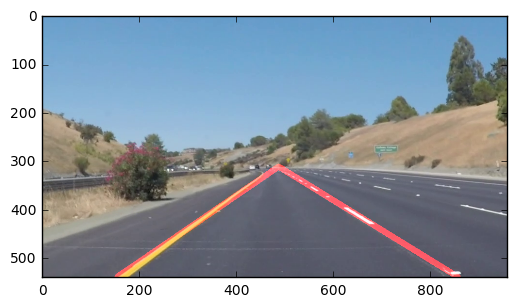

In [23]:
yellow_output = 'yellow.mp4'
clip2 = VideoFileClip('solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)

In [24]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))